# Importing Important Libraries

In [1]:
import pickle

In [2]:
## Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
## Importing important libraries
import shap
import xgboost as xgb
from catboost import Pool
import statsmodels.api as sm
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Reading Dataset

In [4]:
#Reading csv file
data = pd.read_csv('C:\\Users\\asus\\Downloads\\ML Projects\\DataCamp Case Study Submission\\careerhub-data-master\\BMW Used Car Sales\\bmw.csv')
data.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0

In [5]:
#Check Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


# About the Dataset

#### BMW Used Car Sales


Contains information for price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size.

#### Dependent Variable

- <b>price</b> : The price of the vehicle
    

#### Independent Variable

- <b>model</b> : Model of the car
- <b>year</b> : Year of manufacture of the car
- <b>tax</b> : 
- <b>fuelType</b> : Fuel Type  (Diesel, Petrol, Hybrid, Electric)
- <b>mpg</b> : MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel
- <b>engineSize</b> : Engine Size of the car
- <b>transmission</b> : Transmission type of car (Automatic, Semi-Automatic, Manual)
- <b>mileage</b> : Distance travelled


# Exploratory Data Analysis

<AxesSubplot:>

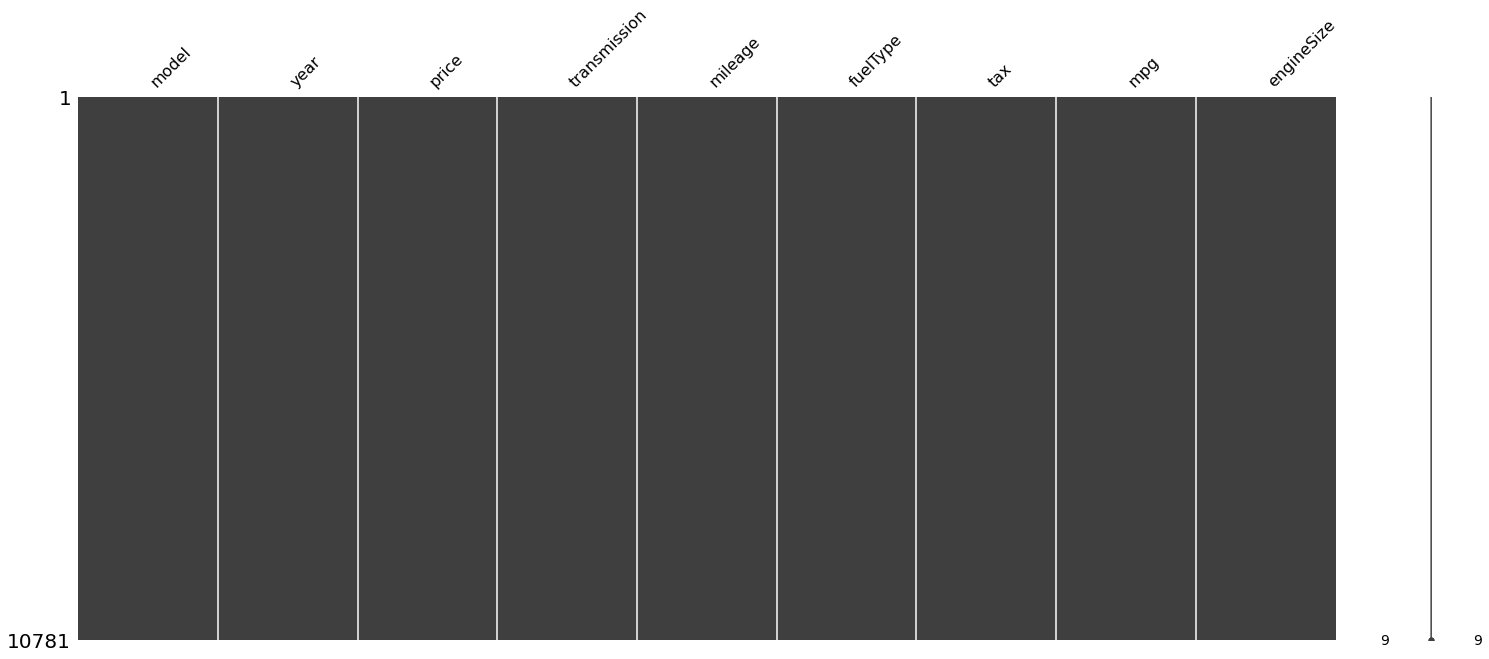

In [6]:
##Check for missing values
msno.matrix(data)

In [7]:
##Check for missing values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### Lets count uniques values in each column

In [8]:
unique_cnt = list(map(lambda x: len(data[x].unique()), list(data)))
print('Unique counts in each column:')
dict(zip(list(data),unique_cnt))

Unique counts in each column:


{'model': 24,
 'year': 25,
 'price': 3777,
 'transmission': 3,
 'mileage': 8086,
 'fuelType': 5,
 'tax': 38,
 'mpg': 102,
 'engineSize': 17}

In [9]:
##Number of Unique models of car
print(data['model'].nunique())

24


In [10]:
##Number of Unique models of car
print(data['model'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         5 Series
1         6 Series
2         5 Series
3         1 Series
4         7 Series
           ...    
10776           X3
10777     5 Series
10778     3 Series
10779     1 Series
10780           X1
Name: model, Length: 10781, dtype: object>


In [11]:
##Number of Unique transmission types of car
data['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [12]:
##Different fuel types of car
data['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [13]:
# ##Pairplot of the data
# sns.pairplot(data)

In [14]:
##Creating a list of categorical and numerical values

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

cat_columns = ['model','transmission','fuelType']

## EDA & VISUALIZATION

Before working with any kind of data it is important to understand them. A crucial step to this aim is the Exploratory data analysis (EDA): a combination of visualizations and statistical analysis (uni, bi, and multivariate) that helps us to better understand the data we are working with and to gain insight into their relationships. So, let's explore our target variable and how the other features influence it.

In [15]:
##Importing scipy's norm function
from scipy.stats import norm

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


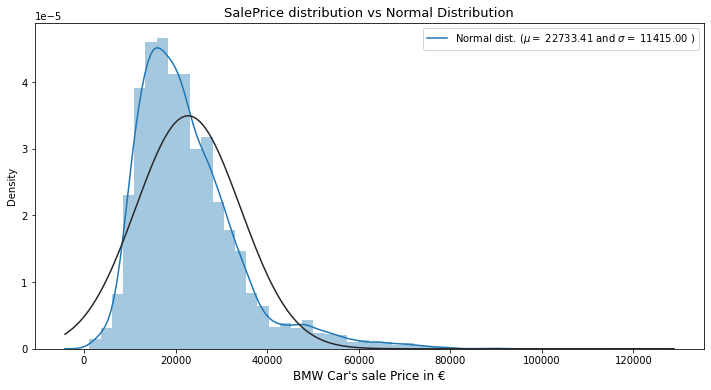

In [16]:
(mu, sigma) = norm.fit(data['price'])

plt.figure(figsize = (12,6))
sns.distplot(data['price'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("BMW Car's sale Price in €", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()


## Check the Skewness and Kurtosis

In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we'll deal with that later in the notebook.

In [17]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data['price'])

print("Skewness: %f" % abs(data['price']).skew())
print("Kurtosis: %f" % abs(data['price']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.586886
Kurtosis: 4.021488
Shapiro_Test: 0.890123
Shapiro_Test: 0.000000


p-value may not be accurate for N > 5000.


## Correlation Matrix

The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable.

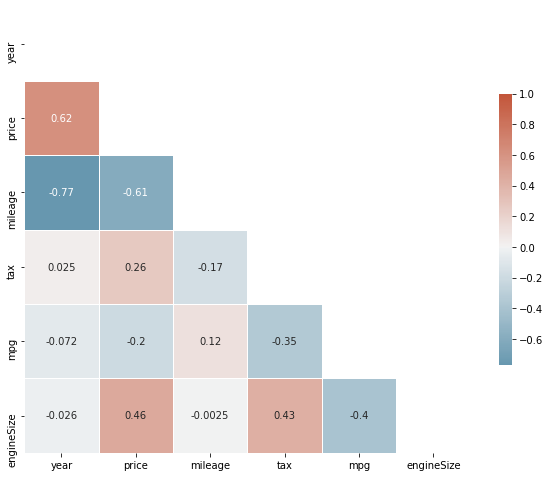

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Now that we know which features correlates most with our target variable we can investigate them more in depth.

## Bi-Variate Analysis

### Analysis 1 : Price v/s Year - [Pearson = 0.62]

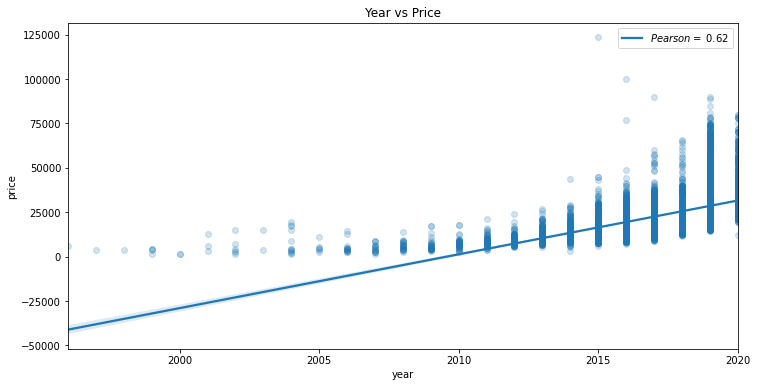

In [19]:
Pearson_PriceYear = 0.62
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'year', y='price', scatter_kws={'alpha':0.2})
plt.title('Year vs Price', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_PriceYear)], loc = 'best')
plt.show()

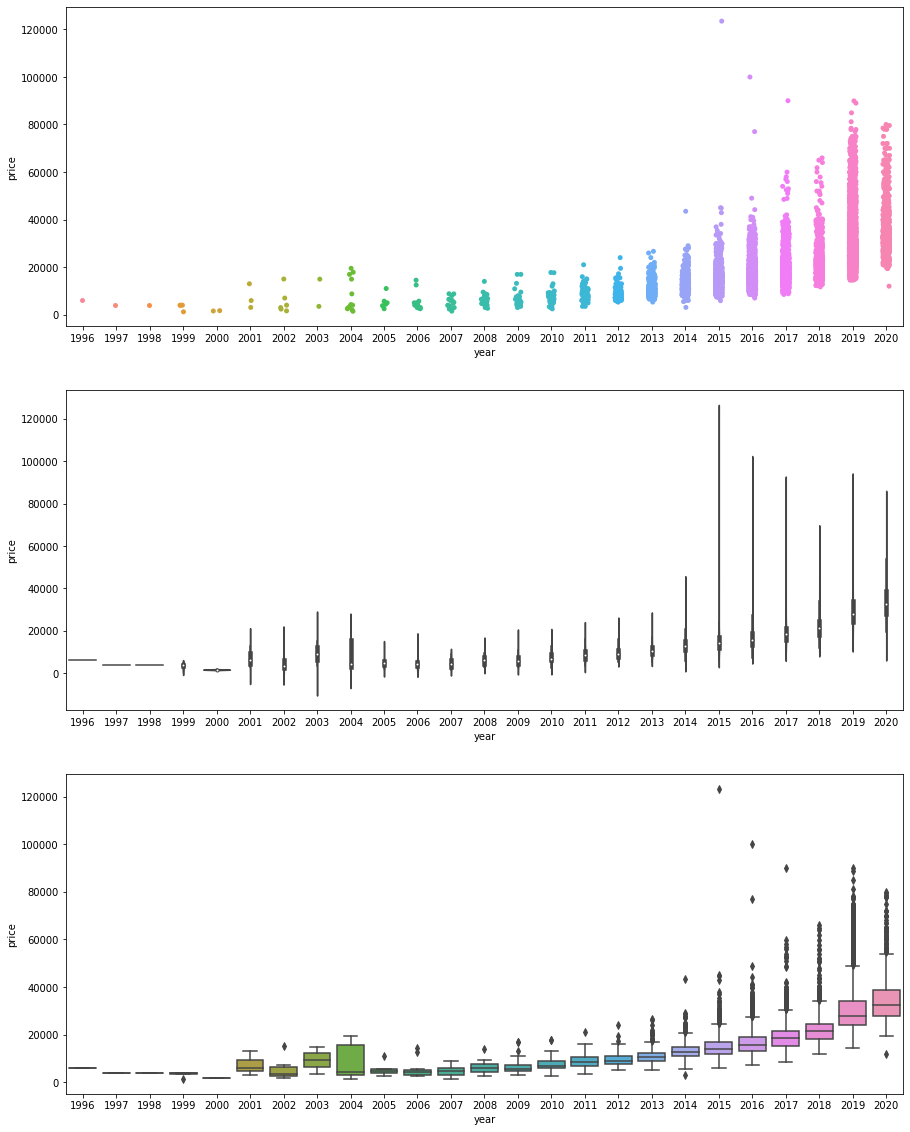

In [20]:
figure, ax = plt.subplots(3,1, figsize = (15,20))

sns.stripplot(data=data, x = 'year', y='price', ax=ax[0])

sns.violinplot(data=data, x = 'year', y='price', ax=ax[1])

sns.boxplot(data=data, x = 'year', y='price', ax=ax[2])


plt.show()

### Analysis 2 : Price v/s engineSize - [Pearson = 0.46]

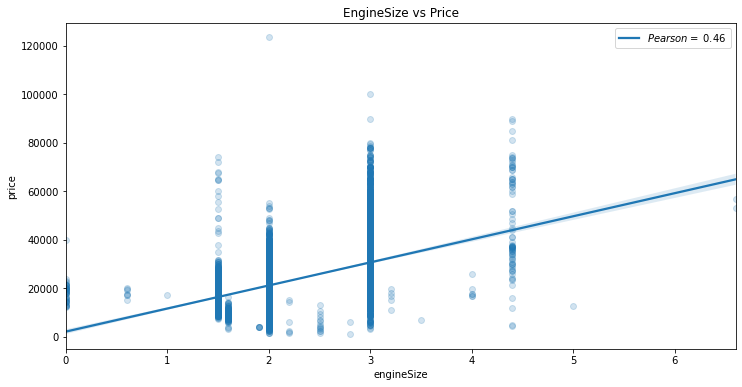

In [21]:
Pearson_Price_EngineSize = 0.46
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'engineSize', y='price', scatter_kws={'alpha':0.2})
plt.title('EngineSize vs Price', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_Price_EngineSize)], loc = 'best')
plt.show()

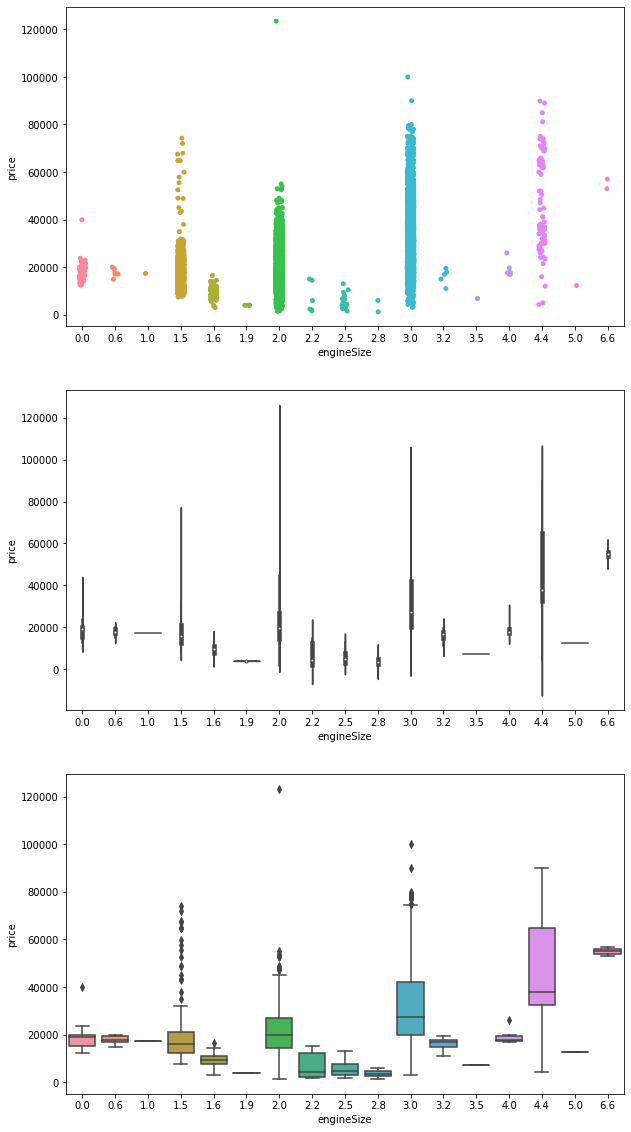

In [22]:
figure, ax = plt.subplots(3,1, figsize = (10,20))

sns.stripplot(data=data, x = 'engineSize', y='price', ax=ax[0])

sns.violinplot(data=data, x = 'engineSize', y='price', ax=ax[1])

sns.boxplot(data=data, x = 'engineSize', y='price', ax=ax[2])

plt.show()

### Analysis 3 : Price v/s mileage - [Pearson = -0.61]

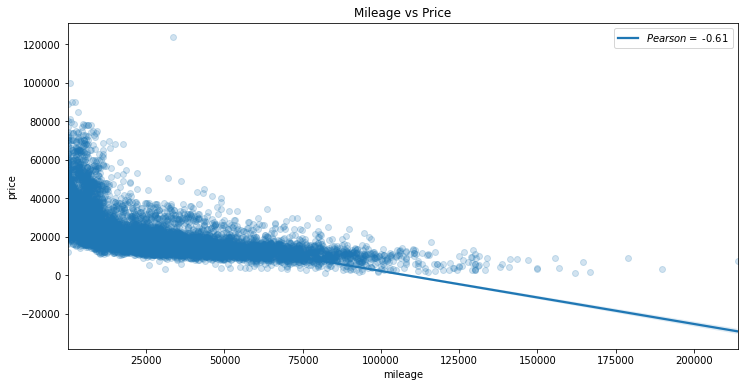

In [24]:
Pearson_PrMil = -0.61
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'mileage', y='price', scatter_kws={'alpha':0.2})
plt.title('Mileage vs Price', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_PrMil)], loc = 'best')
plt.show()

## Median Values of Sales Price by Year

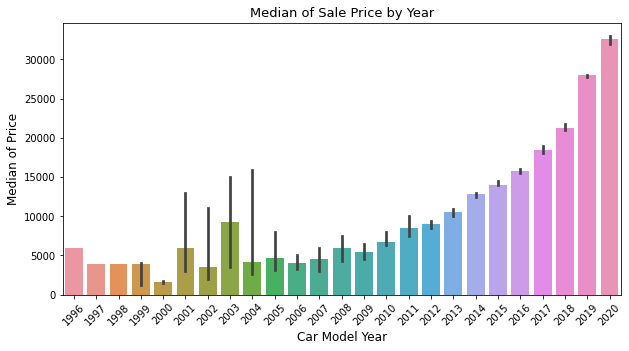

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x='year', y = 'price', data = data, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Car Model Year', fontsize = 12)
plt.ylabel('Median of Price', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


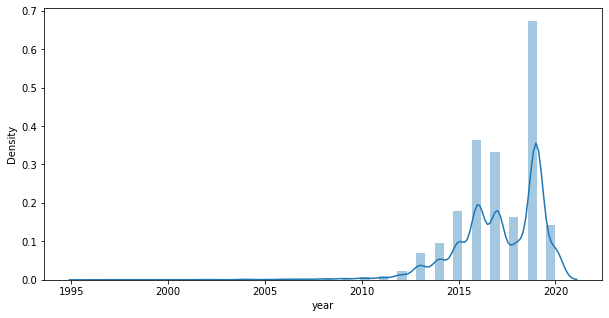

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


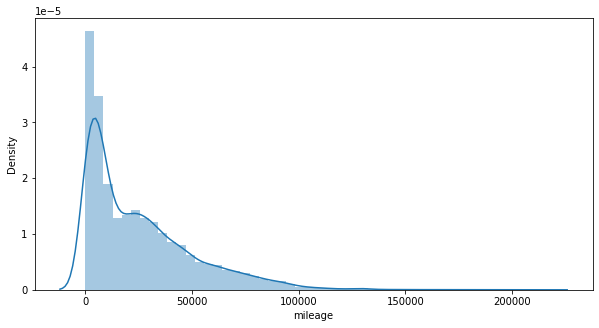

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


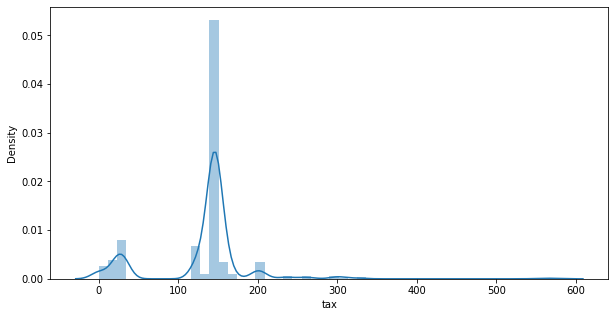

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


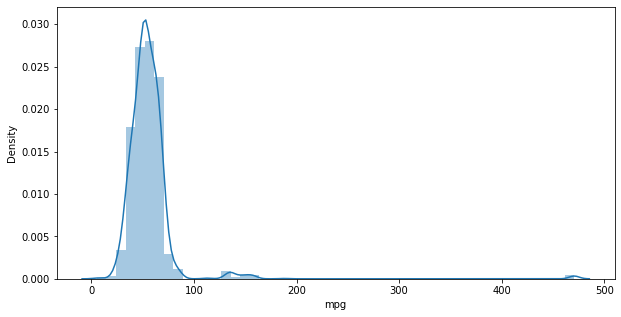

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


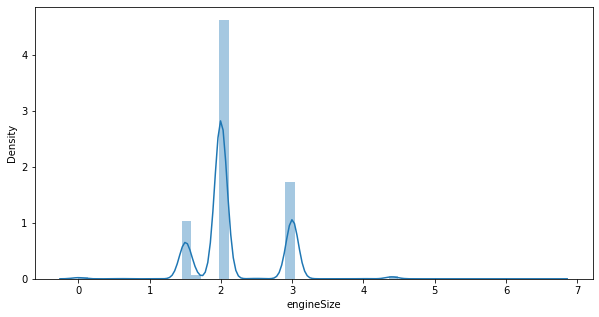

In [26]:
for i in num_columns: 
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    sns.distplot(data[i])
    plt.show()

## Categorical Variables Transformation

In [27]:
data.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0

In [28]:
data = pd.get_dummies(data, columns = cat_columns)

In [29]:
data.head()

year  price  mileage  tax   mpg  engineSize  model_ 1 Series  \
0  2014  11200    67068  125  57.6         2.0                0   
1  2018  27000    14827  145  42.8         2.0                0   
2  2016  16000    62794  160  51.4         3.0                0   
3  2017  12750    26676  145  72.4         1.5                1   
4  2014  14500    39554  160  50.4         3.0                0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  ...  model_ i3  \
0                0                0                0  ...          0   
1                0                0                0  ...          0   
2                0                0                0  ...          0   
3                0                0                0  ...          0   
4                0                0                0  ...          0   

   model_ i8  transmission_Automatic  transmission_Manual  \
0          0                       1                    0   
1          0                       1                    0   
2          0                       1                    0   
3          0                       1                    0   
4          0                       1                    0   

   transmission_Semi-Auto  fuelType_Diesel  fuelType_Electric  \
0                       0                1                  0   
1                       0                0                  0   
2                       0                1                  0   
3                       0                1                  0   
4                       0                1                  0   

   fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                0               0                0  
1                0               0                1  
2                0               0                0  
3                0               0                0  
4                0               0                0  

[5 rows x 38 columns]

In [30]:
data.shape

(10781, 38)

## Feature-Target Variable Split

In [31]:
X = data.drop(['price'], axis = 1)
y = data['price']

print("Shape of features", X.shape)
print("Shape of Labels", y.shape)

Shape of features (10781, 37)
Shape of Labels (10781,)


In [32]:
data_columns = list(X.columns)

## Feature Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(X), columns =data_columns)

In [34]:
X.head()

year   mileage       tax       mpg  engineSize  model_ 1 Series  \
0  0.750000  0.313399  0.215517  0.111971    0.303030              0.0   
1  0.916667  0.069281  0.250000  0.080163    0.303030              0.0   
2  0.833333  0.293427  0.275862  0.098646    0.454545              0.0   
3  0.875000  0.124650  0.250000  0.143778    0.227273              1.0   
4  0.750000  0.184828  0.275862  0.096497    0.454545              0.0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  \
0              0.0              0.0              0.0              1.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0              0.0              0.0              1.0  ...   
3              0.0              0.0              0.0              0.0  ...   
4              0.0              0.0              0.0              0.0  ...   

   model_ i3  model_ i8  transmission_Automatic  transmission_Manual  \
0        0.0        0.0                     1.0                  0.0   
1        0.0        0.0                     1.0                  0.0   
2        0.0        0.0                     1.0                  0.0   
3        0.0        0.0                     1.0                  0.0   
4        0.0        0.0                     1.0                  0.0   

   transmission_Semi-Auto  fuelType_Diesel  fuelType_Electric  \
0                     0.0              1.0                0.0   
1                     0.0              0.0                0.0   
2                     0.0              1.0                0.0   
3                     0.0              1.0                0.0   
4                     0.0              1.0                0.0   

   fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0              0.0             0.0              0.0  
1              0.0             0.0              1.0  
2              0.0             0.0              0.0  
3              0.0             0.0              0.0  
4              0.0             0.0              0.0  

[5 rows x 37 columns]

## Price before transformation

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


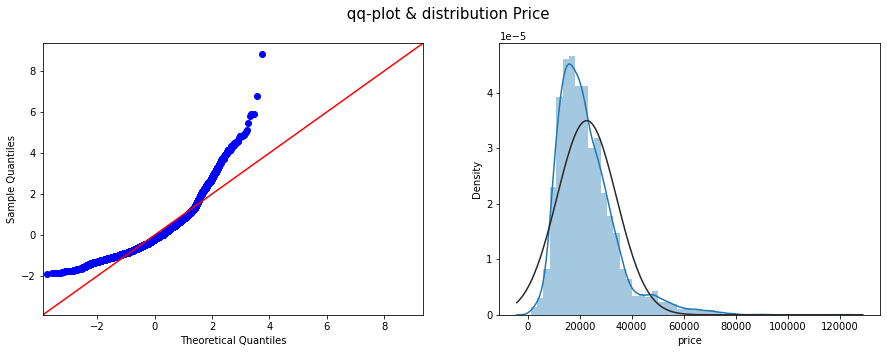

In [35]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution Price ", fontsize= 15)

sm.qqplot(y, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(y, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

## Price after transformation

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


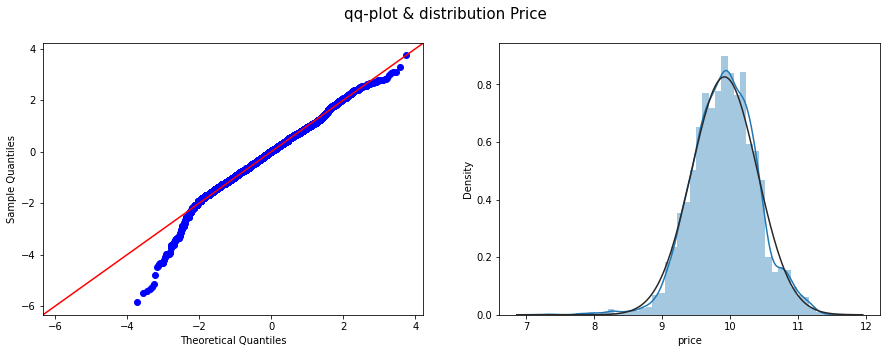

In [36]:
target_log = np.log1p(y)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution Price ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

## Train-Test Variable Split

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,target_log,test_size = 0.3,random_state=42)

## Modelling

In [38]:
# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [39]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

Learning rate set to 0.054889
0:	learn: 0.4643801	total: 155ms	remaining: 2m 35s
1:	learn: 0.4452837	total: 160ms	remaining: 1m 19s
2:	learn: 0.4282255	total: 163ms	remaining: 54.3s
3:	learn: 0.4123583	total: 168ms	remaining: 41.8s
4:	learn: 0.3969488	total: 173ms	remaining: 34.4s
5:	learn: 0.3820955	total: 176ms	remaining: 29.1s
6:	learn: 0.3679105	total: 179ms	remaining: 25.4s
7:	learn: 0.3554230	total: 181ms	remaining: 22.5s
8:	learn: 0.3430130	total: 184ms	remaining: 20.3s
9:	learn: 0.3311169	total: 187ms	remaining: 18.6s
10:	learn: 0.3193445	total: 190ms	remaining: 17.1s
11:	learn: 0.3088600	total: 193ms	remaining: 15.9s
12:	learn: 0.2988827	total: 196ms	remaining: 14.9s
13:	learn: 0.2896352	total: 200ms	remaining: 14.1s
14:	learn: 0.2801759	total: 203ms	remaining: 13.3s
15:	learn: 0.2722146	total: 209ms	remaining: 12.8s
16:	learn: 0.2641824	total: 215ms	remaining: 12.4s
17:	learn: 0.2566070	total: 221ms	remaining: 12.1s
18:	learn: 0.2497721	total: 228ms	remaining: 11.8s
19:	learn

177:	learn: 0.1052123	total: 875ms	remaining: 4.04s
178:	learn: 0.1050779	total: 879ms	remaining: 4.03s
179:	learn: 0.1049666	total: 883ms	remaining: 4.02s
180:	learn: 0.1048319	total: 887ms	remaining: 4.01s
181:	learn: 0.1047059	total: 890ms	remaining: 4s
182:	learn: 0.1046143	total: 893ms	remaining: 3.99s
183:	learn: 0.1043965	total: 897ms	remaining: 3.98s
184:	learn: 0.1042041	total: 900ms	remaining: 3.96s
185:	learn: 0.1040568	total: 904ms	remaining: 3.96s
186:	learn: 0.1039027	total: 907ms	remaining: 3.94s
187:	learn: 0.1037630	total: 913ms	remaining: 3.94s
188:	learn: 0.1036926	total: 916ms	remaining: 3.93s
189:	learn: 0.1035816	total: 920ms	remaining: 3.92s
190:	learn: 0.1035159	total: 923ms	remaining: 3.91s
191:	learn: 0.1032965	total: 929ms	remaining: 3.91s
192:	learn: 0.1031683	total: 936ms	remaining: 3.91s
193:	learn: 0.1030625	total: 941ms	remaining: 3.91s
194:	learn: 0.1028871	total: 945ms	remaining: 3.9s
195:	learn: 0.1027980	total: 949ms	remaining: 3.89s
196:	learn: 0.10

339:	learn: 0.0918353	total: 1.58s	remaining: 3.07s
340:	learn: 0.0917669	total: 1.59s	remaining: 3.07s
341:	learn: 0.0917131	total: 1.59s	remaining: 3.06s
342:	learn: 0.0916648	total: 1.59s	remaining: 3.06s
343:	learn: 0.0916376	total: 1.6s	remaining: 3.05s
344:	learn: 0.0915894	total: 1.6s	remaining: 3.04s
345:	learn: 0.0914996	total: 1.61s	remaining: 3.04s
346:	learn: 0.0914378	total: 1.61s	remaining: 3.03s
347:	learn: 0.0914156	total: 1.61s	remaining: 3.02s
348:	learn: 0.0913839	total: 1.62s	remaining: 3.02s
349:	learn: 0.0913583	total: 1.62s	remaining: 3.01s
350:	learn: 0.0913317	total: 1.63s	remaining: 3.01s
351:	learn: 0.0913146	total: 1.63s	remaining: 3s
352:	learn: 0.0912494	total: 1.64s	remaining: 3s
353:	learn: 0.0911950	total: 1.64s	remaining: 2.99s
354:	learn: 0.0910952	total: 1.65s	remaining: 2.99s
355:	learn: 0.0910204	total: 1.65s	remaining: 2.99s
356:	learn: 0.0909814	total: 1.66s	remaining: 2.98s
357:	learn: 0.0909255	total: 1.66s	remaining: 2.98s
358:	learn: 0.090873

511:	learn: 0.0853722	total: 2.28s	remaining: 2.18s
512:	learn: 0.0853348	total: 2.29s	remaining: 2.17s
513:	learn: 0.0853197	total: 2.29s	remaining: 2.17s
514:	learn: 0.0852936	total: 2.3s	remaining: 2.16s
515:	learn: 0.0852790	total: 2.3s	remaining: 2.16s
516:	learn: 0.0852382	total: 2.3s	remaining: 2.15s
517:	learn: 0.0852074	total: 2.31s	remaining: 2.15s
518:	learn: 0.0851886	total: 2.31s	remaining: 2.14s
519:	learn: 0.0851552	total: 2.31s	remaining: 2.14s
520:	learn: 0.0851405	total: 2.32s	remaining: 2.13s
521:	learn: 0.0851006	total: 2.32s	remaining: 2.13s
522:	learn: 0.0850798	total: 2.33s	remaining: 2.12s
523:	learn: 0.0850295	total: 2.33s	remaining: 2.12s
524:	learn: 0.0850048	total: 2.34s	remaining: 2.11s
525:	learn: 0.0849295	total: 2.34s	remaining: 2.11s
526:	learn: 0.0849024	total: 2.35s	remaining: 2.1s
527:	learn: 0.0848848	total: 2.35s	remaining: 2.1s
528:	learn: 0.0848501	total: 2.35s	remaining: 2.09s
529:	learn: 0.0848261	total: 2.35s	remaining: 2.09s
530:	learn: 0.084

684:	learn: 0.0811458	total: 2.99s	remaining: 1.38s
685:	learn: 0.0810996	total: 3s	remaining: 1.37s
686:	learn: 0.0810887	total: 3s	remaining: 1.37s
687:	learn: 0.0810844	total: 3s	remaining: 1.36s
688:	learn: 0.0810692	total: 3.01s	remaining: 1.36s
689:	learn: 0.0810584	total: 3.01s	remaining: 1.35s
690:	learn: 0.0810364	total: 3.01s	remaining: 1.35s
691:	learn: 0.0810190	total: 3.01s	remaining: 1.34s
692:	learn: 0.0810044	total: 3.02s	remaining: 1.34s
693:	learn: 0.0809722	total: 3.02s	remaining: 1.33s
694:	learn: 0.0809654	total: 3.02s	remaining: 1.33s
695:	learn: 0.0809467	total: 3.03s	remaining: 1.32s
696:	learn: 0.0809332	total: 3.03s	remaining: 1.32s
697:	learn: 0.0808796	total: 3.04s	remaining: 1.31s
698:	learn: 0.0808755	total: 3.04s	remaining: 1.31s
699:	learn: 0.0808559	total: 3.04s	remaining: 1.3s
700:	learn: 0.0808446	total: 3.05s	remaining: 1.3s
701:	learn: 0.0808275	total: 3.05s	remaining: 1.3s
702:	learn: 0.0808200	total: 3.06s	remaining: 1.29s
703:	learn: 0.0808136	to

857:	learn: 0.0775375	total: 3.7s	remaining: 612ms
858:	learn: 0.0775312	total: 3.7s	remaining: 607ms
859:	learn: 0.0775211	total: 3.7s	remaining: 603ms
860:	learn: 0.0774890	total: 3.71s	remaining: 599ms
861:	learn: 0.0774632	total: 3.71s	remaining: 594ms
862:	learn: 0.0774466	total: 3.71s	remaining: 590ms
863:	learn: 0.0774236	total: 3.72s	remaining: 585ms
864:	learn: 0.0773911	total: 3.72s	remaining: 581ms
865:	learn: 0.0773657	total: 3.73s	remaining: 577ms
866:	learn: 0.0773568	total: 3.73s	remaining: 573ms
867:	learn: 0.0773443	total: 3.74s	remaining: 568ms
868:	learn: 0.0773418	total: 3.74s	remaining: 564ms
869:	learn: 0.0773063	total: 3.74s	remaining: 559ms
870:	learn: 0.0772919	total: 3.75s	remaining: 555ms
871:	learn: 0.0772703	total: 3.75s	remaining: 551ms
872:	learn: 0.0772591	total: 3.76s	remaining: 547ms
873:	learn: 0.0772383	total: 3.76s	remaining: 543ms
874:	learn: 0.0772166	total: 3.77s	remaining: 538ms
875:	learn: 0.0771915	total: 3.77s	remaining: 534ms
876:	learn: 0.0

45:	learn: 0.1566178	total: 217ms	remaining: 4.5s
46:	learn: 0.1549528	total: 220ms	remaining: 4.46s
47:	learn: 0.1532284	total: 222ms	remaining: 4.41s
48:	learn: 0.1516657	total: 225ms	remaining: 4.37s
49:	learn: 0.1500688	total: 228ms	remaining: 4.33s
50:	learn: 0.1486538	total: 230ms	remaining: 4.29s
51:	learn: 0.1473938	total: 233ms	remaining: 4.25s
52:	learn: 0.1462122	total: 236ms	remaining: 4.22s
53:	learn: 0.1451062	total: 239ms	remaining: 4.19s
54:	learn: 0.1439733	total: 245ms	remaining: 4.21s
55:	learn: 0.1428534	total: 250ms	remaining: 4.21s
56:	learn: 0.1419053	total: 255ms	remaining: 4.21s
57:	learn: 0.1409711	total: 260ms	remaining: 4.23s
58:	learn: 0.1399410	total: 266ms	remaining: 4.23s
59:	learn: 0.1389851	total: 270ms	remaining: 4.22s
60:	learn: 0.1381335	total: 274ms	remaining: 4.21s
61:	learn: 0.1373057	total: 277ms	remaining: 4.19s
62:	learn: 0.1364568	total: 280ms	remaining: 4.17s
63:	learn: 0.1357273	total: 284ms	remaining: 4.15s
64:	learn: 0.1350033	total: 289m

217:	learn: 0.1002082	total: 923ms	remaining: 3.31s
218:	learn: 0.1001376	total: 927ms	remaining: 3.31s
219:	learn: 0.1000282	total: 931ms	remaining: 3.3s
220:	learn: 0.0999252	total: 934ms	remaining: 3.29s
221:	learn: 0.0998275	total: 937ms	remaining: 3.28s
222:	learn: 0.0997201	total: 940ms	remaining: 3.27s
223:	learn: 0.0995853	total: 943ms	remaining: 3.27s
224:	learn: 0.0994744	total: 946ms	remaining: 3.26s
225:	learn: 0.0993977	total: 949ms	remaining: 3.25s
226:	learn: 0.0993199	total: 952ms	remaining: 3.24s
227:	learn: 0.0992343	total: 954ms	remaining: 3.23s
228:	learn: 0.0991362	total: 958ms	remaining: 3.22s
229:	learn: 0.0990384	total: 963ms	remaining: 3.22s
230:	learn: 0.0989962	total: 968ms	remaining: 3.22s
231:	learn: 0.0989200	total: 973ms	remaining: 3.22s
232:	learn: 0.0988430	total: 978ms	remaining: 3.22s
233:	learn: 0.0987031	total: 982ms	remaining: 3.21s
234:	learn: 0.0986027	total: 985ms	remaining: 3.21s
235:	learn: 0.0984677	total: 988ms	remaining: 3.2s
236:	learn: 0.

391:	learn: 0.0893066	total: 1.64s	remaining: 2.54s
392:	learn: 0.0892553	total: 1.64s	remaining: 2.54s
393:	learn: 0.0892408	total: 1.64s	remaining: 2.53s
394:	learn: 0.0892017	total: 1.65s	remaining: 2.52s
395:	learn: 0.0891783	total: 1.65s	remaining: 2.52s
396:	learn: 0.0890763	total: 1.65s	remaining: 2.51s
397:	learn: 0.0889918	total: 1.66s	remaining: 2.51s
398:	learn: 0.0889516	total: 1.66s	remaining: 2.5s
399:	learn: 0.0889106	total: 1.67s	remaining: 2.5s
400:	learn: 0.0888921	total: 1.67s	remaining: 2.5s
401:	learn: 0.0888839	total: 1.68s	remaining: 2.49s
402:	learn: 0.0888329	total: 1.68s	remaining: 2.49s
403:	learn: 0.0887459	total: 1.69s	remaining: 2.49s
404:	learn: 0.0886482	total: 1.69s	remaining: 2.49s
405:	learn: 0.0885922	total: 1.7s	remaining: 2.48s
406:	learn: 0.0885287	total: 1.7s	remaining: 2.48s
407:	learn: 0.0884746	total: 1.7s	remaining: 2.47s
408:	learn: 0.0884354	total: 1.71s	remaining: 2.47s
409:	learn: 0.0884128	total: 1.71s	remaining: 2.46s
410:	learn: 0.0883

560:	learn: 0.0828831	total: 2.36s	remaining: 1.85s
561:	learn: 0.0828542	total: 2.36s	remaining: 1.84s
562:	learn: 0.0827951	total: 2.37s	remaining: 1.84s
563:	learn: 0.0827580	total: 2.37s	remaining: 1.83s
564:	learn: 0.0827377	total: 2.38s	remaining: 1.83s
565:	learn: 0.0827242	total: 2.38s	remaining: 1.82s
566:	learn: 0.0827068	total: 2.38s	remaining: 1.82s
567:	learn: 0.0827014	total: 2.39s	remaining: 1.81s
568:	learn: 0.0826734	total: 2.39s	remaining: 1.81s
569:	learn: 0.0826452	total: 2.39s	remaining: 1.81s
570:	learn: 0.0826037	total: 2.4s	remaining: 1.8s
571:	learn: 0.0825658	total: 2.4s	remaining: 1.8s
572:	learn: 0.0825586	total: 2.4s	remaining: 1.79s
573:	learn: 0.0825159	total: 2.41s	remaining: 1.79s
574:	learn: 0.0824339	total: 2.41s	remaining: 1.78s
575:	learn: 0.0824164	total: 2.42s	remaining: 1.78s
576:	learn: 0.0823877	total: 2.42s	remaining: 1.78s
577:	learn: 0.0823579	total: 2.43s	remaining: 1.77s
578:	learn: 0.0823522	total: 2.43s	remaining: 1.77s
579:	learn: 0.082

723:	learn: 0.0786880	total: 3.06s	remaining: 1.17s
724:	learn: 0.0786222	total: 3.07s	remaining: 1.16s
725:	learn: 0.0785979	total: 3.07s	remaining: 1.16s
726:	learn: 0.0785745	total: 3.07s	remaining: 1.15s
727:	learn: 0.0785628	total: 3.08s	remaining: 1.15s
728:	learn: 0.0785561	total: 3.08s	remaining: 1.14s
729:	learn: 0.0785241	total: 3.08s	remaining: 1.14s
730:	learn: 0.0785059	total: 3.08s	remaining: 1.13s
731:	learn: 0.0784950	total: 3.09s	remaining: 1.13s
732:	learn: 0.0784844	total: 3.09s	remaining: 1.13s
733:	learn: 0.0784636	total: 3.1s	remaining: 1.12s
734:	learn: 0.0784411	total: 3.1s	remaining: 1.12s
735:	learn: 0.0784257	total: 3.11s	remaining: 1.11s
736:	learn: 0.0784104	total: 3.11s	remaining: 1.11s
737:	learn: 0.0784030	total: 3.11s	remaining: 1.1s
738:	learn: 0.0783899	total: 3.12s	remaining: 1.1s
739:	learn: 0.0783686	total: 3.12s	remaining: 1.1s
740:	learn: 0.0783407	total: 3.13s	remaining: 1.09s
741:	learn: 0.0782991	total: 3.13s	remaining: 1.09s
742:	learn: 0.078

895:	learn: 0.0753871	total: 3.77s	remaining: 438ms
896:	learn: 0.0753418	total: 3.77s	remaining: 433ms
897:	learn: 0.0752963	total: 3.78s	remaining: 429ms
898:	learn: 0.0752769	total: 3.78s	remaining: 425ms
899:	learn: 0.0752649	total: 3.79s	remaining: 421ms
900:	learn: 0.0752303	total: 3.79s	remaining: 416ms
901:	learn: 0.0752169	total: 3.79s	remaining: 412ms
902:	learn: 0.0752164	total: 3.8s	remaining: 408ms
903:	learn: 0.0752025	total: 3.8s	remaining: 404ms
904:	learn: 0.0751884	total: 3.81s	remaining: 399ms
905:	learn: 0.0751658	total: 3.81s	remaining: 395ms
906:	learn: 0.0751520	total: 3.81s	remaining: 391ms
907:	learn: 0.0751388	total: 3.82s	remaining: 387ms
908:	learn: 0.0751178	total: 3.82s	remaining: 383ms
909:	learn: 0.0751131	total: 3.83s	remaining: 378ms
910:	learn: 0.0751022	total: 3.83s	remaining: 374ms
911:	learn: 0.0750778	total: 3.83s	remaining: 370ms
912:	learn: 0.0750545	total: 3.83s	remaining: 365ms
913:	learn: 0.0750353	total: 3.84s	remaining: 361ms
914:	learn: 0.

81:	learn: 0.1223812	total: 365ms	remaining: 4.08s
82:	learn: 0.1219420	total: 368ms	remaining: 4.06s
83:	learn: 0.1215878	total: 371ms	remaining: 4.04s
84:	learn: 0.1211846	total: 374ms	remaining: 4.02s
85:	learn: 0.1208741	total: 376ms	remaining: 4s
86:	learn: 0.1204556	total: 379ms	remaining: 3.97s
87:	learn: 0.1200543	total: 381ms	remaining: 3.95s
88:	learn: 0.1196942	total: 384ms	remaining: 3.93s
89:	learn: 0.1194314	total: 388ms	remaining: 3.92s
90:	learn: 0.1189964	total: 390ms	remaining: 3.9s
91:	learn: 0.1187061	total: 393ms	remaining: 3.88s
92:	learn: 0.1184553	total: 396ms	remaining: 3.86s
93:	learn: 0.1182629	total: 402ms	remaining: 3.88s
94:	learn: 0.1180353	total: 407ms	remaining: 3.88s
95:	learn: 0.1177069	total: 411ms	remaining: 3.87s
96:	learn: 0.1174226	total: 415ms	remaining: 3.86s
97:	learn: 0.1168793	total: 419ms	remaining: 3.86s
98:	learn: 0.1166144	total: 423ms	remaining: 3.85s
99:	learn: 0.1163192	total: 426ms	remaining: 3.83s
100:	learn: 0.1160723	total: 431ms	

257:	learn: 0.0943058	total: 1.07s	remaining: 3.08s
258:	learn: 0.0942986	total: 1.08s	remaining: 3.08s
259:	learn: 0.0942914	total: 1.08s	remaining: 3.07s
260:	learn: 0.0941760	total: 1.08s	remaining: 3.07s
261:	learn: 0.0941090	total: 1.09s	remaining: 3.06s
262:	learn: 0.0940121	total: 1.09s	remaining: 3.06s
263:	learn: 0.0939524	total: 1.09s	remaining: 3.05s
264:	learn: 0.0938815	total: 1.1s	remaining: 3.04s
265:	learn: 0.0937792	total: 1.1s	remaining: 3.04s
266:	learn: 0.0936290	total: 1.1s	remaining: 3.04s
267:	learn: 0.0935893	total: 1.11s	remaining: 3.03s
268:	learn: 0.0935415	total: 1.11s	remaining: 3.02s
269:	learn: 0.0934824	total: 1.11s	remaining: 3.01s
270:	learn: 0.0934295	total: 1.12s	remaining: 3.01s
271:	learn: 0.0933744	total: 1.12s	remaining: 3s
272:	learn: 0.0932871	total: 1.12s	remaining: 2.99s
273:	learn: 0.0931904	total: 1.14s	remaining: 3.01s
274:	learn: 0.0931044	total: 1.15s	remaining: 3.02s
275:	learn: 0.0929781	total: 1.17s	remaining: 3.07s
276:	learn: 0.0928

416:	learn: 0.0855842	total: 1.77s	remaining: 2.48s
417:	learn: 0.0855337	total: 1.78s	remaining: 2.48s
418:	learn: 0.0855096	total: 1.78s	remaining: 2.47s
419:	learn: 0.0854717	total: 1.78s	remaining: 2.46s
420:	learn: 0.0854501	total: 1.79s	remaining: 2.46s
421:	learn: 0.0853942	total: 1.79s	remaining: 2.46s
422:	learn: 0.0853544	total: 1.79s	remaining: 2.45s
423:	learn: 0.0853518	total: 1.8s	remaining: 2.45s
424:	learn: 0.0853056	total: 1.81s	remaining: 2.44s
425:	learn: 0.0852406	total: 1.81s	remaining: 2.44s
426:	learn: 0.0852071	total: 1.81s	remaining: 2.44s
427:	learn: 0.0851580	total: 1.82s	remaining: 2.43s
428:	learn: 0.0851044	total: 1.82s	remaining: 2.43s
429:	learn: 0.0850745	total: 1.83s	remaining: 2.42s
430:	learn: 0.0850368	total: 1.83s	remaining: 2.42s
431:	learn: 0.0849974	total: 1.83s	remaining: 2.41s
432:	learn: 0.0849718	total: 1.84s	remaining: 2.41s
433:	learn: 0.0849415	total: 1.84s	remaining: 2.4s
434:	learn: 0.0849228	total: 1.85s	remaining: 2.4s
435:	learn: 0.0

584:	learn: 0.0802976	total: 2.48s	remaining: 1.76s
585:	learn: 0.0802729	total: 2.49s	remaining: 1.76s
586:	learn: 0.0802559	total: 2.49s	remaining: 1.75s
587:	learn: 0.0802171	total: 2.49s	remaining: 1.75s
588:	learn: 0.0801961	total: 2.5s	remaining: 1.74s
589:	learn: 0.0801716	total: 2.5s	remaining: 1.74s
590:	learn: 0.0801428	total: 2.5s	remaining: 1.73s
591:	learn: 0.0801225	total: 2.5s	remaining: 1.73s
592:	learn: 0.0800813	total: 2.51s	remaining: 1.72s
593:	learn: 0.0800632	total: 2.51s	remaining: 1.72s
594:	learn: 0.0800247	total: 2.51s	remaining: 1.71s
595:	learn: 0.0800044	total: 2.52s	remaining: 1.71s
596:	learn: 0.0799800	total: 2.52s	remaining: 1.7s
597:	learn: 0.0799460	total: 2.53s	remaining: 1.7s
598:	learn: 0.0799264	total: 2.53s	remaining: 1.7s
599:	learn: 0.0798805	total: 2.54s	remaining: 1.69s
600:	learn: 0.0798505	total: 2.54s	remaining: 1.69s
601:	learn: 0.0798153	total: 2.54s	remaining: 1.68s
602:	learn: 0.0797864	total: 2.55s	remaining: 1.68s
603:	learn: 0.07976

755:	learn: 0.0768235	total: 3.19s	remaining: 1.03s
756:	learn: 0.0768001	total: 3.19s	remaining: 1.02s
757:	learn: 0.0767890	total: 3.2s	remaining: 1.02s
758:	learn: 0.0767686	total: 3.2s	remaining: 1.01s
759:	learn: 0.0767518	total: 3.2s	remaining: 1.01s
760:	learn: 0.0767347	total: 3.2s	remaining: 1.01s
761:	learn: 0.0767175	total: 3.21s	remaining: 1s
762:	learn: 0.0767055	total: 3.21s	remaining: 997ms
763:	learn: 0.0766894	total: 3.21s	remaining: 993ms
764:	learn: 0.0766750	total: 3.22s	remaining: 988ms
765:	learn: 0.0766744	total: 3.22s	remaining: 984ms
766:	learn: 0.0766448	total: 3.22s	remaining: 979ms
767:	learn: 0.0766061	total: 3.23s	remaining: 974ms
768:	learn: 0.0765795	total: 3.23s	remaining: 970ms
769:	learn: 0.0765549	total: 3.23s	remaining: 966ms
770:	learn: 0.0765177	total: 3.24s	remaining: 961ms
771:	learn: 0.0764734	total: 3.24s	remaining: 957ms
772:	learn: 0.0764341	total: 3.24s	remaining: 953ms
773:	learn: 0.0764126	total: 3.25s	remaining: 948ms
774:	learn: 0.07639

926:	learn: 0.0740174	total: 3.89s	remaining: 307ms
927:	learn: 0.0739928	total: 3.9s	remaining: 302ms
928:	learn: 0.0739771	total: 3.9s	remaining: 298ms
929:	learn: 0.0739708	total: 3.9s	remaining: 294ms
930:	learn: 0.0739609	total: 3.9s	remaining: 289ms
931:	learn: 0.0739493	total: 3.91s	remaining: 285ms
932:	learn: 0.0739487	total: 3.91s	remaining: 281ms
933:	learn: 0.0739197	total: 3.91s	remaining: 277ms
934:	learn: 0.0739063	total: 3.92s	remaining: 272ms
935:	learn: 0.0738855	total: 3.92s	remaining: 268ms
936:	learn: 0.0738725	total: 3.92s	remaining: 264ms
937:	learn: 0.0738575	total: 3.93s	remaining: 260ms
938:	learn: 0.0738420	total: 3.93s	remaining: 256ms
939:	learn: 0.0738334	total: 3.94s	remaining: 251ms
940:	learn: 0.0738203	total: 3.94s	remaining: 247ms
941:	learn: 0.0738164	total: 3.95s	remaining: 243ms
942:	learn: 0.0738162	total: 3.95s	remaining: 239ms
943:	learn: 0.0738008	total: 3.96s	remaining: 235ms
944:	learn: 0.0737836	total: 3.96s	remaining: 231ms
945:	learn: 0.07

123:	learn: 0.1148993	total: 541ms	remaining: 3.82s
124:	learn: 0.1146409	total: 544ms	remaining: 3.81s
125:	learn: 0.1143927	total: 549ms	remaining: 3.81s
126:	learn: 0.1142519	total: 552ms	remaining: 3.8s
127:	learn: 0.1140576	total: 556ms	remaining: 3.79s
128:	learn: 0.1139149	total: 559ms	remaining: 3.77s
129:	learn: 0.1138010	total: 563ms	remaining: 3.77s
130:	learn: 0.1134783	total: 567ms	remaining: 3.76s
131:	learn: 0.1133060	total: 571ms	remaining: 3.75s
132:	learn: 0.1130244	total: 577ms	remaining: 3.76s
133:	learn: 0.1127981	total: 582ms	remaining: 3.76s
134:	learn: 0.1126807	total: 585ms	remaining: 3.75s
135:	learn: 0.1124674	total: 589ms	remaining: 3.74s
136:	learn: 0.1122629	total: 593ms	remaining: 3.73s
137:	learn: 0.1120744	total: 597ms	remaining: 3.73s
138:	learn: 0.1118984	total: 600ms	remaining: 3.72s
139:	learn: 0.1116282	total: 606ms	remaining: 3.72s
140:	learn: 0.1114723	total: 612ms	remaining: 3.73s
141:	learn: 0.1113691	total: 616ms	remaining: 3.72s
142:	learn: 0

316:	learn: 0.0936237	total: 1.44s	remaining: 3.1s
317:	learn: 0.0935746	total: 1.44s	remaining: 3.1s
318:	learn: 0.0935338	total: 1.45s	remaining: 3.09s
319:	learn: 0.0935063	total: 1.45s	remaining: 3.09s
320:	learn: 0.0934768	total: 1.46s	remaining: 3.08s
321:	learn: 0.0934224	total: 1.46s	remaining: 3.08s
322:	learn: 0.0933598	total: 1.47s	remaining: 3.07s
323:	learn: 0.0932532	total: 1.47s	remaining: 3.07s
324:	learn: 0.0932196	total: 1.48s	remaining: 3.07s
325:	learn: 0.0931961	total: 1.48s	remaining: 3.06s
326:	learn: 0.0931409	total: 1.49s	remaining: 3.06s
327:	learn: 0.0930820	total: 1.49s	remaining: 3.06s
328:	learn: 0.0930091	total: 1.5s	remaining: 3.05s
329:	learn: 0.0929750	total: 1.5s	remaining: 3.05s
330:	learn: 0.0929093	total: 1.5s	remaining: 3.04s
331:	learn: 0.0927969	total: 1.51s	remaining: 3.04s
332:	learn: 0.0926761	total: 1.52s	remaining: 3.04s
333:	learn: 0.0926426	total: 1.52s	remaining: 3.03s
334:	learn: 0.0925984	total: 1.52s	remaining: 3.03s
335:	learn: 0.092

493:	learn: 0.0864046	total: 2.32s	remaining: 2.38s
494:	learn: 0.0863879	total: 2.33s	remaining: 2.38s
495:	learn: 0.0863601	total: 2.33s	remaining: 2.37s
496:	learn: 0.0862645	total: 2.34s	remaining: 2.37s
497:	learn: 0.0862462	total: 2.34s	remaining: 2.36s
498:	learn: 0.0862237	total: 2.35s	remaining: 2.36s
499:	learn: 0.0861965	total: 2.35s	remaining: 2.35s
500:	learn: 0.0861791	total: 2.36s	remaining: 2.35s
501:	learn: 0.0861506	total: 2.36s	remaining: 2.35s
502:	learn: 0.0861281	total: 2.37s	remaining: 2.34s
503:	learn: 0.0860844	total: 2.37s	remaining: 2.33s
504:	learn: 0.0860508	total: 2.38s	remaining: 2.33s
505:	learn: 0.0860071	total: 2.38s	remaining: 2.33s
506:	learn: 0.0859868	total: 2.39s	remaining: 2.32s
507:	learn: 0.0859582	total: 2.39s	remaining: 2.32s
508:	learn: 0.0859382	total: 2.4s	remaining: 2.31s
509:	learn: 0.0859086	total: 2.4s	remaining: 2.31s
510:	learn: 0.0858694	total: 2.41s	remaining: 2.3s
511:	learn: 0.0858512	total: 2.41s	remaining: 2.3s
512:	learn: 0.08

669:	learn: 0.0813472	total: 3.21s	remaining: 1.58s
670:	learn: 0.0813457	total: 3.21s	remaining: 1.57s
671:	learn: 0.0812626	total: 3.22s	remaining: 1.57s
672:	learn: 0.0812599	total: 3.22s	remaining: 1.56s
673:	learn: 0.0812442	total: 3.23s	remaining: 1.56s
674:	learn: 0.0812302	total: 3.23s	remaining: 1.55s
675:	learn: 0.0812229	total: 3.24s	remaining: 1.55s
676:	learn: 0.0811957	total: 3.24s	remaining: 1.55s
677:	learn: 0.0811782	total: 3.25s	remaining: 1.54s
678:	learn: 0.0811660	total: 3.25s	remaining: 1.54s
679:	learn: 0.0811518	total: 3.26s	remaining: 1.53s
680:	learn: 0.0811354	total: 3.26s	remaining: 1.53s
681:	learn: 0.0810994	total: 3.27s	remaining: 1.52s
682:	learn: 0.0810237	total: 3.27s	remaining: 1.52s
683:	learn: 0.0809981	total: 3.28s	remaining: 1.51s
684:	learn: 0.0809829	total: 3.28s	remaining: 1.51s
685:	learn: 0.0809724	total: 3.29s	remaining: 1.5s
686:	learn: 0.0809610	total: 3.29s	remaining: 1.5s
687:	learn: 0.0809585	total: 3.3s	remaining: 1.5s
688:	learn: 0.08

844:	learn: 0.0773788	total: 4.09s	remaining: 750ms
845:	learn: 0.0773671	total: 4.09s	remaining: 745ms
846:	learn: 0.0773437	total: 4.1s	remaining: 741ms
847:	learn: 0.0773058	total: 4.1s	remaining: 736ms
848:	learn: 0.0772708	total: 4.11s	remaining: 731ms
849:	learn: 0.0772523	total: 4.11s	remaining: 726ms
850:	learn: 0.0772397	total: 4.12s	remaining: 721ms
851:	learn: 0.0772294	total: 4.12s	remaining: 716ms
852:	learn: 0.0772121	total: 4.13s	remaining: 712ms
853:	learn: 0.0772007	total: 4.13s	remaining: 707ms
854:	learn: 0.0771863	total: 4.14s	remaining: 702ms
855:	learn: 0.0771567	total: 4.14s	remaining: 697ms
856:	learn: 0.0771482	total: 4.15s	remaining: 692ms
857:	learn: 0.0771243	total: 4.15s	remaining: 687ms
858:	learn: 0.0771086	total: 4.16s	remaining: 683ms
859:	learn: 0.0770913	total: 4.16s	remaining: 678ms
860:	learn: 0.0770684	total: 4.17s	remaining: 673ms
861:	learn: 0.0770499	total: 4.17s	remaining: 668ms
862:	learn: 0.0770252	total: 4.18s	remaining: 663ms
863:	learn: 0.

3:	learn: 0.4123877	total: 28.7ms	remaining: 7.14s
4:	learn: 0.3970206	total: 36.4ms	remaining: 7.25s
5:	learn: 0.3821547	total: 42.7ms	remaining: 7.08s
6:	learn: 0.3676314	total: 49.8ms	remaining: 7.06s
7:	learn: 0.3546563	total: 54.9ms	remaining: 6.81s
8:	learn: 0.3424227	total: 60.2ms	remaining: 6.63s
9:	learn: 0.3306567	total: 65.6ms	remaining: 6.49s
10:	learn: 0.3189543	total: 70.5ms	remaining: 6.34s
11:	learn: 0.3089730	total: 75.3ms	remaining: 6.2s
12:	learn: 0.2992192	total: 80.7ms	remaining: 6.13s
13:	learn: 0.2901802	total: 85.6ms	remaining: 6.03s
14:	learn: 0.2809789	total: 90.5ms	remaining: 5.94s
15:	learn: 0.2729867	total: 95.6ms	remaining: 5.88s
16:	learn: 0.2649805	total: 101ms	remaining: 5.84s
17:	learn: 0.2573681	total: 106ms	remaining: 5.77s
18:	learn: 0.2501025	total: 110ms	remaining: 5.7s
19:	learn: 0.2440528	total: 115ms	remaining: 5.65s
20:	learn: 0.2373331	total: 120ms	remaining: 5.59s
21:	learn: 0.2309240	total: 125ms	remaining: 5.54s
22:	learn: 0.2254674	total:

176:	learn: 0.1049200	total: 909ms	remaining: 4.23s
177:	learn: 0.1047563	total: 914ms	remaining: 4.22s
178:	learn: 0.1046039	total: 919ms	remaining: 4.21s
179:	learn: 0.1044640	total: 924ms	remaining: 4.21s
180:	learn: 0.1043607	total: 929ms	remaining: 4.2s
181:	learn: 0.1041723	total: 934ms	remaining: 4.2s
182:	learn: 0.1040298	total: 938ms	remaining: 4.19s
183:	learn: 0.1039079	total: 944ms	remaining: 4.18s
184:	learn: 0.1037597	total: 949ms	remaining: 4.18s
185:	learn: 0.1036274	total: 954ms	remaining: 4.17s
186:	learn: 0.1035310	total: 959ms	remaining: 4.17s
187:	learn: 0.1034207	total: 964ms	remaining: 4.17s
188:	learn: 0.1032938	total: 970ms	remaining: 4.16s
189:	learn: 0.1031315	total: 975ms	remaining: 4.16s
190:	learn: 0.1030508	total: 980ms	remaining: 4.15s
191:	learn: 0.1029507	total: 985ms	remaining: 4.14s
192:	learn: 0.1027682	total: 991ms	remaining: 4.14s
193:	learn: 0.1026809	total: 996ms	remaining: 4.14s
194:	learn: 0.1024338	total: 1s	remaining: 4.13s
195:	learn: 0.102

350:	learn: 0.0909157	total: 1.79s	remaining: 3.31s
351:	learn: 0.0908963	total: 1.79s	remaining: 3.3s
352:	learn: 0.0908688	total: 1.8s	remaining: 3.29s
353:	learn: 0.0908540	total: 1.8s	remaining: 3.29s
354:	learn: 0.0908445	total: 1.81s	remaining: 3.28s
355:	learn: 0.0908020	total: 1.81s	remaining: 3.28s
356:	learn: 0.0907367	total: 1.82s	remaining: 3.27s
357:	learn: 0.0906555	total: 1.82s	remaining: 3.27s
358:	learn: 0.0905862	total: 1.83s	remaining: 3.26s
359:	learn: 0.0905778	total: 1.83s	remaining: 3.26s
360:	learn: 0.0905515	total: 1.84s	remaining: 3.25s
361:	learn: 0.0904921	total: 1.84s	remaining: 3.25s
362:	learn: 0.0904498	total: 1.85s	remaining: 3.24s
363:	learn: 0.0903779	total: 1.85s	remaining: 3.23s
364:	learn: 0.0903691	total: 1.86s	remaining: 3.23s
365:	learn: 0.0903606	total: 1.86s	remaining: 3.22s
366:	learn: 0.0903359	total: 1.87s	remaining: 3.22s
367:	learn: 0.0902884	total: 1.87s	remaining: 3.21s
368:	learn: 0.0902705	total: 1.88s	remaining: 3.21s
369:	learn: 0.0

520:	learn: 0.0848652	total: 2.67s	remaining: 2.46s
521:	learn: 0.0848343	total: 2.67s	remaining: 2.45s
522:	learn: 0.0848322	total: 2.68s	remaining: 2.44s
523:	learn: 0.0848234	total: 2.69s	remaining: 2.44s
524:	learn: 0.0848053	total: 2.69s	remaining: 2.43s
525:	learn: 0.0847975	total: 2.69s	remaining: 2.43s
526:	learn: 0.0847854	total: 2.7s	remaining: 2.42s
527:	learn: 0.0847716	total: 2.71s	remaining: 2.42s
528:	learn: 0.0847504	total: 2.71s	remaining: 2.41s
529:	learn: 0.0846540	total: 2.71s	remaining: 2.41s
530:	learn: 0.0846058	total: 2.72s	remaining: 2.4s
531:	learn: 0.0845810	total: 2.72s	remaining: 2.4s
532:	learn: 0.0844787	total: 2.73s	remaining: 2.39s
533:	learn: 0.0844671	total: 2.73s	remaining: 2.39s
534:	learn: 0.0844590	total: 2.74s	remaining: 2.38s
535:	learn: 0.0844549	total: 2.74s	remaining: 2.38s
536:	learn: 0.0844405	total: 2.75s	remaining: 2.37s
537:	learn: 0.0844056	total: 2.75s	remaining: 2.36s
538:	learn: 0.0843761	total: 2.76s	remaining: 2.36s
539:	learn: 0.0

699:	learn: 0.0802372	total: 3.56s	remaining: 1.52s
700:	learn: 0.0802085	total: 3.56s	remaining: 1.52s
701:	learn: 0.0801874	total: 3.57s	remaining: 1.51s
702:	learn: 0.0801517	total: 3.57s	remaining: 1.51s
703:	learn: 0.0801395	total: 3.58s	remaining: 1.5s
704:	learn: 0.0801142	total: 3.58s	remaining: 1.5s
705:	learn: 0.0800877	total: 3.59s	remaining: 1.49s
706:	learn: 0.0800704	total: 3.59s	remaining: 1.49s
707:	learn: 0.0799848	total: 3.6s	remaining: 1.48s
708:	learn: 0.0799709	total: 3.6s	remaining: 1.48s
709:	learn: 0.0799314	total: 3.61s	remaining: 1.47s
710:	learn: 0.0799176	total: 3.61s	remaining: 1.47s
711:	learn: 0.0799069	total: 3.62s	remaining: 1.46s
712:	learn: 0.0798915	total: 3.62s	remaining: 1.46s
713:	learn: 0.0798704	total: 3.63s	remaining: 1.45s
714:	learn: 0.0798625	total: 3.63s	remaining: 1.45s
715:	learn: 0.0798494	total: 3.63s	remaining: 1.44s
716:	learn: 0.0798152	total: 3.64s	remaining: 1.44s
717:	learn: 0.0798126	total: 3.64s	remaining: 1.43s
718:	learn: 0.07

874:	learn: 0.0766713	total: 4.43s	remaining: 633ms
875:	learn: 0.0766504	total: 4.44s	remaining: 628ms
876:	learn: 0.0766272	total: 4.44s	remaining: 623ms
877:	learn: 0.0766260	total: 4.45s	remaining: 618ms
878:	learn: 0.0766143	total: 4.45s	remaining: 613ms
879:	learn: 0.0765879	total: 4.46s	remaining: 608ms
880:	learn: 0.0765709	total: 4.46s	remaining: 603ms
881:	learn: 0.0765474	total: 4.47s	remaining: 598ms
882:	learn: 0.0764843	total: 4.47s	remaining: 593ms
883:	learn: 0.0764699	total: 4.48s	remaining: 588ms
884:	learn: 0.0764532	total: 4.48s	remaining: 582ms
885:	learn: 0.0764478	total: 4.49s	remaining: 577ms
886:	learn: 0.0764237	total: 4.49s	remaining: 572ms
887:	learn: 0.0764119	total: 4.5s	remaining: 567ms
888:	learn: 0.0763846	total: 4.5s	remaining: 562ms
889:	learn: 0.0763647	total: 4.51s	remaining: 557ms
890:	learn: 0.0763436	total: 4.51s	remaining: 552ms
891:	learn: 0.0763262	total: 4.52s	remaining: 547ms
892:	learn: 0.0763120	total: 4.52s	remaining: 542ms
893:	learn: 0.

33:	learn: 0.1820725	total: 189ms	remaining: 5.37s
34:	learn: 0.1792242	total: 193ms	remaining: 5.33s
35:	learn: 0.1769687	total: 199ms	remaining: 5.32s
36:	learn: 0.1743365	total: 203ms	remaining: 5.29s
37:	learn: 0.1719403	total: 208ms	remaining: 5.26s
38:	learn: 0.1694905	total: 212ms	remaining: 5.22s
39:	learn: 0.1675253	total: 217ms	remaining: 5.21s
40:	learn: 0.1655669	total: 221ms	remaining: 5.18s
41:	learn: 0.1636680	total: 226ms	remaining: 5.15s
42:	learn: 0.1618090	total: 230ms	remaining: 5.13s
43:	learn: 0.1600594	total: 235ms	remaining: 5.09s
44:	learn: 0.1583862	total: 240ms	remaining: 5.09s
45:	learn: 0.1568862	total: 246ms	remaining: 5.11s
46:	learn: 0.1553653	total: 251ms	remaining: 5.09s
47:	learn: 0.1535959	total: 255ms	remaining: 5.07s
48:	learn: 0.1519828	total: 260ms	remaining: 5.04s
49:	learn: 0.1507584	total: 265ms	remaining: 5.03s
50:	learn: 0.1496188	total: 269ms	remaining: 5.01s
51:	learn: 0.1485489	total: 274ms	remaining: 4.99s
52:	learn: 0.1473990	total: 279

213:	learn: 0.1013226	total: 1.07s	remaining: 3.92s
214:	learn: 0.1012056	total: 1.07s	remaining: 3.91s
215:	learn: 0.1011159	total: 1.08s	remaining: 3.91s
216:	learn: 0.1010501	total: 1.08s	remaining: 3.9s
217:	learn: 0.1009799	total: 1.09s	remaining: 3.9s
218:	learn: 0.1007868	total: 1.09s	remaining: 3.89s
219:	learn: 0.1006867	total: 1.1s	remaining: 3.89s
220:	learn: 0.1006131	total: 1.1s	remaining: 3.88s
221:	learn: 0.1004732	total: 1.11s	remaining: 3.88s
222:	learn: 0.1003717	total: 1.11s	remaining: 3.87s
223:	learn: 0.1003004	total: 1.12s	remaining: 3.87s
224:	learn: 0.1002007	total: 1.12s	remaining: 3.86s
225:	learn: 0.1001432	total: 1.13s	remaining: 3.86s
226:	learn: 0.1000655	total: 1.13s	remaining: 3.85s
227:	learn: 0.1000008	total: 1.14s	remaining: 3.85s
228:	learn: 0.0998331	total: 1.14s	remaining: 3.84s
229:	learn: 0.0997042	total: 1.15s	remaining: 3.84s
230:	learn: 0.0995678	total: 1.15s	remaining: 3.83s
231:	learn: 0.0993681	total: 1.16s	remaining: 3.83s
232:	learn: 0.09

391:	learn: 0.0899369	total: 1.95s	remaining: 3.03s
392:	learn: 0.0899164	total: 1.97s	remaining: 3.04s
393:	learn: 0.0899098	total: 1.97s	remaining: 3.03s
394:	learn: 0.0898519	total: 1.98s	remaining: 3.03s
395:	learn: 0.0897814	total: 1.98s	remaining: 3.02s
396:	learn: 0.0897413	total: 1.99s	remaining: 3.02s
397:	learn: 0.0896951	total: 1.99s	remaining: 3.01s
398:	learn: 0.0896888	total: 1.99s	remaining: 3s
399:	learn: 0.0896810	total: 2s	remaining: 3s
400:	learn: 0.0896341	total: 2s	remaining: 2.99s
401:	learn: 0.0896119	total: 2.01s	remaining: 2.99s
402:	learn: 0.0895900	total: 2.01s	remaining: 2.98s
403:	learn: 0.0895696	total: 2.02s	remaining: 2.98s
404:	learn: 0.0894774	total: 2.02s	remaining: 2.97s
405:	learn: 0.0894196	total: 2.03s	remaining: 2.97s
406:	learn: 0.0893940	total: 2.03s	remaining: 2.96s
407:	learn: 0.0893704	total: 2.04s	remaining: 2.95s
408:	learn: 0.0893113	total: 2.04s	remaining: 2.95s
409:	learn: 0.0893061	total: 2.04s	remaining: 2.94s
410:	learn: 0.0892982	to

568:	learn: 0.0839878	total: 2.83s	remaining: 2.15s
569:	learn: 0.0839742	total: 2.84s	remaining: 2.14s
570:	learn: 0.0839697	total: 2.84s	remaining: 2.13s
571:	learn: 0.0839422	total: 2.85s	remaining: 2.13s
572:	learn: 0.0839241	total: 2.85s	remaining: 2.12s
573:	learn: 0.0839115	total: 2.85s	remaining: 2.12s
574:	learn: 0.0838788	total: 2.87s	remaining: 2.12s
575:	learn: 0.0838740	total: 2.87s	remaining: 2.11s
576:	learn: 0.0838468	total: 2.87s	remaining: 2.11s
577:	learn: 0.0838075	total: 2.88s	remaining: 2.1s
578:	learn: 0.0837853	total: 2.88s	remaining: 2.1s
579:	learn: 0.0837654	total: 2.89s	remaining: 2.09s
580:	learn: 0.0837397	total: 2.89s	remaining: 2.09s
581:	learn: 0.0837144	total: 2.9s	remaining: 2.08s
582:	learn: 0.0836935	total: 2.9s	remaining: 2.08s
583:	learn: 0.0836677	total: 2.91s	remaining: 2.07s
584:	learn: 0.0836386	total: 2.91s	remaining: 2.07s
585:	learn: 0.0836089	total: 2.92s	remaining: 2.06s
586:	learn: 0.0835763	total: 2.92s	remaining: 2.06s
587:	learn: 0.08

743:	learn: 0.0800430	total: 3.71s	remaining: 1.28s
744:	learn: 0.0800089	total: 3.72s	remaining: 1.27s
745:	learn: 0.0799807	total: 3.73s	remaining: 1.27s
746:	learn: 0.0799468	total: 3.73s	remaining: 1.26s
747:	learn: 0.0799324	total: 3.74s	remaining: 1.26s
748:	learn: 0.0799068	total: 3.74s	remaining: 1.25s
749:	learn: 0.0798920	total: 3.75s	remaining: 1.25s
750:	learn: 0.0798723	total: 3.75s	remaining: 1.24s
751:	learn: 0.0798463	total: 3.76s	remaining: 1.24s
752:	learn: 0.0798348	total: 3.76s	remaining: 1.23s
753:	learn: 0.0798343	total: 3.77s	remaining: 1.23s
754:	learn: 0.0797385	total: 3.77s	remaining: 1.22s
755:	learn: 0.0797378	total: 3.78s	remaining: 1.22s
756:	learn: 0.0797269	total: 3.78s	remaining: 1.21s
757:	learn: 0.0797118	total: 3.79s	remaining: 1.21s
758:	learn: 0.0796975	total: 3.79s	remaining: 1.2s
759:	learn: 0.0796905	total: 3.8s	remaining: 1.2s
760:	learn: 0.0796721	total: 3.8s	remaining: 1.19s
761:	learn: 0.0796636	total: 3.81s	remaining: 1.19s
762:	learn: 0.07

920:	learn: 0.0765102	total: 4.6s	remaining: 394ms
921:	learn: 0.0764277	total: 4.6s	remaining: 389ms
922:	learn: 0.0764163	total: 4.61s	remaining: 384ms
923:	learn: 0.0764091	total: 4.61s	remaining: 379ms
924:	learn: 0.0763863	total: 4.62s	remaining: 374ms
925:	learn: 0.0763600	total: 4.62s	remaining: 369ms
926:	learn: 0.0763496	total: 4.63s	remaining: 364ms
927:	learn: 0.0763431	total: 4.63s	remaining: 359ms
928:	learn: 0.0763260	total: 4.64s	remaining: 354ms
929:	learn: 0.0763156	total: 4.64s	remaining: 349ms
930:	learn: 0.0763044	total: 4.64s	remaining: 344ms
931:	learn: 0.0762907	total: 4.65s	remaining: 339ms
932:	learn: 0.0762811	total: 4.66s	remaining: 334ms
933:	learn: 0.0762807	total: 4.66s	remaining: 329ms
934:	learn: 0.0762649	total: 4.67s	remaining: 324ms
935:	learn: 0.0762558	total: 4.67s	remaining: 319ms
936:	learn: 0.0762351	total: 4.67s	remaining: 314ms
937:	learn: 0.0762207	total: 4.68s	remaining: 309ms
938:	learn: 0.0762004	total: 4.68s	remaining: 304ms
939:	learn: 0.

108:	learn: 0.1174046	total: 566ms	remaining: 4.62s
109:	learn: 0.1170074	total: 570ms	remaining: 4.61s
110:	learn: 0.1166372	total: 576ms	remaining: 4.61s
111:	learn: 0.1162849	total: 584ms	remaining: 4.63s
112:	learn: 0.1160753	total: 588ms	remaining: 4.62s
113:	learn: 0.1158595	total: 593ms	remaining: 4.61s
114:	learn: 0.1154669	total: 599ms	remaining: 4.61s
115:	learn: 0.1153004	total: 603ms	remaining: 4.6s
116:	learn: 0.1150849	total: 607ms	remaining: 4.58s
117:	learn: 0.1148887	total: 613ms	remaining: 4.58s
118:	learn: 0.1145745	total: 618ms	remaining: 4.57s
119:	learn: 0.1143508	total: 622ms	remaining: 4.56s
120:	learn: 0.1142128	total: 628ms	remaining: 4.56s
121:	learn: 0.1141027	total: 634ms	remaining: 4.56s
122:	learn: 0.1138501	total: 638ms	remaining: 4.55s
123:	learn: 0.1137156	total: 644ms	remaining: 4.55s
124:	learn: 0.1135331	total: 648ms	remaining: 4.54s
125:	learn: 0.1133187	total: 652ms	remaining: 4.53s
126:	learn: 0.1131324	total: 658ms	remaining: 4.52s
127:	learn: 0

284:	learn: 0.0949975	total: 1.45s	remaining: 3.64s
285:	learn: 0.0948880	total: 1.46s	remaining: 3.64s
286:	learn: 0.0948476	total: 1.46s	remaining: 3.63s
287:	learn: 0.0947573	total: 1.47s	remaining: 3.63s
288:	learn: 0.0947260	total: 1.47s	remaining: 3.62s
289:	learn: 0.0946859	total: 1.48s	remaining: 3.62s
290:	learn: 0.0945993	total: 1.48s	remaining: 3.62s
291:	learn: 0.0945512	total: 1.49s	remaining: 3.61s
292:	learn: 0.0945031	total: 1.49s	remaining: 3.61s
293:	learn: 0.0944030	total: 1.5s	remaining: 3.6s
294:	learn: 0.0943698	total: 1.5s	remaining: 3.6s
295:	learn: 0.0943187	total: 1.51s	remaining: 3.59s
296:	learn: 0.0942457	total: 1.51s	remaining: 3.58s
297:	learn: 0.0941401	total: 1.52s	remaining: 3.58s
298:	learn: 0.0940805	total: 1.52s	remaining: 3.58s
299:	learn: 0.0940372	total: 1.53s	remaining: 3.57s
300:	learn: 0.0940026	total: 1.53s	remaining: 3.56s
301:	learn: 0.0939637	total: 1.54s	remaining: 3.56s
302:	learn: 0.0939369	total: 1.54s	remaining: 3.55s
303:	learn: 0.09

458:	learn: 0.0873324	total: 2.33s	remaining: 2.75s
459:	learn: 0.0873099	total: 2.33s	remaining: 2.74s
460:	learn: 0.0872963	total: 2.34s	remaining: 2.73s
461:	learn: 0.0872743	total: 2.34s	remaining: 2.73s
462:	learn: 0.0872181	total: 2.35s	remaining: 2.73s
463:	learn: 0.0871873	total: 2.35s	remaining: 2.72s
464:	learn: 0.0871750	total: 2.36s	remaining: 2.71s
465:	learn: 0.0871511	total: 2.36s	remaining: 2.71s
466:	learn: 0.0871443	total: 2.37s	remaining: 2.7s
467:	learn: 0.0871345	total: 2.37s	remaining: 2.7s
468:	learn: 0.0870900	total: 2.38s	remaining: 2.69s
469:	learn: 0.0870708	total: 2.38s	remaining: 2.69s
470:	learn: 0.0870280	total: 2.39s	remaining: 2.68s
471:	learn: 0.0869984	total: 2.39s	remaining: 2.68s
472:	learn: 0.0869540	total: 2.4s	remaining: 2.67s
473:	learn: 0.0869455	total: 2.4s	remaining: 2.67s
474:	learn: 0.0868958	total: 2.42s	remaining: 2.67s
475:	learn: 0.0868690	total: 2.42s	remaining: 2.67s
476:	learn: 0.0868618	total: 2.43s	remaining: 2.66s
477:	learn: 0.08

633:	learn: 0.0826012	total: 3.21s	remaining: 1.85s
634:	learn: 0.0825857	total: 3.22s	remaining: 1.85s
635:	learn: 0.0825646	total: 3.22s	remaining: 1.84s
636:	learn: 0.0825511	total: 3.23s	remaining: 1.84s
637:	learn: 0.0825418	total: 3.23s	remaining: 1.83s
638:	learn: 0.0824762	total: 3.24s	remaining: 1.83s
639:	learn: 0.0824209	total: 3.24s	remaining: 1.82s
640:	learn: 0.0823958	total: 3.25s	remaining: 1.82s
641:	learn: 0.0823764	total: 3.25s	remaining: 1.81s
642:	learn: 0.0823606	total: 3.26s	remaining: 1.81s
643:	learn: 0.0823499	total: 3.26s	remaining: 1.8s
644:	learn: 0.0823308	total: 3.27s	remaining: 1.8s
645:	learn: 0.0823142	total: 3.27s	remaining: 1.79s
646:	learn: 0.0822975	total: 3.28s	remaining: 1.79s
647:	learn: 0.0822872	total: 3.28s	remaining: 1.78s
648:	learn: 0.0822692	total: 3.29s	remaining: 1.78s
649:	learn: 0.0822480	total: 3.29s	remaining: 1.77s
650:	learn: 0.0822380	total: 3.3s	remaining: 1.77s
651:	learn: 0.0822024	total: 3.3s	remaining: 1.76s
652:	learn: 0.08

805:	learn: 0.0787730	total: 4.09s	remaining: 986ms
806:	learn: 0.0787645	total: 4.1s	remaining: 980ms
807:	learn: 0.0787382	total: 4.11s	remaining: 976ms
808:	learn: 0.0787195	total: 4.11s	remaining: 970ms
809:	learn: 0.0787096	total: 4.12s	remaining: 965ms
810:	learn: 0.0786983	total: 4.12s	remaining: 960ms
811:	learn: 0.0786832	total: 4.12s	remaining: 955ms
812:	learn: 0.0786656	total: 4.13s	remaining: 950ms
813:	learn: 0.0786474	total: 4.13s	remaining: 945ms
814:	learn: 0.0786068	total: 4.14s	remaining: 940ms
815:	learn: 0.0786023	total: 4.14s	remaining: 935ms
816:	learn: 0.0785984	total: 4.15s	remaining: 930ms
817:	learn: 0.0785855	total: 4.16s	remaining: 925ms
818:	learn: 0.0785679	total: 4.16s	remaining: 919ms
819:	learn: 0.0785454	total: 4.17s	remaining: 914ms
820:	learn: 0.0785367	total: 4.17s	remaining: 909ms
821:	learn: 0.0785247	total: 4.17s	remaining: 904ms
822:	learn: 0.0785161	total: 4.18s	remaining: 899ms
823:	learn: 0.0784998	total: 4.18s	remaining: 894ms
824:	learn: 0

981:	learn: 0.0753957	total: 4.99s	remaining: 91.5ms
982:	learn: 0.0753849	total: 5s	remaining: 86.4ms
983:	learn: 0.0753724	total: 5s	remaining: 81.3ms
984:	learn: 0.0753551	total: 5.01s	remaining: 76.3ms
985:	learn: 0.0753450	total: 5.01s	remaining: 71.2ms
986:	learn: 0.0753377	total: 5.02s	remaining: 66.1ms
987:	learn: 0.0753276	total: 5.02s	remaining: 61ms
988:	learn: 0.0753027	total: 5.03s	remaining: 55.9ms
989:	learn: 0.0752864	total: 5.03s	remaining: 50.8ms
990:	learn: 0.0752696	total: 5.04s	remaining: 45.8ms
991:	learn: 0.0752631	total: 5.04s	remaining: 40.7ms
992:	learn: 0.0752460	total: 5.05s	remaining: 35.6ms
993:	learn: 0.0752375	total: 5.05s	remaining: 30.5ms
994:	learn: 0.0752311	total: 5.06s	remaining: 25.4ms
995:	learn: 0.0752175	total: 5.06s	remaining: 20.3ms
996:	learn: 0.0752117	total: 5.07s	remaining: 15.3ms
997:	learn: 0.0752003	total: 5.07s	remaining: 10.2ms
998:	learn: 0.0751920	total: 5.08s	remaining: 5.08ms
999:	learn: 0.0751856	total: 5.08s	remaining: 0us
Lear

174:	learn: 0.1054719	total: 896ms	remaining: 4.22s
175:	learn: 0.1052752	total: 901ms	remaining: 4.22s
176:	learn: 0.1051799	total: 906ms	remaining: 4.21s
177:	learn: 0.1050438	total: 912ms	remaining: 4.21s
178:	learn: 0.1048791	total: 916ms	remaining: 4.2s
179:	learn: 0.1047517	total: 921ms	remaining: 4.2s
180:	learn: 0.1046099	total: 927ms	remaining: 4.19s
181:	learn: 0.1044863	total: 932ms	remaining: 4.19s
182:	learn: 0.1043132	total: 936ms	remaining: 4.18s
183:	learn: 0.1041201	total: 942ms	remaining: 4.18s
184:	learn: 0.1039598	total: 947ms	remaining: 4.17s
185:	learn: 0.1038039	total: 953ms	remaining: 4.17s
186:	learn: 0.1037222	total: 958ms	remaining: 4.17s
187:	learn: 0.1036001	total: 963ms	remaining: 4.16s
188:	learn: 0.1034837	total: 968ms	remaining: 4.15s
189:	learn: 0.1033775	total: 973ms	remaining: 4.15s
190:	learn: 0.1032845	total: 978ms	remaining: 4.14s
191:	learn: 0.1031702	total: 983ms	remaining: 4.13s
192:	learn: 0.1030568	total: 989ms	remaining: 4.13s
193:	learn: 0.

350:	learn: 0.0917835	total: 1.78s	remaining: 3.29s
351:	learn: 0.0917410	total: 1.78s	remaining: 3.28s
352:	learn: 0.0917342	total: 1.79s	remaining: 3.28s
353:	learn: 0.0916652	total: 1.79s	remaining: 3.27s
354:	learn: 0.0916113	total: 1.8s	remaining: 3.27s
355:	learn: 0.0914755	total: 1.8s	remaining: 3.26s
356:	learn: 0.0914008	total: 1.81s	remaining: 3.26s
357:	learn: 0.0913674	total: 1.81s	remaining: 3.25s
358:	learn: 0.0913362	total: 1.82s	remaining: 3.25s
359:	learn: 0.0912903	total: 1.82s	remaining: 3.24s
360:	learn: 0.0912409	total: 1.83s	remaining: 3.24s
361:	learn: 0.0911968	total: 1.83s	remaining: 3.23s
362:	learn: 0.0911527	total: 1.84s	remaining: 3.23s
363:	learn: 0.0910945	total: 1.84s	remaining: 3.22s
364:	learn: 0.0910658	total: 1.85s	remaining: 3.22s
365:	learn: 0.0910301	total: 1.85s	remaining: 3.21s
366:	learn: 0.0909899	total: 1.86s	remaining: 3.21s
367:	learn: 0.0909522	total: 1.86s	remaining: 3.2s
368:	learn: 0.0909170	total: 1.87s	remaining: 3.19s
369:	learn: 0.0

524:	learn: 0.0854149	total: 2.66s	remaining: 2.4s
525:	learn: 0.0853977	total: 2.66s	remaining: 2.4s
526:	learn: 0.0853822	total: 2.67s	remaining: 2.4s
527:	learn: 0.0853418	total: 2.67s	remaining: 2.39s
528:	learn: 0.0853136	total: 2.68s	remaining: 2.38s
529:	learn: 0.0852852	total: 2.68s	remaining: 2.38s
530:	learn: 0.0852557	total: 2.69s	remaining: 2.38s
531:	learn: 0.0852234	total: 2.69s	remaining: 2.37s
532:	learn: 0.0851998	total: 2.7s	remaining: 2.37s
533:	learn: 0.0851575	total: 2.71s	remaining: 2.36s
534:	learn: 0.0851448	total: 2.71s	remaining: 2.35s
535:	learn: 0.0851234	total: 2.71s	remaining: 2.35s
536:	learn: 0.0851050	total: 2.72s	remaining: 2.34s
537:	learn: 0.0850417	total: 2.72s	remaining: 2.34s
538:	learn: 0.0850133	total: 2.73s	remaining: 2.33s
539:	learn: 0.0849858	total: 2.73s	remaining: 2.33s
540:	learn: 0.0849594	total: 2.74s	remaining: 2.32s
541:	learn: 0.0849533	total: 2.74s	remaining: 2.32s
542:	learn: 0.0849451	total: 2.75s	remaining: 2.31s
543:	learn: 0.08

703:	learn: 0.0804737	total: 3.56s	remaining: 1.5s
704:	learn: 0.0804625	total: 3.56s	remaining: 1.49s
705:	learn: 0.0804317	total: 3.56s	remaining: 1.48s
706:	learn: 0.0804091	total: 3.57s	remaining: 1.48s
707:	learn: 0.0803955	total: 3.58s	remaining: 1.47s
708:	learn: 0.0803837	total: 3.58s	remaining: 1.47s
709:	learn: 0.0803600	total: 3.58s	remaining: 1.46s
710:	learn: 0.0803305	total: 3.59s	remaining: 1.46s
711:	learn: 0.0803151	total: 3.59s	remaining: 1.45s
712:	learn: 0.0803009	total: 3.6s	remaining: 1.45s
713:	learn: 0.0802784	total: 3.6s	remaining: 1.44s
714:	learn: 0.0802591	total: 3.61s	remaining: 1.44s
715:	learn: 0.0802351	total: 3.62s	remaining: 1.43s
716:	learn: 0.0801977	total: 3.62s	remaining: 1.43s
717:	learn: 0.0801905	total: 3.63s	remaining: 1.42s
718:	learn: 0.0801694	total: 3.63s	remaining: 1.42s
719:	learn: 0.0801634	total: 3.63s	remaining: 1.41s
720:	learn: 0.0801562	total: 3.64s	remaining: 1.41s
721:	learn: 0.0801390	total: 3.64s	remaining: 1.4s
722:	learn: 0.08

878:	learn: 0.0767408	total: 4.44s	remaining: 611ms
879:	learn: 0.0767241	total: 4.44s	remaining: 606ms
880:	learn: 0.0767062	total: 4.45s	remaining: 601ms
881:	learn: 0.0766450	total: 4.45s	remaining: 596ms
882:	learn: 0.0766314	total: 4.46s	remaining: 591ms
883:	learn: 0.0766202	total: 4.46s	remaining: 586ms
884:	learn: 0.0766053	total: 4.47s	remaining: 581ms
885:	learn: 0.0765784	total: 4.47s	remaining: 576ms
886:	learn: 0.0765677	total: 4.48s	remaining: 570ms
887:	learn: 0.0765511	total: 4.48s	remaining: 565ms
888:	learn: 0.0765506	total: 4.49s	remaining: 560ms
889:	learn: 0.0765431	total: 4.49s	remaining: 555ms
890:	learn: 0.0765328	total: 4.5s	remaining: 550ms
891:	learn: 0.0765168	total: 4.5s	remaining: 545ms
892:	learn: 0.0764994	total: 4.51s	remaining: 540ms
893:	learn: 0.0764729	total: 4.51s	remaining: 535ms
894:	learn: 0.0764539	total: 4.52s	remaining: 530ms
895:	learn: 0.0764367	total: 4.52s	remaining: 525ms
896:	learn: 0.0764198	total: 4.53s	remaining: 520ms
897:	learn: 0.

69:	learn: 0.1309133	total: 367ms	remaining: 4.87s
70:	learn: 0.1304223	total: 372ms	remaining: 4.86s
71:	learn: 0.1299045	total: 376ms	remaining: 4.85s
72:	learn: 0.1293975	total: 381ms	remaining: 4.83s
73:	learn: 0.1289617	total: 386ms	remaining: 4.83s
74:	learn: 0.1283274	total: 391ms	remaining: 4.82s
75:	learn: 0.1279583	total: 395ms	remaining: 4.8s
76:	learn: 0.1274760	total: 400ms	remaining: 4.8s
77:	learn: 0.1269697	total: 405ms	remaining: 4.79s
78:	learn: 0.1262107	total: 409ms	remaining: 4.77s
79:	learn: 0.1257951	total: 414ms	remaining: 4.77s
80:	learn: 0.1253902	total: 419ms	remaining: 4.75s
81:	learn: 0.1249150	total: 423ms	remaining: 4.74s
82:	learn: 0.1243766	total: 430ms	remaining: 4.75s
83:	learn: 0.1240069	total: 435ms	remaining: 4.74s
84:	learn: 0.1235900	total: 440ms	remaining: 4.73s
85:	learn: 0.1232560	total: 444ms	remaining: 4.72s
86:	learn: 0.1228611	total: 450ms	remaining: 4.72s
87:	learn: 0.1225343	total: 454ms	remaining: 4.71s
88:	learn: 0.1221609	total: 459ms

239:	learn: 0.0972483	total: 1.25s	remaining: 3.95s
240:	learn: 0.0971523	total: 1.25s	remaining: 3.94s
241:	learn: 0.0970988	total: 1.26s	remaining: 3.95s
242:	learn: 0.0970067	total: 1.27s	remaining: 3.95s
243:	learn: 0.0969133	total: 1.27s	remaining: 3.94s
244:	learn: 0.0968455	total: 1.28s	remaining: 3.94s
245:	learn: 0.0966880	total: 1.28s	remaining: 3.93s
246:	learn: 0.0966216	total: 1.29s	remaining: 3.93s
247:	learn: 0.0965775	total: 1.29s	remaining: 3.92s
248:	learn: 0.0964899	total: 1.3s	remaining: 3.92s
249:	learn: 0.0964123	total: 1.3s	remaining: 3.92s
250:	learn: 0.0963517	total: 1.31s	remaining: 3.91s
251:	learn: 0.0963096	total: 1.31s	remaining: 3.9s
252:	learn: 0.0962324	total: 1.32s	remaining: 3.9s
253:	learn: 0.0961552	total: 1.32s	remaining: 3.89s
254:	learn: 0.0960954	total: 1.33s	remaining: 3.89s
255:	learn: 0.0960287	total: 1.33s	remaining: 3.88s
256:	learn: 0.0959166	total: 1.34s	remaining: 3.88s
257:	learn: 0.0957914	total: 1.34s	remaining: 3.87s
258:	learn: 0.09

413:	learn: 0.0877504	total: 2.29s	remaining: 3.25s
414:	learn: 0.0877275	total: 2.3s	remaining: 3.25s
415:	learn: 0.0876448	total: 2.31s	remaining: 3.24s
416:	learn: 0.0876274	total: 2.31s	remaining: 3.24s
417:	learn: 0.0875443	total: 2.32s	remaining: 3.23s
418:	learn: 0.0875182	total: 2.33s	remaining: 3.23s
419:	learn: 0.0875108	total: 2.33s	remaining: 3.22s
420:	learn: 0.0874920	total: 2.34s	remaining: 3.22s
421:	learn: 0.0874644	total: 2.34s	remaining: 3.21s
422:	learn: 0.0874313	total: 2.35s	remaining: 3.21s
423:	learn: 0.0874161	total: 2.35s	remaining: 3.2s
424:	learn: 0.0873971	total: 2.36s	remaining: 3.19s
425:	learn: 0.0873695	total: 2.37s	remaining: 3.19s
426:	learn: 0.0873528	total: 2.37s	remaining: 3.18s
427:	learn: 0.0872938	total: 2.38s	remaining: 3.18s
428:	learn: 0.0872510	total: 2.38s	remaining: 3.17s
429:	learn: 0.0871763	total: 2.39s	remaining: 3.17s
430:	learn: 0.0870619	total: 2.4s	remaining: 3.16s
431:	learn: 0.0870260	total: 2.4s	remaining: 3.16s
432:	learn: 0.08

579:	learn: 0.0825504	total: 3.19s	remaining: 2.31s
580:	learn: 0.0824829	total: 3.2s	remaining: 2.31s
581:	learn: 0.0824386	total: 3.2s	remaining: 2.3s
582:	learn: 0.0824282	total: 3.21s	remaining: 2.29s
583:	learn: 0.0824015	total: 3.21s	remaining: 2.29s
584:	learn: 0.0823078	total: 3.22s	remaining: 2.28s
585:	learn: 0.0822826	total: 3.22s	remaining: 2.27s
586:	learn: 0.0822518	total: 3.23s	remaining: 2.27s
587:	learn: 0.0822404	total: 3.23s	remaining: 2.26s
588:	learn: 0.0822227	total: 3.24s	remaining: 2.26s
589:	learn: 0.0822086	total: 3.24s	remaining: 2.25s
590:	learn: 0.0821761	total: 3.25s	remaining: 2.25s
591:	learn: 0.0821556	total: 3.25s	remaining: 2.24s
592:	learn: 0.0821418	total: 3.26s	remaining: 2.23s
593:	learn: 0.0821019	total: 3.26s	remaining: 2.23s
594:	learn: 0.0820886	total: 3.27s	remaining: 2.22s
595:	learn: 0.0820602	total: 3.27s	remaining: 2.22s
596:	learn: 0.0820416	total: 3.28s	remaining: 2.21s
597:	learn: 0.0820340	total: 3.28s	remaining: 2.21s
598:	learn: 0.0

754:	learn: 0.0783998	total: 4.07s	remaining: 1.32s
755:	learn: 0.0783768	total: 4.08s	remaining: 1.32s
756:	learn: 0.0783647	total: 4.08s	remaining: 1.31s
757:	learn: 0.0783516	total: 4.09s	remaining: 1.3s
758:	learn: 0.0783455	total: 4.09s	remaining: 1.3s
759:	learn: 0.0783446	total: 4.1s	remaining: 1.29s
760:	learn: 0.0783443	total: 4.1s	remaining: 1.29s
761:	learn: 0.0783332	total: 4.11s	remaining: 1.28s
762:	learn: 0.0783213	total: 4.11s	remaining: 1.28s
763:	learn: 0.0782730	total: 4.12s	remaining: 1.27s
764:	learn: 0.0782552	total: 4.13s	remaining: 1.27s
765:	learn: 0.0782454	total: 4.13s	remaining: 1.26s
766:	learn: 0.0782449	total: 4.13s	remaining: 1.26s
767:	learn: 0.0782221	total: 4.14s	remaining: 1.25s
768:	learn: 0.0782102	total: 4.14s	remaining: 1.24s
769:	learn: 0.0781873	total: 4.15s	remaining: 1.24s
770:	learn: 0.0781654	total: 4.15s	remaining: 1.23s
771:	learn: 0.0781565	total: 4.16s	remaining: 1.23s
772:	learn: 0.0781251	total: 4.16s	remaining: 1.22s
773:	learn: 0.07

930:	learn: 0.0750148	total: 4.95s	remaining: 367ms
931:	learn: 0.0750019	total: 4.96s	remaining: 362ms
932:	learn: 0.0749959	total: 4.96s	remaining: 356ms
933:	learn: 0.0749801	total: 4.97s	remaining: 351ms
934:	learn: 0.0749694	total: 4.97s	remaining: 346ms
935:	learn: 0.0749523	total: 4.98s	remaining: 341ms
936:	learn: 0.0749349	total: 4.99s	remaining: 335ms
937:	learn: 0.0749132	total: 4.99s	remaining: 330ms
938:	learn: 0.0748503	total: 5s	remaining: 325ms
939:	learn: 0.0748303	total: 5s	remaining: 319ms
940:	learn: 0.0748203	total: 5.01s	remaining: 314ms
941:	learn: 0.0748108	total: 5.01s	remaining: 309ms
942:	learn: 0.0747990	total: 5.02s	remaining: 303ms
943:	learn: 0.0747793	total: 5.02s	remaining: 298ms
944:	learn: 0.0747698	total: 5.03s	remaining: 293ms
945:	learn: 0.0747654	total: 5.03s	remaining: 287ms
946:	learn: 0.0747544	total: 5.04s	remaining: 282ms
947:	learn: 0.0747271	total: 5.04s	remaining: 277ms
948:	learn: 0.0747173	total: 5.05s	remaining: 271ms
949:	learn: 0.0747

117:	learn: 0.1155740	total: 661ms	remaining: 4.94s
118:	learn: 0.1153055	total: 670ms	remaining: 4.96s
119:	learn: 0.1150421	total: 675ms	remaining: 4.95s
120:	learn: 0.1148527	total: 680ms	remaining: 4.94s
121:	learn: 0.1147134	total: 685ms	remaining: 4.93s
122:	learn: 0.1144410	total: 690ms	remaining: 4.92s
123:	learn: 0.1142496	total: 695ms	remaining: 4.91s
124:	learn: 0.1140990	total: 701ms	remaining: 4.9s
125:	learn: 0.1139007	total: 706ms	remaining: 4.9s
126:	learn: 0.1137215	total: 711ms	remaining: 4.89s
127:	learn: 0.1134891	total: 716ms	remaining: 4.88s
128:	learn: 0.1133312	total: 721ms	remaining: 4.87s
129:	learn: 0.1131125	total: 726ms	remaining: 4.86s
130:	learn: 0.1128915	total: 731ms	remaining: 4.85s
131:	learn: 0.1126459	total: 736ms	remaining: 4.84s
132:	learn: 0.1124653	total: 740ms	remaining: 4.83s
133:	learn: 0.1123525	total: 745ms	remaining: 4.81s
134:	learn: 0.1122198	total: 749ms	remaining: 4.8s
135:	learn: 0.1119343	total: 754ms	remaining: 4.79s
136:	learn: 0.1

277:	learn: 0.0957605	total: 1.54s	remaining: 4.01s
278:	learn: 0.0956600	total: 1.55s	remaining: 4.01s
279:	learn: 0.0955485	total: 1.56s	remaining: 4.02s
280:	learn: 0.0955350	total: 1.57s	remaining: 4.01s
281:	learn: 0.0954887	total: 1.58s	remaining: 4.02s
282:	learn: 0.0954163	total: 1.58s	remaining: 4.01s
283:	learn: 0.0953512	total: 1.59s	remaining: 4.01s
284:	learn: 0.0953321	total: 1.6s	remaining: 4s
285:	learn: 0.0952484	total: 1.6s	remaining: 4s
286:	learn: 0.0951878	total: 1.61s	remaining: 4s
287:	learn: 0.0951216	total: 1.61s	remaining: 3.99s
288:	learn: 0.0950644	total: 1.62s	remaining: 3.99s
289:	learn: 0.0950285	total: 1.63s	remaining: 3.99s
290:	learn: 0.0949941	total: 1.63s	remaining: 3.98s
291:	learn: 0.0949404	total: 1.64s	remaining: 3.97s
292:	learn: 0.0948968	total: 1.64s	remaining: 3.97s
293:	learn: 0.0947969	total: 1.65s	remaining: 3.96s
294:	learn: 0.0947242	total: 1.66s	remaining: 3.96s
295:	learn: 0.0946761	total: 1.66s	remaining: 3.95s
296:	learn: 0.0945592	t

452:	learn: 0.0876175	total: 2.6s	remaining: 3.14s
453:	learn: 0.0876149	total: 2.61s	remaining: 3.14s
454:	learn: 0.0875623	total: 2.62s	remaining: 3.13s
455:	learn: 0.0875595	total: 2.62s	remaining: 3.13s
456:	learn: 0.0875434	total: 2.63s	remaining: 3.12s
457:	learn: 0.0875224	total: 2.63s	remaining: 3.12s
458:	learn: 0.0874924	total: 2.64s	remaining: 3.11s
459:	learn: 0.0874533	total: 2.65s	remaining: 3.1s
460:	learn: 0.0873457	total: 2.65s	remaining: 3.1s
461:	learn: 0.0873055	total: 2.66s	remaining: 3.09s
462:	learn: 0.0872717	total: 2.66s	remaining: 3.09s
463:	learn: 0.0871741	total: 2.67s	remaining: 3.08s
464:	learn: 0.0871410	total: 2.67s	remaining: 3.07s
465:	learn: 0.0871049	total: 2.68s	remaining: 3.07s
466:	learn: 0.0870620	total: 2.68s	remaining: 3.06s
467:	learn: 0.0870322	total: 2.69s	remaining: 3.06s
468:	learn: 0.0870046	total: 2.69s	remaining: 3.05s
469:	learn: 0.0869925	total: 2.7s	remaining: 3.04s
470:	learn: 0.0869490	total: 2.7s	remaining: 3.04s
471:	learn: 0.086

638:	learn: 0.0819646	total: 3.66s	remaining: 2.06s
639:	learn: 0.0819252	total: 3.66s	remaining: 2.06s
640:	learn: 0.0818964	total: 3.67s	remaining: 2.05s
641:	learn: 0.0818679	total: 3.67s	remaining: 2.05s
642:	learn: 0.0818565	total: 3.68s	remaining: 2.04s
643:	learn: 0.0818413	total: 3.68s	remaining: 2.04s
644:	learn: 0.0818303	total: 3.69s	remaining: 2.03s
645:	learn: 0.0818127	total: 3.69s	remaining: 2.02s
646:	learn: 0.0817983	total: 3.7s	remaining: 2.02s
647:	learn: 0.0817747	total: 3.71s	remaining: 2.01s
648:	learn: 0.0817138	total: 3.71s	remaining: 2.01s
649:	learn: 0.0816930	total: 3.71s	remaining: 2s
650:	learn: 0.0816698	total: 3.72s	remaining: 1.99s
651:	learn: 0.0816408	total: 3.73s	remaining: 1.99s
652:	learn: 0.0816327	total: 3.73s	remaining: 1.98s
653:	learn: 0.0816000	total: 3.73s	remaining: 1.98s
654:	learn: 0.0815770	total: 3.74s	remaining: 1.97s
655:	learn: 0.0815238	total: 3.75s	remaining: 1.96s
656:	learn: 0.0814395	total: 3.75s	remaining: 1.96s
657:	learn: 0.08

797:	learn: 0.0784858	total: 4.54s	remaining: 1.15s
798:	learn: 0.0784709	total: 4.54s	remaining: 1.14s
799:	learn: 0.0784495	total: 4.55s	remaining: 1.14s
800:	learn: 0.0784325	total: 4.55s	remaining: 1.13s
801:	learn: 0.0784102	total: 4.56s	remaining: 1.13s
802:	learn: 0.0784001	total: 4.56s	remaining: 1.12s
803:	learn: 0.0783881	total: 4.57s	remaining: 1.11s
804:	learn: 0.0783876	total: 4.57s	remaining: 1.11s
805:	learn: 0.0783762	total: 4.58s	remaining: 1.1s
806:	learn: 0.0783616	total: 4.58s	remaining: 1.1s
807:	learn: 0.0783503	total: 4.59s	remaining: 1.09s
808:	learn: 0.0783400	total: 4.59s	remaining: 1.08s
809:	learn: 0.0783293	total: 4.6s	remaining: 1.08s
810:	learn: 0.0783145	total: 4.61s	remaining: 1.07s
811:	learn: 0.0782824	total: 4.61s	remaining: 1.07s
812:	learn: 0.0782751	total: 4.62s	remaining: 1.06s
813:	learn: 0.0782593	total: 4.62s	remaining: 1.06s
814:	learn: 0.0782207	total: 4.64s	remaining: 1.05s
815:	learn: 0.0781998	total: 4.65s	remaining: 1.05s
816:	learn: 0.0

955:	learn: 0.0754589	total: 5.42s	remaining: 249ms
956:	learn: 0.0754462	total: 5.42s	remaining: 244ms
957:	learn: 0.0754331	total: 5.43s	remaining: 238ms
958:	learn: 0.0753989	total: 5.43s	remaining: 232ms
959:	learn: 0.0753820	total: 5.44s	remaining: 227ms
960:	learn: 0.0753604	total: 5.44s	remaining: 221ms
961:	learn: 0.0753494	total: 5.45s	remaining: 215ms
962:	learn: 0.0753236	total: 5.45s	remaining: 209ms
963:	learn: 0.0753075	total: 5.46s	remaining: 204ms
964:	learn: 0.0752888	total: 5.46s	remaining: 198ms
965:	learn: 0.0752786	total: 5.46s	remaining: 192ms
966:	learn: 0.0752638	total: 5.47s	remaining: 187ms
967:	learn: 0.0752519	total: 5.47s	remaining: 181ms
968:	learn: 0.0752288	total: 5.48s	remaining: 175ms
969:	learn: 0.0752116	total: 5.49s	remaining: 170ms
970:	learn: 0.0751871	total: 5.49s	remaining: 164ms
971:	learn: 0.0751715	total: 5.5s	remaining: 158ms
972:	learn: 0.0751206	total: 5.5s	remaining: 153ms
973:	learn: 0.0751021	total: 5.5s	remaining: 147ms
974:	learn: 0.0

117:	learn: 0.1156830	total: 722ms	remaining: 5.4s
118:	learn: 0.1154182	total: 731ms	remaining: 5.41s
119:	learn: 0.1152210	total: 737ms	remaining: 5.4s
120:	learn: 0.1149632	total: 745ms	remaining: 5.41s
121:	learn: 0.1147895	total: 751ms	remaining: 5.4s
122:	learn: 0.1145210	total: 758ms	remaining: 5.4s
123:	learn: 0.1143673	total: 764ms	remaining: 5.4s
124:	learn: 0.1142054	total: 771ms	remaining: 5.39s
125:	learn: 0.1139235	total: 820ms	remaining: 5.69s
126:	learn: 0.1136788	total: 831ms	remaining: 5.71s
127:	learn: 0.1134966	total: 839ms	remaining: 5.72s
128:	learn: 0.1133098	total: 865ms	remaining: 5.84s
129:	learn: 0.1130851	total: 876ms	remaining: 5.86s
130:	learn: 0.1128216	total: 885ms	remaining: 5.87s
131:	learn: 0.1126460	total: 900ms	remaining: 5.92s
132:	learn: 0.1123704	total: 908ms	remaining: 5.92s
133:	learn: 0.1122247	total: 915ms	remaining: 5.91s
134:	learn: 0.1121297	total: 922ms	remaining: 5.91s
135:	learn: 0.1118762	total: 928ms	remaining: 5.89s
136:	learn: 0.111

289:	learn: 0.0945546	total: 1.97s	remaining: 4.83s
290:	learn: 0.0945080	total: 1.98s	remaining: 4.82s
291:	learn: 0.0944292	total: 1.99s	remaining: 4.82s
292:	learn: 0.0943611	total: 1.99s	remaining: 4.81s
293:	learn: 0.0942856	total: 2s	remaining: 4.8s
294:	learn: 0.0941875	total: 2.01s	remaining: 4.8s
295:	learn: 0.0941041	total: 2.02s	remaining: 4.79s
296:	learn: 0.0940652	total: 2.02s	remaining: 4.78s
297:	learn: 0.0939925	total: 2.03s	remaining: 4.78s
298:	learn: 0.0939342	total: 2.04s	remaining: 4.77s
299:	learn: 0.0939035	total: 2.04s	remaining: 4.76s
300:	learn: 0.0938298	total: 2.05s	remaining: 4.77s
301:	learn: 0.0937968	total: 2.06s	remaining: 4.76s
302:	learn: 0.0937291	total: 2.07s	remaining: 4.76s
303:	learn: 0.0936614	total: 2.07s	remaining: 4.75s
304:	learn: 0.0936073	total: 2.08s	remaining: 4.74s
305:	learn: 0.0935581	total: 2.09s	remaining: 4.73s
306:	learn: 0.0934831	total: 2.09s	remaining: 4.72s
307:	learn: 0.0934508	total: 2.1s	remaining: 4.72s
308:	learn: 0.0934

455:	learn: 0.0870274	total: 3.03s	remaining: 3.61s
456:	learn: 0.0870047	total: 3.03s	remaining: 3.6s
457:	learn: 0.0869928	total: 3.04s	remaining: 3.6s
458:	learn: 0.0869748	total: 3.04s	remaining: 3.59s
459:	learn: 0.0869533	total: 3.05s	remaining: 3.58s
460:	learn: 0.0869271	total: 3.06s	remaining: 3.57s
461:	learn: 0.0869077	total: 3.06s	remaining: 3.56s
462:	learn: 0.0868533	total: 3.07s	remaining: 3.56s
463:	learn: 0.0868286	total: 3.07s	remaining: 3.55s
464:	learn: 0.0868092	total: 3.08s	remaining: 3.54s
465:	learn: 0.0867838	total: 3.08s	remaining: 3.53s
466:	learn: 0.0867674	total: 3.09s	remaining: 3.52s
467:	learn: 0.0867305	total: 3.09s	remaining: 3.52s
468:	learn: 0.0866881	total: 3.1s	remaining: 3.51s
469:	learn: 0.0866419	total: 3.1s	remaining: 3.5s
470:	learn: 0.0866297	total: 3.11s	remaining: 3.5s
471:	learn: 0.0866102	total: 3.12s	remaining: 3.49s
472:	learn: 0.0865742	total: 3.12s	remaining: 3.48s
473:	learn: 0.0865667	total: 3.13s	remaining: 3.47s
474:	learn: 0.0865

614:	learn: 0.0824846	total: 3.91s	remaining: 2.45s
615:	learn: 0.0824665	total: 3.92s	remaining: 2.44s
616:	learn: 0.0824544	total: 3.92s	remaining: 2.44s
617:	learn: 0.0824275	total: 3.93s	remaining: 2.43s
618:	learn: 0.0824086	total: 3.93s	remaining: 2.42s
619:	learn: 0.0823905	total: 3.94s	remaining: 2.41s
620:	learn: 0.0823661	total: 3.95s	remaining: 2.41s
621:	learn: 0.0823379	total: 3.95s	remaining: 2.4s
622:	learn: 0.0823257	total: 3.96s	remaining: 2.39s
623:	learn: 0.0822983	total: 3.96s	remaining: 2.39s
624:	learn: 0.0822556	total: 3.97s	remaining: 2.38s
625:	learn: 0.0822485	total: 3.97s	remaining: 2.37s
626:	learn: 0.0822224	total: 3.98s	remaining: 2.37s
627:	learn: 0.0822106	total: 3.98s	remaining: 2.36s
628:	learn: 0.0821950	total: 3.99s	remaining: 2.35s
629:	learn: 0.0821814	total: 3.99s	remaining: 2.35s
630:	learn: 0.0821394	total: 4s	remaining: 2.34s
631:	learn: 0.0821075	total: 4s	remaining: 2.33s
632:	learn: 0.0820821	total: 4.01s	remaining: 2.33s
633:	learn: 0.08207

784:	learn: 0.0789063	total: 4.79s	remaining: 1.31s
785:	learn: 0.0788763	total: 4.8s	remaining: 1.31s
786:	learn: 0.0788699	total: 4.8s	remaining: 1.3s
787:	learn: 0.0788537	total: 4.81s	remaining: 1.29s
788:	learn: 0.0788184	total: 4.81s	remaining: 1.29s
789:	learn: 0.0787791	total: 4.82s	remaining: 1.28s
790:	learn: 0.0787644	total: 4.83s	remaining: 1.27s
791:	learn: 0.0787328	total: 4.83s	remaining: 1.27s
792:	learn: 0.0787207	total: 4.83s	remaining: 1.26s
793:	learn: 0.0787005	total: 4.84s	remaining: 1.25s
794:	learn: 0.0786889	total: 4.84s	remaining: 1.25s
795:	learn: 0.0786719	total: 4.85s	remaining: 1.24s
796:	learn: 0.0786708	total: 4.85s	remaining: 1.24s
797:	learn: 0.0786628	total: 4.86s	remaining: 1.23s
798:	learn: 0.0786324	total: 4.86s	remaining: 1.22s
799:	learn: 0.0786313	total: 4.87s	remaining: 1.22s
800:	learn: 0.0785953	total: 4.87s	remaining: 1.21s
801:	learn: 0.0785798	total: 4.88s	remaining: 1.2s
802:	learn: 0.0785475	total: 4.88s	remaining: 1.2s
803:	learn: 0.078

955:	learn: 0.0756347	total: 5.68s	remaining: 261ms
956:	learn: 0.0756269	total: 5.68s	remaining: 255ms
957:	learn: 0.0756184	total: 5.69s	remaining: 249ms
958:	learn: 0.0755916	total: 5.69s	remaining: 243ms
959:	learn: 0.0755893	total: 5.7s	remaining: 237ms
960:	learn: 0.0755815	total: 5.7s	remaining: 231ms
961:	learn: 0.0755698	total: 5.71s	remaining: 225ms
962:	learn: 0.0755577	total: 5.72s	remaining: 220ms
963:	learn: 0.0754901	total: 5.72s	remaining: 214ms
964:	learn: 0.0754780	total: 5.73s	remaining: 208ms
965:	learn: 0.0754541	total: 5.73s	remaining: 202ms
966:	learn: 0.0754401	total: 5.74s	remaining: 196ms
967:	learn: 0.0754223	total: 5.74s	remaining: 190ms
968:	learn: 0.0754202	total: 5.75s	remaining: 184ms
969:	learn: 0.0754086	total: 5.75s	remaining: 178ms
970:	learn: 0.0754014	total: 5.76s	remaining: 172ms
971:	learn: 0.0753877	total: 5.76s	remaining: 166ms
972:	learn: 0.0753731	total: 5.77s	remaining: 160ms
973:	learn: 0.0753641	total: 5.78s	remaining: 154ms
974:	learn: 0.

137:	learn: 0.0810062	total: 700ms	remaining: 4.37s
138:	learn: 0.0809491	total: 703ms	remaining: 4.35s
139:	learn: 0.0808697	total: 705ms	remaining: 4.33s
140:	learn: 0.0808076	total: 708ms	remaining: 4.32s
141:	learn: 0.0807099	total: 712ms	remaining: 4.3s
142:	learn: 0.0806497	total: 715ms	remaining: 4.29s
143:	learn: 0.0805402	total: 719ms	remaining: 4.27s
144:	learn: 0.0804963	total: 721ms	remaining: 4.25s
145:	learn: 0.0804112	total: 724ms	remaining: 4.24s
146:	learn: 0.0803357	total: 729ms	remaining: 4.23s
147:	learn: 0.0802537	total: 735ms	remaining: 4.23s
148:	learn: 0.0801954	total: 741ms	remaining: 4.23s
149:	learn: 0.0801239	total: 745ms	remaining: 4.22s
150:	learn: 0.0800541	total: 749ms	remaining: 4.21s
151:	learn: 0.0799759	total: 753ms	remaining: 4.2s
152:	learn: 0.0799025	total: 757ms	remaining: 4.19s
153:	learn: 0.0798680	total: 760ms	remaining: 4.17s
154:	learn: 0.0798141	total: 763ms	remaining: 4.16s
155:	learn: 0.0797350	total: 769ms	remaining: 4.16s
156:	learn: 0.

302:	learn: 0.0723460	total: 1.41s	remaining: 3.24s
303:	learn: 0.0723354	total: 1.41s	remaining: 3.23s
304:	learn: 0.0722970	total: 1.41s	remaining: 3.22s
305:	learn: 0.0722869	total: 1.42s	remaining: 3.21s
306:	learn: 0.0722624	total: 1.42s	remaining: 3.21s
307:	learn: 0.0722491	total: 1.42s	remaining: 3.2s
308:	learn: 0.0722326	total: 1.43s	remaining: 3.19s
309:	learn: 0.0722048	total: 1.43s	remaining: 3.19s
310:	learn: 0.0721892	total: 1.44s	remaining: 3.19s
311:	learn: 0.0721506	total: 1.44s	remaining: 3.18s
312:	learn: 0.0721441	total: 1.45s	remaining: 3.17s
313:	learn: 0.0721348	total: 1.45s	remaining: 3.17s
314:	learn: 0.0720855	total: 1.45s	remaining: 3.16s
315:	learn: 0.0720660	total: 1.46s	remaining: 3.16s
316:	learn: 0.0720596	total: 1.46s	remaining: 3.15s
317:	learn: 0.0720192	total: 1.47s	remaining: 3.15s
318:	learn: 0.0720109	total: 1.47s	remaining: 3.14s
319:	learn: 0.0719934	total: 1.48s	remaining: 3.14s
320:	learn: 0.0719407	total: 1.48s	remaining: 3.13s
321:	learn: 0

489:	learn: 0.0675390	total: 2.31s	remaining: 2.41s
490:	learn: 0.0675115	total: 2.32s	remaining: 2.4s
491:	learn: 0.0674930	total: 2.32s	remaining: 2.4s
492:	learn: 0.0674813	total: 2.33s	remaining: 2.4s
493:	learn: 0.0674708	total: 2.33s	remaining: 2.39s
494:	learn: 0.0674464	total: 2.34s	remaining: 2.39s
495:	learn: 0.0674284	total: 2.35s	remaining: 2.38s
496:	learn: 0.0674013	total: 2.35s	remaining: 2.38s
497:	learn: 0.0673670	total: 2.36s	remaining: 2.38s
498:	learn: 0.0673454	total: 2.36s	remaining: 2.37s
499:	learn: 0.0673213	total: 2.37s	remaining: 2.37s
500:	learn: 0.0673092	total: 2.38s	remaining: 2.37s
501:	learn: 0.0672759	total: 2.38s	remaining: 2.36s
502:	learn: 0.0672624	total: 2.39s	remaining: 2.36s
503:	learn: 0.0672495	total: 2.4s	remaining: 2.36s
504:	learn: 0.0672449	total: 2.4s	remaining: 2.35s
505:	learn: 0.0672283	total: 2.41s	remaining: 2.35s
506:	learn: 0.0672001	total: 2.41s	remaining: 2.35s
507:	learn: 0.0671913	total: 2.42s	remaining: 2.34s
508:	learn: 0.067

672:	learn: 0.0642164	total: 3.37s	remaining: 1.64s
673:	learn: 0.0642032	total: 3.38s	remaining: 1.64s
674:	learn: 0.0641904	total: 3.39s	remaining: 1.63s
675:	learn: 0.0641735	total: 3.39s	remaining: 1.63s
676:	learn: 0.0641621	total: 3.4s	remaining: 1.62s
677:	learn: 0.0641534	total: 3.4s	remaining: 1.62s
678:	learn: 0.0641177	total: 3.41s	remaining: 1.61s
679:	learn: 0.0641059	total: 3.42s	remaining: 1.61s
680:	learn: 0.0640976	total: 3.42s	remaining: 1.6s
681:	learn: 0.0640790	total: 3.43s	remaining: 1.6s
682:	learn: 0.0640594	total: 3.43s	remaining: 1.59s
683:	learn: 0.0640559	total: 3.44s	remaining: 1.59s
684:	learn: 0.0640374	total: 3.44s	remaining: 1.58s
685:	learn: 0.0640255	total: 3.45s	remaining: 1.58s
686:	learn: 0.0640130	total: 3.45s	remaining: 1.57s
687:	learn: 0.0639971	total: 3.46s	remaining: 1.57s
688:	learn: 0.0639756	total: 3.47s	remaining: 1.56s
689:	learn: 0.0639653	total: 3.47s	remaining: 1.56s
690:	learn: 0.0639420	total: 3.48s	remaining: 1.55s
691:	learn: 0.06

860:	learn: 0.0615022	total: 4.44s	remaining: 717ms
861:	learn: 0.0614848	total: 4.45s	remaining: 712ms
862:	learn: 0.0614748	total: 4.46s	remaining: 707ms
863:	learn: 0.0614603	total: 4.46s	remaining: 702ms
864:	learn: 0.0614483	total: 4.47s	remaining: 697ms
865:	learn: 0.0614408	total: 4.47s	remaining: 692ms
866:	learn: 0.0614323	total: 4.48s	remaining: 687ms
867:	learn: 0.0614101	total: 4.48s	remaining: 682ms
868:	learn: 0.0613965	total: 4.49s	remaining: 677ms
869:	learn: 0.0613816	total: 4.5s	remaining: 672ms
870:	learn: 0.0613651	total: 4.5s	remaining: 667ms
871:	learn: 0.0613536	total: 4.51s	remaining: 662ms
872:	learn: 0.0613396	total: 4.51s	remaining: 657ms
873:	learn: 0.0613293	total: 4.52s	remaining: 651ms
874:	learn: 0.0613255	total: 4.52s	remaining: 646ms
875:	learn: 0.0613185	total: 4.53s	remaining: 641ms
876:	learn: 0.0613059	total: 4.54s	remaining: 636ms
877:	learn: 0.0612970	total: 4.54s	remaining: 631ms
878:	learn: 0.0612892	total: 4.55s	remaining: 626ms
879:	learn: 0.

31:	learn: 0.1893660	total: 172ms	remaining: 5.19s
32:	learn: 0.1861764	total: 177ms	remaining: 5.18s
33:	learn: 0.1833335	total: 181ms	remaining: 5.14s
34:	learn: 0.1804176	total: 187ms	remaining: 5.14s
35:	learn: 0.1777668	total: 191ms	remaining: 5.12s
36:	learn: 0.1751794	total: 196ms	remaining: 5.09s
37:	learn: 0.1728627	total: 200ms	remaining: 5.07s
38:	learn: 0.1702376	total: 205ms	remaining: 5.06s
39:	learn: 0.1680911	total: 210ms	remaining: 5.04s
40:	learn: 0.1658123	total: 214ms	remaining: 5.02s
41:	learn: 0.1636964	total: 220ms	remaining: 5.02s
42:	learn: 0.1618019	total: 225ms	remaining: 5s
43:	learn: 0.1600246	total: 231ms	remaining: 5.01s
44:	learn: 0.1581558	total: 236ms	remaining: 5.01s
45:	learn: 0.1566178	total: 241ms	remaining: 4.99s
46:	learn: 0.1549528	total: 245ms	remaining: 4.97s
47:	learn: 0.1532284	total: 250ms	remaining: 4.96s
48:	learn: 0.1516657	total: 255ms	remaining: 4.95s
49:	learn: 0.1500688	total: 260ms	remaining: 4.93s
50:	learn: 0.1486538	total: 265ms	

204:	learn: 0.1014658	total: 1.06s	remaining: 4.1s
205:	learn: 0.1013874	total: 1.06s	remaining: 4.09s
206:	learn: 0.1013068	total: 1.07s	remaining: 4.09s
207:	learn: 0.1011742	total: 1.07s	remaining: 4.08s
208:	learn: 0.1010896	total: 1.08s	remaining: 4.08s
209:	learn: 0.1009626	total: 1.08s	remaining: 4.07s
210:	learn: 0.1008824	total: 1.09s	remaining: 4.07s
211:	learn: 0.1008110	total: 1.09s	remaining: 4.07s
212:	learn: 0.1007338	total: 1.1s	remaining: 4.06s
213:	learn: 0.1005865	total: 1.1s	remaining: 4.05s
214:	learn: 0.1004857	total: 1.11s	remaining: 4.05s
215:	learn: 0.1003756	total: 1.11s	remaining: 4.04s
216:	learn: 0.1002690	total: 1.12s	remaining: 4.04s
217:	learn: 0.1002082	total: 1.12s	remaining: 4.03s
218:	learn: 0.1001376	total: 1.13s	remaining: 4.03s
219:	learn: 0.1000282	total: 1.13s	remaining: 4.02s
220:	learn: 0.0999252	total: 1.14s	remaining: 4.01s
221:	learn: 0.0998275	total: 1.14s	remaining: 4.01s
222:	learn: 0.0997201	total: 1.15s	remaining: 4s
223:	learn: 0.0995

371:	learn: 0.0899890	total: 1.94s	remaining: 3.27s
372:	learn: 0.0899363	total: 1.95s	remaining: 3.27s
373:	learn: 0.0899252	total: 1.95s	remaining: 3.26s
374:	learn: 0.0898974	total: 1.96s	remaining: 3.26s
375:	learn: 0.0898751	total: 1.96s	remaining: 3.25s
376:	learn: 0.0898288	total: 1.97s	remaining: 3.25s
377:	learn: 0.0898057	total: 1.97s	remaining: 3.24s
378:	learn: 0.0897777	total: 1.98s	remaining: 3.24s
379:	learn: 0.0897624	total: 1.98s	remaining: 3.23s
380:	learn: 0.0897141	total: 1.99s	remaining: 3.23s
381:	learn: 0.0896463	total: 1.99s	remaining: 3.22s
382:	learn: 0.0895470	total: 2s	remaining: 3.22s
383:	learn: 0.0895289	total: 2s	remaining: 3.21s
384:	learn: 0.0895000	total: 2.01s	remaining: 3.21s
385:	learn: 0.0894681	total: 2.01s	remaining: 3.2s
386:	learn: 0.0894237	total: 2.02s	remaining: 3.19s
387:	learn: 0.0894056	total: 2.02s	remaining: 3.19s
388:	learn: 0.0893927	total: 2.03s	remaining: 3.18s
389:	learn: 0.0893770	total: 2.03s	remaining: 3.18s
390:	learn: 0.08935

539:	learn: 0.0835034	total: 2.82s	remaining: 2.4s
540:	learn: 0.0834754	total: 2.83s	remaining: 2.4s
541:	learn: 0.0834469	total: 2.83s	remaining: 2.4s
542:	learn: 0.0834099	total: 2.84s	remaining: 2.39s
543:	learn: 0.0833852	total: 2.85s	remaining: 2.39s
544:	learn: 0.0833525	total: 2.85s	remaining: 2.38s
545:	learn: 0.0833441	total: 2.86s	remaining: 2.38s
546:	learn: 0.0833228	total: 2.86s	remaining: 2.37s
547:	learn: 0.0832990	total: 2.87s	remaining: 2.36s
548:	learn: 0.0832132	total: 2.87s	remaining: 2.36s
549:	learn: 0.0831750	total: 2.88s	remaining: 2.35s
550:	learn: 0.0831491	total: 2.88s	remaining: 2.35s
551:	learn: 0.0831308	total: 2.89s	remaining: 2.34s
552:	learn: 0.0831020	total: 2.89s	remaining: 2.34s
553:	learn: 0.0830818	total: 2.9s	remaining: 2.33s
554:	learn: 0.0830475	total: 2.9s	remaining: 2.33s
555:	learn: 0.0830269	total: 2.91s	remaining: 2.32s
556:	learn: 0.0830064	total: 2.91s	remaining: 2.32s
557:	learn: 0.0829871	total: 2.92s	remaining: 2.31s
558:	learn: 0.082

706:	learn: 0.0792543	total: 3.71s	remaining: 1.54s
707:	learn: 0.0792162	total: 3.71s	remaining: 1.53s
708:	learn: 0.0791771	total: 3.72s	remaining: 1.53s
709:	learn: 0.0791121	total: 3.72s	remaining: 1.52s
710:	learn: 0.0790807	total: 3.73s	remaining: 1.51s
711:	learn: 0.0790429	total: 3.73s	remaining: 1.51s
712:	learn: 0.0789702	total: 3.74s	remaining: 1.5s
713:	learn: 0.0789632	total: 3.75s	remaining: 1.5s
714:	learn: 0.0789539	total: 3.75s	remaining: 1.5s
715:	learn: 0.0789366	total: 3.75s	remaining: 1.49s
716:	learn: 0.0788683	total: 3.76s	remaining: 1.48s
717:	learn: 0.0788444	total: 3.77s	remaining: 1.48s
718:	learn: 0.0787823	total: 3.77s	remaining: 1.47s
719:	learn: 0.0787536	total: 3.78s	remaining: 1.47s
720:	learn: 0.0787204	total: 3.78s	remaining: 1.46s
721:	learn: 0.0787048	total: 3.79s	remaining: 1.46s
722:	learn: 0.0786941	total: 3.79s	remaining: 1.45s
723:	learn: 0.0786880	total: 3.8s	remaining: 1.45s
724:	learn: 0.0786222	total: 3.8s	remaining: 1.44s
725:	learn: 0.078

870:	learn: 0.0757742	total: 4.59s	remaining: 680ms
871:	learn: 0.0757510	total: 4.6s	remaining: 675ms
872:	learn: 0.0757319	total: 4.6s	remaining: 669ms
873:	learn: 0.0757022	total: 4.61s	remaining: 664ms
874:	learn: 0.0756887	total: 4.61s	remaining: 659ms
875:	learn: 0.0756766	total: 4.62s	remaining: 654ms
876:	learn: 0.0756572	total: 4.62s	remaining: 648ms
877:	learn: 0.0756414	total: 4.63s	remaining: 643ms
878:	learn: 0.0756273	total: 4.63s	remaining: 638ms
879:	learn: 0.0756114	total: 4.64s	remaining: 633ms
880:	learn: 0.0755950	total: 4.64s	remaining: 627ms
881:	learn: 0.0755479	total: 4.65s	remaining: 622ms
882:	learn: 0.0755354	total: 4.65s	remaining: 617ms
883:	learn: 0.0755277	total: 4.66s	remaining: 611ms
884:	learn: 0.0755173	total: 4.66s	remaining: 606ms
885:	learn: 0.0755078	total: 4.67s	remaining: 601ms
886:	learn: 0.0754929	total: 4.67s	remaining: 596ms
887:	learn: 0.0754850	total: 4.68s	remaining: 590ms
888:	learn: 0.0754740	total: 4.68s	remaining: 585ms
889:	learn: 0.

31:	learn: 0.1331138	total: 175ms	remaining: 5.29s
32:	learn: 0.1299726	total: 179ms	remaining: 5.25s
33:	learn: 0.1264030	total: 182ms	remaining: 5.18s
34:	learn: 0.1234500	total: 185ms	remaining: 5.11s
35:	learn: 0.1208334	total: 188ms	remaining: 5.03s
36:	learn: 0.1180437	total: 190ms	remaining: 4.95s
37:	learn: 0.1156974	total: 193ms	remaining: 4.89s
38:	learn: 0.1135798	total: 197ms	remaining: 4.85s
39:	learn: 0.1113175	total: 200ms	remaining: 4.79s
40:	learn: 0.1094097	total: 203ms	remaining: 4.74s
41:	learn: 0.1075342	total: 205ms	remaining: 4.68s
42:	learn: 0.1058495	total: 208ms	remaining: 4.64s
43:	learn: 0.1042777	total: 215ms	remaining: 4.66s
44:	learn: 0.1027305	total: 221ms	remaining: 4.69s
45:	learn: 0.1014231	total: 227ms	remaining: 4.71s
46:	learn: 0.1002278	total: 232ms	remaining: 4.69s
47:	learn: 0.0990178	total: 236ms	remaining: 4.67s
48:	learn: 0.0979513	total: 239ms	remaining: 4.64s
49:	learn: 0.0969438	total: 244ms	remaining: 4.64s
50:	learn: 0.0960910	total: 248

197:	learn: 0.0761644	total: 883ms	remaining: 3.57s
198:	learn: 0.0761177	total: 887ms	remaining: 3.57s
199:	learn: 0.0760713	total: 890ms	remaining: 3.56s
200:	learn: 0.0759982	total: 894ms	remaining: 3.55s
201:	learn: 0.0759434	total: 897ms	remaining: 3.54s
202:	learn: 0.0758991	total: 899ms	remaining: 3.53s
203:	learn: 0.0758315	total: 904ms	remaining: 3.52s
204:	learn: 0.0757591	total: 907ms	remaining: 3.52s
205:	learn: 0.0756795	total: 910ms	remaining: 3.51s
206:	learn: 0.0756339	total: 915ms	remaining: 3.5s
207:	learn: 0.0755892	total: 920ms	remaining: 3.5s
208:	learn: 0.0755247	total: 925ms	remaining: 3.5s
209:	learn: 0.0754670	total: 931ms	remaining: 3.5s
210:	learn: 0.0754214	total: 935ms	remaining: 3.5s
211:	learn: 0.0753445	total: 938ms	remaining: 3.49s
212:	learn: 0.0752960	total: 941ms	remaining: 3.48s
213:	learn: 0.0752368	total: 945ms	remaining: 3.47s
214:	learn: 0.0751949	total: 950ms	remaining: 3.47s
215:	learn: 0.0751310	total: 953ms	remaining: 3.46s
216:	learn: 0.075

384:	learn: 0.0688551	total: 1.77s	remaining: 2.82s
385:	learn: 0.0688245	total: 1.77s	remaining: 2.82s
386:	learn: 0.0687982	total: 1.78s	remaining: 2.82s
387:	learn: 0.0687607	total: 1.78s	remaining: 2.81s
388:	learn: 0.0687229	total: 1.79s	remaining: 2.81s
389:	learn: 0.0686963	total: 1.79s	remaining: 2.81s
390:	learn: 0.0686897	total: 1.8s	remaining: 2.8s
391:	learn: 0.0686753	total: 1.8s	remaining: 2.8s
392:	learn: 0.0686627	total: 1.81s	remaining: 2.79s
393:	learn: 0.0686400	total: 1.81s	remaining: 2.79s
394:	learn: 0.0686149	total: 1.82s	remaining: 2.79s
395:	learn: 0.0685847	total: 1.82s	remaining: 2.78s
396:	learn: 0.0685688	total: 1.83s	remaining: 2.78s
397:	learn: 0.0685425	total: 1.83s	remaining: 2.77s
398:	learn: 0.0685095	total: 1.84s	remaining: 2.77s
399:	learn: 0.0684857	total: 1.84s	remaining: 2.77s
400:	learn: 0.0684674	total: 1.85s	remaining: 2.76s
401:	learn: 0.0684332	total: 1.85s	remaining: 2.76s
402:	learn: 0.0684147	total: 1.86s	remaining: 2.75s
403:	learn: 0.06

544:	learn: 0.0653928	total: 2.67s	remaining: 2.23s
545:	learn: 0.0653711	total: 2.68s	remaining: 2.23s
546:	learn: 0.0653623	total: 2.68s	remaining: 2.22s
547:	learn: 0.0653442	total: 2.69s	remaining: 2.22s
548:	learn: 0.0653313	total: 2.69s	remaining: 2.21s
549:	learn: 0.0653055	total: 2.7s	remaining: 2.21s
550:	learn: 0.0652863	total: 2.71s	remaining: 2.21s
551:	learn: 0.0652731	total: 2.71s	remaining: 2.2s
552:	learn: 0.0652610	total: 2.72s	remaining: 2.2s
553:	learn: 0.0652514	total: 2.72s	remaining: 2.19s
554:	learn: 0.0652384	total: 2.73s	remaining: 2.19s
555:	learn: 0.0652165	total: 2.73s	remaining: 2.18s
556:	learn: 0.0651960	total: 2.74s	remaining: 2.18s
557:	learn: 0.0651664	total: 2.75s	remaining: 2.17s
558:	learn: 0.0651461	total: 2.75s	remaining: 2.17s
559:	learn: 0.0651423	total: 2.76s	remaining: 2.17s
560:	learn: 0.0651225	total: 2.76s	remaining: 2.16s
561:	learn: 0.0651022	total: 2.77s	remaining: 2.16s
562:	learn: 0.0650891	total: 2.77s	remaining: 2.15s
563:	learn: 0.0

726:	learn: 0.0624051	total: 3.73s	remaining: 1.4s
727:	learn: 0.0623970	total: 3.74s	remaining: 1.4s
728:	learn: 0.0623795	total: 3.75s	remaining: 1.39s
729:	learn: 0.0623685	total: 3.75s	remaining: 1.39s
730:	learn: 0.0623463	total: 3.76s	remaining: 1.38s
731:	learn: 0.0623334	total: 3.77s	remaining: 1.38s
732:	learn: 0.0623176	total: 3.77s	remaining: 1.37s
733:	learn: 0.0622943	total: 3.78s	remaining: 1.37s
734:	learn: 0.0622835	total: 3.79s	remaining: 1.36s
735:	learn: 0.0622633	total: 3.79s	remaining: 1.36s
736:	learn: 0.0622490	total: 3.8s	remaining: 1.35s
737:	learn: 0.0622317	total: 3.8s	remaining: 1.35s
738:	learn: 0.0622153	total: 3.81s	remaining: 1.34s
739:	learn: 0.0622112	total: 3.81s	remaining: 1.34s
740:	learn: 0.0622030	total: 3.82s	remaining: 1.33s
741:	learn: 0.0621852	total: 3.82s	remaining: 1.33s
742:	learn: 0.0621741	total: 3.83s	remaining: 1.32s
743:	learn: 0.0621597	total: 3.84s	remaining: 1.32s
744:	learn: 0.0621421	total: 3.84s	remaining: 1.31s
745:	learn: 0.06

903:	learn: 0.0600565	total: 4.82s	remaining: 512ms
904:	learn: 0.0600458	total: 4.83s	remaining: 507ms
905:	learn: 0.0600357	total: 4.83s	remaining: 501ms
906:	learn: 0.0600280	total: 4.84s	remaining: 496ms
907:	learn: 0.0600119	total: 4.84s	remaining: 491ms
908:	learn: 0.0600027	total: 4.85s	remaining: 486ms
909:	learn: 0.0599962	total: 4.86s	remaining: 480ms
910:	learn: 0.0599816	total: 4.86s	remaining: 475ms
911:	learn: 0.0599648	total: 4.87s	remaining: 470ms
912:	learn: 0.0599542	total: 4.88s	remaining: 465ms
913:	learn: 0.0599379	total: 4.88s	remaining: 459ms
914:	learn: 0.0599309	total: 4.89s	remaining: 454ms
915:	learn: 0.0599238	total: 4.89s	remaining: 449ms
916:	learn: 0.0599046	total: 4.9s	remaining: 443ms
917:	learn: 0.0598927	total: 4.9s	remaining: 438ms
918:	learn: 0.0598809	total: 4.91s	remaining: 433ms
919:	learn: 0.0598694	total: 4.91s	remaining: 427ms
920:	learn: 0.0598564	total: 4.92s	remaining: 422ms
921:	learn: 0.0598368	total: 4.92s	remaining: 417ms
922:	learn: 0.

69:	learn: 0.1291778	total: 370ms	remaining: 4.91s
70:	learn: 0.1285955	total: 375ms	remaining: 4.9s
71:	learn: 0.1279602	total: 379ms	remaining: 4.89s
72:	learn: 0.1274131	total: 384ms	remaining: 4.88s
73:	learn: 0.1268170	total: 389ms	remaining: 4.87s
74:	learn: 0.1262429	total: 394ms	remaining: 4.86s
75:	learn: 0.1255913	total: 399ms	remaining: 4.85s
76:	learn: 0.1250749	total: 405ms	remaining: 4.85s
77:	learn: 0.1244680	total: 410ms	remaining: 4.85s
78:	learn: 0.1238145	total: 416ms	remaining: 4.85s
79:	learn: 0.1234100	total: 421ms	remaining: 4.84s
80:	learn: 0.1227964	total: 426ms	remaining: 4.84s
81:	learn: 0.1223812	total: 431ms	remaining: 4.82s
82:	learn: 0.1219420	total: 437ms	remaining: 4.82s
83:	learn: 0.1215878	total: 441ms	remaining: 4.81s
84:	learn: 0.1211846	total: 446ms	remaining: 4.8s
85:	learn: 0.1208741	total: 451ms	remaining: 4.8s
86:	learn: 0.1204556	total: 456ms	remaining: 4.79s
87:	learn: 0.1200543	total: 461ms	remaining: 4.78s
88:	learn: 0.1196942	total: 467ms	

240:	learn: 0.0957485	total: 1.25s	remaining: 3.95s
241:	learn: 0.0955937	total: 1.26s	remaining: 3.94s
242:	learn: 0.0955213	total: 1.26s	remaining: 3.93s
243:	learn: 0.0953861	total: 1.27s	remaining: 3.93s
244:	learn: 0.0953386	total: 1.27s	remaining: 3.92s
245:	learn: 0.0952793	total: 1.28s	remaining: 3.92s
246:	learn: 0.0952068	total: 1.28s	remaining: 3.92s
247:	learn: 0.0951331	total: 1.29s	remaining: 3.91s
248:	learn: 0.0950449	total: 1.29s	remaining: 3.9s
249:	learn: 0.0949419	total: 1.3s	remaining: 3.9s
250:	learn: 0.0948535	total: 1.3s	remaining: 3.9s
251:	learn: 0.0947741	total: 1.31s	remaining: 3.89s
252:	learn: 0.0946768	total: 1.32s	remaining: 3.88s
253:	learn: 0.0946279	total: 1.32s	remaining: 3.88s
254:	learn: 0.0944934	total: 1.32s	remaining: 3.87s
255:	learn: 0.0944358	total: 1.33s	remaining: 3.87s
256:	learn: 0.0943685	total: 1.34s	remaining: 3.86s
257:	learn: 0.0943058	total: 1.34s	remaining: 3.86s
258:	learn: 0.0942986	total: 1.34s	remaining: 3.85s
259:	learn: 0.094

407:	learn: 0.0860056	total: 2.13s	remaining: 3.1s
408:	learn: 0.0860027	total: 2.14s	remaining: 3.09s
409:	learn: 0.0859283	total: 2.15s	remaining: 3.09s
410:	learn: 0.0858716	total: 2.15s	remaining: 3.08s
411:	learn: 0.0858131	total: 2.16s	remaining: 3.08s
412:	learn: 0.0857720	total: 2.16s	remaining: 3.07s
413:	learn: 0.0857260	total: 2.17s	remaining: 3.07s
414:	learn: 0.0856941	total: 2.17s	remaining: 3.06s
415:	learn: 0.0856369	total: 2.18s	remaining: 3.06s
416:	learn: 0.0855842	total: 2.18s	remaining: 3.05s
417:	learn: 0.0855337	total: 2.19s	remaining: 3.05s
418:	learn: 0.0855096	total: 2.19s	remaining: 3.04s
419:	learn: 0.0854717	total: 2.2s	remaining: 3.04s
420:	learn: 0.0854501	total: 2.2s	remaining: 3.03s
421:	learn: 0.0853942	total: 2.21s	remaining: 3.02s
422:	learn: 0.0853544	total: 2.21s	remaining: 3.02s
423:	learn: 0.0853518	total: 2.22s	remaining: 3.01s
424:	learn: 0.0853056	total: 2.22s	remaining: 3.01s
425:	learn: 0.0852406	total: 2.23s	remaining: 3s
426:	learn: 0.0852

572:	learn: 0.0805678	total: 3.01s	remaining: 2.25s
573:	learn: 0.0805458	total: 3.02s	remaining: 2.24s
574:	learn: 0.0805307	total: 3.02s	remaining: 2.24s
575:	learn: 0.0805004	total: 3.03s	remaining: 2.23s
576:	learn: 0.0804989	total: 3.04s	remaining: 2.23s
577:	learn: 0.0804837	total: 3.04s	remaining: 2.22s
578:	learn: 0.0804380	total: 3.05s	remaining: 2.21s
579:	learn: 0.0804283	total: 3.05s	remaining: 2.21s
580:	learn: 0.0804205	total: 3.06s	remaining: 2.2s
581:	learn: 0.0803927	total: 3.06s	remaining: 2.2s
582:	learn: 0.0803390	total: 3.07s	remaining: 2.19s
583:	learn: 0.0803161	total: 3.07s	remaining: 2.19s
584:	learn: 0.0802976	total: 3.08s	remaining: 2.18s
585:	learn: 0.0802729	total: 3.08s	remaining: 2.18s
586:	learn: 0.0802559	total: 3.09s	remaining: 2.17s
587:	learn: 0.0802171	total: 3.09s	remaining: 2.17s
588:	learn: 0.0801961	total: 3.1s	remaining: 2.16s
589:	learn: 0.0801716	total: 3.1s	remaining: 2.16s
590:	learn: 0.0801428	total: 3.11s	remaining: 2.15s
591:	learn: 0.08

738:	learn: 0.0771026	total: 3.9s	remaining: 1.38s
739:	learn: 0.0770867	total: 3.91s	remaining: 1.37s
740:	learn: 0.0770656	total: 3.91s	remaining: 1.37s
741:	learn: 0.0770405	total: 3.92s	remaining: 1.36s
742:	learn: 0.0770083	total: 3.92s	remaining: 1.36s
743:	learn: 0.0769982	total: 3.93s	remaining: 1.35s
744:	learn: 0.0769892	total: 3.93s	remaining: 1.35s
745:	learn: 0.0769619	total: 3.94s	remaining: 1.34s
746:	learn: 0.0769340	total: 3.94s	remaining: 1.33s
747:	learn: 0.0769168	total: 3.95s	remaining: 1.33s
748:	learn: 0.0768956	total: 3.95s	remaining: 1.32s
749:	learn: 0.0768809	total: 3.96s	remaining: 1.32s
750:	learn: 0.0768768	total: 3.96s	remaining: 1.31s
751:	learn: 0.0768698	total: 3.97s	remaining: 1.31s
752:	learn: 0.0768590	total: 3.97s	remaining: 1.3s
753:	learn: 0.0768465	total: 3.98s	remaining: 1.3s
754:	learn: 0.0768315	total: 3.98s	remaining: 1.29s
755:	learn: 0.0768235	total: 3.99s	remaining: 1.29s
756:	learn: 0.0768001	total: 3.99s	remaining: 1.28s
757:	learn: 0.0

905:	learn: 0.0743122	total: 4.77s	remaining: 495ms
906:	learn: 0.0743093	total: 4.78s	remaining: 490ms
907:	learn: 0.0742975	total: 4.78s	remaining: 485ms
908:	learn: 0.0742851	total: 4.79s	remaining: 479ms
909:	learn: 0.0742770	total: 4.79s	remaining: 474ms
910:	learn: 0.0742715	total: 4.8s	remaining: 469ms
911:	learn: 0.0742582	total: 4.8s	remaining: 463ms
912:	learn: 0.0742376	total: 4.81s	remaining: 458ms
913:	learn: 0.0742316	total: 4.81s	remaining: 453ms
914:	learn: 0.0742227	total: 4.82s	remaining: 448ms
915:	learn: 0.0742016	total: 4.82s	remaining: 442ms
916:	learn: 0.0741843	total: 4.83s	remaining: 437ms
917:	learn: 0.0741812	total: 4.83s	remaining: 432ms
918:	learn: 0.0741531	total: 4.84s	remaining: 427ms
919:	learn: 0.0741391	total: 4.84s	remaining: 421ms
920:	learn: 0.0741248	total: 4.85s	remaining: 416ms
921:	learn: 0.0740973	total: 4.85s	remaining: 411ms
922:	learn: 0.0740815	total: 4.86s	remaining: 405ms
923:	learn: 0.0740706	total: 4.87s	remaining: 400ms
924:	learn: 0.

70:	learn: 0.0869115	total: 352ms	remaining: 4.6s
71:	learn: 0.0866842	total: 358ms	remaining: 4.62s
72:	learn: 0.0864931	total: 363ms	remaining: 4.61s
73:	learn: 0.0862974	total: 367ms	remaining: 4.6s
74:	learn: 0.0860881	total: 372ms	remaining: 4.59s
75:	learn: 0.0859028	total: 376ms	remaining: 4.57s
76:	learn: 0.0857017	total: 379ms	remaining: 4.54s
77:	learn: 0.0855375	total: 384ms	remaining: 4.54s
78:	learn: 0.0853955	total: 388ms	remaining: 4.52s
79:	learn: 0.0852745	total: 393ms	remaining: 4.52s
80:	learn: 0.0851217	total: 399ms	remaining: 4.52s
81:	learn: 0.0849483	total: 405ms	remaining: 4.53s
82:	learn: 0.0848061	total: 409ms	remaining: 4.52s
83:	learn: 0.0846892	total: 413ms	remaining: 4.5s
84:	learn: 0.0845623	total: 418ms	remaining: 4.5s
85:	learn: 0.0844981	total: 421ms	remaining: 4.47s
86:	learn: 0.0843313	total: 424ms	remaining: 4.45s
87:	learn: 0.0842295	total: 427ms	remaining: 4.43s
88:	learn: 0.0840850	total: 432ms	remaining: 4.42s
89:	learn: 0.0839535	total: 436ms	r

229:	learn: 0.0749813	total: 1.06s	remaining: 3.54s
230:	learn: 0.0749159	total: 1.06s	remaining: 3.53s
231:	learn: 0.0748593	total: 1.06s	remaining: 3.52s
232:	learn: 0.0747931	total: 1.07s	remaining: 3.52s
233:	learn: 0.0747548	total: 1.07s	remaining: 3.51s
234:	learn: 0.0747252	total: 1.08s	remaining: 3.51s
235:	learn: 0.0746836	total: 1.08s	remaining: 3.5s
236:	learn: 0.0746317	total: 1.09s	remaining: 3.5s
237:	learn: 0.0745629	total: 1.09s	remaining: 3.5s
238:	learn: 0.0745098	total: 1.1s	remaining: 3.5s
239:	learn: 0.0744788	total: 1.1s	remaining: 3.49s
240:	learn: 0.0744343	total: 1.11s	remaining: 3.49s
241:	learn: 0.0743907	total: 1.11s	remaining: 3.48s
242:	learn: 0.0743254	total: 1.12s	remaining: 3.48s
243:	learn: 0.0742789	total: 1.12s	remaining: 3.47s
244:	learn: 0.0742290	total: 1.13s	remaining: 3.48s
245:	learn: 0.0741818	total: 1.13s	remaining: 3.47s
246:	learn: 0.0741280	total: 1.14s	remaining: 3.47s
247:	learn: 0.0740681	total: 1.14s	remaining: 3.47s
248:	learn: 0.0740

395:	learn: 0.0693696	total: 1.94s	remaining: 2.96s
396:	learn: 0.0693423	total: 1.95s	remaining: 2.96s
397:	learn: 0.0693149	total: 1.96s	remaining: 2.96s
398:	learn: 0.0692767	total: 1.96s	remaining: 2.95s
399:	learn: 0.0692509	total: 1.97s	remaining: 2.95s
400:	learn: 0.0692344	total: 1.97s	remaining: 2.95s
401:	learn: 0.0692095	total: 1.98s	remaining: 2.94s
402:	learn: 0.0691785	total: 1.99s	remaining: 2.94s
403:	learn: 0.0691492	total: 1.99s	remaining: 2.94s
404:	learn: 0.0691341	total: 2s	remaining: 2.93s
405:	learn: 0.0690997	total: 2s	remaining: 2.93s
406:	learn: 0.0690694	total: 2.01s	remaining: 2.93s
407:	learn: 0.0690380	total: 2.01s	remaining: 2.92s
408:	learn: 0.0690193	total: 2.02s	remaining: 2.92s
409:	learn: 0.0689849	total: 2.03s	remaining: 2.92s
410:	learn: 0.0689527	total: 2.03s	remaining: 2.91s
411:	learn: 0.0689264	total: 2.04s	remaining: 2.91s
412:	learn: 0.0689056	total: 2.04s	remaining: 2.9s
413:	learn: 0.0688819	total: 2.05s	remaining: 2.9s
414:	learn: 0.068855

566:	learn: 0.0656684	total: 3.01s	remaining: 2.3s
567:	learn: 0.0656605	total: 3.01s	remaining: 2.29s
568:	learn: 0.0656343	total: 3.02s	remaining: 2.29s
569:	learn: 0.0656262	total: 3.02s	remaining: 2.28s
570:	learn: 0.0656067	total: 3.03s	remaining: 2.28s
571:	learn: 0.0655952	total: 3.04s	remaining: 2.27s
572:	learn: 0.0655884	total: 3.04s	remaining: 2.27s
573:	learn: 0.0655763	total: 3.05s	remaining: 2.26s
574:	learn: 0.0655566	total: 3.06s	remaining: 2.26s
575:	learn: 0.0655449	total: 3.06s	remaining: 2.25s
576:	learn: 0.0655402	total: 3.07s	remaining: 2.25s
577:	learn: 0.0655231	total: 3.07s	remaining: 2.24s
578:	learn: 0.0655104	total: 3.08s	remaining: 2.24s
579:	learn: 0.0654948	total: 3.08s	remaining: 2.23s
580:	learn: 0.0654838	total: 3.09s	remaining: 2.23s
581:	learn: 0.0654704	total: 3.1s	remaining: 2.22s
582:	learn: 0.0654633	total: 3.1s	remaining: 2.22s
583:	learn: 0.0654391	total: 3.11s	remaining: 2.21s
584:	learn: 0.0654131	total: 3.12s	remaining: 2.21s
585:	learn: 0.0

740:	learn: 0.0629226	total: 4.09s	remaining: 1.43s
741:	learn: 0.0629033	total: 4.09s	remaining: 1.42s
742:	learn: 0.0628937	total: 4.1s	remaining: 1.42s
743:	learn: 0.0628694	total: 4.11s	remaining: 1.41s
744:	learn: 0.0628525	total: 4.11s	remaining: 1.41s
745:	learn: 0.0628345	total: 4.12s	remaining: 1.4s
746:	learn: 0.0628260	total: 4.13s	remaining: 1.4s
747:	learn: 0.0628158	total: 4.13s	remaining: 1.39s
748:	learn: 0.0628052	total: 4.14s	remaining: 1.39s
749:	learn: 0.0627875	total: 4.14s	remaining: 1.38s
750:	learn: 0.0627743	total: 4.15s	remaining: 1.38s
751:	learn: 0.0627597	total: 4.16s	remaining: 1.37s
752:	learn: 0.0627447	total: 4.16s	remaining: 1.36s
753:	learn: 0.0627279	total: 4.17s	remaining: 1.36s
754:	learn: 0.0627130	total: 4.18s	remaining: 1.35s
755:	learn: 0.0626932	total: 4.18s	remaining: 1.35s
756:	learn: 0.0626776	total: 4.19s	remaining: 1.34s
757:	learn: 0.0626598	total: 4.19s	remaining: 1.34s
758:	learn: 0.0626416	total: 4.2s	remaining: 1.33s
759:	learn: 0.06

906:	learn: 0.0608239	total: 5.17s	remaining: 530ms
907:	learn: 0.0608131	total: 5.17s	remaining: 524ms
908:	learn: 0.0608086	total: 5.18s	remaining: 518ms
909:	learn: 0.0607911	total: 5.18s	remaining: 513ms
910:	learn: 0.0607811	total: 5.19s	remaining: 507ms
911:	learn: 0.0607772	total: 5.2s	remaining: 501ms
912:	learn: 0.0607735	total: 5.21s	remaining: 497ms
913:	learn: 0.0607633	total: 5.22s	remaining: 491ms
914:	learn: 0.0607590	total: 5.22s	remaining: 485ms
915:	learn: 0.0607420	total: 5.23s	remaining: 480ms
916:	learn: 0.0607286	total: 5.24s	remaining: 474ms
917:	learn: 0.0607228	total: 5.24s	remaining: 468ms
918:	learn: 0.0607090	total: 5.25s	remaining: 463ms
919:	learn: 0.0606901	total: 5.26s	remaining: 457ms
920:	learn: 0.0606840	total: 5.26s	remaining: 451ms
921:	learn: 0.0606718	total: 5.27s	remaining: 446ms
922:	learn: 0.0606548	total: 5.28s	remaining: 440ms
923:	learn: 0.0606461	total: 5.28s	remaining: 434ms
924:	learn: 0.0606321	total: 5.29s	remaining: 429ms
925:	learn: 0

93:	learn: 0.1220034	total: 535ms	remaining: 5.15s
94:	learn: 0.1217843	total: 540ms	remaining: 5.14s
95:	learn: 0.1215413	total: 546ms	remaining: 5.14s
96:	learn: 0.1212718	total: 552ms	remaining: 5.13s
97:	learn: 0.1209044	total: 557ms	remaining: 5.12s
98:	learn: 0.1206610	total: 562ms	remaining: 5.12s
99:	learn: 0.1204547	total: 567ms	remaining: 5.11s
100:	learn: 0.1200811	total: 574ms	remaining: 5.11s
101:	learn: 0.1198150	total: 580ms	remaining: 5.11s
102:	learn: 0.1195843	total: 585ms	remaining: 5.09s
103:	learn: 0.1193933	total: 590ms	remaining: 5.08s
104:	learn: 0.1189616	total: 595ms	remaining: 5.07s
105:	learn: 0.1187080	total: 600ms	remaining: 5.06s
106:	learn: 0.1184899	total: 605ms	remaining: 5.05s
107:	learn: 0.1181926	total: 611ms	remaining: 5.04s
108:	learn: 0.1179621	total: 616ms	remaining: 5.03s
109:	learn: 0.1176661	total: 621ms	remaining: 5.02s
110:	learn: 0.1174863	total: 626ms	remaining: 5.02s
111:	learn: 0.1172594	total: 631ms	remaining: 5s
112:	learn: 0.1170787	

258:	learn: 0.0974501	total: 1.41s	remaining: 4.04s
259:	learn: 0.0974056	total: 1.42s	remaining: 4.04s
260:	learn: 0.0973382	total: 1.42s	remaining: 4.03s
261:	learn: 0.0972568	total: 1.43s	remaining: 4.03s
262:	learn: 0.0971907	total: 1.44s	remaining: 4.02s
263:	learn: 0.0971480	total: 1.44s	remaining: 4.02s
264:	learn: 0.0970644	total: 1.45s	remaining: 4.01s
265:	learn: 0.0970034	total: 1.45s	remaining: 4.01s
266:	learn: 0.0969459	total: 1.46s	remaining: 4s
267:	learn: 0.0968630	total: 1.46s	remaining: 3.99s
268:	learn: 0.0967685	total: 1.47s	remaining: 3.99s
269:	learn: 0.0966837	total: 1.47s	remaining: 3.99s
270:	learn: 0.0966373	total: 1.48s	remaining: 3.98s
271:	learn: 0.0965672	total: 1.49s	remaining: 3.98s
272:	learn: 0.0965153	total: 1.49s	remaining: 3.97s
273:	learn: 0.0964392	total: 1.5s	remaining: 3.97s
274:	learn: 0.0963749	total: 1.5s	remaining: 3.96s
275:	learn: 0.0962834	total: 1.51s	remaining: 3.96s
276:	learn: 0.0962290	total: 1.51s	remaining: 3.95s
277:	learn: 0.096

422:	learn: 0.0890382	total: 2.29s	remaining: 3.13s
423:	learn: 0.0890027	total: 2.3s	remaining: 3.13s
424:	learn: 0.0889497	total: 2.31s	remaining: 3.12s
425:	learn: 0.0888739	total: 2.31s	remaining: 3.11s
426:	learn: 0.0888417	total: 2.32s	remaining: 3.11s
427:	learn: 0.0888086	total: 2.32s	remaining: 3.1s
428:	learn: 0.0888012	total: 2.33s	remaining: 3.1s
429:	learn: 0.0887812	total: 2.33s	remaining: 3.09s
430:	learn: 0.0886709	total: 2.34s	remaining: 3.09s
431:	learn: 0.0886533	total: 2.34s	remaining: 3.08s
432:	learn: 0.0886157	total: 2.35s	remaining: 3.08s
433:	learn: 0.0885776	total: 2.35s	remaining: 3.07s
434:	learn: 0.0885329	total: 2.36s	remaining: 3.06s
435:	learn: 0.0885168	total: 2.36s	remaining: 3.06s
436:	learn: 0.0884370	total: 2.37s	remaining: 3.05s
437:	learn: 0.0883971	total: 2.37s	remaining: 3.05s
438:	learn: 0.0882841	total: 2.38s	remaining: 3.04s
439:	learn: 0.0882421	total: 2.38s	remaining: 3.04s
440:	learn: 0.0881689	total: 2.39s	remaining: 3.03s
441:	learn: 0.0

605:	learn: 0.0828886	total: 3.35s	remaining: 2.18s
606:	learn: 0.0828731	total: 3.35s	remaining: 2.17s
607:	learn: 0.0828662	total: 3.36s	remaining: 2.17s
608:	learn: 0.0828374	total: 3.36s	remaining: 2.16s
609:	learn: 0.0828262	total: 3.37s	remaining: 2.15s
610:	learn: 0.0828027	total: 3.38s	remaining: 2.15s
611:	learn: 0.0827567	total: 3.38s	remaining: 2.14s
612:	learn: 0.0827139	total: 3.39s	remaining: 2.14s
613:	learn: 0.0826834	total: 3.39s	remaining: 2.13s
614:	learn: 0.0826625	total: 3.4s	remaining: 2.13s
615:	learn: 0.0826618	total: 3.4s	remaining: 2.12s
616:	learn: 0.0826250	total: 3.41s	remaining: 2.12s
617:	learn: 0.0826191	total: 3.41s	remaining: 2.11s
618:	learn: 0.0825863	total: 3.42s	remaining: 2.1s
619:	learn: 0.0825744	total: 3.42s	remaining: 2.1s
620:	learn: 0.0825369	total: 3.43s	remaining: 2.09s
621:	learn: 0.0825238	total: 3.44s	remaining: 2.09s
622:	learn: 0.0825198	total: 3.44s	remaining: 2.08s
623:	learn: 0.0825041	total: 3.45s	remaining: 2.08s
624:	learn: 0.08

796:	learn: 0.0784220	total: 4.4s	remaining: 1.12s
797:	learn: 0.0784031	total: 4.41s	remaining: 1.11s
798:	learn: 0.0784008	total: 4.41s	remaining: 1.11s
799:	learn: 0.0783757	total: 4.42s	remaining: 1.1s
800:	learn: 0.0783548	total: 4.42s	remaining: 1.1s
801:	learn: 0.0783494	total: 4.43s	remaining: 1.09s
802:	learn: 0.0783137	total: 4.43s	remaining: 1.09s
803:	learn: 0.0782943	total: 4.44s	remaining: 1.08s
804:	learn: 0.0782913	total: 4.44s	remaining: 1.08s
805:	learn: 0.0782683	total: 4.45s	remaining: 1.07s
806:	learn: 0.0782606	total: 4.46s	remaining: 1.06s
807:	learn: 0.0782425	total: 4.46s	remaining: 1.06s
808:	learn: 0.0782175	total: 4.47s	remaining: 1.05s
809:	learn: 0.0781926	total: 4.47s	remaining: 1.05s
810:	learn: 0.0781778	total: 4.48s	remaining: 1.04s
811:	learn: 0.0781567	total: 4.48s	remaining: 1.04s
812:	learn: 0.0781427	total: 4.49s	remaining: 1.03s
813:	learn: 0.0781345	total: 4.49s	remaining: 1.03s
814:	learn: 0.0781316	total: 4.5s	remaining: 1.02s
815:	learn: 0.07

962:	learn: 0.0751017	total: 5.29s	remaining: 203ms
963:	learn: 0.0750876	total: 5.29s	remaining: 198ms
964:	learn: 0.0750786	total: 5.3s	remaining: 192ms
965:	learn: 0.0750642	total: 5.3s	remaining: 187ms
966:	learn: 0.0750615	total: 5.31s	remaining: 181ms
967:	learn: 0.0750560	total: 5.32s	remaining: 176ms
968:	learn: 0.0750459	total: 5.32s	remaining: 170ms
969:	learn: 0.0749825	total: 5.33s	remaining: 165ms
970:	learn: 0.0749740	total: 5.33s	remaining: 159ms
971:	learn: 0.0749625	total: 5.34s	remaining: 154ms
972:	learn: 0.0749615	total: 5.34s	remaining: 148ms
973:	learn: 0.0749470	total: 5.35s	remaining: 143ms
974:	learn: 0.0749275	total: 5.35s	remaining: 137ms
975:	learn: 0.0749084	total: 5.36s	remaining: 132ms
976:	learn: 0.0749015	total: 5.37s	remaining: 126ms
977:	learn: 0.0748610	total: 5.37s	remaining: 121ms
978:	learn: 0.0748167	total: 5.38s	remaining: 115ms
979:	learn: 0.0747993	total: 5.38s	remaining: 110ms
980:	learn: 0.0747809	total: 5.39s	remaining: 104ms
981:	learn: 0.

153:	learn: 0.0795090	total: 700ms	remaining: 3.85s
154:	learn: 0.0794558	total: 704ms	remaining: 3.84s
155:	learn: 0.0794040	total: 707ms	remaining: 3.82s
156:	learn: 0.0793192	total: 710ms	remaining: 3.81s
157:	learn: 0.0792675	total: 714ms	remaining: 3.81s
158:	learn: 0.0791807	total: 718ms	remaining: 3.8s
159:	learn: 0.0791174	total: 721ms	remaining: 3.78s
160:	learn: 0.0790493	total: 725ms	remaining: 3.78s
161:	learn: 0.0789572	total: 732ms	remaining: 3.79s
162:	learn: 0.0788990	total: 736ms	remaining: 3.78s
163:	learn: 0.0788697	total: 740ms	remaining: 3.77s
164:	learn: 0.0787980	total: 745ms	remaining: 3.77s
165:	learn: 0.0787488	total: 748ms	remaining: 3.76s
166:	learn: 0.0786901	total: 753ms	remaining: 3.76s
167:	learn: 0.0786464	total: 760ms	remaining: 3.76s
168:	learn: 0.0785859	total: 764ms	remaining: 3.75s
169:	learn: 0.0785010	total: 767ms	remaining: 3.75s
170:	learn: 0.0784668	total: 771ms	remaining: 3.74s
171:	learn: 0.0784343	total: 777ms	remaining: 3.74s
172:	learn: 0

329:	learn: 0.0715611	total: 1.58s	remaining: 3.2s
330:	learn: 0.0715251	total: 1.58s	remaining: 3.2s
331:	learn: 0.0714875	total: 1.59s	remaining: 3.2s
332:	learn: 0.0714641	total: 1.6s	remaining: 3.2s
333:	learn: 0.0714226	total: 1.6s	remaining: 3.2s
334:	learn: 0.0714206	total: 1.61s	remaining: 3.19s
335:	learn: 0.0713833	total: 1.61s	remaining: 3.19s
336:	learn: 0.0713654	total: 1.62s	remaining: 3.19s
337:	learn: 0.0713341	total: 1.63s	remaining: 3.19s
338:	learn: 0.0712868	total: 1.63s	remaining: 3.18s
339:	learn: 0.0712520	total: 1.64s	remaining: 3.18s
340:	learn: 0.0712332	total: 1.64s	remaining: 3.17s
341:	learn: 0.0712317	total: 1.65s	remaining: 3.17s
342:	learn: 0.0711965	total: 1.65s	remaining: 3.16s
343:	learn: 0.0711699	total: 1.66s	remaining: 3.16s
344:	learn: 0.0711486	total: 1.66s	remaining: 3.16s
345:	learn: 0.0711364	total: 1.67s	remaining: 3.15s
346:	learn: 0.0711188	total: 1.67s	remaining: 3.15s
347:	learn: 0.0710881	total: 1.68s	remaining: 3.15s
348:	learn: 0.07106

501:	learn: 0.0672832	total: 2.65s	remaining: 2.63s
502:	learn: 0.0672685	total: 2.65s	remaining: 2.62s
503:	learn: 0.0672519	total: 2.66s	remaining: 2.62s
504:	learn: 0.0672265	total: 2.67s	remaining: 2.61s
505:	learn: 0.0672029	total: 2.68s	remaining: 2.61s
506:	learn: 0.0671814	total: 2.68s	remaining: 2.61s
507:	learn: 0.0671568	total: 2.69s	remaining: 2.6s
508:	learn: 0.0671314	total: 2.69s	remaining: 2.6s
509:	learn: 0.0671207	total: 2.7s	remaining: 2.6s
510:	learn: 0.0670823	total: 2.71s	remaining: 2.59s
511:	learn: 0.0670555	total: 2.71s	remaining: 2.59s
512:	learn: 0.0670315	total: 2.72s	remaining: 2.58s
513:	learn: 0.0670145	total: 2.73s	remaining: 2.58s
514:	learn: 0.0670033	total: 2.73s	remaining: 2.57s
515:	learn: 0.0669843	total: 2.74s	remaining: 2.57s
516:	learn: 0.0669665	total: 2.74s	remaining: 2.56s
517:	learn: 0.0669304	total: 2.75s	remaining: 2.56s
518:	learn: 0.0669070	total: 2.76s	remaining: 2.56s
519:	learn: 0.0668886	total: 2.76s	remaining: 2.55s
520:	learn: 0.06

672:	learn: 0.0642203	total: 3.74s	remaining: 1.82s
673:	learn: 0.0642017	total: 3.75s	remaining: 1.81s
674:	learn: 0.0641936	total: 3.75s	remaining: 1.81s
675:	learn: 0.0641854	total: 3.76s	remaining: 1.8s
676:	learn: 0.0641603	total: 3.77s	remaining: 1.8s
677:	learn: 0.0641510	total: 3.77s	remaining: 1.79s
678:	learn: 0.0641450	total: 3.78s	remaining: 1.79s
679:	learn: 0.0641291	total: 3.78s	remaining: 1.78s
680:	learn: 0.0641044	total: 3.79s	remaining: 1.77s
681:	learn: 0.0640859	total: 3.8s	remaining: 1.77s
682:	learn: 0.0640700	total: 3.8s	remaining: 1.76s
683:	learn: 0.0640590	total: 3.81s	remaining: 1.76s
684:	learn: 0.0640444	total: 3.81s	remaining: 1.75s
685:	learn: 0.0640297	total: 3.82s	remaining: 1.75s
686:	learn: 0.0640145	total: 3.83s	remaining: 1.74s
687:	learn: 0.0639964	total: 3.83s	remaining: 1.74s
688:	learn: 0.0639810	total: 3.84s	remaining: 1.73s
689:	learn: 0.0639661	total: 3.85s	remaining: 1.73s
690:	learn: 0.0639457	total: 3.86s	remaining: 1.73s
691:	learn: 0.06

840:	learn: 0.0619532	total: 4.8s	remaining: 908ms
841:	learn: 0.0619321	total: 4.81s	remaining: 902ms
842:	learn: 0.0619158	total: 4.82s	remaining: 897ms
843:	learn: 0.0619026	total: 4.82s	remaining: 891ms
844:	learn: 0.0618894	total: 4.83s	remaining: 885ms
845:	learn: 0.0618652	total: 4.83s	remaining: 880ms
846:	learn: 0.0618549	total: 4.84s	remaining: 874ms
847:	learn: 0.0618449	total: 4.85s	remaining: 869ms
848:	learn: 0.0618317	total: 4.85s	remaining: 863ms
849:	learn: 0.0618179	total: 4.86s	remaining: 857ms
850:	learn: 0.0618066	total: 4.87s	remaining: 852ms
851:	learn: 0.0618003	total: 4.87s	remaining: 846ms
852:	learn: 0.0617939	total: 4.88s	remaining: 840ms
853:	learn: 0.0617775	total: 4.88s	remaining: 835ms
854:	learn: 0.0617642	total: 4.89s	remaining: 829ms
855:	learn: 0.0617493	total: 4.89s	remaining: 823ms
856:	learn: 0.0617307	total: 4.9s	remaining: 818ms
857:	learn: 0.0617150	total: 4.91s	remaining: 812ms
858:	learn: 0.0617104	total: 4.91s	remaining: 806ms
859:	learn: 0.

Learning rate set to 0.054889
0:	learn: 0.4646332	total: 7.28ms	remaining: 7.28s
1:	learn: 0.4455833	total: 13.8ms	remaining: 6.86s
2:	learn: 0.4284936	total: 20.2ms	remaining: 6.7s
3:	learn: 0.4123877	total: 27.1ms	remaining: 6.74s
4:	learn: 0.3970206	total: 33.6ms	remaining: 6.69s
5:	learn: 0.3821547	total: 40.2ms	remaining: 6.65s
6:	learn: 0.3676314	total: 46.7ms	remaining: 6.62s
7:	learn: 0.3546563	total: 52.7ms	remaining: 6.54s
8:	learn: 0.3424227	total: 58.5ms	remaining: 6.44s
9:	learn: 0.3306567	total: 63.5ms	remaining: 6.29s
10:	learn: 0.3189543	total: 69.4ms	remaining: 6.24s
11:	learn: 0.3089730	total: 74.6ms	remaining: 6.14s
12:	learn: 0.2992192	total: 79.8ms	remaining: 6.06s
13:	learn: 0.2901802	total: 85.4ms	remaining: 6.01s
14:	learn: 0.2809789	total: 90.9ms	remaining: 5.97s
15:	learn: 0.2729867	total: 96.3ms	remaining: 5.92s
16:	learn: 0.2649805	total: 102ms	remaining: 5.9s
17:	learn: 0.2573681	total: 107ms	remaining: 5.86s
18:	learn: 0.2501025	total: 113ms	remaining: 5.8

187:	learn: 0.1034207	total: 1.06s	remaining: 4.6s
188:	learn: 0.1032938	total: 1.07s	remaining: 4.59s
189:	learn: 0.1031315	total: 1.08s	remaining: 4.59s
190:	learn: 0.1030508	total: 1.08s	remaining: 4.58s
191:	learn: 0.1029507	total: 1.09s	remaining: 4.57s
192:	learn: 0.1027682	total: 1.09s	remaining: 4.57s
193:	learn: 0.1026809	total: 1.1s	remaining: 4.56s
194:	learn: 0.1024338	total: 1.1s	remaining: 4.56s
195:	learn: 0.1023384	total: 1.11s	remaining: 4.55s
196:	learn: 0.1022477	total: 1.11s	remaining: 4.54s
197:	learn: 0.1021398	total: 1.12s	remaining: 4.54s
198:	learn: 0.1020365	total: 1.13s	remaining: 4.53s
199:	learn: 0.1018658	total: 1.13s	remaining: 4.53s
200:	learn: 0.1017788	total: 1.14s	remaining: 4.52s
201:	learn: 0.1016365	total: 1.14s	remaining: 4.52s
202:	learn: 0.1014850	total: 1.15s	remaining: 4.51s
203:	learn: 0.1013406	total: 1.15s	remaining: 4.5s
204:	learn: 0.1011983	total: 1.16s	remaining: 4.5s
205:	learn: 0.1011205	total: 1.16s	remaining: 4.49s
206:	learn: 0.101

346:	learn: 0.0911013	total: 1.95s	remaining: 3.67s
347:	learn: 0.0910412	total: 1.96s	remaining: 3.67s
348:	learn: 0.0909958	total: 1.96s	remaining: 3.66s
349:	learn: 0.0909751	total: 1.97s	remaining: 3.66s
350:	learn: 0.0909157	total: 1.97s	remaining: 3.65s
351:	learn: 0.0908963	total: 1.98s	remaining: 3.65s
352:	learn: 0.0908688	total: 1.99s	remaining: 3.64s
353:	learn: 0.0908540	total: 1.99s	remaining: 3.63s
354:	learn: 0.0908445	total: 2s	remaining: 3.63s
355:	learn: 0.0908020	total: 2s	remaining: 3.62s
356:	learn: 0.0907367	total: 2s	remaining: 3.61s
357:	learn: 0.0906555	total: 2.01s	remaining: 3.61s
358:	learn: 0.0905862	total: 2.02s	remaining: 3.6s
359:	learn: 0.0905778	total: 2.02s	remaining: 3.6s
360:	learn: 0.0905515	total: 2.03s	remaining: 3.59s
361:	learn: 0.0904921	total: 2.03s	remaining: 3.58s
362:	learn: 0.0904498	total: 2.04s	remaining: 3.58s
363:	learn: 0.0903779	total: 2.04s	remaining: 3.57s
364:	learn: 0.0903691	total: 2.05s	remaining: 3.56s
365:	learn: 0.0903606	t

524:	learn: 0.0848053	total: 3.01s	remaining: 2.72s
525:	learn: 0.0847975	total: 3.02s	remaining: 2.72s
526:	learn: 0.0847854	total: 3.02s	remaining: 2.71s
527:	learn: 0.0847716	total: 3.03s	remaining: 2.71s
528:	learn: 0.0847504	total: 3.03s	remaining: 2.7s
529:	learn: 0.0846540	total: 3.04s	remaining: 2.69s
530:	learn: 0.0846058	total: 3.04s	remaining: 2.69s
531:	learn: 0.0845810	total: 3.05s	remaining: 2.68s
532:	learn: 0.0844787	total: 3.06s	remaining: 2.68s
533:	learn: 0.0844671	total: 3.06s	remaining: 2.67s
534:	learn: 0.0844590	total: 3.07s	remaining: 2.67s
535:	learn: 0.0844549	total: 3.07s	remaining: 2.66s
536:	learn: 0.0844405	total: 3.08s	remaining: 2.66s
537:	learn: 0.0844056	total: 3.09s	remaining: 2.65s
538:	learn: 0.0843761	total: 3.09s	remaining: 2.65s
539:	learn: 0.0842775	total: 3.1s	remaining: 2.64s
540:	learn: 0.0842624	total: 3.1s	remaining: 2.63s
541:	learn: 0.0842475	total: 3.11s	remaining: 2.63s
542:	learn: 0.0842095	total: 3.12s	remaining: 2.62s
543:	learn: 0.0

702:	learn: 0.0801517	total: 4.07s	remaining: 1.72s
703:	learn: 0.0801395	total: 4.07s	remaining: 1.71s
704:	learn: 0.0801142	total: 4.08s	remaining: 1.71s
705:	learn: 0.0800877	total: 4.08s	remaining: 1.7s
706:	learn: 0.0800704	total: 4.09s	remaining: 1.7s
707:	learn: 0.0799848	total: 4.1s	remaining: 1.69s
708:	learn: 0.0799709	total: 4.1s	remaining: 1.68s
709:	learn: 0.0799314	total: 4.11s	remaining: 1.68s
710:	learn: 0.0799176	total: 4.11s	remaining: 1.67s
711:	learn: 0.0799069	total: 4.12s	remaining: 1.67s
712:	learn: 0.0798915	total: 4.12s	remaining: 1.66s
713:	learn: 0.0798704	total: 4.13s	remaining: 1.65s
714:	learn: 0.0798625	total: 4.14s	remaining: 1.65s
715:	learn: 0.0798494	total: 4.14s	remaining: 1.64s
716:	learn: 0.0798152	total: 4.15s	remaining: 1.64s
717:	learn: 0.0798126	total: 4.15s	remaining: 1.63s
718:	learn: 0.0798023	total: 4.16s	remaining: 1.63s
719:	learn: 0.0797932	total: 4.16s	remaining: 1.62s
720:	learn: 0.0797781	total: 4.17s	remaining: 1.61s
721:	learn: 0.07

882:	learn: 0.0764843	total: 5.14s	remaining: 681ms
883:	learn: 0.0764699	total: 5.15s	remaining: 675ms
884:	learn: 0.0764532	total: 5.15s	remaining: 670ms
885:	learn: 0.0764478	total: 5.16s	remaining: 664ms
886:	learn: 0.0764237	total: 5.17s	remaining: 658ms
887:	learn: 0.0764119	total: 5.17s	remaining: 652ms
888:	learn: 0.0763846	total: 5.18s	remaining: 646ms
889:	learn: 0.0763647	total: 5.2s	remaining: 642ms
890:	learn: 0.0763436	total: 5.2s	remaining: 636ms
891:	learn: 0.0763262	total: 5.21s	remaining: 631ms
892:	learn: 0.0763120	total: 5.22s	remaining: 625ms
893:	learn: 0.0763006	total: 5.22s	remaining: 619ms
894:	learn: 0.0762941	total: 5.23s	remaining: 613ms
895:	learn: 0.0762336	total: 5.23s	remaining: 608ms
896:	learn: 0.0762114	total: 5.24s	remaining: 602ms
897:	learn: 0.0761869	total: 5.25s	remaining: 596ms
898:	learn: 0.0761656	total: 5.25s	remaining: 590ms
899:	learn: 0.0761542	total: 5.26s	remaining: 584ms
900:	learn: 0.0761428	total: 5.26s	remaining: 578ms
901:	learn: 0.

62:	learn: 0.0904358	total: 337ms	remaining: 5.01s
63:	learn: 0.0900028	total: 340ms	remaining: 4.97s
64:	learn: 0.0897040	total: 343ms	remaining: 4.93s
65:	learn: 0.0893275	total: 347ms	remaining: 4.91s
66:	learn: 0.0890306	total: 351ms	remaining: 4.88s
67:	learn: 0.0887757	total: 354ms	remaining: 4.85s
68:	learn: 0.0884879	total: 357ms	remaining: 4.81s
69:	learn: 0.0882334	total: 360ms	remaining: 4.78s
70:	learn: 0.0879269	total: 363ms	remaining: 4.75s
71:	learn: 0.0876353	total: 368ms	remaining: 4.74s
72:	learn: 0.0873639	total: 374ms	remaining: 4.75s
73:	learn: 0.0871808	total: 381ms	remaining: 4.76s
74:	learn: 0.0869372	total: 385ms	remaining: 4.75s
75:	learn: 0.0867219	total: 390ms	remaining: 4.74s
76:	learn: 0.0865473	total: 394ms	remaining: 4.72s
77:	learn: 0.0863452	total: 398ms	remaining: 4.71s
78:	learn: 0.0861638	total: 402ms	remaining: 4.68s
79:	learn: 0.0860717	total: 408ms	remaining: 4.69s
80:	learn: 0.0859140	total: 414ms	remaining: 4.7s
81:	learn: 0.0857988	total: 419m

244:	learn: 0.0741553	total: 1.23s	remaining: 3.78s
245:	learn: 0.0741138	total: 1.23s	remaining: 3.78s
246:	learn: 0.0740933	total: 1.24s	remaining: 3.77s
247:	learn: 0.0740544	total: 1.24s	remaining: 3.77s
248:	learn: 0.0740032	total: 1.25s	remaining: 3.77s
249:	learn: 0.0739739	total: 1.25s	remaining: 3.77s
250:	learn: 0.0739236	total: 1.26s	remaining: 3.76s
251:	learn: 0.0738960	total: 1.26s	remaining: 3.76s
252:	learn: 0.0738826	total: 1.27s	remaining: 3.75s
253:	learn: 0.0738368	total: 1.28s	remaining: 3.75s
254:	learn: 0.0737787	total: 1.28s	remaining: 3.75s
255:	learn: 0.0737508	total: 1.29s	remaining: 3.75s
256:	learn: 0.0736808	total: 1.29s	remaining: 3.74s
257:	learn: 0.0736379	total: 1.3s	remaining: 3.74s
258:	learn: 0.0735866	total: 1.3s	remaining: 3.73s
259:	learn: 0.0735256	total: 1.31s	remaining: 3.73s
260:	learn: 0.0734978	total: 1.32s	remaining: 3.73s
261:	learn: 0.0734445	total: 1.32s	remaining: 3.72s
262:	learn: 0.0734180	total: 1.33s	remaining: 3.72s
263:	learn: 0.

425:	learn: 0.0686593	total: 2.28s	remaining: 3.08s
426:	learn: 0.0686321	total: 2.29s	remaining: 3.07s
427:	learn: 0.0686003	total: 2.3s	remaining: 3.07s
428:	learn: 0.0685775	total: 2.3s	remaining: 3.06s
429:	learn: 0.0685657	total: 2.31s	remaining: 3.06s
430:	learn: 0.0685461	total: 2.31s	remaining: 3.06s
431:	learn: 0.0685247	total: 2.32s	remaining: 3.05s
432:	learn: 0.0684978	total: 2.33s	remaining: 3.05s
433:	learn: 0.0684676	total: 2.33s	remaining: 3.04s
434:	learn: 0.0684433	total: 2.34s	remaining: 3.04s
435:	learn: 0.0684267	total: 2.35s	remaining: 3.04s
436:	learn: 0.0684029	total: 2.35s	remaining: 3.03s
437:	learn: 0.0683799	total: 2.36s	remaining: 3.03s
438:	learn: 0.0683693	total: 2.36s	remaining: 3.02s
439:	learn: 0.0683391	total: 2.37s	remaining: 3.02s
440:	learn: 0.0683187	total: 2.38s	remaining: 3.01s
441:	learn: 0.0682875	total: 2.38s	remaining: 3.01s
442:	learn: 0.0682607	total: 2.39s	remaining: 3s
443:	learn: 0.0682377	total: 2.39s	remaining: 3s
444:	learn: 0.068208

593:	learn: 0.0651773	total: 3.35s	remaining: 2.29s
594:	learn: 0.0651706	total: 3.36s	remaining: 2.29s
595:	learn: 0.0651520	total: 3.37s	remaining: 2.28s
596:	learn: 0.0651363	total: 3.37s	remaining: 2.28s
597:	learn: 0.0651191	total: 3.38s	remaining: 2.27s
598:	learn: 0.0650938	total: 3.39s	remaining: 2.27s
599:	learn: 0.0650791	total: 3.39s	remaining: 2.26s
600:	learn: 0.0650621	total: 3.4s	remaining: 2.26s
601:	learn: 0.0650514	total: 3.41s	remaining: 2.25s
602:	learn: 0.0650448	total: 3.42s	remaining: 2.25s
603:	learn: 0.0650290	total: 3.42s	remaining: 2.24s
604:	learn: 0.0650154	total: 3.43s	remaining: 2.24s
605:	learn: 0.0650077	total: 3.44s	remaining: 2.23s
606:	learn: 0.0649736	total: 3.44s	remaining: 2.23s
607:	learn: 0.0649576	total: 3.45s	remaining: 2.22s
608:	learn: 0.0649418	total: 3.45s	remaining: 2.22s
609:	learn: 0.0649303	total: 3.46s	remaining: 2.21s
610:	learn: 0.0649119	total: 3.47s	remaining: 2.21s
611:	learn: 0.0649025	total: 3.47s	remaining: 2.2s
612:	learn: 0.

776:	learn: 0.0625052	total: 4.6s	remaining: 1.32s
777:	learn: 0.0624951	total: 4.6s	remaining: 1.31s
778:	learn: 0.0624940	total: 4.61s	remaining: 1.31s
779:	learn: 0.0624824	total: 4.62s	remaining: 1.3s
780:	learn: 0.0624634	total: 4.62s	remaining: 1.3s
781:	learn: 0.0624447	total: 4.63s	remaining: 1.29s
782:	learn: 0.0624279	total: 4.64s	remaining: 1.28s
783:	learn: 0.0624154	total: 4.64s	remaining: 1.28s
784:	learn: 0.0623986	total: 4.65s	remaining: 1.27s
785:	learn: 0.0623768	total: 4.66s	remaining: 1.27s
786:	learn: 0.0623652	total: 4.66s	remaining: 1.26s
787:	learn: 0.0623515	total: 4.67s	remaining: 1.25s
788:	learn: 0.0623504	total: 4.67s	remaining: 1.25s
789:	learn: 0.0623307	total: 4.68s	remaining: 1.24s
790:	learn: 0.0623193	total: 4.68s	remaining: 1.24s
791:	learn: 0.0623013	total: 4.69s	remaining: 1.23s
792:	learn: 0.0622841	total: 4.7s	remaining: 1.23s
793:	learn: 0.0622796	total: 4.7s	remaining: 1.22s
794:	learn: 0.0622622	total: 4.71s	remaining: 1.21s
795:	learn: 0.0622

936:	learn: 0.0605699	total: 5.66s	remaining: 380ms
937:	learn: 0.0605571	total: 5.66s	remaining: 374ms
938:	learn: 0.0605395	total: 5.67s	remaining: 369ms
939:	learn: 0.0605330	total: 5.68s	remaining: 362ms
940:	learn: 0.0605285	total: 5.69s	remaining: 357ms
941:	learn: 0.0605178	total: 5.69s	remaining: 351ms
942:	learn: 0.0605143	total: 5.7s	remaining: 345ms
943:	learn: 0.0605080	total: 5.71s	remaining: 338ms
944:	learn: 0.0604860	total: 5.71s	remaining: 332ms
945:	learn: 0.0604658	total: 5.72s	remaining: 326ms
946:	learn: 0.0604553	total: 5.72s	remaining: 320ms
947:	learn: 0.0604352	total: 5.73s	remaining: 314ms
948:	learn: 0.0604269	total: 5.74s	remaining: 308ms
949:	learn: 0.0604152	total: 5.74s	remaining: 302ms
950:	learn: 0.0604053	total: 5.75s	remaining: 296ms
951:	learn: 0.0603876	total: 5.76s	remaining: 290ms
952:	learn: 0.0603858	total: 5.76s	remaining: 284ms
953:	learn: 0.0603781	total: 5.77s	remaining: 278ms
954:	learn: 0.0603655	total: 5.78s	remaining: 272ms
955:	learn: 0

120:	learn: 0.1150059	total: 722ms	remaining: 5.24s
121:	learn: 0.1148545	total: 728ms	remaining: 5.24s
122:	learn: 0.1147116	total: 733ms	remaining: 5.23s
123:	learn: 0.1145354	total: 740ms	remaining: 5.23s
124:	learn: 0.1144229	total: 745ms	remaining: 5.21s
125:	learn: 0.1142211	total: 751ms	remaining: 5.21s
126:	learn: 0.1140044	total: 760ms	remaining: 5.22s
127:	learn: 0.1138461	total: 765ms	remaining: 5.21s
128:	learn: 0.1136083	total: 771ms	remaining: 5.21s
129:	learn: 0.1134956	total: 777ms	remaining: 5.2s
130:	learn: 0.1132361	total: 783ms	remaining: 5.19s
131:	learn: 0.1130033	total: 791ms	remaining: 5.2s
132:	learn: 0.1127201	total: 796ms	remaining: 5.19s
133:	learn: 0.1125044	total: 803ms	remaining: 5.19s
134:	learn: 0.1123540	total: 808ms	remaining: 5.18s
135:	learn: 0.1122169	total: 815ms	remaining: 5.17s
136:	learn: 0.1121136	total: 821ms	remaining: 5.17s
137:	learn: 0.1119565	total: 827ms	remaining: 5.16s
138:	learn: 0.1116990	total: 834ms	remaining: 5.17s
139:	learn: 0.

306:	learn: 0.0937811	total: 1.96s	remaining: 4.42s
307:	learn: 0.0937020	total: 1.97s	remaining: 4.42s
308:	learn: 0.0936455	total: 1.97s	remaining: 4.41s
309:	learn: 0.0935988	total: 1.98s	remaining: 4.41s
310:	learn: 0.0935598	total: 1.99s	remaining: 4.4s
311:	learn: 0.0934976	total: 1.99s	remaining: 4.4s
312:	learn: 0.0934565	total: 2s	remaining: 4.39s
313:	learn: 0.0934258	total: 2.01s	remaining: 4.38s
314:	learn: 0.0933704	total: 2.01s	remaining: 4.38s
315:	learn: 0.0933168	total: 2.02s	remaining: 4.37s
316:	learn: 0.0932372	total: 2.02s	remaining: 4.36s
317:	learn: 0.0931810	total: 2.03s	remaining: 4.36s
318:	learn: 0.0931340	total: 2.04s	remaining: 4.35s
319:	learn: 0.0930733	total: 2.04s	remaining: 4.34s
320:	learn: 0.0930054	total: 2.05s	remaining: 4.33s
321:	learn: 0.0929712	total: 2.05s	remaining: 4.33s
322:	learn: 0.0929608	total: 2.06s	remaining: 4.32s
323:	learn: 0.0929395	total: 2.06s	remaining: 4.31s
324:	learn: 0.0929072	total: 2.07s	remaining: 4.31s
325:	learn: 0.092

470:	learn: 0.0871688	total: 3.02s	remaining: 3.4s
471:	learn: 0.0871416	total: 3.03s	remaining: 3.39s
472:	learn: 0.0871264	total: 3.04s	remaining: 3.38s
473:	learn: 0.0870786	total: 3.04s	remaining: 3.38s
474:	learn: 0.0870334	total: 3.05s	remaining: 3.37s
475:	learn: 0.0869988	total: 3.06s	remaining: 3.37s
476:	learn: 0.0869693	total: 3.07s	remaining: 3.36s
477:	learn: 0.0869370	total: 3.07s	remaining: 3.36s
478:	learn: 0.0869162	total: 3.08s	remaining: 3.35s
479:	learn: 0.0868866	total: 3.09s	remaining: 3.35s
480:	learn: 0.0868634	total: 3.09s	remaining: 3.34s
481:	learn: 0.0868487	total: 3.1s	remaining: 3.34s
482:	learn: 0.0867998	total: 3.11s	remaining: 3.33s
483:	learn: 0.0867730	total: 3.12s	remaining: 3.32s
484:	learn: 0.0867592	total: 3.13s	remaining: 3.32s
485:	learn: 0.0866917	total: 3.13s	remaining: 3.31s
486:	learn: 0.0866630	total: 3.14s	remaining: 3.31s
487:	learn: 0.0866148	total: 3.15s	remaining: 3.3s
488:	learn: 0.0865939	total: 3.15s	remaining: 3.29s
489:	learn: 0.0

637:	learn: 0.0823606	total: 4.29s	remaining: 2.44s
638:	learn: 0.0823548	total: 4.3s	remaining: 2.43s
639:	learn: 0.0823534	total: 4.31s	remaining: 2.42s
640:	learn: 0.0823320	total: 4.31s	remaining: 2.42s
641:	learn: 0.0823189	total: 4.32s	remaining: 2.41s
642:	learn: 0.0822917	total: 4.33s	remaining: 2.4s
643:	learn: 0.0822503	total: 4.33s	remaining: 2.4s
644:	learn: 0.0822340	total: 4.34s	remaining: 2.39s
645:	learn: 0.0821915	total: 4.35s	remaining: 2.38s
646:	learn: 0.0821759	total: 4.35s	remaining: 2.38s
647:	learn: 0.0821650	total: 4.36s	remaining: 2.37s
648:	learn: 0.0821075	total: 4.37s	remaining: 2.36s
649:	learn: 0.0820676	total: 4.37s	remaining: 2.35s
650:	learn: 0.0820495	total: 4.38s	remaining: 2.35s
651:	learn: 0.0820382	total: 4.38s	remaining: 2.34s
652:	learn: 0.0820092	total: 4.39s	remaining: 2.33s
653:	learn: 0.0819878	total: 4.4s	remaining: 2.33s
654:	learn: 0.0819870	total: 4.41s	remaining: 2.32s
655:	learn: 0.0819680	total: 4.41s	remaining: 2.31s
656:	learn: 0.08

796:	learn: 0.0788565	total: 5.37s	remaining: 1.37s
797:	learn: 0.0788399	total: 5.37s	remaining: 1.36s
798:	learn: 0.0788340	total: 5.38s	remaining: 1.35s
799:	learn: 0.0788224	total: 5.38s	remaining: 1.34s
800:	learn: 0.0788079	total: 5.39s	remaining: 1.34s
801:	learn: 0.0787225	total: 5.39s	remaining: 1.33s
802:	learn: 0.0787048	total: 5.4s	remaining: 1.32s
803:	learn: 0.0786732	total: 5.41s	remaining: 1.32s
804:	learn: 0.0786510	total: 5.41s	remaining: 1.31s
805:	learn: 0.0786275	total: 5.42s	remaining: 1.3s
806:	learn: 0.0786000	total: 5.42s	remaining: 1.3s
807:	learn: 0.0785918	total: 5.43s	remaining: 1.29s
808:	learn: 0.0785828	total: 5.44s	remaining: 1.28s
809:	learn: 0.0785478	total: 5.44s	remaining: 1.28s
810:	learn: 0.0785179	total: 5.45s	remaining: 1.27s
811:	learn: 0.0784954	total: 5.46s	remaining: 1.26s
812:	learn: 0.0784743	total: 5.46s	remaining: 1.26s
813:	learn: 0.0784433	total: 5.47s	remaining: 1.25s
814:	learn: 0.0784287	total: 5.47s	remaining: 1.24s
815:	learn: 0.0

971:	learn: 0.0757510	total: 6.42s	remaining: 185ms
972:	learn: 0.0757399	total: 6.43s	remaining: 178ms
973:	learn: 0.0757319	total: 6.43s	remaining: 172ms
974:	learn: 0.0757231	total: 6.44s	remaining: 165ms
975:	learn: 0.0757229	total: 6.44s	remaining: 158ms
976:	learn: 0.0757149	total: 6.45s	remaining: 152ms
977:	learn: 0.0757146	total: 6.45s	remaining: 145ms
978:	learn: 0.0757067	total: 6.46s	remaining: 139ms
979:	learn: 0.0756911	total: 6.46s	remaining: 132ms
980:	learn: 0.0756753	total: 6.47s	remaining: 125ms
981:	learn: 0.0756618	total: 6.48s	remaining: 119ms
982:	learn: 0.0756467	total: 6.48s	remaining: 112ms
983:	learn: 0.0756387	total: 6.49s	remaining: 106ms
984:	learn: 0.0756328	total: 6.49s	remaining: 98.9ms
985:	learn: 0.0756155	total: 6.5s	remaining: 92.3ms
986:	learn: 0.0755891	total: 6.5s	remaining: 85.7ms
987:	learn: 0.0755485	total: 6.51s	remaining: 79.1ms
988:	learn: 0.0755247	total: 6.52s	remaining: 72.5ms
989:	learn: 0.0755098	total: 6.52s	remaining: 65.9ms
990:	lea

151:	learn: 0.0802730	total: 707ms	remaining: 3.95s
152:	learn: 0.0802015	total: 712ms	remaining: 3.94s
153:	learn: 0.0801365	total: 716ms	remaining: 3.93s
154:	learn: 0.0800743	total: 722ms	remaining: 3.93s
155:	learn: 0.0799989	total: 726ms	remaining: 3.93s
156:	learn: 0.0799488	total: 731ms	remaining: 3.92s
157:	learn: 0.0798685	total: 735ms	remaining: 3.92s
158:	learn: 0.0797449	total: 742ms	remaining: 3.92s
159:	learn: 0.0796586	total: 747ms	remaining: 3.92s
160:	learn: 0.0795838	total: 752ms	remaining: 3.92s
161:	learn: 0.0795280	total: 757ms	remaining: 3.92s
162:	learn: 0.0794676	total: 762ms	remaining: 3.91s
163:	learn: 0.0794169	total: 767ms	remaining: 3.91s
164:	learn: 0.0793737	total: 772ms	remaining: 3.91s
165:	learn: 0.0793059	total: 777ms	remaining: 3.9s
166:	learn: 0.0792600	total: 781ms	remaining: 3.9s
167:	learn: 0.0791844	total: 787ms	remaining: 3.9s
168:	learn: 0.0791373	total: 792ms	remaining: 3.89s
169:	learn: 0.0790987	total: 796ms	remaining: 3.89s
170:	learn: 0.0

336:	learn: 0.0710063	total: 1.78s	remaining: 3.5s
337:	learn: 0.0709835	total: 1.78s	remaining: 3.49s
338:	learn: 0.0709675	total: 1.79s	remaining: 3.49s
339:	learn: 0.0709376	total: 1.8s	remaining: 3.49s
340:	learn: 0.0709242	total: 1.8s	remaining: 3.48s
341:	learn: 0.0709058	total: 1.81s	remaining: 3.48s
342:	learn: 0.0708727	total: 1.82s	remaining: 3.48s
343:	learn: 0.0708271	total: 1.82s	remaining: 3.48s
344:	learn: 0.0707877	total: 1.83s	remaining: 3.47s
345:	learn: 0.0707379	total: 1.83s	remaining: 3.47s
346:	learn: 0.0707133	total: 1.84s	remaining: 3.47s
347:	learn: 0.0706726	total: 1.85s	remaining: 3.46s
348:	learn: 0.0706347	total: 1.85s	remaining: 3.46s
349:	learn: 0.0705954	total: 1.86s	remaining: 3.46s
350:	learn: 0.0705599	total: 1.87s	remaining: 3.45s
351:	learn: 0.0705385	total: 1.87s	remaining: 3.45s
352:	learn: 0.0704864	total: 1.88s	remaining: 3.45s
353:	learn: 0.0704598	total: 1.89s	remaining: 3.44s
354:	learn: 0.0704520	total: 1.89s	remaining: 3.44s
355:	learn: 0.0

497:	learn: 0.0669444	total: 2.84s	remaining: 2.86s
498:	learn: 0.0669291	total: 2.85s	remaining: 2.86s
499:	learn: 0.0669134	total: 2.85s	remaining: 2.85s
500:	learn: 0.0668900	total: 2.86s	remaining: 2.85s
501:	learn: 0.0668696	total: 2.87s	remaining: 2.84s
502:	learn: 0.0668464	total: 2.87s	remaining: 2.84s
503:	learn: 0.0668220	total: 2.88s	remaining: 2.83s
504:	learn: 0.0668061	total: 2.88s	remaining: 2.83s
505:	learn: 0.0667863	total: 2.89s	remaining: 2.82s
506:	learn: 0.0667813	total: 2.9s	remaining: 2.82s
507:	learn: 0.0667656	total: 2.9s	remaining: 2.81s
508:	learn: 0.0667453	total: 2.91s	remaining: 2.81s
509:	learn: 0.0667248	total: 2.92s	remaining: 2.8s
510:	learn: 0.0667098	total: 2.92s	remaining: 2.8s
511:	learn: 0.0666978	total: 2.93s	remaining: 2.79s
512:	learn: 0.0666824	total: 2.94s	remaining: 2.79s
513:	learn: 0.0666664	total: 2.94s	remaining: 2.78s
514:	learn: 0.0666560	total: 2.95s	remaining: 2.77s
515:	learn: 0.0666284	total: 2.95s	remaining: 2.77s
516:	learn: 0.06

660:	learn: 0.0641935	total: 3.9s	remaining: 2s
661:	learn: 0.0641784	total: 3.9s	remaining: 1.99s
662:	learn: 0.0641707	total: 3.91s	remaining: 1.99s
663:	learn: 0.0641520	total: 3.92s	remaining: 1.98s
664:	learn: 0.0641262	total: 3.92s	remaining: 1.98s
665:	learn: 0.0641054	total: 3.93s	remaining: 1.97s
666:	learn: 0.0640855	total: 3.94s	remaining: 1.97s
667:	learn: 0.0640646	total: 3.94s	remaining: 1.96s
668:	learn: 0.0640546	total: 3.95s	remaining: 1.95s
669:	learn: 0.0640425	total: 3.96s	remaining: 1.95s
670:	learn: 0.0640286	total: 3.96s	remaining: 1.94s
671:	learn: 0.0640057	total: 3.97s	remaining: 1.94s
672:	learn: 0.0639965	total: 3.98s	remaining: 1.93s
673:	learn: 0.0639727	total: 3.98s	remaining: 1.93s
674:	learn: 0.0639601	total: 3.99s	remaining: 1.92s
675:	learn: 0.0639343	total: 3.99s	remaining: 1.91s
676:	learn: 0.0639269	total: 4s	remaining: 1.91s
677:	learn: 0.0639119	total: 4.01s	remaining: 1.9s
678:	learn: 0.0638942	total: 4.01s	remaining: 1.9s
679:	learn: 0.0638793	

826:	learn: 0.0619788	total: 4.97s	remaining: 1.04s
827:	learn: 0.0619580	total: 4.98s	remaining: 1.03s
828:	learn: 0.0619457	total: 4.99s	remaining: 1.03s
829:	learn: 0.0619278	total: 5s	remaining: 1.02s
830:	learn: 0.0619223	total: 5s	remaining: 1.02s
831:	learn: 0.0619168	total: 5.01s	remaining: 1.01s
832:	learn: 0.0619117	total: 5.01s	remaining: 1s
833:	learn: 0.0619010	total: 5.02s	remaining: 999ms
834:	learn: 0.0619009	total: 5.03s	remaining: 994ms
835:	learn: 0.0619002	total: 5.03s	remaining: 987ms
836:	learn: 0.0618880	total: 5.04s	remaining: 981ms
837:	learn: 0.0618804	total: 5.04s	remaining: 975ms
838:	learn: 0.0618715	total: 5.05s	remaining: 969ms
839:	learn: 0.0618636	total: 5.06s	remaining: 963ms
840:	learn: 0.0618520	total: 5.06s	remaining: 957ms
841:	learn: 0.0618446	total: 5.07s	remaining: 951ms
842:	learn: 0.0618257	total: 5.08s	remaining: 945ms
843:	learn: 0.0618082	total: 5.08s	remaining: 939ms
844:	learn: 0.0617989	total: 5.09s	remaining: 934ms
845:	learn: 0.0617864

989:	learn: 0.0601157	total: 6.03s	remaining: 60.9ms
990:	learn: 0.0601031	total: 6.04s	remaining: 54.8ms
991:	learn: 0.0600858	total: 6.04s	remaining: 48.8ms
992:	learn: 0.0600818	total: 6.05s	remaining: 42.7ms
993:	learn: 0.0600701	total: 6.06s	remaining: 36.6ms
994:	learn: 0.0600519	total: 6.07s	remaining: 30.5ms
995:	learn: 0.0600446	total: 6.07s	remaining: 24.4ms
996:	learn: 0.0600291	total: 6.08s	remaining: 18.3ms
997:	learn: 0.0600155	total: 6.08s	remaining: 12.2ms
998:	learn: 0.0599977	total: 6.09s	remaining: 6.1ms
999:	learn: 0.0599902	total: 6.1s	remaining: 0us
Learning rate set to 0.05489
0:	learn: 0.4641518	total: 8.46ms	remaining: 8.45s
1:	learn: 0.4450250	total: 15.6ms	remaining: 7.77s
2:	learn: 0.4277956	total: 22.9ms	remaining: 7.6s
3:	learn: 0.4114836	total: 29.3ms	remaining: 7.31s
4:	learn: 0.3962649	total: 36.4ms	remaining: 7.24s
5:	learn: 0.3816593	total: 42.3ms	remaining: 7.01s
6:	learn: 0.3678259	total: 48.3ms	remaining: 6.85s
7:	learn: 0.3551946	total: 55ms	remai

164:	learn: 0.1070355	total: 1.24s	remaining: 6.27s
165:	learn: 0.1068616	total: 1.25s	remaining: 6.27s
166:	learn: 0.1067199	total: 1.25s	remaining: 6.26s
167:	learn: 0.1066072	total: 1.26s	remaining: 6.25s
168:	learn: 0.1064158	total: 1.27s	remaining: 6.24s
169:	learn: 0.1062887	total: 1.28s	remaining: 6.24s
170:	learn: 0.1061057	total: 1.28s	remaining: 6.22s
171:	learn: 0.1060138	total: 1.29s	remaining: 6.22s
172:	learn: 0.1058612	total: 1.3s	remaining: 6.21s
173:	learn: 0.1057587	total: 1.3s	remaining: 6.2s
174:	learn: 0.1056523	total: 1.31s	remaining: 6.19s
175:	learn: 0.1055336	total: 1.32s	remaining: 6.17s
176:	learn: 0.1054056	total: 1.32s	remaining: 6.16s
177:	learn: 0.1052828	total: 1.33s	remaining: 6.15s
178:	learn: 0.1051591	total: 1.34s	remaining: 6.15s
179:	learn: 0.1050533	total: 1.35s	remaining: 6.13s
180:	learn: 0.1048732	total: 1.35s	remaining: 6.13s
181:	learn: 0.1047680	total: 1.36s	remaining: 6.12s
182:	learn: 0.1046036	total: 1.37s	remaining: 6.12s
183:	learn: 0.1

349:	learn: 0.0915148	total: 2.47s	remaining: 4.58s
350:	learn: 0.0914923	total: 2.47s	remaining: 4.58s
351:	learn: 0.0914684	total: 2.48s	remaining: 4.57s
352:	learn: 0.0914213	total: 2.49s	remaining: 4.56s
353:	learn: 0.0913712	total: 2.49s	remaining: 4.55s
354:	learn: 0.0913213	total: 2.5s	remaining: 4.54s
355:	learn: 0.0912842	total: 2.5s	remaining: 4.53s
356:	learn: 0.0912379	total: 2.51s	remaining: 4.52s
357:	learn: 0.0912121	total: 2.52s	remaining: 4.51s
358:	learn: 0.0911754	total: 2.52s	remaining: 4.51s
359:	learn: 0.0911518	total: 2.53s	remaining: 4.5s
360:	learn: 0.0911105	total: 2.54s	remaining: 4.49s
361:	learn: 0.0910697	total: 2.54s	remaining: 4.48s
362:	learn: 0.0910212	total: 2.55s	remaining: 4.47s
363:	learn: 0.0909993	total: 2.55s	remaining: 4.46s
364:	learn: 0.0909298	total: 2.56s	remaining: 4.45s
365:	learn: 0.0908984	total: 2.56s	remaining: 4.44s
366:	learn: 0.0908767	total: 2.57s	remaining: 4.43s
367:	learn: 0.0908317	total: 2.58s	remaining: 4.42s
368:	learn: 0.0

522:	learn: 0.0855281	total: 3.53s	remaining: 3.22s
523:	learn: 0.0854691	total: 3.54s	remaining: 3.21s
524:	learn: 0.0854457	total: 3.54s	remaining: 3.21s
525:	learn: 0.0854070	total: 3.55s	remaining: 3.2s
526:	learn: 0.0853448	total: 3.56s	remaining: 3.19s
527:	learn: 0.0852870	total: 3.56s	remaining: 3.18s
528:	learn: 0.0852523	total: 3.57s	remaining: 3.18s
529:	learn: 0.0852194	total: 3.58s	remaining: 3.17s
530:	learn: 0.0851517	total: 3.58s	remaining: 3.16s
531:	learn: 0.0851135	total: 3.59s	remaining: 3.16s
532:	learn: 0.0850855	total: 3.59s	remaining: 3.15s
533:	learn: 0.0850454	total: 3.6s	remaining: 3.14s
534:	learn: 0.0850325	total: 3.6s	remaining: 3.13s
535:	learn: 0.0849731	total: 3.61s	remaining: 3.13s
536:	learn: 0.0849355	total: 3.62s	remaining: 3.12s
537:	learn: 0.0849242	total: 3.62s	remaining: 3.11s
538:	learn: 0.0849026	total: 3.63s	remaining: 3.1s
539:	learn: 0.0848922	total: 3.63s	remaining: 3.1s
540:	learn: 0.0848778	total: 3.64s	remaining: 3.09s
541:	learn: 0.084

690:	learn: 0.0812668	total: 4.58s	remaining: 2.05s
691:	learn: 0.0812098	total: 4.59s	remaining: 2.04s
692:	learn: 0.0811951	total: 4.59s	remaining: 2.03s
693:	learn: 0.0811002	total: 4.6s	remaining: 2.03s
694:	learn: 0.0810761	total: 4.6s	remaining: 2.02s
695:	learn: 0.0810660	total: 4.61s	remaining: 2.01s
696:	learn: 0.0810342	total: 4.62s	remaining: 2.01s
697:	learn: 0.0810212	total: 4.62s	remaining: 2s
698:	learn: 0.0810036	total: 4.63s	remaining: 1.99s
699:	learn: 0.0809962	total: 4.63s	remaining: 1.99s
700:	learn: 0.0809764	total: 4.64s	remaining: 1.98s
701:	learn: 0.0809726	total: 4.65s	remaining: 1.97s
702:	learn: 0.0809526	total: 4.65s	remaining: 1.97s
703:	learn: 0.0809442	total: 4.66s	remaining: 1.96s
704:	learn: 0.0809338	total: 4.67s	remaining: 1.95s
705:	learn: 0.0809062	total: 4.67s	remaining: 1.95s
706:	learn: 0.0808145	total: 4.68s	remaining: 1.94s
707:	learn: 0.0807855	total: 4.68s	remaining: 1.93s
708:	learn: 0.0807564	total: 4.69s	remaining: 1.92s
709:	learn: 0.080

863:	learn: 0.0776739	total: 5.63s	remaining: 887ms
864:	learn: 0.0776607	total: 5.64s	remaining: 880ms
865:	learn: 0.0776374	total: 5.64s	remaining: 874ms
866:	learn: 0.0776212	total: 5.65s	remaining: 867ms
867:	learn: 0.0776110	total: 5.66s	remaining: 860ms
868:	learn: 0.0775943	total: 5.66s	remaining: 854ms
869:	learn: 0.0775794	total: 5.67s	remaining: 847ms
870:	learn: 0.0775710	total: 5.67s	remaining: 840ms
871:	learn: 0.0775611	total: 5.68s	remaining: 834ms
872:	learn: 0.0775538	total: 5.68s	remaining: 827ms
873:	learn: 0.0775476	total: 5.69s	remaining: 820ms
874:	learn: 0.0775466	total: 5.7s	remaining: 814ms
875:	learn: 0.0775332	total: 5.7s	remaining: 807ms
876:	learn: 0.0775275	total: 5.71s	remaining: 800ms
877:	learn: 0.0775070	total: 5.71s	remaining: 794ms
878:	learn: 0.0775055	total: 5.72s	remaining: 787ms
879:	learn: 0.0774962	total: 5.72s	remaining: 780ms
880:	learn: 0.0774711	total: 5.73s	remaining: 774ms
881:	learn: 0.0774498	total: 5.74s	remaining: 767ms
882:	learn: 0.

30:	learn: 0.1376657	total: 175ms	remaining: 5.46s
31:	learn: 0.1337699	total: 180ms	remaining: 5.45s
32:	learn: 0.1306175	total: 183ms	remaining: 5.37s
33:	learn: 0.1272643	total: 187ms	remaining: 5.31s
34:	learn: 0.1243680	total: 190ms	remaining: 5.25s
35:	learn: 0.1216422	total: 194ms	remaining: 5.18s
36:	learn: 0.1188643	total: 197ms	remaining: 5.13s
37:	learn: 0.1165549	total: 202ms	remaining: 5.11s
38:	learn: 0.1142370	total: 208ms	remaining: 5.12s
39:	learn: 0.1119700	total: 213ms	remaining: 5.11s
40:	learn: 0.1101429	total: 219ms	remaining: 5.12s
41:	learn: 0.1084790	total: 224ms	remaining: 5.11s
42:	learn: 0.1067991	total: 228ms	remaining: 5.08s
43:	learn: 0.1053471	total: 234ms	remaining: 5.09s
44:	learn: 0.1039020	total: 239ms	remaining: 5.07s
45:	learn: 0.1026239	total: 243ms	remaining: 5.03s
46:	learn: 0.1014482	total: 248ms	remaining: 5.04s
47:	learn: 0.1002435	total: 254ms	remaining: 5.03s
48:	learn: 0.0992446	total: 257ms	remaining: 4.99s
49:	learn: 0.0982671	total: 261

207:	learn: 0.0767052	total: 1.06s	remaining: 4.04s
208:	learn: 0.0766327	total: 1.07s	remaining: 4.04s
209:	learn: 0.0765881	total: 1.07s	remaining: 4.04s
210:	learn: 0.0765177	total: 1.08s	remaining: 4.03s
211:	learn: 0.0764378	total: 1.08s	remaining: 4.03s
212:	learn: 0.0763948	total: 1.09s	remaining: 4.03s
213:	learn: 0.0763432	total: 1.1s	remaining: 4.03s
214:	learn: 0.0762916	total: 1.1s	remaining: 4.03s
215:	learn: 0.0762453	total: 1.11s	remaining: 4.02s
216:	learn: 0.0762186	total: 1.11s	remaining: 4.02s
217:	learn: 0.0761671	total: 1.12s	remaining: 4.01s
218:	learn: 0.0760848	total: 1.13s	remaining: 4.01s
219:	learn: 0.0760426	total: 1.13s	remaining: 4.01s
220:	learn: 0.0759908	total: 1.14s	remaining: 4.01s
221:	learn: 0.0759259	total: 1.14s	remaining: 4s
222:	learn: 0.0758865	total: 1.15s	remaining: 4s
223:	learn: 0.0758358	total: 1.15s	remaining: 3.99s
224:	learn: 0.0757874	total: 1.16s	remaining: 3.99s
225:	learn: 0.0757392	total: 1.16s	remaining: 3.99s
226:	learn: 0.075664

379:	learn: 0.0700769	total: 2.12s	remaining: 3.46s
380:	learn: 0.0700538	total: 2.13s	remaining: 3.46s
381:	learn: 0.0700130	total: 2.14s	remaining: 3.46s
382:	learn: 0.0699936	total: 2.14s	remaining: 3.45s
383:	learn: 0.0699646	total: 2.15s	remaining: 3.45s
384:	learn: 0.0699379	total: 2.15s	remaining: 3.44s
385:	learn: 0.0699208	total: 2.16s	remaining: 3.44s
386:	learn: 0.0698996	total: 2.17s	remaining: 3.44s
387:	learn: 0.0698631	total: 2.17s	remaining: 3.43s
388:	learn: 0.0698343	total: 2.18s	remaining: 3.43s
389:	learn: 0.0698100	total: 2.19s	remaining: 3.42s
390:	learn: 0.0697840	total: 2.19s	remaining: 3.42s
391:	learn: 0.0697649	total: 2.2s	remaining: 3.41s
392:	learn: 0.0697460	total: 2.21s	remaining: 3.41s
393:	learn: 0.0697123	total: 2.21s	remaining: 3.4s
394:	learn: 0.0696910	total: 2.22s	remaining: 3.4s
395:	learn: 0.0696798	total: 2.23s	remaining: 3.4s
396:	learn: 0.0696638	total: 2.23s	remaining: 3.39s
397:	learn: 0.0696492	total: 2.24s	remaining: 3.39s
398:	learn: 0.06

542:	learn: 0.0666061	total: 3.19s	remaining: 2.69s
543:	learn: 0.0665869	total: 3.2s	remaining: 2.68s
544:	learn: 0.0665663	total: 3.21s	remaining: 2.68s
545:	learn: 0.0665533	total: 3.21s	remaining: 2.67s
546:	learn: 0.0665346	total: 3.22s	remaining: 2.67s
547:	learn: 0.0665186	total: 3.23s	remaining: 2.66s
548:	learn: 0.0665047	total: 3.23s	remaining: 2.65s
549:	learn: 0.0664916	total: 3.24s	remaining: 2.65s
550:	learn: 0.0664769	total: 3.24s	remaining: 2.64s
551:	learn: 0.0664634	total: 3.25s	remaining: 2.64s
552:	learn: 0.0664376	total: 3.26s	remaining: 2.63s
553:	learn: 0.0664081	total: 3.26s	remaining: 2.63s
554:	learn: 0.0663853	total: 3.27s	remaining: 2.62s
555:	learn: 0.0663553	total: 3.27s	remaining: 2.62s
556:	learn: 0.0663340	total: 3.28s	remaining: 2.61s
557:	learn: 0.0663130	total: 3.29s	remaining: 2.6s
558:	learn: 0.0663087	total: 3.29s	remaining: 2.6s
559:	learn: 0.0662846	total: 3.3s	remaining: 2.59s
560:	learn: 0.0662648	total: 3.31s	remaining: 2.59s
561:	learn: 0.06

704:	learn: 0.0639878	total: 4.45s	remaining: 1.86s
705:	learn: 0.0639721	total: 4.46s	remaining: 1.86s
706:	learn: 0.0639620	total: 4.47s	remaining: 1.85s
707:	learn: 0.0639556	total: 4.48s	remaining: 1.85s
708:	learn: 0.0639341	total: 4.49s	remaining: 1.84s
709:	learn: 0.0639235	total: 4.5s	remaining: 1.84s
710:	learn: 0.0639049	total: 4.51s	remaining: 1.83s
711:	learn: 0.0638756	total: 4.52s	remaining: 1.83s
712:	learn: 0.0638599	total: 4.53s	remaining: 1.82s
713:	learn: 0.0638463	total: 4.54s	remaining: 1.82s
714:	learn: 0.0638161	total: 4.55s	remaining: 1.81s
715:	learn: 0.0638104	total: 4.55s	remaining: 1.81s
716:	learn: 0.0637923	total: 4.56s	remaining: 1.8s
717:	learn: 0.0637854	total: 4.57s	remaining: 1.79s
718:	learn: 0.0637812	total: 4.58s	remaining: 1.79s
719:	learn: 0.0637632	total: 4.59s	remaining: 1.78s
720:	learn: 0.0637535	total: 4.59s	remaining: 1.78s
721:	learn: 0.0637375	total: 4.6s	remaining: 1.77s
722:	learn: 0.0637285	total: 4.61s	remaining: 1.77s
723:	learn: 0.0

869:	learn: 0.0618116	total: 5.74s	remaining: 858ms
870:	learn: 0.0618012	total: 5.75s	remaining: 852ms
871:	learn: 0.0617860	total: 5.76s	remaining: 845ms
872:	learn: 0.0617669	total: 5.77s	remaining: 839ms
873:	learn: 0.0617543	total: 5.77s	remaining: 832ms
874:	learn: 0.0617428	total: 5.78s	remaining: 826ms
875:	learn: 0.0617245	total: 5.79s	remaining: 820ms
876:	learn: 0.0617177	total: 5.8s	remaining: 813ms
877:	learn: 0.0617031	total: 5.81s	remaining: 807ms
878:	learn: 0.0616941	total: 5.82s	remaining: 801ms
879:	learn: 0.0616872	total: 5.83s	remaining: 794ms
880:	learn: 0.0616834	total: 5.83s	remaining: 788ms
881:	learn: 0.0616726	total: 5.84s	remaining: 782ms
882:	learn: 0.0616573	total: 5.85s	remaining: 775ms
883:	learn: 0.0616383	total: 5.86s	remaining: 769ms
884:	learn: 0.0616218	total: 5.87s	remaining: 763ms
885:	learn: 0.0616066	total: 5.88s	remaining: 756ms
886:	learn: 0.0615861	total: 5.88s	remaining: 750ms
887:	learn: 0.0615736	total: 5.89s	remaining: 743ms
888:	learn: 0

48:	learn: 0.1513909	total: 342ms	remaining: 6.64s
49:	learn: 0.1499843	total: 350ms	remaining: 6.64s
50:	learn: 0.1485125	total: 356ms	remaining: 6.63s
51:	learn: 0.1473705	total: 366ms	remaining: 6.67s
52:	learn: 0.1461805	total: 373ms	remaining: 6.66s
53:	learn: 0.1449474	total: 381ms	remaining: 6.67s
54:	learn: 0.1437594	total: 389ms	remaining: 6.68s
55:	learn: 0.1425798	total: 398ms	remaining: 6.72s
56:	learn: 0.1415451	total: 406ms	remaining: 6.71s
57:	learn: 0.1405786	total: 417ms	remaining: 6.77s
58:	learn: 0.1397010	total: 424ms	remaining: 6.76s
59:	learn: 0.1388992	total: 431ms	remaining: 6.76s
60:	learn: 0.1379982	total: 439ms	remaining: 6.75s
61:	learn: 0.1371656	total: 449ms	remaining: 6.79s
62:	learn: 0.1364604	total: 455ms	remaining: 6.77s
63:	learn: 0.1358172	total: 465ms	remaining: 6.8s
64:	learn: 0.1351192	total: 472ms	remaining: 6.79s
65:	learn: 0.1343736	total: 479ms	remaining: 6.78s
66:	learn: 0.1337818	total: 485ms	remaining: 6.76s
67:	learn: 0.1331630	total: 494m

230:	learn: 0.0991207	total: 1.59s	remaining: 5.29s
231:	learn: 0.0990244	total: 1.59s	remaining: 5.28s
232:	learn: 0.0989636	total: 1.6s	remaining: 5.27s
233:	learn: 0.0989181	total: 1.61s	remaining: 5.26s
234:	learn: 0.0988563	total: 1.61s	remaining: 5.25s
235:	learn: 0.0987656	total: 1.62s	remaining: 5.24s
236:	learn: 0.0986857	total: 1.62s	remaining: 5.23s
237:	learn: 0.0985630	total: 1.63s	remaining: 5.22s
238:	learn: 0.0984972	total: 1.64s	remaining: 5.21s
239:	learn: 0.0983667	total: 1.64s	remaining: 5.2s
240:	learn: 0.0982381	total: 1.65s	remaining: 5.19s
241:	learn: 0.0981065	total: 1.66s	remaining: 5.18s
242:	learn: 0.0980355	total: 1.66s	remaining: 5.18s
243:	learn: 0.0979648	total: 1.67s	remaining: 5.17s
244:	learn: 0.0978641	total: 1.67s	remaining: 5.16s
245:	learn: 0.0977950	total: 1.68s	remaining: 5.15s
246:	learn: 0.0977244	total: 1.69s	remaining: 5.14s
247:	learn: 0.0976526	total: 1.69s	remaining: 5.13s
248:	learn: 0.0976074	total: 1.7s	remaining: 5.13s
249:	learn: 0.0

402:	learn: 0.0895148	total: 2.65s	remaining: 3.92s
403:	learn: 0.0894711	total: 2.65s	remaining: 3.92s
404:	learn: 0.0893995	total: 2.66s	remaining: 3.91s
405:	learn: 0.0893534	total: 2.67s	remaining: 3.9s
406:	learn: 0.0893301	total: 2.67s	remaining: 3.89s
407:	learn: 0.0892795	total: 2.68s	remaining: 3.88s
408:	learn: 0.0892490	total: 2.68s	remaining: 3.88s
409:	learn: 0.0892347	total: 2.69s	remaining: 3.87s
410:	learn: 0.0891993	total: 2.69s	remaining: 3.86s
411:	learn: 0.0891173	total: 2.7s	remaining: 3.86s
412:	learn: 0.0890923	total: 2.71s	remaining: 3.85s
413:	learn: 0.0890664	total: 2.71s	remaining: 3.84s
414:	learn: 0.0890257	total: 2.72s	remaining: 3.83s
415:	learn: 0.0890180	total: 2.72s	remaining: 3.83s
416:	learn: 0.0889990	total: 2.73s	remaining: 3.82s
417:	learn: 0.0889713	total: 2.74s	remaining: 3.81s
418:	learn: 0.0889096	total: 2.74s	remaining: 3.8s
419:	learn: 0.0888766	total: 2.75s	remaining: 3.79s
420:	learn: 0.0888320	total: 2.75s	remaining: 3.79s
421:	learn: 0.0

575:	learn: 0.0839707	total: 3.69s	remaining: 2.72s
576:	learn: 0.0839550	total: 3.7s	remaining: 2.71s
577:	learn: 0.0839505	total: 3.71s	remaining: 2.71s
578:	learn: 0.0839256	total: 3.71s	remaining: 2.7s
579:	learn: 0.0839158	total: 3.72s	remaining: 2.69s
580:	learn: 0.0838548	total: 3.72s	remaining: 2.69s
581:	learn: 0.0838328	total: 3.73s	remaining: 2.68s
582:	learn: 0.0837929	total: 3.74s	remaining: 2.67s
583:	learn: 0.0837469	total: 3.74s	remaining: 2.67s
584:	learn: 0.0837183	total: 3.75s	remaining: 2.66s
585:	learn: 0.0836988	total: 3.75s	remaining: 2.65s
586:	learn: 0.0836859	total: 3.76s	remaining: 2.64s
587:	learn: 0.0836605	total: 3.76s	remaining: 2.64s
588:	learn: 0.0836192	total: 3.77s	remaining: 2.63s
589:	learn: 0.0836036	total: 3.78s	remaining: 2.62s
590:	learn: 0.0835880	total: 3.78s	remaining: 2.62s
591:	learn: 0.0835605	total: 3.79s	remaining: 2.61s
592:	learn: 0.0835340	total: 3.79s	remaining: 2.6s
593:	learn: 0.0834868	total: 3.8s	remaining: 2.6s
594:	learn: 0.083

748:	learn: 0.0792973	total: 4.75s	remaining: 1.59s
749:	learn: 0.0792844	total: 4.76s	remaining: 1.59s
750:	learn: 0.0792755	total: 4.76s	remaining: 1.58s
751:	learn: 0.0792039	total: 4.77s	remaining: 1.57s
752:	learn: 0.0791790	total: 4.78s	remaining: 1.57s
753:	learn: 0.0791666	total: 4.78s	remaining: 1.56s
754:	learn: 0.0791426	total: 4.79s	remaining: 1.55s
755:	learn: 0.0791338	total: 4.79s	remaining: 1.55s
756:	learn: 0.0791220	total: 4.8s	remaining: 1.54s
757:	learn: 0.0791147	total: 4.81s	remaining: 1.53s
758:	learn: 0.0790738	total: 4.81s	remaining: 1.53s
759:	learn: 0.0790613	total: 4.82s	remaining: 1.52s
760:	learn: 0.0790424	total: 4.82s	remaining: 1.51s
761:	learn: 0.0790145	total: 4.83s	remaining: 1.51s
762:	learn: 0.0789946	total: 4.84s	remaining: 1.5s
763:	learn: 0.0789758	total: 4.84s	remaining: 1.5s
764:	learn: 0.0789609	total: 4.85s	remaining: 1.49s
765:	learn: 0.0788705	total: 4.86s	remaining: 1.48s
766:	learn: 0.0788408	total: 4.86s	remaining: 1.48s
767:	learn: 0.0

922:	learn: 0.0759408	total: 5.8s	remaining: 484ms
923:	learn: 0.0759397	total: 5.81s	remaining: 478ms
924:	learn: 0.0759116	total: 5.82s	remaining: 472ms
925:	learn: 0.0758946	total: 5.82s	remaining: 465ms
926:	learn: 0.0758762	total: 5.83s	remaining: 459ms
927:	learn: 0.0758211	total: 5.83s	remaining: 453ms
928:	learn: 0.0758110	total: 5.84s	remaining: 446ms
929:	learn: 0.0758038	total: 5.85s	remaining: 440ms
930:	learn: 0.0757806	total: 5.85s	remaining: 434ms
931:	learn: 0.0757589	total: 5.86s	remaining: 428ms
932:	learn: 0.0757373	total: 5.87s	remaining: 421ms
933:	learn: 0.0757263	total: 5.87s	remaining: 415ms
934:	learn: 0.0757090	total: 5.88s	remaining: 409ms
935:	learn: 0.0756800	total: 5.88s	remaining: 402ms
936:	learn: 0.0756585	total: 5.89s	remaining: 396ms
937:	learn: 0.0756242	total: 5.9s	remaining: 390ms
938:	learn: 0.0756044	total: 5.91s	remaining: 384ms
939:	learn: 0.0755978	total: 5.91s	remaining: 377ms
940:	learn: 0.0755827	total: 5.92s	remaining: 371ms
941:	learn: 0.

101:	learn: 0.0828220	total: 526ms	remaining: 4.63s
102:	learn: 0.0827427	total: 531ms	remaining: 4.62s
103:	learn: 0.0826589	total: 535ms	remaining: 4.61s
104:	learn: 0.0825626	total: 540ms	remaining: 4.6s
105:	learn: 0.0824865	total: 544ms	remaining: 4.59s
106:	learn: 0.0823733	total: 549ms	remaining: 4.58s
107:	learn: 0.0822622	total: 556ms	remaining: 4.59s
108:	learn: 0.0821654	total: 561ms	remaining: 4.59s
109:	learn: 0.0820600	total: 566ms	remaining: 4.58s
110:	learn: 0.0819878	total: 571ms	remaining: 4.57s
111:	learn: 0.0818896	total: 575ms	remaining: 4.56s
112:	learn: 0.0818404	total: 580ms	remaining: 4.55s
113:	learn: 0.0817399	total: 587ms	remaining: 4.56s
114:	learn: 0.0816711	total: 593ms	remaining: 4.56s
115:	learn: 0.0815973	total: 598ms	remaining: 4.56s
116:	learn: 0.0815183	total: 604ms	remaining: 4.56s
117:	learn: 0.0814330	total: 608ms	remaining: 4.55s
118:	learn: 0.0813196	total: 613ms	remaining: 4.54s
119:	learn: 0.0812014	total: 619ms	remaining: 4.54s
120:	learn: 0

285:	learn: 0.0720120	total: 1.6s	remaining: 3.99s
286:	learn: 0.0719901	total: 1.6s	remaining: 3.98s
287:	learn: 0.0719596	total: 1.61s	remaining: 3.98s
288:	learn: 0.0719097	total: 1.62s	remaining: 3.98s
289:	learn: 0.0718907	total: 1.62s	remaining: 3.97s
290:	learn: 0.0718521	total: 1.63s	remaining: 3.97s
291:	learn: 0.0718002	total: 1.64s	remaining: 3.97s
292:	learn: 0.0717533	total: 1.64s	remaining: 3.96s
293:	learn: 0.0717279	total: 1.65s	remaining: 3.96s
294:	learn: 0.0716920	total: 1.66s	remaining: 3.96s
295:	learn: 0.0716486	total: 1.66s	remaining: 3.96s
296:	learn: 0.0715920	total: 1.67s	remaining: 3.95s
297:	learn: 0.0715499	total: 1.68s	remaining: 3.95s
298:	learn: 0.0715130	total: 1.68s	remaining: 3.95s
299:	learn: 0.0714828	total: 1.69s	remaining: 3.94s
300:	learn: 0.0714631	total: 1.7s	remaining: 3.94s
301:	learn: 0.0714251	total: 1.7s	remaining: 3.93s
302:	learn: 0.0713887	total: 1.71s	remaining: 3.93s
303:	learn: 0.0713707	total: 1.72s	remaining: 3.93s
304:	learn: 0.07

445:	learn: 0.0677349	total: 2.67s	remaining: 3.32s
446:	learn: 0.0676932	total: 2.68s	remaining: 3.32s
447:	learn: 0.0676655	total: 2.69s	remaining: 3.31s
448:	learn: 0.0676330	total: 2.69s	remaining: 3.31s
449:	learn: 0.0675987	total: 2.7s	remaining: 3.3s
450:	learn: 0.0675779	total: 2.71s	remaining: 3.3s
451:	learn: 0.0675527	total: 2.72s	remaining: 3.29s
452:	learn: 0.0675423	total: 2.72s	remaining: 3.29s
453:	learn: 0.0675236	total: 2.73s	remaining: 3.29s
454:	learn: 0.0675061	total: 2.74s	remaining: 3.28s
455:	learn: 0.0674823	total: 2.74s	remaining: 3.27s
456:	learn: 0.0674552	total: 2.75s	remaining: 3.27s
457:	learn: 0.0674427	total: 2.76s	remaining: 3.26s
458:	learn: 0.0674116	total: 2.76s	remaining: 3.26s
459:	learn: 0.0673929	total: 2.77s	remaining: 3.25s
460:	learn: 0.0673590	total: 2.78s	remaining: 3.25s
461:	learn: 0.0673451	total: 2.78s	remaining: 3.24s
462:	learn: 0.0673249	total: 2.79s	remaining: 3.24s
463:	learn: 0.0673049	total: 2.8s	remaining: 3.23s
464:	learn: 0.06

624:	learn: 0.0643797	total: 3.93s	remaining: 2.36s
625:	learn: 0.0643601	total: 3.94s	remaining: 2.35s
626:	learn: 0.0643426	total: 3.94s	remaining: 2.35s
627:	learn: 0.0643307	total: 3.95s	remaining: 2.34s
628:	learn: 0.0643233	total: 3.96s	remaining: 2.33s
629:	learn: 0.0643093	total: 3.97s	remaining: 2.33s
630:	learn: 0.0642972	total: 3.97s	remaining: 2.32s
631:	learn: 0.0642705	total: 3.98s	remaining: 2.32s
632:	learn: 0.0642536	total: 3.99s	remaining: 2.31s
633:	learn: 0.0642394	total: 3.99s	remaining: 2.31s
634:	learn: 0.0642214	total: 4s	remaining: 2.3s
635:	learn: 0.0642083	total: 4.01s	remaining: 2.29s
636:	learn: 0.0641830	total: 4.02s	remaining: 2.29s
637:	learn: 0.0641741	total: 4.02s	remaining: 2.28s
638:	learn: 0.0641522	total: 4.03s	remaining: 2.28s
639:	learn: 0.0641361	total: 4.04s	remaining: 2.27s
640:	learn: 0.0641286	total: 4.04s	remaining: 2.27s
641:	learn: 0.0641071	total: 4.05s	remaining: 2.26s
642:	learn: 0.0641011	total: 4.06s	remaining: 2.25s
643:	learn: 0.06

794:	learn: 0.0620026	total: 5.18s	remaining: 1.34s
795:	learn: 0.0619930	total: 5.19s	remaining: 1.33s
796:	learn: 0.0619636	total: 5.2s	remaining: 1.32s
797:	learn: 0.0619546	total: 5.21s	remaining: 1.32s
798:	learn: 0.0619481	total: 5.22s	remaining: 1.31s
799:	learn: 0.0619261	total: 5.22s	remaining: 1.31s
800:	learn: 0.0619084	total: 5.23s	remaining: 1.3s
801:	learn: 0.0618814	total: 5.24s	remaining: 1.29s
802:	learn: 0.0618711	total: 5.25s	remaining: 1.29s
803:	learn: 0.0618660	total: 5.26s	remaining: 1.28s
804:	learn: 0.0618513	total: 5.27s	remaining: 1.28s
805:	learn: 0.0618241	total: 5.28s	remaining: 1.27s
806:	learn: 0.0618102	total: 5.29s	remaining: 1.26s
807:	learn: 0.0617996	total: 5.29s	remaining: 1.26s
808:	learn: 0.0617927	total: 5.3s	remaining: 1.25s
809:	learn: 0.0617810	total: 5.3s	remaining: 1.24s
810:	learn: 0.0617712	total: 5.32s	remaining: 1.24s
811:	learn: 0.0617538	total: 5.32s	remaining: 1.23s
812:	learn: 0.0617460	total: 5.33s	remaining: 1.23s
813:	learn: 0.06

970:	learn: 0.0598861	total: 6.61s	remaining: 197ms
971:	learn: 0.0598788	total: 6.61s	remaining: 190ms
972:	learn: 0.0598696	total: 6.62s	remaining: 184ms
973:	learn: 0.0598558	total: 6.63s	remaining: 177ms
974:	learn: 0.0598459	total: 6.63s	remaining: 170ms
975:	learn: 0.0598398	total: 6.64s	remaining: 163ms
976:	learn: 0.0598237	total: 6.65s	remaining: 156ms
977:	learn: 0.0598146	total: 6.65s	remaining: 150ms
978:	learn: 0.0598025	total: 6.66s	remaining: 143ms
979:	learn: 0.0597873	total: 6.67s	remaining: 136ms
980:	learn: 0.0597806	total: 6.67s	remaining: 129ms
981:	learn: 0.0597706	total: 6.68s	remaining: 122ms
982:	learn: 0.0597566	total: 6.69s	remaining: 116ms
983:	learn: 0.0597509	total: 6.69s	remaining: 109ms
984:	learn: 0.0597384	total: 6.7s	remaining: 102ms
985:	learn: 0.0597242	total: 6.71s	remaining: 95.3ms
986:	learn: 0.0597099	total: 6.72s	remaining: 88.5ms
987:	learn: 0.0596910	total: 6.72s	remaining: 81.7ms
988:	learn: 0.0596797	total: 6.73s	remaining: 74.8ms
989:	lear

133:	learn: 0.1104651	total: 870ms	remaining: 5.62s
134:	learn: 0.1103556	total: 877ms	remaining: 5.62s
135:	learn: 0.1101014	total: 883ms	remaining: 5.61s
136:	learn: 0.1098929	total: 890ms	remaining: 5.61s
137:	learn: 0.1097534	total: 897ms	remaining: 5.6s
138:	learn: 0.1095646	total: 903ms	remaining: 5.59s
139:	learn: 0.1093735	total: 911ms	remaining: 5.59s
140:	learn: 0.1092026	total: 917ms	remaining: 5.59s
141:	learn: 0.1090988	total: 924ms	remaining: 5.58s
142:	learn: 0.1089082	total: 930ms	remaining: 5.57s
143:	learn: 0.1087706	total: 936ms	remaining: 5.57s
144:	learn: 0.1086359	total: 943ms	remaining: 5.56s
145:	learn: 0.1084374	total: 949ms	remaining: 5.55s
146:	learn: 0.1083379	total: 956ms	remaining: 5.55s
147:	learn: 0.1082437	total: 962ms	remaining: 5.54s
148:	learn: 0.1081139	total: 969ms	remaining: 5.53s
149:	learn: 0.1079689	total: 976ms	remaining: 5.53s
150:	learn: 0.1078293	total: 982ms	remaining: 5.52s
151:	learn: 0.1075144	total: 990ms	remaining: 5.52s
152:	learn: 0

298:	learn: 0.0928641	total: 1.92s	remaining: 4.49s
299:	learn: 0.0928271	total: 1.92s	remaining: 4.49s
300:	learn: 0.0927898	total: 1.93s	remaining: 4.48s
301:	learn: 0.0927539	total: 1.94s	remaining: 4.47s
302:	learn: 0.0927154	total: 1.94s	remaining: 4.46s
303:	learn: 0.0926200	total: 1.95s	remaining: 4.46s
304:	learn: 0.0925614	total: 1.95s	remaining: 4.45s
305:	learn: 0.0924811	total: 1.96s	remaining: 4.44s
306:	learn: 0.0924197	total: 1.97s	remaining: 4.44s
307:	learn: 0.0923335	total: 1.97s	remaining: 4.43s
308:	learn: 0.0922658	total: 1.98s	remaining: 4.42s
309:	learn: 0.0922360	total: 1.98s	remaining: 4.42s
310:	learn: 0.0922027	total: 1.99s	remaining: 4.41s
311:	learn: 0.0921148	total: 2s	remaining: 4.4s
312:	learn: 0.0920702	total: 2s	remaining: 4.4s
313:	learn: 0.0920196	total: 2.01s	remaining: 4.39s
314:	learn: 0.0919608	total: 2.02s	remaining: 4.38s
315:	learn: 0.0918758	total: 2.02s	remaining: 4.38s
316:	learn: 0.0918331	total: 2.03s	remaining: 4.37s
317:	learn: 0.091754

471:	learn: 0.0856564	total: 3s	remaining: 3.35s
472:	learn: 0.0856413	total: 3s	remaining: 3.35s
473:	learn: 0.0856180	total: 3.01s	remaining: 3.34s
474:	learn: 0.0855754	total: 3.01s	remaining: 3.33s
475:	learn: 0.0855675	total: 3.02s	remaining: 3.33s
476:	learn: 0.0855336	total: 3.03s	remaining: 3.32s
477:	learn: 0.0855149	total: 3.03s	remaining: 3.31s
478:	learn: 0.0854935	total: 3.04s	remaining: 3.31s
479:	learn: 0.0854924	total: 3.05s	remaining: 3.3s
480:	learn: 0.0854809	total: 3.05s	remaining: 3.29s
481:	learn: 0.0854167	total: 3.06s	remaining: 3.29s
482:	learn: 0.0853931	total: 3.07s	remaining: 3.28s
483:	learn: 0.0853743	total: 3.07s	remaining: 3.28s
484:	learn: 0.0853378	total: 3.08s	remaining: 3.27s
485:	learn: 0.0853139	total: 3.08s	remaining: 3.26s
486:	learn: 0.0852812	total: 3.09s	remaining: 3.26s
487:	learn: 0.0852607	total: 3.1s	remaining: 3.25s
488:	learn: 0.0852162	total: 3.1s	remaining: 3.24s
489:	learn: 0.0851759	total: 3.11s	remaining: 3.24s
490:	learn: 0.0850925

649:	learn: 0.0806686	total: 4.05s	remaining: 2.18s
650:	learn: 0.0806452	total: 4.06s	remaining: 2.17s
651:	learn: 0.0806279	total: 4.06s	remaining: 2.17s
652:	learn: 0.0805906	total: 4.07s	remaining: 2.16s
653:	learn: 0.0805791	total: 4.08s	remaining: 2.16s
654:	learn: 0.0805629	total: 4.08s	remaining: 2.15s
655:	learn: 0.0805421	total: 4.09s	remaining: 2.14s
656:	learn: 0.0805301	total: 4.09s	remaining: 2.14s
657:	learn: 0.0805230	total: 4.1s	remaining: 2.13s
658:	learn: 0.0804979	total: 4.11s	remaining: 2.12s
659:	learn: 0.0804879	total: 4.11s	remaining: 2.12s
660:	learn: 0.0804746	total: 4.12s	remaining: 2.11s
661:	learn: 0.0804595	total: 4.12s	remaining: 2.1s
662:	learn: 0.0804368	total: 4.13s	remaining: 2.1s
663:	learn: 0.0804165	total: 4.14s	remaining: 2.09s
664:	learn: 0.0804158	total: 4.14s	remaining: 2.09s
665:	learn: 0.0804141	total: 4.15s	remaining: 2.08s
666:	learn: 0.0803524	total: 4.15s	remaining: 2.07s
667:	learn: 0.0803265	total: 4.16s	remaining: 2.07s
668:	learn: 0.0

826:	learn: 0.0770226	total: 5.11s	remaining: 1.07s
827:	learn: 0.0770081	total: 5.11s	remaining: 1.06s
828:	learn: 0.0769828	total: 5.12s	remaining: 1.06s
829:	learn: 0.0769606	total: 5.13s	remaining: 1.05s
830:	learn: 0.0769477	total: 5.13s	remaining: 1.04s
831:	learn: 0.0769357	total: 5.14s	remaining: 1.04s
832:	learn: 0.0769247	total: 5.14s	remaining: 1.03s
833:	learn: 0.0768911	total: 5.15s	remaining: 1.02s
834:	learn: 0.0768822	total: 5.15s	remaining: 1.02s
835:	learn: 0.0768742	total: 5.16s	remaining: 1.01s
836:	learn: 0.0768555	total: 5.17s	remaining: 1.01s
837:	learn: 0.0768449	total: 5.17s	remaining: 1000ms
838:	learn: 0.0767744	total: 5.18s	remaining: 994ms
839:	learn: 0.0767405	total: 5.18s	remaining: 987ms
840:	learn: 0.0767335	total: 5.19s	remaining: 981ms
841:	learn: 0.0767128	total: 5.2s	remaining: 975ms
842:	learn: 0.0766988	total: 5.2s	remaining: 969ms
843:	learn: 0.0766791	total: 5.21s	remaining: 962ms
844:	learn: 0.0766521	total: 5.21s	remaining: 956ms
845:	learn: 0

994:	learn: 0.0738277	total: 6.17s	remaining: 31ms
995:	learn: 0.0738102	total: 6.18s	remaining: 24.8ms
996:	learn: 0.0737852	total: 6.18s	remaining: 18.6ms
997:	learn: 0.0737751	total: 6.19s	remaining: 12.4ms
998:	learn: 0.0737745	total: 6.2s	remaining: 6.21ms
999:	learn: 0.0737689	total: 6.21s	remaining: 0us
Learning rate set to 0.05489
0:	learn: 0.4603245	total: 8.03ms	remaining: 8.03s
1:	learn: 0.4393608	total: 15.2ms	remaining: 7.59s
2:	learn: 0.4185626	total: 22.1ms	remaining: 7.34s
3:	learn: 0.3987232	total: 28.3ms	remaining: 7.05s
4:	learn: 0.3810957	total: 32.5ms	remaining: 6.47s
5:	learn: 0.3628954	total: 39.2ms	remaining: 6.5s
6:	learn: 0.3463239	total: 44.9ms	remaining: 6.38s
7:	learn: 0.3315777	total: 53.2ms	remaining: 6.59s
8:	learn: 0.3166514	total: 58.1ms	remaining: 6.4s
9:	learn: 0.3029010	total: 63.3ms	remaining: 6.26s
10:	learn: 0.2892041	total: 69.5ms	remaining: 6.25s
11:	learn: 0.2769241	total: 74.4ms	remaining: 6.13s
12:	learn: 0.2652494	total: 80.2ms	remaining: 6

163:	learn: 0.0781198	total: 1.07s	remaining: 5.44s
164:	learn: 0.0780420	total: 1.07s	remaining: 5.43s
165:	learn: 0.0780035	total: 1.08s	remaining: 5.43s
166:	learn: 0.0779231	total: 1.09s	remaining: 5.42s
167:	learn: 0.0778489	total: 1.09s	remaining: 5.41s
168:	learn: 0.0778082	total: 1.1s	remaining: 5.4s
169:	learn: 0.0777488	total: 1.1s	remaining: 5.39s
170:	learn: 0.0777136	total: 1.11s	remaining: 5.39s
171:	learn: 0.0776416	total: 1.12s	remaining: 5.38s
172:	learn: 0.0775660	total: 1.12s	remaining: 5.37s
173:	learn: 0.0774788	total: 1.13s	remaining: 5.36s
174:	learn: 0.0774276	total: 1.14s	remaining: 5.35s
175:	learn: 0.0773678	total: 1.14s	remaining: 5.34s
176:	learn: 0.0773308	total: 1.15s	remaining: 5.34s
177:	learn: 0.0772986	total: 1.15s	remaining: 5.33s
178:	learn: 0.0772255	total: 1.16s	remaining: 5.32s
179:	learn: 0.0771515	total: 1.17s	remaining: 5.31s
180:	learn: 0.0771098	total: 1.17s	remaining: 5.31s
181:	learn: 0.0770284	total: 1.18s	remaining: 5.3s
182:	learn: 0.07

342:	learn: 0.0700689	total: 2.34s	remaining: 4.49s
343:	learn: 0.0700255	total: 2.35s	remaining: 4.49s
344:	learn: 0.0700017	total: 2.36s	remaining: 4.48s
345:	learn: 0.0699605	total: 2.37s	remaining: 4.48s
346:	learn: 0.0699352	total: 2.38s	remaining: 4.47s
347:	learn: 0.0699164	total: 2.39s	remaining: 4.47s
348:	learn: 0.0698968	total: 2.39s	remaining: 4.47s
349:	learn: 0.0698665	total: 2.4s	remaining: 4.47s
350:	learn: 0.0698352	total: 2.41s	remaining: 4.46s
351:	learn: 0.0698224	total: 2.42s	remaining: 4.46s
352:	learn: 0.0697861	total: 2.43s	remaining: 4.45s
353:	learn: 0.0697453	total: 2.44s	remaining: 4.45s
354:	learn: 0.0697191	total: 2.44s	remaining: 4.44s
355:	learn: 0.0696850	total: 2.45s	remaining: 4.43s
356:	learn: 0.0696639	total: 2.46s	remaining: 4.43s
357:	learn: 0.0696431	total: 2.47s	remaining: 4.42s
358:	learn: 0.0696165	total: 2.47s	remaining: 4.42s
359:	learn: 0.0695963	total: 2.48s	remaining: 4.41s
360:	learn: 0.0695619	total: 2.49s	remaining: 4.41s
361:	learn: 0

509:	learn: 0.0662813	total: 3.61s	remaining: 3.46s
510:	learn: 0.0662748	total: 3.62s	remaining: 3.46s
511:	learn: 0.0662508	total: 3.62s	remaining: 3.45s
512:	learn: 0.0662383	total: 3.63s	remaining: 3.45s
513:	learn: 0.0662164	total: 3.64s	remaining: 3.44s
514:	learn: 0.0662037	total: 3.65s	remaining: 3.44s
515:	learn: 0.0661719	total: 3.66s	remaining: 3.43s
516:	learn: 0.0661603	total: 3.67s	remaining: 3.42s
517:	learn: 0.0661422	total: 3.67s	remaining: 3.42s
518:	learn: 0.0661271	total: 3.68s	remaining: 3.41s
519:	learn: 0.0661167	total: 3.69s	remaining: 3.4s
520:	learn: 0.0661086	total: 3.7s	remaining: 3.4s
521:	learn: 0.0660938	total: 3.71s	remaining: 3.39s
522:	learn: 0.0660794	total: 3.71s	remaining: 3.39s
523:	learn: 0.0660575	total: 3.72s	remaining: 3.38s
524:	learn: 0.0660458	total: 3.73s	remaining: 3.37s
525:	learn: 0.0660097	total: 3.74s	remaining: 3.37s
526:	learn: 0.0659861	total: 3.74s	remaining: 3.36s
527:	learn: 0.0659708	total: 3.75s	remaining: 3.35s
528:	learn: 0.0

685:	learn: 0.0632878	total: 5.09s	remaining: 2.33s
686:	learn: 0.0632807	total: 5.1s	remaining: 2.32s
687:	learn: 0.0632665	total: 5.11s	remaining: 2.31s
688:	learn: 0.0632583	total: 5.11s	remaining: 2.31s
689:	learn: 0.0632541	total: 5.12s	remaining: 2.3s
690:	learn: 0.0632455	total: 5.13s	remaining: 2.29s
691:	learn: 0.0632414	total: 5.13s	remaining: 2.28s
692:	learn: 0.0632291	total: 5.14s	remaining: 2.28s
693:	learn: 0.0632119	total: 5.15s	remaining: 2.27s
694:	learn: 0.0631832	total: 5.16s	remaining: 2.26s
695:	learn: 0.0631696	total: 5.17s	remaining: 2.26s
696:	learn: 0.0631494	total: 5.17s	remaining: 2.25s
697:	learn: 0.0631354	total: 5.18s	remaining: 2.24s
698:	learn: 0.0631327	total: 5.19s	remaining: 2.23s
699:	learn: 0.0631170	total: 5.2s	remaining: 2.23s
700:	learn: 0.0631011	total: 5.2s	remaining: 2.22s
701:	learn: 0.0630847	total: 5.21s	remaining: 2.21s
702:	learn: 0.0630793	total: 5.22s	remaining: 2.21s
703:	learn: 0.0630596	total: 5.23s	remaining: 2.2s
704:	learn: 0.063

854:	learn: 0.0611100	total: 6.34s	remaining: 1.07s
855:	learn: 0.0610920	total: 6.35s	remaining: 1.07s
856:	learn: 0.0610688	total: 6.36s	remaining: 1.06s
857:	learn: 0.0610541	total: 6.36s	remaining: 1.05s
858:	learn: 0.0610405	total: 6.37s	remaining: 1.04s
859:	learn: 0.0610270	total: 6.38s	remaining: 1.04s
860:	learn: 0.0610061	total: 6.39s	remaining: 1.03s
861:	learn: 0.0609897	total: 6.39s	remaining: 1.02s
862:	learn: 0.0609854	total: 6.4s	remaining: 1.02s
863:	learn: 0.0609786	total: 6.41s	remaining: 1.01s
864:	learn: 0.0609681	total: 6.41s	remaining: 1s
865:	learn: 0.0609524	total: 6.42s	remaining: 994ms
866:	learn: 0.0609327	total: 6.43s	remaining: 986ms
867:	learn: 0.0609227	total: 6.44s	remaining: 979ms
868:	learn: 0.0609145	total: 6.44s	remaining: 971ms
869:	learn: 0.0608943	total: 6.45s	remaining: 964ms
870:	learn: 0.0608819	total: 6.46s	remaining: 957ms
871:	learn: 0.0608677	total: 6.47s	remaining: 949ms
872:	learn: 0.0608600	total: 6.47s	remaining: 942ms
873:	learn: 0.06

29:	learn: 0.1947583	total: 190ms	remaining: 6.13s
30:	learn: 0.1912823	total: 196ms	remaining: 6.13s
31:	learn: 0.1882287	total: 202ms	remaining: 6.11s
32:	learn: 0.1850468	total: 208ms	remaining: 6.1s
33:	learn: 0.1824466	total: 215ms	remaining: 6.12s
34:	learn: 0.1796283	total: 222ms	remaining: 6.11s
35:	learn: 0.1769906	total: 228ms	remaining: 6.11s
36:	learn: 0.1742206	total: 235ms	remaining: 6.11s
37:	learn: 0.1718012	total: 240ms	remaining: 6.09s
38:	learn: 0.1696895	total: 248ms	remaining: 6.1s
39:	learn: 0.1676466	total: 253ms	remaining: 6.07s
40:	learn: 0.1656172	total: 260ms	remaining: 6.08s
41:	learn: 0.1635482	total: 266ms	remaining: 6.06s
42:	learn: 0.1618314	total: 272ms	remaining: 6.05s
43:	learn: 0.1601690	total: 278ms	remaining: 6.04s
44:	learn: 0.1586000	total: 284ms	remaining: 6.03s
45:	learn: 0.1570510	total: 290ms	remaining: 6.02s
46:	learn: 0.1554670	total: 296ms	remaining: 6.01s
47:	learn: 0.1536229	total: 302ms	remaining: 5.99s
48:	learn: 0.1519832	total: 308ms

190:	learn: 0.1036591	total: 1.26s	remaining: 5.34s
191:	learn: 0.1035804	total: 1.27s	remaining: 5.33s
192:	learn: 0.1034921	total: 1.27s	remaining: 5.33s
193:	learn: 0.1033695	total: 1.28s	remaining: 5.33s
194:	learn: 0.1032319	total: 1.29s	remaining: 5.33s
195:	learn: 0.1030953	total: 1.3s	remaining: 5.32s
196:	learn: 0.1029832	total: 1.3s	remaining: 5.32s
197:	learn: 0.1028591	total: 1.31s	remaining: 5.32s
198:	learn: 0.1026602	total: 1.32s	remaining: 5.32s
199:	learn: 0.1025576	total: 1.33s	remaining: 5.32s
200:	learn: 0.1023887	total: 1.33s	remaining: 5.31s
201:	learn: 0.1022717	total: 1.34s	remaining: 5.31s
202:	learn: 0.1021753	total: 1.35s	remaining: 5.3s
203:	learn: 0.1020788	total: 1.36s	remaining: 5.3s
204:	learn: 0.1020089	total: 1.36s	remaining: 5.29s
205:	learn: 0.1019302	total: 1.37s	remaining: 5.29s
206:	learn: 0.1018015	total: 1.38s	remaining: 5.28s
207:	learn: 0.1016761	total: 1.39s	remaining: 5.28s
208:	learn: 0.1015772	total: 1.39s	remaining: 5.28s
209:	learn: 0.10

372:	learn: 0.0904936	total: 2.5s	remaining: 4.2s
373:	learn: 0.0904566	total: 2.51s	remaining: 4.19s
374:	learn: 0.0904172	total: 2.51s	remaining: 4.19s
375:	learn: 0.0903859	total: 2.52s	remaining: 4.18s
376:	learn: 0.0903343	total: 2.52s	remaining: 4.17s
377:	learn: 0.0903302	total: 2.53s	remaining: 4.16s
378:	learn: 0.0902898	total: 2.54s	remaining: 4.16s
379:	learn: 0.0902418	total: 2.54s	remaining: 4.15s
380:	learn: 0.0902375	total: 2.55s	remaining: 4.14s
381:	learn: 0.0902093	total: 2.55s	remaining: 4.13s
382:	learn: 0.0901115	total: 2.56s	remaining: 4.13s
383:	learn: 0.0900841	total: 2.57s	remaining: 4.12s
384:	learn: 0.0900485	total: 2.57s	remaining: 4.11s
385:	learn: 0.0899902	total: 2.58s	remaining: 4.11s
386:	learn: 0.0899588	total: 2.59s	remaining: 4.1s
387:	learn: 0.0899549	total: 2.59s	remaining: 4.09s
388:	learn: 0.0899119	total: 2.6s	remaining: 4.08s
389:	learn: 0.0898621	total: 2.61s	remaining: 4.08s
390:	learn: 0.0898584	total: 2.61s	remaining: 4.07s
391:	learn: 0.08

531:	learn: 0.0851129	total: 3.56s	remaining: 3.13s
532:	learn: 0.0850765	total: 3.56s	remaining: 3.12s
533:	learn: 0.0850642	total: 3.57s	remaining: 3.12s
534:	learn: 0.0850249	total: 3.58s	remaining: 3.11s
535:	learn: 0.0850053	total: 3.58s	remaining: 3.1s
536:	learn: 0.0849966	total: 3.59s	remaining: 3.1s
537:	learn: 0.0849869	total: 3.6s	remaining: 3.09s
538:	learn: 0.0849678	total: 3.6s	remaining: 3.08s
539:	learn: 0.0849420	total: 3.61s	remaining: 3.08s
540:	learn: 0.0849221	total: 3.62s	remaining: 3.07s
541:	learn: 0.0848704	total: 3.63s	remaining: 3.06s
542:	learn: 0.0848578	total: 3.63s	remaining: 3.06s
543:	learn: 0.0848052	total: 3.64s	remaining: 3.05s
544:	learn: 0.0847641	total: 3.65s	remaining: 3.04s
545:	learn: 0.0847441	total: 3.65s	remaining: 3.04s
546:	learn: 0.0847180	total: 3.66s	remaining: 3.03s
547:	learn: 0.0846950	total: 3.67s	remaining: 3.02s
548:	learn: 0.0846770	total: 3.68s	remaining: 3.02s
549:	learn: 0.0846480	total: 3.68s	remaining: 3.01s
550:	learn: 0.08

695:	learn: 0.0805921	total: 4.8s	remaining: 2.1s
696:	learn: 0.0805767	total: 4.81s	remaining: 2.09s
697:	learn: 0.0805535	total: 4.82s	remaining: 2.08s
698:	learn: 0.0805250	total: 4.82s	remaining: 2.08s
699:	learn: 0.0804945	total: 4.83s	remaining: 2.07s
700:	learn: 0.0804765	total: 4.84s	remaining: 2.06s
701:	learn: 0.0804681	total: 4.84s	remaining: 2.06s
702:	learn: 0.0804332	total: 4.85s	remaining: 2.05s
703:	learn: 0.0804269	total: 4.86s	remaining: 2.04s
704:	learn: 0.0804088	total: 4.87s	remaining: 2.04s
705:	learn: 0.0803909	total: 4.87s	remaining: 2.03s
706:	learn: 0.0803786	total: 4.88s	remaining: 2.02s
707:	learn: 0.0803495	total: 4.88s	remaining: 2.01s
708:	learn: 0.0803324	total: 4.89s	remaining: 2.01s
709:	learn: 0.0802542	total: 4.9s	remaining: 2s
710:	learn: 0.0802254	total: 4.9s	remaining: 1.99s
711:	learn: 0.0802089	total: 4.91s	remaining: 1.99s
712:	learn: 0.0801316	total: 4.92s	remaining: 1.98s
713:	learn: 0.0801180	total: 4.92s	remaining: 1.97s
714:	learn: 0.08009

864:	learn: 0.0770844	total: 6.06s	remaining: 946ms
865:	learn: 0.0770745	total: 6.07s	remaining: 939ms
866:	learn: 0.0770667	total: 6.08s	remaining: 932ms
867:	learn: 0.0770513	total: 6.08s	remaining: 925ms
868:	learn: 0.0770362	total: 6.09s	remaining: 918ms
869:	learn: 0.0770149	total: 6.1s	remaining: 912ms
870:	learn: 0.0769680	total: 6.11s	remaining: 905ms
871:	learn: 0.0769555	total: 6.12s	remaining: 898ms
872:	learn: 0.0769430	total: 6.12s	remaining: 891ms
873:	learn: 0.0769231	total: 6.13s	remaining: 884ms
874:	learn: 0.0769225	total: 6.14s	remaining: 877ms
875:	learn: 0.0769095	total: 6.15s	remaining: 870ms
876:	learn: 0.0768880	total: 6.15s	remaining: 863ms
877:	learn: 0.0768691	total: 6.16s	remaining: 856ms
878:	learn: 0.0768477	total: 6.17s	remaining: 850ms
879:	learn: 0.0768473	total: 6.18s	remaining: 842ms
880:	learn: 0.0768234	total: 6.19s	remaining: 836ms
881:	learn: 0.0768017	total: 6.19s	remaining: 829ms
882:	learn: 0.0767932	total: 6.2s	remaining: 822ms
883:	learn: 0.

27:	learn: 0.1503929	total: 164ms	remaining: 5.69s
28:	learn: 0.1457777	total: 169ms	remaining: 5.66s
29:	learn: 0.1419307	total: 174ms	remaining: 5.63s
30:	learn: 0.1381644	total: 179ms	remaining: 5.6s
31:	learn: 0.1343298	total: 184ms	remaining: 5.57s
32:	learn: 0.1311441	total: 190ms	remaining: 5.56s
33:	learn: 0.1275779	total: 194ms	remaining: 5.52s
34:	learn: 0.1246032	total: 201ms	remaining: 5.55s
35:	learn: 0.1217358	total: 206ms	remaining: 5.53s
36:	learn: 0.1189389	total: 211ms	remaining: 5.49s
37:	learn: 0.1166009	total: 215ms	remaining: 5.44s
38:	learn: 0.1144504	total: 220ms	remaining: 5.43s
39:	learn: 0.1123381	total: 225ms	remaining: 5.4s
40:	learn: 0.1104438	total: 230ms	remaining: 5.39s
41:	learn: 0.1087378	total: 237ms	remaining: 5.4s
42:	learn: 0.1069317	total: 242ms	remaining: 5.38s
43:	learn: 0.1054067	total: 247ms	remaining: 5.36s
44:	learn: 0.1039071	total: 252ms	remaining: 5.35s
45:	learn: 0.1025633	total: 257ms	remaining: 5.33s
46:	learn: 0.1013987	total: 262ms	

215:	learn: 0.0757995	total: 1.23s	remaining: 4.48s
216:	learn: 0.0757712	total: 1.24s	remaining: 4.47s
217:	learn: 0.0757129	total: 1.25s	remaining: 4.48s
218:	learn: 0.0756878	total: 1.25s	remaining: 4.47s
219:	learn: 0.0756589	total: 1.26s	remaining: 4.47s
220:	learn: 0.0756128	total: 1.27s	remaining: 4.46s
221:	learn: 0.0755414	total: 1.27s	remaining: 4.46s
222:	learn: 0.0755060	total: 1.28s	remaining: 4.46s
223:	learn: 0.0754208	total: 1.29s	remaining: 4.46s
224:	learn: 0.0753719	total: 1.29s	remaining: 4.46s
225:	learn: 0.0753291	total: 1.3s	remaining: 4.45s
226:	learn: 0.0753109	total: 1.31s	remaining: 4.45s
227:	learn: 0.0752492	total: 1.31s	remaining: 4.45s
228:	learn: 0.0751946	total: 1.32s	remaining: 4.45s
229:	learn: 0.0751356	total: 1.33s	remaining: 4.44s
230:	learn: 0.0750874	total: 1.33s	remaining: 4.44s
231:	learn: 0.0750564	total: 1.35s	remaining: 4.46s
232:	learn: 0.0750065	total: 1.36s	remaining: 4.47s
233:	learn: 0.0749421	total: 1.36s	remaining: 4.46s
234:	learn: 0

384:	learn: 0.0693883	total: 2.5s	remaining: 4s
385:	learn: 0.0693695	total: 2.51s	remaining: 3.99s
386:	learn: 0.0693543	total: 2.51s	remaining: 3.98s
387:	learn: 0.0693286	total: 2.52s	remaining: 3.98s
388:	learn: 0.0693014	total: 2.53s	remaining: 3.97s
389:	learn: 0.0692727	total: 2.54s	remaining: 3.97s
390:	learn: 0.0692506	total: 2.54s	remaining: 3.96s
391:	learn: 0.0692186	total: 2.55s	remaining: 3.95s
392:	learn: 0.0692041	total: 2.56s	remaining: 3.95s
393:	learn: 0.0691941	total: 2.56s	remaining: 3.94s
394:	learn: 0.0691778	total: 2.57s	remaining: 3.93s
395:	learn: 0.0691633	total: 2.57s	remaining: 3.93s
396:	learn: 0.0691427	total: 2.58s	remaining: 3.92s
397:	learn: 0.0691225	total: 2.59s	remaining: 3.91s
398:	learn: 0.0691030	total: 2.59s	remaining: 3.91s
399:	learn: 0.0690798	total: 2.6s	remaining: 3.9s
400:	learn: 0.0690615	total: 2.61s	remaining: 3.9s
401:	learn: 0.0690285	total: 2.62s	remaining: 3.89s
402:	learn: 0.0690100	total: 2.62s	remaining: 3.88s
403:	learn: 0.06897

546:	learn: 0.0661054	total: 3.77s	remaining: 3.13s
547:	learn: 0.0660850	total: 3.78s	remaining: 3.12s
548:	learn: 0.0660676	total: 3.79s	remaining: 3.11s
549:	learn: 0.0660577	total: 3.8s	remaining: 3.11s
550:	learn: 0.0660365	total: 3.81s	remaining: 3.1s
551:	learn: 0.0660297	total: 3.82s	remaining: 3.1s
552:	learn: 0.0660173	total: 3.83s	remaining: 3.1s
553:	learn: 0.0660017	total: 3.84s	remaining: 3.09s
554:	learn: 0.0659806	total: 3.85s	remaining: 3.08s
555:	learn: 0.0659674	total: 3.86s	remaining: 3.08s
556:	learn: 0.0659458	total: 3.87s	remaining: 3.07s
557:	learn: 0.0659237	total: 3.88s	remaining: 3.07s
558:	learn: 0.0659046	total: 3.88s	remaining: 3.06s
559:	learn: 0.0658859	total: 3.89s	remaining: 3.06s
560:	learn: 0.0658604	total: 3.9s	remaining: 3.06s
561:	learn: 0.0658431	total: 3.91s	remaining: 3.05s
562:	learn: 0.0658139	total: 3.92s	remaining: 3.04s
563:	learn: 0.0657931	total: 3.93s	remaining: 3.04s
564:	learn: 0.0657596	total: 3.94s	remaining: 3.03s
565:	learn: 0.065

719:	learn: 0.0633653	total: 5.22s	remaining: 2.03s
720:	learn: 0.0633502	total: 5.23s	remaining: 2.02s
721:	learn: 0.0633398	total: 5.24s	remaining: 2.02s
722:	learn: 0.0633229	total: 5.25s	remaining: 2.01s
723:	learn: 0.0633103	total: 5.25s	remaining: 2s
724:	learn: 0.0633057	total: 5.26s	remaining: 2s
725:	learn: 0.0632926	total: 5.27s	remaining: 1.99s
726:	learn: 0.0632762	total: 5.27s	remaining: 1.98s
727:	learn: 0.0632670	total: 5.28s	remaining: 1.97s
728:	learn: 0.0632602	total: 5.29s	remaining: 1.97s
729:	learn: 0.0632465	total: 5.29s	remaining: 1.96s
730:	learn: 0.0632331	total: 5.3s	remaining: 1.95s
731:	learn: 0.0632257	total: 5.31s	remaining: 1.94s
732:	learn: 0.0632014	total: 5.32s	remaining: 1.94s
733:	learn: 0.0631963	total: 5.32s	remaining: 1.93s
734:	learn: 0.0631893	total: 5.33s	remaining: 1.92s
735:	learn: 0.0631772	total: 5.34s	remaining: 1.91s
736:	learn: 0.0631710	total: 5.34s	remaining: 1.91s
737:	learn: 0.0631617	total: 5.35s	remaining: 1.9s
738:	learn: 0.063148

885:	learn: 0.0613697	total: 6.52s	remaining: 839ms
886:	learn: 0.0613624	total: 6.52s	remaining: 831ms
887:	learn: 0.0613530	total: 6.53s	remaining: 824ms
888:	learn: 0.0613469	total: 6.54s	remaining: 816ms
889:	learn: 0.0613334	total: 6.55s	remaining: 809ms
890:	learn: 0.0613184	total: 6.55s	remaining: 802ms
891:	learn: 0.0613139	total: 6.56s	remaining: 794ms
892:	learn: 0.0612984	total: 6.57s	remaining: 787ms
893:	learn: 0.0612962	total: 6.58s	remaining: 780ms
894:	learn: 0.0612852	total: 6.59s	remaining: 773ms
895:	learn: 0.0612673	total: 6.59s	remaining: 765ms
896:	learn: 0.0612625	total: 6.6s	remaining: 758ms
897:	learn: 0.0612565	total: 6.61s	remaining: 750ms
898:	learn: 0.0612496	total: 6.61s	remaining: 743ms
899:	learn: 0.0612383	total: 6.62s	remaining: 736ms
900:	learn: 0.0612276	total: 6.63s	remaining: 728ms
901:	learn: 0.0612085	total: 6.64s	remaining: 721ms
902:	learn: 0.0611971	total: 6.64s	remaining: 714ms
903:	learn: 0.0611894	total: 6.65s	remaining: 706ms
904:	learn: 0

In [40]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0          Linear_Reg.   0.128021  0.006968
1  Bayesian_Ridge_Reg.   0.125981  0.007010
2            LGBM_Reg.   0.101648  0.008455
3                  SVR   0.119301  0.007216
4        Dec_Tree_Reg.   0.138792  0.010456
5   Random_Forest_Reg.   0.105194  0.007998
6             XGB_Reg.   0.097751  0.009909
7      Grad_Boost_Reg.   0.117872  0.008262
8       Cat_Boost_Reg.   0.094834  0.009051
9         Stacked_Reg.   0.094367  0.009385

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


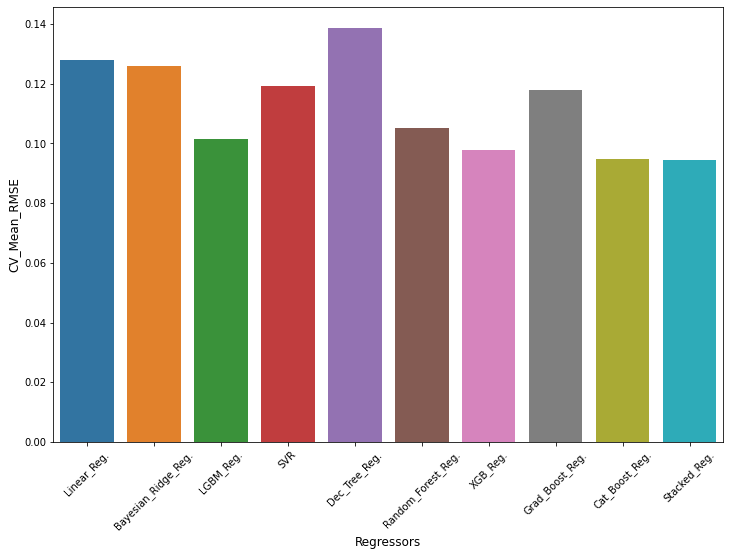

In [41]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

## CatBoost Regression

Improving the performance of best performing model

In [42]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(X,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## RMSE on Predicted Values

In [43]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

0.09566312126662636

## CatBoost Regression : Top Important Features

In [44]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0                     year    34.916249
1                  mileage    18.180913
2               engineSize    15.522055
3                      mpg     9.893793
4      transmission_Manual     5.216042
5          model_ 1 Series     3.764390
6          model_ 2 Series     1.931028
7                model_ X5     1.820478
8                      tax     1.146000
9          fuelType_Diesel     1.043210
10         fuelType_Petrol     1.029259
11         model_ 3 Series     0.999065
12               model_ X3     0.701866
13               model_ i8     0.612198
14  transmission_Semi-Auto     0.477457
15         model_ 5 Series     0.454010
16               model_ X4     0.254167
17         model_ 7 Series     0.250118
18         model_ 4 Series     0.237080
19               model_ X7     0.231545
20         fuelType_Hybrid     0.224148
21               model_ X6     0.194533
22         model_ 8 Series     0.186937
23  transmission_Automatic     0.178178
24               model_ X1     0.171823
25               model_ Z4     0.089525
26               model_ M4     0.084289
27               model_ M3     0.056815
28               model_ X2     0.056153
29         model_ 6 Series     0.042425
30               model_ M5     0.028009
31               model_ Z3     0.003024
32               model_ M2     0.001766
33               model_ M6     0.001236
34          fuelType_Other     0.000129
35       fuelType_Electric     0.000088
36               model_ i3     0.000000

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


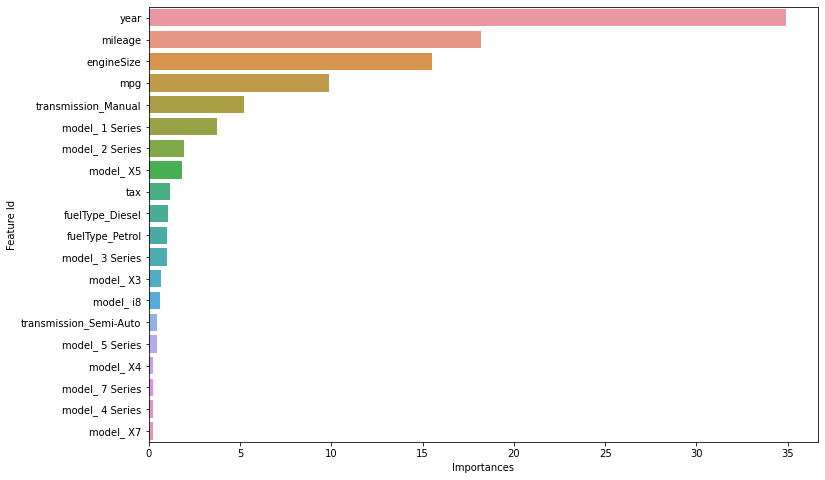

In [45]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

## CatBoost Hyper Parameter Tuning

In [46]:
## Default parameters
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.07079499959945679,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1

In [47]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 9.9196949	test: 9.9317101	best: 9.9317101 (0)	total: 6.44ms	remaining: 6.44s
1:	learn: 9.9147450	test: 9.9267642	best: 9.9267642 (1)	total: 12.8ms	remaining: 6.4s
2:	learn: 9.9097981	test: 9.9218159	best: 9.9218159 (2)	total: 16.5ms	remaining: 5.49s
3:	learn: 9.9048583	test: 9.9168772	best: 9.9168772 (3)	total: 29.6ms	remaining: 7.37s
4:	learn: 9.8999185	test: 9.9119371	best: 9.9119371 (4)	total: 34.1ms	remaining: 6.78s
5:	learn: 9.8949813	test: 9.9069999	best: 9.9069999 (5)	total: 38.1ms	remaining: 6.32s
6:	learn: 9.8900485	test: 9.9020634	best: 9.9020634 (6)	total: 44.6ms	remaining: 6.33s
7:	learn: 9.8851188	test: 9.8971309	best: 9.8971309 (7)	total: 51.3ms	remaining: 6.36s
8:	learn: 9.8801913	test: 9.8922062	best: 9.8922062 (8)	total: 56.7ms	remaining: 6.24s
9:	learn: 9.8752668	test: 9.8872809	best: 9.8872809 (9)	total: 62.7ms	remaining: 6.21s
10:	learn: 9.8703437	test: 9.8823575	best: 9.8823575 (10)	total: 67.2ms	remaining: 6.04s
11:	learn: 9.8654252	test: 9.8774372	best:

113:	learn: 9.3760559	test: 9.3879737	best: 9.3879737 (113)	total: 546ms	remaining: 4.24s
114:	learn: 9.3713821	test: 9.3833037	best: 9.3833037 (114)	total: 551ms	remaining: 4.24s
115:	learn: 9.3667114	test: 9.3786327	best: 9.3786327 (115)	total: 555ms	remaining: 4.23s
116:	learn: 9.3620400	test: 9.3739614	best: 9.3739614 (116)	total: 559ms	remaining: 4.22s
117:	learn: 9.3573737	test: 9.3692946	best: 9.3692946 (117)	total: 566ms	remaining: 4.23s
118:	learn: 9.3527124	test: 9.3646321	best: 9.3646321 (118)	total: 570ms	remaining: 4.22s
119:	learn: 9.3480521	test: 9.3599695	best: 9.3599695 (119)	total: 574ms	remaining: 4.21s
120:	learn: 9.3433898	test: 9.3553062	best: 9.3553062 (120)	total: 579ms	remaining: 4.2s
121:	learn: 9.3387327	test: 9.3506485	best: 9.3506485 (121)	total: 583ms	remaining: 4.2s
122:	learn: 9.3340761	test: 9.3459890	best: 9.3459890 (122)	total: 587ms	remaining: 4.19s
123:	learn: 9.3294205	test: 9.3413338	best: 9.3413338 (123)	total: 591ms	remaining: 4.17s
124:	learn: 

220:	learn: 8.8888810	test: 8.9007510	best: 8.9007510 (220)	total: 1.08s	remaining: 3.79s
221:	learn: 8.8844491	test: 8.8963175	best: 8.8963175 (221)	total: 1.08s	remaining: 3.79s
222:	learn: 8.8800218	test: 8.8918904	best: 8.8918904 (222)	total: 1.09s	remaining: 3.79s
223:	learn: 8.8755960	test: 8.8874608	best: 8.8874608 (223)	total: 1.09s	remaining: 3.79s
224:	learn: 8.8711734	test: 8.8830359	best: 8.8830359 (224)	total: 1.1s	remaining: 3.79s
225:	learn: 8.8667484	test: 8.8786096	best: 8.8786096 (225)	total: 1.11s	remaining: 3.79s
226:	learn: 8.8623284	test: 8.8741920	best: 8.8741920 (226)	total: 1.11s	remaining: 3.78s
227:	learn: 8.8579089	test: 8.8697723	best: 8.8697723 (227)	total: 1.11s	remaining: 3.78s
228:	learn: 8.8534951	test: 8.8653546	best: 8.8653546 (228)	total: 1.12s	remaining: 3.77s
229:	learn: 8.8490843	test: 8.8609416	best: 8.8609416 (229)	total: 1.13s	remaining: 3.77s
230:	learn: 8.8446751	test: 8.8565331	best: 8.8565331 (230)	total: 1.13s	remaining: 3.76s
231:	learn:

336:	learn: 8.3893567	test: 8.4011732	best: 8.4011732 (336)	total: 1.61s	remaining: 3.17s
337:	learn: 8.3851765	test: 8.3969935	best: 8.3969935 (337)	total: 1.61s	remaining: 3.16s
338:	learn: 8.3809969	test: 8.3928143	best: 8.3928143 (338)	total: 1.62s	remaining: 3.16s
339:	learn: 8.3768197	test: 8.3886403	best: 8.3886403 (339)	total: 1.62s	remaining: 3.15s
340:	learn: 8.3726461	test: 8.3844757	best: 8.3844757 (340)	total: 1.63s	remaining: 3.15s
341:	learn: 8.3684733	test: 8.3803004	best: 8.3803004 (341)	total: 1.63s	remaining: 3.14s
342:	learn: 8.3643024	test: 8.3761283	best: 8.3761283 (342)	total: 1.64s	remaining: 3.14s
343:	learn: 8.3601311	test: 8.3719540	best: 8.3719540 (343)	total: 1.64s	remaining: 3.13s
344:	learn: 8.3559622	test: 8.3677843	best: 8.3677843 (344)	total: 1.65s	remaining: 3.13s
345:	learn: 8.3517982	test: 8.3636183	best: 8.3636183 (345)	total: 1.65s	remaining: 3.12s
346:	learn: 8.3476383	test: 8.3594589	best: 8.3594589 (346)	total: 1.66s	remaining: 3.11s
347:	learn

461:	learn: 7.8825585	test: 7.8943166	best: 7.8943166 (461)	total: 2.14s	remaining: 2.49s
462:	learn: 7.8786305	test: 7.8903890	best: 7.8903890 (462)	total: 2.14s	remaining: 2.48s
463:	learn: 7.8747038	test: 7.8864623	best: 7.8864623 (463)	total: 2.15s	remaining: 2.48s
464:	learn: 7.8707778	test: 7.8825350	best: 7.8825350 (464)	total: 2.15s	remaining: 2.47s
465:	learn: 7.8668557	test: 7.8786133	best: 7.8786133 (465)	total: 2.15s	remaining: 2.46s
466:	learn: 7.8629355	test: 7.8746923	best: 7.8746923 (466)	total: 2.15s	remaining: 2.46s
467:	learn: 7.8590159	test: 7.8707717	best: 7.8707717 (467)	total: 2.16s	remaining: 2.45s
468:	learn: 7.8550994	test: 7.8668584	best: 7.8668584 (468)	total: 2.16s	remaining: 2.45s
469:	learn: 7.8511860	test: 7.8629468	best: 7.8629468 (469)	total: 2.17s	remaining: 2.44s
470:	learn: 7.8472718	test: 7.8590335	best: 7.8590335 (470)	total: 2.17s	remaining: 2.44s
471:	learn: 7.8433635	test: 7.8551250	best: 7.8551250 (471)	total: 2.18s	remaining: 2.44s
472:	learn

586:	learn: 7.4064552	test: 7.4181175	best: 7.4181175 (586)	total: 2.67s	remaining: 1.88s
587:	learn: 7.4027615	test: 7.4144218	best: 7.4144218 (587)	total: 2.67s	remaining: 1.87s
588:	learn: 7.3990721	test: 7.4107305	best: 7.4107305 (588)	total: 2.68s	remaining: 1.87s
589:	learn: 7.3953875	test: 7.4070470	best: 7.4070470 (589)	total: 2.68s	remaining: 1.86s
590:	learn: 7.3917010	test: 7.4033585	best: 7.4033585 (590)	total: 2.69s	remaining: 1.86s
591:	learn: 7.3880191	test: 7.3996772	best: 7.3996772 (591)	total: 2.69s	remaining: 1.86s
592:	learn: 7.3843378	test: 7.3959940	best: 7.3959940 (592)	total: 2.7s	remaining: 1.85s
593:	learn: 7.3806602	test: 7.3923139	best: 7.3923139 (593)	total: 2.7s	remaining: 1.85s
594:	learn: 7.3769829	test: 7.3886350	best: 7.3886350 (594)	total: 2.71s	remaining: 1.84s
595:	learn: 7.3733077	test: 7.3849615	best: 7.3849615 (595)	total: 2.71s	remaining: 1.84s
596:	learn: 7.3696318	test: 7.3812855	best: 7.3812855 (596)	total: 2.72s	remaining: 1.83s
597:	learn: 

708:	learn: 6.9695945	test: 6.9812016	best: 6.9812016 (708)	total: 3.2s	remaining: 1.31s
709:	learn: 6.9661262	test: 6.9777352	best: 6.9777352 (709)	total: 3.21s	remaining: 1.31s
710:	learn: 6.9626552	test: 6.9742665	best: 6.9742665 (710)	total: 3.21s	remaining: 1.3s
711:	learn: 6.9591850	test: 6.9707957	best: 6.9707957 (711)	total: 3.21s	remaining: 1.3s
712:	learn: 6.9557196	test: 6.9673293	best: 6.9673293 (712)	total: 3.22s	remaining: 1.29s
713:	learn: 6.9522570	test: 6.9638692	best: 6.9638692 (713)	total: 3.22s	remaining: 1.29s
714:	learn: 6.9487968	test: 6.9604075	best: 6.9604075 (714)	total: 3.23s	remaining: 1.29s
715:	learn: 6.9453363	test: 6.9569474	best: 6.9569474 (715)	total: 3.23s	remaining: 1.28s
716:	learn: 6.9418760	test: 6.9534869	best: 6.9534869 (716)	total: 3.23s	remaining: 1.28s
717:	learn: 6.9384196	test: 6.9500293	best: 6.9500293 (717)	total: 3.24s	remaining: 1.27s
718:	learn: 6.9349643	test: 6.9465724	best: 6.9465724 (718)	total: 3.24s	remaining: 1.27s
719:	learn: 6

814:	learn: 6.6111070	test: 6.6227019	best: 6.6227019 (814)	total: 3.74s	remaining: 849ms
815:	learn: 6.6078194	test: 6.6194132	best: 6.6194132 (815)	total: 3.75s	remaining: 845ms
816:	learn: 6.6045261	test: 6.6161206	best: 6.6161206 (816)	total: 3.75s	remaining: 840ms
817:	learn: 6.6012372	test: 6.6128299	best: 6.6128299 (817)	total: 3.75s	remaining: 835ms
818:	learn: 6.5979480	test: 6.6095412	best: 6.6095412 (818)	total: 3.76s	remaining: 831ms
819:	learn: 6.5946584	test: 6.6062492	best: 6.6062492 (819)	total: 3.76s	remaining: 826ms
820:	learn: 6.5913714	test: 6.6029626	best: 6.6029626 (820)	total: 3.77s	remaining: 822ms
821:	learn: 6.5880876	test: 6.5996771	best: 6.5996771 (821)	total: 3.77s	remaining: 817ms
822:	learn: 6.5848055	test: 6.5963938	best: 6.5963938 (822)	total: 3.78s	remaining: 812ms
823:	learn: 6.5815271	test: 6.5931151	best: 6.5931151 (823)	total: 3.78s	remaining: 808ms
824:	learn: 6.5782472	test: 6.5898351	best: 6.5898351 (824)	total: 3.79s	remaining: 803ms
825:	learn

921:	learn: 6.2679439	test: 6.2794846	best: 6.2794846 (921)	total: 4.29s	remaining: 363ms
922:	learn: 6.2648212	test: 6.2763611	best: 6.2763611 (922)	total: 4.29s	remaining: 358ms
923:	learn: 6.2617020	test: 6.2732443	best: 6.2732443 (923)	total: 4.3s	remaining: 353ms
924:	learn: 6.2585856	test: 6.2701282	best: 6.2701282 (924)	total: 4.3s	remaining: 349ms
925:	learn: 6.2554704	test: 6.2670085	best: 6.2670085 (925)	total: 4.3s	remaining: 344ms
926:	learn: 6.2523547	test: 6.2638911	best: 6.2638911 (926)	total: 4.31s	remaining: 339ms
927:	learn: 6.2492424	test: 6.2607775	best: 6.2607775 (927)	total: 4.31s	remaining: 335ms
928:	learn: 6.2461328	test: 6.2576639	best: 6.2576639 (928)	total: 4.32s	remaining: 330ms
929:	learn: 6.2430186	test: 6.2545515	best: 6.2545515 (929)	total: 4.32s	remaining: 325ms
930:	learn: 6.2399064	test: 6.2514424	best: 6.2514424 (930)	total: 4.33s	remaining: 321ms
931:	learn: 6.2368023	test: 6.2483367	best: 6.2483367 (931)	total: 4.33s	remaining: 316ms
932:	learn: 6

30:	learn: 9.7734497	test: 9.7854418	best: 9.7854418 (30)	total: 152ms	remaining: 29.2s
31:	learn: 9.7685960	test: 9.7805937	best: 9.7805937 (31)	total: 158ms	remaining: 29.4s
32:	learn: 9.7637720	test: 9.7757643	best: 9.7757643 (32)	total: 164ms	remaining: 29.6s
33:	learn: 9.7589333	test: 9.7709323	best: 9.7709323 (33)	total: 169ms	remaining: 29.7s
34:	learn: 9.7540864	test: 9.7660877	best: 9.7660877 (34)	total: 173ms	remaining: 29.6s
35:	learn: 9.7492414	test: 9.7612501	best: 9.7612501 (35)	total: 178ms	remaining: 29.5s
36:	learn: 9.7444073	test: 9.7564106	best: 9.7564106 (36)	total: 183ms	remaining: 29.5s
37:	learn: 9.7395824	test: 9.7515834	best: 9.7515834 (37)	total: 189ms	remaining: 29.6s
38:	learn: 9.7347635	test: 9.7467672	best: 9.7467672 (38)	total: 194ms	remaining: 29.7s
39:	learn: 9.7299422	test: 9.7419472	best: 9.7419472 (39)	total: 199ms	remaining: 29.7s
40:	learn: 9.7251109	test: 9.7371124	best: 9.7371124 (40)	total: 204ms	remaining: 29.7s
41:	learn: 9.7203154	test: 9.732

133:	learn: 9.2874003	test: 9.2993335	best: 9.2993335 (133)	total: 683ms	remaining: 29.9s
134:	learn: 9.2827946	test: 9.2947225	best: 9.2947225 (134)	total: 689ms	remaining: 29.9s
135:	learn: 9.2782041	test: 9.2901322	best: 9.2901322 (135)	total: 694ms	remaining: 29.9s
136:	learn: 9.2736568	test: 9.2855832	best: 9.2855832 (136)	total: 699ms	remaining: 29.9s
137:	learn: 9.2690557	test: 9.2809807	best: 9.2809807 (137)	total: 706ms	remaining: 30s
138:	learn: 9.2644595	test: 9.2763871	best: 9.2763871 (138)	total: 711ms	remaining: 30s
139:	learn: 9.2598785	test: 9.2718025	best: 9.2718025 (139)	total: 715ms	remaining: 29.9s
140:	learn: 9.2552814	test: 9.2672065	best: 9.2672065 (140)	total: 721ms	remaining: 30s
141:	learn: 9.2506792	test: 9.2626046	best: 9.2626046 (141)	total: 726ms	remaining: 29.9s
142:	learn: 9.2461101	test: 9.2580312	best: 9.2580312 (142)	total: 730ms	remaining: 29.9s
143:	learn: 9.2415273	test: 9.2534480	best: 9.2534480 (143)	total: 736ms	remaining: 29.9s
144:	learn: 9.23

249:	learn: 8.7688994	test: 8.7808288	best: 8.7808288 (249)	total: 1.22s	remaining: 27.9s
250:	learn: 8.7645536	test: 8.7764795	best: 8.7764795 (250)	total: 1.22s	remaining: 27.9s
251:	learn: 8.7602193	test: 8.7721415	best: 8.7721415 (251)	total: 1.22s	remaining: 27.9s
252:	learn: 8.7558806	test: 8.7678010	best: 8.7678010 (252)	total: 1.23s	remaining: 27.9s
253:	learn: 8.7515417	test: 8.7634569	best: 8.7634569 (253)	total: 1.23s	remaining: 27.9s
254:	learn: 8.7471995	test: 8.7591221	best: 8.7591221 (254)	total: 1.24s	remaining: 27.8s
255:	learn: 8.7428595	test: 8.7547930	best: 8.7547930 (255)	total: 1.24s	remaining: 27.8s
256:	learn: 8.7385258	test: 8.7504592	best: 8.7504592 (256)	total: 1.24s	remaining: 27.8s
257:	learn: 8.7341978	test: 8.7461338	best: 8.7461338 (257)	total: 1.25s	remaining: 27.8s
258:	learn: 8.7298650	test: 8.7417983	best: 8.7417983 (258)	total: 1.25s	remaining: 27.7s
259:	learn: 8.7255411	test: 8.7374814	best: 8.7374814 (259)	total: 1.25s	remaining: 27.7s
260:	learn

378:	learn: 8.2262206	test: 8.2380205	best: 8.2380205 (378)	total: 1.75s	remaining: 25.9s
379:	learn: 8.2221424	test: 8.2339401	best: 8.2339401 (379)	total: 1.75s	remaining: 25.9s
380:	learn: 8.2180842	test: 8.2298836	best: 8.2298836 (380)	total: 1.76s	remaining: 25.9s
381:	learn: 8.2140033	test: 8.2258034	best: 8.2258034 (381)	total: 1.76s	remaining: 25.9s
382:	learn: 8.2099411	test: 8.2217368	best: 8.2217368 (382)	total: 1.76s	remaining: 25.9s
383:	learn: 8.2058762	test: 8.2176685	best: 8.2176685 (383)	total: 1.77s	remaining: 25.9s
384:	learn: 8.2018211	test: 8.2136102	best: 8.2136102 (384)	total: 1.77s	remaining: 25.9s
385:	learn: 8.1977566	test: 8.2095396	best: 8.2095396 (385)	total: 1.78s	remaining: 25.9s
386:	learn: 8.1936843	test: 8.2054655	best: 8.2054655 (386)	total: 1.78s	remaining: 25.9s
387:	learn: 8.1896370	test: 8.2014228	best: 8.2014228 (387)	total: 1.79s	remaining: 25.8s
388:	learn: 8.1855885	test: 8.1973768	best: 8.1973768 (388)	total: 1.79s	remaining: 25.8s
389:	learn

499:	learn: 7.7478447	test: 7.7595513	best: 7.7595513 (499)	total: 2.28s	remaining: 25.1s
500:	learn: 7.7440045	test: 7.7557116	best: 7.7557116 (500)	total: 2.29s	remaining: 25.1s
501:	learn: 7.7401736	test: 7.7518787	best: 7.7518787 (501)	total: 2.29s	remaining: 25.1s
502:	learn: 7.7363472	test: 7.7480463	best: 7.7480463 (502)	total: 2.29s	remaining: 25.1s
503:	learn: 7.7325161	test: 7.7442163	best: 7.7442163 (503)	total: 2.3s	remaining: 25.1s
504:	learn: 7.7286905	test: 7.7403866	best: 7.7403866 (504)	total: 2.3s	remaining: 25.1s
505:	learn: 7.7248658	test: 7.7365599	best: 7.7365599 (505)	total: 2.31s	remaining: 25.1s
506:	learn: 7.7210546	test: 7.7327468	best: 7.7327468 (506)	total: 2.31s	remaining: 25.1s
507:	learn: 7.7172390	test: 7.7289297	best: 7.7289297 (507)	total: 2.32s	remaining: 25.1s
508:	learn: 7.7134148	test: 7.7251093	best: 7.7251093 (508)	total: 2.32s	remaining: 25s
509:	learn: 7.7095938	test: 7.7212885	best: 7.7212885 (509)	total: 2.33s	remaining: 25s
510:	learn: 7.70

627:	learn: 7.2721688	test: 7.2837566	best: 7.2837566 (627)	total: 2.81s	remaining: 24.1s
628:	learn: 7.2685706	test: 7.2801561	best: 7.2801561 (628)	total: 2.82s	remaining: 24.1s
629:	learn: 7.2649686	test: 7.2765530	best: 7.2765530 (629)	total: 2.82s	remaining: 24s
630:	learn: 7.2613651	test: 7.2729490	best: 7.2729490 (630)	total: 2.83s	remaining: 24s
631:	learn: 7.2577716	test: 7.2693566	best: 7.2693566 (631)	total: 2.83s	remaining: 24s
632:	learn: 7.2541799	test: 7.2657621	best: 7.2657621 (632)	total: 2.83s	remaining: 24s
633:	learn: 7.2506000	test: 7.2621839	best: 7.2621839 (633)	total: 2.84s	remaining: 24s
634:	learn: 7.2470121	test: 7.2585982	best: 7.2585982 (634)	total: 2.84s	remaining: 24s
635:	learn: 7.2434156	test: 7.2550070	best: 7.2550070 (635)	total: 2.85s	remaining: 24s
636:	learn: 7.2398342	test: 7.2514276	best: 7.2514276 (636)	total: 2.85s	remaining: 24s
637:	learn: 7.2362606	test: 7.2478520	best: 7.2478520 (637)	total: 2.85s	remaining: 24s
638:	learn: 7.2326842	test: 

758:	learn: 6.8154800	test: 6.8270048	best: 6.8270048 (758)	total: 3.34s	remaining: 23.1s
759:	learn: 6.8121150	test: 6.8236442	best: 6.8236442 (759)	total: 3.35s	remaining: 23.1s
760:	learn: 6.8087648	test: 6.8202844	best: 6.8202844 (760)	total: 3.35s	remaining: 23.1s
761:	learn: 6.8053840	test: 6.8169063	best: 6.8169063 (761)	total: 3.35s	remaining: 23.1s
762:	learn: 6.8020091	test: 6.8135308	best: 6.8135308 (762)	total: 3.36s	remaining: 23.1s
763:	learn: 6.7986517	test: 6.8101674	best: 6.8101674 (763)	total: 3.36s	remaining: 23s
764:	learn: 6.7952826	test: 6.8068036	best: 6.8068036 (764)	total: 3.37s	remaining: 23s
765:	learn: 6.7919215	test: 6.8034444	best: 6.8034444 (765)	total: 3.37s	remaining: 23s
766:	learn: 6.7885534	test: 6.8000766	best: 6.8000766 (766)	total: 3.37s	remaining: 23s
767:	learn: 6.7852001	test: 6.7967211	best: 6.7967211 (767)	total: 3.38s	remaining: 23s
768:	learn: 6.7818592	test: 6.7933838	best: 6.7933838 (768)	total: 3.38s	remaining: 23s
769:	learn: 6.7785240	

869:	learn: 6.4513313	test: 6.4628359	best: 6.4628359 (869)	total: 3.88s	remaining: 22.9s
870:	learn: 6.4481437	test: 6.4596474	best: 6.4596474 (870)	total: 3.88s	remaining: 22.9s
871:	learn: 6.4449586	test: 6.4564586	best: 6.4564586 (871)	total: 3.89s	remaining: 22.9s
872:	learn: 6.4417692	test: 6.4532700	best: 6.4532700 (872)	total: 3.89s	remaining: 22.9s
873:	learn: 6.4385883	test: 6.4500926	best: 6.4500926 (873)	total: 3.9s	remaining: 22.8s
874:	learn: 6.4353966	test: 6.4469027	best: 6.4469027 (874)	total: 3.9s	remaining: 22.8s
875:	learn: 6.4322294	test: 6.4437368	best: 6.4437368 (875)	total: 3.9s	remaining: 22.8s
876:	learn: 6.4290390	test: 6.4405479	best: 6.4405479 (876)	total: 3.91s	remaining: 22.8s
877:	learn: 6.4258729	test: 6.4373836	best: 6.4373836 (877)	total: 3.91s	remaining: 22.8s
878:	learn: 6.4226991	test: 6.4342066	best: 6.4342066 (878)	total: 3.92s	remaining: 22.8s
879:	learn: 6.4195228	test: 6.4310274	best: 6.4310274 (879)	total: 3.92s	remaining: 22.8s
880:	learn: 6

989:	learn: 6.0795269	test: 6.0909659	best: 6.0909659 (989)	total: 4.41s	remaining: 22.3s
990:	learn: 6.0765095	test: 6.0879512	best: 6.0879512 (990)	total: 4.41s	remaining: 22.3s
991:	learn: 6.0734939	test: 6.0849377	best: 6.0849377 (991)	total: 4.42s	remaining: 22.3s
992:	learn: 6.0704956	test: 6.0819427	best: 6.0819427 (992)	total: 4.42s	remaining: 22.3s
993:	learn: 6.0674905	test: 6.0789322	best: 6.0789322 (993)	total: 4.43s	remaining: 22.3s
994:	learn: 6.0644940	test: 6.0759361	best: 6.0759361 (994)	total: 4.43s	remaining: 22.3s
995:	learn: 6.0614774	test: 6.0729186	best: 6.0729186 (995)	total: 4.43s	remaining: 22.3s
996:	learn: 6.0584796	test: 6.0699219	best: 6.0699219 (996)	total: 4.44s	remaining: 22.3s
997:	learn: 6.0554801	test: 6.0669197	best: 6.0669197 (997)	total: 4.44s	remaining: 22.3s
998:	learn: 6.0524851	test: 6.0639252	best: 6.0639252 (998)	total: 4.45s	remaining: 22.3s
999:	learn: 6.0494951	test: 6.0609277	best: 6.0609277 (999)	total: 4.45s	remaining: 22.3s
1000:	lear

1093:	learn: 5.7746983	test: 5.7860394	best: 5.7860394 (1093)	total: 4.94s	remaining: 22.2s
1094:	learn: 5.7718481	test: 5.7831849	best: 5.7831849 (1094)	total: 4.95s	remaining: 22.2s
1095:	learn: 5.7690009	test: 5.7803354	best: 5.7803354 (1095)	total: 4.95s	remaining: 22.2s
1096:	learn: 5.7661561	test: 5.7774925	best: 5.7774925 (1096)	total: 4.96s	remaining: 22.1s
1097:	learn: 5.7633090	test: 5.7746428	best: 5.7746428 (1097)	total: 4.96s	remaining: 22.1s
1098:	learn: 5.7604752	test: 5.7718068	best: 5.7718068 (1098)	total: 4.96s	remaining: 22.1s
1099:	learn: 5.7576189	test: 5.7689541	best: 5.7689541 (1099)	total: 4.97s	remaining: 22.1s
1100:	learn: 5.7547792	test: 5.7661116	best: 5.7661116 (1100)	total: 4.97s	remaining: 22.1s
1101:	learn: 5.7519440	test: 5.7632728	best: 5.7632728 (1101)	total: 4.98s	remaining: 22.1s
1102:	learn: 5.7491080	test: 5.7604326	best: 5.7604326 (1102)	total: 4.98s	remaining: 22.1s
1103:	learn: 5.7462756	test: 5.7575984	best: 5.7575984 (1103)	total: 4.99s	remai

1206:	learn: 5.4610390	test: 5.4723122	best: 5.4723122 (1206)	total: 5.48s	remaining: 21.7s
1207:	learn: 5.4583455	test: 5.4696177	best: 5.4696177 (1207)	total: 5.48s	remaining: 21.7s
1208:	learn: 5.4556543	test: 5.4669244	best: 5.4669244 (1208)	total: 5.49s	remaining: 21.7s
1209:	learn: 5.4529565	test: 5.4642308	best: 5.4642308 (1209)	total: 5.49s	remaining: 21.7s
1210:	learn: 5.4502660	test: 5.4615380	best: 5.4615380 (1210)	total: 5.5s	remaining: 21.7s
1211:	learn: 5.4475786	test: 5.4588483	best: 5.4588483 (1211)	total: 5.5s	remaining: 21.7s
1212:	learn: 5.4448854	test: 5.4561520	best: 5.4561520 (1212)	total: 5.51s	remaining: 21.7s
1213:	learn: 5.4421960	test: 5.4534615	best: 5.4534615 (1213)	total: 5.51s	remaining: 21.7s
1214:	learn: 5.4395027	test: 5.4507631	best: 5.4507631 (1214)	total: 5.52s	remaining: 21.7s
1215:	learn: 5.4368095	test: 5.4480663	best: 5.4480663 (1215)	total: 5.52s	remaining: 21.7s
1216:	learn: 5.4341094	test: 5.4453664	best: 5.4453664 (1216)	total: 5.52s	remaini

1325:	learn: 5.1492455	test: 5.1604476	best: 5.1604476 (1325)	total: 6.01s	remaining: 21.2s
1326:	learn: 5.1467007	test: 5.1578993	best: 5.1578993 (1326)	total: 6.01s	remaining: 21.2s
1327:	learn: 5.1441690	test: 5.1553643	best: 5.1553643 (1327)	total: 6.01s	remaining: 21.2s
1328:	learn: 5.1416275	test: 5.1528235	best: 5.1528235 (1328)	total: 6.02s	remaining: 21.2s
1329:	learn: 5.1390894	test: 5.1502843	best: 5.1502843 (1329)	total: 6.02s	remaining: 21.1s
1330:	learn: 5.1365556	test: 5.1477484	best: 5.1477484 (1330)	total: 6.03s	remaining: 21.1s
1331:	learn: 5.1340141	test: 5.1452035	best: 5.1452035 (1331)	total: 6.03s	remaining: 21.1s
1332:	learn: 5.1314854	test: 5.1426732	best: 5.1426732 (1332)	total: 6.04s	remaining: 21.1s
1333:	learn: 5.1289403	test: 5.1401268	best: 5.1401268 (1333)	total: 6.04s	remaining: 21.1s
1334:	learn: 5.1264104	test: 5.1375986	best: 5.1375986 (1334)	total: 6.04s	remaining: 21.1s
1335:	learn: 5.1238781	test: 5.1350670	best: 5.1350670 (1335)	total: 6.05s	remai

1452:	learn: 4.8362098	test: 4.8473479	best: 4.8473479 (1452)	total: 6.54s	remaining: 20.5s
1453:	learn: 4.8338373	test: 4.8449735	best: 4.8449735 (1453)	total: 6.54s	remaining: 20.5s
1454:	learn: 4.8314513	test: 4.8425824	best: 4.8425824 (1454)	total: 6.55s	remaining: 20.5s
1455:	learn: 4.8290661	test: 4.8401956	best: 4.8401956 (1455)	total: 6.55s	remaining: 20.4s
1456:	learn: 4.8266787	test: 4.8378101	best: 4.8378101 (1456)	total: 6.55s	remaining: 20.4s
1457:	learn: 4.8242928	test: 4.8354225	best: 4.8354225 (1457)	total: 6.56s	remaining: 20.4s
1458:	learn: 4.8219274	test: 4.8330564	best: 4.8330564 (1458)	total: 6.56s	remaining: 20.4s
1459:	learn: 4.8195489	test: 4.8306796	best: 4.8306796 (1459)	total: 6.57s	remaining: 20.4s
1460:	learn: 4.8171632	test: 4.8282946	best: 4.8282946 (1460)	total: 6.57s	remaining: 20.4s
1461:	learn: 4.8147811	test: 4.8259128	best: 4.8259128 (1461)	total: 6.58s	remaining: 20.4s
1462:	learn: 4.8123949	test: 4.8235268	best: 4.8235268 (1462)	total: 6.58s	remai

1543:	learn: 4.6236680	test: 4.6347504	best: 4.6347504 (1543)	total: 6.89s	remaining: 19.9s
1544:	learn: 4.6213873	test: 4.6324679	best: 4.6324679 (1544)	total: 6.9s	remaining: 19.9s
1545:	learn: 4.6191080	test: 4.6301884	best: 4.6301884 (1545)	total: 6.9s	remaining: 19.9s
1546:	learn: 4.6168297	test: 4.6279063	best: 4.6279063 (1546)	total: 6.91s	remaining: 19.9s
1547:	learn: 4.6145535	test: 4.6256316	best: 4.6256316 (1547)	total: 6.91s	remaining: 19.9s
1548:	learn: 4.6122665	test: 4.6233429	best: 4.6233429 (1548)	total: 6.91s	remaining: 19.9s
1549:	learn: 4.6099850	test: 4.6210644	best: 4.6210644 (1549)	total: 6.92s	remaining: 19.9s
1550:	learn: 4.6077139	test: 4.6187930	best: 4.6187930 (1550)	total: 6.92s	remaining: 19.9s
1551:	learn: 4.6054378	test: 4.6165159	best: 4.6165159 (1551)	total: 6.92s	remaining: 19.8s
1552:	learn: 4.6031632	test: 4.6142410	best: 4.6142410 (1552)	total: 6.93s	remaining: 19.8s
1553:	learn: 4.6008848	test: 4.6119629	best: 4.6119629 (1553)	total: 6.93s	remaini

1673:	learn: 4.3363096	test: 4.3472612	best: 4.3472612 (1673)	total: 7.43s	remaining: 19.2s
1674:	learn: 4.3341633	test: 4.3451158	best: 4.3451158 (1674)	total: 7.43s	remaining: 19.2s
1675:	learn: 4.3320239	test: 4.3429774	best: 4.3429774 (1675)	total: 7.43s	remaining: 19.2s
1676:	learn: 4.3298826	test: 4.3408359	best: 4.3408359 (1676)	total: 7.44s	remaining: 19.2s
1677:	learn: 4.3277459	test: 4.3386995	best: 4.3386995 (1677)	total: 7.44s	remaining: 19.2s
1678:	learn: 4.3256117	test: 4.3365630	best: 4.3365630 (1678)	total: 7.45s	remaining: 19.2s
1679:	learn: 4.3234690	test: 4.3344199	best: 4.3344199 (1679)	total: 7.45s	remaining: 19.2s
1680:	learn: 4.3213309	test: 4.3322859	best: 4.3322859 (1680)	total: 7.45s	remaining: 19.2s
1681:	learn: 4.3191929	test: 4.3301464	best: 4.3301464 (1681)	total: 7.46s	remaining: 19.1s
1682:	learn: 4.3170610	test: 4.3280135	best: 4.3280135 (1682)	total: 7.46s	remaining: 19.1s
1683:	learn: 4.3149241	test: 4.3258754	best: 4.3258754 (1683)	total: 7.46s	remai

1802:	learn: 4.0689595	test: 4.0797954	best: 4.0797954 (1802)	total: 7.96s	remaining: 18.5s
1803:	learn: 4.0669615	test: 4.0777978	best: 4.0777978 (1803)	total: 7.96s	remaining: 18.5s
1804:	learn: 4.0649558	test: 4.0757923	best: 4.0757923 (1804)	total: 7.97s	remaining: 18.5s
1805:	learn: 4.0629553	test: 4.0737888	best: 4.0737888 (1805)	total: 7.97s	remaining: 18.5s
1806:	learn: 4.0609524	test: 4.0717847	best: 4.0717847 (1806)	total: 7.97s	remaining: 18.5s
1807:	learn: 4.0589544	test: 4.0697855	best: 4.0697855 (1807)	total: 7.98s	remaining: 18.5s
1808:	learn: 4.0569561	test: 4.0677846	best: 4.0677846 (1808)	total: 7.98s	remaining: 18.5s
1809:	learn: 4.0549591	test: 4.0657866	best: 4.0657866 (1809)	total: 7.99s	remaining: 18.5s
1810:	learn: 4.0529616	test: 4.0637854	best: 4.0637854 (1810)	total: 7.99s	remaining: 18.5s
1811:	learn: 4.0509626	test: 4.0617891	best: 4.0617891 (1811)	total: 8s	remaining: 18.5s
1812:	learn: 4.0489771	test: 4.0598010	best: 4.0598010 (1812)	total: 8s	remaining: 

1930:	learn: 3.8202817	test: 3.8310078	best: 3.8310078 (1930)	total: 8.49s	remaining: 17.9s
1931:	learn: 3.8184076	test: 3.8291300	best: 3.8291300 (1931)	total: 8.49s	remaining: 17.9s
1932:	learn: 3.8165321	test: 3.8272570	best: 3.8272570 (1932)	total: 8.5s	remaining: 17.9s
1933:	learn: 3.8146436	test: 3.8253669	best: 3.8253669 (1933)	total: 8.5s	remaining: 17.9s
1934:	learn: 3.8127613	test: 3.8234836	best: 3.8234836 (1934)	total: 8.51s	remaining: 17.9s
1935:	learn: 3.8108838	test: 3.8216008	best: 3.8216008 (1935)	total: 8.51s	remaining: 17.9s
1936:	learn: 3.8090029	test: 3.8197206	best: 3.8197206 (1936)	total: 8.52s	remaining: 17.9s
1937:	learn: 3.8071229	test: 3.8178405	best: 3.8178405 (1937)	total: 8.52s	remaining: 17.9s
1938:	learn: 3.8052501	test: 3.8159653	best: 3.8159653 (1938)	total: 8.52s	remaining: 17.9s
1939:	learn: 3.8033713	test: 3.8140871	best: 3.8140871 (1939)	total: 8.53s	remaining: 17.8s
1940:	learn: 3.8014944	test: 3.8122075	best: 3.8122075 (1940)	total: 8.53s	remaini

2065:	learn: 3.5744688	test: 3.5851294	best: 3.5851294 (2065)	total: 9.03s	remaining: 17.2s
2066:	learn: 3.5727132	test: 3.5833730	best: 3.5833730 (2066)	total: 9.03s	remaining: 17.2s
2067:	learn: 3.5709515	test: 3.5816098	best: 3.5816098 (2067)	total: 9.04s	remaining: 17.2s
2068:	learn: 3.5691937	test: 3.5798550	best: 3.5798550 (2068)	total: 9.04s	remaining: 17.2s
2069:	learn: 3.5674302	test: 3.5780903	best: 3.5780903 (2069)	total: 9.04s	remaining: 17.2s
2070:	learn: 3.5656696	test: 3.5763308	best: 3.5763308 (2070)	total: 9.04s	remaining: 17.2s
2071:	learn: 3.5639130	test: 3.5745721	best: 3.5745721 (2071)	total: 9.05s	remaining: 17.2s
2072:	learn: 3.5621555	test: 3.5728162	best: 3.5728162 (2072)	total: 9.05s	remaining: 17.1s
2073:	learn: 3.5604088	test: 3.5710634	best: 3.5710634 (2073)	total: 9.06s	remaining: 17.1s
2074:	learn: 3.5586571	test: 3.5693080	best: 3.5693080 (2074)	total: 9.06s	remaining: 17.1s
2075:	learn: 3.5569111	test: 3.5675623	best: 3.5675623 (2075)	total: 9.06s	remai

2187:	learn: 3.3662400	test: 3.3767708	best: 3.3767708 (2187)	total: 9.55s	remaining: 16.6s
2188:	learn: 3.3645835	test: 3.3751146	best: 3.3751146 (2188)	total: 9.55s	remaining: 16.6s
2189:	learn: 3.3629214	test: 3.3734512	best: 3.3734512 (2189)	total: 9.56s	remaining: 16.6s
2190:	learn: 3.3612682	test: 3.3717993	best: 3.3717993 (2190)	total: 9.56s	remaining: 16.6s
2191:	learn: 3.3596140	test: 3.3701418	best: 3.3701418 (2191)	total: 9.57s	remaining: 16.6s
2192:	learn: 3.3579601	test: 3.3684917	best: 3.3684917 (2192)	total: 9.58s	remaining: 16.6s
2193:	learn: 3.3563089	test: 3.3668388	best: 3.3668388 (2193)	total: 9.58s	remaining: 16.6s
2194:	learn: 3.3546579	test: 3.3651891	best: 3.3651891 (2194)	total: 9.59s	remaining: 16.6s
2195:	learn: 3.3530125	test: 3.3635450	best: 3.3635450 (2195)	total: 9.59s	remaining: 16.6s
2196:	learn: 3.3513633	test: 3.3618945	best: 3.3618945 (2196)	total: 9.59s	remaining: 16.6s
2197:	learn: 3.3497209	test: 3.3602506	best: 3.3602506 (2197)	total: 9.6s	remain

2297:	learn: 3.1889744	test: 3.1994387	best: 3.1994387 (2297)	total: 10.1s	remaining: 16.2s
2298:	learn: 3.1874034	test: 3.1978679	best: 3.1978679 (2298)	total: 10.1s	remaining: 16.2s
2299:	learn: 3.1858382	test: 3.1963030	best: 3.1963030 (2299)	total: 10.1s	remaining: 16.2s
2300:	learn: 3.1842751	test: 3.1947384	best: 3.1947384 (2300)	total: 10.1s	remaining: 16.2s
2301:	learn: 3.1827036	test: 3.1931700	best: 3.1931700 (2301)	total: 10.1s	remaining: 16.2s
2302:	learn: 3.1811408	test: 3.1916053	best: 3.1916053 (2302)	total: 10.1s	remaining: 16.2s
2303:	learn: 3.1795729	test: 3.1900379	best: 3.1900379 (2303)	total: 10.1s	remaining: 16.2s
2304:	learn: 3.1780168	test: 3.1884817	best: 3.1884817 (2304)	total: 10.1s	remaining: 16.2s
2305:	learn: 3.1764567	test: 3.1869225	best: 3.1869225 (2305)	total: 10.1s	remaining: 16.2s
2306:	learn: 3.1748950	test: 3.1853615	best: 3.1853615 (2306)	total: 10.1s	remaining: 16.2s
2307:	learn: 3.1733334	test: 3.1837976	best: 3.1837976 (2307)	total: 10.1s	remai

2417:	learn: 3.0064143	test: 3.0167744	best: 3.0167744 (2417)	total: 10.6s	remaining: 15.7s
2418:	learn: 3.0049352	test: 3.0152946	best: 3.0152946 (2418)	total: 10.6s	remaining: 15.7s
2419:	learn: 3.0034629	test: 3.0138224	best: 3.0138224 (2419)	total: 10.6s	remaining: 15.7s
2420:	learn: 3.0019863	test: 3.0123445	best: 3.0123445 (2420)	total: 10.6s	remaining: 15.7s
2421:	learn: 3.0005178	test: 3.0108758	best: 3.0108758 (2421)	total: 10.6s	remaining: 15.7s
2422:	learn: 2.9990469	test: 3.0094055	best: 3.0094055 (2422)	total: 10.6s	remaining: 15.7s
2423:	learn: 2.9975763	test: 3.0079327	best: 3.0079327 (2423)	total: 10.6s	remaining: 15.7s
2424:	learn: 2.9961065	test: 3.0064621	best: 3.0064621 (2424)	total: 10.6s	remaining: 15.7s
2425:	learn: 2.9946369	test: 3.0049910	best: 3.0049910 (2425)	total: 10.6s	remaining: 15.7s
2426:	learn: 2.9931711	test: 3.0035257	best: 3.0035257 (2426)	total: 10.6s	remaining: 15.7s
2427:	learn: 2.9916967	test: 3.0020502	best: 3.0020502 (2427)	total: 10.6s	remai

2539:	learn: 2.8316330	test: 2.8419180	best: 2.8419180 (2539)	total: 11.1s	remaining: 15.2s
2540:	learn: 2.8302395	test: 2.8405271	best: 2.8405271 (2540)	total: 11.2s	remaining: 15.2s
2541:	learn: 2.8288534	test: 2.8391373	best: 2.8391373 (2541)	total: 11.2s	remaining: 15.2s
2542:	learn: 2.8274634	test: 2.8377465	best: 2.8377465 (2542)	total: 11.2s	remaining: 15.2s
2543:	learn: 2.8260786	test: 2.8363615	best: 2.8363615 (2543)	total: 11.2s	remaining: 15.2s
2544:	learn: 2.8246919	test: 2.8349717	best: 2.8349717 (2544)	total: 11.2s	remaining: 15.2s
2545:	learn: 2.8233084	test: 2.8335878	best: 2.8335878 (2545)	total: 11.2s	remaining: 15.2s
2546:	learn: 2.8219276	test: 2.8322039	best: 2.8322039 (2546)	total: 11.2s	remaining: 15.2s
2547:	learn: 2.8205484	test: 2.8308217	best: 2.8308217 (2547)	total: 11.2s	remaining: 15.2s
2548:	learn: 2.8191648	test: 2.8294346	best: 2.8294346 (2548)	total: 11.2s	remaining: 15.2s
2549:	learn: 2.8177836	test: 2.8280534	best: 2.8280534 (2549)	total: 11.2s	remai

2658:	learn: 2.6711680	test: 2.6813327	best: 2.6813327 (2658)	total: 11.7s	remaining: 14.7s
2659:	learn: 2.6698648	test: 2.6800265	best: 2.6800265 (2659)	total: 11.7s	remaining: 14.7s
2660:	learn: 2.6685610	test: 2.6787230	best: 2.6787230 (2660)	total: 11.7s	remaining: 14.7s
2661:	learn: 2.6672609	test: 2.6774230	best: 2.6774230 (2661)	total: 11.7s	remaining: 14.7s
2662:	learn: 2.6659557	test: 2.6761180	best: 2.6761180 (2662)	total: 11.7s	remaining: 14.7s
2663:	learn: 2.6646535	test: 2.6748143	best: 2.6748143 (2663)	total: 11.7s	remaining: 14.7s
2664:	learn: 2.6633478	test: 2.6735069	best: 2.6735069 (2664)	total: 11.7s	remaining: 14.7s
2665:	learn: 2.6620463	test: 2.6722055	best: 2.6722055 (2665)	total: 11.7s	remaining: 14.7s
2666:	learn: 2.6607450	test: 2.6709017	best: 2.6709017 (2666)	total: 11.7s	remaining: 14.7s
2667:	learn: 2.6594437	test: 2.6695972	best: 2.6695972 (2667)	total: 11.7s	remaining: 14.6s
2668:	learn: 2.6581458	test: 2.6682964	best: 2.6682964 (2668)	total: 11.7s	remai

2769:	learn: 2.5299386	test: 2.5399683	best: 2.5399683 (2769)	total: 12.2s	remaining: 14.2s
2770:	learn: 2.5287041	test: 2.5387326	best: 2.5387326 (2770)	total: 12.2s	remaining: 14.2s
2771:	learn: 2.5274669	test: 2.5374956	best: 2.5374956 (2771)	total: 12.2s	remaining: 14.2s
2772:	learn: 2.5262272	test: 2.5362562	best: 2.5362562 (2772)	total: 12.2s	remaining: 14.2s
2773:	learn: 2.5249992	test: 2.5350249	best: 2.5350249 (2773)	total: 12.2s	remaining: 14.2s
2774:	learn: 2.5237662	test: 2.5337907	best: 2.5337907 (2774)	total: 12.2s	remaining: 14.2s
2775:	learn: 2.5225316	test: 2.5325557	best: 2.5325557 (2775)	total: 12.2s	remaining: 14.2s
2776:	learn: 2.5212946	test: 2.5313173	best: 2.5313173 (2776)	total: 12.2s	remaining: 14.2s
2777:	learn: 2.5200644	test: 2.5300840	best: 2.5300840 (2777)	total: 12.3s	remaining: 14.2s
2778:	learn: 2.5188313	test: 2.5288510	best: 2.5288510 (2778)	total: 12.3s	remaining: 14.2s
2779:	learn: 2.5175983	test: 2.5276187	best: 2.5276187 (2779)	total: 12.3s	remai

2897:	learn: 2.3764877	test: 2.3863579	best: 2.3863579 (2897)	total: 12.8s	remaining: 13.6s
2898:	learn: 2.3753348	test: 2.3852046	best: 2.3852046 (2898)	total: 12.8s	remaining: 13.6s
2899:	learn: 2.3741788	test: 2.3840479	best: 2.3840479 (2899)	total: 12.8s	remaining: 13.6s
2900:	learn: 2.3730143	test: 2.3828819	best: 2.3828819 (2900)	total: 12.8s	remaining: 13.6s
2901:	learn: 2.3718556	test: 2.3817244	best: 2.3817244 (2901)	total: 12.8s	remaining: 13.6s
2902:	learn: 2.3707014	test: 2.3805667	best: 2.3805667 (2902)	total: 12.8s	remaining: 13.6s
2903:	learn: 2.3695432	test: 2.3794067	best: 2.3794067 (2903)	total: 12.8s	remaining: 13.6s
2904:	learn: 2.3683891	test: 2.3782540	best: 2.3782540 (2904)	total: 12.8s	remaining: 13.6s
2905:	learn: 2.3672332	test: 2.3770968	best: 2.3770968 (2905)	total: 12.8s	remaining: 13.6s
2906:	learn: 2.3660768	test: 2.3759406	best: 2.3759406 (2906)	total: 12.8s	remaining: 13.6s
2907:	learn: 2.3649200	test: 2.3747832	best: 2.3747832 (2907)	total: 12.8s	remai

3015:	learn: 2.2434586	test: 2.2531895	best: 2.2531895 (3015)	total: 13.3s	remaining: 13.1s
3016:	learn: 2.2423614	test: 2.2520924	best: 2.2520924 (3016)	total: 13.3s	remaining: 13.1s
3017:	learn: 2.2412637	test: 2.2509946	best: 2.2509946 (3017)	total: 13.3s	remaining: 13.1s
3018:	learn: 2.2401712	test: 2.2499019	best: 2.2499019 (3018)	total: 13.3s	remaining: 13.1s
3019:	learn: 2.2390819	test: 2.2488103	best: 2.2488103 (3019)	total: 13.3s	remaining: 13.1s
3020:	learn: 2.2379868	test: 2.2477165	best: 2.2477165 (3020)	total: 13.3s	remaining: 13.1s
3021:	learn: 2.2368954	test: 2.2466250	best: 2.2466250 (3021)	total: 13.3s	remaining: 13.1s
3022:	learn: 2.2358066	test: 2.2455377	best: 2.2455377 (3022)	total: 13.3s	remaining: 13.1s
3023:	learn: 2.2347124	test: 2.2444402	best: 2.2444402 (3023)	total: 13.3s	remaining: 13.1s
3024:	learn: 2.2336233	test: 2.2433533	best: 2.2433533 (3024)	total: 13.3s	remaining: 13.1s
3025:	learn: 2.2325312	test: 2.2422590	best: 2.2422590 (3025)	total: 13.3s	remai

3133:	learn: 2.1180521	test: 2.1276755	best: 2.1276755 (3133)	total: 13.8s	remaining: 12.6s
3134:	learn: 2.1170189	test: 2.1266388	best: 2.1266388 (3134)	total: 13.8s	remaining: 12.6s
3135:	learn: 2.1159835	test: 2.1256045	best: 2.1256045 (3135)	total: 13.8s	remaining: 12.6s
3136:	learn: 2.1149564	test: 2.1245769	best: 2.1245769 (3136)	total: 13.8s	remaining: 12.6s
3137:	learn: 2.1139261	test: 2.1235484	best: 2.1235484 (3137)	total: 13.8s	remaining: 12.6s
3138:	learn: 2.1128919	test: 2.1225127	best: 2.1225127 (3138)	total: 13.8s	remaining: 12.6s
3139:	learn: 2.1118645	test: 2.1214848	best: 2.1214848 (3139)	total: 13.8s	remaining: 12.6s
3140:	learn: 2.1108352	test: 2.1204524	best: 2.1204524 (3140)	total: 13.8s	remaining: 12.6s
3141:	learn: 2.1098082	test: 2.1194225	best: 2.1194225 (3141)	total: 13.9s	remaining: 12.6s
3142:	learn: 2.1087780	test: 2.1183888	best: 2.1183888 (3142)	total: 13.9s	remaining: 12.6s
3143:	learn: 2.1077474	test: 2.1173573	best: 2.1173573 (3143)	total: 13.9s	remai

3260:	learn: 1.9910961	test: 2.0005938	best: 2.0005938 (3260)	total: 14.3s	remaining: 12.1s
3261:	learn: 1.9901397	test: 1.9996363	best: 1.9996363 (3261)	total: 14.4s	remaining: 12s
3262:	learn: 1.9891707	test: 1.9986635	best: 1.9986635 (3262)	total: 14.4s	remaining: 12s
3263:	learn: 1.9882001	test: 1.9976923	best: 1.9976923 (3263)	total: 14.4s	remaining: 12s
3264:	learn: 1.9872379	test: 1.9967299	best: 1.9967299 (3264)	total: 14.4s	remaining: 12s
3265:	learn: 1.9862711	test: 1.9957595	best: 1.9957595 (3265)	total: 14.4s	remaining: 12s
3266:	learn: 1.9853093	test: 1.9947952	best: 1.9947952 (3266)	total: 14.4s	remaining: 12s
3267:	learn: 1.9843474	test: 1.9938323	best: 1.9938323 (3267)	total: 14.4s	remaining: 12s
3268:	learn: 1.9833848	test: 1.9928669	best: 1.9928669 (3268)	total: 14.4s	remaining: 12s
3269:	learn: 1.9824225	test: 1.9919044	best: 1.9919044 (3269)	total: 14.4s	remaining: 12s
3270:	learn: 1.9814564	test: 1.9909384	best: 1.9909384 (3270)	total: 14.4s	remaining: 12s
3271:	le

3378:	learn: 1.8802431	test: 1.8895873	best: 1.8895873 (3378)	total: 14.9s	remaining: 11.5s
3379:	learn: 1.8793328	test: 1.8886757	best: 1.8886757 (3379)	total: 14.9s	remaining: 11.5s
3380:	learn: 1.8784203	test: 1.8877613	best: 1.8877613 (3380)	total: 14.9s	remaining: 11.5s
3381:	learn: 1.8775120	test: 1.8868528	best: 1.8868528 (3381)	total: 14.9s	remaining: 11.5s
3382:	learn: 1.8766047	test: 1.8859423	best: 1.8859423 (3382)	total: 14.9s	remaining: 11.5s
3383:	learn: 1.8756932	test: 1.8850286	best: 1.8850286 (3383)	total: 14.9s	remaining: 11.5s
3384:	learn: 1.8747777	test: 1.8841101	best: 1.8841101 (3384)	total: 14.9s	remaining: 11.5s
3385:	learn: 1.8738753	test: 1.8832073	best: 1.8832073 (3385)	total: 14.9s	remaining: 11.5s
3386:	learn: 1.8729661	test: 1.8822975	best: 1.8822975 (3386)	total: 14.9s	remaining: 11.5s
3387:	learn: 1.8720568	test: 1.8813878	best: 1.8813878 (3387)	total: 14.9s	remaining: 11.5s
3388:	learn: 1.8711504	test: 1.8804793	best: 1.8804793 (3388)	total: 14.9s	remai

3504:	learn: 1.7688589	test: 1.7780564	best: 1.7780564 (3504)	total: 15.4s	remaining: 11s
3505:	learn: 1.7680008	test: 1.7771971	best: 1.7771971 (3505)	total: 15.4s	remaining: 11s
3506:	learn: 1.7671426	test: 1.7763378	best: 1.7763378 (3506)	total: 15.4s	remaining: 11s
3507:	learn: 1.7662919	test: 1.7754874	best: 1.7754874 (3507)	total: 15.4s	remaining: 11s
3508:	learn: 1.7654333	test: 1.7746260	best: 1.7746260 (3508)	total: 15.4s	remaining: 11s
3509:	learn: 1.7645772	test: 1.7737684	best: 1.7737684 (3509)	total: 15.4s	remaining: 11s
3510:	learn: 1.7637232	test: 1.7729125	best: 1.7729125 (3510)	total: 15.4s	remaining: 10.9s
3511:	learn: 1.7628653	test: 1.7720535	best: 1.7720535 (3511)	total: 15.4s	remaining: 10.9s
3512:	learn: 1.7620111	test: 1.7711970	best: 1.7711970 (3512)	total: 15.4s	remaining: 10.9s
3513:	learn: 1.7611590	test: 1.7703431	best: 1.7703431 (3513)	total: 15.5s	remaining: 10.9s
3514:	learn: 1.7603060	test: 1.7694890	best: 1.7694890 (3514)	total: 15.5s	remaining: 10.9s


3632:	learn: 1.6626811	test: 1.6717402	best: 1.6717402 (3632)	total: 15.9s	remaining: 10.4s
3633:	learn: 1.6618824	test: 1.6709399	best: 1.6709399 (3633)	total: 16s	remaining: 10.4s
3634:	learn: 1.6610803	test: 1.6701372	best: 1.6701372 (3634)	total: 16s	remaining: 10.4s
3635:	learn: 1.6602803	test: 1.6693370	best: 1.6693370 (3635)	total: 16s	remaining: 10.4s
3636:	learn: 1.6594756	test: 1.6685286	best: 1.6685286 (3636)	total: 16s	remaining: 10.4s
3637:	learn: 1.6586721	test: 1.6677250	best: 1.6677250 (3637)	total: 16s	remaining: 10.4s
3638:	learn: 1.6578704	test: 1.6669223	best: 1.6669223 (3638)	total: 16s	remaining: 10.4s
3639:	learn: 1.6570705	test: 1.6661210	best: 1.6661210 (3639)	total: 16s	remaining: 10.4s
3640:	learn: 1.6562697	test: 1.6653181	best: 1.6653181 (3640)	total: 16s	remaining: 10.4s
3641:	learn: 1.6554748	test: 1.6645213	best: 1.6645213 (3641)	total: 16s	remaining: 10.4s
3642:	learn: 1.6546745	test: 1.6637201	best: 1.6637201 (3642)	total: 16s	remaining: 10.3s
3643:	le

3756:	learn: 1.5661748	test: 1.5750885	best: 1.5750885 (3756)	total: 16.5s	remaining: 9.84s
3757:	learn: 1.5654236	test: 1.5743370	best: 1.5743370 (3757)	total: 16.5s	remaining: 9.83s
3758:	learn: 1.5646693	test: 1.5735811	best: 1.5735811 (3758)	total: 16.5s	remaining: 9.83s
3759:	learn: 1.5639172	test: 1.5728263	best: 1.5728263 (3759)	total: 16.5s	remaining: 9.82s
3760:	learn: 1.5631626	test: 1.5720692	best: 1.5720692 (3760)	total: 16.5s	remaining: 9.82s
3761:	learn: 1.5624110	test: 1.5713189	best: 1.5713189 (3761)	total: 16.5s	remaining: 9.81s
3762:	learn: 1.5616602	test: 1.5705677	best: 1.5705677 (3762)	total: 16.5s	remaining: 9.81s
3763:	learn: 1.5609048	test: 1.5698100	best: 1.5698100 (3763)	total: 16.5s	remaining: 9.81s
3764:	learn: 1.5601576	test: 1.5690648	best: 1.5690648 (3764)	total: 16.5s	remaining: 9.8s
3765:	learn: 1.5594049	test: 1.5683118	best: 1.5683118 (3765)	total: 16.5s	remaining: 9.8s
3766:	learn: 1.5586488	test: 1.5675531	best: 1.5675531 (3766)	total: 16.5s	remaini

3867:	learn: 1.4847996	test: 1.4935808	best: 1.4935808 (3867)	total: 17s	remaining: 9.38s
3868:	learn: 1.4840903	test: 1.4928697	best: 1.4928697 (3868)	total: 17s	remaining: 9.37s
3869:	learn: 1.4833774	test: 1.4921559	best: 1.4921559 (3869)	total: 17s	remaining: 9.37s
3870:	learn: 1.4826622	test: 1.4914392	best: 1.4914392 (3870)	total: 17s	remaining: 9.37s
3871:	learn: 1.4819474	test: 1.4907253	best: 1.4907253 (3871)	total: 17s	remaining: 9.36s
3872:	learn: 1.4812343	test: 1.4900106	best: 1.4900106 (3872)	total: 17s	remaining: 9.36s
3873:	learn: 1.4805254	test: 1.4893001	best: 1.4893001 (3873)	total: 17s	remaining: 9.35s
3874:	learn: 1.4798174	test: 1.4885895	best: 1.4885895 (3874)	total: 17s	remaining: 9.35s
3875:	learn: 1.4791048	test: 1.4878745	best: 1.4878745 (3875)	total: 17.1s	remaining: 9.34s
3876:	learn: 1.4783931	test: 1.4871603	best: 1.4871603 (3876)	total: 17.1s	remaining: 9.34s
3877:	learn: 1.4776807	test: 1.4864474	best: 1.4864474 (3877)	total: 17.1s	remaining: 9.34s
3878

3991:	learn: 1.3990245	test: 1.4076486	best: 1.4076486 (3991)	total: 17.5s	remaining: 8.82s
3992:	learn: 1.3983539	test: 1.4069767	best: 1.4069767 (3992)	total: 17.5s	remaining: 8.82s
3993:	learn: 1.3976823	test: 1.4063016	best: 1.4063016 (3993)	total: 17.6s	remaining: 8.82s
3994:	learn: 1.3970108	test: 1.4056295	best: 1.4056295 (3994)	total: 17.6s	remaining: 8.81s
3995:	learn: 1.3963414	test: 1.4049545	best: 1.4049545 (3995)	total: 17.6s	remaining: 8.81s
3996:	learn: 1.3956707	test: 1.4042829	best: 1.4042829 (3996)	total: 17.6s	remaining: 8.8s
3997:	learn: 1.3950032	test: 1.4036132	best: 1.4036132 (3997)	total: 17.6s	remaining: 8.8s
3998:	learn: 1.3943349	test: 1.4029433	best: 1.4029433 (3998)	total: 17.6s	remaining: 8.79s
3999:	learn: 1.3936642	test: 1.4022701	best: 1.4022701 (3999)	total: 17.6s	remaining: 8.79s
4000:	learn: 1.3929936	test: 1.4015968	best: 1.4015968 (4000)	total: 17.6s	remaining: 8.78s
4001:	learn: 1.3923263	test: 1.4009280	best: 1.4009280 (4001)	total: 17.6s	remaini

4101:	learn: 1.3273329	test: 1.3357886	best: 1.3357886 (4101)	total: 18.1s	remaining: 8.37s
4102:	learn: 1.3266973	test: 1.3351525	best: 1.3351525 (4102)	total: 18.1s	remaining: 8.36s
4103:	learn: 1.3260632	test: 1.3345171	best: 1.3345171 (4103)	total: 18.1s	remaining: 8.36s
4104:	learn: 1.3254300	test: 1.3338819	best: 1.3338819 (4104)	total: 18.1s	remaining: 8.35s
4105:	learn: 1.3247959	test: 1.3332490	best: 1.3332490 (4105)	total: 18.1s	remaining: 8.35s
4106:	learn: 1.3241661	test: 1.3326173	best: 1.3326173 (4106)	total: 18.1s	remaining: 8.34s
4107:	learn: 1.3235339	test: 1.3319841	best: 1.3319841 (4107)	total: 18.1s	remaining: 8.34s
4108:	learn: 1.3229058	test: 1.3313549	best: 1.3313549 (4108)	total: 18.1s	remaining: 8.33s
4109:	learn: 1.3222773	test: 1.3307246	best: 1.3307246 (4109)	total: 18.1s	remaining: 8.33s
4110:	learn: 1.3216455	test: 1.3300914	best: 1.3300914 (4110)	total: 18.1s	remaining: 8.32s
4111:	learn: 1.3210152	test: 1.3294590	best: 1.3294590 (4111)	total: 18.1s	remai

4215:	learn: 1.2570948	test: 1.2653951	best: 1.2653951 (4215)	total: 18.6s	remaining: 7.87s
4216:	learn: 1.2564952	test: 1.2647940	best: 1.2647940 (4216)	total: 18.6s	remaining: 7.87s
4217:	learn: 1.2558955	test: 1.2641926	best: 1.2641926 (4217)	total: 18.6s	remaining: 7.87s
4218:	learn: 1.2552995	test: 1.2635928	best: 1.2635928 (4218)	total: 18.6s	remaining: 7.86s
4219:	learn: 1.2547009	test: 1.2629922	best: 1.2629922 (4219)	total: 18.6s	remaining: 7.86s
4220:	learn: 1.2540996	test: 1.2623885	best: 1.2623885 (4220)	total: 18.6s	remaining: 7.85s
4221:	learn: 1.2535037	test: 1.2617924	best: 1.2617924 (4221)	total: 18.6s	remaining: 7.85s
4222:	learn: 1.2529094	test: 1.2611965	best: 1.2611965 (4222)	total: 18.6s	remaining: 7.84s
4223:	learn: 1.2523122	test: 1.2605985	best: 1.2605985 (4223)	total: 18.6s	remaining: 7.84s
4224:	learn: 1.2517162	test: 1.2600034	best: 1.2600034 (4224)	total: 18.6s	remaining: 7.83s
4225:	learn: 1.2511232	test: 1.2594086	best: 1.2594086 (4225)	total: 18.7s	remai

4331:	learn: 1.1897345	test: 1.1978777	best: 1.1978777 (4331)	total: 19.1s	remaining: 7.37s
4332:	learn: 1.1891721	test: 1.1973161	best: 1.1973161 (4332)	total: 19.1s	remaining: 7.37s
4333:	learn: 1.1886083	test: 1.1967510	best: 1.1967510 (4333)	total: 19.2s	remaining: 7.36s
4334:	learn: 1.1880450	test: 1.1961851	best: 1.1961851 (4334)	total: 19.2s	remaining: 7.36s
4335:	learn: 1.1874829	test: 1.1956193	best: 1.1956193 (4335)	total: 19.2s	remaining: 7.35s
4336:	learn: 1.1869194	test: 1.1950540	best: 1.1950540 (4336)	total: 19.2s	remaining: 7.35s
4337:	learn: 1.1863589	test: 1.1944908	best: 1.1944908 (4337)	total: 19.2s	remaining: 7.34s
4338:	learn: 1.1857998	test: 1.1939305	best: 1.1939305 (4338)	total: 19.2s	remaining: 7.34s
4339:	learn: 1.1852391	test: 1.1933670	best: 1.1933670 (4339)	total: 19.2s	remaining: 7.33s
4340:	learn: 1.1846763	test: 1.1928015	best: 1.1928015 (4340)	total: 19.2s	remaining: 7.33s
4341:	learn: 1.1841124	test: 1.1922351	best: 1.1922351 (4341)	total: 19.2s	remai

4439:	learn: 1.1305199	test: 1.1384777	best: 1.1384777 (4439)	total: 19.7s	remaining: 6.91s
4440:	learn: 1.1299886	test: 1.1379444	best: 1.1379444 (4440)	total: 19.7s	remaining: 6.91s
4441:	learn: 1.1294554	test: 1.1374099	best: 1.1374099 (4441)	total: 19.7s	remaining: 6.91s
4442:	learn: 1.1289184	test: 1.1368709	best: 1.1368709 (4442)	total: 19.7s	remaining: 6.9s
4443:	learn: 1.1283867	test: 1.1363399	best: 1.1363399 (4443)	total: 19.7s	remaining: 6.9s
4444:	learn: 1.1278560	test: 1.1358052	best: 1.1358052 (4444)	total: 19.7s	remaining: 6.89s
4445:	learn: 1.1273285	test: 1.1352752	best: 1.1352752 (4445)	total: 19.7s	remaining: 6.89s
4446:	learn: 1.1267963	test: 1.1347432	best: 1.1347432 (4446)	total: 19.7s	remaining: 6.88s
4447:	learn: 1.1262666	test: 1.1342128	best: 1.1342128 (4447)	total: 19.7s	remaining: 6.88s
4448:	learn: 1.1257429	test: 1.1336888	best: 1.1336888 (4448)	total: 19.7s	remaining: 6.88s
4449:	learn: 1.1252126	test: 1.1331570	best: 1.1331570 (4449)	total: 19.7s	remaini

4550:	learn: 1.0729406	test: 1.0807534	best: 1.0807534 (4550)	total: 20.2s	remaining: 6.43s
4551:	learn: 1.0724376	test: 1.0802480	best: 1.0802480 (4551)	total: 20.2s	remaining: 6.43s
4552:	learn: 1.0719313	test: 1.0797378	best: 1.0797378 (4552)	total: 20.2s	remaining: 6.43s
4553:	learn: 1.0714281	test: 1.0792324	best: 1.0792324 (4553)	total: 20.2s	remaining: 6.42s
4554:	learn: 1.0709246	test: 1.0787275	best: 1.0787275 (4554)	total: 20.2s	remaining: 6.42s
4555:	learn: 1.0704239	test: 1.0782264	best: 1.0782264 (4555)	total: 20.2s	remaining: 6.41s
4556:	learn: 1.0699258	test: 1.0777272	best: 1.0777272 (4556)	total: 20.2s	remaining: 6.41s
4557:	learn: 1.0694245	test: 1.0772239	best: 1.0772239 (4557)	total: 20.2s	remaining: 6.4s
4558:	learn: 1.0689217	test: 1.0767201	best: 1.0767201 (4558)	total: 20.2s	remaining: 6.4s
4559:	learn: 1.0684231	test: 1.0762194	best: 1.0762194 (4559)	total: 20.3s	remaining: 6.39s
4560:	learn: 1.0679190	test: 1.0757146	best: 1.0757146 (4560)	total: 20.3s	remaini

4673:	learn: 1.0128770	test: 1.0205181	best: 1.0205181 (4673)	total: 20.7s	remaining: 5.88s
4674:	learn: 1.0124038	test: 1.0200425	best: 1.0200425 (4674)	total: 20.7s	remaining: 5.88s
4675:	learn: 1.0119321	test: 1.0195699	best: 1.0195699 (4675)	total: 20.8s	remaining: 5.88s
4676:	learn: 1.0114590	test: 1.0190944	best: 1.0190944 (4676)	total: 20.8s	remaining: 5.87s
4677:	learn: 1.0109831	test: 1.0186153	best: 1.0186153 (4677)	total: 20.8s	remaining: 5.87s
4678:	learn: 1.0105114	test: 1.0181427	best: 1.0181427 (4678)	total: 20.8s	remaining: 5.86s
4679:	learn: 1.0100365	test: 1.0176640	best: 1.0176640 (4679)	total: 20.8s	remaining: 5.86s
4680:	learn: 1.0095671	test: 1.0171952	best: 1.0171952 (4680)	total: 20.8s	remaining: 5.85s
4681:	learn: 1.0090957	test: 1.0167204	best: 1.0167204 (4681)	total: 20.8s	remaining: 5.85s
4682:	learn: 1.0086252	test: 1.0162484	best: 1.0162484 (4682)	total: 20.8s	remaining: 5.84s
4683:	learn: 1.0081517	test: 1.0157741	best: 1.0157741 (4683)	total: 20.8s	remai

4793:	learn: 0.9577096	test: 0.9651364	best: 0.9651364 (4793)	total: 21.3s	remaining: 5.35s
4794:	learn: 0.9572692	test: 0.9646957	best: 0.9646957 (4794)	total: 21.3s	remaining: 5.35s
4795:	learn: 0.9568201	test: 0.9642449	best: 0.9642449 (4795)	total: 21.3s	remaining: 5.34s
4796:	learn: 0.9563756	test: 0.9637976	best: 0.9637976 (4796)	total: 21.3s	remaining: 5.34s
4797:	learn: 0.9559302	test: 0.9633515	best: 0.9633515 (4797)	total: 21.3s	remaining: 5.33s
4798:	learn: 0.9554857	test: 0.9629027	best: 0.9629027 (4798)	total: 21.3s	remaining: 5.33s
4799:	learn: 0.9550418	test: 0.9624556	best: 0.9624556 (4799)	total: 21.3s	remaining: 5.32s
4800:	learn: 0.9545975	test: 0.9620092	best: 0.9620092 (4800)	total: 21.3s	remaining: 5.32s
4801:	learn: 0.9541511	test: 0.9615623	best: 0.9615623 (4801)	total: 21.3s	remaining: 5.32s
4802:	learn: 0.9537071	test: 0.9611151	best: 0.9611151 (4802)	total: 21.3s	remaining: 5.31s
4803:	learn: 0.9532648	test: 0.9606724	best: 0.9606724 (4803)	total: 21.3s	remai

4911:	learn: 0.9067389	test: 0.9139767	best: 0.9139767 (4911)	total: 21.8s	remaining: 4.83s
4912:	learn: 0.9063212	test: 0.9135580	best: 0.9135580 (4912)	total: 21.8s	remaining: 4.82s
4913:	learn: 0.9059076	test: 0.9131435	best: 0.9131435 (4913)	total: 21.8s	remaining: 4.82s
4914:	learn: 0.9054882	test: 0.9127225	best: 0.9127225 (4914)	total: 21.8s	remaining: 4.82s
4915:	learn: 0.9050659	test: 0.9122966	best: 0.9122966 (4915)	total: 21.8s	remaining: 4.81s
4916:	learn: 0.9046503	test: 0.9118816	best: 0.9118816 (4916)	total: 21.8s	remaining: 4.81s
4917:	learn: 0.9042340	test: 0.9114641	best: 0.9114641 (4917)	total: 21.8s	remaining: 4.8s
4918:	learn: 0.9038150	test: 0.9110437	best: 0.9110437 (4918)	total: 21.8s	remaining: 4.8s
4919:	learn: 0.9034028	test: 0.9106308	best: 0.9106308 (4919)	total: 21.8s	remaining: 4.79s
4920:	learn: 0.9029867	test: 0.9102157	best: 0.9102157 (4920)	total: 21.8s	remaining: 4.79s
4921:	learn: 0.9025723	test: 0.9098006	best: 0.9098006 (4921)	total: 21.8s	remaini

5037:	learn: 0.8556180	test: 0.8626496	best: 0.8626496 (5037)	total: 22.3s	remaining: 4.27s
5038:	learn: 0.8552283	test: 0.8622574	best: 0.8622574 (5038)	total: 22.4s	remaining: 4.26s
5039:	learn: 0.8548358	test: 0.8618639	best: 0.8618639 (5039)	total: 22.4s	remaining: 4.26s
5040:	learn: 0.8544407	test: 0.8614665	best: 0.8614665 (5040)	total: 22.4s	remaining: 4.25s
5041:	learn: 0.8540489	test: 0.8610735	best: 0.8610735 (5041)	total: 22.4s	remaining: 4.25s
5042:	learn: 0.8536547	test: 0.8606784	best: 0.8606784 (5042)	total: 22.4s	remaining: 4.24s
5043:	learn: 0.8532670	test: 0.8602899	best: 0.8602899 (5043)	total: 22.4s	remaining: 4.24s
5044:	learn: 0.8528706	test: 0.8598904	best: 0.8598904 (5044)	total: 22.4s	remaining: 4.24s
5045:	learn: 0.8524802	test: 0.8595005	best: 0.8595005 (5045)	total: 22.4s	remaining: 4.23s
5046:	learn: 0.8520930	test: 0.8591120	best: 0.8591120 (5046)	total: 22.4s	remaining: 4.23s
5047:	learn: 0.8517030	test: 0.8587205	best: 0.8587205 (5047)	total: 22.4s	remai

5154:	learn: 0.8110607	test: 0.8178810	best: 0.8178810 (5154)	total: 22.9s	remaining: 3.75s
5155:	learn: 0.8106918	test: 0.8175101	best: 0.8175101 (5155)	total: 22.9s	remaining: 3.75s
5156:	learn: 0.8103237	test: 0.8171413	best: 0.8171413 (5156)	total: 22.9s	remaining: 3.74s
5157:	learn: 0.8099565	test: 0.8167722	best: 0.8167722 (5157)	total: 22.9s	remaining: 3.74s
5158:	learn: 0.8095933	test: 0.8164080	best: 0.8164080 (5158)	total: 22.9s	remaining: 3.73s
5159:	learn: 0.8092228	test: 0.8160349	best: 0.8160349 (5159)	total: 22.9s	remaining: 3.73s
5160:	learn: 0.8088541	test: 0.8156640	best: 0.8156640 (5160)	total: 22.9s	remaining: 3.72s
5161:	learn: 0.8084876	test: 0.8152944	best: 0.8152944 (5161)	total: 22.9s	remaining: 3.72s
5162:	learn: 0.8081165	test: 0.8149227	best: 0.8149227 (5162)	total: 22.9s	remaining: 3.71s
5163:	learn: 0.8077450	test: 0.8145475	best: 0.8145475 (5163)	total: 22.9s	remaining: 3.71s
5164:	learn: 0.8073797	test: 0.8141801	best: 0.8141801 (5164)	total: 22.9s	remai

5261:	learn: 0.7725632	test: 0.7791831	best: 0.7791831 (5261)	total: 23.4s	remaining: 3.28s
5262:	learn: 0.7722141	test: 0.7788321	best: 0.7788321 (5262)	total: 23.4s	remaining: 3.28s
5263:	learn: 0.7718656	test: 0.7784812	best: 0.7784812 (5263)	total: 23.4s	remaining: 3.27s
5264:	learn: 0.7715149	test: 0.7781286	best: 0.7781286 (5264)	total: 23.4s	remaining: 3.27s
5265:	learn: 0.7711638	test: 0.7777753	best: 0.7777753 (5265)	total: 23.4s	remaining: 3.27s
5266:	learn: 0.7708153	test: 0.7774254	best: 0.7774254 (5266)	total: 23.4s	remaining: 3.26s
5267:	learn: 0.7704689	test: 0.7770768	best: 0.7770768 (5267)	total: 23.4s	remaining: 3.26s
5268:	learn: 0.7701217	test: 0.7767285	best: 0.7767285 (5268)	total: 23.4s	remaining: 3.25s
5269:	learn: 0.7697748	test: 0.7763796	best: 0.7763796 (5269)	total: 23.5s	remaining: 3.25s
5270:	learn: 0.7694302	test: 0.7760317	best: 0.7760317 (5270)	total: 23.5s	remaining: 3.24s
5271:	learn: 0.7690827	test: 0.7756826	best: 0.7756826 (5271)	total: 23.5s	remai

5392:	learn: 0.7283240	test: 0.7346899	best: 0.7346899 (5392)	total: 24s	remaining: 2.7s
5393:	learn: 0.7279979	test: 0.7343620	best: 0.7343620 (5393)	total: 24s	remaining: 2.69s
5394:	learn: 0.7276781	test: 0.7340411	best: 0.7340411 (5394)	total: 24s	remaining: 2.69s
5395:	learn: 0.7273527	test: 0.7337138	best: 0.7337138 (5395)	total: 24s	remaining: 2.68s
5396:	learn: 0.7270273	test: 0.7333862	best: 0.7333862 (5396)	total: 24s	remaining: 2.68s
5397:	learn: 0.7267009	test: 0.7330585	best: 0.7330585 (5397)	total: 24s	remaining: 2.67s
5398:	learn: 0.7263778	test: 0.7327342	best: 0.7327342 (5398)	total: 24s	remaining: 2.67s
5399:	learn: 0.7260512	test: 0.7324058	best: 0.7324058 (5399)	total: 24s	remaining: 2.66s
5400:	learn: 0.7257263	test: 0.7320781	best: 0.7320781 (5400)	total: 24s	remaining: 2.66s
5401:	learn: 0.7254058	test: 0.7317558	best: 0.7317558 (5401)	total: 24s	remaining: 2.65s
5402:	learn: 0.7250803	test: 0.7314268	best: 0.7314268 (5402)	total: 24s	remaining: 2.65s
5403:	learn

5518:	learn: 0.6885133	test: 0.6946264	best: 0.6946264 (5518)	total: 24.5s	remaining: 2.13s
5519:	learn: 0.6882068	test: 0.6943178	best: 0.6943178 (5519)	total: 24.5s	remaining: 2.13s
5520:	learn: 0.6879035	test: 0.6940131	best: 0.6940131 (5520)	total: 24.5s	remaining: 2.13s
5521:	learn: 0.6875995	test: 0.6937088	best: 0.6937088 (5521)	total: 24.5s	remaining: 2.12s
5522:	learn: 0.6872993	test: 0.6934072	best: 0.6934072 (5522)	total: 24.5s	remaining: 2.12s
5523:	learn: 0.6869925	test: 0.6930972	best: 0.6930972 (5523)	total: 24.5s	remaining: 2.11s
5524:	learn: 0.6866904	test: 0.6927934	best: 0.6927934 (5524)	total: 24.5s	remaining: 2.11s
5525:	learn: 0.6863876	test: 0.6924911	best: 0.6924911 (5525)	total: 24.5s	remaining: 2.1s
5526:	learn: 0.6860840	test: 0.6921861	best: 0.6921861 (5526)	total: 24.5s	remaining: 2.1s
5527:	learn: 0.6857808	test: 0.6918803	best: 0.6918803 (5527)	total: 24.5s	remaining: 2.09s
5528:	learn: 0.6854727	test: 0.6915683	best: 0.6915683 (5528)	total: 24.5s	remaini

5626:	learn: 0.6563527	test: 0.6622610	best: 0.6622610 (5626)	total: 25s	remaining: 1.66s
5627:	learn: 0.6560633	test: 0.6619699	best: 0.6619699 (5627)	total: 25s	remaining: 1.65s
5628:	learn: 0.6557688	test: 0.6616721	best: 0.6616721 (5628)	total: 25s	remaining: 1.65s
5629:	learn: 0.6554773	test: 0.6613782	best: 0.6613782 (5629)	total: 25s	remaining: 1.65s
5630:	learn: 0.6551888	test: 0.6610882	best: 0.6610882 (5630)	total: 25s	remaining: 1.64s
5631:	learn: 0.6548995	test: 0.6607961	best: 0.6607961 (5631)	total: 25s	remaining: 1.64s
5632:	learn: 0.6546105	test: 0.6605049	best: 0.6605049 (5632)	total: 25s	remaining: 1.63s
5633:	learn: 0.6543261	test: 0.6602199	best: 0.6602199 (5633)	total: 25.1s	remaining: 1.63s
5634:	learn: 0.6540407	test: 0.6599340	best: 0.6599340 (5634)	total: 25.1s	remaining: 1.62s
5635:	learn: 0.6537557	test: 0.6596484	best: 0.6596484 (5635)	total: 25.1s	remaining: 1.62s
5636:	learn: 0.6534661	test: 0.6593570	best: 0.6593570 (5636)	total: 25.1s	remaining: 1.61s
56

5724:	learn: 0.6287349	test: 0.6344579	best: 0.6344579 (5724)	total: 25.5s	remaining: 1.23s
5725:	learn: 0.6284600	test: 0.6341835	best: 0.6341835 (5725)	total: 25.6s	remaining: 1.22s
5726:	learn: 0.6281850	test: 0.6339071	best: 0.6339071 (5726)	total: 25.6s	remaining: 1.22s
5727:	learn: 0.6279160	test: 0.6336373	best: 0.6336373 (5727)	total: 25.6s	remaining: 1.21s
5728:	learn: 0.6276429	test: 0.6333597	best: 0.6333597 (5728)	total: 25.6s	remaining: 1.21s
5729:	learn: 0.6273646	test: 0.6330791	best: 0.6330791 (5729)	total: 25.6s	remaining: 1.21s
5730:	learn: 0.6270971	test: 0.6328126	best: 0.6328126 (5730)	total: 25.6s	remaining: 1.2s
5731:	learn: 0.6268235	test: 0.6325354	best: 0.6325354 (5731)	total: 25.6s	remaining: 1.2s
5732:	learn: 0.6265478	test: 0.6322552	best: 0.6322552 (5732)	total: 25.6s	remaining: 1.19s
5733:	learn: 0.6262760	test: 0.6319804	best: 0.6319804 (5733)	total: 25.6s	remaining: 1.19s
5734:	learn: 0.6260024	test: 0.6317062	best: 0.6317062 (5734)	total: 25.6s	remaini

5823:	learn: 0.6023154	test: 0.6078303	best: 0.6078303 (5823)	total: 26.1s	remaining: 788ms
5824:	learn: 0.6020566	test: 0.6075694	best: 0.6075694 (5824)	total: 26.1s	remaining: 784ms
5825:	learn: 0.6018011	test: 0.6073118	best: 0.6073118 (5825)	total: 26.1s	remaining: 779ms
5826:	learn: 0.6015397	test: 0.6070515	best: 0.6070515 (5826)	total: 26.1s	remaining: 775ms
5827:	learn: 0.6012817	test: 0.6067900	best: 0.6067900 (5827)	total: 26.1s	remaining: 770ms
5828:	learn: 0.6010251	test: 0.6065328	best: 0.6065328 (5828)	total: 26.1s	remaining: 766ms
5829:	learn: 0.6007599	test: 0.6062641	best: 0.6062641 (5829)	total: 26.1s	remaining: 761ms
5830:	learn: 0.6004993	test: 0.6060026	best: 0.6060026 (5830)	total: 26.1s	remaining: 757ms
5831:	learn: 0.6002418	test: 0.6057431	best: 0.6057431 (5831)	total: 26.1s	remaining: 752ms
5832:	learn: 0.5999904	test: 0.6054903	best: 0.6054903 (5832)	total: 26.1s	remaining: 748ms
5833:	learn: 0.5997341	test: 0.6052319	best: 0.6052319 (5833)	total: 26.1s	remai

5931:	learn: 0.5750171	test: 0.5803137	best: 0.5803137 (5931)	total: 26.6s	remaining: 305ms
5932:	learn: 0.5747711	test: 0.5800659	best: 0.5800659 (5932)	total: 26.6s	remaining: 301ms
5933:	learn: 0.5745242	test: 0.5798150	best: 0.5798150 (5933)	total: 26.6s	remaining: 296ms
5934:	learn: 0.5742818	test: 0.5795704	best: 0.5795704 (5934)	total: 26.6s	remaining: 292ms
5935:	learn: 0.5740346	test: 0.5793218	best: 0.5793218 (5935)	total: 26.6s	remaining: 287ms
5936:	learn: 0.5737854	test: 0.5790694	best: 0.5790694 (5936)	total: 26.6s	remaining: 283ms
5937:	learn: 0.5735352	test: 0.5788163	best: 0.5788163 (5937)	total: 26.6s	remaining: 278ms
5938:	learn: 0.5732878	test: 0.5785664	best: 0.5785664 (5938)	total: 26.7s	remaining: 274ms
5939:	learn: 0.5730427	test: 0.5783200	best: 0.5783200 (5939)	total: 26.7s	remaining: 269ms
5940:	learn: 0.5727985	test: 0.5780754	best: 0.5780754 (5940)	total: 26.7s	remaining: 265ms
5941:	learn: 0.5725497	test: 0.5778239	best: 0.5778239 (5941)	total: 26.7s	remai

34:	learn: 9.7529605	test: 9.7649899	best: 9.7649899 (34)	total: 305ms	remaining: 51.9s
35:	learn: 9.7480982	test: 9.7601309	best: 9.7601309 (35)	total: 313ms	remaining: 51.8s
36:	learn: 9.7432496	test: 9.7552780	best: 9.7552780 (36)	total: 320ms	remaining: 51.6s
37:	learn: 9.7384028	test: 9.7504297	best: 9.7504297 (37)	total: 327ms	remaining: 51.3s
38:	learn: 9.7335471	test: 9.7455805	best: 9.7455805 (38)	total: 334ms	remaining: 51.1s
39:	learn: 9.7286979	test: 9.7407286	best: 9.7407286 (39)	total: 341ms	remaining: 50.8s
40:	learn: 9.7238534	test: 9.7358893	best: 9.7358893 (40)	total: 352ms	remaining: 51.2s
41:	learn: 9.7190064	test: 9.7310425	best: 9.7310425 (41)	total: 361ms	remaining: 51.2s
42:	learn: 9.7141629	test: 9.7262015	best: 9.7262015 (42)	total: 368ms	remaining: 51s
43:	learn: 9.7093190	test: 9.7213562	best: 9.7213562 (43)	total: 375ms	remaining: 50.8s
44:	learn: 9.7044763	test: 9.7165163	best: 9.7165163 (44)	total: 379ms	remaining: 50.1s
45:	learn: 9.6996380	test: 9.71168

136:	learn: 9.2695313	test: 9.2815935	best: 9.2815935 (136)	total: 1.04s	remaining: 44.5s
137:	learn: 9.2649172	test: 9.2769797	best: 9.2769797 (137)	total: 1.05s	remaining: 44.5s
138:	learn: 9.2603035	test: 9.2723701	best: 9.2723701 (138)	total: 1.05s	remaining: 44.4s
139:	learn: 9.2556924	test: 9.2677590	best: 9.2677590 (139)	total: 1.06s	remaining: 44.4s
140:	learn: 9.2510816	test: 9.2631562	best: 9.2631562 (140)	total: 1.07s	remaining: 44.3s
141:	learn: 9.2464715	test: 9.2585475	best: 9.2585475 (141)	total: 1.07s	remaining: 44.2s
142:	learn: 9.2418626	test: 9.2539385	best: 9.2539385 (142)	total: 1.08s	remaining: 44.2s
143:	learn: 9.2372519	test: 9.2493288	best: 9.2493288 (143)	total: 1.08s	remaining: 44s
144:	learn: 9.2326528	test: 9.2447335	best: 9.2447335 (144)	total: 1.09s	remaining: 44.1s
145:	learn: 9.2280478	test: 9.2401269	best: 9.2401269 (145)	total: 1.1s	remaining: 44s
146:	learn: 9.2234499	test: 9.2355321	best: 9.2355321 (146)	total: 1.1s	remaining: 44s
147:	learn: 9.2188

246:	learn: 8.7749750	test: 8.7870208	best: 8.7870208 (246)	total: 1.75s	remaining: 40.9s
247:	learn: 8.7706052	test: 8.7826459	best: 8.7826459 (247)	total: 1.76s	remaining: 40.9s
248:	learn: 8.7662386	test: 8.7782789	best: 8.7782789 (248)	total: 1.77s	remaining: 40.9s
249:	learn: 8.7618668	test: 8.7739022	best: 8.7739022 (249)	total: 1.77s	remaining: 40.8s
250:	learn: 8.7575010	test: 8.7695314	best: 8.7695314 (250)	total: 1.78s	remaining: 40.9s
251:	learn: 8.7531394	test: 8.7651677	best: 8.7651677 (251)	total: 1.79s	remaining: 40.9s
252:	learn: 8.7487779	test: 8.7608097	best: 8.7608097 (252)	total: 1.8s	remaining: 40.9s
253:	learn: 8.7444187	test: 8.7564553	best: 8.7564553 (253)	total: 1.81s	remaining: 40.9s
254:	learn: 8.7400584	test: 8.7520984	best: 8.7520984 (254)	total: 1.81s	remaining: 40.9s
255:	learn: 8.7357055	test: 8.7477453	best: 8.7477453 (255)	total: 1.82s	remaining: 40.9s
256:	learn: 8.7313517	test: 8.7433908	best: 8.7433908 (256)	total: 1.83s	remaining: 40.8s
257:	learn:

357:	learn: 8.3028036	test: 8.3148420	best: 8.3148420 (357)	total: 2.47s	remaining: 39s
358:	learn: 8.2986659	test: 8.3107082	best: 8.3107082 (358)	total: 2.48s	remaining: 39s
359:	learn: 8.2945344	test: 8.3065727	best: 8.3065727 (359)	total: 2.49s	remaining: 39s
360:	learn: 8.2904030	test: 8.3024419	best: 8.3024419 (360)	total: 2.5s	remaining: 39s
361:	learn: 8.2862769	test: 8.2983147	best: 8.2983147 (361)	total: 2.5s	remaining: 39s
362:	learn: 8.2821514	test: 8.2941899	best: 8.2941899 (362)	total: 2.51s	remaining: 39s
363:	learn: 8.2780281	test: 8.2900646	best: 8.2900646 (363)	total: 2.52s	remaining: 39s
364:	learn: 8.2739048	test: 8.2859399	best: 8.2859399 (364)	total: 2.52s	remaining: 38.9s
365:	learn: 8.2697835	test: 8.2818211	best: 8.2818211 (365)	total: 2.53s	remaining: 38.9s
366:	learn: 8.2656597	test: 8.2776981	best: 8.2776981 (366)	total: 2.54s	remaining: 38.9s
367:	learn: 8.2615401	test: 8.2735856	best: 8.2735856 (367)	total: 2.54s	remaining: 38.9s
368:	learn: 8.2574257	test

474:	learn: 7.8326225	test: 7.8446874	best: 7.8446874 (474)	total: 3.21s	remaining: 37.4s
475:	learn: 7.8287191	test: 7.8407843	best: 7.8407843 (475)	total: 3.21s	remaining: 37.3s
476:	learn: 7.8248217	test: 7.8368860	best: 7.8368860 (476)	total: 3.22s	remaining: 37.3s
477:	learn: 7.8209214	test: 7.8329873	best: 7.8329873 (477)	total: 3.22s	remaining: 37.2s
478:	learn: 7.8170262	test: 7.8290947	best: 7.8290947 (478)	total: 3.23s	remaining: 37.2s
479:	learn: 7.8131294	test: 7.8251956	best: 7.8251956 (479)	total: 3.24s	remaining: 37.2s
480:	learn: 7.8092379	test: 7.8213071	best: 7.8213071 (480)	total: 3.24s	remaining: 37.2s
481:	learn: 7.8053502	test: 7.8174187	best: 7.8174187 (481)	total: 3.25s	remaining: 37.2s
482:	learn: 7.8014649	test: 7.8135298	best: 7.8135298 (482)	total: 3.26s	remaining: 37.2s
483:	learn: 7.7975810	test: 7.8096483	best: 7.8096483 (483)	total: 3.26s	remaining: 37.2s
484:	learn: 7.7937003	test: 7.8057650	best: 7.8057650 (484)	total: 3.27s	remaining: 37.2s
485:	learn

594:	learn: 7.3780901	test: 7.3901250	best: 7.3901250 (594)	total: 3.93s	remaining: 35.7s
595:	learn: 7.3744153	test: 7.3864507	best: 7.3864507 (595)	total: 3.94s	remaining: 35.7s
596:	learn: 7.3707416	test: 7.3827740	best: 7.3827740 (596)	total: 3.94s	remaining: 35.7s
597:	learn: 7.3670733	test: 7.3791095	best: 7.3791095 (597)	total: 3.95s	remaining: 35.7s
598:	learn: 7.3634030	test: 7.3754372	best: 7.3754372 (598)	total: 3.96s	remaining: 35.7s
599:	learn: 7.3597373	test: 7.3717723	best: 7.3717723 (599)	total: 3.96s	remaining: 35.7s
600:	learn: 7.3560714	test: 7.3681067	best: 7.3681067 (600)	total: 3.96s	remaining: 35.6s
601:	learn: 7.3524066	test: 7.3644399	best: 7.3644399 (601)	total: 3.97s	remaining: 35.6s
602:	learn: 7.3487457	test: 7.3607796	best: 7.3607796 (602)	total: 3.98s	remaining: 35.6s
603:	learn: 7.3450871	test: 7.3571217	best: 7.3571217 (603)	total: 3.98s	remaining: 35.6s
604:	learn: 7.3414305	test: 7.3534636	best: 7.3534636 (604)	total: 3.99s	remaining: 35.6s
605:	learn

712:	learn: 6.9569615	test: 6.9689173	best: 6.9689173 (712)	total: 4.65s	remaining: 34.5s
713:	learn: 6.9535020	test: 6.9654560	best: 6.9654560 (713)	total: 4.65s	remaining: 34.5s
714:	learn: 6.9500437	test: 6.9619982	best: 6.9619982 (714)	total: 4.66s	remaining: 34.4s
715:	learn: 6.9465839	test: 6.9585351	best: 6.9585351 (715)	total: 4.67s	remaining: 34.4s
716:	learn: 6.9431230	test: 6.9550777	best: 6.9550777 (716)	total: 4.67s	remaining: 34.4s
717:	learn: 6.9396649	test: 6.9516225	best: 6.9516225 (717)	total: 4.68s	remaining: 34.4s
718:	learn: 6.9362123	test: 6.9481669	best: 6.9481669 (718)	total: 4.69s	remaining: 34.4s
719:	learn: 6.9327601	test: 6.9447168	best: 6.9447168 (719)	total: 4.69s	remaining: 34.4s
720:	learn: 6.9293081	test: 6.9412609	best: 6.9412609 (720)	total: 4.7s	remaining: 34.4s
721:	learn: 6.9258602	test: 6.9378118	best: 6.9378118 (721)	total: 4.71s	remaining: 34.4s
722:	learn: 6.9224102	test: 6.9343601	best: 6.9343601 (722)	total: 4.71s	remaining: 34.4s
723:	learn:

806:	learn: 6.6388274	test: 6.6507585	best: 6.6507585 (806)	total: 5.19s	remaining: 33.4s
807:	learn: 6.6355225	test: 6.6474598	best: 6.6474598 (807)	total: 5.2s	remaining: 33.4s
808:	learn: 6.6322186	test: 6.6441569	best: 6.6441569 (808)	total: 5.21s	remaining: 33.4s
809:	learn: 6.6289144	test: 6.6408506	best: 6.6408506 (809)	total: 5.21s	remaining: 33.4s
810:	learn: 6.6256113	test: 6.6375464	best: 6.6375464 (810)	total: 5.21s	remaining: 33.4s
811:	learn: 6.6223140	test: 6.6342493	best: 6.6342493 (811)	total: 5.22s	remaining: 33.3s
812:	learn: 6.6190171	test: 6.6309543	best: 6.6309543 (812)	total: 5.22s	remaining: 33.3s
813:	learn: 6.6157252	test: 6.6276625	best: 6.6276625 (813)	total: 5.23s	remaining: 33.3s
814:	learn: 6.6124326	test: 6.6243677	best: 6.6243677 (814)	total: 5.24s	remaining: 33.3s
815:	learn: 6.6091412	test: 6.6210758	best: 6.6210758 (815)	total: 5.24s	remaining: 33.3s
816:	learn: 6.6058507	test: 6.6177829	best: 6.6177829 (816)	total: 5.25s	remaining: 33.3s
817:	learn:

900:	learn: 6.3352847	test: 6.3472058	best: 6.3472058 (900)	total: 5.73s	remaining: 32.4s
901:	learn: 6.3321317	test: 6.3440531	best: 6.3440531 (901)	total: 5.74s	remaining: 32.4s
902:	learn: 6.3289793	test: 6.3409010	best: 6.3409010 (902)	total: 5.74s	remaining: 32.4s
903:	learn: 6.3258325	test: 6.3377504	best: 6.3377504 (903)	total: 5.75s	remaining: 32.4s
904:	learn: 6.3226828	test: 6.3346008	best: 6.3346008 (904)	total: 5.75s	remaining: 32.4s
905:	learn: 6.3195324	test: 6.3314497	best: 6.3314497 (905)	total: 5.75s	remaining: 32.4s
906:	learn: 6.3163840	test: 6.3283036	best: 6.3283036 (906)	total: 5.76s	remaining: 32.3s
907:	learn: 6.3132382	test: 6.3251559	best: 6.3251559 (907)	total: 5.77s	remaining: 32.4s
908:	learn: 6.3100955	test: 6.3220105	best: 6.3220105 (908)	total: 5.78s	remaining: 32.4s
909:	learn: 6.3069548	test: 6.3188697	best: 6.3188697 (909)	total: 5.78s	remaining: 32.4s
910:	learn: 6.3038216	test: 6.3157419	best: 6.3157419 (910)	total: 5.79s	remaining: 32.3s
911:	learn

1025:	learn: 5.9530944	test: 5.9649692	best: 5.9649692 (1025)	total: 6.45s	remaining: 31.3s
1026:	learn: 5.9501296	test: 5.9620033	best: 5.9620033 (1026)	total: 6.45s	remaining: 31.2s
1027:	learn: 5.9471701	test: 5.9590414	best: 5.9590414 (1027)	total: 6.46s	remaining: 31.2s
1028:	learn: 5.9442086	test: 5.9560789	best: 5.9560789 (1028)	total: 6.46s	remaining: 31.2s
1029:	learn: 5.9412518	test: 5.9531187	best: 5.9531187 (1029)	total: 6.47s	remaining: 31.2s
1030:	learn: 5.9382941	test: 5.9501585	best: 5.9501585 (1030)	total: 6.47s	remaining: 31.2s
1031:	learn: 5.9353377	test: 5.9472027	best: 5.9472027 (1031)	total: 6.48s	remaining: 31.2s
1032:	learn: 5.9323813	test: 5.9442478	best: 5.9442478 (1032)	total: 6.48s	remaining: 31.2s
1033:	learn: 5.9294290	test: 5.9412957	best: 5.9412957 (1033)	total: 6.49s	remaining: 31.2s
1034:	learn: 5.9264763	test: 5.9383396	best: 5.9383396 (1034)	total: 6.49s	remaining: 31.1s
1035:	learn: 5.9235214	test: 5.9353832	best: 5.9353832 (1035)	total: 6.5s	remain

1125:	learn: 5.6640859	test: 5.6759211	best: 5.6759211 (1125)	total: 6.98s	remaining: 30.2s
1126:	learn: 5.6612683	test: 5.6731035	best: 5.6731035 (1126)	total: 6.99s	remaining: 30.2s
1127:	learn: 5.6584520	test: 5.6702875	best: 5.6702875 (1127)	total: 6.99s	remaining: 30.2s
1128:	learn: 5.6556371	test: 5.6674727	best: 5.6674727 (1128)	total: 6.99s	remaining: 30.2s
1129:	learn: 5.6528260	test: 5.6646622	best: 5.6646622 (1129)	total: 7s	remaining: 30.2s
1130:	learn: 5.6500092	test: 5.6618456	best: 5.6618456 (1130)	total: 7s	remaining: 30.2s
1131:	learn: 5.6471993	test: 5.6590381	best: 5.6590381 (1131)	total: 7.01s	remaining: 30.1s
1132:	learn: 5.6443914	test: 5.6562285	best: 5.6562285 (1132)	total: 7.02s	remaining: 30.1s
1133:	learn: 5.6415845	test: 5.6534256	best: 5.6534256 (1133)	total: 7.02s	remaining: 30.1s
1134:	learn: 5.6387781	test: 5.6506185	best: 5.6506185 (1134)	total: 7.03s	remaining: 30.1s
1135:	learn: 5.6359723	test: 5.6478120	best: 5.6478120 (1135)	total: 7.04s	remaining: 

1224:	learn: 5.3918478	test: 5.4036491	best: 5.4036491 (1224)	total: 7.52s	remaining: 29.3s
1225:	learn: 5.3891652	test: 5.4009699	best: 5.4009699 (1225)	total: 7.53s	remaining: 29.3s
1226:	learn: 5.3864847	test: 5.3982889	best: 5.3982889 (1226)	total: 7.53s	remaining: 29.3s
1227:	learn: 5.3838045	test: 5.3956061	best: 5.3956061 (1227)	total: 7.54s	remaining: 29.3s
1228:	learn: 5.3811283	test: 5.3929308	best: 5.3929308 (1228)	total: 7.54s	remaining: 29.3s
1229:	learn: 5.3784512	test: 5.3902542	best: 5.3902542 (1229)	total: 7.54s	remaining: 29.3s
1230:	learn: 5.3757770	test: 5.3875786	best: 5.3875786 (1230)	total: 7.55s	remaining: 29.2s
1231:	learn: 5.3731021	test: 5.3849010	best: 5.3849010 (1231)	total: 7.55s	remaining: 29.2s
1232:	learn: 5.3704293	test: 5.3822305	best: 5.3822305 (1232)	total: 7.56s	remaining: 29.2s
1233:	learn: 5.3677545	test: 5.3795558	best: 5.3795558 (1233)	total: 7.57s	remaining: 29.2s
1234:	learn: 5.3650851	test: 5.3768839	best: 5.3768839 (1234)	total: 7.57s	remai

1325:	learn: 5.1276270	test: 5.1393697	best: 5.1393697 (1325)	total: 8.06s	remaining: 28.4s
1326:	learn: 5.1250775	test: 5.1368205	best: 5.1368205 (1326)	total: 8.07s	remaining: 28.4s
1327:	learn: 5.1225309	test: 5.1342724	best: 5.1342724 (1327)	total: 8.07s	remaining: 28.4s
1328:	learn: 5.1199833	test: 5.1317256	best: 5.1317256 (1328)	total: 8.08s	remaining: 28.4s
1329:	learn: 5.1174403	test: 5.1291812	best: 5.1291812 (1329)	total: 8.09s	remaining: 28.4s
1330:	learn: 5.1148974	test: 5.1266366	best: 5.1266366 (1330)	total: 8.09s	remaining: 28.4s
1331:	learn: 5.1123528	test: 5.1240946	best: 5.1240946 (1331)	total: 8.1s	remaining: 28.4s
1332:	learn: 5.1098129	test: 5.1215527	best: 5.1215527 (1332)	total: 8.11s	remaining: 28.4s
1333:	learn: 5.1072716	test: 5.1190105	best: 5.1190105 (1333)	total: 8.11s	remaining: 28.4s
1334:	learn: 5.1047322	test: 5.1164696	best: 5.1164696 (1334)	total: 8.12s	remaining: 28.4s
1335:	learn: 5.1021951	test: 5.1139336	best: 5.1139336 (1335)	total: 8.12s	remain

1436:	learn: 4.8522446	test: 4.8639725	best: 4.8639725 (1436)	total: 8.77s	remaining: 27.9s
1437:	learn: 4.8498310	test: 4.8615574	best: 4.8615574 (1437)	total: 8.78s	remaining: 27.9s
1438:	learn: 4.8474187	test: 4.8591439	best: 4.8591439 (1438)	total: 8.79s	remaining: 27.8s
1439:	learn: 4.8450098	test: 4.8567351	best: 4.8567351 (1439)	total: 8.79s	remaining: 27.8s
1440:	learn: 4.8426002	test: 4.8543218	best: 4.8543218 (1440)	total: 8.79s	remaining: 27.8s
1441:	learn: 4.8401926	test: 4.8519101	best: 4.8519101 (1441)	total: 8.8s	remaining: 27.8s
1442:	learn: 4.8377848	test: 4.8495019	best: 4.8495019 (1442)	total: 8.81s	remaining: 27.8s
1443:	learn: 4.8353784	test: 4.8470946	best: 4.8470946 (1443)	total: 8.81s	remaining: 27.8s
1444:	learn: 4.8329736	test: 4.8446901	best: 4.8446901 (1444)	total: 8.82s	remaining: 27.8s
1445:	learn: 4.8305710	test: 4.8422851	best: 4.8422851 (1445)	total: 8.82s	remaining: 27.8s
1446:	learn: 4.8281696	test: 4.8398832	best: 4.8398832 (1446)	total: 8.83s	remain

1535:	learn: 4.6191871	test: 4.6308253	best: 4.6308253 (1535)	total: 9.31s	remaining: 27.1s
1536:	learn: 4.6168965	test: 4.6285335	best: 4.6285335 (1536)	total: 9.32s	remaining: 27.1s
1537:	learn: 4.6146014	test: 4.6262378	best: 4.6262378 (1537)	total: 9.32s	remaining: 27s
1538:	learn: 4.6123061	test: 4.6239448	best: 4.6239448 (1538)	total: 9.33s	remaining: 27s
1539:	learn: 4.6100136	test: 4.6216530	best: 4.6216530 (1539)	total: 9.33s	remaining: 27s
1540:	learn: 4.6077252	test: 4.6193581	best: 4.6193581 (1540)	total: 9.34s	remaining: 27s
1541:	learn: 4.6054363	test: 4.6170695	best: 4.6170695 (1541)	total: 9.34s	remaining: 27s
1542:	learn: 4.6031492	test: 4.6147787	best: 4.6147787 (1542)	total: 9.35s	remaining: 27s
1543:	learn: 4.6008628	test: 4.6124905	best: 4.6124905 (1543)	total: 9.35s	remaining: 27s
1544:	learn: 4.5985781	test: 4.6102072	best: 4.6102072 (1544)	total: 9.36s	remaining: 27s
1545:	learn: 4.5962940	test: 4.6079234	best: 4.6079234 (1545)	total: 9.36s	remaining: 27s
1546:	

1630:	learn: 4.4061447	test: 4.4177382	best: 4.4177382 (1630)	total: 9.85s	remaining: 26.4s
1631:	learn: 4.4039567	test: 4.4155449	best: 4.4155449 (1631)	total: 9.86s	remaining: 26.4s
1632:	learn: 4.4017727	test: 4.4133609	best: 4.4133609 (1632)	total: 9.87s	remaining: 26.4s
1633:	learn: 4.3995873	test: 4.4111744	best: 4.4111744 (1633)	total: 9.87s	remaining: 26.4s
1634:	learn: 4.3974016	test: 4.4089894	best: 4.4089894 (1634)	total: 9.88s	remaining: 26.4s
1635:	learn: 4.3952181	test: 4.4068061	best: 4.4068061 (1635)	total: 9.89s	remaining: 26.4s
1636:	learn: 4.3930348	test: 4.4046228	best: 4.4046228 (1636)	total: 9.89s	remaining: 26.4s
1637:	learn: 4.3908518	test: 4.4024383	best: 4.4024383 (1637)	total: 9.9s	remaining: 26.4s
1638:	learn: 4.3886708	test: 4.4002557	best: 4.4002557 (1638)	total: 9.9s	remaining: 26.3s
1639:	learn: 4.3864907	test: 4.3980763	best: 4.3980763 (1639)	total: 9.91s	remaining: 26.3s
1640:	learn: 4.3843129	test: 4.3958993	best: 4.3958993 (1640)	total: 9.91s	remaini

1730:	learn: 4.1925894	test: 4.2041626	best: 4.2041626 (1730)	total: 10.4s	remaining: 25.6s
1731:	learn: 4.1905067	test: 4.2020795	best: 4.2020795 (1731)	total: 10.4s	remaining: 25.6s
1732:	learn: 4.1884287	test: 4.2000020	best: 4.2000020 (1732)	total: 10.4s	remaining: 25.6s
1733:	learn: 4.1863470	test: 4.1979226	best: 4.1979226 (1733)	total: 10.4s	remaining: 25.6s
1734:	learn: 4.1842688	test: 4.1958452	best: 4.1958452 (1734)	total: 10.4s	remaining: 25.6s
1735:	learn: 4.1821880	test: 4.1937646	best: 4.1937646 (1735)	total: 10.4s	remaining: 25.6s
1736:	learn: 4.1801106	test: 4.1916870	best: 4.1916870 (1736)	total: 10.4s	remaining: 25.6s
1737:	learn: 4.1780345	test: 4.1896073	best: 4.1896073 (1737)	total: 10.4s	remaining: 25.6s
1738:	learn: 4.1759628	test: 4.1875323	best: 4.1875323 (1738)	total: 10.4s	remaining: 25.6s
1739:	learn: 4.1738886	test: 4.1854610	best: 4.1854610 (1739)	total: 10.4s	remaining: 25.6s
1740:	learn: 4.1718152	test: 4.1833876	best: 4.1833876 (1740)	total: 10.4s	remai

1834:	learn: 3.9815273	test: 3.9930911	best: 3.9930911 (1834)	total: 10.9s	remaining: 24.8s
1835:	learn: 3.9795508	test: 3.9911101	best: 3.9911101 (1835)	total: 10.9s	remaining: 24.8s
1836:	learn: 3.9775772	test: 3.9891367	best: 3.9891367 (1836)	total: 10.9s	remaining: 24.8s
1837:	learn: 3.9756022	test: 3.9871627	best: 3.9871627 (1837)	total: 10.9s	remaining: 24.8s
1838:	learn: 3.9736301	test: 3.9851909	best: 3.9851909 (1838)	total: 10.9s	remaining: 24.8s
1839:	learn: 3.9716557	test: 3.9832154	best: 3.9832154 (1839)	total: 11s	remaining: 24.8s
1840:	learn: 3.9696861	test: 3.9812457	best: 3.9812457 (1840)	total: 11s	remaining: 24.8s
1841:	learn: 3.9677137	test: 3.9792753	best: 3.9792753 (1841)	total: 11s	remaining: 24.8s
1842:	learn: 3.9657442	test: 3.9773066	best: 3.9773066 (1842)	total: 11s	remaining: 24.7s
1843:	learn: 3.9637764	test: 3.9753388	best: 3.9753388 (1843)	total: 11s	remaining: 24.7s
1844:	learn: 3.9618102	test: 3.9733728	best: 3.9733728 (1844)	total: 11s	remaining: 24.7s


1940:	learn: 3.7774555	test: 3.7889636	best: 3.7889636 (1940)	total: 11.5s	remaining: 24s
1941:	learn: 3.7755807	test: 3.7870901	best: 3.7870901 (1941)	total: 11.5s	remaining: 24s
1942:	learn: 3.7737090	test: 3.7852185	best: 3.7852185 (1942)	total: 11.5s	remaining: 24s
1943:	learn: 3.7718361	test: 3.7833478	best: 3.7833478 (1943)	total: 11.5s	remaining: 24s
1944:	learn: 3.7699616	test: 3.7814722	best: 3.7814722 (1944)	total: 11.5s	remaining: 24s
1945:	learn: 3.7680904	test: 3.7795992	best: 3.7795992 (1945)	total: 11.5s	remaining: 24s
1946:	learn: 3.7662233	test: 3.7777318	best: 3.7777318 (1946)	total: 11.5s	remaining: 24s
1947:	learn: 3.7643535	test: 3.7758617	best: 3.7758617 (1947)	total: 11.5s	remaining: 23.9s
1948:	learn: 3.7624850	test: 3.7739907	best: 3.7739907 (1948)	total: 11.5s	remaining: 23.9s
1949:	learn: 3.7606185	test: 3.7721213	best: 3.7721213 (1949)	total: 11.5s	remaining: 23.9s
1950:	learn: 3.7587521	test: 3.7702548	best: 3.7702548 (1950)	total: 11.5s	remaining: 23.9s
19

2041:	learn: 3.5927866	test: 3.6042467	best: 3.6042467 (2041)	total: 12s	remaining: 23.3s
2042:	learn: 3.5910049	test: 3.6024624	best: 3.6024624 (2042)	total: 12s	remaining: 23.3s
2043:	learn: 3.5892249	test: 3.6006816	best: 3.6006816 (2043)	total: 12s	remaining: 23.3s
2044:	learn: 3.5874443	test: 3.5988979	best: 3.5988979 (2044)	total: 12s	remaining: 23.3s
2045:	learn: 3.5856649	test: 3.5971196	best: 3.5971196 (2045)	total: 12s	remaining: 23.3s
2046:	learn: 3.5838850	test: 3.5953345	best: 3.5953345 (2046)	total: 12s	remaining: 23.3s
2047:	learn: 3.5821048	test: 3.5935548	best: 3.5935548 (2047)	total: 12s	remaining: 23.2s
2048:	learn: 3.5803288	test: 3.5917781	best: 3.5917781 (2048)	total: 12s	remaining: 23.2s
2049:	learn: 3.5785524	test: 3.5900024	best: 3.5900024 (2049)	total: 12.1s	remaining: 23.2s
2050:	learn: 3.5767806	test: 3.5882297	best: 3.5882297 (2050)	total: 12.1s	remaining: 23.2s
2051:	learn: 3.5750038	test: 3.5864505	best: 3.5864505 (2051)	total: 12.1s	remaining: 23.2s
2052

2146:	learn: 3.4104444	test: 3.4218617	best: 3.4218617 (2146)	total: 12.5s	remaining: 22.5s
2147:	learn: 3.4087535	test: 3.4201696	best: 3.4201696 (2147)	total: 12.6s	remaining: 22.5s
2148:	learn: 3.4070651	test: 3.4184782	best: 3.4184782 (2148)	total: 12.6s	remaining: 22.5s
2149:	learn: 3.4053751	test: 3.4167845	best: 3.4167845 (2149)	total: 12.6s	remaining: 22.5s
2150:	learn: 3.4036886	test: 3.4150948	best: 3.4150948 (2150)	total: 12.6s	remaining: 22.5s
2151:	learn: 3.4019985	test: 3.4134038	best: 3.4134038 (2151)	total: 12.6s	remaining: 22.5s
2152:	learn: 3.4003127	test: 3.4117174	best: 3.4117174 (2152)	total: 12.6s	remaining: 22.5s
2153:	learn: 3.3986293	test: 3.4100342	best: 3.4100342 (2153)	total: 12.6s	remaining: 22.5s
2154:	learn: 3.3969428	test: 3.4083486	best: 3.4083486 (2154)	total: 12.6s	remaining: 22.4s
2155:	learn: 3.3952613	test: 3.4066712	best: 3.4066712 (2155)	total: 12.6s	remaining: 22.4s
2156:	learn: 3.3935750	test: 3.4049855	best: 3.4049855 (2156)	total: 12.6s	remai

2255:	learn: 3.2310603	test: 3.2424279	best: 3.2424279 (2255)	total: 13.1s	remaining: 21.7s
2256:	learn: 3.2294555	test: 3.2408224	best: 3.2408224 (2256)	total: 13.1s	remaining: 21.7s
2257:	learn: 3.2278545	test: 3.2392240	best: 3.2392240 (2257)	total: 13.1s	remaining: 21.7s
2258:	learn: 3.2262533	test: 3.2376226	best: 3.2376226 (2258)	total: 13.1s	remaining: 21.7s
2259:	learn: 3.2246511	test: 3.2360202	best: 3.2360202 (2259)	total: 13.1s	remaining: 21.7s
2260:	learn: 3.2230542	test: 3.2344227	best: 3.2344227 (2260)	total: 13.1s	remaining: 21.7s
2261:	learn: 3.2214602	test: 3.2328320	best: 3.2328320 (2261)	total: 13.1s	remaining: 21.7s
2262:	learn: 3.2198624	test: 3.2312319	best: 3.2312319 (2262)	total: 13.1s	remaining: 21.7s
2263:	learn: 3.2182672	test: 3.2296362	best: 3.2296362 (2263)	total: 13.1s	remaining: 21.7s
2264:	learn: 3.2166705	test: 3.2280401	best: 3.2280401 (2264)	total: 13.1s	remaining: 21.6s
2265:	learn: 3.2150782	test: 3.2264442	best: 3.2264442 (2265)	total: 13.1s	remai

2368:	learn: 3.0551149	test: 3.0664344	best: 3.0664344 (2368)	total: 13.6s	remaining: 20.9s
2369:	learn: 3.0536002	test: 3.0649223	best: 3.0649223 (2369)	total: 13.6s	remaining: 20.9s
2370:	learn: 3.0520906	test: 3.0634130	best: 3.0634130 (2370)	total: 13.6s	remaining: 20.9s
2371:	learn: 3.0505776	test: 3.0618997	best: 3.0618997 (2371)	total: 13.6s	remaining: 20.9s
2372:	learn: 3.0490705	test: 3.0603953	best: 3.0603953 (2372)	total: 13.6s	remaining: 20.8s
2373:	learn: 3.0475633	test: 3.0588882	best: 3.0588882 (2373)	total: 13.6s	remaining: 20.8s
2374:	learn: 3.0460539	test: 3.0573791	best: 3.0573791 (2374)	total: 13.6s	remaining: 20.8s
2375:	learn: 3.0445438	test: 3.0558685	best: 3.0558685 (2375)	total: 13.7s	remaining: 20.8s
2376:	learn: 3.0430348	test: 3.0543600	best: 3.0543600 (2376)	total: 13.7s	remaining: 20.8s
2377:	learn: 3.0415283	test: 3.0528541	best: 3.0528541 (2377)	total: 13.7s	remaining: 20.8s
2378:	learn: 3.0400199	test: 3.0513447	best: 3.0513447 (2378)	total: 13.7s	remai

2483:	learn: 2.8859805	test: 2.8972310	best: 2.8972310 (2483)	total: 14.2s	remaining: 20s
2484:	learn: 2.8845541	test: 2.8958035	best: 2.8958035 (2484)	total: 14.2s	remaining: 20s
2485:	learn: 2.8831269	test: 2.8943768	best: 2.8943768 (2485)	total: 14.2s	remaining: 20s
2486:	learn: 2.8817030	test: 2.8929561	best: 2.8929561 (2486)	total: 14.2s	remaining: 20s
2487:	learn: 2.8802774	test: 2.8915283	best: 2.8915283 (2487)	total: 14.2s	remaining: 20s
2488:	learn: 2.8788524	test: 2.8901034	best: 2.8901034 (2488)	total: 14.2s	remaining: 20s
2489:	learn: 2.8774268	test: 2.8886782	best: 2.8886782 (2489)	total: 14.2s	remaining: 20s
2490:	learn: 2.8760034	test: 2.8872563	best: 2.8872563 (2490)	total: 14.2s	remaining: 20s
2491:	learn: 2.8745800	test: 2.8858333	best: 2.8858333 (2491)	total: 14.2s	remaining: 20s
2492:	learn: 2.8731590	test: 2.8844130	best: 2.8844130 (2492)	total: 14.2s	remaining: 20s
2493:	learn: 2.8717402	test: 2.8829952	best: 2.8829952 (2493)	total: 14.2s	remaining: 20s
2494:	lear

2592:	learn: 2.7344903	test: 2.7456907	best: 2.7456907 (2592)	total: 14.7s	remaining: 19.3s
2593:	learn: 2.7331400	test: 2.7443374	best: 2.7443374 (2593)	total: 14.7s	remaining: 19.3s
2594:	learn: 2.7317871	test: 2.7429813	best: 2.7429813 (2594)	total: 14.7s	remaining: 19.3s
2595:	learn: 2.7304346	test: 2.7416294	best: 2.7416294 (2595)	total: 14.7s	remaining: 19.3s
2596:	learn: 2.7290857	test: 2.7402794	best: 2.7402794 (2596)	total: 14.7s	remaining: 19.3s
2597:	learn: 2.7277373	test: 2.7389310	best: 2.7389310 (2597)	total: 14.7s	remaining: 19.3s
2598:	learn: 2.7263871	test: 2.7375795	best: 2.7375795 (2598)	total: 14.7s	remaining: 19.3s
2599:	learn: 2.7250378	test: 2.7362303	best: 2.7362303 (2599)	total: 14.7s	remaining: 19.3s
2600:	learn: 2.7236862	test: 2.7348764	best: 2.7348764 (2600)	total: 14.7s	remaining: 19.3s
2601:	learn: 2.7223403	test: 2.7335295	best: 2.7335295 (2601)	total: 14.7s	remaining: 19.2s
2602:	learn: 2.7209918	test: 2.7321804	best: 2.7321804 (2602)	total: 14.7s	remai

2711:	learn: 2.5782533	test: 2.5893889	best: 2.5893889 (2711)	total: 15.2s	remaining: 18.5s
2712:	learn: 2.5769779	test: 2.5881147	best: 2.5881147 (2712)	total: 15.2s	remaining: 18.5s
2713:	learn: 2.5757035	test: 2.5868382	best: 2.5868382 (2713)	total: 15.2s	remaining: 18.5s
2714:	learn: 2.5744302	test: 2.5855671	best: 2.5855671 (2714)	total: 15.3s	remaining: 18.5s
2715:	learn: 2.5731570	test: 2.5842948	best: 2.5842948 (2715)	total: 15.3s	remaining: 18.4s
2716:	learn: 2.5718892	test: 2.5830271	best: 2.5830271 (2716)	total: 15.3s	remaining: 18.4s
2717:	learn: 2.5706190	test: 2.5817543	best: 2.5817543 (2717)	total: 15.3s	remaining: 18.4s
2718:	learn: 2.5693521	test: 2.5804878	best: 2.5804878 (2718)	total: 15.3s	remaining: 18.4s
2719:	learn: 2.5680859	test: 2.5792217	best: 2.5792217 (2719)	total: 15.3s	remaining: 18.4s
2720:	learn: 2.5668179	test: 2.5779529	best: 2.5779529 (2720)	total: 15.3s	remaining: 18.4s
2721:	learn: 2.5655468	test: 2.5766780	best: 2.5766780 (2721)	total: 15.3s	remai

2822:	learn: 2.4406726	test: 2.4517695	best: 2.4517695 (2822)	total: 15.8s	remaining: 17.8s
2823:	learn: 2.4394663	test: 2.4505630	best: 2.4505630 (2823)	total: 15.8s	remaining: 17.7s
2824:	learn: 2.4382610	test: 2.4493578	best: 2.4493578 (2824)	total: 15.8s	remaining: 17.7s
2825:	learn: 2.4370567	test: 2.4481514	best: 2.4481514 (2825)	total: 15.8s	remaining: 17.7s
2826:	learn: 2.4358502	test: 2.4469431	best: 2.4469431 (2826)	total: 15.8s	remaining: 17.7s
2827:	learn: 2.4346476	test: 2.4457410	best: 2.4457410 (2827)	total: 15.8s	remaining: 17.7s
2828:	learn: 2.4334444	test: 2.4445371	best: 2.4445371 (2828)	total: 15.8s	remaining: 17.7s
2829:	learn: 2.4322426	test: 2.4433363	best: 2.4433363 (2829)	total: 15.8s	remaining: 17.7s
2830:	learn: 2.4310398	test: 2.4421336	best: 2.4421336 (2830)	total: 15.8s	remaining: 17.7s
2831:	learn: 2.4298406	test: 2.4409331	best: 2.4409331 (2831)	total: 15.8s	remaining: 17.7s
2832:	learn: 2.4286386	test: 2.4397270	best: 2.4397270 (2832)	total: 15.8s	remai

2935:	learn: 2.3082371	test: 2.3192287	best: 2.3192287 (2935)	total: 16.3s	remaining: 17s
2936:	learn: 2.3071001	test: 2.3180904	best: 2.3180904 (2936)	total: 16.3s	remaining: 17s
2937:	learn: 2.3059613	test: 2.3169516	best: 2.3169516 (2937)	total: 16.3s	remaining: 17s
2938:	learn: 2.3048232	test: 2.3158131	best: 2.3158131 (2938)	total: 16.3s	remaining: 17s
2939:	learn: 2.3036885	test: 2.3146784	best: 2.3146784 (2939)	total: 16.3s	remaining: 17s
2940:	learn: 2.3025527	test: 2.3135437	best: 2.3135437 (2940)	total: 16.3s	remaining: 17s
2941:	learn: 2.3014161	test: 2.3124060	best: 2.3124060 (2941)	total: 16.3s	remaining: 17s
2942:	learn: 2.3002820	test: 2.3112721	best: 2.3112721 (2942)	total: 16.3s	remaining: 17s
2943:	learn: 2.2991468	test: 2.3101363	best: 2.3101363 (2943)	total: 16.4s	remaining: 17s
2944:	learn: 2.2980109	test: 2.3089977	best: 2.3089977 (2944)	total: 16.4s	remaining: 17s
2945:	learn: 2.2968799	test: 2.3078664	best: 2.3078664 (2945)	total: 16.4s	remaining: 17s
2946:	lear

3049:	learn: 2.1820753	test: 2.1929952	best: 2.1929952 (3049)	total: 16.8s	remaining: 16.3s
3050:	learn: 2.1809990	test: 2.1919151	best: 2.1919151 (3050)	total: 16.9s	remaining: 16.3s
3051:	learn: 2.1799258	test: 2.1908412	best: 2.1908412 (3051)	total: 16.9s	remaining: 16.3s
3052:	learn: 2.1788553	test: 2.1897710	best: 2.1897710 (3052)	total: 16.9s	remaining: 16.3s
3053:	learn: 2.1777804	test: 2.1886944	best: 2.1886944 (3053)	total: 16.9s	remaining: 16.3s
3054:	learn: 2.1767086	test: 2.1876227	best: 2.1876227 (3054)	total: 16.9s	remaining: 16.3s
3055:	learn: 2.1756379	test: 2.1865511	best: 2.1865511 (3055)	total: 16.9s	remaining: 16.3s
3056:	learn: 2.1745645	test: 2.1854752	best: 2.1854752 (3056)	total: 16.9s	remaining: 16.3s
3057:	learn: 2.1734930	test: 2.1844033	best: 2.1844033 (3057)	total: 16.9s	remaining: 16.2s
3058:	learn: 2.1724206	test: 2.1833302	best: 2.1833302 (3058)	total: 16.9s	remaining: 16.2s
3059:	learn: 2.1713507	test: 2.1822598	best: 2.1822598 (3059)	total: 16.9s	remai

3169:	learn: 2.0568461	test: 2.0676699	best: 2.0676699 (3169)	total: 17.4s	remaining: 15.5s
3170:	learn: 2.0558348	test: 2.0666560	best: 2.0666560 (3170)	total: 17.4s	remaining: 15.5s
3171:	learn: 2.0548225	test: 2.0656407	best: 2.0656407 (3171)	total: 17.4s	remaining: 15.5s
3172:	learn: 2.0538115	test: 2.0646270	best: 2.0646270 (3172)	total: 17.4s	remaining: 15.5s
3173:	learn: 2.0528023	test: 2.0636177	best: 2.0636177 (3173)	total: 17.4s	remaining: 15.5s
3174:	learn: 2.0517919	test: 2.0626080	best: 2.0626080 (3174)	total: 17.4s	remaining: 15.5s
3175:	learn: 2.0507818	test: 2.0615971	best: 2.0615971 (3175)	total: 17.4s	remaining: 15.5s
3176:	learn: 2.0497739	test: 2.0605885	best: 2.0605885 (3176)	total: 17.4s	remaining: 15.5s
3177:	learn: 2.0487692	test: 2.0595838	best: 2.0595838 (3177)	total: 17.4s	remaining: 15.5s
3178:	learn: 2.0477627	test: 2.0585746	best: 2.0585746 (3178)	total: 17.4s	remaining: 15.5s
3179:	learn: 2.0467553	test: 2.0575661	best: 2.0575661 (3179)	total: 17.4s	remai

3280:	learn: 1.9475779	test: 1.9583052	best: 1.9583052 (3280)	total: 17.9s	remaining: 14.9s
3281:	learn: 1.9466215	test: 1.9573463	best: 1.9573463 (3281)	total: 17.9s	remaining: 14.8s
3282:	learn: 1.9456641	test: 1.9563888	best: 1.9563888 (3282)	total: 17.9s	remaining: 14.8s
3283:	learn: 1.9447075	test: 1.9554338	best: 1.9554338 (3283)	total: 17.9s	remaining: 14.8s
3284:	learn: 1.9437504	test: 1.9544747	best: 1.9544747 (3284)	total: 17.9s	remaining: 14.8s
3285:	learn: 1.9427950	test: 1.9535194	best: 1.9535194 (3285)	total: 17.9s	remaining: 14.8s
3286:	learn: 1.9418390	test: 1.9525637	best: 1.9525637 (3286)	total: 18s	remaining: 14.8s
3287:	learn: 1.9408824	test: 1.9516055	best: 1.9516055 (3287)	total: 18s	remaining: 14.8s
3288:	learn: 1.9399309	test: 1.9506553	best: 1.9506553 (3288)	total: 18s	remaining: 14.8s
3289:	learn: 1.9389733	test: 1.9496950	best: 1.9496950 (3289)	total: 18s	remaining: 14.8s
3290:	learn: 1.9380233	test: 1.9487412	best: 1.9487412 (3290)	total: 18s	remaining: 14.8

3394:	learn: 1.8415192	test: 1.8521786	best: 1.8521786 (3394)	total: 18.5s	remaining: 14.2s
3395:	learn: 1.8406176	test: 1.8512769	best: 1.8512769 (3395)	total: 18.5s	remaining: 14.2s
3396:	learn: 1.8397185	test: 1.8503778	best: 1.8503778 (3396)	total: 18.5s	remaining: 14.2s
3397:	learn: 1.8388177	test: 1.8494778	best: 1.8494778 (3397)	total: 18.5s	remaining: 14.1s
3398:	learn: 1.8379146	test: 1.8485747	best: 1.8485747 (3398)	total: 18.5s	remaining: 14.1s
3399:	learn: 1.8370121	test: 1.8476727	best: 1.8476727 (3399)	total: 18.5s	remaining: 14.1s
3400:	learn: 1.8361081	test: 1.8467689	best: 1.8467689 (3400)	total: 18.5s	remaining: 14.1s
3401:	learn: 1.8352058	test: 1.8458657	best: 1.8458657 (3401)	total: 18.5s	remaining: 14.1s
3402:	learn: 1.8343046	test: 1.8449628	best: 1.8449628 (3402)	total: 18.5s	remaining: 14.1s
3403:	learn: 1.8334066	test: 1.8440651	best: 1.8440651 (3403)	total: 18.5s	remaining: 14.1s
3404:	learn: 1.8325067	test: 1.8431652	best: 1.8431652 (3404)	total: 18.5s	remai

3499:	learn: 1.7490369	test: 1.7596297	best: 1.7596297 (3499)	total: 19s	remaining: 13.6s
3500:	learn: 1.7481839	test: 1.7587769	best: 1.7587769 (3500)	total: 19s	remaining: 13.6s
3501:	learn: 1.7473272	test: 1.7579185	best: 1.7579185 (3501)	total: 19s	remaining: 13.6s
3502:	learn: 1.7464691	test: 1.7570597	best: 1.7570597 (3502)	total: 19s	remaining: 13.5s
3503:	learn: 1.7456143	test: 1.7562009	best: 1.7562009 (3503)	total: 19s	remaining: 13.5s
3504:	learn: 1.7447583	test: 1.7553430	best: 1.7553430 (3504)	total: 19s	remaining: 13.5s
3505:	learn: 1.7439025	test: 1.7544837	best: 1.7544837 (3505)	total: 19s	remaining: 13.5s
3506:	learn: 1.7430454	test: 1.7536252	best: 1.7536252 (3506)	total: 19s	remaining: 13.5s
3507:	learn: 1.7421909	test: 1.7527693	best: 1.7527693 (3507)	total: 19s	remaining: 13.5s
3508:	learn: 1.7413358	test: 1.7519146	best: 1.7519146 (3508)	total: 19s	remaining: 13.5s
3509:	learn: 1.7404797	test: 1.7510577	best: 1.7510577 (3509)	total: 19s	remaining: 13.5s
3510:	lear

3609:	learn: 1.6572924	test: 1.6677741	best: 1.6677741 (3609)	total: 19.5s	remaining: 12.9s
3610:	learn: 1.6564802	test: 1.6669597	best: 1.6669597 (3610)	total: 19.5s	remaining: 12.9s
3611:	learn: 1.6556664	test: 1.6661420	best: 1.6661420 (3611)	total: 19.5s	remaining: 12.9s
3612:	learn: 1.6548578	test: 1.6653317	best: 1.6653317 (3612)	total: 19.6s	remaining: 12.9s
3613:	learn: 1.6540489	test: 1.6645202	best: 1.6645202 (3613)	total: 19.6s	remaining: 12.9s
3614:	learn: 1.6532384	test: 1.6637108	best: 1.6637108 (3614)	total: 19.6s	remaining: 12.9s
3615:	learn: 1.6524339	test: 1.6629068	best: 1.6629068 (3615)	total: 19.6s	remaining: 12.9s
3616:	learn: 1.6516250	test: 1.6620970	best: 1.6620970 (3616)	total: 19.6s	remaining: 12.9s
3617:	learn: 1.6508152	test: 1.6612878	best: 1.6612878 (3617)	total: 19.6s	remaining: 12.9s
3618:	learn: 1.6500070	test: 1.6604804	best: 1.6604804 (3618)	total: 19.6s	remaining: 12.9s
3619:	learn: 1.6492032	test: 1.6596759	best: 1.6596759 (3619)	total: 19.6s	remai

3711:	learn: 1.5766361	test: 1.5870376	best: 1.5870376 (3711)	total: 20.1s	remaining: 12.4s
3712:	learn: 1.5758642	test: 1.5862633	best: 1.5862633 (3712)	total: 20.1s	remaining: 12.4s
3713:	learn: 1.5750932	test: 1.5854922	best: 1.5854922 (3713)	total: 20.1s	remaining: 12.4s
3714:	learn: 1.5743232	test: 1.5847202	best: 1.5847202 (3714)	total: 20.1s	remaining: 12.4s
3715:	learn: 1.5735587	test: 1.5839556	best: 1.5839556 (3715)	total: 20.1s	remaining: 12.4s
3716:	learn: 1.5727879	test: 1.5831839	best: 1.5831839 (3716)	total: 20.1s	remaining: 12.3s
3717:	learn: 1.5720242	test: 1.5824200	best: 1.5824200 (3717)	total: 20.1s	remaining: 12.3s
3718:	learn: 1.5712549	test: 1.5816501	best: 1.5816501 (3718)	total: 20.1s	remaining: 12.3s
3719:	learn: 1.5704889	test: 1.5808828	best: 1.5808828 (3719)	total: 20.1s	remaining: 12.3s
3720:	learn: 1.5697198	test: 1.5801121	best: 1.5801121 (3720)	total: 20.1s	remaining: 12.3s
3721:	learn: 1.5689528	test: 1.5793439	best: 1.5793439 (3721)	total: 20.1s	remai

3824:	learn: 1.4920329	test: 1.5023277	best: 1.5023277 (3824)	total: 20.6s	remaining: 11.7s
3825:	learn: 1.4913040	test: 1.5015995	best: 1.5015995 (3825)	total: 20.6s	remaining: 11.7s
3826:	learn: 1.4905783	test: 1.5008735	best: 1.5008735 (3826)	total: 20.6s	remaining: 11.7s
3827:	learn: 1.4898499	test: 1.5001439	best: 1.5001439 (3827)	total: 20.6s	remaining: 11.7s
3828:	learn: 1.4891193	test: 1.4994101	best: 1.4994101 (3828)	total: 20.6s	remaining: 11.7s
3829:	learn: 1.4883964	test: 1.4986846	best: 1.4986846 (3829)	total: 20.6s	remaining: 11.7s
3830:	learn: 1.4876741	test: 1.4979611	best: 1.4979611 (3830)	total: 20.6s	remaining: 11.7s
3831:	learn: 1.4869469	test: 1.4972296	best: 1.4972296 (3831)	total: 20.6s	remaining: 11.7s
3832:	learn: 1.4862238	test: 1.4965054	best: 1.4965054 (3832)	total: 20.7s	remaining: 11.7s
3833:	learn: 1.4854983	test: 1.4957767	best: 1.4957767 (3833)	total: 20.7s	remaining: 11.7s
3834:	learn: 1.4847732	test: 1.4950499	best: 1.4950499 (3834)	total: 20.7s	remai

3934:	learn: 1.4141587	test: 1.4243592	best: 1.4243592 (3934)	total: 21.1s	remaining: 11.1s
3935:	learn: 1.4134697	test: 1.4236694	best: 1.4236694 (3935)	total: 21.2s	remaining: 11.1s
3936:	learn: 1.4127792	test: 1.4229772	best: 1.4229772 (3936)	total: 21.2s	remaining: 11.1s
3937:	learn: 1.4120950	test: 1.4222932	best: 1.4222932 (3937)	total: 21.2s	remaining: 11.1s
3938:	learn: 1.4114064	test: 1.4216035	best: 1.4216035 (3938)	total: 21.2s	remaining: 11.1s
3939:	learn: 1.4107192	test: 1.4209164	best: 1.4209164 (3939)	total: 21.2s	remaining: 11.1s
3940:	learn: 1.4100371	test: 1.4202334	best: 1.4202334 (3940)	total: 21.2s	remaining: 11.1s
3941:	learn: 1.4093484	test: 1.4195434	best: 1.4195434 (3941)	total: 21.2s	remaining: 11.1s
3942:	learn: 1.4086675	test: 1.4188624	best: 1.4188624 (3942)	total: 21.2s	remaining: 11.1s
3943:	learn: 1.4079851	test: 1.4181791	best: 1.4181791 (3943)	total: 21.2s	remaining: 11s
3944:	learn: 1.4073049	test: 1.4174988	best: 1.4174988 (3944)	total: 21.2s	remaini

4048:	learn: 1.3379125	test: 1.3480232	best: 1.3480232 (4048)	total: 21.7s	remaining: 10.4s
4049:	learn: 1.3372672	test: 1.3473765	best: 1.3473765 (4049)	total: 21.7s	remaining: 10.4s
4050:	learn: 1.3366197	test: 1.3467287	best: 1.3467287 (4050)	total: 21.7s	remaining: 10.4s
4051:	learn: 1.3359693	test: 1.3460781	best: 1.3460781 (4051)	total: 21.7s	remaining: 10.4s
4052:	learn: 1.3353198	test: 1.3454259	best: 1.3454259 (4052)	total: 21.7s	remaining: 10.4s
4053:	learn: 1.3346698	test: 1.3447750	best: 1.3447750 (4053)	total: 21.7s	remaining: 10.4s
4054:	learn: 1.3340219	test: 1.3441277	best: 1.3441277 (4054)	total: 21.7s	remaining: 10.4s
4055:	learn: 1.3333754	test: 1.3434800	best: 1.3434800 (4055)	total: 21.7s	remaining: 10.4s
4056:	learn: 1.3327280	test: 1.3428339	best: 1.3428339 (4056)	total: 21.7s	remaining: 10.4s
4057:	learn: 1.3320776	test: 1.3421833	best: 1.3421833 (4057)	total: 21.7s	remaining: 10.4s
4058:	learn: 1.3314324	test: 1.3415365	best: 1.3415365 (4058)	total: 21.7s	remai

4159:	learn: 1.2677666	test: 1.2777781	best: 1.2777781 (4159)	total: 22.2s	remaining: 9.83s
4160:	learn: 1.2671554	test: 1.2771675	best: 1.2771675 (4160)	total: 22.2s	remaining: 9.82s
4161:	learn: 1.2665432	test: 1.2765548	best: 1.2765548 (4161)	total: 22.2s	remaining: 9.82s
4162:	learn: 1.2659285	test: 1.2759383	best: 1.2759383 (4162)	total: 22.2s	remaining: 9.81s
4163:	learn: 1.2653155	test: 1.2753247	best: 1.2753247 (4163)	total: 22.2s	remaining: 9.81s
4164:	learn: 1.2646984	test: 1.2747072	best: 1.2747072 (4164)	total: 22.2s	remaining: 9.8s
4165:	learn: 1.2640841	test: 1.2740932	best: 1.2740932 (4165)	total: 22.3s	remaining: 9.8s
4166:	learn: 1.2634731	test: 1.2734824	best: 1.2734824 (4166)	total: 22.3s	remaining: 9.79s
4167:	learn: 1.2628633	test: 1.2728752	best: 1.2728752 (4167)	total: 22.3s	remaining: 9.79s
4168:	learn: 1.2622518	test: 1.2722645	best: 1.2722645 (4168)	total: 22.3s	remaining: 9.78s
4169:	learn: 1.2616401	test: 1.2716525	best: 1.2716525 (4169)	total: 22.3s	remaini

4274:	learn: 1.1991582	test: 1.2091051	best: 1.2091051 (4274)	total: 22.8s	remaining: 9.18s
4275:	learn: 1.1985779	test: 1.2085245	best: 1.2085245 (4275)	total: 22.8s	remaining: 9.18s
4276:	learn: 1.1980013	test: 1.2079467	best: 1.2079467 (4276)	total: 22.8s	remaining: 9.17s
4277:	learn: 1.1974207	test: 1.2073666	best: 1.2073666 (4277)	total: 22.8s	remaining: 9.17s
4278:	learn: 1.1968419	test: 1.2067878	best: 1.2067878 (4278)	total: 22.8s	remaining: 9.16s
4279:	learn: 1.1962637	test: 1.2062082	best: 1.2062082 (4279)	total: 22.8s	remaining: 9.16s
4280:	learn: 1.1956887	test: 1.2056324	best: 1.2056324 (4280)	total: 22.8s	remaining: 9.15s
4281:	learn: 1.1951123	test: 1.2050549	best: 1.2050549 (4281)	total: 22.8s	remaining: 9.14s
4282:	learn: 1.1945362	test: 1.2044771	best: 1.2044771 (4282)	total: 22.8s	remaining: 9.14s
4283:	learn: 1.1939586	test: 1.2038993	best: 1.2038993 (4283)	total: 22.8s	remaining: 9.13s
4284:	learn: 1.1933812	test: 1.2033195	best: 1.2033195 (4284)	total: 22.8s	remai

4386:	learn: 1.1360729	test: 1.1459387	best: 1.1459387 (4386)	total: 23.3s	remaining: 8.57s
4387:	learn: 1.1355255	test: 1.1453911	best: 1.1453911 (4387)	total: 23.3s	remaining: 8.56s
4388:	learn: 1.1349828	test: 1.1448477	best: 1.1448477 (4388)	total: 23.3s	remaining: 8.56s
4389:	learn: 1.1344402	test: 1.1443055	best: 1.1443055 (4389)	total: 23.3s	remaining: 8.55s
4390:	learn: 1.1338922	test: 1.1437564	best: 1.1437564 (4390)	total: 23.3s	remaining: 8.54s
4391:	learn: 1.1333434	test: 1.1432058	best: 1.1432058 (4391)	total: 23.3s	remaining: 8.54s
4392:	learn: 1.1328008	test: 1.1426629	best: 1.1426629 (4392)	total: 23.3s	remaining: 8.53s
4393:	learn: 1.1322609	test: 1.1421233	best: 1.1421233 (4393)	total: 23.3s	remaining: 8.53s
4394:	learn: 1.1317143	test: 1.1415742	best: 1.1415742 (4394)	total: 23.3s	remaining: 8.52s
4395:	learn: 1.1311652	test: 1.1410231	best: 1.1410231 (4395)	total: 23.3s	remaining: 8.52s
4396:	learn: 1.1306234	test: 1.1404821	best: 1.1404821 (4396)	total: 23.4s	remai

4495:	learn: 1.0780657	test: 1.0878422	best: 1.0878422 (4495)	total: 23.8s	remaining: 7.97s
4496:	learn: 1.0775489	test: 1.0873241	best: 1.0873241 (4496)	total: 23.8s	remaining: 7.97s
4497:	learn: 1.0770289	test: 1.0868042	best: 1.0868042 (4497)	total: 23.9s	remaining: 7.96s
4498:	learn: 1.0765088	test: 1.0862833	best: 1.0862833 (4498)	total: 23.9s	remaining: 7.96s
4499:	learn: 1.0759932	test: 1.0857644	best: 1.0857644 (4499)	total: 23.9s	remaining: 7.95s
4500:	learn: 1.0754788	test: 1.0852509	best: 1.0852509 (4500)	total: 23.9s	remaining: 7.95s
4501:	learn: 1.0749632	test: 1.0847347	best: 1.0847347 (4501)	total: 23.9s	remaining: 7.94s
4502:	learn: 1.0744484	test: 1.0842170	best: 1.0842170 (4502)	total: 23.9s	remaining: 7.94s
4503:	learn: 1.0739327	test: 1.0837004	best: 1.0837004 (4503)	total: 23.9s	remaining: 7.93s
4504:	learn: 1.0734160	test: 1.0831824	best: 1.0831824 (4504)	total: 23.9s	remaining: 7.93s
4505:	learn: 1.0728966	test: 1.0826616	best: 1.0826616 (4505)	total: 23.9s	remai

4600:	learn: 1.0251475	test: 1.0348219	best: 1.0348219 (4600)	total: 24.4s	remaining: 7.41s
4601:	learn: 1.0246562	test: 1.0343317	best: 1.0343317 (4601)	total: 24.4s	remaining: 7.41s
4602:	learn: 1.0241689	test: 1.0338427	best: 1.0338427 (4602)	total: 24.4s	remaining: 7.4s
4603:	learn: 1.0236794	test: 1.0333540	best: 1.0333540 (4603)	total: 24.4s	remaining: 7.4s
4604:	learn: 1.0231897	test: 1.0328627	best: 1.0328627 (4604)	total: 24.4s	remaining: 7.39s
4605:	learn: 1.0227021	test: 1.0323722	best: 1.0323722 (4605)	total: 24.4s	remaining: 7.38s
4606:	learn: 1.0222185	test: 1.0318883	best: 1.0318883 (4606)	total: 24.4s	remaining: 7.38s
4607:	learn: 1.0217301	test: 1.0313994	best: 1.0313994 (4607)	total: 24.4s	remaining: 7.37s
4608:	learn: 1.0212418	test: 1.0309099	best: 1.0309099 (4608)	total: 24.4s	remaining: 7.37s
4609:	learn: 1.0207514	test: 1.0304177	best: 1.0304177 (4609)	total: 24.4s	remaining: 7.36s
4610:	learn: 1.0202644	test: 1.0299300	best: 1.0299300 (4610)	total: 24.4s	remaini

4708:	learn: 0.9735755	test: 0.9831518	best: 0.9831518 (4708)	total: 24.9s	remaining: 6.83s
4709:	learn: 0.9731077	test: 0.9826836	best: 0.9826836 (4709)	total: 24.9s	remaining: 6.83s
4710:	learn: 0.9726473	test: 0.9822229	best: 0.9822229 (4710)	total: 24.9s	remaining: 6.82s
4711:	learn: 0.9721841	test: 0.9817543	best: 0.9817543 (4711)	total: 24.9s	remaining: 6.82s
4712:	learn: 0.9717177	test: 0.9812867	best: 0.9812867 (4712)	total: 24.9s	remaining: 6.81s
4713:	learn: 0.9712541	test: 0.9808225	best: 0.9808225 (4713)	total: 24.9s	remaining: 6.8s
4714:	learn: 0.9707874	test: 0.9803548	best: 0.9803548 (4714)	total: 24.9s	remaining: 6.8s
4715:	learn: 0.9703255	test: 0.9798914	best: 0.9798914 (4715)	total: 25s	remaining: 6.79s
4716:	learn: 0.9698630	test: 0.9794283	best: 0.9794283 (4716)	total: 25s	remaining: 6.79s
4717:	learn: 0.9693985	test: 0.9789626	best: 0.9789626 (4717)	total: 25s	remaining: 6.78s
4718:	learn: 0.9689393	test: 0.9785025	best: 0.9785025 (4718)	total: 25s	remaining: 6.78

4814:	learn: 0.9256601	test: 0.9351294	best: 0.9351294 (4814)	total: 25.5s	remaining: 6.26s
4815:	learn: 0.9252218	test: 0.9346902	best: 0.9346902 (4815)	total: 25.5s	remaining: 6.26s
4816:	learn: 0.9247814	test: 0.9342487	best: 0.9342487 (4816)	total: 25.5s	remaining: 6.25s
4817:	learn: 0.9243416	test: 0.9338095	best: 0.9338095 (4817)	total: 25.5s	remaining: 6.25s
4818:	learn: 0.9239052	test: 0.9333728	best: 0.9333728 (4818)	total: 25.5s	remaining: 6.24s
4819:	learn: 0.9234653	test: 0.9329320	best: 0.9329320 (4819)	total: 25.5s	remaining: 6.24s
4820:	learn: 0.9230303	test: 0.9324959	best: 0.9324959 (4820)	total: 25.5s	remaining: 6.23s
4821:	learn: 0.9225908	test: 0.9320546	best: 0.9320546 (4821)	total: 25.5s	remaining: 6.23s
4822:	learn: 0.9221511	test: 0.9316145	best: 0.9316145 (4822)	total: 25.5s	remaining: 6.22s
4823:	learn: 0.9217140	test: 0.9311781	best: 0.9311781 (4823)	total: 25.5s	remaining: 6.22s
4824:	learn: 0.9212709	test: 0.9307338	best: 0.9307338 (4824)	total: 25.5s	remai

4936:	learn: 0.8736132	test: 0.8829541	best: 0.8829541 (4936)	total: 26.2s	remaining: 5.63s
4937:	learn: 0.8731999	test: 0.8825380	best: 0.8825380 (4937)	total: 26.2s	remaining: 5.63s
4938:	learn: 0.8727878	test: 0.8821259	best: 0.8821259 (4938)	total: 26.2s	remaining: 5.62s
4939:	learn: 0.8723765	test: 0.8817158	best: 0.8817158 (4939)	total: 26.2s	remaining: 5.62s
4940:	learn: 0.8719650	test: 0.8813038	best: 0.8813038 (4940)	total: 26.2s	remaining: 5.61s
4941:	learn: 0.8715483	test: 0.8808857	best: 0.8808857 (4941)	total: 26.2s	remaining: 5.61s
4942:	learn: 0.8711349	test: 0.8804730	best: 0.8804730 (4942)	total: 26.2s	remaining: 5.6s
4943:	learn: 0.8707203	test: 0.8800568	best: 0.8800568 (4943)	total: 26.2s	remaining: 5.6s
4944:	learn: 0.8703099	test: 0.8796476	best: 0.8796476 (4944)	total: 26.2s	remaining: 5.59s
4945:	learn: 0.8699030	test: 0.8792408	best: 0.8792408 (4945)	total: 26.2s	remaining: 5.59s
4946:	learn: 0.8694896	test: 0.8788268	best: 0.8788268 (4946)	total: 26.2s	remaini

5050:	learn: 0.8278372	test: 0.8370593	best: 0.8370593 (5050)	total: 26.9s	remaining: 5.05s
5051:	learn: 0.8274441	test: 0.8366658	best: 0.8366658 (5051)	total: 26.9s	remaining: 5.04s
5052:	learn: 0.8270572	test: 0.8362793	best: 0.8362793 (5052)	total: 26.9s	remaining: 5.04s
5053:	learn: 0.8266668	test: 0.8358867	best: 0.8358867 (5053)	total: 26.9s	remaining: 5.03s
5054:	learn: 0.8262765	test: 0.8354975	best: 0.8354975 (5054)	total: 26.9s	remaining: 5.03s
5055:	learn: 0.8258937	test: 0.8351143	best: 0.8351143 (5055)	total: 26.9s	remaining: 5.02s
5056:	learn: 0.8255008	test: 0.8347201	best: 0.8347201 (5056)	total: 26.9s	remaining: 5.02s
5057:	learn: 0.8251097	test: 0.8343269	best: 0.8343269 (5057)	total: 26.9s	remaining: 5.01s
5058:	learn: 0.8247218	test: 0.8339402	best: 0.8339402 (5058)	total: 26.9s	remaining: 5.01s
5059:	learn: 0.8243318	test: 0.8335484	best: 0.8335484 (5059)	total: 26.9s	remaining: 5s
5060:	learn: 0.8239423	test: 0.8331568	best: 0.8331568 (5060)	total: 26.9s	remainin

5170:	learn: 0.7824857	test: 0.7916000	best: 0.7916000 (5170)	total: 27.6s	remaining: 4.43s
5171:	learn: 0.7821203	test: 0.7912347	best: 0.7912347 (5171)	total: 27.6s	remaining: 4.42s
5172:	learn: 0.7817531	test: 0.7908649	best: 0.7908649 (5172)	total: 27.6s	remaining: 4.42s
5173:	learn: 0.7813864	test: 0.7904975	best: 0.7904975 (5173)	total: 27.6s	remaining: 4.41s
5174:	learn: 0.7810209	test: 0.7901305	best: 0.7901305 (5174)	total: 27.6s	remaining: 4.41s
5175:	learn: 0.7806547	test: 0.7897638	best: 0.7897638 (5175)	total: 27.6s	remaining: 4.4s
5176:	learn: 0.7802904	test: 0.7893996	best: 0.7893996 (5176)	total: 27.7s	remaining: 4.4s
5177:	learn: 0.7799255	test: 0.7890339	best: 0.7890339 (5177)	total: 27.7s	remaining: 4.39s
5178:	learn: 0.7795557	test: 0.7886621	best: 0.7886621 (5178)	total: 27.7s	remaining: 4.39s
5179:	learn: 0.7791892	test: 0.7882933	best: 0.7882933 (5179)	total: 27.7s	remaining: 4.38s
5180:	learn: 0.7788250	test: 0.7879295	best: 0.7879295 (5180)	total: 27.7s	remaini

5261:	learn: 0.7498947	test: 0.7589072	best: 0.7589072 (5261)	total: 28.2s	remaining: 3.95s
5262:	learn: 0.7495466	test: 0.7585589	best: 0.7585589 (5262)	total: 28.2s	remaining: 3.94s
5263:	learn: 0.7491981	test: 0.7582092	best: 0.7582092 (5263)	total: 28.2s	remaining: 3.94s
5264:	learn: 0.7488497	test: 0.7578578	best: 0.7578578 (5264)	total: 28.2s	remaining: 3.93s
5265:	learn: 0.7484996	test: 0.7575070	best: 0.7575070 (5265)	total: 28.2s	remaining: 3.93s
5266:	learn: 0.7481462	test: 0.7571517	best: 0.7571517 (5266)	total: 28.2s	remaining: 3.92s
5267:	learn: 0.7477948	test: 0.7567989	best: 0.7567989 (5267)	total: 28.2s	remaining: 3.92s
5268:	learn: 0.7474480	test: 0.7564511	best: 0.7564511 (5268)	total: 28.2s	remaining: 3.91s
5269:	learn: 0.7470999	test: 0.7561025	best: 0.7561025 (5269)	total: 28.2s	remaining: 3.91s
5270:	learn: 0.7467538	test: 0.7557575	best: 0.7557575 (5270)	total: 28.2s	remaining: 3.9s
5271:	learn: 0.7464053	test: 0.7554085	best: 0.7554085 (5271)	total: 28.2s	remain

5360:	learn: 0.7161811	test: 0.7250891	best: 0.7250891 (5360)	total: 28.7s	remaining: 3.42s
5361:	learn: 0.7158488	test: 0.7247535	best: 0.7247535 (5361)	total: 28.7s	remaining: 3.42s
5362:	learn: 0.7155135	test: 0.7244169	best: 0.7244169 (5362)	total: 28.7s	remaining: 3.41s
5363:	learn: 0.7151805	test: 0.7240832	best: 0.7240832 (5363)	total: 28.7s	remaining: 3.4s
5364:	learn: 0.7148559	test: 0.7237582	best: 0.7237582 (5364)	total: 28.7s	remaining: 3.4s
5365:	learn: 0.7145243	test: 0.7234255	best: 0.7234255 (5365)	total: 28.7s	remaining: 3.39s
5366:	learn: 0.7141921	test: 0.7230933	best: 0.7230933 (5366)	total: 28.7s	remaining: 3.39s
5367:	learn: 0.7138610	test: 0.7227617	best: 0.7227617 (5367)	total: 28.7s	remaining: 3.38s
5368:	learn: 0.7135304	test: 0.7224305	best: 0.7224305 (5368)	total: 28.7s	remaining: 3.38s
5369:	learn: 0.7131982	test: 0.7220977	best: 0.7220977 (5369)	total: 28.7s	remaining: 3.37s
5370:	learn: 0.7128650	test: 0.7217624	best: 0.7217624 (5370)	total: 28.8s	remaini

5476:	learn: 0.6788052	test: 0.6875837	best: 0.6875837 (5476)	total: 29.4s	remaining: 2.81s
5477:	learn: 0.6784919	test: 0.6872676	best: 0.6872676 (5477)	total: 29.4s	remaining: 2.8s
5478:	learn: 0.6781787	test: 0.6869522	best: 0.6869522 (5478)	total: 29.4s	remaining: 2.8s
5479:	learn: 0.6778657	test: 0.6866378	best: 0.6866378 (5479)	total: 29.4s	remaining: 2.79s
5480:	learn: 0.6775513	test: 0.6863218	best: 0.6863218 (5480)	total: 29.4s	remaining: 2.79s
5481:	learn: 0.6772364	test: 0.6860033	best: 0.6860033 (5481)	total: 29.4s	remaining: 2.78s
5482:	learn: 0.6769256	test: 0.6856927	best: 0.6856927 (5482)	total: 29.5s	remaining: 2.78s
5483:	learn: 0.6766147	test: 0.6853805	best: 0.6853805 (5483)	total: 29.5s	remaining: 2.77s
5484:	learn: 0.6763064	test: 0.6850726	best: 0.6850726 (5484)	total: 29.5s	remaining: 2.77s
5485:	learn: 0.6759967	test: 0.6847631	best: 0.6847631 (5485)	total: 29.5s	remaining: 2.76s
5486:	learn: 0.6756855	test: 0.6844499	best: 0.6844499 (5486)	total: 29.5s	remaini

5572:	learn: 0.6495036	test: 0.6581678	best: 0.6581678 (5572)	total: 30s	remaining: 2.29s
5573:	learn: 0.6492042	test: 0.6578662	best: 0.6578662 (5573)	total: 30s	remaining: 2.29s
5574:	learn: 0.6489088	test: 0.6575725	best: 0.6575725 (5574)	total: 30s	remaining: 2.28s
5575:	learn: 0.6486121	test: 0.6572758	best: 0.6572758 (5575)	total: 30s	remaining: 2.28s
5576:	learn: 0.6483141	test: 0.6569774	best: 0.6569774 (5576)	total: 30s	remaining: 2.27s
5577:	learn: 0.6480152	test: 0.6566781	best: 0.6566781 (5577)	total: 30s	remaining: 2.27s
5578:	learn: 0.6477216	test: 0.6563857	best: 0.6563857 (5578)	total: 30s	remaining: 2.26s
5579:	learn: 0.6474221	test: 0.6560842	best: 0.6560842 (5579)	total: 30s	remaining: 2.26s
5580:	learn: 0.6471288	test: 0.6557897	best: 0.6557897 (5580)	total: 30s	remaining: 2.25s
5581:	learn: 0.6468348	test: 0.6554969	best: 0.6554969 (5581)	total: 30s	remaining: 2.25s
5582:	learn: 0.6465384	test: 0.6551976	best: 0.6551976 (5582)	total: 30s	remaining: 2.24s
5583:	lear

5668:	learn: 0.6216826	test: 0.6302536	best: 0.6302536 (5668)	total: 30.5s	remaining: 1.78s
5669:	learn: 0.6214034	test: 0.6299737	best: 0.6299737 (5669)	total: 30.5s	remaining: 1.77s
5670:	learn: 0.6211281	test: 0.6296979	best: 0.6296979 (5670)	total: 30.5s	remaining: 1.77s
5671:	learn: 0.6208437	test: 0.6294135	best: 0.6294135 (5671)	total: 30.5s	remaining: 1.76s
5672:	learn: 0.6205631	test: 0.6291301	best: 0.6291301 (5672)	total: 30.5s	remaining: 1.76s
5673:	learn: 0.6202781	test: 0.6288445	best: 0.6288445 (5673)	total: 30.5s	remaining: 1.75s
5674:	learn: 0.6199938	test: 0.6285584	best: 0.6285584 (5674)	total: 30.5s	remaining: 1.75s
5675:	learn: 0.6197145	test: 0.6282787	best: 0.6282787 (5675)	total: 30.5s	remaining: 1.74s
5676:	learn: 0.6194348	test: 0.6279979	best: 0.6279979 (5676)	total: 30.5s	remaining: 1.74s
5677:	learn: 0.6191517	test: 0.6277123	best: 0.6277123 (5677)	total: 30.5s	remaining: 1.73s
5678:	learn: 0.6188693	test: 0.6274284	best: 0.6274284 (5678)	total: 30.5s	remai

5773:	learn: 0.5927898	test: 0.6012287	best: 0.6012287 (5773)	total: 31s	remaining: 1.21s
5774:	learn: 0.5925237	test: 0.6009622	best: 0.6009622 (5774)	total: 31s	remaining: 1.21s
5775:	learn: 0.5922637	test: 0.6007015	best: 0.6007015 (5775)	total: 31s	remaining: 1.2s
5776:	learn: 0.5919950	test: 0.6004297	best: 0.6004297 (5776)	total: 31s	remaining: 1.2s
5777:	learn: 0.5917265	test: 0.6001602	best: 0.6001602 (5777)	total: 31s	remaining: 1.19s
5778:	learn: 0.5914545	test: 0.5998862	best: 0.5998862 (5778)	total: 31.1s	remaining: 1.19s
5779:	learn: 0.5911862	test: 0.5996163	best: 0.5996163 (5779)	total: 31.1s	remaining: 1.18s
5780:	learn: 0.5909201	test: 0.5993500	best: 0.5993500 (5780)	total: 31.1s	remaining: 1.18s
5781:	learn: 0.5906551	test: 0.5990852	best: 0.5990852 (5781)	total: 31.1s	remaining: 1.17s
5782:	learn: 0.5903884	test: 0.5988172	best: 0.5988172 (5782)	total: 31.1s	remaining: 1.17s
5783:	learn: 0.5901223	test: 0.5985499	best: 0.5985499 (5783)	total: 31.1s	remaining: 1.16s


5866:	learn: 0.5685667	test: 0.5769135	best: 0.5769135 (5866)	total: 31.6s	remaining: 716ms
5867:	learn: 0.5683132	test: 0.5766592	best: 0.5766592 (5867)	total: 31.6s	remaining: 710ms
5868:	learn: 0.5680595	test: 0.5764052	best: 0.5764052 (5868)	total: 31.6s	remaining: 705ms
5869:	learn: 0.5678082	test: 0.5761531	best: 0.5761531 (5869)	total: 31.6s	remaining: 699ms
5870:	learn: 0.5675546	test: 0.5758986	best: 0.5758986 (5870)	total: 31.6s	remaining: 694ms
5871:	learn: 0.5672998	test: 0.5756417	best: 0.5756417 (5871)	total: 31.6s	remaining: 689ms
5872:	learn: 0.5670449	test: 0.5753847	best: 0.5753847 (5872)	total: 31.6s	remaining: 683ms
5873:	learn: 0.5667986	test: 0.5751376	best: 0.5751376 (5873)	total: 31.6s	remaining: 678ms
5874:	learn: 0.5665418	test: 0.5748780	best: 0.5748780 (5874)	total: 31.6s	remaining: 673ms
5875:	learn: 0.5662900	test: 0.5746251	best: 0.5746251 (5875)	total: 31.6s	remaining: 667ms
5876:	learn: 0.5660398	test: 0.5743745	best: 0.5743745 (5876)	total: 31.6s	remai

5969:	learn: 0.5430420	test: 0.5512507	best: 0.5512507 (5969)	total: 32.1s	remaining: 161ms
5970:	learn: 0.5427990	test: 0.5510056	best: 0.5510056 (5970)	total: 32.1s	remaining: 156ms
5971:	learn: 0.5425590	test: 0.5507641	best: 0.5507641 (5971)	total: 32.1s	remaining: 151ms
5972:	learn: 0.5423205	test: 0.5505254	best: 0.5505254 (5972)	total: 32.1s	remaining: 145ms
5973:	learn: 0.5420801	test: 0.5502847	best: 0.5502847 (5973)	total: 32.1s	remaining: 140ms
5974:	learn: 0.5418366	test: 0.5500389	best: 0.5500389 (5974)	total: 32.1s	remaining: 134ms
5975:	learn: 0.5415987	test: 0.5498009	best: 0.5498009 (5975)	total: 32.1s	remaining: 129ms
5976:	learn: 0.5413563	test: 0.5495585	best: 0.5495585 (5976)	total: 32.1s	remaining: 124ms
5977:	learn: 0.5411149	test: 0.5493157	best: 0.5493157 (5977)	total: 32.1s	remaining: 118ms
5978:	learn: 0.5408752	test: 0.5490741	best: 0.5490741 (5978)	total: 32.2s	remaining: 113ms
5979:	learn: 0.5406358	test: 0.5488317	best: 0.5488317 (5979)	total: 32.2s	remai

71:	learn: 0.3241665	test: 0.3337598	best: 0.3337598 (71)	total: 377ms	remaining: 31.1s
72:	learn: 0.3132929	test: 0.3228718	best: 0.3228718 (72)	total: 383ms	remaining: 31.1s
73:	learn: 0.3026995	test: 0.3123581	best: 0.3123581 (73)	total: 388ms	remaining: 31.1s
74:	learn: 0.2930790	test: 0.3029061	best: 0.3029061 (74)	total: 396ms	remaining: 31.3s
75:	learn: 0.2839095	test: 0.2935947	best: 0.2935947 (75)	total: 401ms	remaining: 31.2s
76:	learn: 0.2751446	test: 0.2848632	best: 0.2848632 (76)	total: 406ms	remaining: 31.2s
77:	learn: 0.2672738	test: 0.2768670	best: 0.2768670 (77)	total: 413ms	remaining: 31.3s
78:	learn: 0.2596637	test: 0.2693958	best: 0.2693958 (78)	total: 418ms	remaining: 31.3s
79:	learn: 0.2523935	test: 0.2621643	best: 0.2621643 (79)	total: 423ms	remaining: 31.3s
80:	learn: 0.2459002	test: 0.2556540	best: 0.2556540 (80)	total: 429ms	remaining: 31.3s
81:	learn: 0.2395403	test: 0.2495753	best: 0.2495753 (81)	total: 435ms	remaining: 31.4s
82:	learn: 0.2337024	test: 0.243

170:	learn: 0.1305292	test: 0.1469114	best: 0.1469114 (170)	total: 912ms	remaining: 31.1s
171:	learn: 0.1303696	test: 0.1466325	best: 0.1466325 (171)	total: 916ms	remaining: 31.1s
172:	learn: 0.1301807	test: 0.1461465	best: 0.1461465 (172)	total: 922ms	remaining: 31s
173:	learn: 0.1300530	test: 0.1460118	best: 0.1460118 (173)	total: 926ms	remaining: 31s
174:	learn: 0.1299078	test: 0.1458935	best: 0.1458935 (174)	total: 930ms	remaining: 31s
175:	learn: 0.1297235	test: 0.1457669	best: 0.1457669 (175)	total: 935ms	remaining: 31s
176:	learn: 0.1295000	test: 0.1456054	best: 0.1456054 (176)	total: 940ms	remaining: 30.9s
177:	learn: 0.1293192	test: 0.1452233	best: 0.1452233 (177)	total: 952ms	remaining: 31.1s
178:	learn: 0.1291756	test: 0.1448263	best: 0.1448263 (178)	total: 957ms	remaining: 31.1s
179:	learn: 0.1289072	test: 0.1445786	best: 0.1445786 (179)	total: 962ms	remaining: 31.1s
180:	learn: 0.1287849	test: 0.1442530	best: 0.1442530 (180)	total: 967ms	remaining: 31.1s
181:	learn: 0.1283

275:	learn: 0.1144184	test: 0.1298426	best: 0.1298426 (275)	total: 1.45s	remaining: 30.1s
276:	learn: 0.1143407	test: 0.1297976	best: 0.1297976 (276)	total: 1.46s	remaining: 30.1s
277:	learn: 0.1143141	test: 0.1297920	best: 0.1297920 (277)	total: 1.46s	remaining: 30.1s
278:	learn: 0.1141551	test: 0.1296682	best: 0.1296682 (278)	total: 1.47s	remaining: 30.1s
279:	learn: 0.1140364	test: 0.1294654	best: 0.1294654 (279)	total: 1.47s	remaining: 30.1s
280:	learn: 0.1139483	test: 0.1292265	best: 0.1292265 (280)	total: 1.48s	remaining: 30.1s
281:	learn: 0.1138619	test: 0.1290015	best: 0.1290015 (281)	total: 1.48s	remaining: 30s
282:	learn: 0.1137673	test: 0.1289363	best: 0.1289363 (282)	total: 1.49s	remaining: 30s
283:	learn: 0.1136625	test: 0.1288761	best: 0.1288761 (283)	total: 1.49s	remaining: 30s
284:	learn: 0.1135022	test: 0.1287481	best: 0.1287481 (284)	total: 1.5s	remaining: 30s
285:	learn: 0.1132837	test: 0.1284742	best: 0.1284742 (285)	total: 1.5s	remaining: 30s
286:	learn: 0.1131981	

380:	learn: 0.1046742	test: 0.1207700	best: 0.1207700 (380)	total: 1.99s	remaining: 29.4s
381:	learn: 0.1046103	test: 0.1207176	best: 0.1207176 (381)	total: 2s	remaining: 29.3s
382:	learn: 0.1045466	test: 0.1206867	best: 0.1206867 (382)	total: 2s	remaining: 29.3s
383:	learn: 0.1045093	test: 0.1205930	best: 0.1205930 (383)	total: 2s	remaining: 29.3s
384:	learn: 0.1044124	test: 0.1205443	best: 0.1205443 (384)	total: 2.01s	remaining: 29.3s
385:	learn: 0.1043320	test: 0.1204927	best: 0.1204927 (385)	total: 2.01s	remaining: 29.3s
386:	learn: 0.1043186	test: 0.1205156	best: 0.1204927 (385)	total: 2.02s	remaining: 29.3s
387:	learn: 0.1042609	test: 0.1204527	best: 0.1204527 (387)	total: 2.02s	remaining: 29.3s
388:	learn: 0.1042478	test: 0.1204746	best: 0.1204527 (387)	total: 2.03s	remaining: 29.3s
389:	learn: 0.1041604	test: 0.1204349	best: 0.1204349 (389)	total: 2.03s	remaining: 29.2s
390:	learn: 0.1041073	test: 0.1204151	best: 0.1204151 (390)	total: 2.04s	remaining: 29.2s
391:	learn: 0.10409

486:	learn: 0.0994975	test: 0.1162967	best: 0.1162742 (484)	total: 2.53s	remaining: 28.6s
487:	learn: 0.0994017	test: 0.1162305	best: 0.1162305 (487)	total: 2.53s	remaining: 28.6s
488:	learn: 0.0993484	test: 0.1161943	best: 0.1161943 (488)	total: 2.54s	remaining: 28.6s
489:	learn: 0.0992722	test: 0.1161555	best: 0.1161555 (489)	total: 2.54s	remaining: 28.6s
490:	learn: 0.0992469	test: 0.1161245	best: 0.1161245 (490)	total: 2.55s	remaining: 28.6s
491:	learn: 0.0992240	test: 0.1161196	best: 0.1161196 (491)	total: 2.56s	remaining: 28.6s
492:	learn: 0.0991886	test: 0.1160017	best: 0.1160017 (492)	total: 2.56s	remaining: 28.6s
493:	learn: 0.0991276	test: 0.1159483	best: 0.1159483 (493)	total: 2.57s	remaining: 28.6s
494:	learn: 0.0990865	test: 0.1159091	best: 0.1159091 (494)	total: 2.57s	remaining: 28.6s
495:	learn: 0.0990306	test: 0.1158980	best: 0.1158980 (495)	total: 2.58s	remaining: 28.6s
496:	learn: 0.0990114	test: 0.1158578	best: 0.1158578 (496)	total: 2.58s	remaining: 28.6s
497:	learn

594:	learn: 0.0953422	test: 0.1129647	best: 0.1129610 (593)	total: 3.07s	remaining: 27.9s
595:	learn: 0.0953263	test: 0.1129479	best: 0.1129479 (595)	total: 3.07s	remaining: 27.8s
596:	learn: 0.0952970	test: 0.1129266	best: 0.1129266 (596)	total: 3.08s	remaining: 27.8s
597:	learn: 0.0952664	test: 0.1129175	best: 0.1129175 (597)	total: 3.08s	remaining: 27.8s
598:	learn: 0.0952397	test: 0.1129037	best: 0.1129037 (598)	total: 3.09s	remaining: 27.8s
599:	learn: 0.0951920	test: 0.1128932	best: 0.1128932 (599)	total: 3.09s	remaining: 27.8s
600:	learn: 0.0951388	test: 0.1128571	best: 0.1128571 (600)	total: 3.1s	remaining: 27.8s
601:	learn: 0.0951167	test: 0.1128744	best: 0.1128571 (600)	total: 3.1s	remaining: 27.8s
602:	learn: 0.0950924	test: 0.1128765	best: 0.1128571 (600)	total: 3.11s	remaining: 27.8s
603:	learn: 0.0950561	test: 0.1128347	best: 0.1128347 (603)	total: 3.11s	remaining: 27.8s
604:	learn: 0.0950381	test: 0.1128275	best: 0.1128275 (604)	total: 3.12s	remaining: 27.8s
605:	learn: 

694:	learn: 0.0921659	test: 0.1108919	best: 0.1108919 (694)	total: 3.6s	remaining: 27.5s
695:	learn: 0.0921475	test: 0.1108830	best: 0.1108830 (695)	total: 3.6s	remaining: 27.5s
696:	learn: 0.0921209	test: 0.1108835	best: 0.1108830 (695)	total: 3.61s	remaining: 27.5s
697:	learn: 0.0920824	test: 0.1108789	best: 0.1108789 (697)	total: 3.61s	remaining: 27.5s
698:	learn: 0.0920769	test: 0.1108788	best: 0.1108788 (698)	total: 3.62s	remaining: 27.4s
699:	learn: 0.0920243	test: 0.1108986	best: 0.1108788 (698)	total: 3.62s	remaining: 27.4s
700:	learn: 0.0919946	test: 0.1108822	best: 0.1108788 (698)	total: 3.63s	remaining: 27.4s
701:	learn: 0.0919744	test: 0.1108796	best: 0.1108788 (698)	total: 3.63s	remaining: 27.4s
702:	learn: 0.0919577	test: 0.1108243	best: 0.1108243 (702)	total: 3.64s	remaining: 27.4s
703:	learn: 0.0919430	test: 0.1108140	best: 0.1108140 (703)	total: 3.64s	remaining: 27.4s
704:	learn: 0.0919211	test: 0.1108019	best: 0.1108019 (704)	total: 3.65s	remaining: 27.4s
705:	learn: 

802:	learn: 0.0895785	test: 0.1096298	best: 0.1096298 (802)	total: 4.14s	remaining: 26.8s
803:	learn: 0.0895628	test: 0.1096292	best: 0.1096292 (803)	total: 4.15s	remaining: 26.8s
804:	learn: 0.0895576	test: 0.1096245	best: 0.1096245 (804)	total: 4.15s	remaining: 26.8s
805:	learn: 0.0895262	test: 0.1096228	best: 0.1096228 (805)	total: 4.16s	remaining: 26.8s
806:	learn: 0.0894979	test: 0.1095807	best: 0.1095807 (806)	total: 4.17s	remaining: 26.8s
807:	learn: 0.0894956	test: 0.1095862	best: 0.1095807 (806)	total: 4.17s	remaining: 26.8s
808:	learn: 0.0894932	test: 0.1095995	best: 0.1095807 (806)	total: 4.17s	remaining: 26.8s
809:	learn: 0.0894585	test: 0.1095886	best: 0.1095807 (806)	total: 4.18s	remaining: 26.8s
810:	learn: 0.0894344	test: 0.1096372	best: 0.1095807 (806)	total: 4.18s	remaining: 26.8s
811:	learn: 0.0893993	test: 0.1096305	best: 0.1095807 (806)	total: 4.19s	remaining: 26.8s
812:	learn: 0.0893831	test: 0.1096343	best: 0.1095807 (806)	total: 4.2s	remaining: 26.8s
813:	learn:

911:	learn: 0.0870659	test: 0.1085115	best: 0.1085115 (911)	total: 4.68s	remaining: 26.1s
912:	learn: 0.0870429	test: 0.1085022	best: 0.1085022 (912)	total: 4.69s	remaining: 26.1s
913:	learn: 0.0869821	test: 0.1084914	best: 0.1084914 (913)	total: 4.69s	remaining: 26.1s
914:	learn: 0.0869225	test: 0.1084826	best: 0.1084826 (914)	total: 4.7s	remaining: 26.1s
915:	learn: 0.0868859	test: 0.1084593	best: 0.1084593 (915)	total: 4.7s	remaining: 26.1s
916:	learn: 0.0868731	test: 0.1084303	best: 0.1084303 (916)	total: 4.71s	remaining: 26.1s
917:	learn: 0.0868419	test: 0.1084099	best: 0.1084099 (917)	total: 4.71s	remaining: 26.1s
918:	learn: 0.0867929	test: 0.1083936	best: 0.1083936 (918)	total: 4.72s	remaining: 26.1s
919:	learn: 0.0867872	test: 0.1083900	best: 0.1083900 (919)	total: 4.72s	remaining: 26.1s
920:	learn: 0.0867652	test: 0.1084059	best: 0.1083900 (919)	total: 4.73s	remaining: 26.1s
921:	learn: 0.0867524	test: 0.1084077	best: 0.1083900 (919)	total: 4.73s	remaining: 26.1s
922:	learn: 

1016:	learn: 0.0850758	test: 0.1081786	best: 0.1081282 (1006)	total: 5.22s	remaining: 25.6s
1017:	learn: 0.0850746	test: 0.1081929	best: 0.1081282 (1006)	total: 5.22s	remaining: 25.6s
1018:	learn: 0.0850700	test: 0.1081912	best: 0.1081282 (1006)	total: 5.23s	remaining: 25.6s
1019:	learn: 0.0850539	test: 0.1081813	best: 0.1081282 (1006)	total: 5.24s	remaining: 25.6s
1020:	learn: 0.0850437	test: 0.1081593	best: 0.1081282 (1006)	total: 5.24s	remaining: 25.6s
1021:	learn: 0.0850310	test: 0.1081695	best: 0.1081282 (1006)	total: 5.25s	remaining: 25.6s
1022:	learn: 0.0849986	test: 0.1081475	best: 0.1081282 (1006)	total: 5.25s	remaining: 25.6s
1023:	learn: 0.0849940	test: 0.1081535	best: 0.1081282 (1006)	total: 5.26s	remaining: 25.5s
1024:	learn: 0.0849697	test: 0.1081493	best: 0.1081282 (1006)	total: 5.26s	remaining: 25.5s
1025:	learn: 0.0849449	test: 0.1081436	best: 0.1081282 (1006)	total: 5.27s	remaining: 25.5s
1026:	learn: 0.0849297	test: 0.1081372	best: 0.1081282 (1006)	total: 5.27s	remai

1122:	learn: 0.0833567	test: 0.1077751	best: 0.1077751 (1122)	total: 5.76s	remaining: 25s
1123:	learn: 0.0833410	test: 0.1077665	best: 0.1077665 (1123)	total: 5.76s	remaining: 25s
1124:	learn: 0.0833360	test: 0.1077536	best: 0.1077536 (1124)	total: 5.77s	remaining: 25s
1125:	learn: 0.0833265	test: 0.1077467	best: 0.1077467 (1125)	total: 5.77s	remaining: 25s
1126:	learn: 0.0833177	test: 0.1077404	best: 0.1077404 (1126)	total: 5.78s	remaining: 25s
1127:	learn: 0.0832996	test: 0.1077355	best: 0.1077355 (1127)	total: 5.78s	remaining: 25s
1128:	learn: 0.0832808	test: 0.1077451	best: 0.1077355 (1127)	total: 5.79s	remaining: 25s
1129:	learn: 0.0832667	test: 0.1077411	best: 0.1077355 (1127)	total: 5.79s	remaining: 25s
1130:	learn: 0.0832411	test: 0.1077464	best: 0.1077355 (1127)	total: 5.8s	remaining: 25s
1131:	learn: 0.0832360	test: 0.1077451	best: 0.1077355 (1127)	total: 5.8s	remaining: 25s
1132:	learn: 0.0832145	test: 0.1077813	best: 0.1077355 (1127)	total: 5.81s	remaining: 24.9s
1133:	lear

1222:	learn: 0.0817419	test: 0.1074070	best: 0.1073860 (1205)	total: 6.3s	remaining: 24.6s
1223:	learn: 0.0817273	test: 0.1073923	best: 0.1073860 (1205)	total: 6.3s	remaining: 24.6s
1224:	learn: 0.0817095	test: 0.1073844	best: 0.1073844 (1224)	total: 6.31s	remaining: 24.6s
1225:	learn: 0.0817029	test: 0.1073829	best: 0.1073829 (1225)	total: 6.31s	remaining: 24.6s
1226:	learn: 0.0816922	test: 0.1073727	best: 0.1073727 (1226)	total: 6.32s	remaining: 24.6s
1227:	learn: 0.0816771	test: 0.1074066	best: 0.1073727 (1226)	total: 6.32s	remaining: 24.6s
1228:	learn: 0.0816564	test: 0.1073946	best: 0.1073727 (1226)	total: 6.33s	remaining: 24.6s
1229:	learn: 0.0816348	test: 0.1073894	best: 0.1073727 (1226)	total: 6.33s	remaining: 24.6s
1230:	learn: 0.0816188	test: 0.1073958	best: 0.1073727 (1226)	total: 6.34s	remaining: 24.5s
1231:	learn: 0.0816127	test: 0.1073930	best: 0.1073727 (1226)	total: 6.34s	remaining: 24.5s
1232:	learn: 0.0816035	test: 0.1073795	best: 0.1073727 (1226)	total: 6.35s	remaini

1328:	learn: 0.0804239	test: 0.1071244	best: 0.1070748 (1324)	total: 6.84s	remaining: 24s
1329:	learn: 0.0804039	test: 0.1071167	best: 0.1070748 (1324)	total: 6.84s	remaining: 24s
1330:	learn: 0.0803726	test: 0.1071134	best: 0.1070748 (1324)	total: 6.85s	remaining: 24s
1331:	learn: 0.0803576	test: 0.1070952	best: 0.1070748 (1324)	total: 6.86s	remaining: 24s
1332:	learn: 0.0803460	test: 0.1071017	best: 0.1070748 (1324)	total: 6.86s	remaining: 24s
1333:	learn: 0.0803414	test: 0.1070963	best: 0.1070748 (1324)	total: 6.87s	remaining: 24s
1334:	learn: 0.0802916	test: 0.1070896	best: 0.1070748 (1324)	total: 6.87s	remaining: 24s
1335:	learn: 0.0802779	test: 0.1070858	best: 0.1070748 (1324)	total: 6.88s	remaining: 24s
1336:	learn: 0.0802645	test: 0.1070904	best: 0.1070748 (1324)	total: 6.88s	remaining: 24s
1337:	learn: 0.0802479	test: 0.1070910	best: 0.1070748 (1324)	total: 6.89s	remaining: 24s
1338:	learn: 0.0802368	test: 0.1070914	best: 0.1070748 (1324)	total: 6.89s	remaining: 24s
1339:	lear

1430:	learn: 0.0789809	test: 0.1067328	best: 0.1067328 (1430)	total: 7.38s	remaining: 23.6s
1431:	learn: 0.0789635	test: 0.1067213	best: 0.1067213 (1431)	total: 7.38s	remaining: 23.5s
1432:	learn: 0.0789502	test: 0.1067266	best: 0.1067213 (1431)	total: 7.38s	remaining: 23.5s
1433:	learn: 0.0789444	test: 0.1066924	best: 0.1066924 (1433)	total: 7.39s	remaining: 23.5s
1434:	learn: 0.0789259	test: 0.1066799	best: 0.1066799 (1434)	total: 7.4s	remaining: 23.5s
1435:	learn: 0.0789207	test: 0.1066827	best: 0.1066799 (1434)	total: 7.41s	remaining: 23.5s
1436:	learn: 0.0789134	test: 0.1066747	best: 0.1066747 (1436)	total: 7.41s	remaining: 23.5s
1437:	learn: 0.0789069	test: 0.1066769	best: 0.1066747 (1436)	total: 7.42s	remaining: 23.5s
1438:	learn: 0.0788895	test: 0.1066683	best: 0.1066683 (1438)	total: 7.42s	remaining: 23.5s
1439:	learn: 0.0788775	test: 0.1066668	best: 0.1066668 (1439)	total: 7.43s	remaining: 23.5s
1440:	learn: 0.0788727	test: 0.1066647	best: 0.1066647 (1440)	total: 7.43s	remain

1532:	learn: 0.0778612	test: 0.1065133	best: 0.1064887 (1529)	total: 7.92s	remaining: 23.1s
1533:	learn: 0.0778335	test: 0.1065139	best: 0.1064887 (1529)	total: 7.92s	remaining: 23.1s
1534:	learn: 0.0778241	test: 0.1065105	best: 0.1064887 (1529)	total: 7.93s	remaining: 23.1s
1535:	learn: 0.0778064	test: 0.1064922	best: 0.1064887 (1529)	total: 7.93s	remaining: 23.1s
1536:	learn: 0.0778049	test: 0.1064932	best: 0.1064887 (1529)	total: 7.94s	remaining: 23s
1537:	learn: 0.0777936	test: 0.1064988	best: 0.1064887 (1529)	total: 7.94s	remaining: 23s
1538:	learn: 0.0777920	test: 0.1064970	best: 0.1064887 (1529)	total: 7.95s	remaining: 23s
1539:	learn: 0.0777782	test: 0.1064910	best: 0.1064887 (1529)	total: 7.96s	remaining: 23s
1540:	learn: 0.0777639	test: 0.1064746	best: 0.1064746 (1540)	total: 7.96s	remaining: 23s
1541:	learn: 0.0777591	test: 0.1064718	best: 0.1064718 (1541)	total: 7.96s	remaining: 23s
1542:	learn: 0.0777518	test: 0.1064631	best: 0.1064631 (1542)	total: 7.97s	remaining: 23s
15

1635:	learn: 0.0766628	test: 0.1062150	best: 0.1061611 (1629)	total: 8.46s	remaining: 22.6s
1636:	learn: 0.0766470	test: 0.1062189	best: 0.1061611 (1629)	total: 8.46s	remaining: 22.6s
1637:	learn: 0.0766421	test: 0.1062182	best: 0.1061611 (1629)	total: 8.47s	remaining: 22.6s
1638:	learn: 0.0766316	test: 0.1062132	best: 0.1061611 (1629)	total: 8.47s	remaining: 22.5s
1639:	learn: 0.0766111	test: 0.1061999	best: 0.1061611 (1629)	total: 8.48s	remaining: 22.5s
1640:	learn: 0.0766044	test: 0.1061964	best: 0.1061611 (1629)	total: 8.48s	remaining: 22.5s
1641:	learn: 0.0765727	test: 0.1061908	best: 0.1061611 (1629)	total: 8.49s	remaining: 22.5s
1642:	learn: 0.0765206	test: 0.1061943	best: 0.1061611 (1629)	total: 8.49s	remaining: 22.5s
1643:	learn: 0.0765017	test: 0.1061795	best: 0.1061611 (1629)	total: 8.5s	remaining: 22.5s
1644:	learn: 0.0765001	test: 0.1061790	best: 0.1061611 (1629)	total: 8.5s	remaining: 22.5s
1645:	learn: 0.0764918	test: 0.1061656	best: 0.1061611 (1629)	total: 8.51s	remaini

1740:	learn: 0.0753489	test: 0.1061402	best: 0.1061326 (1732)	total: 8.99s	remaining: 22s
1741:	learn: 0.0753304	test: 0.1061336	best: 0.1061326 (1732)	total: 9s	remaining: 22s
1742:	learn: 0.0753248	test: 0.1061630	best: 0.1061326 (1732)	total: 9.01s	remaining: 22s
1743:	learn: 0.0753232	test: 0.1061619	best: 0.1061326 (1732)	total: 9.01s	remaining: 22s
1744:	learn: 0.0753112	test: 0.1061570	best: 0.1061326 (1732)	total: 9.02s	remaining: 22s
1745:	learn: 0.0753000	test: 0.1061691	best: 0.1061326 (1732)	total: 9.02s	remaining: 22s
1746:	learn: 0.0752920	test: 0.1061654	best: 0.1061326 (1732)	total: 9.03s	remaining: 22s
1747:	learn: 0.0752864	test: 0.1061664	best: 0.1061326 (1732)	total: 9.03s	remaining: 22s
1748:	learn: 0.0752794	test: 0.1061565	best: 0.1061326 (1732)	total: 9.04s	remaining: 22s
1749:	learn: 0.0752634	test: 0.1061599	best: 0.1061326 (1732)	total: 9.04s	remaining: 22s
1750:	learn: 0.0752603	test: 0.1061564	best: 0.1061326 (1732)	total: 9.05s	remaining: 22s
1751:	learn: 

1847:	learn: 0.0740685	test: 0.1060276	best: 0.1060212 (1846)	total: 9.53s	remaining: 21.4s
1848:	learn: 0.0740626	test: 0.1060304	best: 0.1060212 (1846)	total: 9.54s	remaining: 21.4s
1849:	learn: 0.0740560	test: 0.1060253	best: 0.1060212 (1846)	total: 9.54s	remaining: 21.4s
1850:	learn: 0.0740127	test: 0.1060177	best: 0.1060177 (1850)	total: 9.55s	remaining: 21.4s
1851:	learn: 0.0739771	test: 0.1059972	best: 0.1059972 (1851)	total: 9.55s	remaining: 21.4s
1852:	learn: 0.0739708	test: 0.1059944	best: 0.1059944 (1852)	total: 9.56s	remaining: 21.4s
1853:	learn: 0.0739557	test: 0.1059955	best: 0.1059944 (1852)	total: 9.56s	remaining: 21.4s
1854:	learn: 0.0739521	test: 0.1059991	best: 0.1059944 (1852)	total: 9.57s	remaining: 21.4s
1855:	learn: 0.0739489	test: 0.1059985	best: 0.1059944 (1852)	total: 9.57s	remaining: 21.4s
1856:	learn: 0.0739330	test: 0.1060027	best: 0.1059944 (1852)	total: 9.58s	remaining: 21.4s
1857:	learn: 0.0738915	test: 0.1060207	best: 0.1059944 (1852)	total: 9.58s	remai

1951:	learn: 0.0729740	test: 0.1059468	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1952:	learn: 0.0729715	test: 0.1059423	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1953:	learn: 0.0729538	test: 0.1059458	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1954:	learn: 0.0729460	test: 0.1059519	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1955:	learn: 0.0729446	test: 0.1059515	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1956:	learn: 0.0729301	test: 0.1059482	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.9s
1957:	learn: 0.0729276	test: 0.1059465	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.8s
1958:	learn: 0.0729205	test: 0.1059399	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.8s
1959:	learn: 0.0729132	test: 0.1059791	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.8s
1960:	learn: 0.0728968	test: 0.1059753	best: 0.1058750 (1933)	total: 10.1s	remaining: 20.8s
1961:	learn: 0.0728866	test: 0.1059868	best: 0.1058750 (1933)	total: 10.1s	remai

2056:	learn: 0.0720075	test: 0.1058569	best: 0.1058451 (2038)	total: 10.6s	remaining: 20.3s
2057:	learn: 0.0720056	test: 0.1058572	best: 0.1058451 (2038)	total: 10.6s	remaining: 20.3s
2058:	learn: 0.0720041	test: 0.1058583	best: 0.1058451 (2038)	total: 10.6s	remaining: 20.3s
2059:	learn: 0.0719946	test: 0.1058464	best: 0.1058451 (2038)	total: 10.6s	remaining: 20.3s
2060:	learn: 0.0719892	test: 0.1058421	best: 0.1058421 (2060)	total: 10.6s	remaining: 20.3s
2061:	learn: 0.0719828	test: 0.1058447	best: 0.1058421 (2060)	total: 10.6s	remaining: 20.3s
2062:	learn: 0.0719804	test: 0.1058348	best: 0.1058348 (2062)	total: 10.6s	remaining: 20.3s
2063:	learn: 0.0719727	test: 0.1058339	best: 0.1058339 (2063)	total: 10.6s	remaining: 20.3s
2064:	learn: 0.0719531	test: 0.1058364	best: 0.1058339 (2063)	total: 10.6s	remaining: 20.3s
2065:	learn: 0.0719479	test: 0.1058387	best: 0.1058339 (2063)	total: 10.7s	remaining: 20.3s
2066:	learn: 0.0719336	test: 0.1058318	best: 0.1058318 (2066)	total: 10.7s	remai

2163:	learn: 0.0710557	test: 0.1057376	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2164:	learn: 0.0710457	test: 0.1057345	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2165:	learn: 0.0710381	test: 0.1057347	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2166:	learn: 0.0710349	test: 0.1057547	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2167:	learn: 0.0710307	test: 0.1057547	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2168:	learn: 0.0710142	test: 0.1057520	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2169:	learn: 0.0709921	test: 0.1057698	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2170:	learn: 0.0709856	test: 0.1057654	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2171:	learn: 0.0709775	test: 0.1057708	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2172:	learn: 0.0709452	test: 0.1057681	best: 0.1057278 (2154)	total: 11.2s	remaining: 19.8s
2173:	learn: 0.0709437	test: 0.1057611	best: 0.1057278 (2154)	total: 11.2s	remai

2262:	learn: 0.0702242	test: 0.1057216	best: 0.1057116 (2258)	total: 11.7s	remaining: 19.3s
2263:	learn: 0.0702184	test: 0.1057184	best: 0.1057116 (2258)	total: 11.7s	remaining: 19.3s
2264:	learn: 0.0702130	test: 0.1057154	best: 0.1057116 (2258)	total: 11.7s	remaining: 19.3s
2265:	learn: 0.0702088	test: 0.1057076	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2266:	learn: 0.0702053	test: 0.1057234	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2267:	learn: 0.0701965	test: 0.1057187	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2268:	learn: 0.0701889	test: 0.1057147	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2269:	learn: 0.0701825	test: 0.1057176	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2270:	learn: 0.0701772	test: 0.1057301	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2271:	learn: 0.0701686	test: 0.1057351	best: 0.1057076 (2265)	total: 11.7s	remaining: 19.3s
2272:	learn: 0.0701607	test: 0.1057364	best: 0.1057076 (2265)	total: 11.7s	remai

2359:	learn: 0.0694699	test: 0.1056486	best: 0.1056376 (2337)	total: 12.2s	remaining: 18.9s
2360:	learn: 0.0694598	test: 0.1056395	best: 0.1056376 (2337)	total: 12.2s	remaining: 18.9s
2361:	learn: 0.0694492	test: 0.1056391	best: 0.1056376 (2337)	total: 12.2s	remaining: 18.9s
2362:	learn: 0.0694483	test: 0.1056389	best: 0.1056376 (2337)	total: 12.2s	remaining: 18.8s
2363:	learn: 0.0694473	test: 0.1056402	best: 0.1056376 (2337)	total: 12.3s	remaining: 18.8s
2364:	learn: 0.0694394	test: 0.1056386	best: 0.1056376 (2337)	total: 12.3s	remaining: 18.8s
2365:	learn: 0.0694344	test: 0.1056396	best: 0.1056376 (2337)	total: 12.3s	remaining: 18.8s
2366:	learn: 0.0694228	test: 0.1056318	best: 0.1056318 (2366)	total: 12.3s	remaining: 18.8s
2367:	learn: 0.0694189	test: 0.1056314	best: 0.1056314 (2367)	total: 12.3s	remaining: 18.8s
2368:	learn: 0.0694186	test: 0.1056306	best: 0.1056306 (2368)	total: 12.3s	remaining: 18.8s
2369:	learn: 0.0694110	test: 0.1056274	best: 0.1056274 (2369)	total: 12.3s	remai

2453:	learn: 0.0687751	test: 0.1055165	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.5s
2454:	learn: 0.0687659	test: 0.1055169	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.5s
2455:	learn: 0.0687469	test: 0.1055278	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.5s
2456:	learn: 0.0687426	test: 0.1055263	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2457:	learn: 0.0687314	test: 0.1055162	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2458:	learn: 0.0687255	test: 0.1055119	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2459:	learn: 0.0687037	test: 0.1054967	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2460:	learn: 0.0687001	test: 0.1054968	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2461:	learn: 0.0686944	test: 0.1054996	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2462:	learn: 0.0686884	test: 0.1054992	best: 0.1054934 (2424)	total: 12.8s	remaining: 18.4s
2463:	learn: 0.0686824	test: 0.1054938	best: 0.1054934 (2424)	total: 12.8s	remai

2548:	learn: 0.0681392	test: 0.1055004	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2549:	learn: 0.0681287	test: 0.1054983	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2550:	learn: 0.0681220	test: 0.1055160	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2551:	learn: 0.0681112	test: 0.1055153	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2552:	learn: 0.0681040	test: 0.1055150	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2553:	learn: 0.0680906	test: 0.1055194	best: 0.1054768 (2527)	total: 13.3s	remaining: 18s
2554:	learn: 0.0680822	test: 0.1055540	best: 0.1054768 (2527)	total: 13.4s	remaining: 18s
2555:	learn: 0.0680757	test: 0.1055523	best: 0.1054768 (2527)	total: 13.4s	remaining: 18s
2556:	learn: 0.0680701	test: 0.1055520	best: 0.1054768 (2527)	total: 13.4s	remaining: 18s
2557:	learn: 0.0680626	test: 0.1055507	best: 0.1054768 (2527)	total: 13.4s	remaining: 18s
2558:	learn: 0.0680542	test: 0.1055531	best: 0.1054768 (2527)	total: 13.4s	remaining: 18s
2559:	lear

2647:	learn: 0.0674405	test: 0.1055475	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2648:	learn: 0.0674348	test: 0.1055412	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2649:	learn: 0.0674285	test: 0.1055384	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2650:	learn: 0.0674197	test: 0.1055414	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2651:	learn: 0.0674087	test: 0.1055424	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2652:	learn: 0.0674041	test: 0.1055400	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2653:	learn: 0.0673975	test: 0.1055496	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2654:	learn: 0.0673938	test: 0.1055492	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2655:	learn: 0.0673915	test: 0.1055405	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2656:	learn: 0.0673839	test: 0.1055473	best: 0.1054721 (2597)	total: 13.9s	remaining: 17.5s
2657:	learn: 0.0673754	test: 0.1055422	best: 0.1054721 (2597)	total: 13.9s	remai

2742:	learn: 0.0667760	test: 0.1054513	best: 0.1054496 (2740)	total: 14.4s	remaining: 17.1s
2743:	learn: 0.0667754	test: 0.1054510	best: 0.1054496 (2740)	total: 14.4s	remaining: 17.1s
2744:	learn: 0.0667742	test: 0.1054422	best: 0.1054422 (2744)	total: 14.4s	remaining: 17.1s
2745:	learn: 0.0667688	test: 0.1054414	best: 0.1054414 (2745)	total: 14.4s	remaining: 17.1s
2746:	learn: 0.0667609	test: 0.1054431	best: 0.1054414 (2745)	total: 14.4s	remaining: 17.1s
2747:	learn: 0.0667370	test: 0.1054462	best: 0.1054414 (2745)	total: 14.4s	remaining: 17.1s
2748:	learn: 0.0667295	test: 0.1054434	best: 0.1054414 (2745)	total: 14.4s	remaining: 17.1s
2749:	learn: 0.0667284	test: 0.1054375	best: 0.1054375 (2749)	total: 14.4s	remaining: 17.1s
2750:	learn: 0.0667177	test: 0.1054333	best: 0.1054333 (2750)	total: 14.4s	remaining: 17.1s
2751:	learn: 0.0667128	test: 0.1054203	best: 0.1054203 (2751)	total: 14.4s	remaining: 17.1s
2752:	learn: 0.0667078	test: 0.1054211	best: 0.1054203 (2751)	total: 14.5s	remai

2837:	learn: 0.0661315	test: 0.1054442	best: 0.1053735 (2810)	total: 14.9s	remaining: 16.6s
2838:	learn: 0.0661243	test: 0.1054420	best: 0.1053735 (2810)	total: 14.9s	remaining: 16.6s
2839:	learn: 0.0661219	test: 0.1054431	best: 0.1053735 (2810)	total: 14.9s	remaining: 16.6s
2840:	learn: 0.0661133	test: 0.1054341	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2841:	learn: 0.0661117	test: 0.1054325	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2842:	learn: 0.0661087	test: 0.1054249	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2843:	learn: 0.0661044	test: 0.1054275	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2844:	learn: 0.0660972	test: 0.1054258	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2845:	learn: 0.0660904	test: 0.1054311	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2846:	learn: 0.0660865	test: 0.1054229	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2847:	learn: 0.0660780	test: 0.1054193	best: 0.1053735 (2810)	total: 15s	remaining: 16.6s
2848

2931:	learn: 0.0656069	test: 0.1053984	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2932:	learn: 0.0656030	test: 0.1053956	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2933:	learn: 0.0655997	test: 0.1053973	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2934:	learn: 0.0655959	test: 0.1053972	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2935:	learn: 0.0655870	test: 0.1053975	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2936:	learn: 0.0655831	test: 0.1053969	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2937:	learn: 0.0655764	test: 0.1053882	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2938:	learn: 0.0655729	test: 0.1053931	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2939:	learn: 0.0655675	test: 0.1053900	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2940:	learn: 0.0655627	test: 0.1053858	best: 0.1053735 (2810)	total: 15.5s	remaining: 16.2s
2941:	learn: 0.0655496	test: 0.1053830	best: 0.1053735 (2810)	total: 15.5s	remai

3027:	learn: 0.0650468	test: 0.1053493	best: 0.1053392 (3024)	total: 16s	remaining: 15.7s
3028:	learn: 0.0650397	test: 0.1053418	best: 0.1053392 (3024)	total: 16s	remaining: 15.7s
3029:	learn: 0.0650337	test: 0.1053400	best: 0.1053392 (3024)	total: 16s	remaining: 15.7s
3030:	learn: 0.0650310	test: 0.1053410	best: 0.1053392 (3024)	total: 16s	remaining: 15.7s
3031:	learn: 0.0650300	test: 0.1053424	best: 0.1053392 (3024)	total: 16.1s	remaining: 15.7s
3032:	learn: 0.0650253	test: 0.1053411	best: 0.1053392 (3024)	total: 16.1s	remaining: 15.7s
3033:	learn: 0.0650200	test: 0.1053415	best: 0.1053392 (3024)	total: 16.1s	remaining: 15.7s
3034:	learn: 0.0650174	test: 0.1053399	best: 0.1053392 (3024)	total: 16.1s	remaining: 15.7s
3035:	learn: 0.0649986	test: 0.1053383	best: 0.1053383 (3035)	total: 16.1s	remaining: 15.7s
3036:	learn: 0.0649950	test: 0.1053380	best: 0.1053380 (3036)	total: 16.1s	remaining: 15.7s
3037:	learn: 0.0649908	test: 0.1053379	best: 0.1053379 (3037)	total: 16.1s	remaining: 15

3118:	learn: 0.0644663	test: 0.1053563	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3119:	learn: 0.0644595	test: 0.1053550	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3120:	learn: 0.0644502	test: 0.1053482	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3121:	learn: 0.0644502	test: 0.1053486	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3122:	learn: 0.0644501	test: 0.1053462	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3123:	learn: 0.0644428	test: 0.1053413	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3124:	learn: 0.0644395	test: 0.1053425	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3125:	learn: 0.0644347	test: 0.1053467	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3126:	learn: 0.0644328	test: 0.1053486	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3127:	learn: 0.0644238	test: 0.1053521	best: 0.1053379 (3037)	total: 16.6s	remaining: 15.3s
3128:	learn: 0.0644226	test: 0.1053454	best: 0.1053379 (3037)	total: 16.6s	remai

3211:	learn: 0.0639397	test: 0.1053720	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3212:	learn: 0.0639359	test: 0.1053733	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3213:	learn: 0.0639347	test: 0.1053831	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3214:	learn: 0.0639307	test: 0.1053850	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3215:	learn: 0.0639293	test: 0.1053752	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3216:	learn: 0.0639199	test: 0.1053766	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3217:	learn: 0.0639162	test: 0.1053681	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3218:	learn: 0.0639123	test: 0.1053676	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3219:	learn: 0.0639022	test: 0.1053681	best: 0.1053379 (3037)	total: 17.1s	remaining: 14.8s
3220:	learn: 0.0638955	test: 0.1053729	best: 0.1053379 (3037)	total: 17.2s	remaining: 14.8s
3221:	learn: 0.0638913	test: 0.1053751	best: 0.1053379 (3037)	total: 17.2s	remai

3308:	learn: 0.0634750	test: 0.1053767	best: 0.1053379 (3037)	total: 17.6s	remaining: 14.4s
3309:	learn: 0.0634750	test: 0.1053766	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3310:	learn: 0.0634696	test: 0.1053759	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3311:	learn: 0.0634635	test: 0.1053728	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3312:	learn: 0.0634558	test: 0.1053730	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3313:	learn: 0.0634506	test: 0.1053739	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3314:	learn: 0.0634427	test: 0.1053771	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3315:	learn: 0.0634326	test: 0.1053735	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3316:	learn: 0.0634209	test: 0.1053759	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3317:	learn: 0.0634163	test: 0.1053705	best: 0.1053379 (3037)	total: 17.7s	remaining: 14.3s
3318:	learn: 0.0634121	test: 0.1053766	best: 0.1053379 (3037)	total: 17.7s	remai

3402:	learn: 0.0629757	test: 0.1053242	best: 0.1053242 (3402)	total: 18.2s	remaining: 13.9s
3403:	learn: 0.0629706	test: 0.1053244	best: 0.1053242 (3402)	total: 18.2s	remaining: 13.9s
3404:	learn: 0.0629666	test: 0.1053245	best: 0.1053242 (3402)	total: 18.2s	remaining: 13.9s
3405:	learn: 0.0629656	test: 0.1053189	best: 0.1053189 (3405)	total: 18.2s	remaining: 13.9s
3406:	learn: 0.0629647	test: 0.1053209	best: 0.1053189 (3405)	total: 18.2s	remaining: 13.9s
3407:	learn: 0.0629516	test: 0.1053088	best: 0.1053088 (3407)	total: 18.2s	remaining: 13.9s
3408:	learn: 0.0629491	test: 0.1053103	best: 0.1053088 (3407)	total: 18.2s	remaining: 13.9s
3409:	learn: 0.0629427	test: 0.1053112	best: 0.1053088 (3407)	total: 18.2s	remaining: 13.8s
3410:	learn: 0.0629381	test: 0.1053102	best: 0.1053088 (3407)	total: 18.2s	remaining: 13.8s
3411:	learn: 0.0629314	test: 0.1053124	best: 0.1053088 (3407)	total: 18.2s	remaining: 13.8s
3412:	learn: 0.0629272	test: 0.1053166	best: 0.1053088 (3407)	total: 18.2s	remai

3496:	learn: 0.0625143	test: 0.1053336	best: 0.1052938 (3451)	total: 18.7s	remaining: 13.4s
3497:	learn: 0.0625084	test: 0.1053319	best: 0.1052938 (3451)	total: 18.7s	remaining: 13.4s
3498:	learn: 0.0625005	test: 0.1053339	best: 0.1052938 (3451)	total: 18.7s	remaining: 13.4s
3499:	learn: 0.0624851	test: 0.1053322	best: 0.1052938 (3451)	total: 18.7s	remaining: 13.4s
3500:	learn: 0.0624811	test: 0.1053326	best: 0.1052938 (3451)	total: 18.7s	remaining: 13.4s
3501:	learn: 0.0624783	test: 0.1053385	best: 0.1052938 (3451)	total: 18.8s	remaining: 13.4s
3502:	learn: 0.0624776	test: 0.1053406	best: 0.1052938 (3451)	total: 18.8s	remaining: 13.4s
3503:	learn: 0.0624743	test: 0.1053398	best: 0.1052938 (3451)	total: 18.8s	remaining: 13.4s
3504:	learn: 0.0624718	test: 0.1053383	best: 0.1052938 (3451)	total: 18.8s	remaining: 13.4s
3505:	learn: 0.0624689	test: 0.1053365	best: 0.1052938 (3451)	total: 18.8s	remaining: 13.4s
3506:	learn: 0.0624567	test: 0.1053356	best: 0.1052938 (3451)	total: 18.8s	remai

3595:	learn: 0.0620373	test: 0.1054306	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3596:	learn: 0.0620270	test: 0.1054293	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3597:	learn: 0.0620235	test: 0.1054364	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3598:	learn: 0.0620181	test: 0.1054383	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3599:	learn: 0.0620145	test: 0.1054355	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3600:	learn: 0.0620114	test: 0.1054423	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3601:	learn: 0.0620056	test: 0.1054363	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3602:	learn: 0.0620020	test: 0.1054345	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.9s
3603:	learn: 0.0619944	test: 0.1054288	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.8s
3604:	learn: 0.0619866	test: 0.1054296	best: 0.1052938 (3451)	total: 19.3s	remaining: 12.8s
3605:	learn: 0.0619729	test: 0.1054418	best: 0.1052938 (3451)	total: 19.3s	remai

3698:	learn: 0.0615194	test: 0.1054922	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3699:	learn: 0.0615111	test: 0.1054939	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3700:	learn: 0.0614983	test: 0.1054855	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3701:	learn: 0.0614965	test: 0.1054856	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3702:	learn: 0.0614872	test: 0.1054820	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3703:	learn: 0.0614809	test: 0.1054788	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3704:	learn: 0.0614740	test: 0.1054730	best: 0.1052938 (3451)	total: 19.8s	remaining: 12.3s
3705:	learn: 0.0614730	test: 0.1054709	best: 0.1052938 (3451)	total: 19.9s	remaining: 12.3s
3706:	learn: 0.0614697	test: 0.1054744	best: 0.1052938 (3451)	total: 19.9s	remaining: 12.3s
3707:	learn: 0.0614664	test: 0.1054730	best: 0.1052938 (3451)	total: 19.9s	remaining: 12.3s
3708:	learn: 0.0614597	test: 0.1054772	best: 0.1052938 (3451)	total: 19.9s	remai

3803:	learn: 0.0610576	test: 0.1055133	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.8s
3804:	learn: 0.0610553	test: 0.1055159	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3805:	learn: 0.0610513	test: 0.1055180	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3806:	learn: 0.0610455	test: 0.1055200	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3807:	learn: 0.0610411	test: 0.1055230	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3808:	learn: 0.0610353	test: 0.1055241	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3809:	learn: 0.0610313	test: 0.1055295	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3810:	learn: 0.0610285	test: 0.1055258	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3811:	learn: 0.0610264	test: 0.1055270	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3812:	learn: 0.0610250	test: 0.1055217	best: 0.1052938 (3451)	total: 20.4s	remaining: 11.7s
3813:	learn: 0.0610193	test: 0.1055235	best: 0.1052938 (3451)	total: 20.4s	remai

3907:	learn: 0.0606247	test: 0.1055798	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3908:	learn: 0.0606210	test: 0.1055875	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3909:	learn: 0.0606168	test: 0.1055873	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3910:	learn: 0.0606039	test: 0.1055864	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3911:	learn: 0.0605892	test: 0.1055836	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3912:	learn: 0.0605727	test: 0.1055852	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3913:	learn: 0.0605697	test: 0.1055837	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3914:	learn: 0.0605651	test: 0.1055759	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.2s
3915:	learn: 0.0605554	test: 0.1055768	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.1s
3916:	learn: 0.0605498	test: 0.1055785	best: 0.1052938 (3451)	total: 20.9s	remaining: 11.1s
3917:	learn: 0.0605457	test: 0.1055858	best: 0.1052938 (3451)	total: 21s	remaini

4002:	learn: 0.0601816	test: 0.1056003	best: 0.1052938 (3451)	total: 21.4s	remaining: 10.7s
4003:	learn: 0.0601763	test: 0.1055993	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4004:	learn: 0.0601738	test: 0.1055983	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4005:	learn: 0.0601687	test: 0.1056009	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4006:	learn: 0.0601655	test: 0.1056008	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4007:	learn: 0.0601624	test: 0.1056028	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4008:	learn: 0.0601622	test: 0.1056041	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4009:	learn: 0.0601607	test: 0.1055993	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4010:	learn: 0.0601589	test: 0.1056093	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4011:	learn: 0.0601523	test: 0.1056052	best: 0.1052938 (3451)	total: 21.5s	remaining: 10.7s
4012:	learn: 0.0601487	test: 0.1056046	best: 0.1052938 (3451)	total: 21.5s	remai

4096:	learn: 0.0597943	test: 0.1056512	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4097:	learn: 0.0597890	test: 0.1056524	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4098:	learn: 0.0597890	test: 0.1056508	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4099:	learn: 0.0597849	test: 0.1056474	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4100:	learn: 0.0597840	test: 0.1056455	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4101:	learn: 0.0597821	test: 0.1056420	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4102:	learn: 0.0597788	test: 0.1056423	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4103:	learn: 0.0597772	test: 0.1056425	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4104:	learn: 0.0597742	test: 0.1056415	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4105:	learn: 0.0597717	test: 0.1056424	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4106:	learn: 0.0597684	test: 0.1056426	best: 0.1052938 (3451)	total: 22s	remaining: 10.2s
4107:	lear

4192:	learn: 0.0594365	test: 0.1056512	best: 0.1052938 (3451)	total: 22.5s	remaining: 9.71s
4193:	learn: 0.0594244	test: 0.1056505	best: 0.1052938 (3451)	total: 22.5s	remaining: 9.7s
4194:	learn: 0.0594197	test: 0.1056491	best: 0.1052938 (3451)	total: 22.5s	remaining: 9.7s
4195:	learn: 0.0594157	test: 0.1056636	best: 0.1052938 (3451)	total: 22.5s	remaining: 9.69s
4196:	learn: 0.0594147	test: 0.1056650	best: 0.1052938 (3451)	total: 22.5s	remaining: 9.69s
4197:	learn: 0.0594097	test: 0.1056602	best: 0.1052938 (3451)	total: 22.6s	remaining: 9.68s
4198:	learn: 0.0594066	test: 0.1056560	best: 0.1052938 (3451)	total: 22.6s	remaining: 9.68s
4199:	learn: 0.0594020	test: 0.1056561	best: 0.1052938 (3451)	total: 22.6s	remaining: 9.67s
4200:	learn: 0.0593956	test: 0.1056582	best: 0.1052938 (3451)	total: 22.6s	remaining: 9.66s
4201:	learn: 0.0593905	test: 0.1056574	best: 0.1052938 (3451)	total: 22.6s	remaining: 9.66s
4202:	learn: 0.0593827	test: 0.1056537	best: 0.1052938 (3451)	total: 22.6s	remaini

4288:	learn: 0.0590165	test: 0.1056939	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.2s
4289:	learn: 0.0590137	test: 0.1056971	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.2s
4290:	learn: 0.0590072	test: 0.1056968	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.19s
4291:	learn: 0.0590031	test: 0.1056997	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.18s
4292:	learn: 0.0590004	test: 0.1057002	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.18s
4293:	learn: 0.0589938	test: 0.1056980	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.17s
4294:	learn: 0.0589884	test: 0.1056990	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.17s
4295:	learn: 0.0589840	test: 0.1057009	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.16s
4296:	learn: 0.0589821	test: 0.1056987	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.16s
4297:	learn: 0.0589804	test: 0.1057013	best: 0.1052938 (3451)	total: 23.1s	remaining: 9.15s
4298:	learn: 0.0589759	test: 0.1057048	best: 0.1052938 (3451)	total: 23.1s	remaini

4404:	learn: 0.0586106	test: 0.1057738	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.62s
4405:	learn: 0.0586100	test: 0.1057757	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.62s
4406:	learn: 0.0586067	test: 0.1057782	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.61s
4407:	learn: 0.0586035	test: 0.1057755	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.61s
4408:	learn: 0.0585999	test: 0.1057754	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.6s
4409:	learn: 0.0585945	test: 0.1057706	best: 0.1052938 (3451)	total: 23.8s	remaining: 8.6s
4410:	learn: 0.0585917	test: 0.1057708	best: 0.1052938 (3451)	total: 23.9s	remaining: 8.59s
4411:	learn: 0.0585825	test: 0.1057695	best: 0.1052938 (3451)	total: 23.9s	remaining: 8.59s
4412:	learn: 0.0585775	test: 0.1057679	best: 0.1052938 (3451)	total: 23.9s	remaining: 8.58s
4413:	learn: 0.0585721	test: 0.1057627	best: 0.1052938 (3451)	total: 23.9s	remaining: 8.58s
4414:	learn: 0.0585700	test: 0.1057689	best: 0.1052938 (3451)	total: 23.9s	remaini

4495:	learn: 0.0582590	test: 0.1058074	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.15s
4496:	learn: 0.0582587	test: 0.1058063	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.14s
4497:	learn: 0.0582556	test: 0.1058037	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.14s
4498:	learn: 0.0582546	test: 0.1058036	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.14s
4499:	learn: 0.0582501	test: 0.1058041	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.13s
4500:	learn: 0.0582458	test: 0.1058035	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.13s
4501:	learn: 0.0582399	test: 0.1058011	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.12s
4502:	learn: 0.0582382	test: 0.1058018	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.11s
4503:	learn: 0.0582356	test: 0.1058021	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.11s
4504:	learn: 0.0582311	test: 0.1058025	best: 0.1052938 (3451)	total: 24.4s	remaining: 8.1s
4505:	learn: 0.0582195	test: 0.1058019	best: 0.1052938 (3451)	total: 24.4s	remain

4590:	learn: 0.0579029	test: 0.1058300	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.64s
4591:	learn: 0.0578991	test: 0.1058277	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.64s
4592:	learn: 0.0578926	test: 0.1058297	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.63s
4593:	learn: 0.0578903	test: 0.1058293	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.63s
4594:	learn: 0.0578877	test: 0.1058305	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.62s
4595:	learn: 0.0578872	test: 0.1058304	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.62s
4596:	learn: 0.0578826	test: 0.1058280	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.61s
4597:	learn: 0.0578787	test: 0.1058200	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.6s
4598:	learn: 0.0578737	test: 0.1058165	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.6s
4599:	learn: 0.0578714	test: 0.1058156	best: 0.1052938 (3451)	total: 24.9s	remaining: 7.59s
4600:	learn: 0.0578700	test: 0.1058142	best: 0.1052938 (3451)	total: 25s	remaining

4695:	learn: 0.0575239	test: 0.1057832	best: 0.1052938 (3451)	total: 25.4s	remaining: 7.07s
4696:	learn: 0.0575228	test: 0.1057826	best: 0.1052938 (3451)	total: 25.4s	remaining: 7.06s
4697:	learn: 0.0575221	test: 0.1057829	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.05s
4698:	learn: 0.0575207	test: 0.1057887	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.05s
4699:	learn: 0.0575202	test: 0.1057899	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.04s
4700:	learn: 0.0575173	test: 0.1057910	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.04s
4701:	learn: 0.0575104	test: 0.1057941	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.03s
4702:	learn: 0.0575085	test: 0.1058056	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.03s
4703:	learn: 0.0575045	test: 0.1058071	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.02s
4704:	learn: 0.0575004	test: 0.1058059	best: 0.1052938 (3451)	total: 25.5s	remaining: 7.02s
4705:	learn: 0.0574999	test: 0.1058032	best: 0.1052938 (3451)	total: 25.5s	remai

4790:	learn: 0.0571721	test: 0.1058332	best: 0.1052938 (3451)	total: 26s	remaining: 6.56s
4791:	learn: 0.0571709	test: 0.1058326	best: 0.1052938 (3451)	total: 26s	remaining: 6.55s
4792:	learn: 0.0571685	test: 0.1058306	best: 0.1052938 (3451)	total: 26s	remaining: 6.54s
4793:	learn: 0.0571663	test: 0.1058282	best: 0.1052938 (3451)	total: 26s	remaining: 6.54s
4794:	learn: 0.0571630	test: 0.1058296	best: 0.1052938 (3451)	total: 26s	remaining: 6.54s
4795:	learn: 0.0571588	test: 0.1058274	best: 0.1052938 (3451)	total: 26s	remaining: 6.53s
4796:	learn: 0.0571585	test: 0.1058288	best: 0.1052938 (3451)	total: 26s	remaining: 6.52s
4797:	learn: 0.0571549	test: 0.1058331	best: 0.1052938 (3451)	total: 26s	remaining: 6.52s
4798:	learn: 0.0571511	test: 0.1058345	best: 0.1052938 (3451)	total: 26s	remaining: 6.51s
4799:	learn: 0.0571481	test: 0.1058368	best: 0.1052938 (3451)	total: 26s	remaining: 6.51s
4800:	learn: 0.0571411	test: 0.1058381	best: 0.1052938 (3451)	total: 26s	remaining: 6.5s
4801:	learn

4892:	learn: 0.0568241	test: 0.1058891	best: 0.1052938 (3451)	total: 26.5s	remaining: 6s
4893:	learn: 0.0568217	test: 0.1058885	best: 0.1052938 (3451)	total: 26.5s	remaining: 6s
4894:	learn: 0.0568183	test: 0.1058860	best: 0.1052938 (3451)	total: 26.5s	remaining: 5.99s
4895:	learn: 0.0568162	test: 0.1058835	best: 0.1052938 (3451)	total: 26.5s	remaining: 5.98s
4896:	learn: 0.0568159	test: 0.1058836	best: 0.1052938 (3451)	total: 26.5s	remaining: 5.98s
4897:	learn: 0.0568146	test: 0.1058817	best: 0.1052938 (3451)	total: 26.6s	remaining: 5.97s
4898:	learn: 0.0568118	test: 0.1058812	best: 0.1052938 (3451)	total: 26.6s	remaining: 5.97s
4899:	learn: 0.0568108	test: 0.1058764	best: 0.1052938 (3451)	total: 26.6s	remaining: 5.96s
4900:	learn: 0.0568052	test: 0.1058781	best: 0.1052938 (3451)	total: 26.6s	remaining: 5.96s
4901:	learn: 0.0568040	test: 0.1058794	best: 0.1052938 (3451)	total: 26.6s	remaining: 5.95s
4902:	learn: 0.0568019	test: 0.1058793	best: 0.1052938 (3451)	total: 26.6s	remaining: 

4997:	learn: 0.0565400	test: 0.1059101	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.42s
4998:	learn: 0.0565334	test: 0.1059079	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.42s
4999:	learn: 0.0565313	test: 0.1059132	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.41s
5000:	learn: 0.0565302	test: 0.1059142	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.41s
5001:	learn: 0.0565276	test: 0.1059171	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.4s
5002:	learn: 0.0565196	test: 0.1059240	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.4s
5003:	learn: 0.0565141	test: 0.1059179	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.39s
5004:	learn: 0.0565098	test: 0.1059182	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.39s
5005:	learn: 0.0565082	test: 0.1059179	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.38s
5006:	learn: 0.0565047	test: 0.1059209	best: 0.1052938 (3451)	total: 27.1s	remaining: 5.38s
5007:	learn: 0.0565021	test: 0.1059188	best: 0.1052938 (3451)	total: 27.1s	remaini

5103:	learn: 0.0562019	test: 0.1059619	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.84s
5104:	learn: 0.0562001	test: 0.1059671	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.84s
5105:	learn: 0.0561971	test: 0.1059664	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.83s
5106:	learn: 0.0561915	test: 0.1059680	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.83s
5107:	learn: 0.0561871	test: 0.1059717	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.82s
5108:	learn: 0.0561853	test: 0.1059706	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.82s
5109:	learn: 0.0561808	test: 0.1059766	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.81s
5110:	learn: 0.0561770	test: 0.1059782	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.81s
5111:	learn: 0.0561752	test: 0.1059787	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.8s
5112:	learn: 0.0561717	test: 0.1059778	best: 0.1052938 (3451)	total: 27.6s	remaining: 4.8s
5113:	learn: 0.0561683	test: 0.1059968	best: 0.1052938 (3451)	total: 27.7s	remaini

5206:	learn: 0.0558552	test: 0.1060196	best: 0.1052938 (3451)	total: 28.1s	remaining: 4.29s
5207:	learn: 0.0558517	test: 0.1060223	best: 0.1052938 (3451)	total: 28.1s	remaining: 4.28s
5208:	learn: 0.0558497	test: 0.1060219	best: 0.1052938 (3451)	total: 28.1s	remaining: 4.27s
5209:	learn: 0.0558485	test: 0.1060196	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.27s
5210:	learn: 0.0558441	test: 0.1060152	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.26s
5211:	learn: 0.0558411	test: 0.1060186	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.26s
5212:	learn: 0.0558363	test: 0.1060175	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.25s
5213:	learn: 0.0558353	test: 0.1060183	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.25s
5214:	learn: 0.0558300	test: 0.1060217	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.24s
5215:	learn: 0.0558249	test: 0.1060191	best: 0.1052938 (3451)	total: 28.2s	remaining: 4.24s
5216:	learn: 0.0558218	test: 0.1060172	best: 0.1052938 (3451)	total: 28.2s	remai

5312:	learn: 0.0555568	test: 0.1060596	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.71s
5313:	learn: 0.0555558	test: 0.1060606	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.7s
5314:	learn: 0.0555518	test: 0.1060673	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.7s
5315:	learn: 0.0555494	test: 0.1060645	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.69s
5316:	learn: 0.0555476	test: 0.1060636	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.69s
5317:	learn: 0.0555428	test: 0.1060641	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.68s
5318:	learn: 0.0555424	test: 0.1060649	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.67s
5319:	learn: 0.0555392	test: 0.1060686	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.67s
5320:	learn: 0.0555379	test: 0.1060700	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.66s
5321:	learn: 0.0555353	test: 0.1060737	best: 0.1052938 (3451)	total: 28.7s	remaining: 3.66s
5322:	learn: 0.0555297	test: 0.1060704	best: 0.1052938 (3451)	total: 28.7s	remaini

5419:	learn: 0.0552686	test: 0.1060820	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.13s
5420:	learn: 0.0552660	test: 0.1060823	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.12s
5421:	learn: 0.0552646	test: 0.1060812	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.12s
5422:	learn: 0.0552564	test: 0.1060806	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.11s
5423:	learn: 0.0552560	test: 0.1060839	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.1s
5424:	learn: 0.0552536	test: 0.1060846	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.1s
5425:	learn: 0.0552529	test: 0.1060811	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.09s
5426:	learn: 0.0552508	test: 0.1060814	best: 0.1052938 (3451)	total: 29.2s	remaining: 3.09s
5427:	learn: 0.0552507	test: 0.1060810	best: 0.1052938 (3451)	total: 29.3s	remaining: 3.08s
5428:	learn: 0.0552459	test: 0.1060816	best: 0.1052938 (3451)	total: 29.3s	remaining: 3.08s
5429:	learn: 0.0552455	test: 0.1060807	best: 0.1052938 (3451)	total: 29.3s	remaini

5523:	learn: 0.0549675	test: 0.1061237	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.56s
5524:	learn: 0.0549673	test: 0.1061248	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.56s
5525:	learn: 0.0549657	test: 0.1061241	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.55s
5526:	learn: 0.0549640	test: 0.1061297	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.55s
5527:	learn: 0.0549620	test: 0.1061302	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.54s
5528:	learn: 0.0549600	test: 0.1061301	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.54s
5529:	learn: 0.0549551	test: 0.1061267	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.53s
5530:	learn: 0.0549523	test: 0.1061261	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.52s
5531:	learn: 0.0549503	test: 0.1061252	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.52s
5532:	learn: 0.0549475	test: 0.1061243	best: 0.1052938 (3451)	total: 29.8s	remaining: 2.52s
5533:	learn: 0.0549473	test: 0.1061254	best: 0.1052938 (3451)	total: 29.8s	remai

5630:	learn: 0.0546358	test: 0.1061514	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.99s
5631:	learn: 0.0546345	test: 0.1061502	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.98s
5632:	learn: 0.0546322	test: 0.1061509	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.97s
5633:	learn: 0.0546304	test: 0.1061519	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.97s
5634:	learn: 0.0546261	test: 0.1061538	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.96s
5635:	learn: 0.0546219	test: 0.1061531	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.96s
5636:	learn: 0.0546169	test: 0.1061548	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.95s
5637:	learn: 0.0546132	test: 0.1061531	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.95s
5638:	learn: 0.0546048	test: 0.1061501	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.94s
5639:	learn: 0.0546045	test: 0.1061499	best: 0.1052938 (3451)	total: 30.3s	remaining: 1.94s
5640:	learn: 0.0546019	test: 0.1061491	best: 0.1052938 (3451)	total: 30.3s	remai

5732:	learn: 0.0543205	test: 0.1062054	best: 0.1052938 (3451)	total: 30.8s	remaining: 1.44s
5733:	learn: 0.0543191	test: 0.1062047	best: 0.1052938 (3451)	total: 30.8s	remaining: 1.43s
5734:	learn: 0.0543124	test: 0.1062047	best: 0.1052938 (3451)	total: 30.8s	remaining: 1.43s
5735:	learn: 0.0543088	test: 0.1062052	best: 0.1052938 (3451)	total: 30.8s	remaining: 1.42s
5736:	learn: 0.0543031	test: 0.1062030	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.41s
5737:	learn: 0.0543013	test: 0.1062055	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.41s
5738:	learn: 0.0542996	test: 0.1062077	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.4s
5739:	learn: 0.0542984	test: 0.1062083	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.4s
5740:	learn: 0.0542969	test: 0.1062074	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.39s
5741:	learn: 0.0542923	test: 0.1062133	best: 0.1052938 (3451)	total: 30.9s	remaining: 1.39s
5742:	learn: 0.0542899	test: 0.1062131	best: 0.1052938 (3451)	total: 30.9s	remaini

5837:	learn: 0.0540178	test: 0.1062312	best: 0.1052938 (3451)	total: 31.4s	remaining: 871ms
5838:	learn: 0.0540150	test: 0.1062294	best: 0.1052938 (3451)	total: 31.4s	remaining: 865ms
5839:	learn: 0.0540133	test: 0.1062333	best: 0.1052938 (3451)	total: 31.4s	remaining: 860ms
5840:	learn: 0.0540098	test: 0.1062339	best: 0.1052938 (3451)	total: 31.4s	remaining: 854ms
5841:	learn: 0.0540083	test: 0.1062331	best: 0.1052938 (3451)	total: 31.4s	remaining: 849ms
5842:	learn: 0.0540061	test: 0.1062316	best: 0.1052938 (3451)	total: 31.4s	remaining: 844ms
5843:	learn: 0.0540028	test: 0.1062308	best: 0.1052938 (3451)	total: 31.4s	remaining: 838ms
5844:	learn: 0.0539990	test: 0.1062312	best: 0.1052938 (3451)	total: 31.4s	remaining: 833ms
5845:	learn: 0.0539947	test: 0.1062312	best: 0.1052938 (3451)	total: 31.4s	remaining: 828ms
5846:	learn: 0.0539931	test: 0.1062333	best: 0.1052938 (3451)	total: 31.4s	remaining: 822ms
5847:	learn: 0.0539927	test: 0.1062320	best: 0.1052938 (3451)	total: 31.4s	remai

5941:	learn: 0.0537292	test: 0.1062640	best: 0.1052938 (3451)	total: 31.9s	remaining: 312ms
5942:	learn: 0.0537270	test: 0.1062668	best: 0.1052938 (3451)	total: 31.9s	remaining: 306ms
5943:	learn: 0.0537263	test: 0.1062649	best: 0.1052938 (3451)	total: 31.9s	remaining: 301ms
5944:	learn: 0.0537241	test: 0.1062661	best: 0.1052938 (3451)	total: 31.9s	remaining: 295ms
5945:	learn: 0.0537193	test: 0.1062655	best: 0.1052938 (3451)	total: 31.9s	remaining: 290ms
5946:	learn: 0.0537186	test: 0.1062708	best: 0.1052938 (3451)	total: 31.9s	remaining: 285ms
5947:	learn: 0.0537178	test: 0.1062705	best: 0.1052938 (3451)	total: 31.9s	remaining: 279ms
5948:	learn: 0.0537165	test: 0.1062706	best: 0.1052938 (3451)	total: 32s	remaining: 274ms
5949:	learn: 0.0537131	test: 0.1062693	best: 0.1052938 (3451)	total: 32s	remaining: 269ms
5950:	learn: 0.0537050	test: 0.1062686	best: 0.1052938 (3451)	total: 32s	remaining: 263ms
5951:	learn: 0.0537013	test: 0.1062713	best: 0.1052938 (3451)	total: 32s	remaining: 25

36:	learn: 1.5519644	test: 1.5606705	best: 1.5606705 (36)	total: 193ms	remaining: 31.1s
37:	learn: 1.4790244	test: 1.4875780	best: 1.4875780 (37)	total: 199ms	remaining: 31.3s
38:	learn: 1.4084954	test: 1.4171488	best: 1.4171488 (38)	total: 205ms	remaining: 31.4s
39:	learn: 1.3414392	test: 1.3499153	best: 1.3499153 (39)	total: 210ms	remaining: 31.3s
40:	learn: 1.2775532	test: 1.2860598	best: 1.2860598 (40)	total: 215ms	remaining: 31.3s
41:	learn: 1.2172242	test: 1.2258773	best: 1.2258773 (41)	total: 221ms	remaining: 31.3s
42:	learn: 1.1598918	test: 1.1685498	best: 1.1685498 (42)	total: 226ms	remaining: 31.2s
43:	learn: 1.1052328	test: 1.1137980	best: 1.1137980 (43)	total: 231ms	remaining: 31.2s
44:	learn: 1.0535297	test: 1.0620475	best: 1.0620475 (44)	total: 234ms	remaining: 31s
45:	learn: 1.0043627	test: 1.0125760	best: 1.0125760 (45)	total: 239ms	remaining: 30.9s
46:	learn: 0.9573863	test: 0.9657312	best: 0.9657312 (46)	total: 241ms	remaining: 30.6s
47:	learn: 0.9133919	test: 0.92174

137:	learn: 0.1505954	test: 0.1684215	best: 0.1684215 (137)	total: 735ms	remaining: 31.2s
138:	learn: 0.1500582	test: 0.1678805	best: 0.1678805 (138)	total: 741ms	remaining: 31.2s
139:	learn: 0.1495841	test: 0.1675435	best: 0.1675435 (139)	total: 747ms	remaining: 31.3s
140:	learn: 0.1491372	test: 0.1669618	best: 0.1669618 (140)	total: 751ms	remaining: 31.2s
141:	learn: 0.1486741	test: 0.1665294	best: 0.1665294 (141)	total: 756ms	remaining: 31.2s
142:	learn: 0.1483508	test: 0.1662454	best: 0.1662454 (142)	total: 761ms	remaining: 31.2s
143:	learn: 0.1481002	test: 0.1657867	best: 0.1657867 (143)	total: 766ms	remaining: 31.1s
144:	learn: 0.1477840	test: 0.1655250	best: 0.1655250 (144)	total: 770ms	remaining: 31.1s
145:	learn: 0.1474446	test: 0.1652718	best: 0.1652718 (145)	total: 785ms	remaining: 31.5s
146:	learn: 0.1470482	test: 0.1649952	best: 0.1649952 (146)	total: 790ms	remaining: 31.4s
147:	learn: 0.1466721	test: 0.1647713	best: 0.1647713 (147)	total: 795ms	remaining: 31.4s
148:	learn

243:	learn: 0.1272787	test: 0.1446475	best: 0.1446475 (243)	total: 1.27s	remaining: 30.1s
244:	learn: 0.1270743	test: 0.1445167	best: 0.1445167 (244)	total: 1.28s	remaining: 30s
245:	learn: 0.1270502	test: 0.1444532	best: 0.1444532 (245)	total: 1.28s	remaining: 30s
246:	learn: 0.1270263	test: 0.1443902	best: 0.1443902 (246)	total: 1.29s	remaining: 30.1s
247:	learn: 0.1270027	test: 0.1443276	best: 0.1443276 (247)	total: 1.29s	remaining: 30.1s
248:	learn: 0.1267294	test: 0.1441367	best: 0.1441367 (248)	total: 1.3s	remaining: 30.1s
249:	learn: 0.1264048	test: 0.1438841	best: 0.1438841 (249)	total: 1.31s	remaining: 30.1s
250:	learn: 0.1261845	test: 0.1436972	best: 0.1436972 (250)	total: 1.31s	remaining: 30.1s
251:	learn: 0.1259712	test: 0.1435516	best: 0.1435516 (251)	total: 1.32s	remaining: 30.1s
252:	learn: 0.1259478	test: 0.1434886	best: 0.1434886 (252)	total: 1.35s	remaining: 30.6s
253:	learn: 0.1258237	test: 0.1434121	best: 0.1434121 (253)	total: 1.36s	remaining: 30.9s
254:	learn: 0.1

356:	learn: 0.1167690	test: 0.1323817	best: 0.1323817 (356)	total: 1.99s	remaining: 31.5s
357:	learn: 0.1165011	test: 0.1321564	best: 0.1321564 (357)	total: 2s	remaining: 31.5s
358:	learn: 0.1164036	test: 0.1320921	best: 0.1320921 (358)	total: 2s	remaining: 31.5s
359:	learn: 0.1163902	test: 0.1320798	best: 0.1320798 (359)	total: 2.01s	remaining: 31.5s
360:	learn: 0.1163232	test: 0.1320160	best: 0.1320160 (360)	total: 2.01s	remaining: 31.5s
361:	learn: 0.1162592	test: 0.1318066	best: 0.1318066 (361)	total: 2.02s	remaining: 31.5s
362:	learn: 0.1162436	test: 0.1317658	best: 0.1317658 (362)	total: 2.02s	remaining: 31.4s
363:	learn: 0.1162286	test: 0.1317025	best: 0.1317025 (363)	total: 2.03s	remaining: 31.4s
364:	learn: 0.1160370	test: 0.1315189	best: 0.1315189 (364)	total: 2.04s	remaining: 31.4s
365:	learn: 0.1158768	test: 0.1313733	best: 0.1313733 (365)	total: 2.04s	remaining: 31.4s
366:	learn: 0.1157375	test: 0.1312842	best: 0.1312842 (366)	total: 2.05s	remaining: 31.4s
367:	learn: 0.11

462:	learn: 0.1086229	test: 0.1232146	best: 0.1232146 (462)	total: 2.53s	remaining: 30.3s
463:	learn: 0.1086110	test: 0.1231374	best: 0.1231374 (463)	total: 2.54s	remaining: 30.3s
464:	learn: 0.1085350	test: 0.1231053	best: 0.1231053 (464)	total: 2.54s	remaining: 30.3s
465:	learn: 0.1084439	test: 0.1230501	best: 0.1230501 (465)	total: 2.55s	remaining: 30.2s
466:	learn: 0.1084340	test: 0.1230441	best: 0.1230441 (466)	total: 2.55s	remaining: 30.2s
467:	learn: 0.1083797	test: 0.1230162	best: 0.1230162 (467)	total: 2.56s	remaining: 30.2s
468:	learn: 0.1083634	test: 0.1229454	best: 0.1229454 (468)	total: 2.56s	remaining: 30.2s
469:	learn: 0.1082196	test: 0.1228292	best: 0.1228292 (469)	total: 2.56s	remaining: 30.2s
470:	learn: 0.1081530	test: 0.1227720	best: 0.1227720 (470)	total: 2.57s	remaining: 30.2s
471:	learn: 0.1081474	test: 0.1227727	best: 0.1227720 (470)	total: 2.57s	remaining: 30.2s
472:	learn: 0.1080830	test: 0.1226450	best: 0.1226450 (472)	total: 2.58s	remaining: 30.2s
473:	learn

571:	learn: 0.1034182	test: 0.1184522	best: 0.1184522 (571)	total: 3.07s	remaining: 29.1s
572:	learn: 0.1034141	test: 0.1184584	best: 0.1184522 (571)	total: 3.08s	remaining: 29.1s
573:	learn: 0.1033979	test: 0.1184304	best: 0.1184304 (573)	total: 3.08s	remaining: 29.1s
574:	learn: 0.1033745	test: 0.1184049	best: 0.1184049 (574)	total: 3.08s	remaining: 29.1s
575:	learn: 0.1033361	test: 0.1183856	best: 0.1183856 (575)	total: 3.09s	remaining: 29.1s
576:	learn: 0.1032979	test: 0.1183048	best: 0.1183048 (576)	total: 3.1s	remaining: 29.1s
577:	learn: 0.1032006	test: 0.1182462	best: 0.1182462 (577)	total: 3.1s	remaining: 29.1s
578:	learn: 0.1031299	test: 0.1182158	best: 0.1182158 (578)	total: 3.11s	remaining: 29.1s
579:	learn: 0.1030835	test: 0.1181877	best: 0.1181877 (579)	total: 3.11s	remaining: 29.1s
580:	learn: 0.1030650	test: 0.1181848	best: 0.1181848 (580)	total: 3.12s	remaining: 29.1s
581:	learn: 0.1030519	test: 0.1181694	best: 0.1181694 (581)	total: 3.13s	remaining: 29.2s
582:	learn: 

679:	learn: 0.0992077	test: 0.1144281	best: 0.1144281 (679)	total: 3.61s	remaining: 28.2s
680:	learn: 0.0991550	test: 0.1144508	best: 0.1144281 (679)	total: 3.62s	remaining: 28.2s
681:	learn: 0.0991161	test: 0.1144277	best: 0.1144277 (681)	total: 3.62s	remaining: 28.2s
682:	learn: 0.0990570	test: 0.1143945	best: 0.1143945 (682)	total: 3.63s	remaining: 28.2s
683:	learn: 0.0990420	test: 0.1143406	best: 0.1143406 (683)	total: 3.63s	remaining: 28.2s
684:	learn: 0.0990197	test: 0.1143370	best: 0.1143370 (684)	total: 3.63s	remaining: 28.2s
685:	learn: 0.0989895	test: 0.1143043	best: 0.1143043 (685)	total: 3.64s	remaining: 28.2s
686:	learn: 0.0989582	test: 0.1143034	best: 0.1143034 (686)	total: 3.65s	remaining: 28.2s
687:	learn: 0.0989174	test: 0.1142353	best: 0.1142353 (687)	total: 3.65s	remaining: 28.2s
688:	learn: 0.0988682	test: 0.1142187	best: 0.1142187 (688)	total: 3.65s	remaining: 28.2s
689:	learn: 0.0988316	test: 0.1142029	best: 0.1142029 (689)	total: 3.66s	remaining: 28.2s
690:	learn

785:	learn: 0.0960230	test: 0.1119846	best: 0.1119718 (784)	total: 4.15s	remaining: 27.6s
786:	learn: 0.0959848	test: 0.1119660	best: 0.1119660 (786)	total: 4.16s	remaining: 27.6s
787:	learn: 0.0959669	test: 0.1119337	best: 0.1119337 (787)	total: 4.16s	remaining: 27.5s
788:	learn: 0.0959274	test: 0.1119082	best: 0.1119082 (788)	total: 4.17s	remaining: 27.5s
789:	learn: 0.0958896	test: 0.1118822	best: 0.1118822 (789)	total: 4.17s	remaining: 27.5s
790:	learn: 0.0958829	test: 0.1118743	best: 0.1118743 (790)	total: 4.18s	remaining: 27.5s
791:	learn: 0.0958735	test: 0.1118652	best: 0.1118652 (791)	total: 4.18s	remaining: 27.5s
792:	learn: 0.0958662	test: 0.1118585	best: 0.1118585 (792)	total: 4.19s	remaining: 27.5s
793:	learn: 0.0958563	test: 0.1118212	best: 0.1118212 (793)	total: 4.2s	remaining: 27.5s
794:	learn: 0.0957983	test: 0.1117988	best: 0.1117988 (794)	total: 4.2s	remaining: 27.5s
795:	learn: 0.0957699	test: 0.1117542	best: 0.1117542 (795)	total: 4.21s	remaining: 27.5s
796:	learn: 

899:	learn: 0.0927102	test: 0.1097007	best: 0.1097007 (899)	total: 4.69s	remaining: 26.6s
900:	learn: 0.0927079	test: 0.1096972	best: 0.1096972 (900)	total: 4.7s	remaining: 26.6s
901:	learn: 0.0926741	test: 0.1096781	best: 0.1096781 (901)	total: 4.7s	remaining: 26.6s
902:	learn: 0.0926392	test: 0.1096723	best: 0.1096723 (902)	total: 4.71s	remaining: 26.6s
903:	learn: 0.0926232	test: 0.1096491	best: 0.1096491 (903)	total: 4.71s	remaining: 26.6s
904:	learn: 0.0926054	test: 0.1096466	best: 0.1096466 (904)	total: 4.71s	remaining: 26.5s
905:	learn: 0.0926007	test: 0.1096428	best: 0.1096428 (905)	total: 4.72s	remaining: 26.5s
906:	learn: 0.0925778	test: 0.1096182	best: 0.1096182 (906)	total: 4.72s	remaining: 26.5s
907:	learn: 0.0925548	test: 0.1096313	best: 0.1096182 (906)	total: 4.73s	remaining: 26.5s
908:	learn: 0.0925357	test: 0.1096193	best: 0.1096182 (906)	total: 4.73s	remaining: 26.5s
909:	learn: 0.0925050	test: 0.1096227	best: 0.1096182 (906)	total: 4.74s	remaining: 26.5s
910:	learn: 

1005:	learn: 0.0904693	test: 0.1082881	best: 0.1082881 (1005)	total: 5.23s	remaining: 26s
1006:	learn: 0.0904487	test: 0.1082857	best: 0.1082857 (1006)	total: 5.24s	remaining: 26s
1007:	learn: 0.0904274	test: 0.1082883	best: 0.1082857 (1006)	total: 5.24s	remaining: 26s
1008:	learn: 0.0904259	test: 0.1082928	best: 0.1082857 (1006)	total: 5.25s	remaining: 26s
1009:	learn: 0.0904248	test: 0.1082900	best: 0.1082857 (1006)	total: 5.25s	remaining: 26s
1010:	learn: 0.0904112	test: 0.1082786	best: 0.1082786 (1010)	total: 5.26s	remaining: 26s
1011:	learn: 0.0903997	test: 0.1082614	best: 0.1082614 (1011)	total: 5.27s	remaining: 26s
1012:	learn: 0.0903593	test: 0.1082430	best: 0.1082430 (1012)	total: 5.27s	remaining: 25.9s
1013:	learn: 0.0903529	test: 0.1082304	best: 0.1082304 (1013)	total: 5.28s	remaining: 25.9s
1014:	learn: 0.0903319	test: 0.1082168	best: 0.1082168 (1014)	total: 5.28s	remaining: 25.9s
1015:	learn: 0.0903105	test: 0.1082128	best: 0.1082128 (1015)	total: 5.29s	remaining: 25.9s
10

1116:	learn: 0.0885812	test: 0.1073727	best: 0.1073727 (1116)	total: 5.77s	remaining: 25.2s
1117:	learn: 0.0885495	test: 0.1073665	best: 0.1073665 (1117)	total: 5.78s	remaining: 25.2s
1118:	learn: 0.0885290	test: 0.1073519	best: 0.1073519 (1118)	total: 5.78s	remaining: 25.2s
1119:	learn: 0.0885279	test: 0.1073560	best: 0.1073519 (1118)	total: 5.79s	remaining: 25.2s
1120:	learn: 0.0884968	test: 0.1073234	best: 0.1073234 (1120)	total: 5.79s	remaining: 25.2s
1121:	learn: 0.0884884	test: 0.1072981	best: 0.1072981 (1121)	total: 5.8s	remaining: 25.2s
1122:	learn: 0.0884411	test: 0.1072666	best: 0.1072666 (1122)	total: 5.8s	remaining: 25.2s
1123:	learn: 0.0884182	test: 0.1072593	best: 0.1072593 (1123)	total: 5.81s	remaining: 25.2s
1124:	learn: 0.0884163	test: 0.1072636	best: 0.1072593 (1123)	total: 5.81s	remaining: 25.2s
1125:	learn: 0.0883641	test: 0.1072338	best: 0.1072338 (1125)	total: 5.82s	remaining: 25.2s
1126:	learn: 0.0883414	test: 0.1072320	best: 0.1072320 (1126)	total: 5.82s	remaini

1225:	learn: 0.0871396	test: 0.1065173	best: 0.1065165 (1224)	total: 6.31s	remaining: 24.6s
1226:	learn: 0.0871170	test: 0.1065234	best: 0.1065165 (1224)	total: 6.32s	remaining: 24.6s
1227:	learn: 0.0870901	test: 0.1065201	best: 0.1065165 (1224)	total: 6.32s	remaining: 24.6s
1228:	learn: 0.0870684	test: 0.1065175	best: 0.1065165 (1224)	total: 6.33s	remaining: 24.6s
1229:	learn: 0.0870664	test: 0.1065135	best: 0.1065135 (1229)	total: 6.33s	remaining: 24.6s
1230:	learn: 0.0870618	test: 0.1065135	best: 0.1065135 (1230)	total: 6.34s	remaining: 24.6s
1231:	learn: 0.0870458	test: 0.1065021	best: 0.1065021 (1231)	total: 6.34s	remaining: 24.5s
1232:	learn: 0.0870448	test: 0.1065062	best: 0.1065021 (1231)	total: 6.35s	remaining: 24.5s
1233:	learn: 0.0870388	test: 0.1065107	best: 0.1065021 (1231)	total: 6.35s	remaining: 24.5s
1234:	learn: 0.0870256	test: 0.1065046	best: 0.1065021 (1231)	total: 6.36s	remaining: 24.5s
1235:	learn: 0.0870115	test: 0.1064833	best: 0.1064833 (1235)	total: 6.36s	remai

1328:	learn: 0.0856542	test: 0.1059423	best: 0.1059423 (1328)	total: 6.85s	remaining: 24.1s
1329:	learn: 0.0856398	test: 0.1059308	best: 0.1059308 (1329)	total: 6.86s	remaining: 24.1s
1330:	learn: 0.0856329	test: 0.1059323	best: 0.1059308 (1329)	total: 6.86s	remaining: 24.1s
1331:	learn: 0.0856148	test: 0.1059237	best: 0.1059237 (1331)	total: 6.87s	remaining: 24.1s
1332:	learn: 0.0856083	test: 0.1059258	best: 0.1059237 (1331)	total: 6.87s	remaining: 24.1s
1333:	learn: 0.0856081	test: 0.1059256	best: 0.1059237 (1331)	total: 6.88s	remaining: 24.1s
1334:	learn: 0.0855889	test: 0.1059256	best: 0.1059237 (1331)	total: 6.88s	remaining: 24.1s
1335:	learn: 0.0855883	test: 0.1059296	best: 0.1059237 (1331)	total: 6.89s	remaining: 24s
1336:	learn: 0.0855852	test: 0.1059249	best: 0.1059237 (1331)	total: 6.89s	remaining: 24s
1337:	learn: 0.0855844	test: 0.1059277	best: 0.1059237 (1331)	total: 6.9s	remaining: 24s
1338:	learn: 0.0855737	test: 0.1059249	best: 0.1059237 (1331)	total: 6.91s	remaining: 2

1438:	learn: 0.0843260	test: 0.1054444	best: 0.1054444 (1438)	total: 7.4s	remaining: 23.4s
1439:	learn: 0.0843227	test: 0.1054443	best: 0.1054443 (1439)	total: 7.4s	remaining: 23.4s
1440:	learn: 0.0843042	test: 0.1054258	best: 0.1054258 (1440)	total: 7.41s	remaining: 23.4s
1441:	learn: 0.0842936	test: 0.1054187	best: 0.1054187 (1441)	total: 7.41s	remaining: 23.4s
1442:	learn: 0.0842745	test: 0.1054110	best: 0.1054110 (1442)	total: 7.42s	remaining: 23.4s
1443:	learn: 0.0842592	test: 0.1054097	best: 0.1054097 (1443)	total: 7.42s	remaining: 23.4s
1444:	learn: 0.0842455	test: 0.1054040	best: 0.1054040 (1444)	total: 7.42s	remaining: 23.4s
1445:	learn: 0.0842327	test: 0.1053936	best: 0.1053936 (1445)	total: 7.43s	remaining: 23.4s
1446:	learn: 0.0842064	test: 0.1053779	best: 0.1053779 (1446)	total: 7.43s	remaining: 23.4s
1447:	learn: 0.0841873	test: 0.1053674	best: 0.1053674 (1447)	total: 7.44s	remaining: 23.4s
1448:	learn: 0.0841867	test: 0.1053700	best: 0.1053674 (1447)	total: 7.44s	remaini

1550:	learn: 0.0830435	test: 0.1049193	best: 0.1049193 (1550)	total: 7.94s	remaining: 22.8s
1551:	learn: 0.0830300	test: 0.1049193	best: 0.1049193 (1551)	total: 7.94s	remaining: 22.8s
1552:	learn: 0.0830074	test: 0.1049224	best: 0.1049193 (1551)	total: 7.95s	remaining: 22.8s
1553:	learn: 0.0830026	test: 0.1049145	best: 0.1049145 (1553)	total: 7.95s	remaining: 22.7s
1554:	learn: 0.0829920	test: 0.1049199	best: 0.1049145 (1553)	total: 7.96s	remaining: 22.7s
1555:	learn: 0.0829908	test: 0.1049218	best: 0.1049145 (1553)	total: 7.96s	remaining: 22.7s
1556:	learn: 0.0829827	test: 0.1049196	best: 0.1049145 (1553)	total: 7.97s	remaining: 22.7s
1557:	learn: 0.0829758	test: 0.1049277	best: 0.1049145 (1553)	total: 7.97s	remaining: 22.7s
1558:	learn: 0.0829591	test: 0.1049230	best: 0.1049145 (1553)	total: 7.98s	remaining: 22.7s
1559:	learn: 0.0829575	test: 0.1049229	best: 0.1049145 (1553)	total: 7.98s	remaining: 22.7s
1560:	learn: 0.0829312	test: 0.1049285	best: 0.1049145 (1553)	total: 7.99s	remai

1656:	learn: 0.0817811	test: 0.1045995	best: 0.1045563 (1653)	total: 8.47s	remaining: 22.2s
1657:	learn: 0.0817438	test: 0.1045654	best: 0.1045563 (1653)	total: 8.48s	remaining: 22.2s
1658:	learn: 0.0817344	test: 0.1045664	best: 0.1045563 (1653)	total: 8.48s	remaining: 22.2s
1659:	learn: 0.0817266	test: 0.1045783	best: 0.1045563 (1653)	total: 8.49s	remaining: 22.2s
1660:	learn: 0.0817111	test: 0.1045629	best: 0.1045563 (1653)	total: 8.49s	remaining: 22.2s
1661:	learn: 0.0817100	test: 0.1045636	best: 0.1045563 (1653)	total: 8.5s	remaining: 22.2s
1662:	learn: 0.0817087	test: 0.1045595	best: 0.1045563 (1653)	total: 8.5s	remaining: 22.2s
1663:	learn: 0.0816984	test: 0.1045576	best: 0.1045563 (1653)	total: 8.51s	remaining: 22.2s
1664:	learn: 0.0816928	test: 0.1045579	best: 0.1045563 (1653)	total: 8.51s	remaining: 22.2s
1665:	learn: 0.0816892	test: 0.1045458	best: 0.1045458 (1665)	total: 8.52s	remaining: 22.2s
1666:	learn: 0.0816708	test: 0.1045452	best: 0.1045452 (1666)	total: 8.52s	remaini

1764:	learn: 0.0806609	test: 0.1041699	best: 0.1041699 (1764)	total: 9.03s	remaining: 21.7s
1765:	learn: 0.0806557	test: 0.1041714	best: 0.1041699 (1764)	total: 9.04s	remaining: 21.7s
1766:	learn: 0.0806484	test: 0.1041688	best: 0.1041688 (1766)	total: 9.04s	remaining: 21.7s
1767:	learn: 0.0806347	test: 0.1041600	best: 0.1041600 (1767)	total: 9.05s	remaining: 21.7s
1768:	learn: 0.0806323	test: 0.1041575	best: 0.1041575 (1768)	total: 9.05s	remaining: 21.7s
1769:	learn: 0.0806272	test: 0.1041587	best: 0.1041575 (1768)	total: 9.06s	remaining: 21.7s
1770:	learn: 0.0806075	test: 0.1041511	best: 0.1041511 (1770)	total: 9.07s	remaining: 21.7s
1771:	learn: 0.0805939	test: 0.1041476	best: 0.1041476 (1771)	total: 9.07s	remaining: 21.6s
1772:	learn: 0.0805846	test: 0.1041460	best: 0.1041460 (1772)	total: 9.08s	remaining: 21.6s
1773:	learn: 0.0805773	test: 0.1041421	best: 0.1041421 (1773)	total: 9.08s	remaining: 21.6s
1774:	learn: 0.0805705	test: 0.1041402	best: 0.1041402 (1774)	total: 9.09s	remai

1867:	learn: 0.0795625	test: 0.1040395	best: 0.1039653 (1856)	total: 9.57s	remaining: 21.2s
1868:	learn: 0.0795563	test: 0.1040369	best: 0.1039653 (1856)	total: 9.58s	remaining: 21.2s
1869:	learn: 0.0795450	test: 0.1040352	best: 0.1039653 (1856)	total: 9.58s	remaining: 21.2s
1870:	learn: 0.0795429	test: 0.1040326	best: 0.1039653 (1856)	total: 9.59s	remaining: 21.2s
1871:	learn: 0.0795300	test: 0.1040238	best: 0.1039653 (1856)	total: 9.59s	remaining: 21.2s
1872:	learn: 0.0795230	test: 0.1040213	best: 0.1039653 (1856)	total: 9.6s	remaining: 21.2s
1873:	learn: 0.0795080	test: 0.1040443	best: 0.1039653 (1856)	total: 9.61s	remaining: 21.1s
1874:	learn: 0.0795022	test: 0.1040425	best: 0.1039653 (1856)	total: 9.61s	remaining: 21.1s
1875:	learn: 0.0794960	test: 0.1040352	best: 0.1039653 (1856)	total: 9.62s	remaining: 21.1s
1876:	learn: 0.0794948	test: 0.1040377	best: 0.1039653 (1856)	total: 9.62s	remaining: 21.1s
1877:	learn: 0.0794626	test: 0.1040398	best: 0.1039653 (1856)	total: 9.63s	remain

1968:	learn: 0.0785608	test: 0.1039499	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1969:	learn: 0.0785455	test: 0.1039484	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1970:	learn: 0.0785432	test: 0.1039500	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1971:	learn: 0.0785361	test: 0.1039482	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1972:	learn: 0.0785306	test: 0.1039424	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1973:	learn: 0.0785142	test: 0.1039277	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1974:	learn: 0.0784874	test: 0.1039358	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1975:	learn: 0.0784785	test: 0.1039323	best: 0.1039237 (1962)	total: 10.1s	remaining: 20.7s
1976:	learn: 0.0784706	test: 0.1039272	best: 0.1039237 (1962)	total: 10.2s	remaining: 20.7s
1977:	learn: 0.0784517	test: 0.1039258	best: 0.1039237 (1962)	total: 10.2s	remaining: 20.7s
1978:	learn: 0.0784438	test: 0.1039259	best: 0.1039237 (1962)	total: 10.2s	remai

2072:	learn: 0.0776671	test: 0.1036530	best: 0.1036530 (2072)	total: 10.7s	remaining: 20.2s
2073:	learn: 0.0776606	test: 0.1036467	best: 0.1036467 (2073)	total: 10.7s	remaining: 20.2s
2074:	learn: 0.0776560	test: 0.1036453	best: 0.1036453 (2074)	total: 10.7s	remaining: 20.2s
2075:	learn: 0.0776500	test: 0.1036399	best: 0.1036399 (2075)	total: 10.7s	remaining: 20.2s
2076:	learn: 0.0776419	test: 0.1036394	best: 0.1036394 (2076)	total: 10.7s	remaining: 20.2s
2077:	learn: 0.0776225	test: 0.1036335	best: 0.1036335 (2077)	total: 10.7s	remaining: 20.2s
2078:	learn: 0.0776189	test: 0.1036293	best: 0.1036293 (2078)	total: 10.7s	remaining: 20.1s
2079:	learn: 0.0776169	test: 0.1036300	best: 0.1036293 (2078)	total: 10.7s	remaining: 20.1s
2080:	learn: 0.0776134	test: 0.1036279	best: 0.1036279 (2080)	total: 10.7s	remaining: 20.1s
2081:	learn: 0.0776027	test: 0.1036255	best: 0.1036255 (2081)	total: 10.7s	remaining: 20.1s
2082:	learn: 0.0775921	test: 0.1036289	best: 0.1036255 (2081)	total: 10.7s	remai

2188:	learn: 0.0766990	test: 0.1035499	best: 0.1035499 (2188)	total: 11.2s	remaining: 19.5s
2189:	learn: 0.0766975	test: 0.1035479	best: 0.1035479 (2189)	total: 11.2s	remaining: 19.5s
2190:	learn: 0.0766956	test: 0.1035476	best: 0.1035476 (2190)	total: 11.2s	remaining: 19.5s
2191:	learn: 0.0766885	test: 0.1035553	best: 0.1035476 (2190)	total: 11.2s	remaining: 19.5s
2192:	learn: 0.0766864	test: 0.1035526	best: 0.1035476 (2190)	total: 11.2s	remaining: 19.5s
2193:	learn: 0.0766772	test: 0.1035462	best: 0.1035462 (2193)	total: 11.2s	remaining: 19.5s
2194:	learn: 0.0766764	test: 0.1035485	best: 0.1035462 (2193)	total: 11.2s	remaining: 19.5s
2195:	learn: 0.0766599	test: 0.1035472	best: 0.1035462 (2193)	total: 11.2s	remaining: 19.5s
2196:	learn: 0.0766427	test: 0.1035425	best: 0.1035425 (2196)	total: 11.2s	remaining: 19.5s
2197:	learn: 0.0766331	test: 0.1035364	best: 0.1035364 (2197)	total: 11.2s	remaining: 19.4s
2198:	learn: 0.0766156	test: 0.1035400	best: 0.1035364 (2197)	total: 11.2s	remai

2297:	learn: 0.0758041	test: 0.1034458	best: 0.1034070 (2284)	total: 11.7s	remaining: 18.9s
2298:	learn: 0.0757868	test: 0.1034358	best: 0.1034070 (2284)	total: 11.7s	remaining: 18.9s
2299:	learn: 0.0757852	test: 0.1034377	best: 0.1034070 (2284)	total: 11.7s	remaining: 18.9s
2300:	learn: 0.0757851	test: 0.1034419	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2301:	learn: 0.0757843	test: 0.1034411	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2302:	learn: 0.0757576	test: 0.1034517	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2303:	learn: 0.0757534	test: 0.1034515	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2304:	learn: 0.0757409	test: 0.1034520	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2305:	learn: 0.0757157	test: 0.1034615	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2306:	learn: 0.0757146	test: 0.1034563	best: 0.1034070 (2284)	total: 11.8s	remaining: 18.9s
2307:	learn: 0.0757110	test: 0.1034561	best: 0.1034070 (2284)	total: 11.8s	remai

2423:	learn: 0.0747680	test: 0.1032952	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2424:	learn: 0.0747664	test: 0.1032963	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2425:	learn: 0.0747589	test: 0.1032968	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2426:	learn: 0.0747588	test: 0.1033002	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2427:	learn: 0.0747486	test: 0.1033003	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2428:	learn: 0.0747365	test: 0.1032969	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2429:	learn: 0.0747294	test: 0.1032965	best: 0.1032952 (2423)	total: 12.3s	remaining: 18.1s
2430:	learn: 0.0747134	test: 0.1032796	best: 0.1032796 (2430)	total: 12.3s	remaining: 18.1s
2431:	learn: 0.0746926	test: 0.1032700	best: 0.1032700 (2431)	total: 12.3s	remaining: 18.1s
2432:	learn: 0.0746730	test: 0.1032683	best: 0.1032683 (2432)	total: 12.3s	remaining: 18.1s
2433:	learn: 0.0746428	test: 0.1032676	best: 0.1032676 (2433)	total: 12.3s	remai

2531:	learn: 0.0738939	test: 0.1032034	best: 0.1031966 (2522)	total: 12.8s	remaining: 17.6s
2532:	learn: 0.0738878	test: 0.1032060	best: 0.1031966 (2522)	total: 12.8s	remaining: 17.5s
2533:	learn: 0.0738703	test: 0.1032112	best: 0.1031966 (2522)	total: 12.8s	remaining: 17.5s
2534:	learn: 0.0738612	test: 0.1032100	best: 0.1031966 (2522)	total: 12.8s	remaining: 17.5s
2535:	learn: 0.0738342	test: 0.1031941	best: 0.1031941 (2535)	total: 12.8s	remaining: 17.5s
2536:	learn: 0.0738315	test: 0.1031930	best: 0.1031930 (2536)	total: 12.8s	remaining: 17.5s
2537:	learn: 0.0738159	test: 0.1031968	best: 0.1031930 (2536)	total: 12.8s	remaining: 17.5s
2538:	learn: 0.0738098	test: 0.1032052	best: 0.1031930 (2536)	total: 12.8s	remaining: 17.5s
2539:	learn: 0.0737879	test: 0.1032016	best: 0.1031930 (2536)	total: 12.9s	remaining: 17.5s
2540:	learn: 0.0737786	test: 0.1031932	best: 0.1031930 (2536)	total: 12.9s	remaining: 17.5s
2541:	learn: 0.0737784	test: 0.1031997	best: 0.1031930 (2536)	total: 12.9s	remai

2644:	learn: 0.0730721	test: 0.1032552	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2645:	learn: 0.0730669	test: 0.1032520	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2646:	learn: 0.0730604	test: 0.1032515	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2647:	learn: 0.0730547	test: 0.1032532	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2648:	learn: 0.0730545	test: 0.1032535	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2649:	learn: 0.0730510	test: 0.1032545	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2650:	learn: 0.0730439	test: 0.1032555	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2651:	learn: 0.0730379	test: 0.1032519	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2652:	learn: 0.0730300	test: 0.1032587	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2653:	learn: 0.0730252	test: 0.1032561	best: 0.1031645 (2578)	total: 13.4s	remaining: 16.9s
2654:	learn: 0.0730181	test: 0.1032567	best: 0.1031645 (2578)	total: 13.4s	remai

2756:	learn: 0.0724108	test: 0.1033052	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2757:	learn: 0.0724058	test: 0.1033030	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2758:	learn: 0.0724038	test: 0.1032950	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2759:	learn: 0.0723941	test: 0.1032917	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2760:	learn: 0.0723894	test: 0.1032938	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2761:	learn: 0.0723715	test: 0.1032906	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2762:	learn: 0.0723706	test: 0.1032910	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2763:	learn: 0.0723648	test: 0.1032939	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2764:	learn: 0.0723604	test: 0.1032940	best: 0.1031645 (2578)	total: 13.9s	remaining: 16.3s
2765:	learn: 0.0723515	test: 0.1032975	best: 0.1031645 (2578)	total: 14s	remaining: 16.3s
2766:	learn: 0.0723441	test: 0.1033040	best: 0.1031645 (2578)	total: 14s	remaining

2868:	learn: 0.0717348	test: 0.1033704	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2869:	learn: 0.0717284	test: 0.1033716	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2870:	learn: 0.0717273	test: 0.1033715	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2871:	learn: 0.0717187	test: 0.1033743	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2872:	learn: 0.0717135	test: 0.1033739	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2873:	learn: 0.0717053	test: 0.1033684	best: 0.1031645 (2578)	total: 14.6s	remaining: 15.9s
2874:	learn: 0.0716954	test: 0.1033699	best: 0.1031645 (2578)	total: 14.7s	remaining: 15.9s
2875:	learn: 0.0716894	test: 0.1033754	best: 0.1031645 (2578)	total: 14.7s	remaining: 15.9s
2876:	learn: 0.0716852	test: 0.1033748	best: 0.1031645 (2578)	total: 14.7s	remaining: 15.9s
2877:	learn: 0.0716763	test: 0.1033747	best: 0.1031645 (2578)	total: 14.7s	remaining: 15.9s
2878:	learn: 0.0716703	test: 0.1033744	best: 0.1031645 (2578)	total: 14.7s	remai

2968:	learn: 0.0711780	test: 0.1033878	best: 0.1031645 (2578)	total: 15.3s	remaining: 15.7s
2969:	learn: 0.0711619	test: 0.1033863	best: 0.1031645 (2578)	total: 15.3s	remaining: 15.7s
2970:	learn: 0.0711590	test: 0.1033827	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.7s
2971:	learn: 0.0711555	test: 0.1033791	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.7s
2972:	learn: 0.0711507	test: 0.1033803	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2973:	learn: 0.0711500	test: 0.1033797	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2974:	learn: 0.0711429	test: 0.1033806	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2975:	learn: 0.0711225	test: 0.1033768	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2976:	learn: 0.0711105	test: 0.1033670	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2977:	learn: 0.0711099	test: 0.1033656	best: 0.1031645 (2578)	total: 15.4s	remaining: 15.6s
2978:	learn: 0.0710999	test: 0.1033710	best: 0.1031645 (2578)	total: 15.4s	remai

3065:	learn: 0.0705218	test: 0.1032537	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3066:	learn: 0.0705182	test: 0.1032568	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3067:	learn: 0.0705150	test: 0.1032556	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3068:	learn: 0.0705090	test: 0.1032574	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3069:	learn: 0.0705040	test: 0.1032528	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3070:	learn: 0.0705012	test: 0.1032580	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3071:	learn: 0.0704920	test: 0.1032630	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3072:	learn: 0.0704869	test: 0.1032628	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3073:	learn: 0.0704844	test: 0.1032633	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3074:	learn: 0.0704762	test: 0.1032590	best: 0.1031645 (2578)	total: 15.9s	remaining: 15.2s
3075:	learn: 0.0704714	test: 0.1032596	best: 0.1031645 (2578)	total: 15.9s	remai

3167:	learn: 0.0699027	test: 0.1033148	best: 0.1031645 (2578)	total: 16.4s	remaining: 14.7s
3168:	learn: 0.0698975	test: 0.1033125	best: 0.1031645 (2578)	total: 16.4s	remaining: 14.7s
3169:	learn: 0.0698891	test: 0.1033134	best: 0.1031645 (2578)	total: 16.4s	remaining: 14.7s
3170:	learn: 0.0698867	test: 0.1033102	best: 0.1031645 (2578)	total: 16.4s	remaining: 14.7s
3171:	learn: 0.0698807	test: 0.1033084	best: 0.1031645 (2578)	total: 16.4s	remaining: 14.7s
3172:	learn: 0.0698730	test: 0.1033101	best: 0.1031645 (2578)	total: 16.5s	remaining: 14.7s
3173:	learn: 0.0698694	test: 0.1033157	best: 0.1031645 (2578)	total: 16.5s	remaining: 14.7s
3174:	learn: 0.0698666	test: 0.1033196	best: 0.1031645 (2578)	total: 16.5s	remaining: 14.7s
3175:	learn: 0.0698615	test: 0.1033119	best: 0.1031645 (2578)	total: 16.5s	remaining: 14.6s
3176:	learn: 0.0698557	test: 0.1033094	best: 0.1031645 (2578)	total: 16.5s	remaining: 14.6s
3177:	learn: 0.0698550	test: 0.1033086	best: 0.1031645 (2578)	total: 16.5s	remai

3268:	learn: 0.0694093	test: 0.1032714	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3269:	learn: 0.0694058	test: 0.1032727	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3270:	learn: 0.0693934	test: 0.1032764	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3271:	learn: 0.0693880	test: 0.1032747	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3272:	learn: 0.0693850	test: 0.1032853	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3273:	learn: 0.0693674	test: 0.1032853	best: 0.1031645 (2578)	total: 17s	remaining: 14.2s
3274:	learn: 0.0693659	test: 0.1032845	best: 0.1031645 (2578)	total: 17s	remaining: 14.1s
3275:	learn: 0.0693645	test: 0.1032824	best: 0.1031645 (2578)	total: 17s	remaining: 14.1s
3276:	learn: 0.0693645	test: 0.1032822	best: 0.1031645 (2578)	total: 17s	remaining: 14.1s
3277:	learn: 0.0693469	test: 0.1032833	best: 0.1031645 (2578)	total: 17s	remaining: 14.1s
3278:	learn: 0.0693448	test: 0.1032938	best: 0.1031645 (2578)	total: 17s	remaining: 14.1s
3279:	lear

3371:	learn: 0.0688829	test: 0.1033217	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3372:	learn: 0.0688825	test: 0.1033204	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3373:	learn: 0.0688805	test: 0.1033227	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3374:	learn: 0.0688776	test: 0.1033199	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3375:	learn: 0.0688741	test: 0.1033209	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3376:	learn: 0.0688688	test: 0.1033145	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3377:	learn: 0.0688636	test: 0.1033109	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3378:	learn: 0.0688601	test: 0.1033132	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3379:	learn: 0.0688521	test: 0.1033171	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3380:	learn: 0.0688515	test: 0.1033170	best: 0.1031645 (2578)	total: 17.5s	remaining: 13.6s
3381:	learn: 0.0688474	test: 0.1033203	best: 0.1031645 (2578)	total: 17.5s	remai

3480:	learn: 0.0683170	test: 0.1033071	best: 0.1031645 (2578)	total: 18s	remaining: 13.1s
3481:	learn: 0.0682984	test: 0.1033053	best: 0.1031645 (2578)	total: 18.1s	remaining: 13.1s
3482:	learn: 0.0682971	test: 0.1033064	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3483:	learn: 0.0682929	test: 0.1033004	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3484:	learn: 0.0682899	test: 0.1032968	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3485:	learn: 0.0682898	test: 0.1032986	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3486:	learn: 0.0682867	test: 0.1033018	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3487:	learn: 0.0682862	test: 0.1033022	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3488:	learn: 0.0682829	test: 0.1033042	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3489:	learn: 0.0682744	test: 0.1032993	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3490:	learn: 0.0682681	test: 0.1032989	best: 0.1031645 (2578)	total: 18.1s	remaining: 13s
3491:	le

3580:	learn: 0.0677756	test: 0.1032520	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.6s
3581:	learn: 0.0677709	test: 0.1032527	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.6s
3582:	learn: 0.0677637	test: 0.1032469	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3583:	learn: 0.0677565	test: 0.1032482	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3584:	learn: 0.0677496	test: 0.1032488	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3585:	learn: 0.0677385	test: 0.1032421	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3586:	learn: 0.0677384	test: 0.1032419	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3587:	learn: 0.0677381	test: 0.1032453	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3588:	learn: 0.0677344	test: 0.1032653	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3589:	learn: 0.0677291	test: 0.1032639	best: 0.1031645 (2578)	total: 18.6s	remaining: 12.5s
3590:	learn: 0.0677276	test: 0.1032622	best: 0.1031645 (2578)	total: 18.6s	remai

3680:	learn: 0.0672390	test: 0.1032216	best: 0.1031645 (2578)	total: 19.1s	remaining: 12s
3681:	learn: 0.0672330	test: 0.1032202	best: 0.1031645 (2578)	total: 19.1s	remaining: 12s
3682:	learn: 0.0672310	test: 0.1032184	best: 0.1031645 (2578)	total: 19.1s	remaining: 12s
3683:	learn: 0.0672257	test: 0.1032177	best: 0.1031645 (2578)	total: 19.1s	remaining: 12s
3684:	learn: 0.0672163	test: 0.1032158	best: 0.1031645 (2578)	total: 19.1s	remaining: 12s
3685:	learn: 0.0672110	test: 0.1032108	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3686:	learn: 0.0672089	test: 0.1032097	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3687:	learn: 0.0672078	test: 0.1032098	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3688:	learn: 0.0672056	test: 0.1032098	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3689:	learn: 0.0672053	test: 0.1032103	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3690:	learn: 0.0672050	test: 0.1032091	best: 0.1031645 (2578)	total: 19.2s	remaining: 12s
3691:	lear

3783:	learn: 0.0667039	test: 0.1032413	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3784:	learn: 0.0667000	test: 0.1032415	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3785:	learn: 0.0666977	test: 0.1032361	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3786:	learn: 0.0666952	test: 0.1032232	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3787:	learn: 0.0666889	test: 0.1032247	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3788:	learn: 0.0666856	test: 0.1032224	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3789:	learn: 0.0666810	test: 0.1032187	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3790:	learn: 0.0666757	test: 0.1032137	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3791:	learn: 0.0666728	test: 0.1032151	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3792:	learn: 0.0666633	test: 0.1032117	best: 0.1031645 (2578)	total: 19.7s	remaining: 11.5s
3793:	learn: 0.0666607	test: 0.1032094	best: 0.1031645 (2578)	total: 19.7s	remai

3886:	learn: 0.0663015	test: 0.1032237	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3887:	learn: 0.0662991	test: 0.1032243	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3888:	learn: 0.0662964	test: 0.1032255	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3889:	learn: 0.0662939	test: 0.1032212	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3890:	learn: 0.0662917	test: 0.1032209	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3891:	learn: 0.0662908	test: 0.1032180	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3892:	learn: 0.0662895	test: 0.1032164	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3893:	learn: 0.0662814	test: 0.1032081	best: 0.1031645 (2578)	total: 20.2s	remaining: 11s
3894:	learn: 0.0662810	test: 0.1032058	best: 0.1031645 (2578)	total: 20.3s	remaining: 10.9s
3895:	learn: 0.0662759	test: 0.1032086	best: 0.1031645 (2578)	total: 20.3s	remaining: 10.9s
3896:	learn: 0.0662655	test: 0.1032082	best: 0.1031645 (2578)	total: 20.3s	remaining: 10.9s
3897

3986:	learn: 0.0659064	test: 0.1031740	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3987:	learn: 0.0659040	test: 0.1031735	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3988:	learn: 0.0659008	test: 0.1031739	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3989:	learn: 0.0659006	test: 0.1031765	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3990:	learn: 0.0658966	test: 0.1031780	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3991:	learn: 0.0658938	test: 0.1031756	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.5s
3992:	learn: 0.0658914	test: 0.1031852	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.4s
3993:	learn: 0.0658896	test: 0.1031785	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.4s
3994:	learn: 0.0658882	test: 0.1031833	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.4s
3995:	learn: 0.0658864	test: 0.1031819	best: 0.1031645 (2578)	total: 20.8s	remaining: 10.4s
3996:	learn: 0.0658855	test: 0.1031796	best: 0.1031645 (2578)	total: 20.8s	remai

4090:	learn: 0.0654826	test: 0.1032160	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.94s
4091:	learn: 0.0654819	test: 0.1032131	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.94s
4092:	learn: 0.0654744	test: 0.1032124	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.93s
4093:	learn: 0.0654727	test: 0.1032096	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.93s
4094:	learn: 0.0654652	test: 0.1032124	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.92s
4095:	learn: 0.0654588	test: 0.1032160	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.91s
4096:	learn: 0.0654578	test: 0.1032171	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.91s
4097:	learn: 0.0654539	test: 0.1032196	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.9s
4098:	learn: 0.0654473	test: 0.1032201	best: 0.1031645 (2578)	total: 21.3s	remaining: 9.9s
4099:	learn: 0.0654452	test: 0.1032184	best: 0.1031645 (2578)	total: 21.4s	remaining: 9.89s
4100:	learn: 0.0654411	test: 0.1032188	best: 0.1031645 (2578)	total: 21.4s	remaini

4191:	learn: 0.0650563	test: 0.1031973	best: 0.1031645 (2578)	total: 21.8s	remaining: 9.42s
4192:	learn: 0.0650555	test: 0.1031978	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.42s
4193:	learn: 0.0650542	test: 0.1032022	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.41s
4194:	learn: 0.0650521	test: 0.1032022	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.41s
4195:	learn: 0.0650484	test: 0.1031996	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.4s
4196:	learn: 0.0650440	test: 0.1032001	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.39s
4197:	learn: 0.0650388	test: 0.1032025	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.39s
4198:	learn: 0.0650381	test: 0.1032027	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.38s
4199:	learn: 0.0650366	test: 0.1032076	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.38s
4200:	learn: 0.0650335	test: 0.1032101	best: 0.1031645 (2578)	total: 21.9s	remaining: 9.37s
4201:	learn: 0.0650300	test: 0.1032098	best: 0.1031645 (2578)	total: 21.9s	remain

4293:	learn: 0.0647082	test: 0.1032970	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.9s
4294:	learn: 0.0647068	test: 0.1033017	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.89s
4295:	learn: 0.0647022	test: 0.1032981	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.89s
4296:	learn: 0.0646971	test: 0.1032971	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.88s
4297:	learn: 0.0646958	test: 0.1033016	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.88s
4298:	learn: 0.0646938	test: 0.1032972	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.87s
4299:	learn: 0.0646922	test: 0.1032902	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.87s
4300:	learn: 0.0646904	test: 0.1032932	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.86s
4301:	learn: 0.0646872	test: 0.1032922	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.86s
4302:	learn: 0.0646859	test: 0.1032956	best: 0.1031645 (2578)	total: 22.4s	remaining: 8.85s
4303:	learn: 0.0646810	test: 0.1032956	best: 0.1031645 (2578)	total: 22.4s	remain

4423:	learn: 0.0642257	test: 0.1033254	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.17s
4424:	learn: 0.0642240	test: 0.1033253	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.16s
4425:	learn: 0.0642182	test: 0.1033212	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.16s
4426:	learn: 0.0642134	test: 0.1033235	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.15s
4427:	learn: 0.0642097	test: 0.1033241	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.14s
4428:	learn: 0.0642081	test: 0.1033275	best: 0.1031645 (2578)	total: 22.9s	remaining: 8.14s
4429:	learn: 0.0642039	test: 0.1033276	best: 0.1031645 (2578)	total: 23s	remaining: 8.13s
4430:	learn: 0.0642038	test: 0.1033283	best: 0.1031645 (2578)	total: 23s	remaining: 8.13s
4431:	learn: 0.0642009	test: 0.1033321	best: 0.1031645 (2578)	total: 23s	remaining: 8.12s
4432:	learn: 0.0641963	test: 0.1033302	best: 0.1031645 (2578)	total: 23s	remaining: 8.12s
4433:	learn: 0.0641929	test: 0.1033343	best: 0.1031645 (2578)	total: 23s	remaining: 8.11

4532:	learn: 0.0637844	test: 0.1033434	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.6s
4533:	learn: 0.0637838	test: 0.1033434	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.59s
4534:	learn: 0.0637809	test: 0.1033416	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.59s
4535:	learn: 0.0637794	test: 0.1033384	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.58s
4536:	learn: 0.0637724	test: 0.1033328	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.58s
4537:	learn: 0.0637701	test: 0.1033316	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.57s
4538:	learn: 0.0637681	test: 0.1033282	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.57s
4539:	learn: 0.0637671	test: 0.1033281	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.56s
4540:	learn: 0.0637668	test: 0.1033281	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.56s
4541:	learn: 0.0637630	test: 0.1033238	best: 0.1031645 (2578)	total: 23.5s	remaining: 7.55s
4542:	learn: 0.0637521	test: 0.1033233	best: 0.1031645 (2578)	total: 23.5s	remain

4633:	learn: 0.0634103	test: 0.1033759	best: 0.1031645 (2578)	total: 24s	remaining: 7.08s
4634:	learn: 0.0634094	test: 0.1033799	best: 0.1031645 (2578)	total: 24s	remaining: 7.08s
4635:	learn: 0.0634075	test: 0.1033805	best: 0.1031645 (2578)	total: 24s	remaining: 7.07s
4636:	learn: 0.0634056	test: 0.1033802	best: 0.1031645 (2578)	total: 24s	remaining: 7.07s
4637:	learn: 0.0634041	test: 0.1033796	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.06s
4638:	learn: 0.0634012	test: 0.1033825	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.06s
4639:	learn: 0.0634003	test: 0.1033867	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.05s
4640:	learn: 0.0633941	test: 0.1033857	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.05s
4641:	learn: 0.0633896	test: 0.1033836	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.04s
4642:	learn: 0.0633855	test: 0.1033816	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.04s
4643:	learn: 0.0633791	test: 0.1033815	best: 0.1031645 (2578)	total: 24.1s	remaining: 7.

4732:	learn: 0.0630520	test: 0.1034363	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.58s
4733:	learn: 0.0630475	test: 0.1034359	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.57s
4734:	learn: 0.0630450	test: 0.1034264	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.57s
4735:	learn: 0.0630441	test: 0.1034299	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.56s
4736:	learn: 0.0630396	test: 0.1034281	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.56s
4737:	learn: 0.0630368	test: 0.1034313	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.55s
4738:	learn: 0.0630275	test: 0.1034291	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.55s
4739:	learn: 0.0630251	test: 0.1034270	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.54s
4740:	learn: 0.0630208	test: 0.1034283	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.54s
4741:	learn: 0.0630106	test: 0.1034274	best: 0.1031645 (2578)	total: 24.6s	remaining: 6.53s
4742:	learn: 0.0630047	test: 0.1034242	best: 0.1031645 (2578)	total: 24.6s	remai

4833:	learn: 0.0626800	test: 0.1034637	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.06s
4834:	learn: 0.0626751	test: 0.1034629	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.05s
4835:	learn: 0.0626744	test: 0.1034603	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.05s
4836:	learn: 0.0626736	test: 0.1034635	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.04s
4837:	learn: 0.0626730	test: 0.1034576	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.04s
4838:	learn: 0.0626671	test: 0.1034548	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.03s
4839:	learn: 0.0626650	test: 0.1034560	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.03s
4840:	learn: 0.0626602	test: 0.1034595	best: 0.1031645 (2578)	total: 25.1s	remaining: 6.02s
4841:	learn: 0.0626585	test: 0.1034581	best: 0.1031645 (2578)	total: 25.2s	remaining: 6.01s
4842:	learn: 0.0626555	test: 0.1034610	best: 0.1031645 (2578)	total: 25.2s	remaining: 6.01s
4843:	learn: 0.0626526	test: 0.1034610	best: 0.1031645 (2578)	total: 25.2s	remai

4936:	learn: 0.0623535	test: 0.1034830	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.53s
4937:	learn: 0.0623527	test: 0.1034844	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.52s
4938:	learn: 0.0623493	test: 0.1034870	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.52s
4939:	learn: 0.0623488	test: 0.1034845	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.51s
4940:	learn: 0.0623483	test: 0.1034827	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.5s
4941:	learn: 0.0623466	test: 0.1034794	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.5s
4942:	learn: 0.0623459	test: 0.1034826	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.5s
4943:	learn: 0.0623408	test: 0.1034824	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.49s
4944:	learn: 0.0623334	test: 0.1034790	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.49s
4945:	learn: 0.0623305	test: 0.1034752	best: 0.1031645 (2578)	total: 25.7s	remaining: 5.48s
4946:	learn: 0.0623275	test: 0.1034775	best: 0.1031645 (2578)	total: 25.7s	remainin

5046:	learn: 0.0620214	test: 0.1034440	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.95s
5047:	learn: 0.0620191	test: 0.1034422	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.94s
5048:	learn: 0.0620145	test: 0.1034357	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.94s
5049:	learn: 0.0620136	test: 0.1034372	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.93s
5050:	learn: 0.0620072	test: 0.1034399	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.93s
5051:	learn: 0.0620022	test: 0.1034356	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.92s
5052:	learn: 0.0620013	test: 0.1034356	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.92s
5053:	learn: 0.0619996	test: 0.1034352	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.91s
5054:	learn: 0.0619976	test: 0.1034409	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.91s
5055:	learn: 0.0619964	test: 0.1034410	best: 0.1031645 (2578)	total: 26.2s	remaining: 4.9s
5056:	learn: 0.0619964	test: 0.1034398	best: 0.1031645 (2578)	total: 26.2s	remain

5154:	learn: 0.0616261	test: 0.1034622	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.38s
5155:	learn: 0.0616204	test: 0.1034632	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.38s
5156:	learn: 0.0616141	test: 0.1034589	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.37s
5157:	learn: 0.0616117	test: 0.1034603	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.37s
5158:	learn: 0.0616111	test: 0.1034600	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.36s
5159:	learn: 0.0616092	test: 0.1034553	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.36s
5160:	learn: 0.0616044	test: 0.1034548	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.35s
5161:	learn: 0.0616003	test: 0.1034540	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.35s
5162:	learn: 0.0615990	test: 0.1034536	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.34s
5163:	learn: 0.0615984	test: 0.1034576	best: 0.1031645 (2578)	total: 26.8s	remaining: 4.34s
5164:	learn: 0.0615963	test: 0.1034583	best: 0.1031645 (2578)	total: 26.8s	remai

5266:	learn: 0.0612365	test: 0.1034846	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.8s
5267:	learn: 0.0612324	test: 0.1034855	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.79s
5268:	learn: 0.0612236	test: 0.1034842	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.79s
5269:	learn: 0.0612205	test: 0.1034884	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.78s
5270:	learn: 0.0612188	test: 0.1034907	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.78s
5271:	learn: 0.0612169	test: 0.1034882	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.77s
5272:	learn: 0.0612099	test: 0.1034902	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.77s
5273:	learn: 0.0612071	test: 0.1034902	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.76s
5274:	learn: 0.0612022	test: 0.1034941	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.75s
5275:	learn: 0.0611943	test: 0.1034926	best: 0.1031645 (2578)	total: 27.3s	remaining: 3.75s
5276:	learn: 0.0611895	test: 0.1034895	best: 0.1031645 (2578)	total: 27.3s	remain

5389:	learn: 0.0607895	test: 0.1034978	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.15s
5390:	learn: 0.0607859	test: 0.1034970	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.14s
5391:	learn: 0.0607850	test: 0.1034969	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.14s
5392:	learn: 0.0607822	test: 0.1034999	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.13s
5393:	learn: 0.0607802	test: 0.1035011	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.13s
5394:	learn: 0.0607784	test: 0.1035022	best: 0.1031645 (2578)	total: 27.8s	remaining: 3.12s
5395:	learn: 0.0607746	test: 0.1035026	best: 0.1031645 (2578)	total: 27.9s	remaining: 3.12s
5396:	learn: 0.0607745	test: 0.1035031	best: 0.1031645 (2578)	total: 27.9s	remaining: 3.11s
5397:	learn: 0.0607745	test: 0.1035040	best: 0.1031645 (2578)	total: 27.9s	remaining: 3.11s
5398:	learn: 0.0607698	test: 0.1035002	best: 0.1031645 (2578)	total: 27.9s	remaining: 3.1s
5399:	learn: 0.0607656	test: 0.1035006	best: 0.1031645 (2578)	total: 27.9s	remain

5480:	learn: 0.0605269	test: 0.1035090	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.69s
5481:	learn: 0.0605237	test: 0.1035078	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.68s
5482:	learn: 0.0605229	test: 0.1035102	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.68s
5483:	learn: 0.0605198	test: 0.1035069	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.67s
5484:	learn: 0.0605173	test: 0.1035065	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.67s
5485:	learn: 0.0605119	test: 0.1035031	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.66s
5486:	learn: 0.0605091	test: 0.1035041	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.66s
5487:	learn: 0.0605091	test: 0.1035042	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.65s
5488:	learn: 0.0605028	test: 0.1035025	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.65s
5489:	learn: 0.0605001	test: 0.1035042	best: 0.1031645 (2578)	total: 28.4s	remaining: 2.64s
5490:	learn: 0.0604957	test: 0.1035028	best: 0.1031645 (2578)	total: 28.4s	remai

5580:	learn: 0.0602106	test: 0.1034841	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.19s
5581:	learn: 0.0602073	test: 0.1034831	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.18s
5582:	learn: 0.0602047	test: 0.1034843	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.17s
5583:	learn: 0.0602041	test: 0.1034819	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.17s
5584:	learn: 0.0601999	test: 0.1034808	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.16s
5585:	learn: 0.0601991	test: 0.1034794	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.16s
5586:	learn: 0.0601958	test: 0.1034830	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.15s
5587:	learn: 0.0601923	test: 0.1034833	best: 0.1031645 (2578)	total: 29.1s	remaining: 2.15s
5588:	learn: 0.0601880	test: 0.1034863	best: 0.1031645 (2578)	total: 29.2s	remaining: 2.14s
5589:	learn: 0.0601836	test: 0.1034860	best: 0.1031645 (2578)	total: 29.2s	remaining: 2.14s
5590:	learn: 0.0601812	test: 0.1034827	best: 0.1031645 (2578)	total: 29.2s	remai

5693:	learn: 0.0598770	test: 0.1034973	best: 0.1031645 (2578)	total: 29.8s	remaining: 1.6s
5694:	learn: 0.0598756	test: 0.1034964	best: 0.1031645 (2578)	total: 29.8s	remaining: 1.6s
5695:	learn: 0.0598756	test: 0.1034963	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.59s
5696:	learn: 0.0598740	test: 0.1034947	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.59s
5697:	learn: 0.0598718	test: 0.1034937	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.58s
5698:	learn: 0.0598702	test: 0.1034932	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.58s
5699:	learn: 0.0598676	test: 0.1034947	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.57s
5700:	learn: 0.0598668	test: 0.1034942	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.57s
5701:	learn: 0.0598658	test: 0.1034930	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.56s
5702:	learn: 0.0598645	test: 0.1034869	best: 0.1031645 (2578)	total: 29.9s	remaining: 1.56s
5703:	learn: 0.0598628	test: 0.1034858	best: 0.1031645 (2578)	total: 29.9s	remaini

5786:	learn: 0.0596050	test: 0.1034635	best: 0.1031645 (2578)	total: 30.6s	remaining: 1.13s
5787:	learn: 0.0596004	test: 0.1034650	best: 0.1031645 (2578)	total: 30.6s	remaining: 1.12s
5788:	learn: 0.0596000	test: 0.1034643	best: 0.1031645 (2578)	total: 30.6s	remaining: 1.12s
5789:	learn: 0.0595966	test: 0.1034633	best: 0.1031645 (2578)	total: 30.6s	remaining: 1.11s
5790:	learn: 0.0595909	test: 0.1034595	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.11s
5791:	learn: 0.0595868	test: 0.1034594	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.1s
5792:	learn: 0.0595831	test: 0.1034632	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.09s
5793:	learn: 0.0595804	test: 0.1034653	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.09s
5794:	learn: 0.0595763	test: 0.1034629	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.08s
5795:	learn: 0.0595752	test: 0.1034623	best: 0.1031645 (2578)	total: 30.7s	remaining: 1.08s
5796:	learn: 0.0595708	test: 0.1034642	best: 0.1031645 (2578)	total: 30.7s	remain

5891:	learn: 0.0593026	test: 0.1034909	best: 0.1031645 (2578)	total: 31.5s	remaining: 578ms
5892:	learn: 0.0592969	test: 0.1034892	best: 0.1031645 (2578)	total: 31.5s	remaining: 572ms
5893:	learn: 0.0592939	test: 0.1034867	best: 0.1031645 (2578)	total: 31.5s	remaining: 567ms
5894:	learn: 0.0592911	test: 0.1034833	best: 0.1031645 (2578)	total: 31.5s	remaining: 562ms
5895:	learn: 0.0592900	test: 0.1034837	best: 0.1031645 (2578)	total: 31.6s	remaining: 557ms
5896:	learn: 0.0592872	test: 0.1034818	best: 0.1031645 (2578)	total: 31.6s	remaining: 551ms
5897:	learn: 0.0592842	test: 0.1034793	best: 0.1031645 (2578)	total: 31.6s	remaining: 546ms
5898:	learn: 0.0592834	test: 0.1034767	best: 0.1031645 (2578)	total: 31.6s	remaining: 541ms
5899:	learn: 0.0592828	test: 0.1034765	best: 0.1031645 (2578)	total: 31.6s	remaining: 535ms
5900:	learn: 0.0592778	test: 0.1034813	best: 0.1031645 (2578)	total: 31.6s	remaining: 530ms
5901:	learn: 0.0592742	test: 0.1034825	best: 0.1031645 (2578)	total: 31.6s	remai

5985:	learn: 0.0590351	test: 0.1035255	best: 0.1031645 (2578)	total: 32.3s	remaining: 75.5ms
5986:	learn: 0.0590337	test: 0.1035247	best: 0.1031645 (2578)	total: 32.3s	remaining: 70.1ms
5987:	learn: 0.0590334	test: 0.1035253	best: 0.1031645 (2578)	total: 32.3s	remaining: 64.7ms
5988:	learn: 0.0590263	test: 0.1035191	best: 0.1031645 (2578)	total: 32.3s	remaining: 59.3ms
5989:	learn: 0.0590201	test: 0.1035213	best: 0.1031645 (2578)	total: 32.3s	remaining: 53.9ms
5990:	learn: 0.0590174	test: 0.1035211	best: 0.1031645 (2578)	total: 32.3s	remaining: 48.5ms
5991:	learn: 0.0590173	test: 0.1035209	best: 0.1031645 (2578)	total: 32.3s	remaining: 43.1ms
5992:	learn: 0.0590128	test: 0.1035219	best: 0.1031645 (2578)	total: 32.3s	remaining: 37.8ms
5993:	learn: 0.0590091	test: 0.1035236	best: 0.1031645 (2578)	total: 32.3s	remaining: 32.4ms
5994:	learn: 0.0590074	test: 0.1035247	best: 0.1031645 (2578)	total: 32.3s	remaining: 27ms
5995:	learn: 0.0590045	test: 0.1035241	best: 0.1031645 (2578)	total: 32.

78:	learn: 9.5445803	test: 9.5567177	best: 9.5567177 (78)	total: 1.49s	remaining: 17.3s
79:	learn: 9.5398276	test: 9.5519673	best: 9.5519673 (79)	total: 1.49s	remaining: 17.2s
80:	learn: 9.5350881	test: 9.5472321	best: 9.5472321 (80)	total: 1.51s	remaining: 17.1s
81:	learn: 9.5303340	test: 9.5424784	best: 9.5424784 (81)	total: 1.51s	remaining: 16.9s
82:	learn: 9.5256108	test: 9.5377610	best: 9.5377610 (82)	total: 1.52s	remaining: 16.8s
83:	learn: 9.5208880	test: 9.5330394	best: 9.5330394 (83)	total: 1.53s	remaining: 16.7s
84:	learn: 9.5161950	test: 9.5283504	best: 9.5283504 (84)	total: 1.56s	remaining: 16.8s
85:	learn: 9.5114973	test: 9.5236614	best: 9.5236614 (85)	total: 1.58s	remaining: 16.8s
86:	learn: 9.5067563	test: 9.5189200	best: 9.5189200 (86)	total: 1.59s	remaining: 16.7s
87:	learn: 9.5020451	test: 9.5142199	best: 9.5142199 (87)	total: 1.6s	remaining: 16.6s
88:	learn: 9.4973094	test: 9.5094845	best: 9.5094845 (88)	total: 1.61s	remaining: 16.5s
89:	learn: 9.4926021	test: 9.5047

171:	learn: 9.1151358	test: 9.1274240	best: 9.1274240 (171)	total: 2.99s	remaining: 14.4s
172:	learn: 9.1106863	test: 9.1229869	best: 9.1229869 (172)	total: 3.02s	remaining: 14.4s
173:	learn: 9.1061953	test: 9.1184930	best: 9.1184930 (173)	total: 3.05s	remaining: 14.5s
174:	learn: 9.1017014	test: 9.1140005	best: 9.1140005 (174)	total: 3.08s	remaining: 14.5s
175:	learn: 9.0972101	test: 9.1095077	best: 9.1095077 (175)	total: 3.11s	remaining: 14.6s
176:	learn: 9.0926883	test: 9.1049836	best: 9.1049836 (176)	total: 3.12s	remaining: 14.5s
177:	learn: 9.0881578	test: 9.1004512	best: 9.1004512 (177)	total: 3.12s	remaining: 14.4s
178:	learn: 9.0836848	test: 9.0959787	best: 9.0959787 (178)	total: 3.16s	remaining: 14.5s
179:	learn: 9.0792245	test: 9.0915148	best: 9.0915148 (179)	total: 3.18s	remaining: 14.5s
180:	learn: 9.0746982	test: 9.0869871	best: 9.0869871 (180)	total: 3.18s	remaining: 14.4s
181:	learn: 9.0702246	test: 9.0825255	best: 9.0825255 (181)	total: 3.23s	remaining: 14.5s
182:	learn

269:	learn: 8.6840802	test: 8.6965701	best: 8.6965701 (269)	total: 5.27s	remaining: 14.3s
270:	learn: 8.6797914	test: 8.6922865	best: 8.6922865 (270)	total: 5.31s	remaining: 14.3s
271:	learn: 8.6755490	test: 8.6880330	best: 8.6880330 (271)	total: 5.35s	remaining: 14.3s
272:	learn: 8.6712263	test: 8.6837105	best: 8.6837105 (272)	total: 5.35s	remaining: 14.3s
273:	learn: 8.6669080	test: 8.6793906	best: 8.6793906 (273)	total: 5.36s	remaining: 14.2s
274:	learn: 8.6626080	test: 8.6750926	best: 8.6750926 (274)	total: 5.36s	remaining: 14.1s
275:	learn: 8.6583564	test: 8.6708448	best: 8.6708448 (275)	total: 5.4s	remaining: 14.2s
276:	learn: 8.6541168	test: 8.6666055	best: 8.6666055 (276)	total: 5.44s	remaining: 14.2s
277:	learn: 8.6498215	test: 8.6623154	best: 8.6623154 (277)	total: 5.48s	remaining: 14.2s
278:	learn: 8.6455126	test: 8.6580078	best: 8.6580078 (278)	total: 5.48s	remaining: 14.2s
279:	learn: 8.6412819	test: 8.6537736	best: 8.6537736 (279)	total: 5.52s	remaining: 14.2s
280:	learn:

365:	learn: 8.2817511	test: 8.2943103	best: 8.2943103 (365)	total: 7.91s	remaining: 13.7s
366:	learn: 8.2776510	test: 8.2902248	best: 8.2902248 (366)	total: 7.96s	remaining: 13.7s
367:	learn: 8.2735597	test: 8.2861348	best: 8.2861348 (367)	total: 8.01s	remaining: 13.7s
368:	learn: 8.2695023	test: 8.2820675	best: 8.2820675 (368)	total: 8.06s	remaining: 13.8s
369:	learn: 8.2653941	test: 8.2779616	best: 8.2779616 (369)	total: 8.07s	remaining: 13.7s
370:	learn: 8.2613338	test: 8.2739129	best: 8.2739129 (370)	total: 8.11s	remaining: 13.8s
371:	learn: 8.2572269	test: 8.2698034	best: 8.2698034 (371)	total: 8.12s	remaining: 13.7s
372:	learn: 8.2531251	test: 8.2657037	best: 8.2657037 (372)	total: 8.13s	remaining: 13.7s
373:	learn: 8.2490863	test: 8.2616639	best: 8.2616639 (373)	total: 8.18s	remaining: 13.7s
374:	learn: 8.2450324	test: 8.2576274	best: 8.2576274 (374)	total: 8.22s	remaining: 13.7s
375:	learn: 8.2409277	test: 8.2535259	best: 8.2535259 (375)	total: 8.23s	remaining: 13.7s
376:	learn

464:	learn: 7.8864146	test: 7.8991484	best: 7.8991484 (464)	total: 10.5s	remaining: 12.1s
465:	learn: 7.8825704	test: 7.8953039	best: 7.8953039 (465)	total: 10.6s	remaining: 12.1s
466:	learn: 7.8786608	test: 7.8913959	best: 7.8913959 (466)	total: 10.6s	remaining: 12.1s
467:	learn: 7.8748205	test: 7.8875527	best: 7.8875527 (467)	total: 10.6s	remaining: 12.1s
468:	learn: 7.8709133	test: 7.8836425	best: 7.8836425 (468)	total: 10.6s	remaining: 12s
469:	learn: 7.8669927	test: 7.8797175	best: 7.8797175 (469)	total: 10.6s	remaining: 12s
470:	learn: 7.8630907	test: 7.8758111	best: 7.8758111 (470)	total: 10.6s	remaining: 11.9s
471:	learn: 7.8591729	test: 7.8718999	best: 7.8718999 (471)	total: 10.6s	remaining: 11.9s
472:	learn: 7.8552891	test: 7.8680246	best: 7.8680246 (472)	total: 10.7s	remaining: 11.9s
473:	learn: 7.8514331	test: 7.8641704	best: 7.8641704 (473)	total: 10.7s	remaining: 11.9s
474:	learn: 7.8475436	test: 7.8602844	best: 7.8602844 (474)	total: 10.8s	remaining: 11.9s
475:	learn: 7.

559:	learn: 7.5249709	test: 7.5378781	best: 7.5378781 (559)	total: 13.2s	remaining: 10.3s
560:	learn: 7.5212593	test: 7.5341703	best: 7.5341703 (560)	total: 13.2s	remaining: 10.3s
561:	learn: 7.5175123	test: 7.5304251	best: 7.5304251 (561)	total: 13.2s	remaining: 10.3s
562:	learn: 7.5137992	test: 7.5267105	best: 7.5267105 (562)	total: 13.2s	remaining: 10.3s
563:	learn: 7.5101450	test: 7.5230557	best: 7.5230557 (563)	total: 13.3s	remaining: 10.3s
564:	learn: 7.5065100	test: 7.5194259	best: 7.5194259 (564)	total: 13.3s	remaining: 10.2s
565:	learn: 7.5028071	test: 7.5157238	best: 7.5157238 (565)	total: 13.3s	remaining: 10.2s
566:	learn: 7.4990816	test: 7.5119984	best: 7.5119984 (566)	total: 13.3s	remaining: 10.2s
567:	learn: 7.4953946	test: 7.5083216	best: 7.5083216 (567)	total: 13.4s	remaining: 10.2s
568:	learn: 7.4916903	test: 7.5046289	best: 7.5046289 (568)	total: 13.4s	remaining: 10.2s
569:	learn: 7.4879807	test: 7.5009200	best: 7.5009200 (569)	total: 13.4s	remaining: 10.1s
570:	learn

654:	learn: 7.1797005	test: 7.1927714	best: 7.1927714 (654)	total: 15.7s	remaining: 8.27s
655:	learn: 7.1761486	test: 7.1892175	best: 7.1892175 (655)	total: 15.7s	remaining: 8.24s
656:	learn: 7.1725748	test: 7.1856422	best: 7.1856422 (656)	total: 15.7s	remaining: 8.21s
657:	learn: 7.1690486	test: 7.1821124	best: 7.1821124 (657)	total: 16.1s	remaining: 8.35s
658:	learn: 7.1655131	test: 7.1785792	best: 7.1785792 (658)	total: 16.2s	remaining: 8.4s
659:	learn: 7.1619779	test: 7.1750403	best: 7.1750403 (659)	total: 16.3s	remaining: 8.39s
660:	learn: 7.1584292	test: 7.1714959	best: 7.1714959 (660)	total: 16.3s	remaining: 8.38s
661:	learn: 7.1548835	test: 7.1679463	best: 7.1679463 (661)	total: 16.4s	remaining: 8.35s
662:	learn: 7.1513551	test: 7.1644238	best: 7.1644238 (662)	total: 16.4s	remaining: 8.33s
663:	learn: 7.1477941	test: 7.1608621	best: 7.1608621 (663)	total: 16.4s	remaining: 8.3s
664:	learn: 7.1442685	test: 7.1573305	best: 7.1573305 (664)	total: 16.5s	remaining: 8.29s
665:	learn: 

749:	learn: 6.8502371	test: 6.8633808	best: 6.8633808 (749)	total: 19.4s	remaining: 6.47s
750:	learn: 6.8468661	test: 6.8599970	best: 6.8599970 (750)	total: 19.5s	remaining: 6.45s
751:	learn: 6.8435494	test: 6.8566947	best: 6.8566947 (751)	total: 19.5s	remaining: 6.43s
752:	learn: 6.8402042	test: 6.8533546	best: 6.8533546 (752)	total: 19.5s	remaining: 6.41s
753:	learn: 6.8368225	test: 6.8499711	best: 6.8499711 (753)	total: 19.6s	remaining: 6.38s
754:	learn: 6.8334438	test: 6.8465931	best: 6.8465931 (754)	total: 19.6s	remaining: 6.36s
755:	learn: 6.8300405	test: 6.8431900	best: 6.8431900 (755)	total: 19.6s	remaining: 6.33s
756:	learn: 6.8267089	test: 6.8398511	best: 6.8398511 (756)	total: 19.7s	remaining: 6.31s
757:	learn: 6.8233477	test: 6.8364888	best: 6.8364888 (757)	total: 19.7s	remaining: 6.29s
758:	learn: 6.8199697	test: 6.8331124	best: 6.8331124 (758)	total: 19.7s	remaining: 6.26s
759:	learn: 6.8165892	test: 6.8297342	best: 6.8297342 (759)	total: 19.7s	remaining: 6.23s
760:	learn

847:	learn: 6.5263664	test: 6.5396236	best: 6.5396236 (847)	total: 22.2s	remaining: 3.99s
848:	learn: 6.5232037	test: 6.5364721	best: 6.5364721 (848)	total: 22.3s	remaining: 3.96s
849:	learn: 6.5199857	test: 6.5332550	best: 6.5332550 (849)	total: 22.3s	remaining: 3.94s
850:	learn: 6.5167672	test: 6.5300328	best: 6.5300328 (850)	total: 22.3s	remaining: 3.91s
851:	learn: 6.5135425	test: 6.5268035	best: 6.5268035 (851)	total: 22.4s	remaining: 3.88s
852:	learn: 6.5103171	test: 6.5235834	best: 6.5235834 (852)	total: 22.4s	remaining: 3.85s
853:	learn: 6.5071071	test: 6.5203782	best: 6.5203782 (853)	total: 22.4s	remaining: 3.83s
854:	learn: 6.5038719	test: 6.5171415	best: 6.5171415 (854)	total: 22.4s	remaining: 3.8s
855:	learn: 6.5006673	test: 6.5139322	best: 6.5139322 (855)	total: 22.5s	remaining: 3.78s
856:	learn: 6.4974373	test: 6.5106983	best: 6.5106983 (856)	total: 22.5s	remaining: 3.75s
857:	learn: 6.4942262	test: 6.5074934	best: 6.5074934 (857)	total: 22.5s	remaining: 3.72s
858:	learn:

943:	learn: 6.2240103	test: 6.2373594	best: 6.2373594 (943)	total: 24.3s	remaining: 1.44s
944:	learn: 6.2209128	test: 6.2342587	best: 6.2342587 (944)	total: 24.3s	remaining: 1.42s
945:	learn: 6.2178182	test: 6.2311639	best: 6.2311639 (945)	total: 24.3s	remaining: 1.39s
946:	learn: 6.2147762	test: 6.2281183	best: 6.2281183 (946)	total: 24.4s	remaining: 1.36s
947:	learn: 6.2116824	test: 6.2250247	best: 6.2250247 (947)	total: 24.4s	remaining: 1.34s
948:	learn: 6.2086360	test: 6.2219848	best: 6.2219848 (948)	total: 24.4s	remaining: 1.31s
949:	learn: 6.2055536	test: 6.2189010	best: 6.2189010 (949)	total: 24.4s	remaining: 1.28s
950:	learn: 6.2024738	test: 6.2158261	best: 6.2158261 (950)	total: 24.4s	remaining: 1.26s
951:	learn: 6.1993866	test: 6.2127373	best: 6.2127373 (951)	total: 24.4s	remaining: 1.23s
952:	learn: 6.1963135	test: 6.2096668	best: 6.2096668 (952)	total: 24.4s	remaining: 1.2s
953:	learn: 6.1932306	test: 6.2065894	best: 6.2065894 (953)	total: 24.4s	remaining: 1.18s
954:	learn:

36:	learn: 8.2523536	test: 8.2648581	best: 8.2648581 (36)	total: 744ms	remaining: 1m 59s
37:	learn: 8.2112181	test: 8.2237380	best: 8.2237380 (37)	total: 748ms	remaining: 1m 57s
38:	learn: 8.1705654	test: 8.1831190	best: 8.1831190 (38)	total: 781ms	remaining: 1m 59s
39:	learn: 8.1299544	test: 8.1426220	best: 8.1426220 (39)	total: 818ms	remaining: 2m 1s
40:	learn: 8.0895789	test: 8.1022476	best: 8.1022476 (40)	total: 848ms	remaining: 2m 3s
41:	learn: 8.0493965	test: 8.0620655	best: 8.0620655 (41)	total: 878ms	remaining: 2m 4s
42:	learn: 8.0093806	test: 8.0221116	best: 8.0221116 (42)	total: 897ms	remaining: 2m 4s
43:	learn: 7.9696145	test: 7.9823381	best: 7.9823381 (43)	total: 929ms	remaining: 2m 5s
44:	learn: 7.9299992	test: 7.9427764	best: 7.9427764 (44)	total: 975ms	remaining: 2m 9s
45:	learn: 7.8905536	test: 7.9033798	best: 7.9033798 (45)	total: 1.06s	remaining: 2m 16s
46:	learn: 7.8513549	test: 7.8642443	best: 7.8642443 (46)	total: 1.1s	remaining: 2m 19s
47:	learn: 7.8122074	test: 7

130:	learn: 5.1664505	test: 5.1798215	best: 5.1798215 (130)	total: 2.96s	remaining: 2m 12s
131:	learn: 5.1407786	test: 5.1541872	best: 5.1541872 (131)	total: 2.98s	remaining: 2m 12s
132:	learn: 5.1152160	test: 5.1286215	best: 5.1286215 (132)	total: 2.99s	remaining: 2m 11s
133:	learn: 5.0897736	test: 5.1031962	best: 5.1031962 (133)	total: 2.99s	remaining: 2m 10s
134:	learn: 5.0645144	test: 5.0779758	best: 5.0779758 (134)	total: 3.02s	remaining: 2m 11s
135:	learn: 5.0392812	test: 5.0527601	best: 5.0527601 (135)	total: 3.02s	remaining: 2m 10s
136:	learn: 5.0142296	test: 5.0277086	best: 5.0277086 (136)	total: 3.05s	remaining: 2m 10s
137:	learn: 4.9892842	test: 5.0027811	best: 5.0027811 (137)	total: 3.06s	remaining: 2m 10s
138:	learn: 4.9645364	test: 4.9780214	best: 4.9780214 (138)	total: 3.09s	remaining: 2m 10s
139:	learn: 4.9398185	test: 4.9533027	best: 4.9533027 (139)	total: 3.09s	remaining: 2m 9s
140:	learn: 4.9152468	test: 4.9287528	best: 4.9287528 (140)	total: 3.12s	remaining: 2m 9s
1

231:	learn: 3.1265146	test: 3.1402923	best: 3.1402923 (231)	total: 4.83s	remaining: 2m
232:	learn: 3.1110270	test: 3.1248041	best: 3.1248041 (232)	total: 4.83s	remaining: 1m 59s
233:	learn: 3.0956584	test: 3.1094561	best: 3.1094561 (233)	total: 4.86s	remaining: 1m 59s
234:	learn: 3.0803493	test: 3.0941550	best: 3.0941550 (234)	total: 4.89s	remaining: 1m 59s
235:	learn: 3.0650937	test: 3.0789011	best: 3.0789011 (235)	total: 4.89s	remaining: 1m 59s
236:	learn: 3.0499352	test: 3.0637101	best: 3.0637101 (236)	total: 4.9s	remaining: 1m 59s
237:	learn: 3.0348228	test: 3.0486134	best: 3.0486134 (237)	total: 4.91s	remaining: 1m 58s
238:	learn: 3.0198534	test: 3.0336647	best: 3.0336647 (238)	total: 4.94s	remaining: 1m 59s
239:	learn: 3.0049205	test: 3.0187338	best: 3.0187338 (239)	total: 4.97s	remaining: 1m 59s
240:	learn: 2.9900621	test: 3.0038888	best: 3.0038888 (240)	total: 4.99s	remaining: 1m 59s
241:	learn: 2.9752497	test: 2.9890656	best: 2.9890656 (241)	total: 5s	remaining: 1m 58s
242:	le

322:	learn: 1.9930507	test: 2.0070203	best: 2.0070203 (322)	total: 6.27s	remaining: 1m 50s
323:	learn: 1.9832324	test: 1.9971985	best: 1.9971985 (323)	total: 6.29s	remaining: 1m 50s
324:	learn: 1.9734597	test: 1.9874181	best: 1.9874181 (324)	total: 6.3s	remaining: 1m 49s
325:	learn: 1.9637439	test: 1.9777052	best: 1.9777052 (325)	total: 6.31s	remaining: 1m 49s
326:	learn: 1.9540687	test: 1.9680082	best: 1.9680082 (326)	total: 6.31s	remaining: 1m 49s
327:	learn: 1.9444316	test: 1.9583636	best: 1.9583636 (327)	total: 6.33s	remaining: 1m 49s
328:	learn: 1.9348626	test: 1.9487786	best: 1.9487786 (328)	total: 6.36s	remaining: 1m 49s
329:	learn: 1.9253505	test: 1.9392627	best: 1.9392627 (329)	total: 6.36s	remaining: 1m 49s
330:	learn: 1.9158772	test: 1.9298119	best: 1.9298119 (330)	total: 6.37s	remaining: 1m 49s
331:	learn: 1.9064596	test: 1.9203997	best: 1.9203997 (331)	total: 6.4s	remaining: 1m 49s
332:	learn: 1.8970688	test: 1.9110017	best: 1.9110017 (332)	total: 6.41s	remaining: 1m 49s
3

423:	learn: 1.2144320	test: 1.2288234	best: 1.2288234 (423)	total: 8.11s	remaining: 1m 46s
424:	learn: 1.2085376	test: 1.2229216	best: 1.2229216 (424)	total: 8.11s	remaining: 1m 46s
425:	learn: 1.2026770	test: 1.2170566	best: 1.2170566 (425)	total: 8.12s	remaining: 1m 46s
426:	learn: 1.1968641	test: 1.2112444	best: 1.2112444 (426)	total: 8.12s	remaining: 1m 45s
427:	learn: 1.1910584	test: 1.2054477	best: 1.2054477 (427)	total: 8.13s	remaining: 1m 45s
428:	learn: 1.1852710	test: 1.1996864	best: 1.1996864 (428)	total: 8.14s	remaining: 1m 45s
429:	learn: 1.1795226	test: 1.1939635	best: 1.1939635 (429)	total: 8.16s	remaining: 1m 45s
430:	learn: 1.1737974	test: 1.1882444	best: 1.1882444 (430)	total: 8.19s	remaining: 1m 45s
431:	learn: 1.1681117	test: 1.1825446	best: 1.1825446 (431)	total: 8.22s	remaining: 1m 45s
432:	learn: 1.1624394	test: 1.1768771	best: 1.1768771 (432)	total: 8.24s	remaining: 1m 46s
433:	learn: 1.1568041	test: 1.1712370	best: 1.1712370 (433)	total: 8.26s	remaining: 1m 45s

516:	learn: 0.7770058	test: 0.7920358	best: 0.7920358 (516)	total: 9.48s	remaining: 1m 40s
517:	learn: 0.7733351	test: 0.7883624	best: 0.7883624 (517)	total: 9.49s	remaining: 1m 40s
518:	learn: 0.7696793	test: 0.7847122	best: 0.7847122 (518)	total: 9.5s	remaining: 1m 40s
519:	learn: 0.7660485	test: 0.7810881	best: 0.7810881 (519)	total: 9.52s	remaining: 1m 40s
520:	learn: 0.7624382	test: 0.7774908	best: 0.7774908 (520)	total: 9.54s	remaining: 1m 40s
521:	learn: 0.7588253	test: 0.7738890	best: 0.7738890 (521)	total: 9.56s	remaining: 1m 40s
522:	learn: 0.7552269	test: 0.7703086	best: 0.7703086 (522)	total: 9.58s	remaining: 1m 40s
523:	learn: 0.7516693	test: 0.7667499	best: 0.7667499 (523)	total: 9.6s	remaining: 1m 40s
524:	learn: 0.7481277	test: 0.7632113	best: 0.7632113 (524)	total: 9.6s	remaining: 1m 40s
525:	learn: 0.7446051	test: 0.7597056	best: 0.7597056 (525)	total: 9.62s	remaining: 1m 40s
526:	learn: 0.7410871	test: 0.7561946	best: 0.7561946 (526)	total: 9.64s	remaining: 1m 40s
52

614:	learn: 0.4947551	test: 0.5109124	best: 0.5109124 (614)	total: 11.3s	remaining: 1m 38s
615:	learn: 0.4925587	test: 0.5087387	best: 0.5087387 (615)	total: 11.3s	remaining: 1m 38s
616:	learn: 0.4903851	test: 0.5065843	best: 0.5065843 (616)	total: 11.3s	remaining: 1m 38s
617:	learn: 0.4882229	test: 0.5044467	best: 0.5044467 (617)	total: 11.3s	remaining: 1m 38s
618:	learn: 0.4860453	test: 0.5022672	best: 0.5022672 (618)	total: 11.4s	remaining: 1m 38s
619:	learn: 0.4839504	test: 0.5001806	best: 0.5001806 (619)	total: 11.4s	remaining: 1m 38s
620:	learn: 0.4818274	test: 0.4980805	best: 0.4980805 (620)	total: 11.4s	remaining: 1m 38s
621:	learn: 0.4796872	test: 0.4959746	best: 0.4959746 (621)	total: 11.4s	remaining: 1m 38s
622:	learn: 0.4775583	test: 0.4938514	best: 0.4938514 (622)	total: 11.4s	remaining: 1m 38s
623:	learn: 0.4754410	test: 0.4917719	best: 0.4917719 (623)	total: 11.5s	remaining: 1m 38s
624:	learn: 0.4733210	test: 0.4896599	best: 0.4896599 (624)	total: 11.5s	remaining: 1m 38s

706:	learn: 0.3354133	test: 0.3531331	best: 0.3531331 (706)	total: 13.2s	remaining: 1m 38s
707:	learn: 0.3340511	test: 0.3517785	best: 0.3517785 (707)	total: 13.3s	remaining: 1m 39s
708:	learn: 0.3327465	test: 0.3504858	best: 0.3504858 (708)	total: 13.3s	remaining: 1m 38s
709:	learn: 0.3314206	test: 0.3491618	best: 0.3491618 (709)	total: 13.3s	remaining: 1m 38s
710:	learn: 0.3300816	test: 0.3478149	best: 0.3478149 (710)	total: 13.3s	remaining: 1m 39s
711:	learn: 0.3287767	test: 0.3465212	best: 0.3465212 (711)	total: 13.3s	remaining: 1m 39s
712:	learn: 0.3274895	test: 0.3452626	best: 0.3452626 (712)	total: 13.3s	remaining: 1m 38s
713:	learn: 0.3261964	test: 0.3439971	best: 0.3439971 (713)	total: 13.4s	remaining: 1m 39s
714:	learn: 0.3249777	test: 0.3427908	best: 0.3427908 (714)	total: 13.4s	remaining: 1m 38s
715:	learn: 0.3236933	test: 0.3415140	best: 0.3415140 (715)	total: 13.4s	remaining: 1m 38s
716:	learn: 0.3224413	test: 0.3402821	best: 0.3402821 (716)	total: 13.4s	remaining: 1m 38s

807:	learn: 0.2332390	test: 0.2529047	best: 0.2529047 (807)	total: 15.5s	remaining: 1m 39s
808:	learn: 0.2325516	test: 0.2522347	best: 0.2522347 (808)	total: 15.5s	remaining: 1m 39s
809:	learn: 0.2318207	test: 0.2515150	best: 0.2515150 (809)	total: 15.5s	remaining: 1m 39s
810:	learn: 0.2310551	test: 0.2507806	best: 0.2507806 (810)	total: 15.6s	remaining: 1m 39s
811:	learn: 0.2303307	test: 0.2500691	best: 0.2500691 (811)	total: 15.6s	remaining: 1m 39s
812:	learn: 0.2295985	test: 0.2493734	best: 0.2493734 (812)	total: 15.6s	remaining: 1m 39s
813:	learn: 0.2289565	test: 0.2487395	best: 0.2487395 (813)	total: 15.6s	remaining: 1m 39s
814:	learn: 0.2281833	test: 0.2479941	best: 0.2479941 (814)	total: 15.7s	remaining: 1m 39s
815:	learn: 0.2274796	test: 0.2473214	best: 0.2473214 (815)	total: 15.7s	remaining: 1m 39s
816:	learn: 0.2267766	test: 0.2466563	best: 0.2466563 (816)	total: 15.7s	remaining: 1m 39s
817:	learn: 0.2261309	test: 0.2460273	best: 0.2460273 (817)	total: 15.7s	remaining: 1m 39s

900:	learn: 0.1801795	test: 0.2016963	best: 0.2016963 (900)	total: 17.9s	remaining: 1m 41s
901:	learn: 0.1797744	test: 0.2013124	best: 0.2013124 (901)	total: 17.9s	remaining: 1m 41s
902:	learn: 0.1793638	test: 0.2009352	best: 0.2009352 (902)	total: 17.9s	remaining: 1m 41s
903:	learn: 0.1789258	test: 0.2005085	best: 0.2005085 (903)	total: 18s	remaining: 1m 41s
904:	learn: 0.1785183	test: 0.2001383	best: 0.2001383 (904)	total: 18s	remaining: 1m 41s
905:	learn: 0.1781123	test: 0.1997408	best: 0.1997408 (905)	total: 18s	remaining: 1m 41s
906:	learn: 0.1777067	test: 0.1993599	best: 0.1993599 (906)	total: 18.1s	remaining: 1m 41s
907:	learn: 0.1773251	test: 0.1989854	best: 0.1989854 (907)	total: 18.1s	remaining: 1m 41s
908:	learn: 0.1769173	test: 0.1985819	best: 0.1985819 (908)	total: 18.1s	remaining: 1m 41s
909:	learn: 0.1765069	test: 0.1982026	best: 0.1982026 (909)	total: 18.1s	remaining: 1m 41s
910:	learn: 0.1761022	test: 0.1978183	best: 0.1978183 (910)	total: 18.2s	remaining: 1m 41s
911:	

993:	learn: 0.1502006	test: 0.1731193	best: 0.1731193 (993)	total: 20.2s	remaining: 1m 41s
994:	learn: 0.1499345	test: 0.1728791	best: 0.1728791 (994)	total: 20.3s	remaining: 1m 41s
995:	learn: 0.1497591	test: 0.1727023	best: 0.1727023 (995)	total: 20.3s	remaining: 1m 41s
996:	learn: 0.1495645	test: 0.1725130	best: 0.1725130 (996)	total: 20.3s	remaining: 1m 41s
997:	learn: 0.1493054	test: 0.1722562	best: 0.1722562 (997)	total: 20.3s	remaining: 1m 41s
998:	learn: 0.1490775	test: 0.1720338	best: 0.1720338 (998)	total: 20.3s	remaining: 1m 41s
999:	learn: 0.1488499	test: 0.1717914	best: 0.1717914 (999)	total: 20.4s	remaining: 1m 41s
1000:	learn: 0.1485991	test: 0.1715676	best: 0.1715676 (1000)	total: 20.4s	remaining: 1m 41s
1001:	learn: 0.1483805	test: 0.1713524	best: 0.1713524 (1001)	total: 20.4s	remaining: 1m 41s
1002:	learn: 0.1481532	test: 0.1711483	best: 0.1711483 (1002)	total: 20.5s	remaining: 1m 41s
1003:	learn: 0.1479086	test: 0.1709014	best: 0.1709014 (1003)	total: 20.5s	remaining

1089:	learn: 0.1329190	test: 0.1566744	best: 0.1566744 (1089)	total: 22.8s	remaining: 1m 42s
1090:	learn: 0.1327908	test: 0.1565461	best: 0.1565461 (1090)	total: 22.8s	remaining: 1m 42s
1091:	learn: 0.1326708	test: 0.1564347	best: 0.1564347 (1091)	total: 22.8s	remaining: 1m 42s
1092:	learn: 0.1325774	test: 0.1563389	best: 0.1563389 (1092)	total: 22.8s	remaining: 1m 42s
1093:	learn: 0.1324565	test: 0.1562112	best: 0.1562112 (1093)	total: 22.9s	remaining: 1m 42s
1094:	learn: 0.1322988	test: 0.1560800	best: 0.1560800 (1094)	total: 22.9s	remaining: 1m 42s
1095:	learn: 0.1322144	test: 0.1559937	best: 0.1559937 (1095)	total: 22.9s	remaining: 1m 42s
1096:	learn: 0.1320968	test: 0.1559066	best: 0.1559066 (1096)	total: 22.9s	remaining: 1m 42s
1097:	learn: 0.1319551	test: 0.1557714	best: 0.1557714 (1097)	total: 22.9s	remaining: 1m 42s
1098:	learn: 0.1318092	test: 0.1556355	best: 0.1556355 (1098)	total: 23s	remaining: 1m 42s
1099:	learn: 0.1316769	test: 0.1555039	best: 0.1555039 (1099)	total: 23s

1179:	learn: 0.1234736	test: 0.1478603	best: 0.1478603 (1179)	total: 25.7s	remaining: 1m 44s
1180:	learn: 0.1233947	test: 0.1477951	best: 0.1477951 (1180)	total: 25.7s	remaining: 1m 44s
1181:	learn: 0.1233137	test: 0.1477415	best: 0.1477415 (1181)	total: 25.7s	remaining: 1m 44s
1182:	learn: 0.1232310	test: 0.1476634	best: 0.1476634 (1182)	total: 25.8s	remaining: 1m 44s
1183:	learn: 0.1231593	test: 0.1476034	best: 0.1476034 (1183)	total: 25.8s	remaining: 1m 44s
1184:	learn: 0.1230862	test: 0.1475374	best: 0.1475374 (1184)	total: 25.8s	remaining: 1m 44s
1185:	learn: 0.1230025	test: 0.1474655	best: 0.1474655 (1185)	total: 25.8s	remaining: 1m 44s
1186:	learn: 0.1229080	test: 0.1473792	best: 0.1473792 (1186)	total: 25.9s	remaining: 1m 44s
1187:	learn: 0.1228302	test: 0.1472790	best: 0.1472790 (1187)	total: 25.9s	remaining: 1m 44s
1188:	learn: 0.1227420	test: 0.1472037	best: 0.1472037 (1188)	total: 25.9s	remaining: 1m 44s
1189:	learn: 0.1226601	test: 0.1471331	best: 0.1471331 (1189)	total: 2

1272:	learn: 0.1171552	test: 0.1420348	best: 0.1420348 (1272)	total: 28.3s	remaining: 1m 45s
1273:	learn: 0.1171062	test: 0.1419887	best: 0.1419887 (1273)	total: 28.3s	remaining: 1m 45s
1274:	learn: 0.1170458	test: 0.1419263	best: 0.1419263 (1274)	total: 28.4s	remaining: 1m 45s
1275:	learn: 0.1169947	test: 0.1418914	best: 0.1418914 (1275)	total: 28.4s	remaining: 1m 45s
1276:	learn: 0.1169620	test: 0.1418553	best: 0.1418553 (1276)	total: 28.4s	remaining: 1m 45s
1277:	learn: 0.1169107	test: 0.1417962	best: 0.1417962 (1277)	total: 28.4s	remaining: 1m 45s
1278:	learn: 0.1168553	test: 0.1417460	best: 0.1417460 (1278)	total: 28.5s	remaining: 1m 45s
1279:	learn: 0.1167953	test: 0.1416899	best: 0.1416899 (1279)	total: 28.5s	remaining: 1m 45s
1280:	learn: 0.1167472	test: 0.1416528	best: 0.1416528 (1280)	total: 28.5s	remaining: 1m 45s
1281:	learn: 0.1166642	test: 0.1415971	best: 0.1415971 (1281)	total: 28.6s	remaining: 1m 45s
1282:	learn: 0.1166142	test: 0.1415374	best: 0.1415374 (1282)	total: 2

1361:	learn: 0.1128608	test: 0.1380336	best: 0.1380336 (1361)	total: 30.7s	remaining: 1m 44s
1362:	learn: 0.1128221	test: 0.1379980	best: 0.1379980 (1362)	total: 30.7s	remaining: 1m 44s
1363:	learn: 0.1127589	test: 0.1379529	best: 0.1379529 (1363)	total: 30.7s	remaining: 1m 44s
1364:	learn: 0.1127271	test: 0.1379192	best: 0.1379192 (1364)	total: 30.8s	remaining: 1m 44s
1365:	learn: 0.1126853	test: 0.1378761	best: 0.1378761 (1365)	total: 30.8s	remaining: 1m 44s
1366:	learn: 0.1126546	test: 0.1378404	best: 0.1378404 (1366)	total: 30.8s	remaining: 1m 44s
1367:	learn: 0.1126446	test: 0.1378291	best: 0.1378291 (1367)	total: 30.8s	remaining: 1m 44s
1368:	learn: 0.1125972	test: 0.1377698	best: 0.1377698 (1368)	total: 30.9s	remaining: 1m 44s
1369:	learn: 0.1125370	test: 0.1377139	best: 0.1377139 (1369)	total: 30.9s	remaining: 1m 44s
1370:	learn: 0.1124867	test: 0.1376760	best: 0.1376760 (1370)	total: 30.9s	remaining: 1m 44s
1371:	learn: 0.1124520	test: 0.1376291	best: 0.1376291 (1371)	total: 3

1454:	learn: 0.1094963	test: 0.1349221	best: 0.1349221 (1454)	total: 33.3s	remaining: 1m 44s
1455:	learn: 0.1094517	test: 0.1348910	best: 0.1348910 (1455)	total: 33.3s	remaining: 1m 44s
1456:	learn: 0.1094272	test: 0.1348784	best: 0.1348784 (1456)	total: 33.4s	remaining: 1m 44s
1457:	learn: 0.1093720	test: 0.1348518	best: 0.1348518 (1457)	total: 33.4s	remaining: 1m 44s
1458:	learn: 0.1093463	test: 0.1348296	best: 0.1348296 (1458)	total: 33.4s	remaining: 1m 43s
1459:	learn: 0.1093137	test: 0.1347983	best: 0.1347983 (1459)	total: 33.4s	remaining: 1m 43s
1460:	learn: 0.1092753	test: 0.1347776	best: 0.1347776 (1460)	total: 33.5s	remaining: 1m 43s
1461:	learn: 0.1092294	test: 0.1347410	best: 0.1347410 (1461)	total: 33.5s	remaining: 1m 43s
1462:	learn: 0.1091821	test: 0.1347001	best: 0.1347001 (1462)	total: 33.5s	remaining: 1m 44s
1463:	learn: 0.1091518	test: 0.1346710	best: 0.1346710 (1463)	total: 33.6s	remaining: 1m 44s
1464:	learn: 0.1091093	test: 0.1346362	best: 0.1346362 (1464)	total: 3

1548:	learn: 0.1063055	test: 0.1324592	best: 0.1324592 (1548)	total: 36.2s	remaining: 1m 43s
1549:	learn: 0.1062739	test: 0.1324244	best: 0.1324244 (1549)	total: 36.2s	remaining: 1m 44s
1550:	learn: 0.1062447	test: 0.1324033	best: 0.1324033 (1550)	total: 36.3s	remaining: 1m 44s
1551:	learn: 0.1062057	test: 0.1323815	best: 0.1323815 (1551)	total: 36.3s	remaining: 1m 44s
1552:	learn: 0.1061897	test: 0.1323674	best: 0.1323674 (1552)	total: 36.3s	remaining: 1m 44s
1553:	learn: 0.1061500	test: 0.1323406	best: 0.1323406 (1553)	total: 36.4s	remaining: 1m 44s
1554:	learn: 0.1061231	test: 0.1323250	best: 0.1323250 (1554)	total: 36.4s	remaining: 1m 44s
1555:	learn: 0.1060919	test: 0.1323077	best: 0.1323077 (1555)	total: 36.5s	remaining: 1m 44s
1556:	learn: 0.1060692	test: 0.1322919	best: 0.1322919 (1556)	total: 36.5s	remaining: 1m 44s
1557:	learn: 0.1060409	test: 0.1322497	best: 0.1322497 (1557)	total: 36.5s	remaining: 1m 44s
1558:	learn: 0.1060058	test: 0.1322200	best: 0.1322200 (1558)	total: 3

1642:	learn: 0.1038236	test: 0.1304458	best: 0.1304458 (1642)	total: 39.6s	remaining: 1m 45s
1643:	learn: 0.1037964	test: 0.1304231	best: 0.1304231 (1643)	total: 39.6s	remaining: 1m 45s
1644:	learn: 0.1037552	test: 0.1303878	best: 0.1303878 (1644)	total: 39.7s	remaining: 1m 45s
1645:	learn: 0.1037229	test: 0.1303699	best: 0.1303699 (1645)	total: 39.7s	remaining: 1m 45s
1646:	learn: 0.1036985	test: 0.1303438	best: 0.1303438 (1646)	total: 39.8s	remaining: 1m 45s
1647:	learn: 0.1036606	test: 0.1303098	best: 0.1303098 (1647)	total: 39.8s	remaining: 1m 45s
1648:	learn: 0.1036348	test: 0.1302913	best: 0.1302913 (1648)	total: 39.8s	remaining: 1m 45s
1649:	learn: 0.1036088	test: 0.1302720	best: 0.1302720 (1649)	total: 39.9s	remaining: 1m 45s
1650:	learn: 0.1035925	test: 0.1302569	best: 0.1302569 (1650)	total: 39.9s	remaining: 1m 45s
1651:	learn: 0.1035664	test: 0.1302348	best: 0.1302348 (1651)	total: 39.9s	remaining: 1m 45s
1652:	learn: 0.1035331	test: 0.1302113	best: 0.1302113 (1652)	total: 4

1734:	learn: 0.1015362	test: 0.1286379	best: 0.1286379 (1734)	total: 42.5s	remaining: 1m 44s
1735:	learn: 0.1015214	test: 0.1285985	best: 0.1285985 (1735)	total: 42.6s	remaining: 1m 44s
1736:	learn: 0.1014930	test: 0.1285781	best: 0.1285781 (1736)	total: 42.6s	remaining: 1m 44s
1737:	learn: 0.1014657	test: 0.1285588	best: 0.1285588 (1737)	total: 42.6s	remaining: 1m 44s
1738:	learn: 0.1014288	test: 0.1285446	best: 0.1285446 (1738)	total: 42.7s	remaining: 1m 44s
1739:	learn: 0.1014128	test: 0.1285332	best: 0.1285332 (1739)	total: 42.7s	remaining: 1m 44s
1740:	learn: 0.1013941	test: 0.1285215	best: 0.1285215 (1740)	total: 42.7s	remaining: 1m 44s
1741:	learn: 0.1013771	test: 0.1285036	best: 0.1285036 (1741)	total: 42.7s	remaining: 1m 44s
1742:	learn: 0.1013597	test: 0.1284837	best: 0.1284837 (1742)	total: 42.8s	remaining: 1m 44s
1743:	learn: 0.1013456	test: 0.1284601	best: 0.1284601 (1743)	total: 42.8s	remaining: 1m 44s
1744:	learn: 0.1013069	test: 0.1284297	best: 0.1284297 (1744)	total: 4

1827:	learn: 0.0994783	test: 0.1270753	best: 0.1270753 (1827)	total: 45.4s	remaining: 1m 43s
1828:	learn: 0.0994602	test: 0.1270609	best: 0.1270609 (1828)	total: 45.4s	remaining: 1m 43s
1829:	learn: 0.0994348	test: 0.1270454	best: 0.1270454 (1829)	total: 45.4s	remaining: 1m 43s
1830:	learn: 0.0994083	test: 0.1270199	best: 0.1270199 (1830)	total: 45.5s	remaining: 1m 43s
1831:	learn: 0.0993883	test: 0.1270006	best: 0.1270006 (1831)	total: 45.5s	remaining: 1m 43s
1832:	learn: 0.0993712	test: 0.1269880	best: 0.1269880 (1832)	total: 45.5s	remaining: 1m 43s
1833:	learn: 0.0993569	test: 0.1269770	best: 0.1269770 (1833)	total: 45.6s	remaining: 1m 43s
1834:	learn: 0.0993357	test: 0.1269653	best: 0.1269653 (1834)	total: 45.6s	remaining: 1m 43s
1835:	learn: 0.0993109	test: 0.1269484	best: 0.1269484 (1835)	total: 45.6s	remaining: 1m 43s
1836:	learn: 0.0992956	test: 0.1269337	best: 0.1269337 (1836)	total: 45.7s	remaining: 1m 43s
1837:	learn: 0.0992608	test: 0.1269106	best: 0.1269106 (1837)	total: 4

1918:	learn: 0.0976006	test: 0.1257094	best: 0.1257094 (1918)	total: 48s	remaining: 1m 42s
1919:	learn: 0.0975814	test: 0.1256916	best: 0.1256916 (1919)	total: 48s	remaining: 1m 42s
1920:	learn: 0.0975581	test: 0.1256708	best: 0.1256708 (1920)	total: 48.1s	remaining: 1m 42s
1921:	learn: 0.0975444	test: 0.1256596	best: 0.1256596 (1921)	total: 48.1s	remaining: 1m 42s
1922:	learn: 0.0975149	test: 0.1256503	best: 0.1256503 (1922)	total: 48.1s	remaining: 1m 42s
1923:	learn: 0.0974950	test: 0.1256353	best: 0.1256353 (1923)	total: 48.1s	remaining: 1m 41s
1924:	learn: 0.0974795	test: 0.1256196	best: 0.1256196 (1924)	total: 48.2s	remaining: 1m 41s
1925:	learn: 0.0974558	test: 0.1256120	best: 0.1256120 (1925)	total: 48.2s	remaining: 1m 41s
1926:	learn: 0.0974329	test: 0.1256035	best: 0.1256035 (1926)	total: 48.2s	remaining: 1m 41s
1927:	learn: 0.0974148	test: 0.1255918	best: 0.1255918 (1927)	total: 48.3s	remaining: 1m 41s
1928:	learn: 0.0973894	test: 0.1255767	best: 0.1255767 (1928)	total: 48.3s

2010:	learn: 0.0959322	test: 0.1244189	best: 0.1244189 (2010)	total: 50.7s	remaining: 1m 40s
2011:	learn: 0.0959180	test: 0.1244109	best: 0.1244109 (2011)	total: 50.7s	remaining: 1m 40s
2012:	learn: 0.0958995	test: 0.1244019	best: 0.1244019 (2012)	total: 50.7s	remaining: 1m 40s
2013:	learn: 0.0958796	test: 0.1243878	best: 0.1243878 (2013)	total: 50.8s	remaining: 1m 40s
2014:	learn: 0.0958643	test: 0.1243785	best: 0.1243785 (2014)	total: 50.8s	remaining: 1m 40s
2015:	learn: 0.0958514	test: 0.1243713	best: 0.1243713 (2015)	total: 50.8s	remaining: 1m 40s
2016:	learn: 0.0958358	test: 0.1243398	best: 0.1243398 (2016)	total: 50.8s	remaining: 1m 40s
2017:	learn: 0.0958184	test: 0.1243245	best: 0.1243245 (2017)	total: 50.9s	remaining: 1m 40s
2018:	learn: 0.0958002	test: 0.1243223	best: 0.1243223 (2018)	total: 50.9s	remaining: 1m 40s
2019:	learn: 0.0957818	test: 0.1243066	best: 0.1243066 (2019)	total: 50.9s	remaining: 1m 40s
2020:	learn: 0.0957665	test: 0.1242980	best: 0.1242980 (2020)	total: 5

2101:	learn: 0.0943086	test: 0.1233048	best: 0.1233048 (2101)	total: 53.3s	remaining: 1m 38s
2102:	learn: 0.0942894	test: 0.1232885	best: 0.1232885 (2102)	total: 53.3s	remaining: 1m 38s
2103:	learn: 0.0942693	test: 0.1232802	best: 0.1232802 (2103)	total: 53.3s	remaining: 1m 38s
2104:	learn: 0.0942564	test: 0.1232618	best: 0.1232618 (2104)	total: 53.4s	remaining: 1m 38s
2105:	learn: 0.0942378	test: 0.1232478	best: 0.1232478 (2105)	total: 53.4s	remaining: 1m 38s
2106:	learn: 0.0942217	test: 0.1232391	best: 0.1232391 (2106)	total: 53.4s	remaining: 1m 38s
2107:	learn: 0.0942079	test: 0.1232338	best: 0.1232338 (2107)	total: 53.4s	remaining: 1m 38s
2108:	learn: 0.0941896	test: 0.1232058	best: 0.1232058 (2108)	total: 53.5s	remaining: 1m 38s
2109:	learn: 0.0941709	test: 0.1231991	best: 0.1231991 (2109)	total: 53.5s	remaining: 1m 38s
2110:	learn: 0.0941498	test: 0.1231888	best: 0.1231888 (2110)	total: 53.5s	remaining: 1m 38s
2111:	learn: 0.0941294	test: 0.1231795	best: 0.1231795 (2111)	total: 5

2192:	learn: 0.0928250	test: 0.1222315	best: 0.1222315 (2192)	total: 55.9s	remaining: 1m 37s
2193:	learn: 0.0928071	test: 0.1222252	best: 0.1222252 (2193)	total: 55.9s	remaining: 1m 37s
2194:	learn: 0.0927895	test: 0.1222175	best: 0.1222175 (2194)	total: 55.9s	remaining: 1m 36s
2195:	learn: 0.0927773	test: 0.1222090	best: 0.1222090 (2195)	total: 56s	remaining: 1m 36s
2196:	learn: 0.0927555	test: 0.1221956	best: 0.1221956 (2196)	total: 56s	remaining: 1m 36s
2197:	learn: 0.0927461	test: 0.1221826	best: 0.1221826 (2197)	total: 56s	remaining: 1m 36s
2198:	learn: 0.0927306	test: 0.1221756	best: 0.1221756 (2198)	total: 56.1s	remaining: 1m 36s
2199:	learn: 0.0927175	test: 0.1221704	best: 0.1221704 (2199)	total: 56.1s	remaining: 1m 36s
2200:	learn: 0.0927039	test: 0.1221621	best: 0.1221621 (2200)	total: 56.1s	remaining: 1m 36s
2201:	learn: 0.0926864	test: 0.1221549	best: 0.1221549 (2201)	total: 56.2s	remaining: 1m 36s
2202:	learn: 0.0926760	test: 0.1221511	best: 0.1221511 (2202)	total: 56.2s	r

2283:	learn: 0.0915072	test: 0.1213961	best: 0.1213961 (2283)	total: 58.5s	remaining: 1m 35s
2284:	learn: 0.0914966	test: 0.1213848	best: 0.1213848 (2284)	total: 58.6s	remaining: 1m 35s
2285:	learn: 0.0914779	test: 0.1213773	best: 0.1213773 (2285)	total: 58.6s	remaining: 1m 35s
2286:	learn: 0.0914688	test: 0.1213715	best: 0.1213715 (2286)	total: 58.6s	remaining: 1m 35s
2287:	learn: 0.0914573	test: 0.1213502	best: 0.1213502 (2287)	total: 58.6s	remaining: 1m 35s
2288:	learn: 0.0914446	test: 0.1213446	best: 0.1213446 (2288)	total: 58.7s	remaining: 1m 35s
2289:	learn: 0.0914230	test: 0.1213373	best: 0.1213373 (2289)	total: 58.7s	remaining: 1m 35s
2290:	learn: 0.0914079	test: 0.1213139	best: 0.1213139 (2290)	total: 58.7s	remaining: 1m 35s
2291:	learn: 0.0913940	test: 0.1213053	best: 0.1213053 (2291)	total: 58.8s	remaining: 1m 35s
2292:	learn: 0.0913805	test: 0.1212921	best: 0.1212921 (2292)	total: 58.8s	remaining: 1m 35s
2293:	learn: 0.0913667	test: 0.1212805	best: 0.1212805 (2293)	total: 5

2378:	learn: 0.0902036	test: 0.1204486	best: 0.1204486 (2378)	total: 1m 1s	remaining: 1m 33s
2379:	learn: 0.0901886	test: 0.1204418	best: 0.1204418 (2379)	total: 1m 1s	remaining: 1m 33s
2380:	learn: 0.0901774	test: 0.1204207	best: 0.1204207 (2380)	total: 1m 1s	remaining: 1m 33s
2381:	learn: 0.0901570	test: 0.1204098	best: 0.1204098 (2381)	total: 1m 1s	remaining: 1m 33s
2382:	learn: 0.0901476	test: 0.1204049	best: 0.1204049 (2382)	total: 1m 1s	remaining: 1m 33s
2383:	learn: 0.0901342	test: 0.1204025	best: 0.1204025 (2383)	total: 1m 1s	remaining: 1m 33s
2384:	learn: 0.0901253	test: 0.1203815	best: 0.1203815 (2384)	total: 1m 1s	remaining: 1m 33s
2385:	learn: 0.0901066	test: 0.1203751	best: 0.1203751 (2385)	total: 1m 1s	remaining: 1m 33s
2386:	learn: 0.0900890	test: 0.1203707	best: 0.1203707 (2386)	total: 1m 1s	remaining: 1m 33s
2387:	learn: 0.0900749	test: 0.1203647	best: 0.1203647 (2387)	total: 1m 1s	remaining: 1m 33s
2388:	learn: 0.0900602	test: 0.1203573	best: 0.1203573 (2388)	total: 1

2467:	learn: 0.0890936	test: 0.1197441	best: 0.1197441 (2467)	total: 1m 3s	remaining: 1m 31s
2468:	learn: 0.0890850	test: 0.1197279	best: 0.1197279 (2468)	total: 1m 3s	remaining: 1m 31s
2469:	learn: 0.0890756	test: 0.1197251	best: 0.1197251 (2469)	total: 1m 4s	remaining: 1m 31s
2470:	learn: 0.0890645	test: 0.1197188	best: 0.1197188 (2470)	total: 1m 4s	remaining: 1m 31s
2471:	learn: 0.0890523	test: 0.1197133	best: 0.1197133 (2471)	total: 1m 4s	remaining: 1m 31s
2472:	learn: 0.0890431	test: 0.1197085	best: 0.1197085 (2472)	total: 1m 4s	remaining: 1m 31s
2473:	learn: 0.0890313	test: 0.1196882	best: 0.1196882 (2473)	total: 1m 4s	remaining: 1m 31s
2474:	learn: 0.0890236	test: 0.1196789	best: 0.1196789 (2474)	total: 1m 4s	remaining: 1m 31s
2475:	learn: 0.0890098	test: 0.1196574	best: 0.1196574 (2475)	total: 1m 4s	remaining: 1m 31s
2476:	learn: 0.0890029	test: 0.1196574	best: 0.1196574 (2476)	total: 1m 4s	remaining: 1m 31s
2477:	learn: 0.0889926	test: 0.1196520	best: 0.1196520 (2477)	total: 1

2559:	learn: 0.0879663	test: 0.1190854	best: 0.1190854 (2559)	total: 1m 6s	remaining: 1m 29s
2560:	learn: 0.0879587	test: 0.1190768	best: 0.1190768 (2560)	total: 1m 6s	remaining: 1m 29s
2561:	learn: 0.0879415	test: 0.1190715	best: 0.1190715 (2561)	total: 1m 6s	remaining: 1m 29s
2562:	learn: 0.0879304	test: 0.1190815	best: 0.1190715 (2561)	total: 1m 6s	remaining: 1m 29s
2563:	learn: 0.0879153	test: 0.1190722	best: 0.1190715 (2561)	total: 1m 6s	remaining: 1m 29s
2564:	learn: 0.0879061	test: 0.1190662	best: 0.1190662 (2564)	total: 1m 6s	remaining: 1m 29s
2565:	learn: 0.0878923	test: 0.1190575	best: 0.1190575 (2565)	total: 1m 6s	remaining: 1m 29s
2566:	learn: 0.0878801	test: 0.1190531	best: 0.1190531 (2566)	total: 1m 6s	remaining: 1m 29s
2567:	learn: 0.0878646	test: 0.1190531	best: 0.1190531 (2566)	total: 1m 6s	remaining: 1m 29s
2568:	learn: 0.0878490	test: 0.1190372	best: 0.1190372 (2568)	total: 1m 6s	remaining: 1m 29s
2569:	learn: 0.0878336	test: 0.1190316	best: 0.1190316 (2569)	total: 1

2650:	learn: 0.0869076	test: 0.1185227	best: 0.1185227 (2650)	total: 1m 9s	remaining: 1m 27s
2651:	learn: 0.0869006	test: 0.1185194	best: 0.1185194 (2651)	total: 1m 9s	remaining: 1m 27s
2652:	learn: 0.0868851	test: 0.1185010	best: 0.1185010 (2652)	total: 1m 9s	remaining: 1m 27s
2653:	learn: 0.0868706	test: 0.1184924	best: 0.1184924 (2653)	total: 1m 9s	remaining: 1m 27s
2654:	learn: 0.0868642	test: 0.1184898	best: 0.1184898 (2654)	total: 1m 9s	remaining: 1m 27s
2655:	learn: 0.0868590	test: 0.1184857	best: 0.1184857 (2655)	total: 1m 9s	remaining: 1m 27s
2656:	learn: 0.0868498	test: 0.1184867	best: 0.1184857 (2655)	total: 1m 9s	remaining: 1m 27s
2657:	learn: 0.0868425	test: 0.1184775	best: 0.1184775 (2657)	total: 1m 9s	remaining: 1m 27s
2658:	learn: 0.0868291	test: 0.1184673	best: 0.1184673 (2658)	total: 1m 9s	remaining: 1m 27s
2659:	learn: 0.0868215	test: 0.1184618	best: 0.1184618 (2659)	total: 1m 9s	remaining: 1m 27s
2660:	learn: 0.0868125	test: 0.1184547	best: 0.1184547 (2660)	total: 1

2743:	learn: 0.0859972	test: 0.1178831	best: 0.1178831 (2743)	total: 1m 11s	remaining: 1m 25s
2744:	learn: 0.0859898	test: 0.1178785	best: 0.1178785 (2744)	total: 1m 11s	remaining: 1m 25s
2745:	learn: 0.0859765	test: 0.1178747	best: 0.1178747 (2745)	total: 1m 11s	remaining: 1m 25s
2746:	learn: 0.0859697	test: 0.1178737	best: 0.1178737 (2746)	total: 1m 11s	remaining: 1m 25s
2747:	learn: 0.0859632	test: 0.1178716	best: 0.1178716 (2747)	total: 1m 11s	remaining: 1m 25s
2748:	learn: 0.0859563	test: 0.1178668	best: 0.1178668 (2748)	total: 1m 12s	remaining: 1m 25s
2749:	learn: 0.0859468	test: 0.1178673	best: 0.1178668 (2748)	total: 1m 12s	remaining: 1m 25s
2750:	learn: 0.0859410	test: 0.1178597	best: 0.1178597 (2750)	total: 1m 12s	remaining: 1m 25s
2751:	learn: 0.0859321	test: 0.1178484	best: 0.1178484 (2751)	total: 1m 12s	remaining: 1m 25s
2752:	learn: 0.0859144	test: 0.1178438	best: 0.1178438 (2752)	total: 1m 12s	remaining: 1m 25s
2753:	learn: 0.0859052	test: 0.1178326	best: 0.1178326 (2753

2836:	learn: 0.0850187	test: 0.1174663	best: 0.1174663 (2836)	total: 1m 14s	remaining: 1m 23s
2837:	learn: 0.0850111	test: 0.1174625	best: 0.1174625 (2837)	total: 1m 14s	remaining: 1m 23s
2838:	learn: 0.0850022	test: 0.1174723	best: 0.1174625 (2837)	total: 1m 14s	remaining: 1m 22s
2839:	learn: 0.0849895	test: 0.1174694	best: 0.1174625 (2837)	total: 1m 14s	remaining: 1m 22s
2840:	learn: 0.0849747	test: 0.1174632	best: 0.1174625 (2837)	total: 1m 14s	remaining: 1m 22s
2841:	learn: 0.0849678	test: 0.1174523	best: 0.1174523 (2841)	total: 1m 14s	remaining: 1m 22s
2842:	learn: 0.0849516	test: 0.1174415	best: 0.1174415 (2842)	total: 1m 14s	remaining: 1m 22s
2843:	learn: 0.0849367	test: 0.1174345	best: 0.1174345 (2843)	total: 1m 14s	remaining: 1m 22s
2844:	learn: 0.0849301	test: 0.1174312	best: 0.1174312 (2844)	total: 1m 14s	remaining: 1m 22s
2845:	learn: 0.0849231	test: 0.1174275	best: 0.1174275 (2845)	total: 1m 14s	remaining: 1m 22s
2846:	learn: 0.0849148	test: 0.1174257	best: 0.1174257 (2846

2928:	learn: 0.0840873	test: 0.1170952	best: 0.1170952 (2928)	total: 1m 17s	remaining: 1m 20s
2929:	learn: 0.0840797	test: 0.1171029	best: 0.1170952 (2928)	total: 1m 17s	remaining: 1m 20s
2930:	learn: 0.0840744	test: 0.1170940	best: 0.1170940 (2930)	total: 1m 17s	remaining: 1m 20s
2931:	learn: 0.0840626	test: 0.1170910	best: 0.1170910 (2931)	total: 1m 17s	remaining: 1m 20s
2932:	learn: 0.0840507	test: 0.1170879	best: 0.1170879 (2932)	total: 1m 17s	remaining: 1m 20s
2933:	learn: 0.0840417	test: 0.1170839	best: 0.1170839 (2933)	total: 1m 17s	remaining: 1m 20s
2934:	learn: 0.0840342	test: 0.1170796	best: 0.1170796 (2934)	total: 1m 17s	remaining: 1m 20s
2935:	learn: 0.0840236	test: 0.1170724	best: 0.1170724 (2935)	total: 1m 17s	remaining: 1m 20s
2936:	learn: 0.0840140	test: 0.1170583	best: 0.1170583 (2936)	total: 1m 17s	remaining: 1m 20s
2937:	learn: 0.0840067	test: 0.1170551	best: 0.1170551 (2937)	total: 1m 17s	remaining: 1m 20s
2938:	learn: 0.0840011	test: 0.1170541	best: 0.1170541 (2938

3022:	learn: 0.0832040	test: 0.1166506	best: 0.1166506 (3022)	total: 1m 19s	remaining: 1m 18s
3023:	learn: 0.0831956	test: 0.1166462	best: 0.1166462 (3023)	total: 1m 19s	remaining: 1m 18s
3024:	learn: 0.0831895	test: 0.1166466	best: 0.1166462 (3023)	total: 1m 19s	remaining: 1m 18s
3025:	learn: 0.0831826	test: 0.1166429	best: 0.1166429 (3025)	total: 1m 19s	remaining: 1m 18s
3026:	learn: 0.0831713	test: 0.1166414	best: 0.1166414 (3026)	total: 1m 19s	remaining: 1m 18s
3027:	learn: 0.0831632	test: 0.1166438	best: 0.1166414 (3026)	total: 1m 19s	remaining: 1m 18s
3028:	learn: 0.0831483	test: 0.1166404	best: 0.1166404 (3028)	total: 1m 19s	remaining: 1m 18s
3029:	learn: 0.0831376	test: 0.1166376	best: 0.1166376 (3029)	total: 1m 19s	remaining: 1m 18s
3030:	learn: 0.0831319	test: 0.1166321	best: 0.1166321 (3030)	total: 1m 19s	remaining: 1m 18s
3031:	learn: 0.0831238	test: 0.1166205	best: 0.1166205 (3031)	total: 1m 19s	remaining: 1m 18s
3032:	learn: 0.0831195	test: 0.1166176	best: 0.1166176 (3032

3116:	learn: 0.0823522	test: 0.1163381	best: 0.1163367 (3115)	total: 1m 22s	remaining: 1m 16s
3117:	learn: 0.0823464	test: 0.1163373	best: 0.1163367 (3115)	total: 1m 22s	remaining: 1m 16s
3118:	learn: 0.0823428	test: 0.1163347	best: 0.1163347 (3118)	total: 1m 22s	remaining: 1m 16s
3119:	learn: 0.0823331	test: 0.1163310	best: 0.1163310 (3119)	total: 1m 22s	remaining: 1m 16s
3120:	learn: 0.0823196	test: 0.1163261	best: 0.1163261 (3120)	total: 1m 22s	remaining: 1m 16s
3121:	learn: 0.0822969	test: 0.1163270	best: 0.1163261 (3120)	total: 1m 22s	remaining: 1m 16s
3122:	learn: 0.0822922	test: 0.1163194	best: 0.1163194 (3122)	total: 1m 22s	remaining: 1m 16s
3123:	learn: 0.0822799	test: 0.1163129	best: 0.1163129 (3123)	total: 1m 22s	remaining: 1m 16s
3124:	learn: 0.0822714	test: 0.1163091	best: 0.1163091 (3124)	total: 1m 22s	remaining: 1m 15s
3125:	learn: 0.0822464	test: 0.1163155	best: 0.1163091 (3124)	total: 1m 22s	remaining: 1m 15s
3126:	learn: 0.0822401	test: 0.1163168	best: 0.1163091 (3124

3210:	learn: 0.0816090	test: 0.1159986	best: 0.1159986 (3210)	total: 1m 25s	remaining: 1m 13s
3211:	learn: 0.0816033	test: 0.1159965	best: 0.1159965 (3211)	total: 1m 25s	remaining: 1m 13s
3212:	learn: 0.0815974	test: 0.1159894	best: 0.1159894 (3212)	total: 1m 25s	remaining: 1m 13s
3213:	learn: 0.0815876	test: 0.1159740	best: 0.1159740 (3213)	total: 1m 25s	remaining: 1m 13s
3214:	learn: 0.0815833	test: 0.1159718	best: 0.1159718 (3214)	total: 1m 25s	remaining: 1m 13s
3215:	learn: 0.0815798	test: 0.1159711	best: 0.1159711 (3215)	total: 1m 25s	remaining: 1m 13s
3216:	learn: 0.0815756	test: 0.1159626	best: 0.1159626 (3216)	total: 1m 25s	remaining: 1m 13s
3217:	learn: 0.0815707	test: 0.1159580	best: 0.1159580 (3217)	total: 1m 25s	remaining: 1m 13s
3218:	learn: 0.0815636	test: 0.1159564	best: 0.1159564 (3218)	total: 1m 25s	remaining: 1m 13s
3219:	learn: 0.0815531	test: 0.1159563	best: 0.1159563 (3219)	total: 1m 25s	remaining: 1m 13s
3220:	learn: 0.0815341	test: 0.1159588	best: 0.1159563 (3219

3303:	learn: 0.0808323	test: 0.1157438	best: 0.1157438 (3303)	total: 1m 27s	remaining: 1m 11s
3304:	learn: 0.0808164	test: 0.1157378	best: 0.1157378 (3304)	total: 1m 27s	remaining: 1m 11s
3305:	learn: 0.0808118	test: 0.1157367	best: 0.1157367 (3305)	total: 1m 27s	remaining: 1m 11s
3306:	learn: 0.0808060	test: 0.1157300	best: 0.1157300 (3306)	total: 1m 27s	remaining: 1m 11s
3307:	learn: 0.0808014	test: 0.1157262	best: 0.1157262 (3307)	total: 1m 27s	remaining: 1m 11s
3308:	learn: 0.0807932	test: 0.1157221	best: 0.1157221 (3308)	total: 1m 27s	remaining: 1m 11s
3309:	learn: 0.0807839	test: 0.1157148	best: 0.1157148 (3309)	total: 1m 27s	remaining: 1m 11s
3310:	learn: 0.0807740	test: 0.1157169	best: 0.1157148 (3309)	total: 1m 27s	remaining: 1m 11s
3311:	learn: 0.0807698	test: 0.1157167	best: 0.1157148 (3309)	total: 1m 27s	remaining: 1m 11s
3312:	learn: 0.0807622	test: 0.1157121	best: 0.1157121 (3312)	total: 1m 27s	remaining: 1m 11s
3313:	learn: 0.0807525	test: 0.1157093	best: 0.1157093 (3313

3393:	learn: 0.0801141	test: 0.1155112	best: 0.1155112 (3393)	total: 1m 30s	remaining: 1m 9s
3394:	learn: 0.0801026	test: 0.1155065	best: 0.1155065 (3394)	total: 1m 30s	remaining: 1m 9s
3395:	learn: 0.0800959	test: 0.1154965	best: 0.1154965 (3395)	total: 1m 30s	remaining: 1m 9s
3396:	learn: 0.0800907	test: 0.1154969	best: 0.1154965 (3395)	total: 1m 30s	remaining: 1m 9s
3397:	learn: 0.0800839	test: 0.1154924	best: 0.1154924 (3397)	total: 1m 30s	remaining: 1m 9s
3398:	learn: 0.0800754	test: 0.1154874	best: 0.1154874 (3398)	total: 1m 30s	remaining: 1m 9s
3399:	learn: 0.0800643	test: 0.1154830	best: 0.1154830 (3399)	total: 1m 30s	remaining: 1m 9s
3400:	learn: 0.0800469	test: 0.1154843	best: 0.1154830 (3399)	total: 1m 30s	remaining: 1m 9s
3401:	learn: 0.0800409	test: 0.1154843	best: 0.1154830 (3399)	total: 1m 30s	remaining: 1m 9s
3402:	learn: 0.0800236	test: 0.1154854	best: 0.1154830 (3399)	total: 1m 30s	remaining: 1m 9s
3403:	learn: 0.0800196	test: 0.1154826	best: 0.1154826 (3403)	total: 1

3487:	learn: 0.0793540	test: 0.1153049	best: 0.1153049 (3487)	total: 1m 32s	remaining: 1m 6s
3488:	learn: 0.0793474	test: 0.1153102	best: 0.1153049 (3487)	total: 1m 32s	remaining: 1m 6s
3489:	learn: 0.0793397	test: 0.1153057	best: 0.1153049 (3487)	total: 1m 32s	remaining: 1m 6s
3490:	learn: 0.0793344	test: 0.1153023	best: 0.1153023 (3490)	total: 1m 32s	remaining: 1m 6s
3491:	learn: 0.0793267	test: 0.1152991	best: 0.1152991 (3491)	total: 1m 33s	remaining: 1m 6s
3492:	learn: 0.0793171	test: 0.1152925	best: 0.1152925 (3492)	total: 1m 33s	remaining: 1m 6s
3493:	learn: 0.0793102	test: 0.1152910	best: 0.1152910 (3493)	total: 1m 33s	remaining: 1m 6s
3494:	learn: 0.0793038	test: 0.1152876	best: 0.1152876 (3494)	total: 1m 33s	remaining: 1m 6s
3495:	learn: 0.0792993	test: 0.1152798	best: 0.1152798 (3495)	total: 1m 33s	remaining: 1m 6s
3496:	learn: 0.0792910	test: 0.1152788	best: 0.1152788 (3496)	total: 1m 33s	remaining: 1m 6s
3497:	learn: 0.0792810	test: 0.1152764	best: 0.1152764 (3497)	total: 1

3576:	learn: 0.0786975	test: 0.1151230	best: 0.1151139 (3575)	total: 1m 35s	remaining: 1m 4s
3577:	learn: 0.0786908	test: 0.1151189	best: 0.1151139 (3575)	total: 1m 35s	remaining: 1m 4s
3578:	learn: 0.0786823	test: 0.1151157	best: 0.1151139 (3575)	total: 1m 35s	remaining: 1m 4s
3579:	learn: 0.0786791	test: 0.1151153	best: 0.1151139 (3575)	total: 1m 35s	remaining: 1m 4s
3580:	learn: 0.0786709	test: 0.1151139	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3581:	learn: 0.0786673	test: 0.1151166	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3582:	learn: 0.0786611	test: 0.1151256	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3583:	learn: 0.0786530	test: 0.1151179	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3584:	learn: 0.0786499	test: 0.1151164	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3585:	learn: 0.0786473	test: 0.1151148	best: 0.1151139 (3580)	total: 1m 35s	remaining: 1m 4s
3586:	learn: 0.0786386	test: 0.1151110	best: 0.1151110 (3586)	total: 1

3666:	learn: 0.0781000	test: 0.1149669	best: 0.1149669 (3666)	total: 1m 38s	remaining: 1m 2s
3667:	learn: 0.0780776	test: 0.1149627	best: 0.1149627 (3667)	total: 1m 38s	remaining: 1m 2s
3668:	learn: 0.0780687	test: 0.1149657	best: 0.1149627 (3667)	total: 1m 38s	remaining: 1m 2s
3669:	learn: 0.0780656	test: 0.1149657	best: 0.1149627 (3667)	total: 1m 38s	remaining: 1m 2s
3670:	learn: 0.0780614	test: 0.1149635	best: 0.1149627 (3667)	total: 1m 38s	remaining: 1m 2s
3671:	learn: 0.0780564	test: 0.1149617	best: 0.1149617 (3671)	total: 1m 38s	remaining: 1m 2s
3672:	learn: 0.0780468	test: 0.1149620	best: 0.1149617 (3671)	total: 1m 38s	remaining: 1m 2s
3673:	learn: 0.0780409	test: 0.1149600	best: 0.1149600 (3673)	total: 1m 38s	remaining: 1m 2s
3674:	learn: 0.0780361	test: 0.1149638	best: 0.1149600 (3673)	total: 1m 38s	remaining: 1m 2s
3675:	learn: 0.0780297	test: 0.1149628	best: 0.1149600 (3673)	total: 1m 38s	remaining: 1m 2s
3676:	learn: 0.0780227	test: 0.1149595	best: 0.1149595 (3676)	total: 1

3757:	learn: 0.0774896	test: 0.1147800	best: 0.1147800 (3757)	total: 1m 40s	remaining: 1m
3758:	learn: 0.0774841	test: 0.1147782	best: 0.1147782 (3758)	total: 1m 40s	remaining: 1m
3759:	learn: 0.0774807	test: 0.1147759	best: 0.1147759 (3759)	total: 1m 40s	remaining: 1m
3760:	learn: 0.0774777	test: 0.1147694	best: 0.1147694 (3760)	total: 1m 40s	remaining: 1m
3761:	learn: 0.0774702	test: 0.1147720	best: 0.1147694 (3760)	total: 1m 40s	remaining: 1m
3762:	learn: 0.0774638	test: 0.1147664	best: 0.1147664 (3762)	total: 1m 40s	remaining: 1m
3763:	learn: 0.0774607	test: 0.1147648	best: 0.1147648 (3763)	total: 1m 40s	remaining: 60s
3764:	learn: 0.0774565	test: 0.1147643	best: 0.1147643 (3764)	total: 1m 41s	remaining: 60s
3765:	learn: 0.0774494	test: 0.1147607	best: 0.1147607 (3765)	total: 1m 41s	remaining: 59.9s
3766:	learn: 0.0774453	test: 0.1147528	best: 0.1147528 (3766)	total: 1m 41s	remaining: 59.9s
3767:	learn: 0.0774422	test: 0.1147489	best: 0.1147489 (3767)	total: 1m 41s	remaining: 59.9s

3847:	learn: 0.0768928	test: 0.1146237	best: 0.1146222 (3846)	total: 1m 43s	remaining: 57.9s
3848:	learn: 0.0768904	test: 0.1146158	best: 0.1146158 (3848)	total: 1m 43s	remaining: 57.9s
3849:	learn: 0.0768880	test: 0.1146157	best: 0.1146157 (3849)	total: 1m 43s	remaining: 57.8s
3850:	learn: 0.0768810	test: 0.1146154	best: 0.1146154 (3850)	total: 1m 43s	remaining: 57.8s
3851:	learn: 0.0768772	test: 0.1146152	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.8s
3852:	learn: 0.0768621	test: 0.1146154	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.8s
3853:	learn: 0.0768562	test: 0.1146248	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.7s
3854:	learn: 0.0768488	test: 0.1146211	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.7s
3855:	learn: 0.0768384	test: 0.1146215	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.7s
3856:	learn: 0.0768332	test: 0.1146307	best: 0.1146152 (3851)	total: 1m 43s	remaining: 57.6s
3857:	learn: 0.0768258	test: 0.1146217	best: 0.1146152 (3851)	total: 1

3936:	learn: 0.0763021	test: 0.1144791	best: 0.1144791 (3936)	total: 1m 46s	remaining: 55.6s
3937:	learn: 0.0762952	test: 0.1144755	best: 0.1144755 (3937)	total: 1m 46s	remaining: 55.6s
3938:	learn: 0.0762806	test: 0.1144758	best: 0.1144755 (3937)	total: 1m 46s	remaining: 55.5s
3939:	learn: 0.0762749	test: 0.1144751	best: 0.1144751 (3939)	total: 1m 46s	remaining: 55.5s
3940:	learn: 0.0762696	test: 0.1144690	best: 0.1144690 (3940)	total: 1m 46s	remaining: 55.5s
3941:	learn: 0.0762636	test: 0.1144701	best: 0.1144690 (3940)	total: 1m 46s	remaining: 55.5s
3942:	learn: 0.0762598	test: 0.1144659	best: 0.1144659 (3942)	total: 1m 46s	remaining: 55.4s
3943:	learn: 0.0762473	test: 0.1144617	best: 0.1144617 (3943)	total: 1m 46s	remaining: 55.4s
3944:	learn: 0.0762443	test: 0.1144601	best: 0.1144601 (3944)	total: 1m 46s	remaining: 55.4s
3945:	learn: 0.0762382	test: 0.1144589	best: 0.1144589 (3945)	total: 1m 46s	remaining: 55.4s
3946:	learn: 0.0762313	test: 0.1144551	best: 0.1144551 (3946)	total: 1

4028:	learn: 0.0757616	test: 0.1143396	best: 0.1143396 (4028)	total: 1m 48s	remaining: 53.2s
4029:	learn: 0.0757538	test: 0.1143376	best: 0.1143376 (4029)	total: 1m 48s	remaining: 53.2s
4030:	learn: 0.0757498	test: 0.1143317	best: 0.1143317 (4030)	total: 1m 48s	remaining: 53.1s
4031:	learn: 0.0757442	test: 0.1143292	best: 0.1143292 (4031)	total: 1m 48s	remaining: 53.1s
4032:	learn: 0.0757392	test: 0.1143247	best: 0.1143247 (4032)	total: 1m 48s	remaining: 53.1s
4033:	learn: 0.0757201	test: 0.1143300	best: 0.1143247 (4032)	total: 1m 48s	remaining: 53.1s
4034:	learn: 0.0757117	test: 0.1143286	best: 0.1143247 (4032)	total: 1m 48s	remaining: 53s
4035:	learn: 0.0757088	test: 0.1143311	best: 0.1143247 (4032)	total: 1m 48s	remaining: 53s
4036:	learn: 0.0757045	test: 0.1143349	best: 0.1143247 (4032)	total: 1m 48s	remaining: 53s
4037:	learn: 0.0757002	test: 0.1143343	best: 0.1143247 (4032)	total: 1m 49s	remaining: 53s
4038:	learn: 0.0756977	test: 0.1143313	best: 0.1143247 (4032)	total: 1m 49s	re

4119:	learn: 0.0751770	test: 0.1142183	best: 0.1142183 (4119)	total: 1m 51s	remaining: 50.7s
4120:	learn: 0.0751731	test: 0.1142158	best: 0.1142158 (4120)	total: 1m 51s	remaining: 50.7s
4121:	learn: 0.0751709	test: 0.1142140	best: 0.1142140 (4121)	total: 1m 51s	remaining: 50.7s
4122:	learn: 0.0751639	test: 0.1142138	best: 0.1142138 (4122)	total: 1m 51s	remaining: 50.6s
4123:	learn: 0.0751531	test: 0.1142113	best: 0.1142113 (4123)	total: 1m 51s	remaining: 50.6s
4124:	learn: 0.0751496	test: 0.1142111	best: 0.1142111 (4124)	total: 1m 51s	remaining: 50.6s
4125:	learn: 0.0751462	test: 0.1142088	best: 0.1142088 (4125)	total: 1m 51s	remaining: 50.6s
4126:	learn: 0.0751420	test: 0.1142068	best: 0.1142068 (4126)	total: 1m 51s	remaining: 50.5s
4127:	learn: 0.0751353	test: 0.1142044	best: 0.1142044 (4127)	total: 1m 51s	remaining: 50.5s
4128:	learn: 0.0751331	test: 0.1142028	best: 0.1142028 (4128)	total: 1m 51s	remaining: 50.5s
4129:	learn: 0.0751287	test: 0.1141989	best: 0.1141989 (4129)	total: 1

4209:	learn: 0.0746495	test: 0.1141115	best: 0.1141052 (4204)	total: 1m 53s	remaining: 48.3s
4210:	learn: 0.0746473	test: 0.1141103	best: 0.1141052 (4204)	total: 1m 53s	remaining: 48.3s
4211:	learn: 0.0746414	test: 0.1141036	best: 0.1141036 (4211)	total: 1m 53s	remaining: 48.3s
4212:	learn: 0.0746383	test: 0.1141015	best: 0.1141015 (4212)	total: 1m 53s	remaining: 48.2s
4213:	learn: 0.0746342	test: 0.1141026	best: 0.1141015 (4212)	total: 1m 53s	remaining: 48.2s
4214:	learn: 0.0746266	test: 0.1141025	best: 0.1141015 (4212)	total: 1m 53s	remaining: 48.2s
4215:	learn: 0.0746222	test: 0.1141021	best: 0.1141015 (4212)	total: 1m 53s	remaining: 48.2s
4216:	learn: 0.0746177	test: 0.1140986	best: 0.1140986 (4216)	total: 1m 53s	remaining: 48.1s
4217:	learn: 0.0746152	test: 0.1140921	best: 0.1140921 (4217)	total: 1m 53s	remaining: 48.1s
4218:	learn: 0.0746112	test: 0.1140906	best: 0.1140906 (4218)	total: 1m 53s	remaining: 48.1s
4219:	learn: 0.0746093	test: 0.1140890	best: 0.1140890 (4219)	total: 1

4301:	learn: 0.0741140	test: 0.1140360	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.9s
4302:	learn: 0.0741104	test: 0.1140344	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.9s
4303:	learn: 0.0741075	test: 0.1140320	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.8s
4304:	learn: 0.0741042	test: 0.1140350	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.8s
4305:	learn: 0.0741003	test: 0.1140361	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.8s
4306:	learn: 0.0740940	test: 0.1140332	best: 0.1140292 (4272)	total: 1m 56s	remaining: 45.8s
4307:	learn: 0.0740888	test: 0.1140271	best: 0.1140271 (4307)	total: 1m 56s	remaining: 45.7s
4308:	learn: 0.0740855	test: 0.1140269	best: 0.1140269 (4308)	total: 1m 56s	remaining: 45.7s
4309:	learn: 0.0740843	test: 0.1140241	best: 0.1140241 (4309)	total: 1m 56s	remaining: 45.7s
4310:	learn: 0.0740770	test: 0.1140241	best: 0.1140241 (4309)	total: 1m 56s	remaining: 45.6s
4311:	learn: 0.0740712	test: 0.1140248	best: 0.1140241 (4309)	total: 1

4392:	learn: 0.0736385	test: 0.1139956	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.5s
4393:	learn: 0.0736346	test: 0.1139943	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.4s
4394:	learn: 0.0736283	test: 0.1139944	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.4s
4395:	learn: 0.0736202	test: 0.1139918	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.4s
4396:	learn: 0.0736135	test: 0.1139898	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.4s
4397:	learn: 0.0736099	test: 0.1139880	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.3s
4398:	learn: 0.0736024	test: 0.1139874	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.3s
4399:	learn: 0.0735991	test: 0.1139893	best: 0.1139762 (4367)	total: 1m 58s	remaining: 43.3s
4400:	learn: 0.0735956	test: 0.1139877	best: 0.1139762 (4367)	total: 1m 59s	remaining: 43.2s
4401:	learn: 0.0735934	test: 0.1139933	best: 0.1139762 (4367)	total: 1m 59s	remaining: 43.2s
4402:	learn: 0.0735876	test: 0.1139905	best: 0.1139762 (4367)	total: 1

4485:	learn: 0.0731221	test: 0.1139729	best: 0.1139627 (4437)	total: 2m 1s	remaining: 41s
4486:	learn: 0.0731066	test: 0.1139774	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.9s
4487:	learn: 0.0731023	test: 0.1139864	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.9s
4488:	learn: 0.0730970	test: 0.1139845	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.9s
4489:	learn: 0.0730932	test: 0.1139794	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.9s
4490:	learn: 0.0730867	test: 0.1139803	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.8s
4491:	learn: 0.0730831	test: 0.1139818	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.8s
4492:	learn: 0.0730785	test: 0.1139790	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.8s
4493:	learn: 0.0730724	test: 0.1139770	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.7s
4494:	learn: 0.0730690	test: 0.1139724	best: 0.1139627 (4437)	total: 2m 1s	remaining: 40.7s
4495:	learn: 0.0730538	test: 0.1139711	best: 0.1139627 (4437)	total: 2m 1s	remaini

4575:	learn: 0.0726032	test: 0.1138874	best: 0.1138871 (4573)	total: 2m 3s	remaining: 38.6s
4576:	learn: 0.0725949	test: 0.1138859	best: 0.1138859 (4576)	total: 2m 3s	remaining: 38.5s
4577:	learn: 0.0725837	test: 0.1138854	best: 0.1138854 (4577)	total: 2m 4s	remaining: 38.5s
4578:	learn: 0.0725823	test: 0.1138811	best: 0.1138811 (4578)	total: 2m 4s	remaining: 38.5s
4579:	learn: 0.0725793	test: 0.1138784	best: 0.1138784 (4579)	total: 2m 4s	remaining: 38.5s
4580:	learn: 0.0725737	test: 0.1138816	best: 0.1138784 (4579)	total: 2m 4s	remaining: 38.4s
4581:	learn: 0.0725678	test: 0.1138816	best: 0.1138784 (4579)	total: 2m 4s	remaining: 38.4s
4582:	learn: 0.0725622	test: 0.1138812	best: 0.1138784 (4579)	total: 2m 4s	remaining: 38.4s
4583:	learn: 0.0725597	test: 0.1138746	best: 0.1138746 (4583)	total: 2m 4s	remaining: 38.4s
4584:	learn: 0.0725513	test: 0.1138721	best: 0.1138721 (4584)	total: 2m 4s	remaining: 38.3s
4585:	learn: 0.0725493	test: 0.1138707	best: 0.1138707 (4585)	total: 2m 4s	remai

4665:	learn: 0.0720572	test: 0.1138425	best: 0.1138420 (4652)	total: 2m 6s	remaining: 36.2s
4666:	learn: 0.0720481	test: 0.1138393	best: 0.1138393 (4666)	total: 2m 6s	remaining: 36.2s
4667:	learn: 0.0720465	test: 0.1138398	best: 0.1138393 (4666)	total: 2m 6s	remaining: 36.1s
4668:	learn: 0.0720401	test: 0.1138386	best: 0.1138386 (4668)	total: 2m 6s	remaining: 36.1s
4669:	learn: 0.0720363	test: 0.1138390	best: 0.1138386 (4668)	total: 2m 6s	remaining: 36.1s
4670:	learn: 0.0720316	test: 0.1138362	best: 0.1138362 (4670)	total: 2m 6s	remaining: 36.1s
4671:	learn: 0.0720256	test: 0.1138351	best: 0.1138351 (4671)	total: 2m 6s	remaining: 36s
4672:	learn: 0.0720195	test: 0.1138349	best: 0.1138349 (4672)	total: 2m 6s	remaining: 36s
4673:	learn: 0.0720075	test: 0.1138390	best: 0.1138349 (4672)	total: 2m 6s	remaining: 36s
4674:	learn: 0.0720013	test: 0.1138371	best: 0.1138349 (4672)	total: 2m 6s	remaining: 35.9s
4675:	learn: 0.0719981	test: 0.1138354	best: 0.1138349 (4672)	total: 2m 6s	remaining: 

4757:	learn: 0.0716005	test: 0.1137549	best: 0.1137549 (4757)	total: 2m 9s	remaining: 33.7s
4758:	learn: 0.0715974	test: 0.1137537	best: 0.1137537 (4758)	total: 2m 9s	remaining: 33.7s
4759:	learn: 0.0715922	test: 0.1137535	best: 0.1137535 (4759)	total: 2m 9s	remaining: 33.7s
4760:	learn: 0.0715895	test: 0.1137515	best: 0.1137515 (4760)	total: 2m 9s	remaining: 33.7s
4761:	learn: 0.0715845	test: 0.1137508	best: 0.1137508 (4761)	total: 2m 9s	remaining: 33.6s
4762:	learn: 0.0715807	test: 0.1137491	best: 0.1137491 (4762)	total: 2m 9s	remaining: 33.6s
4763:	learn: 0.0715765	test: 0.1137470	best: 0.1137470 (4763)	total: 2m 9s	remaining: 33.6s
4764:	learn: 0.0715717	test: 0.1137472	best: 0.1137470 (4763)	total: 2m 9s	remaining: 33.5s
4765:	learn: 0.0715697	test: 0.1137489	best: 0.1137470 (4763)	total: 2m 9s	remaining: 33.5s
4766:	learn: 0.0715650	test: 0.1137510	best: 0.1137470 (4763)	total: 2m 9s	remaining: 33.5s
4767:	learn: 0.0715554	test: 0.1137587	best: 0.1137470 (4763)	total: 2m 9s	remai

4846:	learn: 0.0711489	test: 0.1137101	best: 0.1137101 (4846)	total: 2m 11s	remaining: 31.4s
4847:	learn: 0.0711453	test: 0.1137091	best: 0.1137091 (4847)	total: 2m 11s	remaining: 31.3s
4848:	learn: 0.0711400	test: 0.1137093	best: 0.1137091 (4847)	total: 2m 11s	remaining: 31.3s
4849:	learn: 0.0711356	test: 0.1137088	best: 0.1137088 (4849)	total: 2m 11s	remaining: 31.3s
4850:	learn: 0.0711317	test: 0.1137073	best: 0.1137073 (4850)	total: 2m 11s	remaining: 31.3s
4851:	learn: 0.0711291	test: 0.1137061	best: 0.1137061 (4851)	total: 2m 12s	remaining: 31.2s
4852:	learn: 0.0711195	test: 0.1137146	best: 0.1137061 (4851)	total: 2m 12s	remaining: 31.2s
4853:	learn: 0.0711162	test: 0.1137097	best: 0.1137061 (4851)	total: 2m 12s	remaining: 31.2s
4854:	learn: 0.0711088	test: 0.1137090	best: 0.1137061 (4851)	total: 2m 12s	remaining: 31.2s
4855:	learn: 0.0710982	test: 0.1137202	best: 0.1137061 (4851)	total: 2m 12s	remaining: 31.1s
4856:	learn: 0.0710935	test: 0.1137212	best: 0.1137061 (4851)	total: 2

4942:	learn: 0.0706405	test: 0.1137151	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.8s
4943:	learn: 0.0706364	test: 0.1137165	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.8s
4944:	learn: 0.0706321	test: 0.1137154	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.7s
4945:	learn: 0.0706293	test: 0.1137116	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.7s
4946:	learn: 0.0706263	test: 0.1137073	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.7s
4947:	learn: 0.0706236	test: 0.1137066	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.7s
4948:	learn: 0.0706167	test: 0.1137067	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.6s
4949:	learn: 0.0706109	test: 0.1137065	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.6s
4950:	learn: 0.0706073	test: 0.1137064	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.6s
4951:	learn: 0.0706054	test: 0.1137044	best: 0.1136941 (4906)	total: 2m 14s	remaining: 28.6s
4952:	learn: 0.0706029	test: 0.1137027	best: 0.1136941 (4906)	total: 2

5033:	learn: 0.0702289	test: 0.1136754	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.4s
5034:	learn: 0.0702241	test: 0.1136755	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.3s
5035:	learn: 0.0702215	test: 0.1136773	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.3s
5036:	learn: 0.0702155	test: 0.1136750	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.3s
5037:	learn: 0.0702136	test: 0.1136749	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.2s
5038:	learn: 0.0702120	test: 0.1136749	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.2s
5039:	learn: 0.0702079	test: 0.1136770	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.2s
5040:	learn: 0.0701977	test: 0.1136791	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.2s
5041:	learn: 0.0701925	test: 0.1136780	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.1s
5042:	learn: 0.0701843	test: 0.1136788	best: 0.1136658 (5012)	total: 2m 17s	remaining: 26.1s
5043:	learn: 0.0701763	test: 0.1136809	best: 0.1136658 (5012)	total: 2

5125:	learn: 0.0697631	test: 0.1136731	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.9s
5126:	learn: 0.0697587	test: 0.1136716	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.8s
5127:	learn: 0.0697565	test: 0.1136710	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.8s
5128:	learn: 0.0697545	test: 0.1136677	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.8s
5129:	learn: 0.0697473	test: 0.1136660	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.8s
5130:	learn: 0.0697382	test: 0.1136668	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.7s
5131:	learn: 0.0697324	test: 0.1136709	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.7s
5132:	learn: 0.0697306	test: 0.1136720	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.7s
5133:	learn: 0.0697285	test: 0.1136721	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.7s
5134:	learn: 0.0697248	test: 0.1136723	best: 0.1136555 (5116)	total: 2m 20s	remaining: 23.6s
5135:	learn: 0.0697219	test: 0.1136743	best: 0.1136555 (5116)	total: 2

5220:	learn: 0.0693099	test: 0.1136269	best: 0.1136269 (5220)	total: 2m 22s	remaining: 21.3s
5221:	learn: 0.0693039	test: 0.1136242	best: 0.1136242 (5221)	total: 2m 22s	remaining: 21.3s
5222:	learn: 0.0693013	test: 0.1136234	best: 0.1136234 (5222)	total: 2m 22s	remaining: 21.3s
5223:	learn: 0.0692996	test: 0.1136226	best: 0.1136226 (5223)	total: 2m 22s	remaining: 21.2s
5224:	learn: 0.0692904	test: 0.1136279	best: 0.1136226 (5223)	total: 2m 22s	remaining: 21.2s
5225:	learn: 0.0692875	test: 0.1136291	best: 0.1136226 (5223)	total: 2m 23s	remaining: 21.2s
5226:	learn: 0.0692852	test: 0.1136297	best: 0.1136226 (5223)	total: 2m 23s	remaining: 21.2s
5227:	learn: 0.0692823	test: 0.1136304	best: 0.1136226 (5223)	total: 2m 23s	remaining: 21.1s
5228:	learn: 0.0692763	test: 0.1136279	best: 0.1136226 (5223)	total: 2m 23s	remaining: 21.1s
5229:	learn: 0.0692735	test: 0.1136262	best: 0.1136226 (5223)	total: 2m 23s	remaining: 21.1s
5230:	learn: 0.0692665	test: 0.1136279	best: 0.1136226 (5223)	total: 2

5311:	learn: 0.0688887	test: 0.1135776	best: 0.1135764 (5310)	total: 2m 25s	remaining: 18.9s
5312:	learn: 0.0688835	test: 0.1135753	best: 0.1135753 (5312)	total: 2m 25s	remaining: 18.8s
5313:	learn: 0.0688805	test: 0.1135745	best: 0.1135745 (5313)	total: 2m 25s	remaining: 18.8s
5314:	learn: 0.0688739	test: 0.1135764	best: 0.1135745 (5313)	total: 2m 25s	remaining: 18.8s
5315:	learn: 0.0688724	test: 0.1135765	best: 0.1135745 (5313)	total: 2m 25s	remaining: 18.7s
5316:	learn: 0.0688691	test: 0.1135753	best: 0.1135745 (5313)	total: 2m 25s	remaining: 18.7s
5317:	learn: 0.0688632	test: 0.1135736	best: 0.1135736 (5317)	total: 2m 25s	remaining: 18.7s
5318:	learn: 0.0688584	test: 0.1135716	best: 0.1135716 (5318)	total: 2m 25s	remaining: 18.7s
5319:	learn: 0.0688500	test: 0.1135704	best: 0.1135704 (5319)	total: 2m 25s	remaining: 18.6s
5320:	learn: 0.0688470	test: 0.1135697	best: 0.1135697 (5320)	total: 2m 25s	remaining: 18.6s
5321:	learn: 0.0688456	test: 0.1135669	best: 0.1135669 (5321)	total: 2

5403:	learn: 0.0684973	test: 0.1135539	best: 0.1135527 (5402)	total: 2m 28s	remaining: 16.4s
5404:	learn: 0.0684926	test: 0.1135522	best: 0.1135522 (5404)	total: 2m 28s	remaining: 16.3s
5405:	learn: 0.0684902	test: 0.1135516	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.3s
5406:	learn: 0.0684839	test: 0.1135570	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.3s
5407:	learn: 0.0684812	test: 0.1135590	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.2s
5408:	learn: 0.0684792	test: 0.1135591	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.2s
5409:	learn: 0.0684759	test: 0.1135600	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.2s
5410:	learn: 0.0684683	test: 0.1135594	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.2s
5411:	learn: 0.0684648	test: 0.1135576	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.1s
5412:	learn: 0.0684612	test: 0.1135563	best: 0.1135516 (5405)	total: 2m 28s	remaining: 16.1s
5413:	learn: 0.0684590	test: 0.1135557	best: 0.1135516 (5405)	total: 2

5496:	learn: 0.0681001	test: 0.1135165	best: 0.1135132 (5486)	total: 2m 30s	remaining: 13.8s
5497:	learn: 0.0680978	test: 0.1135163	best: 0.1135132 (5486)	total: 2m 30s	remaining: 13.8s
5498:	learn: 0.0680956	test: 0.1135164	best: 0.1135132 (5486)	total: 2m 31s	remaining: 13.8s
5499:	learn: 0.0680923	test: 0.1135154	best: 0.1135132 (5486)	total: 2m 31s	remaining: 13.7s
5500:	learn: 0.0680885	test: 0.1135142	best: 0.1135132 (5486)	total: 2m 31s	remaining: 13.7s
5501:	learn: 0.0680851	test: 0.1135116	best: 0.1135116 (5501)	total: 2m 31s	remaining: 13.7s
5502:	learn: 0.0680797	test: 0.1135096	best: 0.1135096 (5502)	total: 2m 31s	remaining: 13.6s
5503:	learn: 0.0680770	test: 0.1135089	best: 0.1135089 (5503)	total: 2m 31s	remaining: 13.6s
5504:	learn: 0.0680710	test: 0.1135076	best: 0.1135076 (5504)	total: 2m 31s	remaining: 13.6s
5505:	learn: 0.0680667	test: 0.1135066	best: 0.1135066 (5505)	total: 2m 31s	remaining: 13.6s
5506:	learn: 0.0680645	test: 0.1135089	best: 0.1135066 (5505)	total: 2

5586:	learn: 0.0677224	test: 0.1134987	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.4s
5587:	learn: 0.0677209	test: 0.1134958	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.3s
5588:	learn: 0.0677168	test: 0.1134957	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.3s
5589:	learn: 0.0677133	test: 0.1134950	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.3s
5590:	learn: 0.0677098	test: 0.1135022	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.2s
5591:	learn: 0.0677077	test: 0.1135017	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.2s
5592:	learn: 0.0677031	test: 0.1135014	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.2s
5593:	learn: 0.0677005	test: 0.1135020	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.2s
5594:	learn: 0.0676959	test: 0.1135012	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.1s
5595:	learn: 0.0676946	test: 0.1135022	best: 0.1134919 (5540)	total: 2m 33s	remaining: 11.1s
5596:	learn: 0.0676909	test: 0.1135021	best: 0.1134919 (5540)	total: 2

5678:	learn: 0.0673781	test: 0.1134807	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.83s
5679:	learn: 0.0673706	test: 0.1134857	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.8s
5680:	learn: 0.0673686	test: 0.1134855	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.77s
5681:	learn: 0.0673668	test: 0.1134853	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.75s
5682:	learn: 0.0673634	test: 0.1134856	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.72s
5683:	learn: 0.0673604	test: 0.1134858	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.69s
5684:	learn: 0.0673574	test: 0.1134838	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.66s
5685:	learn: 0.0673526	test: 0.1134830	best: 0.1134807 (5678)	total: 2m 36s	remaining: 8.64s
5686:	learn: 0.0673474	test: 0.1134801	best: 0.1134801 (5686)	total: 2m 36s	remaining: 8.61s
5687:	learn: 0.0673423	test: 0.1134788	best: 0.1134788 (5687)	total: 2m 36s	remaining: 8.58s
5688:	learn: 0.0673364	test: 0.1134820	best: 0.1134788 (5687)	total: 2m

5773:	learn: 0.0669895	test: 0.1134772	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.22s
5774:	learn: 0.0669862	test: 0.1134782	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.2s
5775:	learn: 0.0669834	test: 0.1134773	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.17s
5776:	learn: 0.0669740	test: 0.1134877	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.14s
5777:	learn: 0.0669657	test: 0.1134879	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.11s
5778:	learn: 0.0669633	test: 0.1134888	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.09s
5779:	learn: 0.0669596	test: 0.1134896	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.06s
5780:	learn: 0.0669545	test: 0.1134898	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6.03s
5781:	learn: 0.0669526	test: 0.1134919	best: 0.1134729 (5743)	total: 2m 39s	remaining: 6s
5782:	learn: 0.0669483	test: 0.1134911	best: 0.1134729 (5743)	total: 2m 39s	remaining: 5.98s
5783:	learn: 0.0669422	test: 0.1134907	best: 0.1134729 (5743)	total: 2m 39

5867:	learn: 0.0666071	test: 0.1134725	best: 0.1134725 (5867)	total: 2m 41s	remaining: 3.64s
5868:	learn: 0.0666019	test: 0.1134710	best: 0.1134710 (5868)	total: 2m 41s	remaining: 3.61s
5869:	learn: 0.0665990	test: 0.1134711	best: 0.1134710 (5868)	total: 2m 41s	remaining: 3.58s
5870:	learn: 0.0665971	test: 0.1134717	best: 0.1134710 (5868)	total: 2m 41s	remaining: 3.56s
5871:	learn: 0.0665931	test: 0.1134718	best: 0.1134710 (5868)	total: 2m 41s	remaining: 3.53s
5872:	learn: 0.0665860	test: 0.1134693	best: 0.1134693 (5872)	total: 2m 41s	remaining: 3.5s
5873:	learn: 0.0665835	test: 0.1134662	best: 0.1134662 (5873)	total: 2m 41s	remaining: 3.47s
5874:	learn: 0.0665803	test: 0.1134671	best: 0.1134662 (5873)	total: 2m 41s	remaining: 3.45s
5875:	learn: 0.0665757	test: 0.1134661	best: 0.1134661 (5875)	total: 2m 42s	remaining: 3.42s
5876:	learn: 0.0665691	test: 0.1134725	best: 0.1134661 (5875)	total: 2m 42s	remaining: 3.39s
5877:	learn: 0.0665639	test: 0.1134756	best: 0.1134661 (5875)	total: 2m

5958:	learn: 0.0662609	test: 0.1134464	best: 0.1134464 (5958)	total: 2m 44s	remaining: 1.13s
5959:	learn: 0.0662589	test: 0.1134463	best: 0.1134463 (5959)	total: 2m 44s	remaining: 1.1s
5960:	learn: 0.0662524	test: 0.1134516	best: 0.1134463 (5959)	total: 2m 44s	remaining: 1.07s
5961:	learn: 0.0662486	test: 0.1134517	best: 0.1134463 (5959)	total: 2m 44s	remaining: 1.05s
5962:	learn: 0.0662449	test: 0.1134496	best: 0.1134463 (5959)	total: 2m 44s	remaining: 1.02s
5963:	learn: 0.0662412	test: 0.1134488	best: 0.1134463 (5959)	total: 2m 44s	remaining: 993ms
5964:	learn: 0.0662393	test: 0.1134510	best: 0.1134463 (5959)	total: 2m 44s	remaining: 965ms
5965:	learn: 0.0662318	test: 0.1134572	best: 0.1134463 (5959)	total: 2m 44s	remaining: 938ms
5966:	learn: 0.0662285	test: 0.1134564	best: 0.1134463 (5959)	total: 2m 44s	remaining: 910ms
5967:	learn: 0.0662254	test: 0.1134560	best: 0.1134463 (5959)	total: 2m 44s	remaining: 883ms
5968:	learn: 0.0662236	test: 0.1134553	best: 0.1134463 (5959)	total: 2m

58:	learn: 7.4084646	test: 7.4213876	best: 7.4213876 (58)	total: 1.13s	remaining: 1m 53s
59:	learn: 7.3716674	test: 7.3845461	best: 7.3845461 (59)	total: 1.13s	remaining: 1m 52s
60:	learn: 7.3355631	test: 7.3485399	best: 7.3485399 (60)	total: 1.14s	remaining: 1m 51s
61:	learn: 7.2993642	test: 7.3123740	best: 7.3123740 (61)	total: 1.17s	remaining: 1m 52s
62:	learn: 7.2635176	test: 7.2765120	best: 7.2765120 (62)	total: 1.2s	remaining: 1m 53s
63:	learn: 7.2274617	test: 7.2404671	best: 7.2404671 (63)	total: 1.21s	remaining: 1m 52s
64:	learn: 7.1918825	test: 7.2049131	best: 7.2049131 (64)	total: 1.24s	remaining: 1m 53s
65:	learn: 7.1563190	test: 7.1693945	best: 7.1693945 (65)	total: 1.25s	remaining: 1m 52s
66:	learn: 7.1210133	test: 7.1340627	best: 7.1340627 (66)	total: 1.28s	remaining: 1m 53s
67:	learn: 7.0858883	test: 7.0989684	best: 7.0989684 (67)	total: 1.31s	remaining: 1m 54s
68:	learn: 7.0511023	test: 7.0642659	best: 7.0642659 (68)	total: 1.34s	remaining: 1m 55s
69:	learn: 7.0160408	t

158:	learn: 4.5145357	test: 4.5291808	best: 4.5291808 (158)	total: 2.81s	remaining: 1m 43s
159:	learn: 4.4921580	test: 4.5067817	best: 4.5067817 (159)	total: 2.82s	remaining: 1m 42s
160:	learn: 4.4699280	test: 4.4845334	best: 4.4845334 (160)	total: 2.83s	remaining: 1m 42s
161:	learn: 4.4480376	test: 4.4626567	best: 4.4626567 (161)	total: 2.85s	remaining: 1m 42s
162:	learn: 4.4259752	test: 4.4405652	best: 4.4405652 (162)	total: 2.86s	remaining: 1m 42s
163:	learn: 4.4039971	test: 4.4185915	best: 4.4185915 (163)	total: 2.86s	remaining: 1m 41s
164:	learn: 4.3822289	test: 4.3968391	best: 4.3968391 (164)	total: 2.87s	remaining: 1m 41s
165:	learn: 4.3604988	test: 4.3751127	best: 4.3751127 (165)	total: 2.88s	remaining: 1m 41s
166:	learn: 4.3389395	test: 4.3535478	best: 4.3535478 (166)	total: 2.88s	remaining: 1m 40s
167:	learn: 4.3174725	test: 4.3321095	best: 4.3321095 (167)	total: 2.9s	remaining: 1m 40s
168:	learn: 4.2960213	test: 4.3106485	best: 4.3106485 (168)	total: 2.9s	remaining: 1m 40s
1

251:	learn: 2.8527698	test: 2.8678049	best: 2.8678049 (251)	total: 4.48s	remaining: 1m 42s
252:	learn: 2.8386698	test: 2.8537422	best: 2.8537422 (252)	total: 4.48s	remaining: 1m 41s
253:	learn: 2.8248264	test: 2.8399101	best: 2.8399101 (253)	total: 4.51s	remaining: 1m 41s
254:	learn: 2.8110519	test: 2.8261290	best: 2.8261290 (254)	total: 4.54s	remaining: 1m 42s
255:	learn: 2.7972314	test: 2.8123217	best: 2.8123217 (255)	total: 4.55s	remaining: 1m 42s
256:	learn: 2.7836587	test: 2.7987835	best: 2.7987835 (256)	total: 4.58s	remaining: 1m 42s
257:	learn: 2.7700649	test: 2.7851982	best: 2.7851982 (257)	total: 4.61s	remaining: 1m 42s
258:	learn: 2.7563999	test: 2.7715380	best: 2.7715380 (258)	total: 4.63s	remaining: 1m 42s
259:	learn: 2.7428699	test: 2.7580130	best: 2.7580130 (259)	total: 4.64s	remaining: 1m 42s
260:	learn: 2.7293825	test: 2.7445247	best: 2.7445247 (260)	total: 4.65s	remaining: 1m 42s
261:	learn: 2.7158915	test: 2.7310143	best: 2.7310143 (261)	total: 4.65s	remaining: 1m 41s

343:	learn: 1.8176399	test: 1.8329765	best: 1.8329765 (343)	total: 6.09s	remaining: 1m 40s
344:	learn: 1.8088191	test: 1.8241508	best: 1.8241508 (344)	total: 6.12s	remaining: 1m 40s
345:	learn: 1.8000104	test: 1.8153611	best: 1.8153611 (345)	total: 6.13s	remaining: 1m 40s
346:	learn: 1.7912611	test: 1.8066385	best: 1.8066385 (346)	total: 6.16s	remaining: 1m 40s
347:	learn: 1.7825089	test: 1.7978941	best: 1.7978941 (347)	total: 6.17s	remaining: 1m 40s
348:	learn: 1.7738052	test: 1.7891900	best: 1.7891900 (348)	total: 6.17s	remaining: 1m 39s
349:	learn: 1.7652019	test: 1.7805867	best: 1.7805867 (349)	total: 6.2s	remaining: 1m 40s
350:	learn: 1.7565592	test: 1.7719551	best: 1.7719551 (350)	total: 6.21s	remaining: 1m 39s
351:	learn: 1.7480704	test: 1.7634394	best: 1.7634394 (351)	total: 6.24s	remaining: 1m 40s
352:	learn: 1.7396051	test: 1.7549812	best: 1.7549812 (352)	total: 6.26s	remaining: 1m 40s
353:	learn: 1.7311841	test: 1.7465525	best: 1.7465525 (353)	total: 6.3s	remaining: 1m 40s
3

443:	learn: 1.1210269	test: 1.1372976	best: 1.1372976 (443)	total: 8.14s	remaining: 1m 41s
444:	learn: 1.1157069	test: 1.1319757	best: 1.1319757 (444)	total: 8.16s	remaining: 1m 41s
445:	learn: 1.1103589	test: 1.1266274	best: 1.1266274 (445)	total: 8.17s	remaining: 1m 41s
446:	learn: 1.1050716	test: 1.1213661	best: 1.1213661 (446)	total: 8.2s	remaining: 1m 41s
447:	learn: 1.0997886	test: 1.1160805	best: 1.1160805 (447)	total: 8.2s	remaining: 1m 41s
448:	learn: 1.0945100	test: 1.1108041	best: 1.1108041 (448)	total: 8.21s	remaining: 1m 41s
449:	learn: 1.0893430	test: 1.1056567	best: 1.1056567 (449)	total: 8.23s	remaining: 1m 41s
450:	learn: 1.0841569	test: 1.1004793	best: 1.1004793 (450)	total: 8.26s	remaining: 1m 41s
451:	learn: 1.0789919	test: 1.0953472	best: 1.0953472 (451)	total: 8.29s	remaining: 1m 41s
452:	learn: 1.0738492	test: 1.0902001	best: 1.0902001 (452)	total: 8.32s	remaining: 1m 41s
453:	learn: 1.0687238	test: 1.0851012	best: 1.0851012 (453)	total: 8.35s	remaining: 1m 42s
4

543:	learn: 0.7008943	test: 0.7182760	best: 0.7182760 (543)	total: 9.98s	remaining: 1m 40s
544:	learn: 0.6976984	test: 0.7150971	best: 0.7150971 (544)	total: 10s	remaining: 1m 40s
545:	learn: 0.6945273	test: 0.7119490	best: 0.7119490 (545)	total: 10s	remaining: 1m 40s
546:	learn: 0.6913623	test: 0.7087884	best: 0.7087884 (546)	total: 10s	remaining: 1m 40s
547:	learn: 0.6882218	test: 0.7056601	best: 0.7056601 (547)	total: 10.1s	remaining: 1m 40s
548:	learn: 0.6851118	test: 0.7025770	best: 0.7025770 (548)	total: 10.1s	remaining: 1m 40s
549:	learn: 0.6819832	test: 0.6994664	best: 0.6994664 (549)	total: 10.1s	remaining: 1m 40s
550:	learn: 0.6789063	test: 0.6964183	best: 0.6964183 (550)	total: 10.2s	remaining: 1m 40s
551:	learn: 0.6758465	test: 0.6933655	best: 0.6933655 (551)	total: 10.2s	remaining: 1m 40s
552:	learn: 0.6727787	test: 0.6903241	best: 0.6903241 (552)	total: 10.2s	remaining: 1m 40s
553:	learn: 0.6697106	test: 0.6872727	best: 0.6872727 (553)	total: 10.2s	remaining: 1m 40s
554:	

639:	learn: 0.4588260	test: 0.4779750	best: 0.4779750 (639)	total: 12s	remaining: 1m 40s
640:	learn: 0.4569135	test: 0.4761001	best: 0.4761001 (640)	total: 12s	remaining: 1m 40s
641:	learn: 0.4549812	test: 0.4742035	best: 0.4742035 (641)	total: 12s	remaining: 1m 40s
642:	learn: 0.4530824	test: 0.4723240	best: 0.4723240 (642)	total: 12s	remaining: 1m 40s
643:	learn: 0.4511568	test: 0.4704218	best: 0.4704218 (643)	total: 12.1s	remaining: 1m 40s
644:	learn: 0.4492604	test: 0.4685382	best: 0.4685382 (644)	total: 12.1s	remaining: 1m 40s
645:	learn: 0.4473895	test: 0.4667008	best: 0.4667008 (645)	total: 12.1s	remaining: 1m 40s
646:	learn: 0.4455083	test: 0.4648414	best: 0.4648414 (646)	total: 12.1s	remaining: 1m 40s
647:	learn: 0.4436295	test: 0.4629946	best: 0.4629946 (647)	total: 12.2s	remaining: 1m 40s
648:	learn: 0.4417615	test: 0.4611522	best: 0.4611522 (648)	total: 12.2s	remaining: 1m 40s
649:	learn: 0.4399378	test: 0.4593751	best: 0.4593751 (649)	total: 12.2s	remaining: 1m 40s
650:	le

737:	learn: 0.3127484	test: 0.3342146	best: 0.3342146 (737)	total: 14.1s	remaining: 1m 40s
738:	learn: 0.3116233	test: 0.3331089	best: 0.3331089 (738)	total: 14.1s	remaining: 1m 40s
739:	learn: 0.3105200	test: 0.3320431	best: 0.3320431 (739)	total: 14.1s	remaining: 1m 40s
740:	learn: 0.3094188	test: 0.3309890	best: 0.3309890 (740)	total: 14.1s	remaining: 1m 40s
741:	learn: 0.3083337	test: 0.3299442	best: 0.3299442 (741)	total: 14.2s	remaining: 1m 40s
742:	learn: 0.3072541	test: 0.3288910	best: 0.3288910 (742)	total: 14.2s	remaining: 1m 40s
743:	learn: 0.3061381	test: 0.3277817	best: 0.3277817 (743)	total: 14.2s	remaining: 1m 40s
744:	learn: 0.3050441	test: 0.3266847	best: 0.3266847 (744)	total: 14.3s	remaining: 1m 40s
745:	learn: 0.3039897	test: 0.3256666	best: 0.3256666 (745)	total: 14.3s	remaining: 1m 40s
746:	learn: 0.3029250	test: 0.3246213	best: 0.3246213 (746)	total: 14.3s	remaining: 1m 40s
747:	learn: 0.3018439	test: 0.3235766	best: 0.3235766 (747)	total: 14.3s	remaining: 1m 40s

834:	learn: 0.2299905	test: 0.2538443	best: 0.2538443 (834)	total: 16.5s	remaining: 1m 41s
835:	learn: 0.2293357	test: 0.2532208	best: 0.2532208 (835)	total: 16.5s	remaining: 1m 41s
836:	learn: 0.2287063	test: 0.2526310	best: 0.2526310 (836)	total: 16.5s	remaining: 1m 41s
837:	learn: 0.2280510	test: 0.2519894	best: 0.2519894 (837)	total: 16.5s	remaining: 1m 41s
838:	learn: 0.2274032	test: 0.2513764	best: 0.2513764 (838)	total: 16.6s	remaining: 1m 41s
839:	learn: 0.2268002	test: 0.2508085	best: 0.2508085 (839)	total: 16.6s	remaining: 1m 41s
840:	learn: 0.2261373	test: 0.2501808	best: 0.2501808 (840)	total: 16.6s	remaining: 1m 41s
841:	learn: 0.2255426	test: 0.2496170	best: 0.2496170 (841)	total: 16.7s	remaining: 1m 42s
842:	learn: 0.2249274	test: 0.2490429	best: 0.2490429 (842)	total: 16.7s	remaining: 1m 42s
843:	learn: 0.2243440	test: 0.2484879	best: 0.2484879 (843)	total: 16.7s	remaining: 1m 42s
844:	learn: 0.2237775	test: 0.2479451	best: 0.2479451 (844)	total: 16.7s	remaining: 1m 42s

930:	learn: 0.1838427	test: 0.2099774	best: 0.2099774 (930)	total: 18.8s	remaining: 1m 42s
931:	learn: 0.1835112	test: 0.2096581	best: 0.2096581 (931)	total: 18.8s	remaining: 1m 42s
932:	learn: 0.1831656	test: 0.2092926	best: 0.2092926 (932)	total: 18.8s	remaining: 1m 42s
933:	learn: 0.1828268	test: 0.2089932	best: 0.2089932 (933)	total: 18.9s	remaining: 1m 42s
934:	learn: 0.1824786	test: 0.2086752	best: 0.2086752 (934)	total: 18.9s	remaining: 1m 42s
935:	learn: 0.1821295	test: 0.2083216	best: 0.2083216 (935)	total: 18.9s	remaining: 1m 42s
936:	learn: 0.1818036	test: 0.2080019	best: 0.2080019 (936)	total: 18.9s	remaining: 1m 42s
937:	learn: 0.1814451	test: 0.2076478	best: 0.2076478 (937)	total: 19s	remaining: 1m 42s
938:	learn: 0.1810969	test: 0.2073032	best: 0.2073032 (938)	total: 19s	remaining: 1m 42s
939:	learn: 0.1807652	test: 0.2070005	best: 0.2070005 (939)	total: 19s	remaining: 1m 42s
940:	learn: 0.1804277	test: 0.2066781	best: 0.2066781 (940)	total: 19.1s	remaining: 1m 42s
941:	

1025:	learn: 0.1580386	test: 0.1857721	best: 0.1857721 (1025)	total: 21.3s	remaining: 1m 43s
1026:	learn: 0.1578353	test: 0.1855936	best: 0.1855936 (1026)	total: 21.4s	remaining: 1m 43s
1027:	learn: 0.1576543	test: 0.1854341	best: 0.1854341 (1027)	total: 21.4s	remaining: 1m 43s
1028:	learn: 0.1574550	test: 0.1852523	best: 0.1852523 (1028)	total: 21.4s	remaining: 1m 43s
1029:	learn: 0.1572706	test: 0.1850801	best: 0.1850801 (1029)	total: 21.4s	remaining: 1m 43s
1030:	learn: 0.1570769	test: 0.1849003	best: 0.1849003 (1030)	total: 21.5s	remaining: 1m 43s
1031:	learn: 0.1568976	test: 0.1847446	best: 0.1847446 (1031)	total: 21.5s	remaining: 1m 43s
1032:	learn: 0.1566984	test: 0.1845590	best: 0.1845590 (1032)	total: 21.5s	remaining: 1m 43s
1033:	learn: 0.1565175	test: 0.1843805	best: 0.1843805 (1033)	total: 21.6s	remaining: 1m 43s
1034:	learn: 0.1563434	test: 0.1842356	best: 0.1842356 (1034)	total: 21.6s	remaining: 1m 43s
1035:	learn: 0.1561641	test: 0.1840735	best: 0.1840735 (1035)	total: 2

1118:	learn: 0.1431815	test: 0.1720703	best: 0.1720703 (1118)	total: 24s	remaining: 1m 44s
1119:	learn: 0.1430469	test: 0.1719472	best: 0.1719472 (1119)	total: 24s	remaining: 1m 44s
1120:	learn: 0.1429416	test: 0.1718570	best: 0.1718570 (1120)	total: 24s	remaining: 1m 44s
1121:	learn: 0.1428037	test: 0.1717353	best: 0.1717353 (1121)	total: 24.1s	remaining: 1m 44s
1122:	learn: 0.1426790	test: 0.1716107	best: 0.1716107 (1122)	total: 24.1s	remaining: 1m 44s
1123:	learn: 0.1425690	test: 0.1714869	best: 0.1714869 (1123)	total: 24.1s	remaining: 1m 44s
1124:	learn: 0.1424531	test: 0.1713529	best: 0.1713529 (1124)	total: 24.1s	remaining: 1m 44s
1125:	learn: 0.1423296	test: 0.1712467	best: 0.1712467 (1125)	total: 24.2s	remaining: 1m 44s
1126:	learn: 0.1422249	test: 0.1711508	best: 0.1711508 (1126)	total: 24.2s	remaining: 1m 44s
1127:	learn: 0.1421053	test: 0.1710355	best: 0.1710355 (1127)	total: 24.2s	remaining: 1m 44s
1128:	learn: 0.1419838	test: 0.1709282	best: 0.1709282 (1128)	total: 24.2s	r

1212:	learn: 0.1340938	test: 0.1633497	best: 0.1633497 (1212)	total: 26.5s	remaining: 1m 44s
1213:	learn: 0.1340252	test: 0.1632799	best: 0.1632799 (1213)	total: 26.5s	remaining: 1m 44s
1214:	learn: 0.1339501	test: 0.1631981	best: 0.1631981 (1214)	total: 26.6s	remaining: 1m 44s
1215:	learn: 0.1338856	test: 0.1631344	best: 0.1631344 (1215)	total: 26.6s	remaining: 1m 44s
1216:	learn: 0.1338176	test: 0.1630602	best: 0.1630602 (1216)	total: 26.6s	remaining: 1m 44s
1217:	learn: 0.1337311	test: 0.1629818	best: 0.1629818 (1217)	total: 26.7s	remaining: 1m 44s
1218:	learn: 0.1336243	test: 0.1628920	best: 0.1628920 (1218)	total: 26.7s	remaining: 1m 44s
1219:	learn: 0.1335598	test: 0.1628187	best: 0.1628187 (1219)	total: 26.7s	remaining: 1m 44s
1220:	learn: 0.1334738	test: 0.1627568	best: 0.1627568 (1220)	total: 26.7s	remaining: 1m 44s
1221:	learn: 0.1333886	test: 0.1626766	best: 0.1626766 (1221)	total: 26.7s	remaining: 1m 44s
1222:	learn: 0.1333144	test: 0.1625966	best: 0.1625966 (1222)	total: 2

1305:	learn: 0.1279417	test: 0.1575736	best: 0.1575736 (1305)	total: 29s	remaining: 1m 44s
1306:	learn: 0.1278875	test: 0.1575267	best: 0.1575267 (1306)	total: 29.1s	remaining: 1m 44s
1307:	learn: 0.1278206	test: 0.1574619	best: 0.1574619 (1307)	total: 29.1s	remaining: 1m 44s
1308:	learn: 0.1277696	test: 0.1574160	best: 0.1574160 (1308)	total: 29.1s	remaining: 1m 44s
1309:	learn: 0.1277230	test: 0.1573738	best: 0.1573738 (1309)	total: 29.1s	remaining: 1m 44s
1310:	learn: 0.1276452	test: 0.1573136	best: 0.1573136 (1310)	total: 29.2s	remaining: 1m 44s
1311:	learn: 0.1275925	test: 0.1572558	best: 0.1572558 (1311)	total: 29.2s	remaining: 1m 44s
1312:	learn: 0.1275136	test: 0.1571782	best: 0.1571782 (1312)	total: 29.2s	remaining: 1m 44s
1313:	learn: 0.1274602	test: 0.1571278	best: 0.1571278 (1313)	total: 29.2s	remaining: 1m 44s
1314:	learn: 0.1274135	test: 0.1570710	best: 0.1570710 (1314)	total: 29.3s	remaining: 1m 44s
1315:	learn: 0.1273567	test: 0.1570262	best: 0.1570262 (1315)	total: 29.

1394:	learn: 0.1236416	test: 0.1532974	best: 0.1532974 (1394)	total: 31.6s	remaining: 1m 44s
1395:	learn: 0.1236034	test: 0.1532504	best: 0.1532504 (1395)	total: 31.6s	remaining: 1m 44s
1396:	learn: 0.1235497	test: 0.1532060	best: 0.1532060 (1396)	total: 31.7s	remaining: 1m 44s
1397:	learn: 0.1235092	test: 0.1531670	best: 0.1531670 (1397)	total: 31.7s	remaining: 1m 44s
1398:	learn: 0.1234666	test: 0.1531209	best: 0.1531209 (1398)	total: 31.7s	remaining: 1m 44s
1399:	learn: 0.1234059	test: 0.1530743	best: 0.1530743 (1399)	total: 31.8s	remaining: 1m 44s
1400:	learn: 0.1233729	test: 0.1530327	best: 0.1530327 (1400)	total: 31.8s	remaining: 1m 44s
1401:	learn: 0.1233349	test: 0.1530035	best: 0.1530035 (1401)	total: 31.8s	remaining: 1m 44s
1402:	learn: 0.1232963	test: 0.1529580	best: 0.1529580 (1402)	total: 31.8s	remaining: 1m 44s
1403:	learn: 0.1232564	test: 0.1529261	best: 0.1529261 (1403)	total: 31.9s	remaining: 1m 44s
1404:	learn: 0.1232152	test: 0.1528923	best: 0.1528923 (1404)	total: 3

1486:	learn: 0.1200121	test: 0.1493782	best: 0.1493782 (1486)	total: 34.5s	remaining: 1m 44s
1487:	learn: 0.1199740	test: 0.1493476	best: 0.1493476 (1487)	total: 34.5s	remaining: 1m 44s
1488:	learn: 0.1199349	test: 0.1493101	best: 0.1493101 (1488)	total: 34.5s	remaining: 1m 44s
1489:	learn: 0.1199049	test: 0.1492791	best: 0.1492791 (1489)	total: 34.6s	remaining: 1m 44s
1490:	learn: 0.1198672	test: 0.1492259	best: 0.1492259 (1490)	total: 34.6s	remaining: 1m 44s
1491:	learn: 0.1198324	test: 0.1491840	best: 0.1491840 (1491)	total: 34.6s	remaining: 1m 44s
1492:	learn: 0.1197980	test: 0.1491529	best: 0.1491529 (1492)	total: 34.7s	remaining: 1m 44s
1493:	learn: 0.1197671	test: 0.1491241	best: 0.1491241 (1493)	total: 34.7s	remaining: 1m 44s
1494:	learn: 0.1197381	test: 0.1490566	best: 0.1490566 (1494)	total: 34.7s	remaining: 1m 44s
1495:	learn: 0.1196918	test: 0.1490182	best: 0.1490182 (1495)	total: 34.8s	remaining: 1m 44s
1496:	learn: 0.1196511	test: 0.1489827	best: 0.1489827 (1496)	total: 3

1578:	learn: 0.1171130	test: 0.1462283	best: 0.1462283 (1578)	total: 37.4s	remaining: 1m 44s
1579:	learn: 0.1170818	test: 0.1462040	best: 0.1462040 (1579)	total: 37.4s	remaining: 1m 44s
1580:	learn: 0.1170480	test: 0.1461749	best: 0.1461749 (1580)	total: 37.4s	remaining: 1m 44s
1581:	learn: 0.1170265	test: 0.1461603	best: 0.1461603 (1581)	total: 37.5s	remaining: 1m 44s
1582:	learn: 0.1170069	test: 0.1461270	best: 0.1461270 (1582)	total: 37.5s	remaining: 1m 44s
1583:	learn: 0.1169669	test: 0.1460809	best: 0.1460809 (1583)	total: 37.5s	remaining: 1m 44s
1584:	learn: 0.1169583	test: 0.1460711	best: 0.1460711 (1584)	total: 37.5s	remaining: 1m 44s
1585:	learn: 0.1169290	test: 0.1460502	best: 0.1460502 (1585)	total: 37.6s	remaining: 1m 44s
1586:	learn: 0.1168948	test: 0.1460261	best: 0.1460261 (1586)	total: 37.6s	remaining: 1m 44s
1587:	learn: 0.1168568	test: 0.1459891	best: 0.1459891 (1587)	total: 37.6s	remaining: 1m 44s
1588:	learn: 0.1168179	test: 0.1459612	best: 0.1459612 (1588)	total: 3

1670:	learn: 0.1144424	test: 0.1434465	best: 0.1434465 (1670)	total: 40.2s	remaining: 1m 44s
1671:	learn: 0.1144168	test: 0.1434014	best: 0.1434014 (1671)	total: 40.2s	remaining: 1m 44s
1672:	learn: 0.1144021	test: 0.1433775	best: 0.1433775 (1672)	total: 40.3s	remaining: 1m 44s
1673:	learn: 0.1143763	test: 0.1433566	best: 0.1433566 (1673)	total: 40.3s	remaining: 1m 44s
1674:	learn: 0.1143570	test: 0.1433123	best: 0.1433123 (1674)	total: 40.3s	remaining: 1m 44s
1675:	learn: 0.1143500	test: 0.1433062	best: 0.1433062 (1675)	total: 40.3s	remaining: 1m 44s
1676:	learn: 0.1143239	test: 0.1432771	best: 0.1432771 (1676)	total: 40.4s	remaining: 1m 44s
1677:	learn: 0.1142898	test: 0.1432453	best: 0.1432453 (1677)	total: 40.4s	remaining: 1m 44s
1678:	learn: 0.1142619	test: 0.1432218	best: 0.1432218 (1678)	total: 40.4s	remaining: 1m 44s
1679:	learn: 0.1142350	test: 0.1432003	best: 0.1432003 (1679)	total: 40.5s	remaining: 1m 44s
1680:	learn: 0.1142092	test: 0.1431703	best: 0.1431703 (1680)	total: 4

1764:	learn: 0.1120094	test: 0.1409491	best: 0.1409491 (1764)	total: 43s	remaining: 1m 43s
1765:	learn: 0.1119921	test: 0.1409361	best: 0.1409361 (1765)	total: 43.1s	remaining: 1m 43s
1766:	learn: 0.1119759	test: 0.1409199	best: 0.1409199 (1766)	total: 43.1s	remaining: 1m 43s
1767:	learn: 0.1119590	test: 0.1409066	best: 0.1409066 (1767)	total: 43.1s	remaining: 1m 43s
1768:	learn: 0.1119231	test: 0.1408679	best: 0.1408679 (1768)	total: 43.2s	remaining: 1m 43s
1769:	learn: 0.1118971	test: 0.1408443	best: 0.1408443 (1769)	total: 43.2s	remaining: 1m 43s
1770:	learn: 0.1118787	test: 0.1407932	best: 0.1407932 (1770)	total: 43.2s	remaining: 1m 43s
1771:	learn: 0.1118596	test: 0.1407695	best: 0.1407695 (1771)	total: 43.3s	remaining: 1m 43s
1772:	learn: 0.1118238	test: 0.1407413	best: 0.1407413 (1772)	total: 43.3s	remaining: 1m 43s
1773:	learn: 0.1118001	test: 0.1407224	best: 0.1407224 (1773)	total: 43.3s	remaining: 1m 43s
1774:	learn: 0.1117778	test: 0.1407016	best: 0.1407016 (1774)	total: 43.

1854:	learn: 0.1097818	test: 0.1386272	best: 0.1386272 (1854)	total: 45.8s	remaining: 1m 42s
1855:	learn: 0.1097580	test: 0.1386041	best: 0.1386041 (1855)	total: 45.8s	remaining: 1m 42s
1856:	learn: 0.1097442	test: 0.1385903	best: 0.1385903 (1856)	total: 45.8s	remaining: 1m 42s
1857:	learn: 0.1097201	test: 0.1385706	best: 0.1385706 (1857)	total: 45.8s	remaining: 1m 42s
1858:	learn: 0.1097022	test: 0.1385510	best: 0.1385510 (1858)	total: 45.9s	remaining: 1m 42s
1859:	learn: 0.1096868	test: 0.1385168	best: 0.1385168 (1859)	total: 45.9s	remaining: 1m 42s
1860:	learn: 0.1096646	test: 0.1384940	best: 0.1384940 (1860)	total: 45.9s	remaining: 1m 42s
1861:	learn: 0.1096419	test: 0.1384671	best: 0.1384671 (1861)	total: 46s	remaining: 1m 42s
1862:	learn: 0.1096286	test: 0.1384205	best: 0.1384205 (1862)	total: 46s	remaining: 1m 42s
1863:	learn: 0.1096173	test: 0.1384110	best: 0.1384110 (1863)	total: 46s	remaining: 1m 42s
1864:	learn: 0.1095899	test: 0.1383804	best: 0.1383804 (1864)	total: 46s	rem

1943:	learn: 0.1078847	test: 0.1366648	best: 0.1366648 (1943)	total: 48.4s	remaining: 1m 40s
1944:	learn: 0.1078651	test: 0.1366477	best: 0.1366477 (1944)	total: 48.4s	remaining: 1m 40s
1945:	learn: 0.1078358	test: 0.1366149	best: 0.1366149 (1945)	total: 48.5s	remaining: 1m 40s
1946:	learn: 0.1078014	test: 0.1365883	best: 0.1365883 (1946)	total: 48.5s	remaining: 1m 40s
1947:	learn: 0.1077805	test: 0.1365786	best: 0.1365786 (1947)	total: 48.5s	remaining: 1m 40s
1948:	learn: 0.1077651	test: 0.1365589	best: 0.1365589 (1948)	total: 48.5s	remaining: 1m 40s
1949:	learn: 0.1077504	test: 0.1365246	best: 0.1365246 (1949)	total: 48.6s	remaining: 1m 40s
1950:	learn: 0.1077231	test: 0.1365029	best: 0.1365029 (1950)	total: 48.6s	remaining: 1m 40s
1951:	learn: 0.1076992	test: 0.1364846	best: 0.1364846 (1951)	total: 48.6s	remaining: 1m 40s
1952:	learn: 0.1076750	test: 0.1364738	best: 0.1364738 (1952)	total: 48.7s	remaining: 1m 40s
1953:	learn: 0.1076505	test: 0.1364521	best: 0.1364521 (1953)	total: 4

2034:	learn: 0.1059061	test: 0.1345798	best: 0.1345798 (2034)	total: 51.2s	remaining: 1m 39s
2035:	learn: 0.1058854	test: 0.1345609	best: 0.1345609 (2035)	total: 51.2s	remaining: 1m 39s
2036:	learn: 0.1058627	test: 0.1345458	best: 0.1345458 (2036)	total: 51.2s	remaining: 1m 39s
2037:	learn: 0.1058453	test: 0.1345308	best: 0.1345308 (2037)	total: 51.2s	remaining: 1m 39s
2038:	learn: 0.1058314	test: 0.1345016	best: 0.1345016 (2038)	total: 51.3s	remaining: 1m 39s
2039:	learn: 0.1058024	test: 0.1344843	best: 0.1344843 (2039)	total: 51.3s	remaining: 1m 39s
2040:	learn: 0.1057702	test: 0.1344628	best: 0.1344628 (2040)	total: 51.3s	remaining: 1m 39s
2041:	learn: 0.1057511	test: 0.1344497	best: 0.1344497 (2041)	total: 51.4s	remaining: 1m 39s
2042:	learn: 0.1057285	test: 0.1344334	best: 0.1344334 (2042)	total: 51.4s	remaining: 1m 39s
2043:	learn: 0.1057175	test: 0.1344020	best: 0.1344020 (2043)	total: 51.4s	remaining: 1m 39s
2044:	learn: 0.1057023	test: 0.1343755	best: 0.1343755 (2044)	total: 5

2123:	learn: 0.1041280	test: 0.1327961	best: 0.1327961 (2123)	total: 53.8s	remaining: 1m 38s
2124:	learn: 0.1041025	test: 0.1327700	best: 0.1327700 (2124)	total: 53.8s	remaining: 1m 38s
2125:	learn: 0.1040873	test: 0.1327305	best: 0.1327305 (2125)	total: 53.9s	remaining: 1m 38s
2126:	learn: 0.1040669	test: 0.1327243	best: 0.1327243 (2126)	total: 53.9s	remaining: 1m 38s
2127:	learn: 0.1040548	test: 0.1327133	best: 0.1327133 (2127)	total: 53.9s	remaining: 1m 38s
2128:	learn: 0.1040251	test: 0.1326915	best: 0.1326915 (2128)	total: 54s	remaining: 1m 38s
2129:	learn: 0.1040159	test: 0.1326815	best: 0.1326815 (2129)	total: 54s	remaining: 1m 38s
2130:	learn: 0.1039917	test: 0.1326680	best: 0.1326680 (2130)	total: 54s	remaining: 1m 38s
2131:	learn: 0.1039771	test: 0.1326556	best: 0.1326556 (2131)	total: 54s	remaining: 1m 38s
2132:	learn: 0.1039631	test: 0.1326283	best: 0.1326283 (2132)	total: 54.1s	remaining: 1m 38s
2133:	learn: 0.1039476	test: 0.1326173	best: 0.1326173 (2133)	total: 54.1s	rem

2213:	learn: 0.1025591	test: 0.1311322	best: 0.1311322 (2213)	total: 56.5s	remaining: 1m 36s
2214:	learn: 0.1025426	test: 0.1311134	best: 0.1311134 (2214)	total: 56.5s	remaining: 1m 36s
2215:	learn: 0.1025238	test: 0.1311035	best: 0.1311035 (2215)	total: 56.6s	remaining: 1m 36s
2216:	learn: 0.1025118	test: 0.1310891	best: 0.1310891 (2216)	total: 56.6s	remaining: 1m 36s
2217:	learn: 0.1024990	test: 0.1310813	best: 0.1310813 (2217)	total: 56.6s	remaining: 1m 36s
2218:	learn: 0.1024894	test: 0.1310619	best: 0.1310619 (2218)	total: 56.6s	remaining: 1m 36s
2219:	learn: 0.1024755	test: 0.1310307	best: 0.1310307 (2219)	total: 56.7s	remaining: 1m 36s
2220:	learn: 0.1024568	test: 0.1310165	best: 0.1310165 (2220)	total: 56.7s	remaining: 1m 36s
2221:	learn: 0.1024416	test: 0.1310044	best: 0.1310044 (2221)	total: 56.8s	remaining: 1m 36s
2222:	learn: 0.1024219	test: 0.1309918	best: 0.1309918 (2222)	total: 56.8s	remaining: 1m 36s
2223:	learn: 0.1023943	test: 0.1309751	best: 0.1309751 (2223)	total: 5

2304:	learn: 0.1010582	test: 0.1297776	best: 0.1297776 (2304)	total: 59.3s	remaining: 1m 35s
2305:	learn: 0.1010465	test: 0.1297453	best: 0.1297453 (2305)	total: 59.3s	remaining: 1m 35s
2306:	learn: 0.1010316	test: 0.1297400	best: 0.1297400 (2306)	total: 59.4s	remaining: 1m 35s
2307:	learn: 0.1010082	test: 0.1297321	best: 0.1297321 (2307)	total: 59.4s	remaining: 1m 35s
2308:	learn: 0.1009986	test: 0.1297109	best: 0.1297109 (2308)	total: 59.4s	remaining: 1m 34s
2309:	learn: 0.1009882	test: 0.1296985	best: 0.1296985 (2309)	total: 59.5s	remaining: 1m 34s
2310:	learn: 0.1009740	test: 0.1296849	best: 0.1296849 (2310)	total: 59.5s	remaining: 1m 34s
2311:	learn: 0.1009529	test: 0.1296749	best: 0.1296749 (2311)	total: 59.5s	remaining: 1m 34s
2312:	learn: 0.1009437	test: 0.1296668	best: 0.1296668 (2312)	total: 59.5s	remaining: 1m 34s
2313:	learn: 0.1009205	test: 0.1296506	best: 0.1296506 (2313)	total: 59.6s	remaining: 1m 34s
2314:	learn: 0.1009089	test: 0.1296257	best: 0.1296257 (2314)	total: 5

2395:	learn: 0.0997109	test: 0.1285513	best: 0.1285513 (2395)	total: 1m 2s	remaining: 1m 33s
2396:	learn: 0.0996983	test: 0.1285370	best: 0.1285370 (2396)	total: 1m 2s	remaining: 1m 33s
2397:	learn: 0.0996798	test: 0.1285288	best: 0.1285288 (2397)	total: 1m 2s	remaining: 1m 33s
2398:	learn: 0.0996616	test: 0.1285203	best: 0.1285203 (2398)	total: 1m 2s	remaining: 1m 33s
2399:	learn: 0.0996485	test: 0.1285105	best: 0.1285105 (2399)	total: 1m 2s	remaining: 1m 33s
2400:	learn: 0.0996366	test: 0.1285034	best: 0.1285034 (2400)	total: 1m 2s	remaining: 1m 33s
2401:	learn: 0.0996194	test: 0.1284902	best: 0.1284902 (2401)	total: 1m 2s	remaining: 1m 33s
2402:	learn: 0.0996062	test: 0.1284651	best: 0.1284651 (2402)	total: 1m 2s	remaining: 1m 33s
2403:	learn: 0.0995932	test: 0.1284561	best: 0.1284561 (2403)	total: 1m 2s	remaining: 1m 33s
2404:	learn: 0.0995801	test: 0.1284469	best: 0.1284469 (2404)	total: 1m 2s	remaining: 1m 33s
2405:	learn: 0.0995609	test: 0.1284349	best: 0.1284349 (2405)	total: 1

2486:	learn: 0.0984527	test: 0.1275732	best: 0.1275732 (2486)	total: 1m 5s	remaining: 1m 31s
2487:	learn: 0.0984398	test: 0.1275672	best: 0.1275672 (2487)	total: 1m 5s	remaining: 1m 31s
2488:	learn: 0.0984293	test: 0.1275628	best: 0.1275628 (2488)	total: 1m 5s	remaining: 1m 31s
2489:	learn: 0.0984124	test: 0.1275532	best: 0.1275532 (2489)	total: 1m 5s	remaining: 1m 31s
2490:	learn: 0.0983962	test: 0.1275266	best: 0.1275266 (2490)	total: 1m 5s	remaining: 1m 31s
2491:	learn: 0.0983829	test: 0.1275196	best: 0.1275196 (2491)	total: 1m 5s	remaining: 1m 31s
2492:	learn: 0.0983702	test: 0.1275154	best: 0.1275154 (2492)	total: 1m 5s	remaining: 1m 31s
2493:	learn: 0.0983553	test: 0.1275049	best: 0.1275049 (2493)	total: 1m 5s	remaining: 1m 31s
2494:	learn: 0.0983400	test: 0.1274939	best: 0.1274939 (2494)	total: 1m 5s	remaining: 1m 31s
2495:	learn: 0.0983240	test: 0.1274815	best: 0.1274815 (2495)	total: 1m 5s	remaining: 1m 31s
2496:	learn: 0.0983152	test: 0.1274622	best: 0.1274622 (2496)	total: 1

2577:	learn: 0.0972155	test: 0.1266352	best: 0.1266352 (2577)	total: 1m 7s	remaining: 1m 30s
2578:	learn: 0.0971978	test: 0.1266259	best: 0.1266259 (2578)	total: 1m 7s	remaining: 1m 30s
2579:	learn: 0.0971820	test: 0.1266231	best: 0.1266231 (2579)	total: 1m 7s	remaining: 1m 30s
2580:	learn: 0.0971642	test: 0.1266170	best: 0.1266170 (2580)	total: 1m 7s	remaining: 1m 30s
2581:	learn: 0.0971538	test: 0.1266155	best: 0.1266155 (2581)	total: 1m 8s	remaining: 1m 30s
2582:	learn: 0.0971473	test: 0.1265979	best: 0.1265979 (2582)	total: 1m 8s	remaining: 1m 30s
2583:	learn: 0.0971313	test: 0.1265911	best: 0.1265911 (2583)	total: 1m 8s	remaining: 1m 30s
2584:	learn: 0.0971161	test: 0.1265848	best: 0.1265848 (2584)	total: 1m 8s	remaining: 1m 29s
2585:	learn: 0.0971071	test: 0.1265759	best: 0.1265759 (2585)	total: 1m 8s	remaining: 1m 29s
2586:	learn: 0.0970911	test: 0.1265824	best: 0.1265759 (2585)	total: 1m 8s	remaining: 1m 29s
2587:	learn: 0.0970809	test: 0.1265749	best: 0.1265749 (2587)	total: 1

2667:	learn: 0.0959791	test: 0.1257102	best: 0.1257102 (2667)	total: 1m 10s	remaining: 1m 28s
2668:	learn: 0.0959703	test: 0.1256866	best: 0.1256866 (2668)	total: 1m 10s	remaining: 1m 28s
2669:	learn: 0.0959591	test: 0.1256672	best: 0.1256672 (2669)	total: 1m 10s	remaining: 1m 28s
2670:	learn: 0.0959373	test: 0.1256626	best: 0.1256626 (2670)	total: 1m 10s	remaining: 1m 28s
2671:	learn: 0.0959263	test: 0.1256561	best: 0.1256561 (2671)	total: 1m 10s	remaining: 1m 28s
2672:	learn: 0.0959143	test: 0.1256414	best: 0.1256414 (2672)	total: 1m 10s	remaining: 1m 28s
2673:	learn: 0.0959018	test: 0.1256331	best: 0.1256331 (2673)	total: 1m 10s	remaining: 1m 28s
2674:	learn: 0.0958865	test: 0.1256053	best: 0.1256053 (2674)	total: 1m 10s	remaining: 1m 28s
2675:	learn: 0.0958799	test: 0.1255912	best: 0.1255912 (2675)	total: 1m 10s	remaining: 1m 28s
2676:	learn: 0.0958650	test: 0.1255809	best: 0.1255809 (2676)	total: 1m 10s	remaining: 1m 28s
2677:	learn: 0.0958551	test: 0.1255778	best: 0.1255778 (2677

2760:	learn: 0.0948116	test: 0.1247419	best: 0.1247419 (2760)	total: 1m 13s	remaining: 1m 26s
2761:	learn: 0.0948045	test: 0.1247335	best: 0.1247335 (2761)	total: 1m 13s	remaining: 1m 26s
2762:	learn: 0.0947814	test: 0.1247277	best: 0.1247277 (2762)	total: 1m 13s	remaining: 1m 26s
2763:	learn: 0.0947608	test: 0.1247236	best: 0.1247236 (2763)	total: 1m 13s	remaining: 1m 26s
2764:	learn: 0.0947461	test: 0.1247113	best: 0.1247113 (2764)	total: 1m 13s	remaining: 1m 26s
2765:	learn: 0.0947363	test: 0.1247047	best: 0.1247047 (2765)	total: 1m 13s	remaining: 1m 26s
2766:	learn: 0.0947196	test: 0.1246944	best: 0.1246944 (2766)	total: 1m 13s	remaining: 1m 26s
2767:	learn: 0.0947077	test: 0.1246869	best: 0.1246869 (2767)	total: 1m 13s	remaining: 1m 26s
2768:	learn: 0.0946954	test: 0.1246792	best: 0.1246792 (2768)	total: 1m 13s	remaining: 1m 26s
2769:	learn: 0.0946828	test: 0.1246730	best: 0.1246730 (2769)	total: 1m 13s	remaining: 1m 26s
2770:	learn: 0.0946722	test: 0.1246632	best: 0.1246632 (2770

2852:	learn: 0.0937317	test: 0.1239743	best: 0.1239743 (2852)	total: 1m 16s	remaining: 1m 24s
2853:	learn: 0.0937126	test: 0.1239660	best: 0.1239660 (2853)	total: 1m 16s	remaining: 1m 24s
2854:	learn: 0.0937032	test: 0.1239582	best: 0.1239582 (2854)	total: 1m 16s	remaining: 1m 24s
2855:	learn: 0.0936916	test: 0.1239497	best: 0.1239497 (2855)	total: 1m 16s	remaining: 1m 24s
2856:	learn: 0.0936857	test: 0.1239444	best: 0.1239444 (2856)	total: 1m 16s	remaining: 1m 24s
2857:	learn: 0.0936791	test: 0.1239420	best: 0.1239420 (2857)	total: 1m 16s	remaining: 1m 24s
2858:	learn: 0.0936594	test: 0.1239331	best: 0.1239331 (2858)	total: 1m 16s	remaining: 1m 24s
2859:	learn: 0.0936495	test: 0.1239309	best: 0.1239309 (2859)	total: 1m 16s	remaining: 1m 24s
2860:	learn: 0.0936381	test: 0.1239276	best: 0.1239276 (2860)	total: 1m 17s	remaining: 1m 24s
2861:	learn: 0.0936238	test: 0.1239197	best: 0.1239197 (2861)	total: 1m 17s	remaining: 1m 24s
2862:	learn: 0.0936154	test: 0.1239127	best: 0.1239127 (2862

2943:	learn: 0.0927196	test: 0.1232603	best: 0.1232603 (2943)	total: 1m 19s	remaining: 1m 22s
2944:	learn: 0.0927085	test: 0.1232539	best: 0.1232539 (2944)	total: 1m 19s	remaining: 1m 22s
2945:	learn: 0.0926955	test: 0.1232410	best: 0.1232410 (2945)	total: 1m 19s	remaining: 1m 22s
2946:	learn: 0.0926856	test: 0.1232366	best: 0.1232366 (2946)	total: 1m 19s	remaining: 1m 22s
2947:	learn: 0.0926776	test: 0.1232256	best: 0.1232256 (2947)	total: 1m 19s	remaining: 1m 22s
2948:	learn: 0.0926692	test: 0.1232215	best: 0.1232215 (2948)	total: 1m 19s	remaining: 1m 22s
2949:	learn: 0.0926601	test: 0.1231993	best: 0.1231993 (2949)	total: 1m 19s	remaining: 1m 22s
2950:	learn: 0.0926519	test: 0.1231894	best: 0.1231894 (2950)	total: 1m 19s	remaining: 1m 22s
2951:	learn: 0.0926439	test: 0.1231825	best: 0.1231825 (2951)	total: 1m 19s	remaining: 1m 22s
2952:	learn: 0.0926352	test: 0.1231821	best: 0.1231821 (2952)	total: 1m 19s	remaining: 1m 22s
2953:	learn: 0.0926152	test: 0.1231603	best: 0.1231603 (2953

3033:	learn: 0.0918520	test: 0.1225388	best: 0.1225388 (3033)	total: 1m 22s	remaining: 1m 20s
3034:	learn: 0.0918460	test: 0.1225370	best: 0.1225370 (3034)	total: 1m 22s	remaining: 1m 20s
3035:	learn: 0.0918318	test: 0.1225208	best: 0.1225208 (3035)	total: 1m 22s	remaining: 1m 20s
3036:	learn: 0.0918256	test: 0.1225101	best: 0.1225101 (3036)	total: 1m 22s	remaining: 1m 20s
3037:	learn: 0.0918082	test: 0.1225034	best: 0.1225034 (3037)	total: 1m 22s	remaining: 1m 20s
3038:	learn: 0.0917961	test: 0.1224884	best: 0.1224884 (3038)	total: 1m 22s	remaining: 1m 20s
3039:	learn: 0.0917825	test: 0.1224818	best: 0.1224818 (3039)	total: 1m 22s	remaining: 1m 20s
3040:	learn: 0.0917733	test: 0.1224724	best: 0.1224724 (3040)	total: 1m 22s	remaining: 1m 20s
3041:	learn: 0.0917639	test: 0.1224717	best: 0.1224717 (3041)	total: 1m 22s	remaining: 1m 20s
3042:	learn: 0.0917505	test: 0.1224668	best: 0.1224668 (3042)	total: 1m 22s	remaining: 1m 20s
3043:	learn: 0.0917379	test: 0.1224579	best: 0.1224579 (3043

3124:	learn: 0.0909264	test: 0.1218034	best: 0.1218034 (3124)	total: 1m 24s	remaining: 1m 18s
3125:	learn: 0.0909178	test: 0.1217986	best: 0.1217986 (3125)	total: 1m 24s	remaining: 1m 18s
3126:	learn: 0.0909094	test: 0.1217946	best: 0.1217946 (3126)	total: 1m 24s	remaining: 1m 18s
3127:	learn: 0.0908996	test: 0.1217894	best: 0.1217894 (3127)	total: 1m 24s	remaining: 1m 18s
3128:	learn: 0.0908941	test: 0.1217734	best: 0.1217734 (3128)	total: 1m 25s	remaining: 1m 17s
3129:	learn: 0.0908827	test: 0.1217663	best: 0.1217663 (3129)	total: 1m 25s	remaining: 1m 17s
3130:	learn: 0.0908681	test: 0.1217627	best: 0.1217627 (3130)	total: 1m 25s	remaining: 1m 17s
3131:	learn: 0.0908604	test: 0.1217528	best: 0.1217528 (3131)	total: 1m 25s	remaining: 1m 17s
3132:	learn: 0.0908485	test: 0.1217513	best: 0.1217513 (3132)	total: 1m 25s	remaining: 1m 17s
3133:	learn: 0.0908344	test: 0.1217444	best: 0.1217444 (3133)	total: 1m 25s	remaining: 1m 17s
3134:	learn: 0.0908235	test: 0.1217367	best: 0.1217367 (3134

3213:	learn: 0.0900603	test: 0.1212129	best: 0.1212129 (3213)	total: 1m 27s	remaining: 1m 15s
3214:	learn: 0.0900528	test: 0.1212007	best: 0.1212007 (3214)	total: 1m 27s	remaining: 1m 15s
3215:	learn: 0.0900405	test: 0.1211881	best: 0.1211881 (3215)	total: 1m 27s	remaining: 1m 15s
3216:	learn: 0.0900345	test: 0.1211858	best: 0.1211858 (3216)	total: 1m 27s	remaining: 1m 15s
3217:	learn: 0.0900213	test: 0.1211745	best: 0.1211745 (3217)	total: 1m 27s	remaining: 1m 15s
3218:	learn: 0.0900106	test: 0.1211681	best: 0.1211681 (3218)	total: 1m 27s	remaining: 1m 15s
3219:	learn: 0.0900026	test: 0.1211582	best: 0.1211582 (3219)	total: 1m 27s	remaining: 1m 15s
3220:	learn: 0.0899860	test: 0.1211502	best: 0.1211502 (3220)	total: 1m 27s	remaining: 1m 15s
3221:	learn: 0.0899808	test: 0.1211474	best: 0.1211474 (3221)	total: 1m 27s	remaining: 1m 15s
3222:	learn: 0.0899728	test: 0.1211443	best: 0.1211443 (3222)	total: 1m 27s	remaining: 1m 15s
3223:	learn: 0.0899669	test: 0.1211403	best: 0.1211403 (3223

3304:	learn: 0.0892658	test: 0.1206656	best: 0.1206656 (3304)	total: 1m 30s	remaining: 1m 13s
3305:	learn: 0.0892541	test: 0.1206486	best: 0.1206486 (3305)	total: 1m 30s	remaining: 1m 13s
3306:	learn: 0.0892497	test: 0.1206361	best: 0.1206361 (3306)	total: 1m 30s	remaining: 1m 13s
3307:	learn: 0.0892431	test: 0.1206301	best: 0.1206301 (3307)	total: 1m 30s	remaining: 1m 13s
3308:	learn: 0.0892365	test: 0.1206277	best: 0.1206277 (3308)	total: 1m 30s	remaining: 1m 13s
3309:	learn: 0.0892259	test: 0.1206164	best: 0.1206164 (3309)	total: 1m 30s	remaining: 1m 13s
3310:	learn: 0.0892170	test: 0.1206055	best: 0.1206055 (3310)	total: 1m 30s	remaining: 1m 13s
3311:	learn: 0.0892122	test: 0.1206057	best: 0.1206055 (3310)	total: 1m 30s	remaining: 1m 13s
3312:	learn: 0.0892090	test: 0.1206001	best: 0.1206001 (3312)	total: 1m 30s	remaining: 1m 13s
3313:	learn: 0.0892020	test: 0.1205875	best: 0.1205875 (3313)	total: 1m 30s	remaining: 1m 13s
3314:	learn: 0.0891951	test: 0.1205846	best: 0.1205846 (3314

3398:	learn: 0.0885020	test: 0.1201794	best: 0.1201794 (3398)	total: 1m 32s	remaining: 1m 11s
3399:	learn: 0.0884947	test: 0.1201809	best: 0.1201794 (3398)	total: 1m 32s	remaining: 1m 11s
3400:	learn: 0.0884833	test: 0.1201773	best: 0.1201773 (3400)	total: 1m 33s	remaining: 1m 11s
3401:	learn: 0.0884743	test: 0.1201770	best: 0.1201770 (3401)	total: 1m 33s	remaining: 1m 11s
3402:	learn: 0.0884611	test: 0.1201703	best: 0.1201703 (3402)	total: 1m 33s	remaining: 1m 11s
3403:	learn: 0.0884584	test: 0.1201624	best: 0.1201624 (3403)	total: 1m 33s	remaining: 1m 11s
3404:	learn: 0.0884460	test: 0.1201492	best: 0.1201492 (3404)	total: 1m 33s	remaining: 1m 10s
3405:	learn: 0.0884403	test: 0.1201452	best: 0.1201452 (3405)	total: 1m 33s	remaining: 1m 10s
3406:	learn: 0.0884316	test: 0.1201346	best: 0.1201346 (3406)	total: 1m 33s	remaining: 1m 10s
3407:	learn: 0.0884211	test: 0.1201306	best: 0.1201306 (3407)	total: 1m 33s	remaining: 1m 10s
3408:	learn: 0.0884160	test: 0.1201291	best: 0.1201291 (3408

3492:	learn: 0.0878015	test: 0.1197728	best: 0.1197728 (3492)	total: 1m 35s	remaining: 1m 8s
3493:	learn: 0.0877953	test: 0.1197618	best: 0.1197618 (3493)	total: 1m 35s	remaining: 1m 8s
3494:	learn: 0.0877843	test: 0.1197556	best: 0.1197556 (3494)	total: 1m 35s	remaining: 1m 8s
3495:	learn: 0.0877774	test: 0.1197536	best: 0.1197536 (3495)	total: 1m 35s	remaining: 1m 8s
3496:	learn: 0.0877735	test: 0.1197426	best: 0.1197426 (3496)	total: 1m 35s	remaining: 1m 8s
3497:	learn: 0.0877638	test: 0.1197354	best: 0.1197354 (3497)	total: 1m 35s	remaining: 1m 8s
3498:	learn: 0.0877523	test: 0.1197308	best: 0.1197308 (3498)	total: 1m 35s	remaining: 1m 8s
3499:	learn: 0.0877474	test: 0.1197269	best: 0.1197269 (3499)	total: 1m 35s	remaining: 1m 8s
3500:	learn: 0.0877377	test: 0.1197253	best: 0.1197253 (3500)	total: 1m 35s	remaining: 1m 8s
3501:	learn: 0.0877317	test: 0.1197204	best: 0.1197204 (3501)	total: 1m 36s	remaining: 1m 8s
3502:	learn: 0.0877236	test: 0.1197184	best: 0.1197184 (3502)	total: 1

3581:	learn: 0.0871396	test: 0.1194069	best: 0.1194069 (3581)	total: 1m 38s	remaining: 1m 6s
3582:	learn: 0.0871279	test: 0.1193995	best: 0.1193995 (3582)	total: 1m 38s	remaining: 1m 6s
3583:	learn: 0.0871226	test: 0.1193921	best: 0.1193921 (3583)	total: 1m 38s	remaining: 1m 6s
3584:	learn: 0.0871140	test: 0.1193806	best: 0.1193806 (3584)	total: 1m 38s	remaining: 1m 6s
3585:	learn: 0.0871096	test: 0.1193770	best: 0.1193770 (3585)	total: 1m 38s	remaining: 1m 6s
3586:	learn: 0.0870981	test: 0.1193678	best: 0.1193678 (3586)	total: 1m 38s	remaining: 1m 6s
3587:	learn: 0.0870868	test: 0.1193561	best: 0.1193561 (3587)	total: 1m 38s	remaining: 1m 6s
3588:	learn: 0.0870782	test: 0.1193463	best: 0.1193463 (3588)	total: 1m 38s	remaining: 1m 6s
3589:	learn: 0.0870653	test: 0.1193425	best: 0.1193425 (3589)	total: 1m 38s	remaining: 1m 6s
3590:	learn: 0.0870591	test: 0.1193328	best: 0.1193328 (3590)	total: 1m 38s	remaining: 1m 6s
3591:	learn: 0.0870524	test: 0.1193259	best: 0.1193259 (3591)	total: 1

3670:	learn: 0.0864723	test: 0.1189829	best: 0.1189829 (3670)	total: 1m 41s	remaining: 1m 4s
3671:	learn: 0.0864655	test: 0.1189818	best: 0.1189818 (3671)	total: 1m 41s	remaining: 1m 4s
3672:	learn: 0.0864614	test: 0.1189786	best: 0.1189786 (3672)	total: 1m 41s	remaining: 1m 4s
3673:	learn: 0.0864498	test: 0.1189726	best: 0.1189726 (3673)	total: 1m 41s	remaining: 1m 4s
3674:	learn: 0.0864431	test: 0.1189628	best: 0.1189628 (3674)	total: 1m 41s	remaining: 1m 3s
3675:	learn: 0.0864387	test: 0.1189498	best: 0.1189498 (3675)	total: 1m 41s	remaining: 1m 3s
3676:	learn: 0.0864357	test: 0.1189498	best: 0.1189498 (3675)	total: 1m 41s	remaining: 1m 3s
3677:	learn: 0.0864252	test: 0.1189464	best: 0.1189464 (3677)	total: 1m 41s	remaining: 1m 3s
3678:	learn: 0.0864208	test: 0.1189450	best: 0.1189450 (3678)	total: 1m 41s	remaining: 1m 3s
3679:	learn: 0.0864148	test: 0.1189431	best: 0.1189431 (3679)	total: 1m 41s	remaining: 1m 3s
3680:	learn: 0.0864059	test: 0.1189342	best: 0.1189342 (3680)	total: 1

3760:	learn: 0.0858296	test: 0.1186393	best: 0.1186393 (3760)	total: 1m 43s	remaining: 1m 1s
3761:	learn: 0.0858217	test: 0.1186339	best: 0.1186339 (3761)	total: 1m 43s	remaining: 1m 1s
3762:	learn: 0.0858147	test: 0.1186256	best: 0.1186256 (3762)	total: 1m 43s	remaining: 1m 1s
3763:	learn: 0.0858037	test: 0.1186193	best: 0.1186193 (3763)	total: 1m 43s	remaining: 1m 1s
3764:	learn: 0.0857913	test: 0.1186147	best: 0.1186147 (3764)	total: 1m 43s	remaining: 1m 1s
3765:	learn: 0.0857873	test: 0.1186076	best: 0.1186076 (3765)	total: 1m 43s	remaining: 1m 1s
3766:	learn: 0.0857835	test: 0.1185973	best: 0.1185973 (3766)	total: 1m 43s	remaining: 1m 1s
3767:	learn: 0.0857800	test: 0.1185909	best: 0.1185909 (3767)	total: 1m 43s	remaining: 1m 1s
3768:	learn: 0.0857745	test: 0.1185898	best: 0.1185898 (3768)	total: 1m 43s	remaining: 1m 1s
3769:	learn: 0.0857675	test: 0.1185876	best: 0.1185876 (3769)	total: 1m 43s	remaining: 1m 1s
3770:	learn: 0.0857592	test: 0.1185824	best: 0.1185824 (3770)	total: 1

3851:	learn: 0.0851543	test: 0.1182891	best: 0.1182868 (3850)	total: 1m 46s	remaining: 59.3s
3852:	learn: 0.0851511	test: 0.1182806	best: 0.1182806 (3852)	total: 1m 46s	remaining: 59.3s
3853:	learn: 0.0851483	test: 0.1182829	best: 0.1182806 (3852)	total: 1m 46s	remaining: 59.3s
3854:	learn: 0.0851428	test: 0.1182834	best: 0.1182806 (3852)	total: 1m 46s	remaining: 59.2s
3855:	learn: 0.0851357	test: 0.1182750	best: 0.1182750 (3855)	total: 1m 46s	remaining: 59.2s
3856:	learn: 0.0851265	test: 0.1182690	best: 0.1182690 (3856)	total: 1m 46s	remaining: 59.2s
3857:	learn: 0.0851211	test: 0.1182592	best: 0.1182592 (3857)	total: 1m 46s	remaining: 59.2s
3858:	learn: 0.0851174	test: 0.1182533	best: 0.1182533 (3858)	total: 1m 46s	remaining: 59.1s
3859:	learn: 0.0851071	test: 0.1182458	best: 0.1182458 (3859)	total: 1m 46s	remaining: 59.1s
3860:	learn: 0.0850962	test: 0.1182408	best: 0.1182408 (3860)	total: 1m 46s	remaining: 59.1s
3861:	learn: 0.0850864	test: 0.1182311	best: 0.1182311 (3861)	total: 1

3946:	learn: 0.0845941	test: 0.1179305	best: 0.1179305 (3946)	total: 1m 49s	remaining: 56.8s
3947:	learn: 0.0845902	test: 0.1179243	best: 0.1179243 (3947)	total: 1m 49s	remaining: 56.8s
3948:	learn: 0.0845885	test: 0.1179198	best: 0.1179198 (3948)	total: 1m 49s	remaining: 56.8s
3949:	learn: 0.0845830	test: 0.1179208	best: 0.1179198 (3948)	total: 1m 49s	remaining: 56.7s
3950:	learn: 0.0845792	test: 0.1179189	best: 0.1179189 (3950)	total: 1m 49s	remaining: 56.7s
3951:	learn: 0.0845703	test: 0.1179174	best: 0.1179174 (3951)	total: 1m 49s	remaining: 56.7s
3952:	learn: 0.0845645	test: 0.1179077	best: 0.1179077 (3952)	total: 1m 49s	remaining: 56.6s
3953:	learn: 0.0845601	test: 0.1179067	best: 0.1179067 (3953)	total: 1m 49s	remaining: 56.6s
3954:	learn: 0.0845528	test: 0.1178986	best: 0.1178986 (3954)	total: 1m 49s	remaining: 56.6s
3955:	learn: 0.0845462	test: 0.1178981	best: 0.1178981 (3955)	total: 1m 49s	remaining: 56.6s
3956:	learn: 0.0845406	test: 0.1178937	best: 0.1178937 (3956)	total: 1

4041:	learn: 0.0840020	test: 0.1175791	best: 0.1175791 (4041)	total: 1m 52s	remaining: 54.3s
4042:	learn: 0.0839977	test: 0.1175676	best: 0.1175676 (4042)	total: 1m 52s	remaining: 54.3s
4043:	learn: 0.0839959	test: 0.1175656	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.2s
4044:	learn: 0.0839915	test: 0.1175688	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.2s
4045:	learn: 0.0839867	test: 0.1175745	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.2s
4046:	learn: 0.0839795	test: 0.1175714	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.2s
4047:	learn: 0.0839754	test: 0.1175699	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.1s
4048:	learn: 0.0839712	test: 0.1175702	best: 0.1175656 (4043)	total: 1m 52s	remaining: 54.1s
4049:	learn: 0.0839677	test: 0.1175651	best: 0.1175651 (4049)	total: 1m 52s	remaining: 54.1s
4050:	learn: 0.0839602	test: 0.1175622	best: 0.1175622 (4050)	total: 1m 52s	remaining: 54s
4051:	learn: 0.0839506	test: 0.1175612	best: 0.1175612 (4051)	total: 1m 

4137:	learn: 0.0834229	test: 0.1172792	best: 0.1172792 (4137)	total: 1m 54s	remaining: 51.7s
4138:	learn: 0.0834203	test: 0.1172813	best: 0.1172792 (4137)	total: 1m 54s	remaining: 51.7s
4139:	learn: 0.0834145	test: 0.1172759	best: 0.1172759 (4139)	total: 1m 54s	remaining: 51.7s
4140:	learn: 0.0834113	test: 0.1172745	best: 0.1172745 (4140)	total: 1m 55s	remaining: 51.6s
4141:	learn: 0.0834054	test: 0.1172689	best: 0.1172689 (4141)	total: 1m 55s	remaining: 51.6s
4142:	learn: 0.0834004	test: 0.1172670	best: 0.1172670 (4142)	total: 1m 55s	remaining: 51.6s
4143:	learn: 0.0833958	test: 0.1172644	best: 0.1172644 (4143)	total: 1m 55s	remaining: 51.5s
4144:	learn: 0.0833956	test: 0.1172639	best: 0.1172639 (4144)	total: 1m 55s	remaining: 51.5s
4145:	learn: 0.0833896	test: 0.1172610	best: 0.1172610 (4145)	total: 1m 55s	remaining: 51.5s
4146:	learn: 0.0833850	test: 0.1172598	best: 0.1172598 (4146)	total: 1m 55s	remaining: 51.5s
4147:	learn: 0.0833758	test: 0.1172581	best: 0.1172581 (4147)	total: 1

4231:	learn: 0.0828340	test: 0.1170332	best: 0.1170332 (4231)	total: 1m 57s	remaining: 49.2s
4232:	learn: 0.0828317	test: 0.1170319	best: 0.1170319 (4232)	total: 1m 57s	remaining: 49.2s
4233:	learn: 0.0828269	test: 0.1170309	best: 0.1170309 (4233)	total: 1m 57s	remaining: 49.1s
4234:	learn: 0.0828217	test: 0.1170218	best: 0.1170218 (4234)	total: 1m 57s	remaining: 49.1s
4235:	learn: 0.0828163	test: 0.1170193	best: 0.1170193 (4235)	total: 1m 57s	remaining: 49.1s
4236:	learn: 0.0828136	test: 0.1170170	best: 0.1170170 (4236)	total: 1m 57s	remaining: 49.1s
4237:	learn: 0.0828083	test: 0.1170141	best: 0.1170141 (4237)	total: 1m 57s	remaining: 49s
4238:	learn: 0.0828027	test: 0.1170099	best: 0.1170099 (4238)	total: 1m 57s	remaining: 49s
4239:	learn: 0.0827998	test: 0.1170068	best: 0.1170068 (4239)	total: 1m 57s	remaining: 49s
4240:	learn: 0.0827901	test: 0.1169986	best: 0.1169986 (4240)	total: 1m 58s	remaining: 48.9s
4241:	learn: 0.0827790	test: 0.1169969	best: 0.1169969 (4241)	total: 1m 58s	

4327:	learn: 0.0823007	test: 0.1167575	best: 0.1167575 (4327)	total: 2m	remaining: 46.6s
4328:	learn: 0.0822965	test: 0.1167615	best: 0.1167575 (4327)	total: 2m	remaining: 46.6s
4329:	learn: 0.0822833	test: 0.1167566	best: 0.1167566 (4329)	total: 2m	remaining: 46.6s
4330:	learn: 0.0822767	test: 0.1167544	best: 0.1167544 (4330)	total: 2m	remaining: 46.6s
4331:	learn: 0.0822708	test: 0.1167509	best: 0.1167509 (4331)	total: 2m	remaining: 46.5s
4332:	learn: 0.0822686	test: 0.1167478	best: 0.1167478 (4332)	total: 2m	remaining: 46.5s
4333:	learn: 0.0822637	test: 0.1167501	best: 0.1167478 (4332)	total: 2m	remaining: 46.5s
4334:	learn: 0.0822609	test: 0.1167553	best: 0.1167478 (4332)	total: 2m	remaining: 46.5s
4335:	learn: 0.0822547	test: 0.1167520	best: 0.1167478 (4332)	total: 2m	remaining: 46.4s
4336:	learn: 0.0822512	test: 0.1167542	best: 0.1167478 (4332)	total: 2m 1s	remaining: 46.4s
4337:	learn: 0.0822457	test: 0.1167502	best: 0.1167478 (4332)	total: 2m 1s	remaining: 46.4s
4338:	learn: 0.

4417:	learn: 0.0817838	test: 0.1165284	best: 0.1165284 (4417)	total: 2m 3s	remaining: 44.3s
4418:	learn: 0.0817761	test: 0.1165279	best: 0.1165279 (4418)	total: 2m 3s	remaining: 44.2s
4419:	learn: 0.0817744	test: 0.1165278	best: 0.1165278 (4419)	total: 2m 3s	remaining: 44.2s
4420:	learn: 0.0817698	test: 0.1165233	best: 0.1165233 (4420)	total: 2m 3s	remaining: 44.2s
4421:	learn: 0.0817665	test: 0.1165230	best: 0.1165230 (4421)	total: 2m 3s	remaining: 44.2s
4422:	learn: 0.0817629	test: 0.1165233	best: 0.1165230 (4421)	total: 2m 3s	remaining: 44.1s
4423:	learn: 0.0817585	test: 0.1165257	best: 0.1165230 (4421)	total: 2m 3s	remaining: 44.1s
4424:	learn: 0.0817519	test: 0.1165210	best: 0.1165210 (4424)	total: 2m 3s	remaining: 44.1s
4425:	learn: 0.0817472	test: 0.1165207	best: 0.1165207 (4425)	total: 2m 3s	remaining: 44s
4426:	learn: 0.0817450	test: 0.1165168	best: 0.1165168 (4426)	total: 2m 3s	remaining: 44s
4427:	learn: 0.0817373	test: 0.1165162	best: 0.1165162 (4427)	total: 2m 3s	remaining

4507:	learn: 0.0813043	test: 0.1163137	best: 0.1163137 (4507)	total: 2m 6s	remaining: 41.9s
4508:	learn: 0.0813001	test: 0.1163130	best: 0.1163130 (4508)	total: 2m 6s	remaining: 41.8s
4509:	learn: 0.0812968	test: 0.1163107	best: 0.1163107 (4509)	total: 2m 6s	remaining: 41.8s
4510:	learn: 0.0812931	test: 0.1163100	best: 0.1163100 (4510)	total: 2m 6s	remaining: 41.8s
4511:	learn: 0.0812870	test: 0.1163092	best: 0.1163092 (4511)	total: 2m 6s	remaining: 41.7s
4512:	learn: 0.0812834	test: 0.1163088	best: 0.1163088 (4512)	total: 2m 6s	remaining: 41.7s
4513:	learn: 0.0812785	test: 0.1163066	best: 0.1163066 (4513)	total: 2m 6s	remaining: 41.7s
4514:	learn: 0.0812742	test: 0.1163056	best: 0.1163056 (4514)	total: 2m 6s	remaining: 41.7s
4515:	learn: 0.0812704	test: 0.1163036	best: 0.1163036 (4515)	total: 2m 6s	remaining: 41.6s
4516:	learn: 0.0812646	test: 0.1163005	best: 0.1163005 (4516)	total: 2m 6s	remaining: 41.6s
4517:	learn: 0.0812599	test: 0.1162967	best: 0.1162967 (4517)	total: 2m 6s	remai

4597:	learn: 0.0808523	test: 0.1161239	best: 0.1161234 (4596)	total: 2m 9s	remaining: 39.4s
4598:	learn: 0.0808479	test: 0.1161214	best: 0.1161214 (4598)	total: 2m 9s	remaining: 39.4s
4599:	learn: 0.0808435	test: 0.1161190	best: 0.1161190 (4599)	total: 2m 9s	remaining: 39.4s
4600:	learn: 0.0808387	test: 0.1161173	best: 0.1161173 (4600)	total: 2m 9s	remaining: 39.3s
4601:	learn: 0.0808258	test: 0.1161224	best: 0.1161173 (4600)	total: 2m 9s	remaining: 39.3s
4602:	learn: 0.0808141	test: 0.1161167	best: 0.1161167 (4602)	total: 2m 9s	remaining: 39.3s
4603:	learn: 0.0808107	test: 0.1161170	best: 0.1161167 (4602)	total: 2m 9s	remaining: 39.3s
4604:	learn: 0.0808088	test: 0.1161147	best: 0.1161147 (4604)	total: 2m 9s	remaining: 39.2s
4605:	learn: 0.0808038	test: 0.1161108	best: 0.1161108 (4605)	total: 2m 9s	remaining: 39.2s
4606:	learn: 0.0807969	test: 0.1161072	best: 0.1161072 (4606)	total: 2m 9s	remaining: 39.2s
4607:	learn: 0.0807895	test: 0.1161025	best: 0.1161025 (4607)	total: 2m 9s	remai

4686:	learn: 0.0804141	test: 0.1159333	best: 0.1159333 (4686)	total: 2m 12s	remaining: 37s
4687:	learn: 0.0804075	test: 0.1159331	best: 0.1159331 (4687)	total: 2m 12s	remaining: 37s
4688:	learn: 0.0804001	test: 0.1159301	best: 0.1159301 (4688)	total: 2m 12s	remaining: 37s
4689:	learn: 0.0803984	test: 0.1159290	best: 0.1159290 (4689)	total: 2m 12s	remaining: 36.9s
4690:	learn: 0.0803953	test: 0.1159291	best: 0.1159290 (4689)	total: 2m 12s	remaining: 36.9s
4691:	learn: 0.0803870	test: 0.1159262	best: 0.1159262 (4691)	total: 2m 12s	remaining: 36.9s
4692:	learn: 0.0803801	test: 0.1159237	best: 0.1159237 (4692)	total: 2m 12s	remaining: 36.9s
4693:	learn: 0.0803753	test: 0.1159224	best: 0.1159224 (4693)	total: 2m 12s	remaining: 36.8s
4694:	learn: 0.0803714	test: 0.1159188	best: 0.1159188 (4694)	total: 2m 12s	remaining: 36.8s
4695:	learn: 0.0803601	test: 0.1159197	best: 0.1159188 (4694)	total: 2m 12s	remaining: 36.8s
4696:	learn: 0.0803530	test: 0.1159185	best: 0.1159185 (4696)	total: 2m 12s	

4779:	learn: 0.0799193	test: 0.1157567	best: 0.1157567 (4779)	total: 2m 15s	remaining: 34.5s
4780:	learn: 0.0799136	test: 0.1157526	best: 0.1157526 (4780)	total: 2m 15s	remaining: 34.4s
4781:	learn: 0.0799119	test: 0.1157480	best: 0.1157480 (4781)	total: 2m 15s	remaining: 34.4s
4782:	learn: 0.0799101	test: 0.1157467	best: 0.1157467 (4782)	total: 2m 15s	remaining: 34.4s
4783:	learn: 0.0799037	test: 0.1157468	best: 0.1157467 (4782)	total: 2m 15s	remaining: 34.4s
4784:	learn: 0.0798937	test: 0.1157450	best: 0.1157450 (4784)	total: 2m 15s	remaining: 34.3s
4785:	learn: 0.0798895	test: 0.1157429	best: 0.1157429 (4785)	total: 2m 15s	remaining: 34.3s
4786:	learn: 0.0798847	test: 0.1157423	best: 0.1157423 (4786)	total: 2m 15s	remaining: 34.3s
4787:	learn: 0.0798779	test: 0.1157406	best: 0.1157406 (4787)	total: 2m 15s	remaining: 34.2s
4788:	learn: 0.0798706	test: 0.1157395	best: 0.1157395 (4788)	total: 2m 15s	remaining: 34.2s
4789:	learn: 0.0798676	test: 0.1157344	best: 0.1157344 (4789)	total: 2

4874:	learn: 0.0794637	test: 0.1155932	best: 0.1155932 (4874)	total: 2m 18s	remaining: 31.9s
4875:	learn: 0.0794581	test: 0.1155921	best: 0.1155921 (4875)	total: 2m 18s	remaining: 31.9s
4876:	learn: 0.0794520	test: 0.1155908	best: 0.1155908 (4876)	total: 2m 18s	remaining: 31.8s
4877:	learn: 0.0794445	test: 0.1155921	best: 0.1155908 (4876)	total: 2m 18s	remaining: 31.8s
4878:	learn: 0.0794420	test: 0.1155854	best: 0.1155854 (4878)	total: 2m 18s	remaining: 31.8s
4879:	learn: 0.0794370	test: 0.1155874	best: 0.1155854 (4878)	total: 2m 18s	remaining: 31.7s
4880:	learn: 0.0794327	test: 0.1155838	best: 0.1155838 (4880)	total: 2m 18s	remaining: 31.7s
4881:	learn: 0.0794304	test: 0.1155869	best: 0.1155838 (4880)	total: 2m 18s	remaining: 31.7s
4882:	learn: 0.0794271	test: 0.1155874	best: 0.1155838 (4880)	total: 2m 18s	remaining: 31.7s
4883:	learn: 0.0794208	test: 0.1155878	best: 0.1155838 (4880)	total: 2m 18s	remaining: 31.6s
4884:	learn: 0.0794148	test: 0.1155833	best: 0.1155833 (4884)	total: 2

4965:	learn: 0.0790339	test: 0.1154823	best: 0.1154823 (4965)	total: 2m 21s	remaining: 29.4s
4966:	learn: 0.0790245	test: 0.1154811	best: 0.1154811 (4966)	total: 2m 21s	remaining: 29.3s
4967:	learn: 0.0790226	test: 0.1154799	best: 0.1154799 (4967)	total: 2m 21s	remaining: 29.3s
4968:	learn: 0.0790208	test: 0.1154794	best: 0.1154794 (4968)	total: 2m 21s	remaining: 29.3s
4969:	learn: 0.0790178	test: 0.1154766	best: 0.1154766 (4969)	total: 2m 21s	remaining: 29.3s
4970:	learn: 0.0790135	test: 0.1154752	best: 0.1154752 (4970)	total: 2m 21s	remaining: 29.2s
4971:	learn: 0.0790112	test: 0.1154735	best: 0.1154735 (4971)	total: 2m 21s	remaining: 29.2s
4972:	learn: 0.0790070	test: 0.1154715	best: 0.1154715 (4972)	total: 2m 21s	remaining: 29.2s
4973:	learn: 0.0790054	test: 0.1154702	best: 0.1154702 (4973)	total: 2m 21s	remaining: 29.1s
4974:	learn: 0.0790002	test: 0.1154702	best: 0.1154702 (4973)	total: 2m 21s	remaining: 29.1s
4975:	learn: 0.0789954	test: 0.1154670	best: 0.1154670 (4975)	total: 2

5056:	learn: 0.0786099	test: 0.1153377	best: 0.1153361 (5053)	total: 2m 24s	remaining: 26.9s
5057:	learn: 0.0786041	test: 0.1153344	best: 0.1153344 (5057)	total: 2m 24s	remaining: 26.9s
5058:	learn: 0.0785974	test: 0.1153335	best: 0.1153335 (5058)	total: 2m 24s	remaining: 26.8s
5059:	learn: 0.0785930	test: 0.1153335	best: 0.1153335 (5059)	total: 2m 24s	remaining: 26.8s
5060:	learn: 0.0785905	test: 0.1153376	best: 0.1153335 (5059)	total: 2m 24s	remaining: 26.8s
5061:	learn: 0.0785841	test: 0.1153333	best: 0.1153333 (5061)	total: 2m 24s	remaining: 26.7s
5062:	learn: 0.0785820	test: 0.1153302	best: 0.1153302 (5062)	total: 2m 24s	remaining: 26.7s
5063:	learn: 0.0785802	test: 0.1153286	best: 0.1153286 (5063)	total: 2m 24s	remaining: 26.7s
5064:	learn: 0.0785767	test: 0.1153274	best: 0.1153274 (5064)	total: 2m 24s	remaining: 26.7s
5065:	learn: 0.0785710	test: 0.1153251	best: 0.1153251 (5065)	total: 2m 24s	remaining: 26.6s
5066:	learn: 0.0785684	test: 0.1153244	best: 0.1153244 (5066)	total: 2

5148:	learn: 0.0782143	test: 0.1151751	best: 0.1151751 (5148)	total: 2m 27s	remaining: 24.3s
5149:	learn: 0.0782095	test: 0.1151755	best: 0.1151751 (5148)	total: 2m 27s	remaining: 24.3s
5150:	learn: 0.0782027	test: 0.1151753	best: 0.1151751 (5148)	total: 2m 27s	remaining: 24.3s
5151:	learn: 0.0781975	test: 0.1151731	best: 0.1151731 (5151)	total: 2m 27s	remaining: 24.2s
5152:	learn: 0.0781892	test: 0.1151730	best: 0.1151730 (5152)	total: 2m 27s	remaining: 24.2s
5153:	learn: 0.0781851	test: 0.1151712	best: 0.1151712 (5153)	total: 2m 27s	remaining: 24.2s
5154:	learn: 0.0781796	test: 0.1151673	best: 0.1151673 (5154)	total: 2m 27s	remaining: 24.1s
5155:	learn: 0.0781758	test: 0.1151666	best: 0.1151666 (5155)	total: 2m 27s	remaining: 24.1s
5156:	learn: 0.0781726	test: 0.1151663	best: 0.1151663 (5156)	total: 2m 27s	remaining: 24.1s
5157:	learn: 0.0781678	test: 0.1151664	best: 0.1151663 (5156)	total: 2m 27s	remaining: 24.1s
5158:	learn: 0.0781663	test: 0.1151646	best: 0.1151646 (5158)	total: 2

5240:	learn: 0.0777802	test: 0.1150586	best: 0.1150586 (5240)	total: 2m 29s	remaining: 21.7s
5241:	learn: 0.0777765	test: 0.1150558	best: 0.1150558 (5241)	total: 2m 30s	remaining: 21.7s
5242:	learn: 0.0777712	test: 0.1150557	best: 0.1150557 (5242)	total: 2m 30s	remaining: 21.7s
5243:	learn: 0.0777672	test: 0.1150521	best: 0.1150521 (5243)	total: 2m 30s	remaining: 21.6s
5244:	learn: 0.0777672	test: 0.1150537	best: 0.1150521 (5243)	total: 2m 30s	remaining: 21.6s
5245:	learn: 0.0777629	test: 0.1150546	best: 0.1150521 (5243)	total: 2m 30s	remaining: 21.6s
5246:	learn: 0.0777604	test: 0.1150511	best: 0.1150511 (5246)	total: 2m 30s	remaining: 21.5s
5247:	learn: 0.0777547	test: 0.1150478	best: 0.1150478 (5247)	total: 2m 30s	remaining: 21.5s
5248:	learn: 0.0777499	test: 0.1150436	best: 0.1150436 (5248)	total: 2m 30s	remaining: 21.5s
5249:	learn: 0.0777452	test: 0.1150413	best: 0.1150413 (5249)	total: 2m 30s	remaining: 21.5s
5250:	learn: 0.0777401	test: 0.1150396	best: 0.1150396 (5250)	total: 2

5330:	learn: 0.0774283	test: 0.1149269	best: 0.1149269 (5330)	total: 2m 32s	remaining: 19.2s
5331:	learn: 0.0774174	test: 0.1149331	best: 0.1149269 (5330)	total: 2m 32s	remaining: 19.2s
5332:	learn: 0.0774129	test: 0.1149314	best: 0.1149269 (5330)	total: 2m 32s	remaining: 19.1s
5333:	learn: 0.0774093	test: 0.1149312	best: 0.1149269 (5330)	total: 2m 32s	remaining: 19.1s
5334:	learn: 0.0774058	test: 0.1149296	best: 0.1149269 (5330)	total: 2m 32s	remaining: 19.1s
5335:	learn: 0.0774024	test: 0.1149259	best: 0.1149259 (5335)	total: 2m 33s	remaining: 19s
5336:	learn: 0.0774020	test: 0.1149232	best: 0.1149232 (5336)	total: 2m 33s	remaining: 19s
5337:	learn: 0.0773985	test: 0.1149228	best: 0.1149228 (5337)	total: 2m 33s	remaining: 19s
5338:	learn: 0.0773965	test: 0.1149208	best: 0.1149208 (5338)	total: 2m 33s	remaining: 19s
5339:	learn: 0.0773906	test: 0.1149208	best: 0.1149208 (5338)	total: 2m 33s	remaining: 18.9s
5340:	learn: 0.0773872	test: 0.1149196	best: 0.1149196 (5340)	total: 2m 33s	re

5423:	learn: 0.0770260	test: 0.1148258	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.5s
5424:	learn: 0.0770226	test: 0.1148268	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.5s
5425:	learn: 0.0770133	test: 0.1148318	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.5s
5426:	learn: 0.0770083	test: 0.1148276	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.5s
5427:	learn: 0.0770016	test: 0.1148286	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.4s
5428:	learn: 0.0770003	test: 0.1148300	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.4s
5429:	learn: 0.0769965	test: 0.1148284	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.4s
5430:	learn: 0.0769901	test: 0.1148289	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.3s
5431:	learn: 0.0769872	test: 0.1148282	best: 0.1148240 (5422)	total: 2m 35s	remaining: 16.3s
5432:	learn: 0.0769834	test: 0.1148266	best: 0.1148240 (5422)	total: 2m 36s	remaining: 16.3s
5433:	learn: 0.0769756	test: 0.1148260	best: 0.1148240 (5422)	total: 2

5518:	learn: 0.0765979	test: 0.1147423	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.8s
5519:	learn: 0.0765950	test: 0.1147450	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.8s
5520:	learn: 0.0765923	test: 0.1147431	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.8s
5521:	learn: 0.0765874	test: 0.1147448	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.7s
5522:	learn: 0.0765783	test: 0.1147420	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.7s
5523:	learn: 0.0765770	test: 0.1147421	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.7s
5524:	learn: 0.0765692	test: 0.1147445	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.7s
5525:	learn: 0.0765655	test: 0.1147452	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.6s
5526:	learn: 0.0765597	test: 0.1147440	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.6s
5527:	learn: 0.0765527	test: 0.1147421	best: 0.1147409 (5517)	total: 2m 38s	remaining: 13.6s
5528:	learn: 0.0765502	test: 0.1147411	best: 0.1147409 (5517)	total: 2

5609:	learn: 0.0762498	test: 0.1146745	best: 0.1146733 (5608)	total: 2m 41s	remaining: 11.2s
5610:	learn: 0.0762457	test: 0.1146725	best: 0.1146725 (5610)	total: 2m 41s	remaining: 11.2s
5611:	learn: 0.0762445	test: 0.1146715	best: 0.1146715 (5611)	total: 2m 41s	remaining: 11.2s
5612:	learn: 0.0762416	test: 0.1146714	best: 0.1146714 (5612)	total: 2m 41s	remaining: 11.1s
5613:	learn: 0.0762385	test: 0.1146659	best: 0.1146659 (5613)	total: 2m 41s	remaining: 11.1s
5614:	learn: 0.0762343	test: 0.1146639	best: 0.1146639 (5614)	total: 2m 41s	remaining: 11.1s
5615:	learn: 0.0762333	test: 0.1146631	best: 0.1146631 (5615)	total: 2m 41s	remaining: 11.1s
5616:	learn: 0.0762288	test: 0.1146630	best: 0.1146630 (5616)	total: 2m 41s	remaining: 11s
5617:	learn: 0.0762209	test: 0.1146600	best: 0.1146600 (5617)	total: 2m 41s	remaining: 11s
5618:	learn: 0.0762168	test: 0.1146583	best: 0.1146583 (5618)	total: 2m 41s	remaining: 11s
5619:	learn: 0.0762164	test: 0.1146569	best: 0.1146569 (5619)	total: 2m 41s	

5702:	learn: 0.0758636	test: 0.1145431	best: 0.1145431 (5702)	total: 2m 44s	remaining: 8.58s
5703:	learn: 0.0758601	test: 0.1145417	best: 0.1145417 (5703)	total: 2m 44s	remaining: 8.56s
5704:	learn: 0.0758547	test: 0.1145377	best: 0.1145377 (5704)	total: 2m 44s	remaining: 8.53s
5705:	learn: 0.0758511	test: 0.1145359	best: 0.1145359 (5705)	total: 2m 44s	remaining: 8.5s
5706:	learn: 0.0758470	test: 0.1145340	best: 0.1145340 (5706)	total: 2m 44s	remaining: 8.47s
5707:	learn: 0.0758431	test: 0.1145325	best: 0.1145325 (5707)	total: 2m 45s	remaining: 8.44s
5708:	learn: 0.0758386	test: 0.1145314	best: 0.1145314 (5708)	total: 2m 45s	remaining: 8.41s
5709:	learn: 0.0758332	test: 0.1145303	best: 0.1145303 (5709)	total: 2m 45s	remaining: 8.38s
5710:	learn: 0.0758228	test: 0.1145354	best: 0.1145303 (5709)	total: 2m 45s	remaining: 8.36s
5711:	learn: 0.0758186	test: 0.1145334	best: 0.1145303 (5709)	total: 2m 45s	remaining: 8.33s
5712:	learn: 0.0758162	test: 0.1145313	best: 0.1145303 (5709)	total: 2m

5793:	learn: 0.0755333	test: 0.1144885	best: 0.1144885 (5793)	total: 2m 47s	remaining: 5.96s
5794:	learn: 0.0755287	test: 0.1144878	best: 0.1144878 (5794)	total: 2m 47s	remaining: 5.93s
5795:	learn: 0.0755209	test: 0.1144896	best: 0.1144878 (5794)	total: 2m 47s	remaining: 5.9s
5796:	learn: 0.0755184	test: 0.1144891	best: 0.1144878 (5794)	total: 2m 47s	remaining: 5.88s
5797:	learn: 0.0755144	test: 0.1144872	best: 0.1144872 (5797)	total: 2m 47s	remaining: 5.85s
5798:	learn: 0.0755101	test: 0.1144872	best: 0.1144872 (5798)	total: 2m 47s	remaining: 5.82s
5799:	learn: 0.0755091	test: 0.1144861	best: 0.1144861 (5799)	total: 2m 47s	remaining: 5.79s
5800:	learn: 0.0755064	test: 0.1144832	best: 0.1144832 (5800)	total: 2m 47s	remaining: 5.76s
5801:	learn: 0.0755018	test: 0.1144841	best: 0.1144832 (5800)	total: 2m 47s	remaining: 5.73s
5802:	learn: 0.0754962	test: 0.1144825	best: 0.1144825 (5802)	total: 2m 47s	remaining: 5.7s
5803:	learn: 0.0754934	test: 0.1144802	best: 0.1144802 (5803)	total: 2m 

5882:	learn: 0.0751595	test: 0.1144316	best: 0.1144292 (5879)	total: 2m 50s	remaining: 3.39s
5883:	learn: 0.0751567	test: 0.1144292	best: 0.1144292 (5883)	total: 2m 50s	remaining: 3.36s
5884:	learn: 0.0751551	test: 0.1144272	best: 0.1144272 (5884)	total: 2m 50s	remaining: 3.33s
5885:	learn: 0.0751530	test: 0.1144252	best: 0.1144252 (5885)	total: 2m 50s	remaining: 3.31s
5886:	learn: 0.0751520	test: 0.1144243	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.28s
5887:	learn: 0.0751519	test: 0.1144248	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.25s
5888:	learn: 0.0751433	test: 0.1144276	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.22s
5889:	learn: 0.0751406	test: 0.1144264	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.19s
5890:	learn: 0.0751392	test: 0.1144280	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.16s
5891:	learn: 0.0751298	test: 0.1144264	best: 0.1144243 (5886)	total: 2m 50s	remaining: 3.13s
5892:	learn: 0.0751295	test: 0.1144253	best: 0.1144243 (5886)	total: 2

5973:	learn: 0.0748486	test: 0.1143709	best: 0.1143709 (5973)	total: 2m 53s	remaining: 754ms
5974:	learn: 0.0748481	test: 0.1143697	best: 0.1143697 (5974)	total: 2m 53s	remaining: 725ms
5975:	learn: 0.0748449	test: 0.1143700	best: 0.1143697 (5974)	total: 2m 53s	remaining: 696ms
5976:	learn: 0.0748440	test: 0.1143671	best: 0.1143671 (5976)	total: 2m 53s	remaining: 667ms
5977:	learn: 0.0748389	test: 0.1143677	best: 0.1143671 (5976)	total: 2m 53s	remaining: 638ms
5978:	learn: 0.0748344	test: 0.1143659	best: 0.1143659 (5978)	total: 2m 53s	remaining: 609ms
5979:	learn: 0.0748239	test: 0.1143671	best: 0.1143659 (5978)	total: 2m 53s	remaining: 580ms
5980:	learn: 0.0748208	test: 0.1143668	best: 0.1143659 (5978)	total: 2m 53s	remaining: 551ms
5981:	learn: 0.0748190	test: 0.1143658	best: 0.1143658 (5981)	total: 2m 53s	remaining: 522ms
5982:	learn: 0.0748181	test: 0.1143648	best: 0.1143648 (5982)	total: 2m 53s	remaining: 493ms
5983:	learn: 0.0748124	test: 0.1143652	best: 0.1143648 (5982)	total: 2

68:	learn: 7.0630685	test: 7.0760446	best: 7.0760446 (68)	total: 1.32s	remaining: 1m 53s
69:	learn: 7.0282602	test: 7.0413140	best: 7.0413140 (69)	total: 1.35s	remaining: 1m 54s
70:	learn: 6.9938846	test: 7.0069217	best: 7.0069217 (70)	total: 1.39s	remaining: 1m 55s
71:	learn: 6.9593677	test: 6.9723743	best: 6.9723743 (71)	total: 1.39s	remaining: 1m 54s
72:	learn: 6.9251418	test: 6.9381965	best: 6.9381965 (72)	total: 1.4s	remaining: 1m 54s
73:	learn: 6.8910913	test: 6.9041470	best: 6.9041470 (73)	total: 1.43s	remaining: 1m 54s
74:	learn: 6.8569892	test: 6.8700557	best: 6.8700557 (74)	total: 1.45s	remaining: 1m 54s
75:	learn: 6.8233080	test: 6.8364331	best: 6.8364331 (75)	total: 1.48s	remaining: 1m 55s
76:	learn: 6.7904850	test: 6.8037117	best: 6.8037117 (76)	total: 1.51s	remaining: 1m 55s
77:	learn: 6.7570027	test: 6.7702524	best: 6.7702524 (77)	total: 1.53s	remaining: 1m 56s
78:	learn: 6.7239695	test: 6.7372182	best: 6.7372182 (78)	total: 1.56s	remaining: 1m 57s
79:	learn: 6.6907545	t

168:	learn: 4.3133921	test: 4.3274551	best: 4.3274551 (168)	total: 2.95s	remaining: 1m 41s
169:	learn: 4.2922676	test: 4.3062669	best: 4.3062669 (169)	total: 2.97s	remaining: 1m 42s
170:	learn: 4.2711023	test: 4.2850812	best: 4.2850812 (170)	total: 2.98s	remaining: 1m 41s
171:	learn: 4.2501925	test: 4.2641755	best: 4.2641755 (171)	total: 3.01s	remaining: 1m 41s
172:	learn: 4.2294971	test: 4.2434463	best: 4.2434463 (172)	total: 3.04s	remaining: 1m 42s
173:	learn: 4.2092221	test: 4.2231746	best: 4.2231746 (173)	total: 3.06s	remaining: 1m 42s
174:	learn: 4.1889977	test: 4.2030038	best: 4.2030038 (174)	total: 3.09s	remaining: 1m 42s
175:	learn: 4.1685780	test: 4.1825650	best: 4.1825650 (175)	total: 3.12s	remaining: 1m 43s
176:	learn: 4.1482337	test: 4.1622108	best: 4.1622108 (176)	total: 3.15s	remaining: 1m 43s
177:	learn: 4.1279708	test: 4.1419349	best: 4.1419349 (177)	total: 3.18s	remaining: 1m 43s
178:	learn: 4.1075781	test: 4.1215258	best: 4.1215258 (178)	total: 3.19s	remaining: 1m 43s

270:	learn: 2.6175304	test: 2.6320765	best: 2.6320765 (270)	total: 4.87s	remaining: 1m 42s
271:	learn: 2.6047000	test: 2.6192535	best: 2.6192535 (271)	total: 4.88s	remaining: 1m 42s
272:	learn: 2.5920388	test: 2.6066054	best: 2.6066054 (272)	total: 4.91s	remaining: 1m 43s
273:	learn: 2.5796371	test: 2.5941758	best: 2.5941758 (273)	total: 4.94s	remaining: 1m 43s
274:	learn: 2.5669338	test: 2.5814726	best: 2.5814726 (274)	total: 4.94s	remaining: 1m 42s
275:	learn: 2.5542989	test: 2.5688255	best: 2.5688255 (275)	total: 4.95s	remaining: 1m 42s
276:	learn: 2.5418278	test: 2.5563817	best: 2.5563817 (276)	total: 4.95s	remaining: 1m 42s
277:	learn: 2.5295789	test: 2.5441524	best: 2.5441524 (277)	total: 4.98s	remaining: 1m 42s
278:	learn: 2.5174343	test: 2.5320008	best: 2.5320008 (278)	total: 5.01s	remaining: 1m 42s
279:	learn: 2.5051193	test: 2.5197062	best: 2.5197062 (279)	total: 5.04s	remaining: 1m 42s
280:	learn: 2.4927967	test: 2.5073898	best: 2.5073898 (280)	total: 5.04s	remaining: 1m 42s

365:	learn: 1.6505261	test: 1.6652417	best: 1.6652417 (365)	total: 6.61s	remaining: 1m 41s
366:	learn: 1.6425633	test: 1.6572779	best: 1.6572779 (366)	total: 6.63s	remaining: 1m 41s
367:	learn: 1.6345694	test: 1.6493158	best: 1.6493158 (367)	total: 6.63s	remaining: 1m 41s
368:	learn: 1.6268342	test: 1.6416066	best: 1.6416066 (368)	total: 6.66s	remaining: 1m 41s
369:	learn: 1.6190973	test: 1.6338563	best: 1.6338563 (369)	total: 6.68s	remaining: 1m 41s
370:	learn: 1.6113271	test: 1.6261227	best: 1.6261227 (370)	total: 6.7s	remaining: 1m 41s
371:	learn: 1.6036037	test: 1.6184154	best: 1.6184154 (371)	total: 6.73s	remaining: 1m 41s
372:	learn: 1.5959884	test: 1.6107751	best: 1.6107751 (372)	total: 6.75s	remaining: 1m 41s
373:	learn: 1.5882615	test: 1.6030713	best: 1.6030713 (373)	total: 6.76s	remaining: 1m 41s
374:	learn: 1.5807252	test: 1.5955612	best: 1.5955612 (374)	total: 6.79s	remaining: 1m 41s
375:	learn: 1.5730784	test: 1.5879256	best: 1.5879256 (375)	total: 6.8s	remaining: 1m 41s
3

456:	learn: 1.0697612	test: 1.0853519	best: 1.0853519 (456)	total: 8.31s	remaining: 1m 40s
457:	learn: 1.0647588	test: 1.0803852	best: 1.0803852 (457)	total: 8.34s	remaining: 1m 40s
458:	learn: 1.0597336	test: 1.0753791	best: 1.0753791 (458)	total: 8.36s	remaining: 1m 40s
459:	learn: 1.0548155	test: 1.0704898	best: 1.0704898 (459)	total: 8.39s	remaining: 1m 40s
460:	learn: 1.0499020	test: 1.0655861	best: 1.0655861 (460)	total: 8.41s	remaining: 1m 41s
461:	learn: 1.0449635	test: 1.0606274	best: 1.0606274 (461)	total: 8.42s	remaining: 1m 40s
462:	learn: 1.0400356	test: 1.0557160	best: 1.0557160 (462)	total: 8.43s	remaining: 1m 40s
463:	learn: 1.0351731	test: 1.0508678	best: 1.0508678 (463)	total: 8.45s	remaining: 1m 40s
464:	learn: 1.0302488	test: 1.0459495	best: 1.0459495 (464)	total: 8.45s	remaining: 1m 40s
465:	learn: 1.0253977	test: 1.0411203	best: 1.0411203 (465)	total: 8.46s	remaining: 1m 40s
466:	learn: 1.0205725	test: 1.0362911	best: 1.0362911 (466)	total: 8.46s	remaining: 1m 40s

549:	learn: 0.6970186	test: 0.7140643	best: 0.7140643 (549)	total: 9.95s	remaining: 1m 38s
550:	learn: 0.6939279	test: 0.7110065	best: 0.7110065 (550)	total: 9.97s	remaining: 1m 38s
551:	learn: 0.6908579	test: 0.7079692	best: 0.7079692 (551)	total: 9.99s	remaining: 1m 38s
552:	learn: 0.6877497	test: 0.7048721	best: 0.7048721 (552)	total: 10s	remaining: 1m 38s
553:	learn: 0.6846417	test: 0.7017746	best: 0.7017746 (553)	total: 10s	remaining: 1m 38s
554:	learn: 0.6815884	test: 0.6987682	best: 0.6987682 (554)	total: 10s	remaining: 1m 38s
555:	learn: 0.6785277	test: 0.6957216	best: 0.6957216 (555)	total: 10.1s	remaining: 1m 38s
556:	learn: 0.6754637	test: 0.6926790	best: 0.6926790 (556)	total: 10.1s	remaining: 1m 38s
557:	learn: 0.6724501	test: 0.6896680	best: 0.6896680 (557)	total: 10.1s	remaining: 1m 38s
558:	learn: 0.6694908	test: 0.6866906	best: 0.6866906 (558)	total: 10.1s	remaining: 1m 38s
559:	learn: 0.6665347	test: 0.6837536	best: 0.6837536 (559)	total: 10.1s	remaining: 1m 38s
560:	

646:	learn: 0.4600355	test: 0.4793567	best: 0.4793567 (646)	total: 11.9s	remaining: 1m 38s
647:	learn: 0.4581967	test: 0.4775335	best: 0.4775335 (647)	total: 11.9s	remaining: 1m 38s
648:	learn: 0.4563537	test: 0.4757007	best: 0.4757007 (648)	total: 11.9s	remaining: 1m 38s
649:	learn: 0.4545106	test: 0.4738878	best: 0.4738878 (649)	total: 11.9s	remaining: 1m 38s
650:	learn: 0.4526679	test: 0.4720743	best: 0.4720743 (650)	total: 12s	remaining: 1m 38s
651:	learn: 0.4508490	test: 0.4702875	best: 0.4702875 (651)	total: 12s	remaining: 1m 38s
652:	learn: 0.4490388	test: 0.4684837	best: 0.4684837 (652)	total: 12s	remaining: 1m 38s
653:	learn: 0.4472546	test: 0.4667269	best: 0.4667269 (653)	total: 12s	remaining: 1m 38s
654:	learn: 0.4454433	test: 0.4649110	best: 0.4649110 (654)	total: 12s	remaining: 1m 38s
655:	learn: 0.4437023	test: 0.4631942	best: 0.4631942 (655)	total: 12s	remaining: 1m 38s
656:	learn: 0.4419558	test: 0.4614998	best: 0.4614998 (656)	total: 12.1s	remaining: 1m 38s
657:	learn:

747:	learn: 0.3160069	test: 0.3383693	best: 0.3383693 (747)	total: 14s	remaining: 1m 38s
748:	learn: 0.3149492	test: 0.3373436	best: 0.3373436 (748)	total: 14.1s	remaining: 1m 38s
749:	learn: 0.3139078	test: 0.3363300	best: 0.3363300 (749)	total: 14.1s	remaining: 1m 38s
750:	learn: 0.3128326	test: 0.3352594	best: 0.3352594 (750)	total: 14.1s	remaining: 1m 38s
751:	learn: 0.3117867	test: 0.3342534	best: 0.3342534 (751)	total: 14.1s	remaining: 1m 38s
752:	learn: 0.3107606	test: 0.3332752	best: 0.3332752 (752)	total: 14.2s	remaining: 1m 38s
753:	learn: 0.3097457	test: 0.3322861	best: 0.3322861 (753)	total: 14.2s	remaining: 1m 38s
754:	learn: 0.3087455	test: 0.3313107	best: 0.3313107 (754)	total: 14.2s	remaining: 1m 38s
755:	learn: 0.3077332	test: 0.3303247	best: 0.3303247 (755)	total: 14.2s	remaining: 1m 38s
756:	learn: 0.3067060	test: 0.3293090	best: 0.3293090 (756)	total: 14.2s	remaining: 1m 38s
757:	learn: 0.3057244	test: 0.3283428	best: 0.3283428 (757)	total: 14.2s	remaining: 1m 38s
7

839:	learn: 0.2406901	test: 0.2656707	best: 0.2656707 (839)	total: 16.2s	remaining: 1m 39s
840:	learn: 0.2400648	test: 0.2650680	best: 0.2650680 (840)	total: 16.2s	remaining: 1m 39s
841:	learn: 0.2394258	test: 0.2644482	best: 0.2644482 (841)	total: 16.3s	remaining: 1m 39s
842:	learn: 0.2388037	test: 0.2638622	best: 0.2638622 (842)	total: 16.3s	remaining: 1m 39s
843:	learn: 0.2381942	test: 0.2632686	best: 0.2632686 (843)	total: 16.3s	remaining: 1m 39s
844:	learn: 0.2375879	test: 0.2627141	best: 0.2627141 (844)	total: 16.4s	remaining: 1m 39s
845:	learn: 0.2369992	test: 0.2621489	best: 0.2621489 (845)	total: 16.4s	remaining: 1m 39s
846:	learn: 0.2364117	test: 0.2615889	best: 0.2615889 (846)	total: 16.4s	remaining: 1m 39s
847:	learn: 0.2358871	test: 0.2610857	best: 0.2610857 (847)	total: 16.4s	remaining: 1m 39s
848:	learn: 0.2353131	test: 0.2605282	best: 0.2605282 (848)	total: 16.4s	remaining: 1m 39s
849:	learn: 0.2347327	test: 0.2599722	best: 0.2599722 (849)	total: 16.5s	remaining: 1m 39s

935:	learn: 0.1952964	test: 0.2226877	best: 0.2226877 (935)	total: 18.6s	remaining: 1m 40s
936:	learn: 0.1949639	test: 0.2223678	best: 0.2223678 (936)	total: 18.7s	remaining: 1m 40s
937:	learn: 0.1946058	test: 0.2220189	best: 0.2220189 (937)	total: 18.7s	remaining: 1m 40s
938:	learn: 0.1942226	test: 0.2216654	best: 0.2216654 (938)	total: 18.7s	remaining: 1m 40s
939:	learn: 0.1938872	test: 0.2213315	best: 0.2213315 (939)	total: 18.8s	remaining: 1m 40s
940:	learn: 0.1935485	test: 0.2210262	best: 0.2210262 (940)	total: 18.8s	remaining: 1m 40s
941:	learn: 0.1932251	test: 0.2207275	best: 0.2207275 (941)	total: 18.8s	remaining: 1m 40s
942:	learn: 0.1929151	test: 0.2204115	best: 0.2204115 (942)	total: 18.8s	remaining: 1m 40s
943:	learn: 0.1926074	test: 0.2201390	best: 0.2201390 (943)	total: 18.8s	remaining: 1m 40s
944:	learn: 0.1922166	test: 0.2197656	best: 0.2197656 (944)	total: 18.8s	remaining: 1m 40s
945:	learn: 0.1918952	test: 0.2194818	best: 0.2194818 (945)	total: 18.9s	remaining: 1m 40s

1027:	learn: 0.1704552	test: 0.1995197	best: 0.1995197 (1027)	total: 21s	remaining: 1m 41s
1028:	learn: 0.1702490	test: 0.1993182	best: 0.1993182 (1028)	total: 21.1s	remaining: 1m 41s
1029:	learn: 0.1700528	test: 0.1991546	best: 0.1991546 (1029)	total: 21.1s	remaining: 1m 41s
1030:	learn: 0.1698603	test: 0.1989651	best: 0.1989651 (1030)	total: 21.1s	remaining: 1m 41s
1031:	learn: 0.1696648	test: 0.1987778	best: 0.1987778 (1031)	total: 21.2s	remaining: 1m 41s
1032:	learn: 0.1694681	test: 0.1986059	best: 0.1986059 (1032)	total: 21.2s	remaining: 1m 41s
1033:	learn: 0.1692589	test: 0.1984201	best: 0.1984201 (1033)	total: 21.2s	remaining: 1m 41s
1034:	learn: 0.1690763	test: 0.1982531	best: 0.1982531 (1034)	total: 21.2s	remaining: 1m 41s
1035:	learn: 0.1688437	test: 0.1980316	best: 0.1980316 (1035)	total: 21.3s	remaining: 1m 41s
1036:	learn: 0.1686571	test: 0.1978622	best: 0.1978622 (1036)	total: 21.3s	remaining: 1m 41s
1037:	learn: 0.1684666	test: 0.1976775	best: 0.1976775 (1037)	total: 21.

1118:	learn: 0.1556817	test: 0.1857289	best: 0.1857289 (1118)	total: 23.4s	remaining: 1m 42s
1119:	learn: 0.1555396	test: 0.1855943	best: 0.1855943 (1119)	total: 23.4s	remaining: 1m 42s
1120:	learn: 0.1554271	test: 0.1854924	best: 0.1854924 (1120)	total: 23.5s	remaining: 1m 42s
1121:	learn: 0.1552709	test: 0.1853495	best: 0.1853495 (1121)	total: 23.5s	remaining: 1m 42s
1122:	learn: 0.1551413	test: 0.1852256	best: 0.1852256 (1122)	total: 23.5s	remaining: 1m 42s
1123:	learn: 0.1549860	test: 0.1850931	best: 0.1850931 (1123)	total: 23.6s	remaining: 1m 42s
1124:	learn: 0.1548639	test: 0.1849871	best: 0.1849871 (1124)	total: 23.6s	remaining: 1m 42s
1125:	learn: 0.1547549	test: 0.1848801	best: 0.1848801 (1125)	total: 23.6s	remaining: 1m 42s
1126:	learn: 0.1546074	test: 0.1847462	best: 0.1847462 (1126)	total: 23.6s	remaining: 1m 42s
1127:	learn: 0.1544998	test: 0.1846408	best: 0.1846408 (1127)	total: 23.7s	remaining: 1m 42s
1128:	learn: 0.1543693	test: 0.1845158	best: 0.1845158 (1128)	total: 2

1214:	learn: 0.1458893	test: 0.1764380	best: 0.1764380 (1214)	total: 26.1s	remaining: 1m 42s
1215:	learn: 0.1458182	test: 0.1763648	best: 0.1763648 (1215)	total: 26.1s	remaining: 1m 42s
1216:	learn: 0.1457365	test: 0.1762901	best: 0.1762901 (1216)	total: 26.1s	remaining: 1m 42s
1217:	learn: 0.1456443	test: 0.1762096	best: 0.1762096 (1217)	total: 26.1s	remaining: 1m 42s
1218:	learn: 0.1455570	test: 0.1760838	best: 0.1760838 (1218)	total: 26.2s	remaining: 1m 42s
1219:	learn: 0.1454818	test: 0.1760154	best: 0.1760154 (1219)	total: 26.2s	remaining: 1m 42s
1220:	learn: 0.1454004	test: 0.1759389	best: 0.1759389 (1220)	total: 26.2s	remaining: 1m 42s
1221:	learn: 0.1453210	test: 0.1758628	best: 0.1758628 (1221)	total: 26.3s	remaining: 1m 42s
1222:	learn: 0.1452275	test: 0.1757858	best: 0.1757858 (1222)	total: 26.3s	remaining: 1m 42s
1223:	learn: 0.1451528	test: 0.1757171	best: 0.1757171 (1223)	total: 26.3s	remaining: 1m 42s
1224:	learn: 0.1450843	test: 0.1756546	best: 0.1756546 (1224)	total: 2

1308:	learn: 0.1393084	test: 0.1698577	best: 0.1698577 (1308)	total: 28.6s	remaining: 1m 42s
1309:	learn: 0.1392604	test: 0.1697804	best: 0.1697804 (1309)	total: 28.6s	remaining: 1m 42s
1310:	learn: 0.1392082	test: 0.1697376	best: 0.1697376 (1310)	total: 28.7s	remaining: 1m 42s
1311:	learn: 0.1391493	test: 0.1696940	best: 0.1696940 (1311)	total: 28.7s	remaining: 1m 42s
1312:	learn: 0.1390987	test: 0.1696531	best: 0.1696531 (1312)	total: 28.7s	remaining: 1m 42s
1313:	learn: 0.1390248	test: 0.1695863	best: 0.1695863 (1313)	total: 28.7s	remaining: 1m 42s
1314:	learn: 0.1389759	test: 0.1695392	best: 0.1695392 (1314)	total: 28.8s	remaining: 1m 42s
1315:	learn: 0.1389285	test: 0.1694859	best: 0.1694859 (1315)	total: 28.8s	remaining: 1m 42s
1316:	learn: 0.1388813	test: 0.1694386	best: 0.1694386 (1316)	total: 28.8s	remaining: 1m 42s
1317:	learn: 0.1388212	test: 0.1693390	best: 0.1693390 (1317)	total: 28.8s	remaining: 1m 42s
1318:	learn: 0.1387614	test: 0.1692400	best: 0.1692400 (1318)	total: 2

1399:	learn: 0.1345801	test: 0.1645517	best: 0.1645517 (1399)	total: 31s	remaining: 1m 41s
1400:	learn: 0.1345376	test: 0.1645086	best: 0.1645086 (1400)	total: 31s	remaining: 1m 41s
1401:	learn: 0.1344902	test: 0.1644643	best: 0.1644643 (1401)	total: 31.1s	remaining: 1m 41s
1402:	learn: 0.1344150	test: 0.1644124	best: 0.1644124 (1402)	total: 31.1s	remaining: 1m 41s
1403:	learn: 0.1343671	test: 0.1643751	best: 0.1643751 (1403)	total: 31.1s	remaining: 1m 41s
1404:	learn: 0.1343302	test: 0.1643410	best: 0.1643410 (1404)	total: 31.1s	remaining: 1m 41s
1405:	learn: 0.1342957	test: 0.1642769	best: 0.1642769 (1405)	total: 31.1s	remaining: 1m 41s
1406:	learn: 0.1342515	test: 0.1642086	best: 0.1642086 (1406)	total: 31.2s	remaining: 1m 41s
1407:	learn: 0.1342046	test: 0.1641441	best: 0.1641441 (1407)	total: 31.2s	remaining: 1m 41s
1408:	learn: 0.1341601	test: 0.1640766	best: 0.1640766 (1408)	total: 31.2s	remaining: 1m 41s
1409:	learn: 0.1341065	test: 0.1639908	best: 0.1639908 (1409)	total: 31.3s

1492:	learn: 0.1306162	test: 0.1598873	best: 0.1598873 (1492)	total: 33.4s	remaining: 1m 40s
1493:	learn: 0.1305686	test: 0.1598459	best: 0.1598459 (1493)	total: 33.4s	remaining: 1m 40s
1494:	learn: 0.1305381	test: 0.1597851	best: 0.1597851 (1494)	total: 33.5s	remaining: 1m 40s
1495:	learn: 0.1305052	test: 0.1597424	best: 0.1597424 (1495)	total: 33.5s	remaining: 1m 40s
1496:	learn: 0.1304774	test: 0.1596791	best: 0.1596791 (1496)	total: 33.5s	remaining: 1m 40s
1497:	learn: 0.1304569	test: 0.1596595	best: 0.1596595 (1497)	total: 33.5s	remaining: 1m 40s
1498:	learn: 0.1304197	test: 0.1596320	best: 0.1596320 (1498)	total: 33.6s	remaining: 1m 40s
1499:	learn: 0.1303899	test: 0.1596021	best: 0.1596021 (1499)	total: 33.6s	remaining: 1m 40s
1500:	learn: 0.1303544	test: 0.1595366	best: 0.1595366 (1500)	total: 33.6s	remaining: 1m 40s
1501:	learn: 0.1303073	test: 0.1595031	best: 0.1595031 (1501)	total: 33.7s	remaining: 1m 40s
1502:	learn: 0.1302738	test: 0.1594662	best: 0.1594662 (1502)	total: 3

1586:	learn: 0.1274139	test: 0.1561373	best: 0.1561373 (1586)	total: 36s	remaining: 1m 40s
1587:	learn: 0.1273695	test: 0.1560957	best: 0.1560957 (1587)	total: 36s	remaining: 1m 40s
1588:	learn: 0.1273308	test: 0.1560551	best: 0.1560551 (1588)	total: 36.1s	remaining: 1m 40s
1589:	learn: 0.1273043	test: 0.1560243	best: 0.1560243 (1589)	total: 36.1s	remaining: 1m 40s
1590:	learn: 0.1272806	test: 0.1559985	best: 0.1559985 (1590)	total: 36.1s	remaining: 1m 40s
1591:	learn: 0.1272572	test: 0.1559780	best: 0.1559780 (1591)	total: 36.2s	remaining: 1m 40s
1592:	learn: 0.1272254	test: 0.1559353	best: 0.1559353 (1592)	total: 36.2s	remaining: 1m 40s
1593:	learn: 0.1271976	test: 0.1559012	best: 0.1559012 (1593)	total: 36.2s	remaining: 1m 40s
1594:	learn: 0.1271652	test: 0.1558428	best: 0.1558428 (1594)	total: 36.2s	remaining: 1m 40s
1595:	learn: 0.1271508	test: 0.1558149	best: 0.1558149 (1595)	total: 36.3s	remaining: 1m 40s
1596:	learn: 0.1271302	test: 0.1557699	best: 0.1557699 (1596)	total: 36.3s

1683:	learn: 0.1248118	test: 0.1531502	best: 0.1531502 (1683)	total: 38.6s	remaining: 1m 38s
1684:	learn: 0.1248017	test: 0.1531335	best: 0.1531335 (1684)	total: 38.6s	remaining: 1m 38s
1685:	learn: 0.1247649	test: 0.1531027	best: 0.1531027 (1685)	total: 38.6s	remaining: 1m 38s
1686:	learn: 0.1247504	test: 0.1530820	best: 0.1530820 (1686)	total: 38.7s	remaining: 1m 38s
1687:	learn: 0.1247269	test: 0.1530344	best: 0.1530344 (1687)	total: 38.7s	remaining: 1m 38s
1688:	learn: 0.1246912	test: 0.1530044	best: 0.1530044 (1688)	total: 38.7s	remaining: 1m 38s
1689:	learn: 0.1246836	test: 0.1529909	best: 0.1529909 (1689)	total: 38.8s	remaining: 1m 38s
1690:	learn: 0.1246574	test: 0.1529333	best: 0.1529333 (1690)	total: 38.8s	remaining: 1m 38s
1691:	learn: 0.1246313	test: 0.1528922	best: 0.1528922 (1691)	total: 38.8s	remaining: 1m 38s
1692:	learn: 0.1246139	test: 0.1528744	best: 0.1528744 (1692)	total: 38.8s	remaining: 1m 38s
1693:	learn: 0.1245684	test: 0.1528278	best: 0.1528278 (1693)	total: 3

1779:	learn: 0.1224636	test: 0.1503847	best: 0.1503847 (1779)	total: 41.1s	remaining: 1m 37s
1780:	learn: 0.1224575	test: 0.1503773	best: 0.1503773 (1780)	total: 41.1s	remaining: 1m 37s
1781:	learn: 0.1224353	test: 0.1503382	best: 0.1503382 (1781)	total: 41.1s	remaining: 1m 37s
1782:	learn: 0.1223903	test: 0.1502902	best: 0.1502902 (1782)	total: 41.2s	remaining: 1m 37s
1783:	learn: 0.1223785	test: 0.1502660	best: 0.1502660 (1783)	total: 41.2s	remaining: 1m 37s
1784:	learn: 0.1223504	test: 0.1502197	best: 0.1502197 (1784)	total: 41.2s	remaining: 1m 37s
1785:	learn: 0.1223257	test: 0.1501986	best: 0.1501986 (1785)	total: 41.3s	remaining: 1m 37s
1786:	learn: 0.1223036	test: 0.1501733	best: 0.1501733 (1786)	total: 41.3s	remaining: 1m 37s
1787:	learn: 0.1222973	test: 0.1501686	best: 0.1501686 (1787)	total: 41.3s	remaining: 1m 37s
1788:	learn: 0.1222748	test: 0.1501391	best: 0.1501391 (1788)	total: 41.3s	remaining: 1m 37s
1789:	learn: 0.1222625	test: 0.1501243	best: 0.1501243 (1789)	total: 4

1870:	learn: 0.1207674	test: 0.1482726	best: 0.1482726 (1870)	total: 43.2s	remaining: 1m 35s
1871:	learn: 0.1207609	test: 0.1482626	best: 0.1482626 (1871)	total: 43.2s	remaining: 1m 35s
1872:	learn: 0.1207349	test: 0.1482408	best: 0.1482408 (1872)	total: 43.2s	remaining: 1m 35s
1873:	learn: 0.1207181	test: 0.1482174	best: 0.1482174 (1873)	total: 43.2s	remaining: 1m 35s
1874:	learn: 0.1206819	test: 0.1481710	best: 0.1481710 (1874)	total: 43.3s	remaining: 1m 35s
1875:	learn: 0.1206523	test: 0.1481339	best: 0.1481339 (1875)	total: 43.3s	remaining: 1m 35s
1876:	learn: 0.1206192	test: 0.1481011	best: 0.1481011 (1876)	total: 43.3s	remaining: 1m 35s
1877:	learn: 0.1206058	test: 0.1480834	best: 0.1480834 (1877)	total: 43.3s	remaining: 1m 35s
1878:	learn: 0.1205740	test: 0.1480415	best: 0.1480415 (1878)	total: 43.3s	remaining: 1m 34s
1879:	learn: 0.1205574	test: 0.1480227	best: 0.1480227 (1879)	total: 43.3s	remaining: 1m 34s
1880:	learn: 0.1205521	test: 0.1480183	best: 0.1480183 (1880)	total: 4

1959:	learn: 0.1189631	test: 0.1461090	best: 0.1461090 (1959)	total: 44.9s	remaining: 1m 32s
1960:	learn: 0.1189343	test: 0.1460770	best: 0.1460770 (1960)	total: 44.9s	remaining: 1m 32s
1961:	learn: 0.1189307	test: 0.1460745	best: 0.1460745 (1961)	total: 44.9s	remaining: 1m 32s
1962:	learn: 0.1189071	test: 0.1460291	best: 0.1460291 (1962)	total: 44.9s	remaining: 1m 32s
1963:	learn: 0.1188748	test: 0.1460011	best: 0.1460011 (1963)	total: 45s	remaining: 1m 32s
1964:	learn: 0.1188712	test: 0.1459941	best: 0.1459941 (1964)	total: 45s	remaining: 1m 32s
1965:	learn: 0.1188529	test: 0.1459834	best: 0.1459834 (1965)	total: 45s	remaining: 1m 32s
1966:	learn: 0.1188171	test: 0.1459561	best: 0.1459561 (1966)	total: 45s	remaining: 1m 32s
1967:	learn: 0.1188099	test: 0.1459452	best: 0.1459452 (1967)	total: 45s	remaining: 1m 32s
1968:	learn: 0.1188028	test: 0.1459406	best: 0.1459406 (1968)	total: 45.1s	remaining: 1m 32s
1969:	learn: 0.1187862	test: 0.1459169	best: 0.1459169 (1969)	total: 45.1s	remai

2056:	learn: 0.1169119	test: 0.1438380	best: 0.1438380 (2056)	total: 47.3s	remaining: 1m 30s
2057:	learn: 0.1169011	test: 0.1438289	best: 0.1438289 (2057)	total: 47.3s	remaining: 1m 30s
2058:	learn: 0.1168777	test: 0.1438021	best: 0.1438021 (2058)	total: 47.4s	remaining: 1m 30s
2059:	learn: 0.1168626	test: 0.1437755	best: 0.1437755 (2059)	total: 47.4s	remaining: 1m 30s
2060:	learn: 0.1168307	test: 0.1437456	best: 0.1437456 (2060)	total: 47.4s	remaining: 1m 30s
2061:	learn: 0.1168080	test: 0.1437175	best: 0.1437175 (2061)	total: 47.4s	remaining: 1m 30s
2062:	learn: 0.1168027	test: 0.1437145	best: 0.1437145 (2062)	total: 47.5s	remaining: 1m 30s
2063:	learn: 0.1167841	test: 0.1436984	best: 0.1436984 (2063)	total: 47.5s	remaining: 1m 30s
2064:	learn: 0.1167525	test: 0.1436713	best: 0.1436713 (2064)	total: 47.5s	remaining: 1m 30s
2065:	learn: 0.1167341	test: 0.1436539	best: 0.1436539 (2065)	total: 47.6s	remaining: 1m 30s
2066:	learn: 0.1167145	test: 0.1436312	best: 0.1436312 (2066)	total: 4

2149:	learn: 0.1150192	test: 0.1418087	best: 0.1418087 (2149)	total: 49.9s	remaining: 1m 29s
2150:	learn: 0.1150014	test: 0.1417916	best: 0.1417916 (2150)	total: 49.9s	remaining: 1m 29s
2151:	learn: 0.1149803	test: 0.1417606	best: 0.1417606 (2151)	total: 49.9s	remaining: 1m 29s
2152:	learn: 0.1149560	test: 0.1417326	best: 0.1417326 (2152)	total: 50s	remaining: 1m 29s
2153:	learn: 0.1149175	test: 0.1417054	best: 0.1417054 (2153)	total: 50s	remaining: 1m 29s
2154:	learn: 0.1148963	test: 0.1416948	best: 0.1416948 (2154)	total: 50s	remaining: 1m 29s
2155:	learn: 0.1148743	test: 0.1416751	best: 0.1416751 (2155)	total: 50.1s	remaining: 1m 29s
2156:	learn: 0.1148570	test: 0.1416573	best: 0.1416573 (2156)	total: 50.1s	remaining: 1m 29s
2157:	learn: 0.1148353	test: 0.1416389	best: 0.1416389 (2157)	total: 50.1s	remaining: 1m 29s
2158:	learn: 0.1148192	test: 0.1416195	best: 0.1416195 (2158)	total: 50.2s	remaining: 1m 29s
2159:	learn: 0.1148167	test: 0.1416126	best: 0.1416126 (2159)	total: 50.2s	r

2238:	learn: 0.1131790	test: 0.1399581	best: 0.1399581 (2238)	total: 52.5s	remaining: 1m 28s
2239:	learn: 0.1131600	test: 0.1399306	best: 0.1399306 (2239)	total: 52.5s	remaining: 1m 28s
2240:	learn: 0.1131459	test: 0.1399112	best: 0.1399112 (2240)	total: 52.5s	remaining: 1m 28s
2241:	learn: 0.1131347	test: 0.1398937	best: 0.1398937 (2241)	total: 52.6s	remaining: 1m 28s
2242:	learn: 0.1130991	test: 0.1398670	best: 0.1398670 (2242)	total: 52.6s	remaining: 1m 28s
2243:	learn: 0.1130762	test: 0.1398449	best: 0.1398449 (2243)	total: 52.6s	remaining: 1m 28s
2244:	learn: 0.1130373	test: 0.1398181	best: 0.1398181 (2244)	total: 52.6s	remaining: 1m 28s
2245:	learn: 0.1130024	test: 0.1397930	best: 0.1397930 (2245)	total: 52.7s	remaining: 1m 28s
2246:	learn: 0.1129674	test: 0.1397693	best: 0.1397693 (2246)	total: 52.7s	remaining: 1m 28s
2247:	learn: 0.1129518	test: 0.1397569	best: 0.1397569 (2247)	total: 52.7s	remaining: 1m 28s
2248:	learn: 0.1129336	test: 0.1397439	best: 0.1397439 (2248)	total: 5

2333:	learn: 0.1114714	test: 0.1381348	best: 0.1381348 (2333)	total: 55.3s	remaining: 1m 26s
2334:	learn: 0.1114570	test: 0.1381098	best: 0.1381098 (2334)	total: 55.3s	remaining: 1m 26s
2335:	learn: 0.1114431	test: 0.1380849	best: 0.1380849 (2335)	total: 55.4s	remaining: 1m 26s
2336:	learn: 0.1114237	test: 0.1380546	best: 0.1380546 (2336)	total: 55.4s	remaining: 1m 26s
2337:	learn: 0.1113874	test: 0.1380338	best: 0.1380338 (2337)	total: 55.4s	remaining: 1m 26s
2338:	learn: 0.1113818	test: 0.1380288	best: 0.1380288 (2338)	total: 55.4s	remaining: 1m 26s
2339:	learn: 0.1113675	test: 0.1379963	best: 0.1379963 (2339)	total: 55.5s	remaining: 1m 26s
2340:	learn: 0.1113612	test: 0.1379906	best: 0.1379906 (2340)	total: 55.5s	remaining: 1m 26s
2341:	learn: 0.1113478	test: 0.1379730	best: 0.1379730 (2341)	total: 55.5s	remaining: 1m 26s
2342:	learn: 0.1113139	test: 0.1379555	best: 0.1379555 (2342)	total: 55.6s	remaining: 1m 26s
2343:	learn: 0.1112823	test: 0.1379234	best: 0.1379234 (2343)	total: 5

2427:	learn: 0.1097239	test: 0.1363711	best: 0.1363711 (2427)	total: 58s	remaining: 1m 25s
2428:	learn: 0.1096896	test: 0.1363474	best: 0.1363474 (2428)	total: 58s	remaining: 1m 25s
2429:	learn: 0.1096749	test: 0.1363329	best: 0.1363329 (2429)	total: 58.1s	remaining: 1m 25s
2430:	learn: 0.1096565	test: 0.1363134	best: 0.1363134 (2430)	total: 58.1s	remaining: 1m 25s
2431:	learn: 0.1096226	test: 0.1362907	best: 0.1362907 (2431)	total: 58.1s	remaining: 1m 25s
2432:	learn: 0.1096035	test: 0.1362617	best: 0.1362617 (2432)	total: 58.2s	remaining: 1m 25s
2433:	learn: 0.1095796	test: 0.1362420	best: 0.1362420 (2433)	total: 58.2s	remaining: 1m 25s
2434:	learn: 0.1095740	test: 0.1362371	best: 0.1362371 (2434)	total: 58.2s	remaining: 1m 25s
2435:	learn: 0.1095609	test: 0.1362140	best: 0.1362140 (2435)	total: 58.2s	remaining: 1m 25s
2436:	learn: 0.1095309	test: 0.1361901	best: 0.1361901 (2436)	total: 58.3s	remaining: 1m 25s
2437:	learn: 0.1095025	test: 0.1361746	best: 0.1361746 (2437)	total: 58.3s

2523:	learn: 0.1080239	test: 0.1346286	best: 0.1346286 (2523)	total: 1m	remaining: 1m 23s
2524:	learn: 0.1079968	test: 0.1346014	best: 0.1346014 (2524)	total: 1m	remaining: 1m 23s
2525:	learn: 0.1079825	test: 0.1345810	best: 0.1345810 (2525)	total: 1m	remaining: 1m 23s
2526:	learn: 0.1079588	test: 0.1345538	best: 0.1345538 (2526)	total: 1m	remaining: 1m 23s
2527:	learn: 0.1079556	test: 0.1345488	best: 0.1345488 (2527)	total: 1m	remaining: 1m 23s
2528:	learn: 0.1079304	test: 0.1345309	best: 0.1345309 (2528)	total: 1m	remaining: 1m 23s
2529:	learn: 0.1079280	test: 0.1345295	best: 0.1345295 (2529)	total: 1m	remaining: 1m 23s
2530:	learn: 0.1079134	test: 0.1345064	best: 0.1345064 (2530)	total: 1m	remaining: 1m 23s
2531:	learn: 0.1079038	test: 0.1344924	best: 0.1344924 (2531)	total: 1m	remaining: 1m 23s
2532:	learn: 0.1078839	test: 0.1344800	best: 0.1344800 (2532)	total: 1m	remaining: 1m 23s
2533:	learn: 0.1078615	test: 0.1344525	best: 0.1344525 (2533)	total: 1m	remaining: 1m 23s
2534:	lear

2615:	learn: 0.1065110	test: 0.1331004	best: 0.1331004 (2615)	total: 1m 3s	remaining: 1m 21s
2616:	learn: 0.1064913	test: 0.1330907	best: 0.1330907 (2616)	total: 1m 3s	remaining: 1m 21s
2617:	learn: 0.1064885	test: 0.1330823	best: 0.1330823 (2617)	total: 1m 3s	remaining: 1m 21s
2618:	learn: 0.1064859	test: 0.1330810	best: 0.1330810 (2618)	total: 1m 3s	remaining: 1m 21s
2619:	learn: 0.1064736	test: 0.1330570	best: 0.1330570 (2619)	total: 1m 3s	remaining: 1m 21s
2620:	learn: 0.1064618	test: 0.1330346	best: 0.1330346 (2620)	total: 1m 3s	remaining: 1m 21s
2621:	learn: 0.1064489	test: 0.1330176	best: 0.1330176 (2621)	total: 1m 3s	remaining: 1m 21s
2622:	learn: 0.1064316	test: 0.1330080	best: 0.1330080 (2622)	total: 1m 3s	remaining: 1m 21s
2623:	learn: 0.1064191	test: 0.1329983	best: 0.1329983 (2623)	total: 1m 3s	remaining: 1m 21s
2624:	learn: 0.1064153	test: 0.1329937	best: 0.1329937 (2624)	total: 1m 3s	remaining: 1m 21s
2625:	learn: 0.1063904	test: 0.1329805	best: 0.1329805 (2625)	total: 1

2710:	learn: 0.1051502	test: 0.1317457	best: 0.1317457 (2710)	total: 1m 5s	remaining: 1m 19s
2711:	learn: 0.1051480	test: 0.1317331	best: 0.1317331 (2711)	total: 1m 5s	remaining: 1m 19s
2712:	learn: 0.1051337	test: 0.1317177	best: 0.1317177 (2712)	total: 1m 5s	remaining: 1m 19s
2713:	learn: 0.1051114	test: 0.1317008	best: 0.1317008 (2713)	total: 1m 5s	remaining: 1m 19s
2714:	learn: 0.1050915	test: 0.1316859	best: 0.1316859 (2714)	total: 1m 5s	remaining: 1m 19s
2715:	learn: 0.1050745	test: 0.1316646	best: 0.1316646 (2715)	total: 1m 5s	remaining: 1m 19s
2716:	learn: 0.1050497	test: 0.1316513	best: 0.1316513 (2716)	total: 1m 5s	remaining: 1m 19s
2717:	learn: 0.1050235	test: 0.1316350	best: 0.1316350 (2717)	total: 1m 5s	remaining: 1m 19s
2718:	learn: 0.1050152	test: 0.1316310	best: 0.1316310 (2718)	total: 1m 5s	remaining: 1m 19s
2719:	learn: 0.1050037	test: 0.1316207	best: 0.1316207 (2719)	total: 1m 5s	remaining: 1m 19s
2720:	learn: 0.1049798	test: 0.1316031	best: 0.1316031 (2720)	total: 1

2806:	learn: 0.1038130	test: 0.1304837	best: 0.1304837 (2806)	total: 1m 8s	remaining: 1m 17s
2807:	learn: 0.1037982	test: 0.1304709	best: 0.1304709 (2807)	total: 1m 8s	remaining: 1m 17s
2808:	learn: 0.1037959	test: 0.1304693	best: 0.1304693 (2808)	total: 1m 8s	remaining: 1m 17s
2809:	learn: 0.1037767	test: 0.1304575	best: 0.1304575 (2809)	total: 1m 8s	remaining: 1m 17s
2810:	learn: 0.1037596	test: 0.1304464	best: 0.1304464 (2810)	total: 1m 8s	remaining: 1m 17s
2811:	learn: 0.1037518	test: 0.1304321	best: 0.1304321 (2811)	total: 1m 8s	remaining: 1m 17s
2812:	learn: 0.1037418	test: 0.1304078	best: 0.1304078 (2812)	total: 1m 8s	remaining: 1m 17s
2813:	learn: 0.1037159	test: 0.1303910	best: 0.1303910 (2813)	total: 1m 8s	remaining: 1m 17s
2814:	learn: 0.1037131	test: 0.1303815	best: 0.1303815 (2814)	total: 1m 8s	remaining: 1m 17s
2815:	learn: 0.1036948	test: 0.1303708	best: 0.1303708 (2815)	total: 1m 8s	remaining: 1m 17s
2816:	learn: 0.1036760	test: 0.1303577	best: 0.1303577 (2816)	total: 1

2895:	learn: 0.1026163	test: 0.1294902	best: 0.1294902 (2895)	total: 1m 10s	remaining: 1m 15s
2896:	learn: 0.1025969	test: 0.1294763	best: 0.1294763 (2896)	total: 1m 10s	remaining: 1m 15s
2897:	learn: 0.1025939	test: 0.1294743	best: 0.1294743 (2897)	total: 1m 10s	remaining: 1m 15s
2898:	learn: 0.1025913	test: 0.1294725	best: 0.1294725 (2898)	total: 1m 10s	remaining: 1m 15s
2899:	learn: 0.1025882	test: 0.1294706	best: 0.1294706 (2899)	total: 1m 10s	remaining: 1m 15s
2900:	learn: 0.1025746	test: 0.1294614	best: 0.1294614 (2900)	total: 1m 10s	remaining: 1m 15s
2901:	learn: 0.1025595	test: 0.1294520	best: 0.1294520 (2901)	total: 1m 11s	remaining: 1m 15s
2902:	learn: 0.1025449	test: 0.1294540	best: 0.1294520 (2901)	total: 1m 11s	remaining: 1m 15s
2903:	learn: 0.1025246	test: 0.1294343	best: 0.1294343 (2903)	total: 1m 11s	remaining: 1m 15s
2904:	learn: 0.1025120	test: 0.1294210	best: 0.1294210 (2904)	total: 1m 11s	remaining: 1m 15s
2905:	learn: 0.1024981	test: 0.1294112	best: 0.1294112 (2905

2988:	learn: 0.1014438	test: 0.1285622	best: 0.1285622 (2988)	total: 1m 13s	remaining: 1m 14s
2989:	learn: 0.1014323	test: 0.1285546	best: 0.1285546 (2989)	total: 1m 13s	remaining: 1m 14s
2990:	learn: 0.1014170	test: 0.1285457	best: 0.1285457 (2990)	total: 1m 13s	remaining: 1m 13s
2991:	learn: 0.1014125	test: 0.1285447	best: 0.1285447 (2991)	total: 1m 13s	remaining: 1m 13s
2992:	learn: 0.1014009	test: 0.1285281	best: 0.1285281 (2992)	total: 1m 13s	remaining: 1m 13s
2993:	learn: 0.1013888	test: 0.1285230	best: 0.1285230 (2993)	total: 1m 13s	remaining: 1m 13s
2994:	learn: 0.1013820	test: 0.1285211	best: 0.1285211 (2994)	total: 1m 13s	remaining: 1m 13s
2995:	learn: 0.1013677	test: 0.1285133	best: 0.1285133 (2995)	total: 1m 13s	remaining: 1m 13s
2996:	learn: 0.1013524	test: 0.1285024	best: 0.1285024 (2996)	total: 1m 13s	remaining: 1m 13s
2997:	learn: 0.1013397	test: 0.1284876	best: 0.1284876 (2997)	total: 1m 13s	remaining: 1m 13s
2998:	learn: 0.1013271	test: 0.1284726	best: 0.1284726 (2998

3078:	learn: 0.1003121	test: 0.1276828	best: 0.1276828 (3078)	total: 1m 16s	remaining: 1m 12s
3079:	learn: 0.1002978	test: 0.1276701	best: 0.1276701 (3079)	total: 1m 16s	remaining: 1m 12s
3080:	learn: 0.1002837	test: 0.1276605	best: 0.1276605 (3080)	total: 1m 16s	remaining: 1m 12s
3081:	learn: 0.1002694	test: 0.1276527	best: 0.1276527 (3081)	total: 1m 16s	remaining: 1m 12s
3082:	learn: 0.1002640	test: 0.1276488	best: 0.1276488 (3082)	total: 1m 16s	remaining: 1m 12s
3083:	learn: 0.1002574	test: 0.1276471	best: 0.1276471 (3083)	total: 1m 16s	remaining: 1m 12s
3084:	learn: 0.1002464	test: 0.1276385	best: 0.1276385 (3084)	total: 1m 16s	remaining: 1m 12s
3085:	learn: 0.1002394	test: 0.1276349	best: 0.1276349 (3085)	total: 1m 16s	remaining: 1m 12s
3086:	learn: 0.1002217	test: 0.1276248	best: 0.1276248 (3086)	total: 1m 16s	remaining: 1m 12s
3087:	learn: 0.1002078	test: 0.1276151	best: 0.1276151 (3087)	total: 1m 16s	remaining: 1m 12s
3088:	learn: 0.1001957	test: 0.1276007	best: 0.1276007 (3088

3169:	learn: 0.0992865	test: 0.1268771	best: 0.1268771 (3169)	total: 1m 18s	remaining: 1m 10s
3170:	learn: 0.0992688	test: 0.1268637	best: 0.1268637 (3170)	total: 1m 18s	remaining: 1m 10s
3171:	learn: 0.0992657	test: 0.1268626	best: 0.1268626 (3171)	total: 1m 18s	remaining: 1m 10s
3172:	learn: 0.0992580	test: 0.1268562	best: 0.1268562 (3172)	total: 1m 18s	remaining: 1m 10s
3173:	learn: 0.0992466	test: 0.1268575	best: 0.1268562 (3172)	total: 1m 18s	remaining: 1m 10s
3174:	learn: 0.0992399	test: 0.1268549	best: 0.1268549 (3174)	total: 1m 18s	remaining: 1m 10s
3175:	learn: 0.0992277	test: 0.1268468	best: 0.1268468 (3175)	total: 1m 18s	remaining: 1m 10s
3176:	learn: 0.0992113	test: 0.1268383	best: 0.1268383 (3176)	total: 1m 18s	remaining: 1m 10s
3177:	learn: 0.0991958	test: 0.1268264	best: 0.1268264 (3177)	total: 1m 18s	remaining: 1m 10s
3178:	learn: 0.0991834	test: 0.1268233	best: 0.1268233 (3178)	total: 1m 19s	remaining: 1m 10s
3179:	learn: 0.0991734	test: 0.1268145	best: 0.1268145 (3179

3259:	learn: 0.0983128	test: 0.1260893	best: 0.1260893 (3259)	total: 1m 21s	remaining: 1m 8s
3260:	learn: 0.0983020	test: 0.1260836	best: 0.1260836 (3260)	total: 1m 21s	remaining: 1m 8s
3261:	learn: 0.0982939	test: 0.1260743	best: 0.1260743 (3261)	total: 1m 21s	remaining: 1m 8s
3262:	learn: 0.0982807	test: 0.1260705	best: 0.1260705 (3262)	total: 1m 21s	remaining: 1m 8s
3263:	learn: 0.0982651	test: 0.1260574	best: 0.1260574 (3263)	total: 1m 21s	remaining: 1m 8s
3264:	learn: 0.0982567	test: 0.1260410	best: 0.1260410 (3264)	total: 1m 21s	remaining: 1m 8s
3265:	learn: 0.0982446	test: 0.1260318	best: 0.1260318 (3265)	total: 1m 21s	remaining: 1m 8s
3266:	learn: 0.0982315	test: 0.1260220	best: 0.1260220 (3266)	total: 1m 21s	remaining: 1m 8s
3267:	learn: 0.0982208	test: 0.1260163	best: 0.1260163 (3267)	total: 1m 21s	remaining: 1m 8s
3268:	learn: 0.0982135	test: 0.1260115	best: 0.1260115 (3268)	total: 1m 21s	remaining: 1m 8s
3269:	learn: 0.0982053	test: 0.1260047	best: 0.1260047 (3269)	total: 1

3349:	learn: 0.0972704	test: 0.1252839	best: 0.1252839 (3349)	total: 1m 23s	remaining: 1m 6s
3350:	learn: 0.0972595	test: 0.1252756	best: 0.1252756 (3350)	total: 1m 23s	remaining: 1m 6s
3351:	learn: 0.0972410	test: 0.1252619	best: 0.1252619 (3351)	total: 1m 23s	remaining: 1m 6s
3352:	learn: 0.0972336	test: 0.1252544	best: 0.1252544 (3352)	total: 1m 23s	remaining: 1m 6s
3353:	learn: 0.0972243	test: 0.1252419	best: 0.1252419 (3353)	total: 1m 23s	remaining: 1m 6s
3354:	learn: 0.0972212	test: 0.1252382	best: 0.1252382 (3354)	total: 1m 23s	remaining: 1m 5s
3355:	learn: 0.0972118	test: 0.1252345	best: 0.1252345 (3355)	total: 1m 23s	remaining: 1m 5s
3356:	learn: 0.0972028	test: 0.1252223	best: 0.1252223 (3356)	total: 1m 23s	remaining: 1m 5s
3357:	learn: 0.0971923	test: 0.1252152	best: 0.1252152 (3357)	total: 1m 23s	remaining: 1m 5s
3358:	learn: 0.0971775	test: 0.1252087	best: 0.1252087 (3358)	total: 1m 23s	remaining: 1m 5s
3359:	learn: 0.0971674	test: 0.1251975	best: 0.1251975 (3359)	total: 1

3439:	learn: 0.0963153	test: 0.1244825	best: 0.1244825 (3439)	total: 1m 26s	remaining: 1m 4s
3440:	learn: 0.0962987	test: 0.1244689	best: 0.1244689 (3440)	total: 1m 26s	remaining: 1m 4s
3441:	learn: 0.0962855	test: 0.1244616	best: 0.1244616 (3441)	total: 1m 26s	remaining: 1m 4s
3442:	learn: 0.0962779	test: 0.1244463	best: 0.1244463 (3442)	total: 1m 26s	remaining: 1m 4s
3443:	learn: 0.0962708	test: 0.1244363	best: 0.1244363 (3443)	total: 1m 26s	remaining: 1m 4s
3444:	learn: 0.0962589	test: 0.1244302	best: 0.1244302 (3444)	total: 1m 26s	remaining: 1m 4s
3445:	learn: 0.0962458	test: 0.1244224	best: 0.1244224 (3445)	total: 1m 26s	remaining: 1m 4s
3446:	learn: 0.0962370	test: 0.1244094	best: 0.1244094 (3446)	total: 1m 26s	remaining: 1m 3s
3447:	learn: 0.0962218	test: 0.1243926	best: 0.1243926 (3447)	total: 1m 26s	remaining: 1m 3s
3448:	learn: 0.0962090	test: 0.1243876	best: 0.1243876 (3448)	total: 1m 26s	remaining: 1m 3s
3449:	learn: 0.0962021	test: 0.1243773	best: 0.1243773 (3449)	total: 1

3528:	learn: 0.0954512	test: 0.1238094	best: 0.1238094 (3528)	total: 1m 28s	remaining: 1m 2s
3529:	learn: 0.0954403	test: 0.1237961	best: 0.1237961 (3529)	total: 1m 28s	remaining: 1m 2s
3530:	learn: 0.0954341	test: 0.1237811	best: 0.1237811 (3530)	total: 1m 28s	remaining: 1m 2s
3531:	learn: 0.0954276	test: 0.1237785	best: 0.1237785 (3531)	total: 1m 28s	remaining: 1m 2s
3532:	learn: 0.0954194	test: 0.1237711	best: 0.1237711 (3532)	total: 1m 28s	remaining: 1m 2s
3533:	learn: 0.0954108	test: 0.1237605	best: 0.1237605 (3533)	total: 1m 28s	remaining: 1m 2s
3534:	learn: 0.0954035	test: 0.1237562	best: 0.1237562 (3534)	total: 1m 28s	remaining: 1m 2s
3535:	learn: 0.0953910	test: 0.1237517	best: 0.1237517 (3535)	total: 1m 28s	remaining: 1m 2s
3536:	learn: 0.0953846	test: 0.1237451	best: 0.1237451 (3536)	total: 1m 29s	remaining: 1m 1s
3537:	learn: 0.0953717	test: 0.1237387	best: 0.1237387 (3537)	total: 1m 29s	remaining: 1m 1s
3538:	learn: 0.0953661	test: 0.1237322	best: 0.1237322 (3538)	total: 1

3618:	learn: 0.0946193	test: 0.1231211	best: 0.1231211 (3618)	total: 1m 31s	remaining: 1m
3619:	learn: 0.0946123	test: 0.1231163	best: 0.1231163 (3619)	total: 1m 31s	remaining: 1m
3620:	learn: 0.0946065	test: 0.1231104	best: 0.1231104 (3620)	total: 1m 31s	remaining: 1m
3621:	learn: 0.0945916	test: 0.1230983	best: 0.1230983 (3621)	total: 1m 31s	remaining: 1m
3622:	learn: 0.0945770	test: 0.1230907	best: 0.1230907 (3622)	total: 1m 31s	remaining: 1m
3623:	learn: 0.0945681	test: 0.1230827	best: 0.1230827 (3623)	total: 1m 31s	remaining: 1m
3624:	learn: 0.0945604	test: 0.1230748	best: 0.1230748 (3624)	total: 1m 31s	remaining: 60s
3625:	learn: 0.0945536	test: 0.1230625	best: 0.1230625 (3625)	total: 1m 31s	remaining: 60s
3626:	learn: 0.0945478	test: 0.1230599	best: 0.1230599 (3626)	total: 1m 31s	remaining: 59.9s
3627:	learn: 0.0945400	test: 0.1230553	best: 0.1230553 (3627)	total: 1m 31s	remaining: 59.9s
3628:	learn: 0.0945336	test: 0.1230509	best: 0.1230509 (3628)	total: 1m 31s	remaining: 59.9s

3711:	learn: 0.0937466	test: 0.1224498	best: 0.1224498 (3711)	total: 1m 33s	remaining: 57.9s
3712:	learn: 0.0937375	test: 0.1224435	best: 0.1224435 (3712)	total: 1m 34s	remaining: 57.9s
3713:	learn: 0.0937256	test: 0.1224337	best: 0.1224337 (3713)	total: 1m 34s	remaining: 57.9s
3714:	learn: 0.0937196	test: 0.1224244	best: 0.1224244 (3714)	total: 1m 34s	remaining: 57.8s
3715:	learn: 0.0937116	test: 0.1224145	best: 0.1224145 (3715)	total: 1m 34s	remaining: 57.8s
3716:	learn: 0.0937057	test: 0.1224073	best: 0.1224073 (3716)	total: 1m 34s	remaining: 57.8s
3717:	learn: 0.0936957	test: 0.1223962	best: 0.1223962 (3717)	total: 1m 34s	remaining: 57.8s
3718:	learn: 0.0936781	test: 0.1223873	best: 0.1223873 (3718)	total: 1m 34s	remaining: 57.7s
3719:	learn: 0.0936690	test: 0.1223829	best: 0.1223829 (3719)	total: 1m 34s	remaining: 57.7s
3720:	learn: 0.0936605	test: 0.1223760	best: 0.1223760 (3720)	total: 1m 34s	remaining: 57.7s
3721:	learn: 0.0936540	test: 0.1223714	best: 0.1223714 (3721)	total: 1

3802:	learn: 0.0929399	test: 0.1217885	best: 0.1217885 (3802)	total: 1m 36s	remaining: 55.7s
3803:	learn: 0.0929340	test: 0.1217846	best: 0.1217846 (3803)	total: 1m 36s	remaining: 55.7s
3804:	learn: 0.0929262	test: 0.1217862	best: 0.1217846 (3803)	total: 1m 36s	remaining: 55.6s
3805:	learn: 0.0929218	test: 0.1217758	best: 0.1217758 (3805)	total: 1m 36s	remaining: 55.6s
3806:	learn: 0.0929141	test: 0.1217653	best: 0.1217653 (3806)	total: 1m 36s	remaining: 55.6s
3807:	learn: 0.0929080	test: 0.1217564	best: 0.1217564 (3807)	total: 1m 36s	remaining: 55.6s
3808:	learn: 0.0928998	test: 0.1217577	best: 0.1217564 (3807)	total: 1m 36s	remaining: 55.5s
3809:	learn: 0.0928857	test: 0.1217443	best: 0.1217443 (3809)	total: 1m 36s	remaining: 55.5s
3810:	learn: 0.0928743	test: 0.1217354	best: 0.1217354 (3810)	total: 1m 36s	remaining: 55.5s
3811:	learn: 0.0928687	test: 0.1217289	best: 0.1217289 (3811)	total: 1m 36s	remaining: 55.5s
3812:	learn: 0.0928631	test: 0.1217148	best: 0.1217148 (3812)	total: 1

3896:	learn: 0.0921285	test: 0.1212583	best: 0.1212583 (3896)	total: 1m 39s	remaining: 53.4s
3897:	learn: 0.0921235	test: 0.1212483	best: 0.1212483 (3897)	total: 1m 39s	remaining: 53.4s
3898:	learn: 0.0921173	test: 0.1212408	best: 0.1212408 (3898)	total: 1m 39s	remaining: 53.4s
3899:	learn: 0.0921097	test: 0.1212358	best: 0.1212358 (3899)	total: 1m 39s	remaining: 53.4s
3900:	learn: 0.0921001	test: 0.1212298	best: 0.1212298 (3900)	total: 1m 39s	remaining: 53.3s
3901:	learn: 0.0920925	test: 0.1212165	best: 0.1212165 (3901)	total: 1m 39s	remaining: 53.3s
3902:	learn: 0.0920884	test: 0.1212147	best: 0.1212147 (3902)	total: 1m 39s	remaining: 53.3s
3903:	learn: 0.0920829	test: 0.1212134	best: 0.1212134 (3903)	total: 1m 39s	remaining: 53.3s
3904:	learn: 0.0920646	test: 0.1212058	best: 0.1212058 (3904)	total: 1m 39s	remaining: 53.3s
3905:	learn: 0.0920573	test: 0.1212029	best: 0.1212029 (3905)	total: 1m 39s	remaining: 53.2s
3906:	learn: 0.0920495	test: 0.1212040	best: 0.1212029 (3905)	total: 1

3985:	learn: 0.0913818	test: 0.1207328	best: 0.1207328 (3985)	total: 1m 41s	remaining: 51.3s
3986:	learn: 0.0913759	test: 0.1207294	best: 0.1207294 (3986)	total: 1m 41s	remaining: 51.2s
3987:	learn: 0.0913683	test: 0.1207319	best: 0.1207294 (3986)	total: 1m 41s	remaining: 51.2s
3988:	learn: 0.0913512	test: 0.1207271	best: 0.1207271 (3988)	total: 1m 41s	remaining: 51.2s
3989:	learn: 0.0913417	test: 0.1207198	best: 0.1207198 (3989)	total: 1m 41s	remaining: 51.2s
3990:	learn: 0.0913343	test: 0.1207114	best: 0.1207114 (3990)	total: 1m 41s	remaining: 51.1s
3991:	learn: 0.0913295	test: 0.1206974	best: 0.1206974 (3991)	total: 1m 41s	remaining: 51.1s
3992:	learn: 0.0913263	test: 0.1206920	best: 0.1206920 (3992)	total: 1m 41s	remaining: 51.1s
3993:	learn: 0.0913198	test: 0.1206924	best: 0.1206920 (3992)	total: 1m 41s	remaining: 51.1s
3994:	learn: 0.0913129	test: 0.1206817	best: 0.1206817 (3994)	total: 1m 41s	remaining: 51.1s
3995:	learn: 0.0913033	test: 0.1206712	best: 0.1206712 (3995)	total: 1

4074:	learn: 0.0907126	test: 0.1202540	best: 0.1202540 (4074)	total: 1m 44s	remaining: 49.4s
4075:	learn: 0.0907075	test: 0.1202415	best: 0.1202415 (4075)	total: 1m 44s	remaining: 49.3s
4076:	learn: 0.0906932	test: 0.1202399	best: 0.1202399 (4076)	total: 1m 44s	remaining: 49.3s
4077:	learn: 0.0906837	test: 0.1202371	best: 0.1202371 (4077)	total: 1m 44s	remaining: 49.3s
4078:	learn: 0.0906736	test: 0.1202346	best: 0.1202346 (4078)	total: 1m 44s	remaining: 49.3s
4079:	learn: 0.0906653	test: 0.1202301	best: 0.1202301 (4079)	total: 1m 44s	remaining: 49.3s
4080:	learn: 0.0906589	test: 0.1202178	best: 0.1202178 (4080)	total: 1m 44s	remaining: 49.3s
4081:	learn: 0.0906512	test: 0.1202102	best: 0.1202102 (4081)	total: 1m 44s	remaining: 49.2s
4082:	learn: 0.0906441	test: 0.1202125	best: 0.1202102 (4081)	total: 1m 44s	remaining: 49.2s
4083:	learn: 0.0906364	test: 0.1202023	best: 0.1202023 (4083)	total: 1m 44s	remaining: 49.2s
4084:	learn: 0.0906316	test: 0.1201977	best: 0.1201977 (4084)	total: 1

4164:	learn: 0.0900582	test: 0.1198184	best: 0.1198184 (4164)	total: 1m 47s	remaining: 47.6s
4165:	learn: 0.0900487	test: 0.1198149	best: 0.1198149 (4165)	total: 1m 47s	remaining: 47.5s
4166:	learn: 0.0900434	test: 0.1198135	best: 0.1198135 (4166)	total: 1m 48s	remaining: 47.5s
4167:	learn: 0.0900382	test: 0.1198120	best: 0.1198120 (4167)	total: 1m 48s	remaining: 47.5s
4168:	learn: 0.0900245	test: 0.1198055	best: 0.1198055 (4168)	total: 1m 48s	remaining: 47.5s
4169:	learn: 0.0900157	test: 0.1198041	best: 0.1198041 (4169)	total: 1m 48s	remaining: 47.5s
4170:	learn: 0.0900024	test: 0.1197999	best: 0.1197999 (4170)	total: 1m 48s	remaining: 47.4s
4171:	learn: 0.0899959	test: 0.1197951	best: 0.1197951 (4171)	total: 1m 48s	remaining: 47.4s
4172:	learn: 0.0899909	test: 0.1197954	best: 0.1197951 (4171)	total: 1m 48s	remaining: 47.4s
4173:	learn: 0.0899881	test: 0.1197939	best: 0.1197939 (4173)	total: 1m 48s	remaining: 47.4s
4174:	learn: 0.0899838	test: 0.1197906	best: 0.1197906 (4174)	total: 1

4256:	learn: 0.0894170	test: 0.1193658	best: 0.1193658 (4256)	total: 1m 50s	remaining: 45.4s
4257:	learn: 0.0894062	test: 0.1193610	best: 0.1193610 (4257)	total: 1m 50s	remaining: 45.3s
4258:	learn: 0.0893926	test: 0.1193588	best: 0.1193588 (4258)	total: 1m 50s	remaining: 45.3s
4259:	learn: 0.0893835	test: 0.1193474	best: 0.1193474 (4259)	total: 1m 50s	remaining: 45.3s
4260:	learn: 0.0893771	test: 0.1193430	best: 0.1193430 (4260)	total: 1m 50s	remaining: 45.3s
4261:	learn: 0.0893706	test: 0.1193402	best: 0.1193402 (4261)	total: 1m 50s	remaining: 45.2s
4262:	learn: 0.0893576	test: 0.1193289	best: 0.1193289 (4262)	total: 1m 50s	remaining: 45.2s
4263:	learn: 0.0893433	test: 0.1193180	best: 0.1193180 (4263)	total: 1m 51s	remaining: 45.2s
4264:	learn: 0.0893321	test: 0.1193129	best: 0.1193129 (4264)	total: 1m 51s	remaining: 45.2s
4265:	learn: 0.0893236	test: 0.1193098	best: 0.1193098 (4265)	total: 1m 51s	remaining: 45.1s
4266:	learn: 0.0893134	test: 0.1193041	best: 0.1193041 (4266)	total: 1

4347:	learn: 0.0887419	test: 0.1189209	best: 0.1189209 (4347)	total: 1m 53s	remaining: 43s
4348:	learn: 0.0887292	test: 0.1189133	best: 0.1189133 (4348)	total: 1m 53s	remaining: 43s
4349:	learn: 0.0887241	test: 0.1189146	best: 0.1189133 (4348)	total: 1m 53s	remaining: 43s
4350:	learn: 0.0887183	test: 0.1189059	best: 0.1189059 (4350)	total: 1m 53s	remaining: 43s
4351:	learn: 0.0887131	test: 0.1189040	best: 0.1189040 (4351)	total: 1m 53s	remaining: 42.9s
4352:	learn: 0.0887088	test: 0.1188997	best: 0.1188997 (4352)	total: 1m 53s	remaining: 42.9s
4353:	learn: 0.0886987	test: 0.1188904	best: 0.1188904 (4353)	total: 1m 53s	remaining: 42.9s
4354:	learn: 0.0886928	test: 0.1188933	best: 0.1188904 (4353)	total: 1m 53s	remaining: 42.9s
4355:	learn: 0.0886904	test: 0.1188887	best: 0.1188887 (4355)	total: 1m 53s	remaining: 42.8s
4356:	learn: 0.0886847	test: 0.1188892	best: 0.1188887 (4355)	total: 1m 53s	remaining: 42.8s
4357:	learn: 0.0886808	test: 0.1188783	best: 0.1188783 (4357)	total: 1m 53s	re

4439:	learn: 0.0881353	test: 0.1185050	best: 0.1185050 (4439)	total: 1m 56s	remaining: 40.8s
4440:	learn: 0.0881264	test: 0.1184981	best: 0.1184981 (4440)	total: 1m 56s	remaining: 40.7s
4441:	learn: 0.0881194	test: 0.1184965	best: 0.1184965 (4441)	total: 1m 56s	remaining: 40.7s
4442:	learn: 0.0881150	test: 0.1184959	best: 0.1184959 (4442)	total: 1m 56s	remaining: 40.7s
4443:	learn: 0.0881083	test: 0.1184903	best: 0.1184903 (4443)	total: 1m 56s	remaining: 40.7s
4444:	learn: 0.0881012	test: 0.1184884	best: 0.1184884 (4444)	total: 1m 56s	remaining: 40.6s
4445:	learn: 0.0880931	test: 0.1184840	best: 0.1184840 (4445)	total: 1m 56s	remaining: 40.6s
4446:	learn: 0.0880878	test: 0.1184767	best: 0.1184767 (4446)	total: 1m 56s	remaining: 40.6s
4447:	learn: 0.0880783	test: 0.1184715	best: 0.1184715 (4447)	total: 1m 56s	remaining: 40.6s
4448:	learn: 0.0880722	test: 0.1184656	best: 0.1184656 (4448)	total: 1m 56s	remaining: 40.5s
4449:	learn: 0.0880662	test: 0.1184609	best: 0.1184609 (4449)	total: 1

4533:	learn: 0.0874821	test: 0.1180951	best: 0.1180951 (4533)	total: 1m 58s	remaining: 38.4s
4534:	learn: 0.0874759	test: 0.1180884	best: 0.1180884 (4534)	total: 1m 58s	remaining: 38.3s
4535:	learn: 0.0874637	test: 0.1180827	best: 0.1180827 (4535)	total: 1m 58s	remaining: 38.3s
4536:	learn: 0.0874556	test: 0.1180747	best: 0.1180747 (4536)	total: 1m 58s	remaining: 38.3s
4537:	learn: 0.0874492	test: 0.1180706	best: 0.1180706 (4537)	total: 1m 58s	remaining: 38.2s
4538:	learn: 0.0874455	test: 0.1180697	best: 0.1180697 (4538)	total: 1m 58s	remaining: 38.2s
4539:	learn: 0.0874407	test: 0.1180672	best: 0.1180672 (4539)	total: 1m 58s	remaining: 38.2s
4540:	learn: 0.0874354	test: 0.1180659	best: 0.1180659 (4540)	total: 1m 58s	remaining: 38.2s
4541:	learn: 0.0874319	test: 0.1180637	best: 0.1180637 (4541)	total: 1m 58s	remaining: 38.1s
4542:	learn: 0.0874251	test: 0.1180606	best: 0.1180606 (4542)	total: 1m 58s	remaining: 38.1s
4543:	learn: 0.0874200	test: 0.1180578	best: 0.1180578 (4543)	total: 1

4630:	learn: 0.0868718	test: 0.1177366	best: 0.1177366 (4630)	total: 2m 1s	remaining: 35.9s
4631:	learn: 0.0868668	test: 0.1177352	best: 0.1177352 (4631)	total: 2m 1s	remaining: 35.8s
4632:	learn: 0.0868605	test: 0.1177312	best: 0.1177312 (4632)	total: 2m 1s	remaining: 35.8s
4633:	learn: 0.0868547	test: 0.1177318	best: 0.1177312 (4632)	total: 2m 1s	remaining: 35.8s
4634:	learn: 0.0868514	test: 0.1177290	best: 0.1177290 (4634)	total: 2m 1s	remaining: 35.8s
4635:	learn: 0.0868438	test: 0.1177290	best: 0.1177290 (4635)	total: 2m 1s	remaining: 35.7s
4636:	learn: 0.0868377	test: 0.1177268	best: 0.1177268 (4636)	total: 2m 1s	remaining: 35.7s
4637:	learn: 0.0868328	test: 0.1177262	best: 0.1177262 (4637)	total: 2m 1s	remaining: 35.7s
4638:	learn: 0.0868205	test: 0.1177224	best: 0.1177224 (4638)	total: 2m 1s	remaining: 35.6s
4639:	learn: 0.0868119	test: 0.1177202	best: 0.1177202 (4639)	total: 2m 1s	remaining: 35.6s
4640:	learn: 0.0868095	test: 0.1177118	best: 0.1177118 (4640)	total: 2m 1s	remai

4725:	learn: 0.0863180	test: 0.1174351	best: 0.1174351 (4725)	total: 2m 3s	remaining: 33.4s
4726:	learn: 0.0863042	test: 0.1174266	best: 0.1174266 (4726)	total: 2m 3s	remaining: 33.4s
4727:	learn: 0.0862997	test: 0.1174193	best: 0.1174193 (4727)	total: 2m 4s	remaining: 33.4s
4728:	learn: 0.0862887	test: 0.1174145	best: 0.1174145 (4728)	total: 2m 4s	remaining: 33.3s
4729:	learn: 0.0862823	test: 0.1174097	best: 0.1174097 (4729)	total: 2m 4s	remaining: 33.3s
4730:	learn: 0.0862773	test: 0.1173997	best: 0.1173997 (4730)	total: 2m 4s	remaining: 33.3s
4731:	learn: 0.0862724	test: 0.1173984	best: 0.1173984 (4731)	total: 2m 4s	remaining: 33.3s
4732:	learn: 0.0862685	test: 0.1173892	best: 0.1173892 (4732)	total: 2m 4s	remaining: 33.2s
4733:	learn: 0.0862655	test: 0.1173813	best: 0.1173813 (4733)	total: 2m 4s	remaining: 33.2s
4734:	learn: 0.0862629	test: 0.1173784	best: 0.1173784 (4734)	total: 2m 4s	remaining: 33.2s
4735:	learn: 0.0862586	test: 0.1173748	best: 0.1173748 (4735)	total: 2m 4s	remai

4820:	learn: 0.0857687	test: 0.1170775	best: 0.1170756 (4816)	total: 2m 6s	remaining: 31s
4821:	learn: 0.0857613	test: 0.1170745	best: 0.1170745 (4821)	total: 2m 6s	remaining: 30.9s
4822:	learn: 0.0857554	test: 0.1170747	best: 0.1170745 (4821)	total: 2m 6s	remaining: 30.9s
4823:	learn: 0.0857498	test: 0.1170689	best: 0.1170689 (4823)	total: 2m 6s	remaining: 30.9s
4824:	learn: 0.0857466	test: 0.1170644	best: 0.1170644 (4824)	total: 2m 6s	remaining: 30.9s
4825:	learn: 0.0857424	test: 0.1170628	best: 0.1170628 (4825)	total: 2m 6s	remaining: 30.8s
4826:	learn: 0.0857389	test: 0.1170644	best: 0.1170628 (4825)	total: 2m 6s	remaining: 30.8s
4827:	learn: 0.0857339	test: 0.1170591	best: 0.1170591 (4827)	total: 2m 6s	remaining: 30.8s
4828:	learn: 0.0857278	test: 0.1170570	best: 0.1170570 (4828)	total: 2m 6s	remaining: 30.8s
4829:	learn: 0.0857208	test: 0.1170544	best: 0.1170544 (4829)	total: 2m 6s	remaining: 30.7s
4830:	learn: 0.0857156	test: 0.1170496	best: 0.1170496 (4830)	total: 2m 6s	remaini

4915:	learn: 0.0852339	test: 0.1167705	best: 0.1167705 (4915)	total: 2m 9s	remaining: 28.5s
4916:	learn: 0.0852278	test: 0.1167668	best: 0.1167668 (4916)	total: 2m 9s	remaining: 28.5s
4917:	learn: 0.0852144	test: 0.1167571	best: 0.1167571 (4917)	total: 2m 9s	remaining: 28.5s
4918:	learn: 0.0852120	test: 0.1167545	best: 0.1167545 (4918)	total: 2m 9s	remaining: 28.4s
4919:	learn: 0.0852064	test: 0.1167525	best: 0.1167525 (4919)	total: 2m 9s	remaining: 28.4s
4920:	learn: 0.0851994	test: 0.1167493	best: 0.1167493 (4920)	total: 2m 9s	remaining: 28.4s
4921:	learn: 0.0851962	test: 0.1167453	best: 0.1167453 (4921)	total: 2m 9s	remaining: 28.4s
4922:	learn: 0.0851916	test: 0.1167440	best: 0.1167440 (4922)	total: 2m 9s	remaining: 28.3s
4923:	learn: 0.0851871	test: 0.1167443	best: 0.1167440 (4922)	total: 2m 9s	remaining: 28.3s
4924:	learn: 0.0851839	test: 0.1167379	best: 0.1167379 (4924)	total: 2m 9s	remaining: 28.3s
4925:	learn: 0.0851774	test: 0.1167362	best: 0.1167362 (4925)	total: 2m 9s	remai

5010:	learn: 0.0847286	test: 0.1164543	best: 0.1164543 (5010)	total: 2m 11s	remaining: 26s
5011:	learn: 0.0847254	test: 0.1164548	best: 0.1164543 (5010)	total: 2m 11s	remaining: 26s
5012:	learn: 0.0847211	test: 0.1164487	best: 0.1164487 (5012)	total: 2m 11s	remaining: 25.9s
5013:	learn: 0.0847178	test: 0.1164454	best: 0.1164454 (5013)	total: 2m 11s	remaining: 25.9s
5014:	learn: 0.0847155	test: 0.1164443	best: 0.1164443 (5014)	total: 2m 11s	remaining: 25.9s
5015:	learn: 0.0847096	test: 0.1164425	best: 0.1164425 (5015)	total: 2m 11s	remaining: 25.9s
5016:	learn: 0.0847057	test: 0.1164396	best: 0.1164396 (5016)	total: 2m 11s	remaining: 25.8s
5017:	learn: 0.0846951	test: 0.1164370	best: 0.1164370 (5017)	total: 2m 11s	remaining: 25.8s
5018:	learn: 0.0846920	test: 0.1164357	best: 0.1164357 (5018)	total: 2m 11s	remaining: 25.8s
5019:	learn: 0.0846870	test: 0.1164331	best: 0.1164331 (5019)	total: 2m 11s	remaining: 25.8s
5020:	learn: 0.0846838	test: 0.1164371	best: 0.1164331 (5019)	total: 2m 11

5103:	learn: 0.0842297	test: 0.1161913	best: 0.1161913 (5103)	total: 2m 14s	remaining: 23.6s
5104:	learn: 0.0842282	test: 0.1161916	best: 0.1161913 (5103)	total: 2m 14s	remaining: 23.6s
5105:	learn: 0.0842248	test: 0.1161900	best: 0.1161900 (5105)	total: 2m 14s	remaining: 23.5s
5106:	learn: 0.0842126	test: 0.1161882	best: 0.1161882 (5106)	total: 2m 14s	remaining: 23.5s
5107:	learn: 0.0842027	test: 0.1161860	best: 0.1161860 (5107)	total: 2m 14s	remaining: 23.5s
5108:	learn: 0.0841943	test: 0.1161834	best: 0.1161834 (5108)	total: 2m 14s	remaining: 23.4s
5109:	learn: 0.0841869	test: 0.1161764	best: 0.1161764 (5109)	total: 2m 14s	remaining: 23.4s
5110:	learn: 0.0841768	test: 0.1161730	best: 0.1161730 (5110)	total: 2m 14s	remaining: 23.4s
5111:	learn: 0.0841721	test: 0.1161711	best: 0.1161711 (5111)	total: 2m 14s	remaining: 23.4s
5112:	learn: 0.0841666	test: 0.1161693	best: 0.1161693 (5112)	total: 2m 14s	remaining: 23.3s
5113:	learn: 0.0841530	test: 0.1161642	best: 0.1161642 (5113)	total: 2

5196:	learn: 0.0837244	test: 0.1159774	best: 0.1159756 (5195)	total: 2m 16s	remaining: 21.2s
5197:	learn: 0.0837209	test: 0.1159755	best: 0.1159755 (5197)	total: 2m 17s	remaining: 21.1s
5198:	learn: 0.0837182	test: 0.1159738	best: 0.1159738 (5198)	total: 2m 17s	remaining: 21.1s
5199:	learn: 0.0837123	test: 0.1159739	best: 0.1159738 (5198)	total: 2m 17s	remaining: 21.1s
5200:	learn: 0.0837045	test: 0.1159700	best: 0.1159700 (5200)	total: 2m 17s	remaining: 21.1s
5201:	learn: 0.0837018	test: 0.1159621	best: 0.1159621 (5201)	total: 2m 17s	remaining: 21s
5202:	learn: 0.0836984	test: 0.1159597	best: 0.1159597 (5202)	total: 2m 17s	remaining: 21s
5203:	learn: 0.0836937	test: 0.1159537	best: 0.1159537 (5203)	total: 2m 17s	remaining: 21s
5204:	learn: 0.0836822	test: 0.1159549	best: 0.1159537 (5203)	total: 2m 17s	remaining: 21s
5205:	learn: 0.0836754	test: 0.1159567	best: 0.1159537 (5203)	total: 2m 17s	remaining: 20.9s
5206:	learn: 0.0836705	test: 0.1159500	best: 0.1159500 (5206)	total: 2m 17s	re

5286:	learn: 0.0832196	test: 0.1157967	best: 0.1157955 (5285)	total: 2m 19s	remaining: 18.8s
5287:	learn: 0.0832109	test: 0.1157940	best: 0.1157940 (5287)	total: 2m 19s	remaining: 18.7s
5288:	learn: 0.0832039	test: 0.1157926	best: 0.1157926 (5288)	total: 2m 19s	remaining: 18.7s
5289:	learn: 0.0831976	test: 0.1157896	best: 0.1157896 (5289)	total: 2m 19s	remaining: 18.7s
5290:	learn: 0.0831872	test: 0.1157864	best: 0.1157864 (5290)	total: 2m 19s	remaining: 18.7s
5291:	learn: 0.0831850	test: 0.1157848	best: 0.1157848 (5291)	total: 2m 19s	remaining: 18.6s
5292:	learn: 0.0831811	test: 0.1157814	best: 0.1157814 (5292)	total: 2m 19s	remaining: 18.6s
5293:	learn: 0.0831765	test: 0.1157801	best: 0.1157801 (5293)	total: 2m 19s	remaining: 18.6s
5294:	learn: 0.0831714	test: 0.1157795	best: 0.1157795 (5294)	total: 2m 19s	remaining: 18.6s
5295:	learn: 0.0831672	test: 0.1157826	best: 0.1157795 (5294)	total: 2m 19s	remaining: 18.5s
5296:	learn: 0.0831579	test: 0.1157806	best: 0.1157795 (5294)	total: 2

5384:	learn: 0.0826694	test: 0.1155510	best: 0.1155510 (5384)	total: 2m 21s	remaining: 16.2s
5385:	learn: 0.0826599	test: 0.1155502	best: 0.1155502 (5385)	total: 2m 21s	remaining: 16.2s
5386:	learn: 0.0826561	test: 0.1155458	best: 0.1155458 (5386)	total: 2m 21s	remaining: 16.1s
5387:	learn: 0.0826535	test: 0.1155437	best: 0.1155437 (5387)	total: 2m 21s	remaining: 16.1s
5388:	learn: 0.0826518	test: 0.1155421	best: 0.1155421 (5388)	total: 2m 21s	remaining: 16.1s
5389:	learn: 0.0826443	test: 0.1155393	best: 0.1155393 (5389)	total: 2m 21s	remaining: 16.1s
5390:	learn: 0.0826326	test: 0.1155370	best: 0.1155370 (5390)	total: 2m 21s	remaining: 16s
5391:	learn: 0.0826250	test: 0.1155371	best: 0.1155370 (5390)	total: 2m 21s	remaining: 16s
5392:	learn: 0.0826168	test: 0.1155316	best: 0.1155316 (5392)	total: 2m 22s	remaining: 16s
5393:	learn: 0.0826115	test: 0.1155273	best: 0.1155273 (5393)	total: 2m 22s	remaining: 16s
5394:	learn: 0.0826041	test: 0.1155260	best: 0.1155260 (5394)	total: 2m 22s	re

5477:	learn: 0.0821724	test: 0.1153631	best: 0.1153631 (5477)	total: 2m 24s	remaining: 13.8s
5478:	learn: 0.0821695	test: 0.1153607	best: 0.1153607 (5478)	total: 2m 24s	remaining: 13.7s
5479:	learn: 0.0821619	test: 0.1153615	best: 0.1153607 (5478)	total: 2m 24s	remaining: 13.7s
5480:	learn: 0.0821556	test: 0.1153581	best: 0.1153581 (5480)	total: 2m 24s	remaining: 13.7s
5481:	learn: 0.0821530	test: 0.1153553	best: 0.1153553 (5481)	total: 2m 24s	remaining: 13.7s
5482:	learn: 0.0821476	test: 0.1153535	best: 0.1153535 (5482)	total: 2m 24s	remaining: 13.6s
5483:	learn: 0.0821449	test: 0.1153543	best: 0.1153535 (5482)	total: 2m 24s	remaining: 13.6s
5484:	learn: 0.0821403	test: 0.1153518	best: 0.1153518 (5484)	total: 2m 24s	remaining: 13.6s
5485:	learn: 0.0821346	test: 0.1153466	best: 0.1153466 (5485)	total: 2m 24s	remaining: 13.5s
5486:	learn: 0.0821300	test: 0.1153398	best: 0.1153398 (5486)	total: 2m 24s	remaining: 13.5s
5487:	learn: 0.0821230	test: 0.1153380	best: 0.1153380 (5487)	total: 2

5566:	learn: 0.0817247	test: 0.1151792	best: 0.1151767 (5565)	total: 2m 26s	remaining: 11.4s
5567:	learn: 0.0817218	test: 0.1151841	best: 0.1151767 (5565)	total: 2m 26s	remaining: 11.4s
5568:	learn: 0.0817135	test: 0.1151832	best: 0.1151767 (5565)	total: 2m 26s	remaining: 11.4s
5569:	learn: 0.0817071	test: 0.1151816	best: 0.1151767 (5565)	total: 2m 26s	remaining: 11.3s
5570:	learn: 0.0817044	test: 0.1151769	best: 0.1151767 (5565)	total: 2m 26s	remaining: 11.3s
5571:	learn: 0.0817016	test: 0.1151693	best: 0.1151693 (5571)	total: 2m 26s	remaining: 11.3s
5572:	learn: 0.0816964	test: 0.1151670	best: 0.1151670 (5572)	total: 2m 27s	remaining: 11.3s
5573:	learn: 0.0816935	test: 0.1151669	best: 0.1151669 (5573)	total: 2m 27s	remaining: 11.2s
5574:	learn: 0.0816876	test: 0.1151655	best: 0.1151655 (5574)	total: 2m 27s	remaining: 11.2s
5575:	learn: 0.0816823	test: 0.1151634	best: 0.1151634 (5575)	total: 2m 27s	remaining: 11.2s
5576:	learn: 0.0816807	test: 0.1151634	best: 0.1151634 (5575)	total: 2

5660:	learn: 0.0812654	test: 0.1149716	best: 0.1149716 (5660)	total: 2m 29s	remaining: 8.95s
5661:	learn: 0.0812594	test: 0.1149707	best: 0.1149707 (5661)	total: 2m 29s	remaining: 8.93s
5662:	learn: 0.0812540	test: 0.1149687	best: 0.1149687 (5662)	total: 2m 29s	remaining: 8.9s
5663:	learn: 0.0812439	test: 0.1149683	best: 0.1149683 (5663)	total: 2m 29s	remaining: 8.87s
5664:	learn: 0.0812407	test: 0.1149668	best: 0.1149668 (5664)	total: 2m 29s	remaining: 8.85s
5665:	learn: 0.0812390	test: 0.1149631	best: 0.1149631 (5665)	total: 2m 29s	remaining: 8.82s
5666:	learn: 0.0812323	test: 0.1149620	best: 0.1149620 (5666)	total: 2m 29s	remaining: 8.79s
5667:	learn: 0.0812260	test: 0.1149602	best: 0.1149602 (5667)	total: 2m 29s	remaining: 8.77s
5668:	learn: 0.0812217	test: 0.1149563	best: 0.1149563 (5668)	total: 2m 29s	remaining: 8.74s
5669:	learn: 0.0812189	test: 0.1149534	best: 0.1149534 (5669)	total: 2m 29s	remaining: 8.72s
5670:	learn: 0.0812171	test: 0.1149480	best: 0.1149480 (5670)	total: 2m

5755:	learn: 0.0808210	test: 0.1148051	best: 0.1148031 (5750)	total: 2m 32s	remaining: 6.45s
5756:	learn: 0.0808182	test: 0.1147976	best: 0.1147976 (5756)	total: 2m 32s	remaining: 6.43s
5757:	learn: 0.0808144	test: 0.1148044	best: 0.1147976 (5756)	total: 2m 32s	remaining: 6.4s
5758:	learn: 0.0808085	test: 0.1148000	best: 0.1147976 (5756)	total: 2m 32s	remaining: 6.38s
5759:	learn: 0.0808020	test: 0.1148011	best: 0.1147976 (5756)	total: 2m 32s	remaining: 6.35s
5760:	learn: 0.0807947	test: 0.1147981	best: 0.1147976 (5756)	total: 2m 32s	remaining: 6.32s
5761:	learn: 0.0807910	test: 0.1147914	best: 0.1147914 (5761)	total: 2m 32s	remaining: 6.3s
5762:	learn: 0.0807874	test: 0.1147905	best: 0.1147905 (5762)	total: 2m 32s	remaining: 6.27s
5763:	learn: 0.0807856	test: 0.1147888	best: 0.1147888 (5763)	total: 2m 32s	remaining: 6.24s
5764:	learn: 0.0807810	test: 0.1147870	best: 0.1147870 (5764)	total: 2m 32s	remaining: 6.22s
5765:	learn: 0.0807758	test: 0.1147834	best: 0.1147834 (5765)	total: 2m 

5851:	learn: 0.0803646	test: 0.1146254	best: 0.1146254 (5851)	total: 2m 34s	remaining: 3.92s
5852:	learn: 0.0803631	test: 0.1146253	best: 0.1146253 (5852)	total: 2m 34s	remaining: 3.89s
5853:	learn: 0.0803543	test: 0.1146222	best: 0.1146222 (5853)	total: 2m 34s	remaining: 3.86s
5854:	learn: 0.0803494	test: 0.1146206	best: 0.1146206 (5854)	total: 2m 34s	remaining: 3.84s
5855:	learn: 0.0803432	test: 0.1146184	best: 0.1146184 (5855)	total: 2m 35s	remaining: 3.81s
5856:	learn: 0.0803386	test: 0.1146143	best: 0.1146143 (5856)	total: 2m 35s	remaining: 3.78s
5857:	learn: 0.0803365	test: 0.1146157	best: 0.1146143 (5856)	total: 2m 35s	remaining: 3.76s
5858:	learn: 0.0803304	test: 0.1146123	best: 0.1146123 (5858)	total: 2m 35s	remaining: 3.73s
5859:	learn: 0.0803289	test: 0.1146114	best: 0.1146114 (5859)	total: 2m 35s	remaining: 3.7s
5860:	learn: 0.0803268	test: 0.1146114	best: 0.1146114 (5859)	total: 2m 35s	remaining: 3.68s
5861:	learn: 0.0803254	test: 0.1146111	best: 0.1146111 (5861)	total: 2m

5940:	learn: 0.0799679	test: 0.1145014	best: 0.1145013 (5939)	total: 2m 37s	remaining: 1.56s
5941:	learn: 0.0799655	test: 0.1144980	best: 0.1144980 (5941)	total: 2m 37s	remaining: 1.54s
5942:	learn: 0.0799612	test: 0.1144955	best: 0.1144955 (5942)	total: 2m 37s	remaining: 1.51s
5943:	learn: 0.0799587	test: 0.1144922	best: 0.1144922 (5943)	total: 2m 37s	remaining: 1.48s
5944:	learn: 0.0799547	test: 0.1144928	best: 0.1144922 (5943)	total: 2m 37s	remaining: 1.46s
5945:	learn: 0.0799500	test: 0.1144875	best: 0.1144875 (5945)	total: 2m 37s	remaining: 1.43s
5946:	learn: 0.0799472	test: 0.1144909	best: 0.1144875 (5945)	total: 2m 37s	remaining: 1.4s
5947:	learn: 0.0799415	test: 0.1144910	best: 0.1144875 (5945)	total: 2m 37s	remaining: 1.38s
5948:	learn: 0.0799353	test: 0.1144895	best: 0.1144875 (5945)	total: 2m 37s	remaining: 1.35s
5949:	learn: 0.0799319	test: 0.1144858	best: 0.1144858 (5949)	total: 2m 37s	remaining: 1.32s
5950:	learn: 0.0799274	test: 0.1144858	best: 0.1144858 (5950)	total: 2m

42:	learn: 1.1847559	test: 1.1950068	best: 1.1950068 (42)	total: 685ms	remaining: 1m 34s
43:	learn: 1.1295538	test: 1.1398248	best: 1.1398248 (43)	total: 697ms	remaining: 1m 34s
44:	learn: 1.0763726	test: 1.0866390	best: 1.0866390 (44)	total: 701ms	remaining: 1m 32s
45:	learn: 1.0259337	test: 1.0360846	best: 1.0360846 (45)	total: 706ms	remaining: 1m 31s
46:	learn: 0.9788649	test: 0.9892487	best: 0.9892487 (46)	total: 734ms	remaining: 1m 33s
47:	learn: 0.9353755	test: 0.9459300	best: 0.9459300 (47)	total: 759ms	remaining: 1m 34s
48:	learn: 0.8925961	test: 0.9032617	best: 0.9032617 (48)	total: 763ms	remaining: 1m 32s
49:	learn: 0.8526682	test: 0.8633603	best: 0.8633603 (49)	total: 786ms	remaining: 1m 33s
50:	learn: 0.8148307	test: 0.8258363	best: 0.8258363 (50)	total: 814ms	remaining: 1m 34s
51:	learn: 0.7793303	test: 0.7904955	best: 0.7904955 (51)	total: 842ms	remaining: 1m 36s
52:	learn: 0.7453348	test: 0.7563589	best: 0.7563589 (52)	total: 868ms	remaining: 1m 37s
53:	learn: 0.7122677	

139:	learn: 0.1525457	test: 0.1788757	best: 0.1788757 (139)	total: 3.07s	remaining: 2m 8s
140:	learn: 0.1520749	test: 0.1783367	best: 0.1783367 (140)	total: 3.1s	remaining: 2m 8s
141:	learn: 0.1515682	test: 0.1778947	best: 0.1778947 (141)	total: 3.12s	remaining: 2m 8s
142:	learn: 0.1507189	test: 0.1770745	best: 0.1770745 (142)	total: 3.15s	remaining: 2m 9s
143:	learn: 0.1502937	test: 0.1764928	best: 0.1764928 (143)	total: 3.18s	remaining: 2m 9s
144:	learn: 0.1500232	test: 0.1762893	best: 0.1762893 (144)	total: 3.21s	remaining: 2m 9s
145:	learn: 0.1495748	test: 0.1758230	best: 0.1758230 (145)	total: 3.24s	remaining: 2m 9s
146:	learn: 0.1493078	test: 0.1756147	best: 0.1756147 (146)	total: 3.25s	remaining: 2m 9s
147:	learn: 0.1489448	test: 0.1752569	best: 0.1752569 (147)	total: 3.27s	remaining: 2m 9s
148:	learn: 0.1485046	test: 0.1749090	best: 0.1749090 (148)	total: 3.3s	remaining: 2m 9s
149:	learn: 0.1480913	test: 0.1745042	best: 0.1745042 (149)	total: 3.33s	remaining: 2m 9s
150:	learn: 

234:	learn: 0.1336570	test: 0.1568670	best: 0.1568670 (234)	total: 5.18s	remaining: 2m 7s
235:	learn: 0.1335306	test: 0.1566894	best: 0.1566894 (235)	total: 5.21s	remaining: 2m 7s
236:	learn: 0.1334997	test: 0.1566763	best: 0.1566763 (236)	total: 5.21s	remaining: 2m 6s
237:	learn: 0.1333498	test: 0.1565556	best: 0.1565556 (237)	total: 5.24s	remaining: 2m 6s
238:	learn: 0.1333202	test: 0.1565333	best: 0.1565333 (238)	total: 5.25s	remaining: 2m 6s
239:	learn: 0.1326316	test: 0.1559852	best: 0.1559852 (239)	total: 5.28s	remaining: 2m 6s
240:	learn: 0.1325896	test: 0.1559487	best: 0.1559487 (240)	total: 5.31s	remaining: 2m 6s
241:	learn: 0.1325550	test: 0.1558968	best: 0.1558968 (241)	total: 5.34s	remaining: 2m 7s
242:	learn: 0.1325187	test: 0.1558698	best: 0.1558698 (242)	total: 5.37s	remaining: 2m 7s
243:	learn: 0.1320190	test: 0.1554823	best: 0.1554823 (243)	total: 5.39s	remaining: 2m 7s
244:	learn: 0.1315487	test: 0.1551302	best: 0.1551302 (244)	total: 5.42s	remaining: 2m 7s
245:	learn

326:	learn: 0.1166247	test: 0.1401027	best: 0.1401027 (326)	total: 7.55s	remaining: 2m 11s
327:	learn: 0.1163412	test: 0.1398410	best: 0.1398410 (327)	total: 7.58s	remaining: 2m 11s
328:	learn: 0.1162579	test: 0.1397700	best: 0.1397700 (328)	total: 7.61s	remaining: 2m 11s
329:	learn: 0.1160899	test: 0.1395689	best: 0.1395689 (329)	total: 7.63s	remaining: 2m 11s
330:	learn: 0.1160468	test: 0.1394728	best: 0.1394728 (330)	total: 7.66s	remaining: 2m 11s
331:	learn: 0.1159808	test: 0.1393341	best: 0.1393341 (331)	total: 7.69s	remaining: 2m 11s
332:	learn: 0.1157649	test: 0.1391548	best: 0.1391548 (332)	total: 7.71s	remaining: 2m 11s
333:	learn: 0.1156405	test: 0.1389433	best: 0.1389433 (333)	total: 7.74s	remaining: 2m 11s
334:	learn: 0.1156260	test: 0.1389387	best: 0.1389387 (334)	total: 7.77s	remaining: 2m 11s
335:	learn: 0.1155001	test: 0.1387734	best: 0.1387734 (335)	total: 7.8s	remaining: 2m 11s
336:	learn: 0.1154273	test: 0.1386305	best: 0.1386305 (336)	total: 7.83s	remaining: 2m 11s


423:	learn: 0.1050088	test: 0.1283225	best: 0.1283225 (423)	total: 10.2s	remaining: 2m 13s
424:	learn: 0.1048771	test: 0.1282378	best: 0.1282378 (424)	total: 10.2s	remaining: 2m 13s
425:	learn: 0.1048564	test: 0.1282492	best: 0.1282378 (424)	total: 10.2s	remaining: 2m 13s
426:	learn: 0.1047761	test: 0.1282462	best: 0.1282378 (424)	total: 10.2s	remaining: 2m 13s
427:	learn: 0.1047436	test: 0.1281282	best: 0.1281282 (427)	total: 10.3s	remaining: 2m 13s
428:	learn: 0.1046945	test: 0.1280770	best: 0.1280770 (428)	total: 10.3s	remaining: 2m 13s
429:	learn: 0.1045640	test: 0.1279908	best: 0.1279908 (429)	total: 10.3s	remaining: 2m 13s
430:	learn: 0.1044003	test: 0.1278999	best: 0.1278999 (430)	total: 10.3s	remaining: 2m 13s
431:	learn: 0.1042243	test: 0.1277826	best: 0.1277826 (431)	total: 10.4s	remaining: 2m 13s
432:	learn: 0.1041948	test: 0.1276801	best: 0.1276801 (432)	total: 10.4s	remaining: 2m 13s
433:	learn: 0.1041812	test: 0.1276751	best: 0.1276751 (433)	total: 10.4s	remaining: 2m 13s

516:	learn: 0.0972678	test: 0.1217377	best: 0.1217377 (516)	total: 12.6s	remaining: 2m 13s
517:	learn: 0.0972417	test: 0.1217244	best: 0.1217244 (517)	total: 12.6s	remaining: 2m 13s
518:	learn: 0.0971972	test: 0.1216214	best: 0.1216214 (518)	total: 12.6s	remaining: 2m 13s
519:	learn: 0.0971819	test: 0.1216048	best: 0.1216048 (519)	total: 12.6s	remaining: 2m 13s
520:	learn: 0.0970381	test: 0.1214931	best: 0.1214931 (520)	total: 12.7s	remaining: 2m 13s
521:	learn: 0.0969512	test: 0.1214519	best: 0.1214519 (521)	total: 12.7s	remaining: 2m 13s
522:	learn: 0.0968726	test: 0.1213718	best: 0.1213718 (522)	total: 12.7s	remaining: 2m 13s
523:	learn: 0.0967407	test: 0.1212982	best: 0.1212982 (523)	total: 12.8s	remaining: 2m 13s
524:	learn: 0.0966406	test: 0.1212569	best: 0.1212569 (524)	total: 12.8s	remaining: 2m 13s
525:	learn: 0.0965779	test: 0.1211957	best: 0.1211957 (525)	total: 12.8s	remaining: 2m 13s
526:	learn: 0.0965001	test: 0.1211459	best: 0.1211459 (526)	total: 12.8s	remaining: 2m 13s

613:	learn: 0.0907572	test: 0.1174347	best: 0.1174347 (613)	total: 15.2s	remaining: 2m 13s
614:	learn: 0.0907214	test: 0.1174157	best: 0.1174157 (614)	total: 15.2s	remaining: 2m 13s
615:	learn: 0.0906084	test: 0.1173705	best: 0.1173705 (615)	total: 15.3s	remaining: 2m 13s
616:	learn: 0.0905833	test: 0.1173397	best: 0.1173397 (616)	total: 15.3s	remaining: 2m 13s
617:	learn: 0.0904887	test: 0.1172887	best: 0.1172887 (617)	total: 15.3s	remaining: 2m 13s
618:	learn: 0.0904104	test: 0.1172643	best: 0.1172643 (618)	total: 15.3s	remaining: 2m 13s
619:	learn: 0.0903706	test: 0.1172649	best: 0.1172643 (618)	total: 15.4s	remaining: 2m 13s
620:	learn: 0.0902919	test: 0.1172181	best: 0.1172181 (620)	total: 15.4s	remaining: 2m 13s
621:	learn: 0.0902735	test: 0.1172206	best: 0.1172181 (620)	total: 15.4s	remaining: 2m 13s
622:	learn: 0.0902294	test: 0.1171747	best: 0.1171747 (622)	total: 15.4s	remaining: 2m 13s
623:	learn: 0.0901752	test: 0.1171306	best: 0.1171306 (623)	total: 15.4s	remaining: 2m 13s

710:	learn: 0.0868652	test: 0.1151965	best: 0.1151965 (710)	total: 17.8s	remaining: 2m 12s
711:	learn: 0.0868127	test: 0.1151524	best: 0.1151524 (711)	total: 17.9s	remaining: 2m 12s
712:	learn: 0.0867735	test: 0.1151349	best: 0.1151349 (712)	total: 17.9s	remaining: 2m 12s
713:	learn: 0.0867566	test: 0.1151204	best: 0.1151204 (713)	total: 17.9s	remaining: 2m 12s
714:	learn: 0.0866839	test: 0.1150849	best: 0.1150849 (714)	total: 17.9s	remaining: 2m 12s
715:	learn: 0.0866726	test: 0.1150828	best: 0.1150828 (715)	total: 18s	remaining: 2m 12s
716:	learn: 0.0866182	test: 0.1150368	best: 0.1150368 (716)	total: 18s	remaining: 2m 12s
717:	learn: 0.0865523	test: 0.1150455	best: 0.1150368 (716)	total: 18s	remaining: 2m 12s
718:	learn: 0.0865388	test: 0.1150367	best: 0.1150367 (718)	total: 18.1s	remaining: 2m 12s
719:	learn: 0.0865128	test: 0.1150230	best: 0.1150230 (719)	total: 18.1s	remaining: 2m 12s
720:	learn: 0.0864968	test: 0.1150015	best: 0.1150015 (720)	total: 18.1s	remaining: 2m 12s
721:	

805:	learn: 0.0833515	test: 0.1139821	best: 0.1139821 (805)	total: 20.5s	remaining: 2m 12s
806:	learn: 0.0832888	test: 0.1139492	best: 0.1139492 (806)	total: 20.5s	remaining: 2m 12s
807:	learn: 0.0832395	test: 0.1139345	best: 0.1139345 (807)	total: 20.6s	remaining: 2m 12s
808:	learn: 0.0832036	test: 0.1139218	best: 0.1139218 (808)	total: 20.6s	remaining: 2m 12s
809:	learn: 0.0831432	test: 0.1139129	best: 0.1139129 (809)	total: 20.6s	remaining: 2m 12s
810:	learn: 0.0830770	test: 0.1139050	best: 0.1139050 (810)	total: 20.7s	remaining: 2m 12s
811:	learn: 0.0830711	test: 0.1139022	best: 0.1139022 (811)	total: 20.7s	remaining: 2m 12s
812:	learn: 0.0830457	test: 0.1138842	best: 0.1138842 (812)	total: 20.7s	remaining: 2m 12s
813:	learn: 0.0829922	test: 0.1139008	best: 0.1138842 (812)	total: 20.7s	remaining: 2m 12s
814:	learn: 0.0829833	test: 0.1139025	best: 0.1138842 (812)	total: 20.8s	remaining: 2m 12s
815:	learn: 0.0829210	test: 0.1138884	best: 0.1138842 (812)	total: 20.8s	remaining: 2m 12s

900:	learn: 0.0803179	test: 0.1131279	best: 0.1131279 (900)	total: 23.2s	remaining: 2m 11s
901:	learn: 0.0803102	test: 0.1131304	best: 0.1131279 (900)	total: 23.2s	remaining: 2m 11s
902:	learn: 0.0802610	test: 0.1131128	best: 0.1131128 (902)	total: 23.2s	remaining: 2m 11s
903:	learn: 0.0802051	test: 0.1131036	best: 0.1131036 (903)	total: 23.3s	remaining: 2m 11s
904:	learn: 0.0801990	test: 0.1131021	best: 0.1131021 (904)	total: 23.3s	remaining: 2m 11s
905:	learn: 0.0801929	test: 0.1130965	best: 0.1130965 (905)	total: 23.3s	remaining: 2m 11s
906:	learn: 0.0801857	test: 0.1131004	best: 0.1130965 (905)	total: 23.3s	remaining: 2m 11s
907:	learn: 0.0801495	test: 0.1130978	best: 0.1130965 (905)	total: 23.4s	remaining: 2m 11s
908:	learn: 0.0801030	test: 0.1130906	best: 0.1130906 (908)	total: 23.4s	remaining: 2m 11s
909:	learn: 0.0800989	test: 0.1130936	best: 0.1130906 (908)	total: 23.4s	remaining: 2m 11s
910:	learn: 0.0800383	test: 0.1130681	best: 0.1130681 (910)	total: 23.5s	remaining: 2m 11s

993:	learn: 0.0780672	test: 0.1124911	best: 0.1124886 (987)	total: 25.8s	remaining: 2m 9s
994:	learn: 0.0780316	test: 0.1124733	best: 0.1124733 (994)	total: 25.8s	remaining: 2m 9s
995:	learn: 0.0780031	test: 0.1124657	best: 0.1124657 (995)	total: 25.9s	remaining: 2m 9s
996:	learn: 0.0779950	test: 0.1124634	best: 0.1124634 (996)	total: 25.9s	remaining: 2m 9s
997:	learn: 0.0779445	test: 0.1124518	best: 0.1124518 (997)	total: 25.9s	remaining: 2m 9s
998:	learn: 0.0779398	test: 0.1124534	best: 0.1124518 (997)	total: 25.9s	remaining: 2m 9s
999:	learn: 0.0779362	test: 0.1124519	best: 0.1124518 (997)	total: 26s	remaining: 2m 9s
1000:	learn: 0.0779210	test: 0.1124348	best: 0.1124348 (1000)	total: 26s	remaining: 2m 9s
1001:	learn: 0.0778599	test: 0.1124595	best: 0.1124348 (1000)	total: 26s	remaining: 2m 9s
1002:	learn: 0.0778061	test: 0.1124610	best: 0.1124348 (1000)	total: 26s	remaining: 2m 9s
1003:	learn: 0.0777823	test: 0.1124544	best: 0.1124348 (1000)	total: 26.1s	remaining: 2m 9s
1004:	lear

1089:	learn: 0.0757230	test: 0.1121079	best: 0.1120757 (1081)	total: 28.4s	remaining: 2m 7s
1090:	learn: 0.0757098	test: 0.1121001	best: 0.1120757 (1081)	total: 28.4s	remaining: 2m 7s
1091:	learn: 0.0757057	test: 0.1121007	best: 0.1120757 (1081)	total: 28.5s	remaining: 2m 7s
1092:	learn: 0.0756957	test: 0.1120913	best: 0.1120757 (1081)	total: 28.5s	remaining: 2m 7s
1093:	learn: 0.0756794	test: 0.1120932	best: 0.1120757 (1081)	total: 28.5s	remaining: 2m 7s
1094:	learn: 0.0756290	test: 0.1120940	best: 0.1120757 (1081)	total: 28.5s	remaining: 2m 7s
1095:	learn: 0.0756061	test: 0.1120791	best: 0.1120757 (1081)	total: 28.6s	remaining: 2m 7s
1096:	learn: 0.0756015	test: 0.1120713	best: 0.1120713 (1096)	total: 28.6s	remaining: 2m 7s
1097:	learn: 0.0755837	test: 0.1120793	best: 0.1120713 (1096)	total: 28.6s	remaining: 2m 7s
1098:	learn: 0.0755489	test: 0.1120634	best: 0.1120634 (1098)	total: 28.7s	remaining: 2m 7s
1099:	learn: 0.0755145	test: 0.1120554	best: 0.1120554 (1099)	total: 28.7s	remai

1182:	learn: 0.0735492	test: 0.1118320	best: 0.1118311 (1180)	total: 31.1s	remaining: 2m 6s
1183:	learn: 0.0735457	test: 0.1118345	best: 0.1118311 (1180)	total: 31.1s	remaining: 2m 6s
1184:	learn: 0.0735158	test: 0.1118159	best: 0.1118159 (1184)	total: 31.1s	remaining: 2m 6s
1185:	learn: 0.0735104	test: 0.1118114	best: 0.1118114 (1185)	total: 31.2s	remaining: 2m 6s
1186:	learn: 0.0734868	test: 0.1118084	best: 0.1118084 (1186)	total: 31.2s	remaining: 2m 6s
1187:	learn: 0.0734659	test: 0.1117991	best: 0.1117991 (1187)	total: 31.2s	remaining: 2m 6s
1188:	learn: 0.0734446	test: 0.1117955	best: 0.1117955 (1188)	total: 31.2s	remaining: 2m 6s
1189:	learn: 0.0734383	test: 0.1117979	best: 0.1117955 (1188)	total: 31.3s	remaining: 2m 6s
1190:	learn: 0.0734350	test: 0.1118007	best: 0.1117955 (1188)	total: 31.3s	remaining: 2m 6s
1191:	learn: 0.0734252	test: 0.1118020	best: 0.1117955 (1188)	total: 31.3s	remaining: 2m 6s
1192:	learn: 0.0733872	test: 0.1118129	best: 0.1117955 (1188)	total: 31.4s	remai

1272:	learn: 0.0717710	test: 0.1116116	best: 0.1116116 (1272)	total: 33.5s	remaining: 2m 4s
1273:	learn: 0.0717411	test: 0.1116192	best: 0.1116116 (1272)	total: 33.5s	remaining: 2m 4s
1274:	learn: 0.0717115	test: 0.1116284	best: 0.1116116 (1272)	total: 33.6s	remaining: 2m 4s
1275:	learn: 0.0717055	test: 0.1116248	best: 0.1116116 (1272)	total: 33.6s	remaining: 2m 4s
1276:	learn: 0.0716903	test: 0.1116159	best: 0.1116116 (1272)	total: 33.6s	remaining: 2m 4s
1277:	learn: 0.0716707	test: 0.1116054	best: 0.1116054 (1277)	total: 33.6s	remaining: 2m 4s
1278:	learn: 0.0716556	test: 0.1116009	best: 0.1116009 (1278)	total: 33.7s	remaining: 2m 4s
1279:	learn: 0.0716282	test: 0.1116265	best: 0.1116009 (1278)	total: 33.7s	remaining: 2m 4s
1280:	learn: 0.0716112	test: 0.1116324	best: 0.1116009 (1278)	total: 33.7s	remaining: 2m 4s
1281:	learn: 0.0715799	test: 0.1116548	best: 0.1116009 (1278)	total: 33.7s	remaining: 2m 4s
1282:	learn: 0.0715526	test: 0.1116453	best: 0.1116009 (1278)	total: 33.8s	remai

1372:	learn: 0.0698819	test: 0.1115399	best: 0.1115331 (1369)	total: 35.6s	remaining: 2m
1373:	learn: 0.0698529	test: 0.1115289	best: 0.1115289 (1373)	total: 35.6s	remaining: 2m
1374:	learn: 0.0698437	test: 0.1115323	best: 0.1115289 (1373)	total: 35.7s	remaining: 1m 59s
1375:	learn: 0.0698241	test: 0.1115392	best: 0.1115289 (1373)	total: 35.7s	remaining: 1m 59s
1376:	learn: 0.0697825	test: 0.1115331	best: 0.1115289 (1373)	total: 35.7s	remaining: 1m 59s
1377:	learn: 0.0697586	test: 0.1115258	best: 0.1115258 (1377)	total: 35.7s	remaining: 1m 59s
1378:	learn: 0.0697390	test: 0.1115244	best: 0.1115244 (1378)	total: 35.7s	remaining: 1m 59s
1379:	learn: 0.0697231	test: 0.1115101	best: 0.1115101 (1379)	total: 35.7s	remaining: 1m 59s
1380:	learn: 0.0696975	test: 0.1115129	best: 0.1115101 (1379)	total: 35.8s	remaining: 1m 59s
1381:	learn: 0.0696833	test: 0.1115200	best: 0.1115101 (1379)	total: 35.8s	remaining: 1m 59s
1382:	learn: 0.0696703	test: 0.1115170	best: 0.1115101 (1379)	total: 35.8s	rem

1469:	learn: 0.0681878	test: 0.1113894	best: 0.1113894 (1469)	total: 37.5s	remaining: 1m 55s
1470:	learn: 0.0681705	test: 0.1113866	best: 0.1113866 (1470)	total: 37.5s	remaining: 1m 55s
1471:	learn: 0.0681540	test: 0.1113625	best: 0.1113625 (1471)	total: 37.5s	remaining: 1m 55s
1472:	learn: 0.0681219	test: 0.1113581	best: 0.1113581 (1472)	total: 37.5s	remaining: 1m 55s
1473:	learn: 0.0681067	test: 0.1113589	best: 0.1113581 (1472)	total: 37.5s	remaining: 1m 55s
1474:	learn: 0.0680857	test: 0.1113451	best: 0.1113451 (1474)	total: 37.5s	remaining: 1m 55s
1475:	learn: 0.0680654	test: 0.1113468	best: 0.1113451 (1474)	total: 37.6s	remaining: 1m 55s
1476:	learn: 0.0680408	test: 0.1113384	best: 0.1113384 (1476)	total: 37.6s	remaining: 1m 55s
1477:	learn: 0.0680225	test: 0.1113397	best: 0.1113384 (1476)	total: 37.6s	remaining: 1m 54s
1478:	learn: 0.0680200	test: 0.1113438	best: 0.1113384 (1476)	total: 37.6s	remaining: 1m 54s
1479:	learn: 0.0680091	test: 0.1113388	best: 0.1113384 (1476)	total: 3

1559:	learn: 0.0668848	test: 0.1112872	best: 0.1112591 (1545)	total: 38.9s	remaining: 1m 50s
1560:	learn: 0.0668573	test: 0.1113104	best: 0.1112591 (1545)	total: 38.9s	remaining: 1m 50s
1561:	learn: 0.0668401	test: 0.1113057	best: 0.1112591 (1545)	total: 39s	remaining: 1m 50s
1562:	learn: 0.0668377	test: 0.1113139	best: 0.1112591 (1545)	total: 39s	remaining: 1m 50s
1563:	learn: 0.0668301	test: 0.1113159	best: 0.1112591 (1545)	total: 39s	remaining: 1m 50s
1564:	learn: 0.0668067	test: 0.1113150	best: 0.1112591 (1545)	total: 39s	remaining: 1m 50s
1565:	learn: 0.0668045	test: 0.1113193	best: 0.1112591 (1545)	total: 39.1s	remaining: 1m 50s
1566:	learn: 0.0668008	test: 0.1113121	best: 0.1112591 (1545)	total: 39.1s	remaining: 1m 50s
1567:	learn: 0.0667984	test: 0.1113110	best: 0.1112591 (1545)	total: 39.1s	remaining: 1m 50s
1568:	learn: 0.0667756	test: 0.1113155	best: 0.1112591 (1545)	total: 39.1s	remaining: 1m 50s
1569:	learn: 0.0667560	test: 0.1113132	best: 0.1112591 (1545)	total: 39.2s	rem

1649:	learn: 0.0656267	test: 0.1112795	best: 0.1112591 (1545)	total: 41.4s	remaining: 1m 49s
1650:	learn: 0.0656071	test: 0.1112850	best: 0.1112591 (1545)	total: 41.4s	remaining: 1m 49s
1651:	learn: 0.0656051	test: 0.1112852	best: 0.1112591 (1545)	total: 41.4s	remaining: 1m 48s
1652:	learn: 0.0655811	test: 0.1112855	best: 0.1112591 (1545)	total: 41.4s	remaining: 1m 48s
1653:	learn: 0.0655705	test: 0.1112788	best: 0.1112591 (1545)	total: 41.5s	remaining: 1m 48s
1654:	learn: 0.0655682	test: 0.1112847	best: 0.1112591 (1545)	total: 41.5s	remaining: 1m 48s
1655:	learn: 0.0655535	test: 0.1112860	best: 0.1112591 (1545)	total: 41.5s	remaining: 1m 48s
1656:	learn: 0.0655396	test: 0.1112887	best: 0.1112591 (1545)	total: 41.6s	remaining: 1m 48s
1657:	learn: 0.0655207	test: 0.1112889	best: 0.1112591 (1545)	total: 41.6s	remaining: 1m 48s
1658:	learn: 0.0655046	test: 0.1112910	best: 0.1112591 (1545)	total: 41.6s	remaining: 1m 48s
1659:	learn: 0.0655026	test: 0.1112968	best: 0.1112591 (1545)	total: 4

1740:	learn: 0.0644867	test: 0.1112095	best: 0.1112095 (1740)	total: 43.8s	remaining: 1m 47s
1741:	learn: 0.0644705	test: 0.1112044	best: 0.1112044 (1741)	total: 43.8s	remaining: 1m 47s
1742:	learn: 0.0644411	test: 0.1112027	best: 0.1112027 (1742)	total: 43.9s	remaining: 1m 47s
1743:	learn: 0.0644189	test: 0.1111958	best: 0.1111958 (1743)	total: 43.9s	remaining: 1m 47s
1744:	learn: 0.0644055	test: 0.1111949	best: 0.1111949 (1744)	total: 43.9s	remaining: 1m 47s
1745:	learn: 0.0643861	test: 0.1111939	best: 0.1111939 (1745)	total: 43.9s	remaining: 1m 47s
1746:	learn: 0.0643842	test: 0.1111982	best: 0.1111939 (1745)	total: 44s	remaining: 1m 47s
1747:	learn: 0.0643771	test: 0.1112007	best: 0.1111939 (1745)	total: 44s	remaining: 1m 47s
1748:	learn: 0.0643539	test: 0.1111980	best: 0.1111939 (1745)	total: 44s	remaining: 1m 47s
1749:	learn: 0.0643389	test: 0.1111987	best: 0.1111939 (1745)	total: 44.1s	remaining: 1m 46s
1750:	learn: 0.0643237	test: 0.1111906	best: 0.1111906 (1750)	total: 44.1s	r

1836:	learn: 0.0633364	test: 0.1111992	best: 0.1111500 (1788)	total: 46.4s	remaining: 1m 45s
1837:	learn: 0.0633299	test: 0.1111985	best: 0.1111500 (1788)	total: 46.4s	remaining: 1m 45s
1838:	learn: 0.0633205	test: 0.1111960	best: 0.1111500 (1788)	total: 46.5s	remaining: 1m 45s
1839:	learn: 0.0633131	test: 0.1111932	best: 0.1111500 (1788)	total: 46.5s	remaining: 1m 45s
1840:	learn: 0.0633112	test: 0.1112044	best: 0.1111500 (1788)	total: 46.5s	remaining: 1m 45s
1841:	learn: 0.0633100	test: 0.1112064	best: 0.1111500 (1788)	total: 46.6s	remaining: 1m 45s
1842:	learn: 0.0632933	test: 0.1112100	best: 0.1111500 (1788)	total: 46.6s	remaining: 1m 45s
1843:	learn: 0.0632776	test: 0.1112152	best: 0.1111500 (1788)	total: 46.6s	remaining: 1m 45s
1844:	learn: 0.0632666	test: 0.1112121	best: 0.1111500 (1788)	total: 46.7s	remaining: 1m 45s
1845:	learn: 0.0632647	test: 0.1112170	best: 0.1111500 (1788)	total: 46.7s	remaining: 1m 45s
1846:	learn: 0.0632338	test: 0.1112118	best: 0.1111500 (1788)	total: 4

1930:	learn: 0.0624199	test: 0.1112144	best: 0.1111500 (1788)	total: 49.1s	remaining: 1m 43s
1931:	learn: 0.0624066	test: 0.1112157	best: 0.1111500 (1788)	total: 49.1s	remaining: 1m 43s
1932:	learn: 0.0623936	test: 0.1112150	best: 0.1111500 (1788)	total: 49.1s	remaining: 1m 43s
1933:	learn: 0.0623841	test: 0.1112108	best: 0.1111500 (1788)	total: 49.2s	remaining: 1m 43s
1934:	learn: 0.0623627	test: 0.1112132	best: 0.1111500 (1788)	total: 49.2s	remaining: 1m 43s
1935:	learn: 0.0623379	test: 0.1112144	best: 0.1111500 (1788)	total: 49.2s	remaining: 1m 43s
1936:	learn: 0.0623103	test: 0.1112306	best: 0.1111500 (1788)	total: 49.3s	remaining: 1m 43s
1937:	learn: 0.0623078	test: 0.1112360	best: 0.1111500 (1788)	total: 49.3s	remaining: 1m 43s
1938:	learn: 0.0623060	test: 0.1112402	best: 0.1111500 (1788)	total: 49.3s	remaining: 1m 43s
1939:	learn: 0.0622823	test: 0.1112430	best: 0.1111500 (1788)	total: 49.3s	remaining: 1m 43s
1940:	learn: 0.0622585	test: 0.1112355	best: 0.1111500 (1788)	total: 4

2025:	learn: 0.0613164	test: 0.1111640	best: 0.1111500 (1788)	total: 51.7s	remaining: 1m 41s
2026:	learn: 0.0613062	test: 0.1111574	best: 0.1111500 (1788)	total: 51.7s	remaining: 1m 41s
2027:	learn: 0.0612923	test: 0.1111540	best: 0.1111500 (1788)	total: 51.8s	remaining: 1m 41s
2028:	learn: 0.0612772	test: 0.1111500	best: 0.1111500 (1788)	total: 51.8s	remaining: 1m 41s
2029:	learn: 0.0612690	test: 0.1111478	best: 0.1111478 (2029)	total: 51.8s	remaining: 1m 41s
2030:	learn: 0.0612461	test: 0.1111471	best: 0.1111471 (2030)	total: 51.9s	remaining: 1m 41s
2031:	learn: 0.0612165	test: 0.1111608	best: 0.1111471 (2030)	total: 51.9s	remaining: 1m 41s
2032:	learn: 0.0612107	test: 0.1111658	best: 0.1111471 (2030)	total: 51.9s	remaining: 1m 41s
2033:	learn: 0.0612055	test: 0.1111568	best: 0.1111471 (2030)	total: 51.9s	remaining: 1m 41s
2034:	learn: 0.0611929	test: 0.1111512	best: 0.1111471 (2030)	total: 52s	remaining: 1m 41s
2035:	learn: 0.0611703	test: 0.1111529	best: 0.1111471 (2030)	total: 52s

2114:	learn: 0.0604268	test: 0.1111806	best: 0.1111275 (2064)	total: 54.1s	remaining: 1m 39s
2115:	learn: 0.0604119	test: 0.1111885	best: 0.1111275 (2064)	total: 54.1s	remaining: 1m 39s
2116:	learn: 0.0603918	test: 0.1111937	best: 0.1111275 (2064)	total: 54.2s	remaining: 1m 39s
2117:	learn: 0.0603783	test: 0.1111968	best: 0.1111275 (2064)	total: 54.2s	remaining: 1m 39s
2118:	learn: 0.0603681	test: 0.1111945	best: 0.1111275 (2064)	total: 54.2s	remaining: 1m 39s
2119:	learn: 0.0603524	test: 0.1111954	best: 0.1111275 (2064)	total: 54.2s	remaining: 1m 39s
2120:	learn: 0.0603421	test: 0.1111925	best: 0.1111275 (2064)	total: 54.3s	remaining: 1m 39s
2121:	learn: 0.0603296	test: 0.1111981	best: 0.1111275 (2064)	total: 54.3s	remaining: 1m 39s
2122:	learn: 0.0603217	test: 0.1112023	best: 0.1111275 (2064)	total: 54.3s	remaining: 1m 39s
2123:	learn: 0.0602949	test: 0.1112165	best: 0.1111275 (2064)	total: 54.4s	remaining: 1m 39s
2124:	learn: 0.0602926	test: 0.1112170	best: 0.1111275 (2064)	total: 5

2215:	learn: 0.0593541	test: 0.1112003	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2216:	learn: 0.0593427	test: 0.1111959	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2217:	learn: 0.0593417	test: 0.1111991	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2218:	learn: 0.0593330	test: 0.1112044	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2219:	learn: 0.0593196	test: 0.1111990	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2220:	learn: 0.0593035	test: 0.1111929	best: 0.1111275 (2064)	total: 56.7s	remaining: 1m 36s
2221:	learn: 0.0592951	test: 0.1111950	best: 0.1111275 (2064)	total: 56.8s	remaining: 1m 36s
2222:	learn: 0.0592821	test: 0.1112003	best: 0.1111275 (2064)	total: 56.8s	remaining: 1m 36s
2223:	learn: 0.0592686	test: 0.1111939	best: 0.1111275 (2064)	total: 56.8s	remaining: 1m 36s
2224:	learn: 0.0592540	test: 0.1111944	best: 0.1111275 (2064)	total: 56.8s	remaining: 1m 36s
2225:	learn: 0.0592451	test: 0.1111957	best: 0.1111275 (2064)	total: 5

2304:	learn: 0.0585362	test: 0.1112093	best: 0.1111275 (2064)	total: 59s	remaining: 1m 34s
2305:	learn: 0.0585349	test: 0.1112123	best: 0.1111275 (2064)	total: 59.1s	remaining: 1m 34s
2306:	learn: 0.0585208	test: 0.1112213	best: 0.1111275 (2064)	total: 59.1s	remaining: 1m 34s
2307:	learn: 0.0585086	test: 0.1112210	best: 0.1111275 (2064)	total: 59.1s	remaining: 1m 34s
2308:	learn: 0.0584998	test: 0.1112216	best: 0.1111275 (2064)	total: 59.1s	remaining: 1m 34s
2309:	learn: 0.0584873	test: 0.1112232	best: 0.1111275 (2064)	total: 59.2s	remaining: 1m 34s
2310:	learn: 0.0584634	test: 0.1112169	best: 0.1111275 (2064)	total: 59.2s	remaining: 1m 34s
2311:	learn: 0.0584530	test: 0.1112172	best: 0.1111275 (2064)	total: 59.2s	remaining: 1m 34s
2312:	learn: 0.0584398	test: 0.1112128	best: 0.1111275 (2064)	total: 59.2s	remaining: 1m 34s
2313:	learn: 0.0584239	test: 0.1112184	best: 0.1111275 (2064)	total: 59.2s	remaining: 1m 34s
2314:	learn: 0.0584120	test: 0.1112186	best: 0.1111275 (2064)	total: 59.

2394:	learn: 0.0575987	test: 0.1112266	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2395:	learn: 0.0575872	test: 0.1112286	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2396:	learn: 0.0575768	test: 0.1112263	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2397:	learn: 0.0575746	test: 0.1112241	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2398:	learn: 0.0575713	test: 0.1112247	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2399:	learn: 0.0575651	test: 0.1112207	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2400:	learn: 0.0575552	test: 0.1112216	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2401:	learn: 0.0575430	test: 0.1112227	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2402:	learn: 0.0575344	test: 0.1112166	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2403:	learn: 0.0575210	test: 0.1112210	best: 0.1111275 (2064)	total: 1m 1s	remaining: 1m 32s
2404:	learn: 0.0575167	test: 0.1112206	best: 0.1111275 (2064)	total: 1

2487:	learn: 0.0567328	test: 0.1112564	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2488:	learn: 0.0567134	test: 0.1112577	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2489:	learn: 0.0567042	test: 0.1112572	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2490:	learn: 0.0566967	test: 0.1112564	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2491:	learn: 0.0566893	test: 0.1112582	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2492:	learn: 0.0566793	test: 0.1112629	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2493:	learn: 0.0566693	test: 0.1112633	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2494:	learn: 0.0566649	test: 0.1112655	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2495:	learn: 0.0566554	test: 0.1112664	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2496:	learn: 0.0566501	test: 0.1112670	best: 0.1111275 (2064)	total: 1m 4s	remaining: 1m 30s
2497:	learn: 0.0566390	test: 0.1112624	best: 0.1111275 (2064)	total: 1

2577:	learn: 0.0559853	test: 0.1112859	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2578:	learn: 0.0559722	test: 0.1112854	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2579:	learn: 0.0559698	test: 0.1112856	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2580:	learn: 0.0559650	test: 0.1112810	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2581:	learn: 0.0559517	test: 0.1112834	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2582:	learn: 0.0559455	test: 0.1112856	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2583:	learn: 0.0559324	test: 0.1112914	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2584:	learn: 0.0559203	test: 0.1112894	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2585:	learn: 0.0559058	test: 0.1112826	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2586:	learn: 0.0559022	test: 0.1112814	best: 0.1111275 (2064)	total: 1m 6s	remaining: 1m 28s
2587:	learn: 0.0558941	test: 0.1112781	best: 0.1111275 (2064)	total: 1

2672:	learn: 0.0551733	test: 0.1113035	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2673:	learn: 0.0551681	test: 0.1113025	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2674:	learn: 0.0551626	test: 0.1113005	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2675:	learn: 0.0551537	test: 0.1112967	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2676:	learn: 0.0551436	test: 0.1113015	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2677:	learn: 0.0551281	test: 0.1113005	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2678:	learn: 0.0551228	test: 0.1113002	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2679:	learn: 0.0551189	test: 0.1113036	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2680:	learn: 0.0551052	test: 0.1113047	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2681:	learn: 0.0550963	test: 0.1113094	best: 0.1111275 (2064)	total: 1m 9s	remaining: 1m 26s
2682:	learn: 0.0550895	test: 0.1113093	best: 0.1111275 (2064)	total: 1

2767:	learn: 0.0543649	test: 0.1113524	best: 0.1111275 (2064)	total: 1m 11s	remaining: 1m 24s
2768:	learn: 0.0543548	test: 0.1113539	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 24s
2769:	learn: 0.0543494	test: 0.1113524	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 24s
2770:	learn: 0.0543452	test: 0.1113494	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2771:	learn: 0.0543356	test: 0.1113511	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2772:	learn: 0.0543247	test: 0.1113495	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2773:	learn: 0.0543122	test: 0.1113441	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2774:	learn: 0.0543085	test: 0.1113449	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2775:	learn: 0.0543062	test: 0.1113464	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2776:	learn: 0.0543011	test: 0.1113475	best: 0.1111275 (2064)	total: 1m 12s	remaining: 1m 23s
2777:	learn: 0.0542913	test: 0.1113546	best: 0.1111275 (2064

2856:	learn: 0.0536327	test: 0.1114360	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2857:	learn: 0.0536207	test: 0.1114330	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2858:	learn: 0.0536023	test: 0.1114496	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2859:	learn: 0.0535909	test: 0.1114481	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2860:	learn: 0.0535789	test: 0.1114483	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2861:	learn: 0.0535738	test: 0.1114499	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2862:	learn: 0.0535708	test: 0.1114538	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2863:	learn: 0.0535668	test: 0.1114519	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2864:	learn: 0.0535554	test: 0.1114515	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2865:	learn: 0.0535504	test: 0.1114503	best: 0.1111275 (2064)	total: 1m 14s	remaining: 1m 21s
2866:	learn: 0.0535503	test: 0.1114490	best: 0.1111275 (2064

2949:	learn: 0.0529397	test: 0.1115173	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2950:	learn: 0.0529382	test: 0.1115205	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2951:	learn: 0.0529324	test: 0.1115177	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2952:	learn: 0.0529260	test: 0.1115156	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2953:	learn: 0.0529225	test: 0.1115134	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2954:	learn: 0.0529143	test: 0.1115139	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2955:	learn: 0.0529047	test: 0.1115192	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2956:	learn: 0.0528986	test: 0.1115186	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2957:	learn: 0.0528914	test: 0.1115199	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2958:	learn: 0.0528787	test: 0.1115197	best: 0.1111275 (2064)	total: 1m 16s	remaining: 1m 18s
2959:	learn: 0.0528777	test: 0.1115173	best: 0.1111275 (2064

3041:	learn: 0.0522907	test: 0.1115687	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3042:	learn: 0.0522829	test: 0.1115677	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3043:	learn: 0.0522727	test: 0.1115676	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3044:	learn: 0.0522639	test: 0.1115658	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3045:	learn: 0.0522587	test: 0.1115652	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3046:	learn: 0.0522492	test: 0.1115720	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3047:	learn: 0.0522426	test: 0.1115722	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3048:	learn: 0.0522395	test: 0.1115706	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3049:	learn: 0.0522284	test: 0.1115667	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 16s
3050:	learn: 0.0522244	test: 0.1115712	best: 0.1111275 (2064)	total: 1m 18s	remaining: 1m 15s
3051:	learn: 0.0522213	test: 0.1115707	best: 0.1111275 (2064

3132:	learn: 0.0516906	test: 0.1115961	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3133:	learn: 0.0516891	test: 0.1115955	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3134:	learn: 0.0516766	test: 0.1115885	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3135:	learn: 0.0516720	test: 0.1115889	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3136:	learn: 0.0516629	test: 0.1115935	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3137:	learn: 0.0516599	test: 0.1115962	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3138:	learn: 0.0516489	test: 0.1115939	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3139:	learn: 0.0516401	test: 0.1115931	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3140:	learn: 0.0516296	test: 0.1115970	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3141:	learn: 0.0516208	test: 0.1115992	best: 0.1111275 (2064)	total: 1m 20s	remaining: 1m 13s
3142:	learn: 0.0516128	test: 0.1116012	best: 0.1111275 (2064

3220:	learn: 0.0511210	test: 0.1116625	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3221:	learn: 0.0511154	test: 0.1116602	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3222:	learn: 0.0511077	test: 0.1116575	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3223:	learn: 0.0511043	test: 0.1116515	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3224:	learn: 0.0510981	test: 0.1116543	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3225:	learn: 0.0510961	test: 0.1116537	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3226:	learn: 0.0510913	test: 0.1116509	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3227:	learn: 0.0510891	test: 0.1116541	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3228:	learn: 0.0510835	test: 0.1116541	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 11s
3229:	learn: 0.0510799	test: 0.1116558	best: 0.1111275 (2064)	total: 1m 22s	remaining: 1m 10s
3230:	learn: 0.0510747	test: 0.1116551	best: 0.1111275 (2064

3313:	learn: 0.0505356	test: 0.1116788	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3314:	learn: 0.0505349	test: 0.1116785	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3315:	learn: 0.0505247	test: 0.1116780	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3316:	learn: 0.0505238	test: 0.1116772	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3317:	learn: 0.0505133	test: 0.1116784	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3318:	learn: 0.0505128	test: 0.1116792	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3319:	learn: 0.0505093	test: 0.1116762	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3320:	learn: 0.0505061	test: 0.1116795	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3321:	learn: 0.0504994	test: 0.1116809	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3322:	learn: 0.0504953	test: 0.1116803	best: 0.1111275 (2064)	total: 1m 24s	remaining: 1m 8s
3323:	learn: 0.0504894	test: 0.1116830	best: 0.1111275 (2064)	total: 1

3402:	learn: 0.0499880	test: 0.1117151	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3403:	learn: 0.0499783	test: 0.1117173	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3404:	learn: 0.0499750	test: 0.1117138	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3405:	learn: 0.0499717	test: 0.1117126	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3406:	learn: 0.0499632	test: 0.1117155	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3407:	learn: 0.0499555	test: 0.1117172	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3408:	learn: 0.0499553	test: 0.1117169	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3409:	learn: 0.0499470	test: 0.1117126	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3410:	learn: 0.0499439	test: 0.1117155	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3411:	learn: 0.0499353	test: 0.1117150	best: 0.1111275 (2064)	total: 1m 27s	remaining: 1m 6s
3412:	learn: 0.0499266	test: 0.1117192	best: 0.1111275 (2064)	total: 1

3498:	learn: 0.0494023	test: 0.1117318	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3499:	learn: 0.0493917	test: 0.1117300	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3500:	learn: 0.0493871	test: 0.1117291	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3501:	learn: 0.0493742	test: 0.1117230	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3502:	learn: 0.0493686	test: 0.1117199	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3503:	learn: 0.0493675	test: 0.1117196	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3504:	learn: 0.0493646	test: 0.1117239	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3505:	learn: 0.0493604	test: 0.1117228	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3506:	learn: 0.0493562	test: 0.1117236	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3507:	learn: 0.0493495	test: 0.1117206	best: 0.1111275 (2064)	total: 1m 30s	remaining: 1m 4s
3508:	learn: 0.0493465	test: 0.1117204	best: 0.1111275 (2064)	total: 1

3590:	learn: 0.0488524	test: 0.1117616	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3591:	learn: 0.0488416	test: 0.1117601	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3592:	learn: 0.0488333	test: 0.1117614	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3593:	learn: 0.0488330	test: 0.1117603	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3594:	learn: 0.0488223	test: 0.1117631	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3595:	learn: 0.0488096	test: 0.1117659	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3596:	learn: 0.0487993	test: 0.1117675	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3597:	learn: 0.0487975	test: 0.1117668	best: 0.1111275 (2064)	total: 1m 32s	remaining: 1m 2s
3598:	learn: 0.0487940	test: 0.1117637	best: 0.1111275 (2064)	total: 1m 33s	remaining: 1m 2s
3599:	learn: 0.0487891	test: 0.1117626	best: 0.1111275 (2064)	total: 1m 33s	remaining: 1m 2s
3600:	learn: 0.0487828	test: 0.1117613	best: 0.1111275 (2064)	total: 1

3681:	learn: 0.0483380	test: 0.1117950	best: 0.1111275 (2064)	total: 1m 35s	remaining: 1m
3682:	learn: 0.0483294	test: 0.1117950	best: 0.1111275 (2064)	total: 1m 35s	remaining: 1m
3683:	learn: 0.0483165	test: 0.1117924	best: 0.1111275 (2064)	total: 1m 35s	remaining: 1m
3684:	learn: 0.0483116	test: 0.1117957	best: 0.1111275 (2064)	total: 1m 35s	remaining: 1m
3685:	learn: 0.0483102	test: 0.1117940	best: 0.1111275 (2064)	total: 1m 35s	remaining: 60s
3686:	learn: 0.0483076	test: 0.1117930	best: 0.1111275 (2064)	total: 1m 35s	remaining: 60s
3687:	learn: 0.0483035	test: 0.1117931	best: 0.1111275 (2064)	total: 1m 35s	remaining: 59.9s
3688:	learn: 0.0483010	test: 0.1117932	best: 0.1111275 (2064)	total: 1m 35s	remaining: 59.9s
3689:	learn: 0.0482973	test: 0.1117936	best: 0.1111275 (2064)	total: 1m 35s	remaining: 59.9s
3690:	learn: 0.0482897	test: 0.1117949	best: 0.1111275 (2064)	total: 1m 35s	remaining: 59.9s
3691:	learn: 0.0482834	test: 0.1117957	best: 0.1111275 (2064)	total: 1m 35s	remaining:

3771:	learn: 0.0478827	test: 0.1118490	best: 0.1111275 (2064)	total: 1m 38s	remaining: 58s
3772:	learn: 0.0478765	test: 0.1118501	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.9s
3773:	learn: 0.0478683	test: 0.1118500	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.9s
3774:	learn: 0.0478679	test: 0.1118495	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.9s
3775:	learn: 0.0478660	test: 0.1118494	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.9s
3776:	learn: 0.0478612	test: 0.1118495	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.8s
3777:	learn: 0.0478548	test: 0.1118499	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.8s
3778:	learn: 0.0478532	test: 0.1118494	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.8s
3779:	learn: 0.0478442	test: 0.1118484	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.8s
3780:	learn: 0.0478442	test: 0.1118493	best: 0.1111275 (2064)	total: 1m 38s	remaining: 57.7s
3781:	learn: 0.0478419	test: 0.1118509	best: 0.1111275 (2064)	total: 1m 

3861:	learn: 0.0474410	test: 0.1119088	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.8s
3862:	learn: 0.0474372	test: 0.1119093	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.8s
3863:	learn: 0.0474296	test: 0.1119115	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.7s
3864:	learn: 0.0474225	test: 0.1119105	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.7s
3865:	learn: 0.0474193	test: 0.1119107	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.7s
3866:	learn: 0.0474124	test: 0.1119090	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.7s
3867:	learn: 0.0474054	test: 0.1119094	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.6s
3868:	learn: 0.0474022	test: 0.1119090	best: 0.1111275 (2064)	total: 1m 40s	remaining: 55.6s
3869:	learn: 0.0474013	test: 0.1119075	best: 0.1111275 (2064)	total: 1m 41s	remaining: 55.6s
3870:	learn: 0.0473958	test: 0.1119061	best: 0.1111275 (2064)	total: 1m 41s	remaining: 55.6s
3871:	learn: 0.0473926	test: 0.1119058	best: 0.1111275 (2064)	total: 1

3956:	learn: 0.0469845	test: 0.1119572	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.5s
3957:	learn: 0.0469736	test: 0.1119532	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.5s
3958:	learn: 0.0469713	test: 0.1119532	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.4s
3959:	learn: 0.0469685	test: 0.1119516	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.4s
3960:	learn: 0.0469658	test: 0.1119563	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.4s
3961:	learn: 0.0469524	test: 0.1119545	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.4s
3962:	learn: 0.0469477	test: 0.1119577	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.3s
3963:	learn: 0.0469392	test: 0.1119566	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.3s
3964:	learn: 0.0469299	test: 0.1119573	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.3s
3965:	learn: 0.0469265	test: 0.1119593	best: 0.1111275 (2064)	total: 1m 43s	remaining: 53.3s
3966:	learn: 0.0469179	test: 0.1119628	best: 0.1111275 (2064)	total: 1

4046:	learn: 0.0465396	test: 0.1120070	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.3s
4047:	learn: 0.0465327	test: 0.1120033	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.3s
4048:	learn: 0.0465266	test: 0.1120034	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.2s
4049:	learn: 0.0465243	test: 0.1120026	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.2s
4050:	learn: 0.0465204	test: 0.1120071	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.2s
4051:	learn: 0.0465128	test: 0.1120043	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.1s
4052:	learn: 0.0465046	test: 0.1120044	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.1s
4053:	learn: 0.0464996	test: 0.1120064	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.1s
4054:	learn: 0.0464941	test: 0.1120130	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51.1s
4055:	learn: 0.0464888	test: 0.1120129	best: 0.1111275 (2064)	total: 1m 46s	remaining: 51s
4056:	learn: 0.0464831	test: 0.1120153	best: 0.1111275 (2064)	total: 1m 

4137:	learn: 0.0460619	test: 0.1120831	best: 0.1111275 (2064)	total: 1m 48s	remaining: 49s
4138:	learn: 0.0460551	test: 0.1120809	best: 0.1111275 (2064)	total: 1m 48s	remaining: 49s
4139:	learn: 0.0460457	test: 0.1120808	best: 0.1111275 (2064)	total: 1m 48s	remaining: 49s
4140:	learn: 0.0460442	test: 0.1120821	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.9s
4141:	learn: 0.0460386	test: 0.1120819	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.9s
4142:	learn: 0.0460357	test: 0.1120832	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.9s
4143:	learn: 0.0460328	test: 0.1120862	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.9s
4144:	learn: 0.0460296	test: 0.1120886	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.8s
4145:	learn: 0.0460205	test: 0.1120893	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.8s
4146:	learn: 0.0460171	test: 0.1120906	best: 0.1111275 (2064)	total: 1m 49s	remaining: 48.8s
4147:	learn: 0.0460137	test: 0.1120884	best: 0.1111275 (2064)	total: 1m 49s	

4233:	learn: 0.0455782	test: 0.1121572	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.6s
4234:	learn: 0.0455694	test: 0.1121593	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.6s
4235:	learn: 0.0455626	test: 0.1121600	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.6s
4236:	learn: 0.0455598	test: 0.1121620	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.5s
4237:	learn: 0.0455522	test: 0.1121680	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.5s
4238:	learn: 0.0455466	test: 0.1121688	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.5s
4239:	learn: 0.0455406	test: 0.1121708	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.5s
4240:	learn: 0.0455382	test: 0.1121723	best: 0.1111275 (2064)	total: 1m 51s	remaining: 46.4s
4241:	learn: 0.0455312	test: 0.1121708	best: 0.1111275 (2064)	total: 1m 52s	remaining: 46.4s
4242:	learn: 0.0455255	test: 0.1121702	best: 0.1111275 (2064)	total: 1m 52s	remaining: 46.4s
4243:	learn: 0.0455216	test: 0.1121702	best: 0.1111275 (2064)	total: 1

4322:	learn: 0.0451809	test: 0.1122106	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.4s
4323:	learn: 0.0451797	test: 0.1122086	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.4s
4324:	learn: 0.0451785	test: 0.1122085	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.3s
4325:	learn: 0.0451777	test: 0.1122080	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.3s
4326:	learn: 0.0451741	test: 0.1122141	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.3s
4327:	learn: 0.0451701	test: 0.1122140	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.3s
4328:	learn: 0.0451663	test: 0.1122139	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.2s
4329:	learn: 0.0451566	test: 0.1122160	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.2s
4330:	learn: 0.0451471	test: 0.1122182	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.2s
4331:	learn: 0.0451452	test: 0.1122204	best: 0.1111275 (2064)	total: 1m 54s	remaining: 44.2s
4332:	learn: 0.0451371	test: 0.1122227	best: 0.1111275 (2064)	total: 1

4416:	learn: 0.0447567	test: 0.1122964	best: 0.1111275 (2064)	total: 1m 57s	remaining: 42s
4417:	learn: 0.0447477	test: 0.1122985	best: 0.1111275 (2064)	total: 1m 57s	remaining: 42s
4418:	learn: 0.0447409	test: 0.1123022	best: 0.1111275 (2064)	total: 1m 57s	remaining: 42s
4419:	learn: 0.0447347	test: 0.1122971	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.9s
4420:	learn: 0.0447325	test: 0.1122968	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.9s
4421:	learn: 0.0447224	test: 0.1122985	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.9s
4422:	learn: 0.0447151	test: 0.1123050	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.9s
4423:	learn: 0.0447112	test: 0.1123026	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.8s
4424:	learn: 0.0447071	test: 0.1123041	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.8s
4425:	learn: 0.0447030	test: 0.1123036	best: 0.1111275 (2064)	total: 1m 57s	remaining: 41.8s
4426:	learn: 0.0447021	test: 0.1123044	best: 0.1111275 (2064)	total: 1m 57s	

4509:	learn: 0.0443212	test: 0.1123361	best: 0.1111275 (2064)	total: 2m	remaining: 39.7s
4510:	learn: 0.0443192	test: 0.1123372	best: 0.1111275 (2064)	total: 2m	remaining: 39.6s
4511:	learn: 0.0443150	test: 0.1123360	best: 0.1111275 (2064)	total: 2m	remaining: 39.6s
4512:	learn: 0.0443097	test: 0.1123372	best: 0.1111275 (2064)	total: 2m	remaining: 39.6s
4513:	learn: 0.0443013	test: 0.1123396	best: 0.1111275 (2064)	total: 2m	remaining: 39.6s
4514:	learn: 0.0442998	test: 0.1123382	best: 0.1111275 (2064)	total: 2m	remaining: 39.5s
4515:	learn: 0.0442987	test: 0.1123378	best: 0.1111275 (2064)	total: 2m	remaining: 39.5s
4516:	learn: 0.0442917	test: 0.1123381	best: 0.1111275 (2064)	total: 2m	remaining: 39.5s
4517:	learn: 0.0442852	test: 0.1123374	best: 0.1111275 (2064)	total: 2m	remaining: 39.5s
4518:	learn: 0.0442788	test: 0.1123356	best: 0.1111275 (2064)	total: 2m	remaining: 39.4s
4519:	learn: 0.0442723	test: 0.1123333	best: 0.1111275 (2064)	total: 2m	remaining: 39.4s
4520:	learn: 0.044268

4601:	learn: 0.0439140	test: 0.1123666	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.3s
4602:	learn: 0.0439115	test: 0.1123660	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.3s
4603:	learn: 0.0439047	test: 0.1123662	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.3s
4604:	learn: 0.0439012	test: 0.1123693	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.2s
4605:	learn: 0.0438983	test: 0.1123698	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.2s
4606:	learn: 0.0438944	test: 0.1123682	best: 0.1111275 (2064)	total: 2m 2s	remaining: 37.2s
4607:	learn: 0.0438873	test: 0.1123691	best: 0.1111275 (2064)	total: 2m 3s	remaining: 37.2s
4608:	learn: 0.0438798	test: 0.1123702	best: 0.1111275 (2064)	total: 2m 3s	remaining: 37.1s
4609:	learn: 0.0438767	test: 0.1123703	best: 0.1111275 (2064)	total: 2m 3s	remaining: 37.1s
4610:	learn: 0.0438703	test: 0.1123691	best: 0.1111275 (2064)	total: 2m 3s	remaining: 37.1s
4611:	learn: 0.0438658	test: 0.1123693	best: 0.1111275 (2064)	total: 2m 3s	remai

4697:	learn: 0.0434801	test: 0.1124379	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.8s
4698:	learn: 0.0434770	test: 0.1124375	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.8s
4699:	learn: 0.0434697	test: 0.1124365	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.8s
4700:	learn: 0.0434647	test: 0.1124340	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.7s
4701:	learn: 0.0434632	test: 0.1124342	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.7s
4702:	learn: 0.0434602	test: 0.1124332	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.7s
4703:	learn: 0.0434566	test: 0.1124326	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.7s
4704:	learn: 0.0434535	test: 0.1124333	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.6s
4705:	learn: 0.0434518	test: 0.1124325	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.6s
4706:	learn: 0.0434504	test: 0.1124329	best: 0.1111275 (2064)	total: 2m 5s	remaining: 34.6s
4707:	learn: 0.0434494	test: 0.1124347	best: 0.1111275 (2064)	total: 2m 5s	remai

4790:	learn: 0.0431064	test: 0.1124710	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.4s
4791:	learn: 0.0430994	test: 0.1124752	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.4s
4792:	learn: 0.0430956	test: 0.1124753	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.4s
4793:	learn: 0.0430917	test: 0.1124753	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.3s
4794:	learn: 0.0430879	test: 0.1124756	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.3s
4795:	learn: 0.0430815	test: 0.1124818	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.3s
4796:	learn: 0.0430809	test: 0.1124838	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.3s
4797:	learn: 0.0430763	test: 0.1124830	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.2s
4798:	learn: 0.0430733	test: 0.1124856	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.2s
4799:	learn: 0.0430719	test: 0.1124860	best: 0.1111275 (2064)	total: 2m 8s	remaining: 32.2s
4800:	learn: 0.0430705	test: 0.1124857	best: 0.1111275 (2064)	total: 2m 8s	remai

4881:	learn: 0.0427507	test: 0.1125200	best: 0.1111275 (2064)	total: 2m 11s	remaining: 30s
4882:	learn: 0.0427502	test: 0.1125204	best: 0.1111275 (2064)	total: 2m 11s	remaining: 30s
4883:	learn: 0.0427455	test: 0.1125216	best: 0.1111275 (2064)	total: 2m 11s	remaining: 30s
4884:	learn: 0.0427437	test: 0.1125211	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.9s
4885:	learn: 0.0427390	test: 0.1125235	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.9s
4886:	learn: 0.0427351	test: 0.1125256	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.9s
4887:	learn: 0.0427323	test: 0.1125254	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.9s
4888:	learn: 0.0427276	test: 0.1125235	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.8s
4889:	learn: 0.0427236	test: 0.1125207	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.8s
4890:	learn: 0.0427192	test: 0.1125229	best: 0.1111275 (2064)	total: 2m 11s	remaining: 29.8s
4891:	learn: 0.0427161	test: 0.1125228	best: 0.1111275 (2064)	total: 2m 11s	

4972:	learn: 0.0423825	test: 0.1125844	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.6s
4973:	learn: 0.0423805	test: 0.1125834	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.6s
4974:	learn: 0.0423766	test: 0.1125865	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.6s
4975:	learn: 0.0423730	test: 0.1125856	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.5s
4976:	learn: 0.0423688	test: 0.1125862	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.5s
4977:	learn: 0.0423610	test: 0.1125828	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.5s
4978:	learn: 0.0423561	test: 0.1125845	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.5s
4979:	learn: 0.0423491	test: 0.1125818	best: 0.1111275 (2064)	total: 2m 13s	remaining: 27.4s
4980:	learn: 0.0423440	test: 0.1125792	best: 0.1111275 (2064)	total: 2m 14s	remaining: 27.4s
4981:	learn: 0.0423401	test: 0.1125844	best: 0.1111275 (2064)	total: 2m 14s	remaining: 27.4s
4982:	learn: 0.0423384	test: 0.1125868	best: 0.1111275 (2064)	total: 2

5067:	learn: 0.0420344	test: 0.1126332	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25.1s
5068:	learn: 0.0420305	test: 0.1126374	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25.1s
5069:	learn: 0.0420261	test: 0.1126383	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25.1s
5070:	learn: 0.0420193	test: 0.1126387	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25s
5071:	learn: 0.0420167	test: 0.1126409	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25s
5072:	learn: 0.0420147	test: 0.1126391	best: 0.1111275 (2064)	total: 2m 16s	remaining: 25s
5073:	learn: 0.0420096	test: 0.1126390	best: 0.1111275 (2064)	total: 2m 16s	remaining: 24.9s
5074:	learn: 0.0420055	test: 0.1126401	best: 0.1111275 (2064)	total: 2m 16s	remaining: 24.9s
5075:	learn: 0.0420038	test: 0.1126410	best: 0.1111275 (2064)	total: 2m 16s	remaining: 24.9s
5076:	learn: 0.0420021	test: 0.1126415	best: 0.1111275 (2064)	total: 2m 16s	remaining: 24.9s
5077:	learn: 0.0419981	test: 0.1126411	best: 0.1111275 (2064)	total: 2m 16s	

5160:	learn: 0.0416869	test: 0.1127163	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.6s
5161:	learn: 0.0416818	test: 0.1127199	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.6s
5162:	learn: 0.0416808	test: 0.1127195	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.6s
5163:	learn: 0.0416785	test: 0.1127198	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.6s
5164:	learn: 0.0416710	test: 0.1127115	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.5s
5165:	learn: 0.0416686	test: 0.1127130	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.5s
5166:	learn: 0.0416677	test: 0.1127137	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.5s
5167:	learn: 0.0416666	test: 0.1127132	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.5s
5168:	learn: 0.0416649	test: 0.1127137	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.4s
5169:	learn: 0.0416609	test: 0.1127149	best: 0.1111275 (2064)	total: 2m 19s	remaining: 22.4s
5170:	learn: 0.0416597	test: 0.1127165	best: 0.1111275 (2064)	total: 2

5250:	learn: 0.0413135	test: 0.1127230	best: 0.1111275 (2064)	total: 2m 21s	remaining: 20.2s
5251:	learn: 0.0413115	test: 0.1127241	best: 0.1111275 (2064)	total: 2m 21s	remaining: 20.2s
5252:	learn: 0.0413091	test: 0.1127248	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.2s
5253:	learn: 0.0413031	test: 0.1127271	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.2s
5254:	learn: 0.0412976	test: 0.1127257	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.1s
5255:	learn: 0.0412931	test: 0.1127272	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.1s
5256:	learn: 0.0412890	test: 0.1127271	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.1s
5257:	learn: 0.0412876	test: 0.1127255	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20.1s
5258:	learn: 0.0412854	test: 0.1127244	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20s
5259:	learn: 0.0412807	test: 0.1127238	best: 0.1111275 (2064)	total: 2m 22s	remaining: 20s
5260:	learn: 0.0412780	test: 0.1127257	best: 0.1111275 (2064)	total: 2m 22

5344:	learn: 0.0409437	test: 0.1127909	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.7s
5345:	learn: 0.0409406	test: 0.1127903	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.7s
5346:	learn: 0.0409370	test: 0.1127933	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.7s
5347:	learn: 0.0409317	test: 0.1127946	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.6s
5348:	learn: 0.0409274	test: 0.1127955	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.6s
5349:	learn: 0.0409244	test: 0.1127945	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.6s
5350:	learn: 0.0409177	test: 0.1127969	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.6s
5351:	learn: 0.0409133	test: 0.1127994	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.5s
5352:	learn: 0.0409115	test: 0.1127999	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.5s
5353:	learn: 0.0409082	test: 0.1128006	best: 0.1111275 (2064)	total: 2m 24s	remaining: 17.5s
5354:	learn: 0.0409035	test: 0.1128054	best: 0.1111275 (2064)	total: 2

5434:	learn: 0.0406419	test: 0.1128188	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.3s
5435:	learn: 0.0406359	test: 0.1128202	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.3s
5436:	learn: 0.0406343	test: 0.1128204	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.3s
5437:	learn: 0.0406276	test: 0.1128190	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.2s
5438:	learn: 0.0406234	test: 0.1128192	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.2s
5439:	learn: 0.0406181	test: 0.1128214	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.2s
5440:	learn: 0.0406153	test: 0.1128219	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.2s
5441:	learn: 0.0406100	test: 0.1128234	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.1s
5442:	learn: 0.0406030	test: 0.1128266	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.1s
5443:	learn: 0.0406018	test: 0.1128273	best: 0.1111275 (2064)	total: 2m 27s	remaining: 15.1s
5444:	learn: 0.0405970	test: 0.1128287	best: 0.1111275 (2064)	total: 2

5525:	learn: 0.0403157	test: 0.1128664	best: 0.1111275 (2064)	total: 2m 29s	remaining: 12.9s
5526:	learn: 0.0403129	test: 0.1128652	best: 0.1111275 (2064)	total: 2m 29s	remaining: 12.8s
5527:	learn: 0.0403100	test: 0.1128660	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.8s
5528:	learn: 0.0403086	test: 0.1128644	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.8s
5529:	learn: 0.0403063	test: 0.1128659	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.8s
5530:	learn: 0.0403000	test: 0.1128661	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.7s
5531:	learn: 0.0402966	test: 0.1128681	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.7s
5532:	learn: 0.0402947	test: 0.1128675	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.7s
5533:	learn: 0.0402931	test: 0.1128675	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.6s
5534:	learn: 0.0402880	test: 0.1128702	best: 0.1111275 (2064)	total: 2m 30s	remaining: 12.6s
5535:	learn: 0.0402833	test: 0.1128728	best: 0.1111275 (2064)	total: 2

5620:	learn: 0.0399950	test: 0.1129299	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.3s
5621:	learn: 0.0399916	test: 0.1129307	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.3s
5622:	learn: 0.0399824	test: 0.1129256	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.2s
5623:	learn: 0.0399794	test: 0.1129264	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.2s
5624:	learn: 0.0399746	test: 0.1129246	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.2s
5625:	learn: 0.0399698	test: 0.1129232	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.2s
5626:	learn: 0.0399622	test: 0.1129304	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.1s
5627:	learn: 0.0399596	test: 0.1129296	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.1s
5628:	learn: 0.0399575	test: 0.1129294	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10.1s
5629:	learn: 0.0399529	test: 0.1129277	best: 0.1111275 (2064)	total: 2m 32s	remaining: 10s
5630:	learn: 0.0399493	test: 0.1129281	best: 0.1111275 (2064)	total: 2m 

5713:	learn: 0.0396580	test: 0.1129725	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.78s
5714:	learn: 0.0396546	test: 0.1129725	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.75s
5715:	learn: 0.0396534	test: 0.1129744	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.73s
5716:	learn: 0.0396488	test: 0.1129757	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.7s
5717:	learn: 0.0396441	test: 0.1129763	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.67s
5718:	learn: 0.0396420	test: 0.1129761	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.65s
5719:	learn: 0.0396374	test: 0.1129786	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.62s
5720:	learn: 0.0396345	test: 0.1129783	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.59s
5721:	learn: 0.0396300	test: 0.1129780	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.57s
5722:	learn: 0.0396262	test: 0.1129759	best: 0.1111275 (2064)	total: 2m 35s	remaining: 7.54s
5723:	learn: 0.0396217	test: 0.1129755	best: 0.1111275 (2064)	total: 2m

5807:	learn: 0.0393063	test: 0.1129810	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.24s
5808:	learn: 0.0392993	test: 0.1129823	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.21s
5809:	learn: 0.0392949	test: 0.1129843	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.18s
5810:	learn: 0.0392892	test: 0.1129869	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.15s
5811:	learn: 0.0392876	test: 0.1129886	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.13s
5812:	learn: 0.0392847	test: 0.1129891	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.1s
5813:	learn: 0.0392806	test: 0.1129878	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.07s
5814:	learn: 0.0392788	test: 0.1129877	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.05s
5815:	learn: 0.0392786	test: 0.1129882	best: 0.1111275 (2064)	total: 2m 38s	remaining: 5.02s
5816:	learn: 0.0392755	test: 0.1129868	best: 0.1111275 (2064)	total: 2m 38s	remaining: 4.99s
5817:	learn: 0.0392750	test: 0.1129861	best: 0.1111275 (2064)	total: 2m

5898:	learn: 0.0390078	test: 0.1130219	best: 0.1111275 (2064)	total: 2m 40s	remaining: 2.75s
5899:	learn: 0.0390027	test: 0.1130217	best: 0.1111275 (2064)	total: 2m 40s	remaining: 2.73s
5900:	learn: 0.0389995	test: 0.1130210	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.7s
5901:	learn: 0.0389963	test: 0.1130218	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.67s
5902:	learn: 0.0389932	test: 0.1130234	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.65s
5903:	learn: 0.0389912	test: 0.1130234	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.62s
5904:	learn: 0.0389908	test: 0.1130248	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.59s
5905:	learn: 0.0389845	test: 0.1130270	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.56s
5906:	learn: 0.0389840	test: 0.1130272	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.54s
5907:	learn: 0.0389814	test: 0.1130300	best: 0.1111275 (2064)	total: 2m 41s	remaining: 2.51s
5908:	learn: 0.0389792	test: 0.1130294	best: 0.1111275 (2064)	total: 2m

5988:	learn: 0.0387093	test: 0.1130795	best: 0.1111275 (2064)	total: 2m 43s	remaining: 301ms
5989:	learn: 0.0387025	test: 0.1130784	best: 0.1111275 (2064)	total: 2m 43s	remaining: 273ms
5990:	learn: 0.0387013	test: 0.1130822	best: 0.1111275 (2064)	total: 2m 43s	remaining: 246ms
5991:	learn: 0.0386992	test: 0.1130824	best: 0.1111275 (2064)	total: 2m 43s	remaining: 219ms
5992:	learn: 0.0386959	test: 0.1130808	best: 0.1111275 (2064)	total: 2m 43s	remaining: 191ms
5993:	learn: 0.0386909	test: 0.1130815	best: 0.1111275 (2064)	total: 2m 43s	remaining: 164ms
5994:	learn: 0.0386909	test: 0.1130812	best: 0.1111275 (2064)	total: 2m 43s	remaining: 137ms
5995:	learn: 0.0386879	test: 0.1130814	best: 0.1111275 (2064)	total: 2m 43s	remaining: 109ms
5996:	learn: 0.0386859	test: 0.1130814	best: 0.1111275 (2064)	total: 2m 43s	remaining: 82ms
5997:	learn: 0.0386849	test: 0.1130799	best: 0.1111275 (2064)	total: 2m 43s	remaining: 54.6ms
5998:	learn: 0.0386821	test: 0.1130795	best: 0.1111275 (2064)	total: 2

141:	learn: 0.1498198	test: 0.1609918	best: 0.1609918 (141)
142:	learn: 0.1494373	test: 0.1606071	best: 0.1606071 (142)
143:	learn: 0.1490945	test: 0.1602491	best: 0.1602491 (143)
144:	learn: 0.1487593	test: 0.1599761	best: 0.1599761 (144)
145:	learn: 0.1484835	test: 0.1596734	best: 0.1596734 (145)
146:	learn: 0.1480502	test: 0.1592476	best: 0.1592476 (146)
147:	learn: 0.1476453	test: 0.1588452	best: 0.1588452 (147)
148:	learn: 0.1472603	test: 0.1584530	best: 0.1584530 (148)
149:	learn: 0.1469722	test: 0.1581314	best: 0.1581314 (149)
150:	learn: 0.1467003	test: 0.1578915	best: 0.1578915 (150)
151:	learn: 0.1463367	test: 0.1575750	best: 0.1575750 (151)
152:	learn: 0.1459872	test: 0.1572239	best: 0.1572239 (152)
153:	learn: 0.1455771	test: 0.1568586	best: 0.1568586 (153)
154:	learn: 0.1452959	test: 0.1566323	best: 0.1566323 (154)
155:	learn: 0.1448539	test: 0.1561631	best: 0.1561631 (155)
156:	learn: 0.1445496	test: 0.1558819	best: 0.1558819 (156)
157:	learn: 0.1442398	test: 0.1555460	be

289:	learn: 0.1228126	test: 0.1370875	best: 0.1370875 (289)
290:	learn: 0.1227529	test: 0.1370625	best: 0.1370625 (290)
291:	learn: 0.1227109	test: 0.1370203	best: 0.1370203 (291)
292:	learn: 0.1225929	test: 0.1369476	best: 0.1369476 (292)
293:	learn: 0.1224991	test: 0.1368666	best: 0.1368666 (293)
294:	learn: 0.1224704	test: 0.1368538	best: 0.1368538 (294)
295:	learn: 0.1224116	test: 0.1368069	best: 0.1368069 (295)
296:	learn: 0.1223326	test: 0.1367465	best: 0.1367465 (296)
297:	learn: 0.1222790	test: 0.1367266	best: 0.1367266 (297)
298:	learn: 0.1220900	test: 0.1365504	best: 0.1365504 (298)
299:	learn: 0.1220212	test: 0.1365025	best: 0.1365025 (299)
300:	learn: 0.1219776	test: 0.1364587	best: 0.1364587 (300)
301:	learn: 0.1219099	test: 0.1364101	best: 0.1364101 (301)
302:	learn: 0.1218758	test: 0.1363916	best: 0.1363916 (302)
303:	learn: 0.1217976	test: 0.1363266	best: 0.1363266 (303)
304:	learn: 0.1217420	test: 0.1362998	best: 0.1362998 (304)
305:	learn: 0.1216668	test: 0.1362633	be

550:	learn: 0.1034987	test: 0.1216796	best: 0.1216796 (550)
551:	learn: 0.1034206	test: 0.1216505	best: 0.1216505 (551)
552:	learn: 0.1033763	test: 0.1216186	best: 0.1216186 (552)
553:	learn: 0.1033222	test: 0.1215750	best: 0.1215750 (553)
554:	learn: 0.1032922	test: 0.1215524	best: 0.1215524 (554)
555:	learn: 0.1032740	test: 0.1215342	best: 0.1215342 (555)
556:	learn: 0.1032258	test: 0.1215121	best: 0.1215121 (556)
557:	learn: 0.1031757	test: 0.1214729	best: 0.1214729 (557)
558:	learn: 0.1031288	test: 0.1214343	best: 0.1214343 (558)
559:	learn: 0.1030903	test: 0.1213986	best: 0.1213986 (559)
560:	learn: 0.1030610	test: 0.1213846	best: 0.1213846 (560)
561:	learn: 0.1030210	test: 0.1213508	best: 0.1213508 (561)
562:	learn: 0.1029667	test: 0.1213043	best: 0.1213043 (562)
563:	learn: 0.1028939	test: 0.1212528	best: 0.1212528 (563)
564:	learn: 0.1028116	test: 0.1212000	best: 0.1212000 (564)
565:	learn: 0.1027850	test: 0.1211930	best: 0.1211930 (565)
566:	learn: 0.1027448	test: 0.1211727	be

700:	learn: 0.0974311	test: 0.1173697	best: 0.1173697 (700)
701:	learn: 0.0974198	test: 0.1173511	best: 0.1173511 (701)
702:	learn: 0.0973888	test: 0.1173340	best: 0.1173340 (702)
703:	learn: 0.0973524	test: 0.1173112	best: 0.1173112 (703)
704:	learn: 0.0973331	test: 0.1172979	best: 0.1172979 (704)
705:	learn: 0.0973144	test: 0.1172888	best: 0.1172888 (705)
706:	learn: 0.0972846	test: 0.1172554	best: 0.1172554 (706)
707:	learn: 0.0972695	test: 0.1172450	best: 0.1172450 (707)
708:	learn: 0.0972347	test: 0.1172193	best: 0.1172193 (708)
709:	learn: 0.0972121	test: 0.1171951	best: 0.1171951 (709)
710:	learn: 0.0971788	test: 0.1171740	best: 0.1171740 (710)
711:	learn: 0.0971414	test: 0.1171498	best: 0.1171498 (711)
712:	learn: 0.0971003	test: 0.1171334	best: 0.1171334 (712)
713:	learn: 0.0970622	test: 0.1171137	best: 0.1171137 (713)
714:	learn: 0.0970212	test: 0.1170830	best: 0.1170830 (714)
715:	learn: 0.0970038	test: 0.1170684	best: 0.1170684 (715)
716:	learn: 0.0969982	test: 0.1170631	be

877:	learn: 0.0924821	test: 0.1140304	best: 0.1140304 (877)
878:	learn: 0.0924535	test: 0.1140055	best: 0.1140055 (878)
879:	learn: 0.0924402	test: 0.1139998	best: 0.1139998 (879)
880:	learn: 0.0924001	test: 0.1139702	best: 0.1139702 (880)
881:	learn: 0.0923648	test: 0.1139490	best: 0.1139490 (881)
882:	learn: 0.0923452	test: 0.1139391	best: 0.1139391 (882)
883:	learn: 0.0923225	test: 0.1139275	best: 0.1139275 (883)
884:	learn: 0.0923084	test: 0.1139249	best: 0.1139249 (884)
885:	learn: 0.0922583	test: 0.1139070	best: 0.1139070 (885)
886:	learn: 0.0922460	test: 0.1138957	best: 0.1138957 (886)
887:	learn: 0.0922166	test: 0.1138733	best: 0.1138733 (887)
888:	learn: 0.0921823	test: 0.1138472	best: 0.1138472 (888)
889:	learn: 0.0921687	test: 0.1138464	best: 0.1138464 (889)
890:	learn: 0.0921529	test: 0.1138357	best: 0.1138357 (890)
891:	learn: 0.0921375	test: 0.1138271	best: 0.1138271 (891)
892:	learn: 0.0921056	test: 0.1137993	best: 0.1137993 (892)
893:	learn: 0.0920876	test: 0.1137886	be

1027:	learn: 0.0893680	test: 0.1122678	best: 0.1122678 (1027)
1028:	learn: 0.0893563	test: 0.1122617	best: 0.1122617 (1028)
1029:	learn: 0.0893425	test: 0.1122469	best: 0.1122469 (1029)
1030:	learn: 0.0893364	test: 0.1122411	best: 0.1122411 (1030)
1031:	learn: 0.0893235	test: 0.1122357	best: 0.1122357 (1031)
1032:	learn: 0.0892893	test: 0.1122242	best: 0.1122242 (1032)
1033:	learn: 0.0892672	test: 0.1122182	best: 0.1122182 (1033)
1034:	learn: 0.0892531	test: 0.1122137	best: 0.1122137 (1034)
1035:	learn: 0.0892267	test: 0.1121978	best: 0.1121978 (1035)
1036:	learn: 0.0892122	test: 0.1121812	best: 0.1121812 (1036)
1037:	learn: 0.0891954	test: 0.1121657	best: 0.1121657 (1037)
1038:	learn: 0.0891785	test: 0.1121613	best: 0.1121613 (1038)
1039:	learn: 0.0891467	test: 0.1121406	best: 0.1121406 (1039)
1040:	learn: 0.0891373	test: 0.1121326	best: 0.1121326 (1040)
1041:	learn: 0.0891106	test: 0.1121150	best: 0.1121150 (1041)
1042:	learn: 0.0890984	test: 0.1121117	best: 0.1121117 (1042)
1043:	le

1228:	learn: 0.0859457	test: 0.1105164	best: 0.1105164 (1228)
1229:	learn: 0.0859296	test: 0.1105086	best: 0.1105086 (1229)
1230:	learn: 0.0859202	test: 0.1105037	best: 0.1105037 (1230)
1231:	learn: 0.0858975	test: 0.1104925	best: 0.1104925 (1231)
1232:	learn: 0.0858890	test: 0.1104888	best: 0.1104888 (1232)
1233:	learn: 0.0858801	test: 0.1104876	best: 0.1104876 (1233)
1234:	learn: 0.0858624	test: 0.1104863	best: 0.1104863 (1234)
1235:	learn: 0.0858485	test: 0.1104699	best: 0.1104699 (1235)
1236:	learn: 0.0858331	test: 0.1104634	best: 0.1104634 (1236)
1237:	learn: 0.0858303	test: 0.1104618	best: 0.1104618 (1237)
1238:	learn: 0.0858210	test: 0.1104574	best: 0.1104574 (1238)
1239:	learn: 0.0858092	test: 0.1104473	best: 0.1104473 (1239)
1240:	learn: 0.0857988	test: 0.1104347	best: 0.1104347 (1240)
1241:	learn: 0.0857899	test: 0.1104297	best: 0.1104297 (1241)
1242:	learn: 0.0857824	test: 0.1104272	best: 0.1104272 (1242)
1243:	learn: 0.0857737	test: 0.1104207	best: 0.1104207 (1243)
1244:	le

1409:	learn: 0.0834494	test: 0.1094057	best: 0.1094057 (1409)
1410:	learn: 0.0834342	test: 0.1093990	best: 0.1093990 (1410)
1411:	learn: 0.0834180	test: 0.1093963	best: 0.1093963 (1411)
1412:	learn: 0.0834072	test: 0.1093919	best: 0.1093919 (1412)
1413:	learn: 0.0834025	test: 0.1093872	best: 0.1093872 (1413)
1414:	learn: 0.0833893	test: 0.1093841	best: 0.1093841 (1414)
1415:	learn: 0.0833723	test: 0.1093821	best: 0.1093821 (1415)
1416:	learn: 0.0833579	test: 0.1093723	best: 0.1093723 (1416)
1417:	learn: 0.0833456	test: 0.1093667	best: 0.1093667 (1417)
1418:	learn: 0.0833342	test: 0.1093631	best: 0.1093631 (1418)
1419:	learn: 0.0833250	test: 0.1093593	best: 0.1093593 (1419)
1420:	learn: 0.0833164	test: 0.1093575	best: 0.1093575 (1420)
1421:	learn: 0.0833112	test: 0.1093538	best: 0.1093538 (1421)
1422:	learn: 0.0833001	test: 0.1093489	best: 0.1093489 (1422)
1423:	learn: 0.0832862	test: 0.1093418	best: 0.1093418 (1423)
1424:	learn: 0.0832686	test: 0.1093373	best: 0.1093373 (1424)
1425:	le

1591:	learn: 0.0813434	test: 0.1085874	best: 0.1085874 (1591)
1592:	learn: 0.0813300	test: 0.1085856	best: 0.1085856 (1592)
1593:	learn: 0.0813277	test: 0.1085831	best: 0.1085831 (1593)
1594:	learn: 0.0813182	test: 0.1085822	best: 0.1085822 (1594)
1595:	learn: 0.0813060	test: 0.1085762	best: 0.1085762 (1595)
1596:	learn: 0.0813014	test: 0.1085722	best: 0.1085722 (1596)
1597:	learn: 0.0812857	test: 0.1085699	best: 0.1085699 (1597)
1598:	learn: 0.0812645	test: 0.1085650	best: 0.1085650 (1598)
1599:	learn: 0.0812487	test: 0.1085564	best: 0.1085564 (1599)
1600:	learn: 0.0812454	test: 0.1085556	best: 0.1085556 (1600)
1601:	learn: 0.0812433	test: 0.1085557	best: 0.1085556 (1600)
1602:	learn: 0.0812161	test: 0.1085414	best: 0.1085414 (1602)
1603:	learn: 0.0811999	test: 0.1085357	best: 0.1085357 (1603)
1604:	learn: 0.0811859	test: 0.1085296	best: 0.1085296 (1604)
1605:	learn: 0.0811734	test: 0.1085300	best: 0.1085296 (1604)
1606:	learn: 0.0811657	test: 0.1085236	best: 0.1085236 (1606)
1607:	le

1747:	learn: 0.0796431	test: 0.1079457	best: 0.1079457 (1747)
1748:	learn: 0.0796353	test: 0.1079469	best: 0.1079457 (1747)
1749:	learn: 0.0796239	test: 0.1079438	best: 0.1079438 (1749)
1750:	learn: 0.0796168	test: 0.1079388	best: 0.1079388 (1750)
1751:	learn: 0.0795951	test: 0.1079342	best: 0.1079342 (1751)
1752:	learn: 0.0795796	test: 0.1079337	best: 0.1079337 (1752)
1753:	learn: 0.0795640	test: 0.1079304	best: 0.1079304 (1753)
1754:	learn: 0.0795544	test: 0.1079238	best: 0.1079238 (1754)
1755:	learn: 0.0795514	test: 0.1079221	best: 0.1079221 (1755)
1756:	learn: 0.0795427	test: 0.1079220	best: 0.1079220 (1756)
1757:	learn: 0.0795363	test: 0.1079195	best: 0.1079195 (1757)
1758:	learn: 0.0795331	test: 0.1079147	best: 0.1079147 (1758)
1759:	learn: 0.0795255	test: 0.1079118	best: 0.1079118 (1759)
1760:	learn: 0.0795079	test: 0.1079107	best: 0.1079107 (1760)
1761:	learn: 0.0794906	test: 0.1079086	best: 0.1079086 (1761)
1762:	learn: 0.0794783	test: 0.1079032	best: 0.1079032 (1762)
1763:	le

1903:	learn: 0.0780010	test: 0.1074610	best: 0.1074610 (1903)
1904:	learn: 0.0779931	test: 0.1074570	best: 0.1074570 (1904)
1905:	learn: 0.0779811	test: 0.1074540	best: 0.1074540 (1905)
1906:	learn: 0.0779700	test: 0.1074502	best: 0.1074502 (1906)
1907:	learn: 0.0779514	test: 0.1074495	best: 0.1074495 (1907)
1908:	learn: 0.0779397	test: 0.1074414	best: 0.1074414 (1908)
1909:	learn: 0.0779259	test: 0.1074409	best: 0.1074409 (1909)
1910:	learn: 0.0779140	test: 0.1074351	best: 0.1074351 (1910)
1911:	learn: 0.0779062	test: 0.1074319	best: 0.1074319 (1911)
1912:	learn: 0.0779026	test: 0.1074293	best: 0.1074293 (1912)
1913:	learn: 0.0778931	test: 0.1074300	best: 0.1074293 (1912)
1914:	learn: 0.0778808	test: 0.1074260	best: 0.1074260 (1914)
1915:	learn: 0.0778741	test: 0.1074292	best: 0.1074260 (1914)
1916:	learn: 0.0778669	test: 0.1074226	best: 0.1074226 (1916)
1917:	learn: 0.0778569	test: 0.1074137	best: 0.1074137 (1917)
1918:	learn: 0.0778376	test: 0.1074078	best: 0.1074078 (1918)
1919:	le

2054:	learn: 0.0765377	test: 0.1070049	best: 0.1070049 (2054)
2055:	learn: 0.0765220	test: 0.1070071	best: 0.1070049 (2054)
2056:	learn: 0.0765159	test: 0.1070027	best: 0.1070027 (2056)
2057:	learn: 0.0765044	test: 0.1070021	best: 0.1070021 (2057)
2058:	learn: 0.0764982	test: 0.1070005	best: 0.1070005 (2058)
2059:	learn: 0.0764878	test: 0.1069983	best: 0.1069983 (2059)
2060:	learn: 0.0764790	test: 0.1069998	best: 0.1069983 (2059)
2061:	learn: 0.0764714	test: 0.1069956	best: 0.1069956 (2061)
2062:	learn: 0.0764533	test: 0.1069976	best: 0.1069956 (2061)
2063:	learn: 0.0764438	test: 0.1069974	best: 0.1069956 (2061)
2064:	learn: 0.0764374	test: 0.1069953	best: 0.1069953 (2064)
2065:	learn: 0.0764261	test: 0.1069930	best: 0.1069930 (2065)
2066:	learn: 0.0764134	test: 0.1069855	best: 0.1069855 (2066)
2067:	learn: 0.0764042	test: 0.1069854	best: 0.1069854 (2067)
2068:	learn: 0.0764000	test: 0.1069838	best: 0.1069838 (2068)
2069:	learn: 0.0763841	test: 0.1069808	best: 0.1069808 (2069)
2070:	le

2268:	learn: 0.0746565	test: 0.1065903	best: 0.1065882 (2265)
2269:	learn: 0.0746431	test: 0.1065863	best: 0.1065863 (2269)
2270:	learn: 0.0746361	test: 0.1065856	best: 0.1065856 (2270)
2271:	learn: 0.0746309	test: 0.1065793	best: 0.1065793 (2271)
2272:	learn: 0.0746245	test: 0.1065794	best: 0.1065793 (2271)
2273:	learn: 0.0746134	test: 0.1065761	best: 0.1065761 (2273)
2274:	learn: 0.0746035	test: 0.1065752	best: 0.1065752 (2274)
2275:	learn: 0.0745965	test: 0.1065719	best: 0.1065719 (2275)
2276:	learn: 0.0745840	test: 0.1065667	best: 0.1065667 (2276)
2277:	learn: 0.0745751	test: 0.1065639	best: 0.1065639 (2277)
2278:	learn: 0.0745705	test: 0.1065620	best: 0.1065620 (2278)
2279:	learn: 0.0745648	test: 0.1065572	best: 0.1065572 (2279)
2280:	learn: 0.0745570	test: 0.1065560	best: 0.1065560 (2280)
2281:	learn: 0.0745514	test: 0.1065541	best: 0.1065541 (2281)
2282:	learn: 0.0745381	test: 0.1065518	best: 0.1065518 (2282)
2283:	learn: 0.0745292	test: 0.1065487	best: 0.1065487 (2283)
2284:	le

2426:	learn: 0.0734147	test: 0.1063184	best: 0.1063179 (2424)
2427:	learn: 0.0734057	test: 0.1063155	best: 0.1063155 (2427)
2428:	learn: 0.0733992	test: 0.1063179	best: 0.1063155 (2427)
2429:	learn: 0.0733875	test: 0.1063193	best: 0.1063155 (2427)
2430:	learn: 0.0733795	test: 0.1063185	best: 0.1063155 (2427)
2431:	learn: 0.0733705	test: 0.1063164	best: 0.1063155 (2427)
2432:	learn: 0.0733649	test: 0.1063130	best: 0.1063130 (2432)
2433:	learn: 0.0733535	test: 0.1063123	best: 0.1063123 (2433)
2434:	learn: 0.0733479	test: 0.1063113	best: 0.1063113 (2434)
2435:	learn: 0.0733396	test: 0.1063096	best: 0.1063096 (2435)
2436:	learn: 0.0733314	test: 0.1063095	best: 0.1063095 (2436)
2437:	learn: 0.0733225	test: 0.1063073	best: 0.1063073 (2437)
2438:	learn: 0.0733174	test: 0.1063060	best: 0.1063060 (2438)
2439:	learn: 0.0733123	test: 0.1063048	best: 0.1063048 (2439)
2440:	learn: 0.0733043	test: 0.1063026	best: 0.1063026 (2440)
2441:	learn: 0.0732938	test: 0.1063007	best: 0.1063007 (2441)
2442:	le

2581:	learn: 0.0722096	test: 0.1061171	best: 0.1061171 (2581)
2582:	learn: 0.0722055	test: 0.1061177	best: 0.1061171 (2581)
2583:	learn: 0.0721944	test: 0.1061125	best: 0.1061125 (2583)
2584:	learn: 0.0721838	test: 0.1061085	best: 0.1061085 (2584)
2585:	learn: 0.0721803	test: 0.1061056	best: 0.1061056 (2585)
2586:	learn: 0.0721743	test: 0.1061023	best: 0.1061023 (2586)
2587:	learn: 0.0721710	test: 0.1060985	best: 0.1060985 (2587)
2588:	learn: 0.0721643	test: 0.1060989	best: 0.1060985 (2587)
2589:	learn: 0.0721600	test: 0.1060970	best: 0.1060970 (2589)
2590:	learn: 0.0721498	test: 0.1060936	best: 0.1060936 (2590)
2591:	learn: 0.0721475	test: 0.1060926	best: 0.1060926 (2591)
2592:	learn: 0.0721423	test: 0.1060923	best: 0.1060923 (2592)
2593:	learn: 0.0721377	test: 0.1060908	best: 0.1060908 (2593)
2594:	learn: 0.0721332	test: 0.1060897	best: 0.1060897 (2594)
2595:	learn: 0.0721259	test: 0.1060898	best: 0.1060897 (2594)
2596:	learn: 0.0721217	test: 0.1060916	best: 0.1060897 (2594)
2597:	le

2731:	learn: 0.0711697	test: 0.1059235	best: 0.1059221 (2730)
2732:	learn: 0.0711580	test: 0.1059227	best: 0.1059221 (2730)
2733:	learn: 0.0711505	test: 0.1059222	best: 0.1059221 (2730)
2734:	learn: 0.0711467	test: 0.1059226	best: 0.1059221 (2730)
2735:	learn: 0.0711425	test: 0.1059211	best: 0.1059211 (2735)
2736:	learn: 0.0711274	test: 0.1059192	best: 0.1059192 (2736)
2737:	learn: 0.0711195	test: 0.1059182	best: 0.1059182 (2737)
2738:	learn: 0.0711053	test: 0.1059130	best: 0.1059130 (2738)
2739:	learn: 0.0711019	test: 0.1059130	best: 0.1059130 (2738)
2740:	learn: 0.0710868	test: 0.1059041	best: 0.1059041 (2740)
2741:	learn: 0.0710797	test: 0.1059015	best: 0.1059015 (2741)
2742:	learn: 0.0710715	test: 0.1059027	best: 0.1059015 (2741)
2743:	learn: 0.0710635	test: 0.1059065	best: 0.1059015 (2741)
2744:	learn: 0.0710601	test: 0.1059072	best: 0.1059015 (2741)
2745:	learn: 0.0710548	test: 0.1059075	best: 0.1059015 (2741)
2746:	learn: 0.0710474	test: 0.1059049	best: 0.1059015 (2741)
2747:	le

2905:	learn: 0.0699874	test: 0.1057928	best: 0.1057918 (2902)
2906:	learn: 0.0699828	test: 0.1057943	best: 0.1057918 (2902)
2907:	learn: 0.0699747	test: 0.1057942	best: 0.1057918 (2902)
2908:	learn: 0.0699706	test: 0.1057929	best: 0.1057918 (2902)
2909:	learn: 0.0699658	test: 0.1057913	best: 0.1057913 (2909)
2910:	learn: 0.0699569	test: 0.1057887	best: 0.1057887 (2910)
2911:	learn: 0.0699519	test: 0.1057866	best: 0.1057866 (2911)
2912:	learn: 0.0699469	test: 0.1057879	best: 0.1057866 (2911)
2913:	learn: 0.0699370	test: 0.1057879	best: 0.1057866 (2911)
2914:	learn: 0.0699331	test: 0.1057883	best: 0.1057866 (2911)
2915:	learn: 0.0699292	test: 0.1057869	best: 0.1057866 (2911)
2916:	learn: 0.0699216	test: 0.1057859	best: 0.1057859 (2916)
2917:	learn: 0.0699148	test: 0.1057857	best: 0.1057857 (2917)
2918:	learn: 0.0699031	test: 0.1057823	best: 0.1057823 (2918)
2919:	learn: 0.0698902	test: 0.1057826	best: 0.1057823 (2918)
2920:	learn: 0.0698883	test: 0.1057831	best: 0.1057823 (2918)
2921:	le

3040:	learn: 0.0691482	test: 0.1056361	best: 0.1056329 (3038)
3041:	learn: 0.0691372	test: 0.1056367	best: 0.1056329 (3038)
3042:	learn: 0.0691338	test: 0.1056369	best: 0.1056329 (3038)
3043:	learn: 0.0691274	test: 0.1056330	best: 0.1056329 (3038)
3044:	learn: 0.0691221	test: 0.1056324	best: 0.1056324 (3044)
3045:	learn: 0.0691129	test: 0.1056308	best: 0.1056308 (3045)
3046:	learn: 0.0691046	test: 0.1056319	best: 0.1056308 (3045)
3047:	learn: 0.0690989	test: 0.1056308	best: 0.1056308 (3045)
3048:	learn: 0.0690920	test: 0.1056293	best: 0.1056293 (3048)
3049:	learn: 0.0690866	test: 0.1056330	best: 0.1056293 (3048)
3050:	learn: 0.0690774	test: 0.1056275	best: 0.1056275 (3050)
3051:	learn: 0.0690739	test: 0.1056273	best: 0.1056273 (3051)
3052:	learn: 0.0690678	test: 0.1056262	best: 0.1056262 (3052)
3053:	learn: 0.0690624	test: 0.1056244	best: 0.1056244 (3053)
3054:	learn: 0.0690581	test: 0.1056264	best: 0.1056244 (3053)
3055:	learn: 0.0690531	test: 0.1056237	best: 0.1056237 (3055)
3056:	le

3200:	learn: 0.0681862	test: 0.1054991	best: 0.1054991 (3200)
3201:	learn: 0.0681817	test: 0.1054985	best: 0.1054985 (3201)
3202:	learn: 0.0681751	test: 0.1055006	best: 0.1054985 (3201)
3203:	learn: 0.0681674	test: 0.1054978	best: 0.1054978 (3203)
3204:	learn: 0.0681612	test: 0.1054959	best: 0.1054959 (3204)
3205:	learn: 0.0681572	test: 0.1054950	best: 0.1054950 (3205)
3206:	learn: 0.0681514	test: 0.1054950	best: 0.1054950 (3205)
3207:	learn: 0.0681451	test: 0.1054915	best: 0.1054915 (3207)
3208:	learn: 0.0681364	test: 0.1054935	best: 0.1054915 (3207)
3209:	learn: 0.0681333	test: 0.1054929	best: 0.1054915 (3207)
3210:	learn: 0.0681235	test: 0.1054884	best: 0.1054884 (3210)
3211:	learn: 0.0681176	test: 0.1054866	best: 0.1054866 (3211)
3212:	learn: 0.0681091	test: 0.1054879	best: 0.1054866 (3211)
3213:	learn: 0.0681027	test: 0.1054873	best: 0.1054866 (3211)
3214:	learn: 0.0680959	test: 0.1054890	best: 0.1054866 (3211)
3215:	learn: 0.0680928	test: 0.1054887	best: 0.1054866 (3211)
3216:	le

3381:	learn: 0.0670945	test: 0.1053933	best: 0.1053933 (3381)
3382:	learn: 0.0670896	test: 0.1053931	best: 0.1053931 (3382)
3383:	learn: 0.0670870	test: 0.1053929	best: 0.1053929 (3383)
3384:	learn: 0.0670801	test: 0.1053932	best: 0.1053929 (3383)
3385:	learn: 0.0670725	test: 0.1053910	best: 0.1053910 (3385)
3386:	learn: 0.0670686	test: 0.1053925	best: 0.1053910 (3385)
3387:	learn: 0.0670625	test: 0.1053949	best: 0.1053910 (3385)
3388:	learn: 0.0670573	test: 0.1053943	best: 0.1053910 (3385)
3389:	learn: 0.0670514	test: 0.1053907	best: 0.1053907 (3389)
3390:	learn: 0.0670437	test: 0.1053885	best: 0.1053885 (3390)
3391:	learn: 0.0670381	test: 0.1053889	best: 0.1053885 (3390)
3392:	learn: 0.0670336	test: 0.1053857	best: 0.1053857 (3392)
3393:	learn: 0.0670277	test: 0.1053876	best: 0.1053857 (3392)
3394:	learn: 0.0670207	test: 0.1053841	best: 0.1053841 (3394)
3395:	learn: 0.0670139	test: 0.1053836	best: 0.1053836 (3395)
3396:	learn: 0.0670106	test: 0.1053823	best: 0.1053823 (3396)
3397:	le

3522:	learn: 0.0662769	test: 0.1053055	best: 0.1053038 (3506)
3523:	learn: 0.0662707	test: 0.1053057	best: 0.1053038 (3506)
3524:	learn: 0.0662649	test: 0.1053054	best: 0.1053038 (3506)
3525:	learn: 0.0662611	test: 0.1053060	best: 0.1053038 (3506)
3526:	learn: 0.0662538	test: 0.1053022	best: 0.1053022 (3526)
3527:	learn: 0.0662517	test: 0.1053037	best: 0.1053022 (3526)
3528:	learn: 0.0662479	test: 0.1053029	best: 0.1053022 (3526)
3529:	learn: 0.0662410	test: 0.1053031	best: 0.1053022 (3526)
3530:	learn: 0.0662353	test: 0.1053010	best: 0.1053010 (3530)
3531:	learn: 0.0662277	test: 0.1053021	best: 0.1053010 (3530)
3532:	learn: 0.0662229	test: 0.1052995	best: 0.1052995 (3532)
3533:	learn: 0.0662178	test: 0.1052987	best: 0.1052987 (3533)
3534:	learn: 0.0662116	test: 0.1053001	best: 0.1052987 (3533)
3535:	learn: 0.0662037	test: 0.1053007	best: 0.1052987 (3533)
3536:	learn: 0.0661986	test: 0.1053021	best: 0.1052987 (3533)
3537:	learn: 0.0661898	test: 0.1052979	best: 0.1052979 (3537)
3538:	le

3680:	learn: 0.0655178	test: 0.1052211	best: 0.1052211 (3680)
3681:	learn: 0.0655143	test: 0.1052196	best: 0.1052196 (3681)
3682:	learn: 0.0655078	test: 0.1052174	best: 0.1052174 (3682)
3683:	learn: 0.0655009	test: 0.1052175	best: 0.1052174 (3682)
3684:	learn: 0.0654951	test: 0.1052110	best: 0.1052110 (3684)
3685:	learn: 0.0654910	test: 0.1052116	best: 0.1052110 (3684)
3686:	learn: 0.0654818	test: 0.1052139	best: 0.1052110 (3684)
3687:	learn: 0.0654769	test: 0.1052104	best: 0.1052104 (3687)
3688:	learn: 0.0654689	test: 0.1052071	best: 0.1052071 (3688)
3689:	learn: 0.0654657	test: 0.1052066	best: 0.1052066 (3689)
3690:	learn: 0.0654616	test: 0.1052048	best: 0.1052048 (3690)
3691:	learn: 0.0654568	test: 0.1052060	best: 0.1052048 (3690)
3692:	learn: 0.0654542	test: 0.1052051	best: 0.1052048 (3690)
3693:	learn: 0.0654451	test: 0.1052066	best: 0.1052048 (3690)
3694:	learn: 0.0654382	test: 0.1052063	best: 0.1052048 (3690)
3695:	learn: 0.0654285	test: 0.1052055	best: 0.1052048 (3690)
3696:	le

3826:	learn: 0.0647721	test: 0.1051240	best: 0.1051236 (3825)
3827:	learn: 0.0647703	test: 0.1051224	best: 0.1051224 (3827)
3828:	learn: 0.0647686	test: 0.1051228	best: 0.1051224 (3827)
3829:	learn: 0.0647605	test: 0.1051207	best: 0.1051207 (3829)
3830:	learn: 0.0647552	test: 0.1051209	best: 0.1051207 (3829)
3831:	learn: 0.0647507	test: 0.1051226	best: 0.1051207 (3829)
3832:	learn: 0.0647463	test: 0.1051230	best: 0.1051207 (3829)
3833:	learn: 0.0647417	test: 0.1051215	best: 0.1051207 (3829)
3834:	learn: 0.0647339	test: 0.1051212	best: 0.1051207 (3829)
3835:	learn: 0.0647287	test: 0.1051212	best: 0.1051207 (3829)
3836:	learn: 0.0647248	test: 0.1051205	best: 0.1051205 (3836)
3837:	learn: 0.0647214	test: 0.1051191	best: 0.1051191 (3837)
3838:	learn: 0.0647187	test: 0.1051189	best: 0.1051189 (3838)
3839:	learn: 0.0647121	test: 0.1051187	best: 0.1051187 (3839)
3840:	learn: 0.0647063	test: 0.1051200	best: 0.1051187 (3839)
3841:	learn: 0.0647026	test: 0.1051198	best: 0.1051187 (3839)
3842:	le

3961:	learn: 0.0641483	test: 0.1050866	best: 0.1050853 (3958)
3962:	learn: 0.0641423	test: 0.1050875	best: 0.1050853 (3958)
3963:	learn: 0.0641360	test: 0.1050863	best: 0.1050853 (3958)
3964:	learn: 0.0641313	test: 0.1050839	best: 0.1050839 (3964)
3965:	learn: 0.0641272	test: 0.1050845	best: 0.1050839 (3964)
3966:	learn: 0.0641203	test: 0.1050850	best: 0.1050839 (3964)
3967:	learn: 0.0641164	test: 0.1050850	best: 0.1050839 (3964)
3968:	learn: 0.0641124	test: 0.1050862	best: 0.1050839 (3964)
3969:	learn: 0.0641051	test: 0.1050842	best: 0.1050839 (3964)
3970:	learn: 0.0641022	test: 0.1050838	best: 0.1050838 (3970)
3971:	learn: 0.0640997	test: 0.1050817	best: 0.1050817 (3971)
3972:	learn: 0.0640936	test: 0.1050826	best: 0.1050817 (3971)
3973:	learn: 0.0640889	test: 0.1050829	best: 0.1050817 (3971)
3974:	learn: 0.0640829	test: 0.1050847	best: 0.1050817 (3971)
3975:	learn: 0.0640789	test: 0.1050859	best: 0.1050817 (3971)
3976:	learn: 0.0640752	test: 0.1050854	best: 0.1050817 (3971)
3977:	le

4122:	learn: 0.0633990	test: 0.1050437	best: 0.1050437 (4122)
4123:	learn: 0.0633954	test: 0.1050443	best: 0.1050437 (4122)
4124:	learn: 0.0633904	test: 0.1050430	best: 0.1050430 (4124)
4125:	learn: 0.0633869	test: 0.1050414	best: 0.1050414 (4125)
4126:	learn: 0.0633822	test: 0.1050418	best: 0.1050414 (4125)
4127:	learn: 0.0633779	test: 0.1050413	best: 0.1050413 (4127)
4128:	learn: 0.0633691	test: 0.1050411	best: 0.1050411 (4128)
4129:	learn: 0.0633654	test: 0.1050389	best: 0.1050389 (4129)
4130:	learn: 0.0633635	test: 0.1050389	best: 0.1050389 (4130)
4131:	learn: 0.0633589	test: 0.1050417	best: 0.1050389 (4130)
4132:	learn: 0.0633542	test: 0.1050400	best: 0.1050389 (4130)
4133:	learn: 0.0633515	test: 0.1050402	best: 0.1050389 (4130)
4134:	learn: 0.0633463	test: 0.1050390	best: 0.1050389 (4130)
4135:	learn: 0.0633419	test: 0.1050393	best: 0.1050389 (4130)
4136:	learn: 0.0633390	test: 0.1050395	best: 0.1050389 (4130)
4137:	learn: 0.0633340	test: 0.1050363	best: 0.1050363 (4137)
4138:	le

4306:	learn: 0.0625879	test: 0.1050119	best: 0.1050026 (4288)
4307:	learn: 0.0625823	test: 0.1050107	best: 0.1050026 (4288)
4308:	learn: 0.0625779	test: 0.1050117	best: 0.1050026 (4288)
4309:	learn: 0.0625747	test: 0.1050116	best: 0.1050026 (4288)
4310:	learn: 0.0625732	test: 0.1050113	best: 0.1050026 (4288)
4311:	learn: 0.0625682	test: 0.1050099	best: 0.1050026 (4288)
4312:	learn: 0.0625560	test: 0.1050087	best: 0.1050026 (4288)
4313:	learn: 0.0625531	test: 0.1050094	best: 0.1050026 (4288)
4314:	learn: 0.0625501	test: 0.1050099	best: 0.1050026 (4288)
4315:	learn: 0.0625456	test: 0.1050087	best: 0.1050026 (4288)
4316:	learn: 0.0625409	test: 0.1050075	best: 0.1050026 (4288)
4317:	learn: 0.0625362	test: 0.1050067	best: 0.1050026 (4288)
4318:	learn: 0.0625320	test: 0.1050053	best: 0.1050026 (4288)
4319:	learn: 0.0625264	test: 0.1050026	best: 0.1050026 (4319)
4320:	learn: 0.0625242	test: 0.1050009	best: 0.1050009 (4320)
4321:	learn: 0.0625209	test: 0.1050014	best: 0.1050009 (4320)
4322:	le

4447:	learn: 0.0620039	test: 0.1050138	best: 0.1049985 (4368)
4448:	learn: 0.0620013	test: 0.1050139	best: 0.1049985 (4368)
4449:	learn: 0.0619990	test: 0.1050152	best: 0.1049985 (4368)
4450:	learn: 0.0619942	test: 0.1050132	best: 0.1049985 (4368)
4451:	learn: 0.0619937	test: 0.1050128	best: 0.1049985 (4368)
4452:	learn: 0.0619884	test: 0.1050103	best: 0.1049985 (4368)
4453:	learn: 0.0619823	test: 0.1050090	best: 0.1049985 (4368)
4454:	learn: 0.0619779	test: 0.1050107	best: 0.1049985 (4368)
4455:	learn: 0.0619732	test: 0.1050112	best: 0.1049985 (4368)
4456:	learn: 0.0619708	test: 0.1050116	best: 0.1049985 (4368)
4457:	learn: 0.0619641	test: 0.1050120	best: 0.1049985 (4368)
4458:	learn: 0.0619613	test: 0.1050124	best: 0.1049985 (4368)
4459:	learn: 0.0619585	test: 0.1050133	best: 0.1049985 (4368)
4460:	learn: 0.0619561	test: 0.1050120	best: 0.1049985 (4368)
4461:	learn: 0.0619520	test: 0.1050123	best: 0.1049985 (4368)
4462:	learn: 0.0619497	test: 0.1050117	best: 0.1049985 (4368)
4463:	le

4612:	learn: 0.0613353	test: 0.1049917	best: 0.1049881 (4556)
4613:	learn: 0.0613304	test: 0.1049937	best: 0.1049881 (4556)
4614:	learn: 0.0613277	test: 0.1049940	best: 0.1049881 (4556)
4615:	learn: 0.0613247	test: 0.1049968	best: 0.1049881 (4556)
4616:	learn: 0.0613222	test: 0.1049961	best: 0.1049881 (4556)
4617:	learn: 0.0613200	test: 0.1049931	best: 0.1049881 (4556)
4618:	learn: 0.0613173	test: 0.1049924	best: 0.1049881 (4556)
4619:	learn: 0.0613129	test: 0.1049913	best: 0.1049881 (4556)
4620:	learn: 0.0613092	test: 0.1049911	best: 0.1049881 (4556)
4621:	learn: 0.0613043	test: 0.1049920	best: 0.1049881 (4556)
4622:	learn: 0.0612997	test: 0.1049914	best: 0.1049881 (4556)
4623:	learn: 0.0612964	test: 0.1049906	best: 0.1049881 (4556)
4624:	learn: 0.0612920	test: 0.1049911	best: 0.1049881 (4556)
4625:	learn: 0.0612880	test: 0.1049917	best: 0.1049881 (4556)
4626:	learn: 0.0612847	test: 0.1049908	best: 0.1049881 (4556)
4627:	learn: 0.0612820	test: 0.1049920	best: 0.1049881 (4556)
4628:	le

4765:	learn: 0.0607743	test: 0.1049893	best: 0.1049831 (4654)
4766:	learn: 0.0607726	test: 0.1049894	best: 0.1049831 (4654)
4767:	learn: 0.0607714	test: 0.1049890	best: 0.1049831 (4654)
4768:	learn: 0.0607699	test: 0.1049889	best: 0.1049831 (4654)
4769:	learn: 0.0607636	test: 0.1049843	best: 0.1049831 (4654)
4770:	learn: 0.0607599	test: 0.1049846	best: 0.1049831 (4654)
4771:	learn: 0.0607535	test: 0.1049848	best: 0.1049831 (4654)
4772:	learn: 0.0607501	test: 0.1049850	best: 0.1049831 (4654)
4773:	learn: 0.0607459	test: 0.1049862	best: 0.1049831 (4654)
4774:	learn: 0.0607430	test: 0.1049857	best: 0.1049831 (4654)
4775:	learn: 0.0607403	test: 0.1049866	best: 0.1049831 (4654)
4776:	learn: 0.0607376	test: 0.1049864	best: 0.1049831 (4654)
4777:	learn: 0.0607356	test: 0.1049859	best: 0.1049831 (4654)
4778:	learn: 0.0607329	test: 0.1049873	best: 0.1049831 (4654)
4779:	learn: 0.0607294	test: 0.1049856	best: 0.1049831 (4654)
4780:	learn: 0.0607254	test: 0.1049869	best: 0.1049831 (4654)
4781:	le

4913:	learn: 0.0602285	test: 0.1049658	best: 0.1049656 (4902)
4914:	learn: 0.0602241	test: 0.1049647	best: 0.1049647 (4914)
4915:	learn: 0.0602176	test: 0.1049626	best: 0.1049626 (4915)
4916:	learn: 0.0602148	test: 0.1049642	best: 0.1049626 (4915)
4917:	learn: 0.0602094	test: 0.1049649	best: 0.1049626 (4915)
4918:	learn: 0.0602030	test: 0.1049668	best: 0.1049626 (4915)
4919:	learn: 0.0602005	test: 0.1049657	best: 0.1049626 (4915)
4920:	learn: 0.0601940	test: 0.1049658	best: 0.1049626 (4915)
4921:	learn: 0.0601885	test: 0.1049632	best: 0.1049626 (4915)
4922:	learn: 0.0601860	test: 0.1049637	best: 0.1049626 (4915)
4923:	learn: 0.0601845	test: 0.1049631	best: 0.1049626 (4915)
4924:	learn: 0.0601788	test: 0.1049642	best: 0.1049626 (4915)
4925:	learn: 0.0601764	test: 0.1049653	best: 0.1049626 (4915)
4926:	learn: 0.0601732	test: 0.1049675	best: 0.1049626 (4915)
4927:	learn: 0.0601689	test: 0.1049692	best: 0.1049626 (4915)
4928:	learn: 0.0601653	test: 0.1049705	best: 0.1049626 (4915)
4929:	le

5084:	learn: 0.0595819	test: 0.1049625	best: 0.1049526 (5059)
5085:	learn: 0.0595742	test: 0.1049638	best: 0.1049526 (5059)
5086:	learn: 0.0595709	test: 0.1049631	best: 0.1049526 (5059)
5087:	learn: 0.0595676	test: 0.1049620	best: 0.1049526 (5059)
5088:	learn: 0.0595648	test: 0.1049625	best: 0.1049526 (5059)
5089:	learn: 0.0595622	test: 0.1049624	best: 0.1049526 (5059)
5090:	learn: 0.0595579	test: 0.1049639	best: 0.1049526 (5059)
5091:	learn: 0.0595543	test: 0.1049623	best: 0.1049526 (5059)
5092:	learn: 0.0595471	test: 0.1049612	best: 0.1049526 (5059)
5093:	learn: 0.0595455	test: 0.1049613	best: 0.1049526 (5059)
5094:	learn: 0.0595424	test: 0.1049639	best: 0.1049526 (5059)
5095:	learn: 0.0595360	test: 0.1049623	best: 0.1049526 (5059)
5096:	learn: 0.0595319	test: 0.1049633	best: 0.1049526 (5059)
5097:	learn: 0.0595286	test: 0.1049629	best: 0.1049526 (5059)
5098:	learn: 0.0595238	test: 0.1049637	best: 0.1049526 (5059)
5099:	learn: 0.0595218	test: 0.1049627	best: 0.1049526 (5059)
5100:	le

5232:	learn: 0.0590348	test: 0.1049473	best: 0.1049450 (5229)
5233:	learn: 0.0590294	test: 0.1049485	best: 0.1049450 (5229)
5234:	learn: 0.0590251	test: 0.1049482	best: 0.1049450 (5229)
5235:	learn: 0.0590213	test: 0.1049481	best: 0.1049450 (5229)
5236:	learn: 0.0590171	test: 0.1049474	best: 0.1049450 (5229)
5237:	learn: 0.0590135	test: 0.1049475	best: 0.1049450 (5229)
5238:	learn: 0.0590118	test: 0.1049470	best: 0.1049450 (5229)
5239:	learn: 0.0590082	test: 0.1049478	best: 0.1049450 (5229)
5240:	learn: 0.0590029	test: 0.1049459	best: 0.1049450 (5229)
5241:	learn: 0.0589997	test: 0.1049441	best: 0.1049441 (5241)
5242:	learn: 0.0589978	test: 0.1049457	best: 0.1049441 (5241)
5243:	learn: 0.0589946	test: 0.1049458	best: 0.1049441 (5241)
5244:	learn: 0.0589895	test: 0.1049460	best: 0.1049441 (5241)
5245:	learn: 0.0589870	test: 0.1049468	best: 0.1049441 (5241)
5246:	learn: 0.0589832	test: 0.1049468	best: 0.1049441 (5241)
5247:	learn: 0.0589797	test: 0.1049459	best: 0.1049441 (5241)
5248:	le

5396:	learn: 0.0584701	test: 0.1049288	best: 0.1049203 (5339)
5397:	learn: 0.0584653	test: 0.1049288	best: 0.1049203 (5339)
5398:	learn: 0.0584633	test: 0.1049292	best: 0.1049203 (5339)
5399:	learn: 0.0584613	test: 0.1049294	best: 0.1049203 (5339)
5400:	learn: 0.0584579	test: 0.1049307	best: 0.1049203 (5339)
5401:	learn: 0.0584546	test: 0.1049307	best: 0.1049203 (5339)
5402:	learn: 0.0584510	test: 0.1049316	best: 0.1049203 (5339)
5403:	learn: 0.0584488	test: 0.1049325	best: 0.1049203 (5339)
5404:	learn: 0.0584477	test: 0.1049318	best: 0.1049203 (5339)
5405:	learn: 0.0584449	test: 0.1049348	best: 0.1049203 (5339)
5406:	learn: 0.0584387	test: 0.1049347	best: 0.1049203 (5339)
5407:	learn: 0.0584358	test: 0.1049363	best: 0.1049203 (5339)
5408:	learn: 0.0584330	test: 0.1049362	best: 0.1049203 (5339)
5409:	learn: 0.0584296	test: 0.1049344	best: 0.1049203 (5339)
5410:	learn: 0.0584288	test: 0.1049346	best: 0.1049203 (5339)
5411:	learn: 0.0584253	test: 0.1049339	best: 0.1049203 (5339)
5412:	le

5556:	learn: 0.0579690	test: 0.1049225	best: 0.1049203 (5339)
5557:	learn: 0.0579650	test: 0.1049215	best: 0.1049203 (5339)
5558:	learn: 0.0579613	test: 0.1049225	best: 0.1049203 (5339)
5559:	learn: 0.0579601	test: 0.1049215	best: 0.1049203 (5339)
5560:	learn: 0.0579575	test: 0.1049247	best: 0.1049203 (5339)
5561:	learn: 0.0579544	test: 0.1049253	best: 0.1049203 (5339)
5562:	learn: 0.0579530	test: 0.1049262	best: 0.1049203 (5339)
5563:	learn: 0.0579489	test: 0.1049247	best: 0.1049203 (5339)
5564:	learn: 0.0579454	test: 0.1049222	best: 0.1049203 (5339)
5565:	learn: 0.0579419	test: 0.1049214	best: 0.1049203 (5339)
5566:	learn: 0.0579361	test: 0.1049222	best: 0.1049203 (5339)
5567:	learn: 0.0579315	test: 0.1049222	best: 0.1049203 (5339)
5568:	learn: 0.0579275	test: 0.1049226	best: 0.1049203 (5339)
5569:	learn: 0.0579220	test: 0.1049231	best: 0.1049203 (5339)
5570:	learn: 0.0579198	test: 0.1049213	best: 0.1049203 (5339)
5571:	learn: 0.0579162	test: 0.1049219	best: 0.1049203 (5339)
5572:	le

5700:	learn: 0.0574898	test: 0.1049348	best: 0.1049144 (5636)
5701:	learn: 0.0574867	test: 0.1049369	best: 0.1049144 (5636)
5702:	learn: 0.0574830	test: 0.1049377	best: 0.1049144 (5636)
5703:	learn: 0.0574797	test: 0.1049377	best: 0.1049144 (5636)
5704:	learn: 0.0574766	test: 0.1049361	best: 0.1049144 (5636)
5705:	learn: 0.0574746	test: 0.1049363	best: 0.1049144 (5636)
5706:	learn: 0.0574726	test: 0.1049373	best: 0.1049144 (5636)
5707:	learn: 0.0574708	test: 0.1049387	best: 0.1049144 (5636)
5708:	learn: 0.0574678	test: 0.1049390	best: 0.1049144 (5636)
5709:	learn: 0.0574645	test: 0.1049395	best: 0.1049144 (5636)
5710:	learn: 0.0574605	test: 0.1049378	best: 0.1049144 (5636)
5711:	learn: 0.0574565	test: 0.1049386	best: 0.1049144 (5636)
5712:	learn: 0.0574525	test: 0.1049412	best: 0.1049144 (5636)
5713:	learn: 0.0574494	test: 0.1049396	best: 0.1049144 (5636)
5714:	learn: 0.0574475	test: 0.1049394	best: 0.1049144 (5636)
5715:	learn: 0.0574427	test: 0.1049387	best: 0.1049144 (5636)
5716:	le

5845:	learn: 0.0570551	test: 0.1049471	best: 0.1049144 (5636)
5846:	learn: 0.0570508	test: 0.1049474	best: 0.1049144 (5636)
5847:	learn: 0.0570482	test: 0.1049469	best: 0.1049144 (5636)
5848:	learn: 0.0570419	test: 0.1049466	best: 0.1049144 (5636)
5849:	learn: 0.0570411	test: 0.1049475	best: 0.1049144 (5636)
5850:	learn: 0.0570393	test: 0.1049487	best: 0.1049144 (5636)
5851:	learn: 0.0570373	test: 0.1049491	best: 0.1049144 (5636)
5852:	learn: 0.0570336	test: 0.1049493	best: 0.1049144 (5636)
5853:	learn: 0.0570314	test: 0.1049514	best: 0.1049144 (5636)
5854:	learn: 0.0570284	test: 0.1049512	best: 0.1049144 (5636)
5855:	learn: 0.0570234	test: 0.1049503	best: 0.1049144 (5636)
5856:	learn: 0.0570211	test: 0.1049513	best: 0.1049144 (5636)
5857:	learn: 0.0570180	test: 0.1049512	best: 0.1049144 (5636)
5858:	learn: 0.0570163	test: 0.1049520	best: 0.1049144 (5636)
5859:	learn: 0.0570148	test: 0.1049519	best: 0.1049144 (5636)
5860:	learn: 0.0570100	test: 0.1049503	best: 0.1049144 (5636)
5861:	le

In [48]:
# Tuned Hyperparameter
final_model.get_params(deep=True)

{'loss_function': 'RMSE',
 'depth': 6,
 'l2_leaf_reg': 9,
 'iterations': 6000,
 'learning_rate': 0.05}

In [49]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.05,
          'depth': 6,
          'l2_leaf_reg': 9,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
print(catf_score)

0.09507871234270765


# Saving Model

In [51]:
import pickle

#open a file, where you want to store the data
file = open('catboost.pkl','wb')

#dump information to that file
pickle.dump(cat_model_f, file)

## Explainable AI (XAI)

In [52]:
# Feature importance Interactive Plot 

# The plot represents just a slice of the Training data (200 observations)

In [53]:
# Feature importance Interactive Plot 

train_pool = Pool(X_train)
val_pool = Pool(X_val)

explainer = shap.TreeExplainer(cat_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

# The plot represents just a slice of the Training data (200 observations)

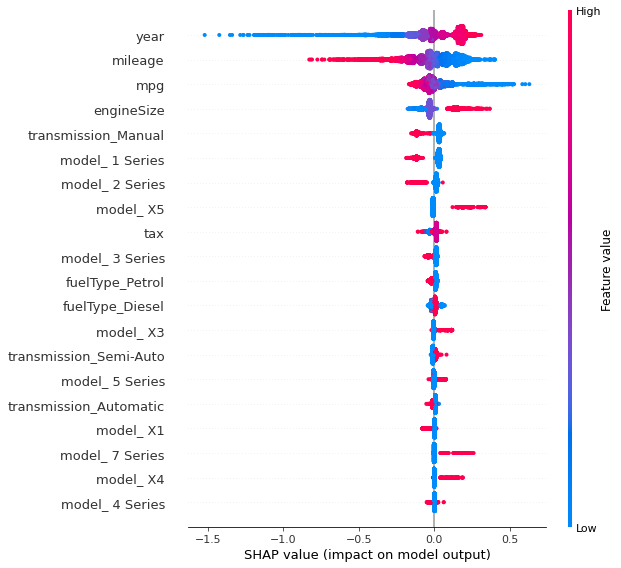

In [54]:
shap.summary_plot(shap_values, X_train)

The above diagram represents each observation (x-axis) for the feature presented (y-axis). The x location of each dot on the x-axis reflects the impact of that feature on the model's predictions, while the color of the dot represents the value of that feature for that exact observation. Dots that pile up on the line show density. 

In [66]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2,:], X_train.iloc[2,:])

In [59]:
y_train.head()

6387     9.944294
9577     9.546813
590      9.433404
4722     9.806867
3369    10.085017
Name: price, dtype: float64

In [57]:
X_train.head()

year   mileage       tax       mpg  engineSize  model_ 1 Series  \
6387  0.833333  0.058407  0.215517  0.117344     0.30303              0.0   
9577  0.791667  0.236249  0.051724  0.123146     0.30303              0.0   
590   0.791667  0.237053  0.034483  0.136256     0.30303              0.0   
4722  0.916667  0.132884  0.250000  0.123146     0.30303              0.0   
3369  0.958333  0.009290  0.250000  0.091124     0.30303              0.0   

      model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  \
6387              0.0              0.0              1.0              0.0  ...   
9577              0.0              0.0              0.0              1.0  ...   
590               0.0              1.0              0.0              0.0  ...   
4722              0.0              1.0              0.0              0.0  ...   
3369              0.0              1.0              0.0              0.0  ...   

      model_ i3  model_ i8  transmission_Automatic  transmission_Manual  \
6387        0.0        0.0                     0.0                  0.0   
9577        0.0        0.0                     1.0                  0.0   
590         0.0        0.0                     0.0                  1.0   
4722        0.0        0.0                     1.0                  0.0   
3369        0.0        0.0                     0.0                  0.0   

      transmission_Semi-Auto  fuelType_Diesel  fuelType_Electric  \
6387                     1.0              1.0                0.0   
9577                     0.0              1.0                0.0   
590                      0.0              1.0                0.0   
4722                     0.0              1.0                0.0   
3369                     1.0              0.0                0.0   

      fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
6387              0.0             0.0              0.0  
9577              0.0             0.0              0.0  
590               0.0             0.0              0.0  
4722              0.0             0.0              0.0  
3369              0.0             0.0              1.0  

[5 rows x 37 columns]

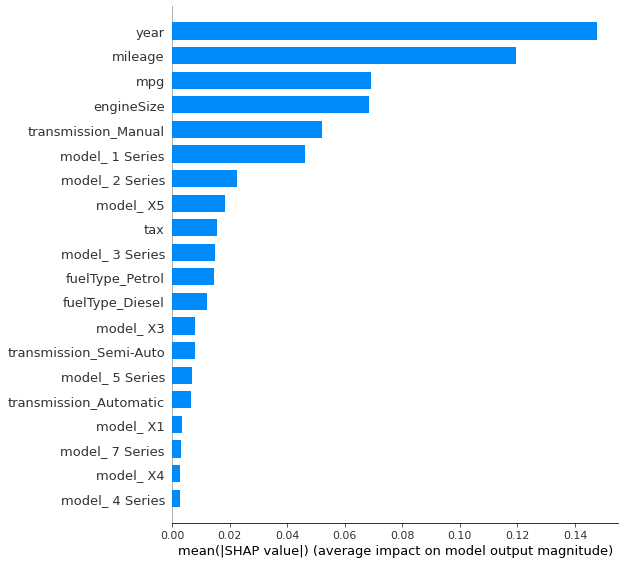

In [64]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [67]:
np.exp(9.915)

20231.579414478463